<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [22]</a>'.</span>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np
import os

In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3303585339289052001
xla_global_id: -1
]


In [3]:
# MAX_VNUM = 20000
SEQUENCE_LENGTH = 300
EMBED_DIMENSION = 100
BATCH_SIZE = 64
K_FOLD = 5

In [4]:
column_names = ["lemmatized_clean_text", "labels"]
data = pd.read_csv("../Data_Preprocessing/Preprocessed_Dataset/ISOT_Preprocessed_Data.csv", encoding='utf-8', encoding_errors='ignore')[column_names]
train, test = train_test_split(data, test_size=0.2)

In [5]:
token = keras.preprocessing.text.Tokenizer()
token.fit_on_texts(data[column_names[0]])
vocab_size = len(token.word_index) + 2

In [6]:
embedding_vector = {}
f = open('glove.6B.100d.txt',encoding='utf-8')
for line in tqdm(f):
    word, coefs = line.split(maxsplit=1)
    coefs = np.fromstring(coefs, "f", sep=" ")
    embedding_vector[word] = coefs
embedding_matrix = np.zeros((vocab_size, EMBED_DIMENSION))
for word,i in tqdm(token.word_index.items()):
    embedding_value = embedding_vector.get(word)
    if embedding_value is not None:
        embedding_matrix[i] = embedding_value

0it [00:00, ?it/s]

4850it [00:00, 48499.93it/s]

9705it [00:00, 48245.57it/s]

14530it [00:00, 48247.55it/s]

19355it [00:00, 48248.26it/s]

24180it [00:00, 47872.16it/s]

28981it [00:00, 47757.37it/s]

33770it [00:00, 47800.43it/s]

38571it [00:00, 47866.77it/s]

43430it [00:00, 47942.82it/s]

48225it [00:01, 47798.11it/s]

53005it [00:01, 47509.38it/s]

57757it [00:01, 47512.56it/s]

62538it [00:01, 47459.21it/s]

67306it [00:01, 47525.49it/s]

72136it [00:01, 47615.08it/s]

76935it [00:01, 47584.81it/s]

81743it [00:01, 47590.67it/s]

86503it [00:01, 47593.40it/s]

91263it [00:01, 47312.13it/s]

96096it [00:02, 47474.27it/s]

100844it [00:02, 47475.96it/s]

105592it [00:02, 47335.79it/s]

110376it [00:02, 47345.00it/s]

115148it [00:02, 47315.71it/s]

119880it [00:02, 47176.32it/s]

124598it [00:02, 47161.14it/s]

129315it [00:02, 47163.70it/s]

134098it [00:02, 47221.82it/s]

138870it [00:02, 47370.56it/s]

143636it [00:03, 47456.90it/s]

148439it [00:03, 47486.54it/s]

153234it [00:03, 47483.16it/s]

157998it [00:03, 47529.81it/s]

162818it [00:03, 47588.11it/s]

167610it [00:03, 47545.22it/s]

172365it [00:03, 47546.01it/s]

177120it [00:03, 46847.66it/s]

181884it [00:03, 47082.25it/s]

186706it [00:03, 47279.99it/s]

191468it [00:04, 47381.12it/s]

196208it [00:04, 47386.73it/s]

200954it [00:04, 47267.46it/s]

205713it [00:04, 47363.72it/s]

210481it [00:04, 47316.81it/s]

215213it [00:04, 47317.50it/s]

220011it [00:04, 47374.18it/s]

224749it [00:04, 47234.78it/s]

229536it [00:04, 47283.30it/s]

234278it [00:04, 47324.06it/s]

239076it [00:05, 47378.51it/s]

243861it [00:05, 47377.85it/s]

248599it [00:05, 47378.44it/s]

253337it [00:05, 47354.02it/s]

258073it [00:05, 47355.69it/s]

262811it [00:05, 47221.73it/s]

267557it [00:05, 47152.03it/s]

272273it [00:05, 47013.71it/s]

276975it [00:05, 46875.99it/s]

281663it [00:05, 46599.18it/s]

286324it [00:06, 46464.18it/s]

290971it [00:06, 46327.97it/s]

295604it [00:06, 46190.91it/s]

300237it [00:06, 46232.31it/s]

304894it [00:06, 46195.35it/s]

309521it [00:06, 46080.38it/s]

314200it [00:06, 46291.82it/s]

318933it [00:06, 46463.17it/s]

323603it [00:06, 46533.84it/s]

328398it [00:06, 46817.25it/s]

333087it [00:07, 46838.59it/s]

337824it [00:07, 46857.70it/s]

342585it [00:07, 46942.25it/s]

347280it [00:07, 46944.55it/s]

351975it [00:07, 45583.21it/s]

356678it [00:07, 45873.19it/s]

361415it [00:07, 46313.90it/s]

366132it [00:07, 46567.42it/s]

370933it [00:07, 46857.17it/s]

375677it [00:07, 47030.53it/s]

380400it [00:08, 47089.97it/s]

385208it [00:08, 47244.66it/s]

389934it [00:08, 47108.64it/s]

394649it [00:08, 47120.96it/s]

399397it [00:08, 47087.56it/s]

400000it [00:08, 47161.59it/s]

  0%|          | 0/131638 [00:00<?, ?it/s]

100%|██████████| 131638/131638 [00:00<00:00, 2437702.17it/s]

### Model

In [7]:
def model_generator():
    model = keras.models.Sequential()
    model.add(layers.Embedding(input_dim=vocab_size, output_dim=EMBED_DIMENSION, 
                        embeddings_initializer=keras.initializers.Constant(embedding_matrix), 
                        input_length=SEQUENCE_LENGTH, trainable = False))
    model.add(layers.Permute((2, 1)))
    model.add(layers.Conv1D(128, 5, activation='relu', name="Conv1D"))
    model.add(layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
    model.add(layers.Flatten())
    # model.add(layers.LSTM(32, activation=None, name="LSTM"))
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=[
        "accuracy",
        tf.keras.metrics.Precision(), tf.keras.metrics.Recall()
    ])
    return model

In [8]:
train_x = token.texts_to_sequences(train[column_names[0]])
train_x = keras.preprocessing.sequence.pad_sequences(train_x, maxlen=SEQUENCE_LENGTH, padding='post', truncating="post")
train_y = train[column_names[1]]


In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = K_FOLD)
history = {}
loss, accuracy, precision, recall, F1 = np.zeros(K_FOLD), np.zeros(K_FOLD), np.zeros(K_FOLD), np.zeros(K_FOLD), np.zeros(K_FOLD)
id = 0
epochs = 10
test_x = token.texts_to_sequences(test[column_names[0]])
test_x = keras.preprocessing.sequence.pad_sequences(test_x, maxlen=SEQUENCE_LENGTH, padding='post', truncating="post")
test_y = test[column_names[1]]
best_model = None
best_f1 = 0
best_id = 0
for train_index, val_index in kf.split(train_x, train_y):
    training_x, training_y = train_x[train_index], train_y.iloc[train_index]
    validation_x, validation_y = train_x[val_index], train_y.iloc[val_index]
    model = model_generator()
    history[id] = model.fit(x=training_x, y=training_y, validation_data=(validation_x, validation_y),
                                               epochs=epochs, batch_size=BATCH_SIZE)
    loss[id], accuracy[id], precision[id], recall[id] = model.evaluate(x=test_x, y=test_y)
    F1[id] = 2 * (precision[id] * recall[id]) / (precision[id] + recall[id])
    if F1[id] > best_f1:
        best_model = model
        best_f1 = F1[id]
        best_id = id
    id += 1
print("Best Model: Model_{}".format(best_id))

Epoch 1/10


  1/449 [..............................] - ETA: 4:31 - loss: 0.6796 - accuracy: 0.5625 - precision: 0.6216 - recall: 0.6216

  4/449 [..............................] - ETA: 10s - loss: 0.7785 - accuracy: 0.5273 - precision: 0.5323 - recall: 0.5116 

  7/449 [..............................] - ETA: 9s - loss: 0.7103 - accuracy: 0.5714 - precision: 0.5408 - recall: 0.5972 

 10/449 [..............................] - ETA: 9s - loss: 0.6519 - accuracy: 0.6266 - precision: 0.5861 - recall: 0.6554

 13/449 [..............................] - ETA: 9s - loss: 0.6186 - accuracy: 0.6490 - precision: 0.6241 - recall: 0.6368

 16/449 [>.............................] - ETA: 9s - loss: 0.5789 - accuracy: 0.6855 - precision: 0.6535 - recall: 0.6946

 19/449 [>.............................] - ETA: 9s - loss: 0.5509 - accuracy: 0.7089 - precision: 0.6785 - recall: 0.7304

 22/449 [>.............................] - ETA: 8s - loss: 0.5323 - accuracy: 0.7259 - precision: 0.7005 - recall: 0.7522

 25/449 [>.............................] - ETA: 8s - loss: 0.5118 - accuracy: 0.7394 - precision: 0.7131 - recall: 0.7729

 28/449 [>.............................] - ETA: 8s - loss: 0.4918 - accuracy: 0.7539 - precision: 0.7306 - recall: 0.7849

 31/449 [=>............................] - ETA: 8s - loss: 0.4788 - accuracy: 0.7621 - precision: 0.7385 - recall: 0.7963

 34/449 [=>............................] - ETA: 8s - loss: 0.4641 - accuracy: 0.7716 - precision: 0.7455 - recall: 0.8092

 37/449 [=>............................] - ETA: 8s - loss: 0.4577 - accuracy: 0.7770 - precision: 0.7504 - recall: 0.8116

 40/449 [=>............................] - ETA: 8s - loss: 0.4515 - accuracy: 0.7805 - precision: 0.7535 - recall: 0.8153

 43/449 [=>............................] - ETA: 8s - loss: 0.4426 - accuracy: 0.7852 - precision: 0.7565 - recall: 0.8248

 46/449 [==>...........................] - ETA: 8s - loss: 0.4369 - accuracy: 0.7918 - precision: 0.7653 - recall: 0.8295

 49/449 [==>...........................] - ETA: 8s - loss: 0.4307 - accuracy: 0.7956 - precision: 0.7677 - recall: 0.8325

 52/449 [==>...........................] - ETA: 8s - loss: 0.4230 - accuracy: 0.8002 - precision: 0.7708 - recall: 0.8380

 55/449 [==>...........................] - ETA: 8s - loss: 0.4173 - accuracy: 0.8040 - precision: 0.7754 - recall: 0.8398

 58/449 [==>...........................] - ETA: 7s - loss: 0.4081 - accuracy: 0.8093 - precision: 0.7804 - recall: 0.8461

 61/449 [===>..........................] - ETA: 7s - loss: 0.3996 - accuracy: 0.8135 - precision: 0.7820 - recall: 0.8516

 64/449 [===>..........................] - ETA: 7s - loss: 0.3939 - accuracy: 0.8181 - precision: 0.7884 - recall: 0.8525

 67/449 [===>..........................] - ETA: 7s - loss: 0.3900 - accuracy: 0.8214 - precision: 0.7906 - recall: 0.8564

 70/449 [===>..........................] - ETA: 7s - loss: 0.3834 - accuracy: 0.8248 - precision: 0.7926 - recall: 0.8607

 73/449 [===>..........................] - ETA: 7s - loss: 0.3814 - accuracy: 0.8283 - precision: 0.7984 - recall: 0.8621

 76/449 [====>.........................] - ETA: 7s - loss: 0.3753 - accuracy: 0.8320 - precision: 0.8017 - recall: 0.8663

 79/449 [====>.........................] - ETA: 7s - loss: 0.3682 - accuracy: 0.8348 - precision: 0.8040 - recall: 0.8702

 82/449 [====>.........................] - ETA: 7s - loss: 0.3631 - accuracy: 0.8369 - precision: 0.8056 - recall: 0.8713

 85/449 [====>.........................] - ETA: 7s - loss: 0.3595 - accuracy: 0.8382 - precision: 0.8078 - recall: 0.8724

 88/449 [====>.........................] - ETA: 7s - loss: 0.3568 - accuracy: 0.8395 - precision: 0.8085 - recall: 0.8761

 91/449 [=====>........................] - ETA: 7s - loss: 0.3530 - accuracy: 0.8408 - precision: 0.8095 - recall: 0.8776

 94/449 [=====>........................] - ETA: 7s - loss: 0.3489 - accuracy: 0.8431 - precision: 0.8123 - recall: 0.8768

 97/449 [=====>........................] - ETA: 7s - loss: 0.3462 - accuracy: 0.8446 - precision: 0.8144 - recall: 0.8782

100/449 [=====>........................] - ETA: 7s - loss: 0.3431 - accuracy: 0.8459 - precision: 0.8151 - recall: 0.8791

103/449 [=====>........................] - ETA: 6s - loss: 0.3415 - accuracy: 0.8475 - precision: 0.8174 - recall: 0.8800

106/449 [======>.......................] - ETA: 6s - loss: 0.3370 - accuracy: 0.8498 - precision: 0.8200 - recall: 0.8820

109/449 [======>.......................] - ETA: 6s - loss: 0.3350 - accuracy: 0.8516 - precision: 0.8227 - recall: 0.8830

112/449 [======>.......................] - ETA: 6s - loss: 0.3332 - accuracy: 0.8524 - precision: 0.8236 - recall: 0.8840

115/449 [======>.......................] - ETA: 6s - loss: 0.3318 - accuracy: 0.8538 - precision: 0.8243 - recall: 0.8860

118/449 [======>.......................] - ETA: 6s - loss: 0.3291 - accuracy: 0.8558 - precision: 0.8264 - recall: 0.8871

121/449 [=======>......................] - ETA: 6s - loss: 0.3270 - accuracy: 0.8563 - precision: 0.8280 - recall: 0.8863

124/449 [=======>......................] - ETA: 6s - loss: 0.3260 - accuracy: 0.8562 - precision: 0.8270 - recall: 0.8880

127/449 [=======>......................] - ETA: 6s - loss: 0.3235 - accuracy: 0.8580 - precision: 0.8294 - recall: 0.8882

130/449 [=======>......................] - ETA: 6s - loss: 0.3224 - accuracy: 0.8588 - precision: 0.8294 - recall: 0.8890

133/449 [=======>......................] - ETA: 6s - loss: 0.3215 - accuracy: 0.8594 - precision: 0.8305 - recall: 0.8888

136/449 [========>.....................] - ETA: 6s - loss: 0.3200 - accuracy: 0.8605 - precision: 0.8315 - recall: 0.8903

139/449 [========>.....................] - ETA: 6s - loss: 0.3185 - accuracy: 0.8618 - precision: 0.8328 - recall: 0.8921

142/449 [========>.....................] - ETA: 6s - loss: 0.3163 - accuracy: 0.8633 - precision: 0.8347 - recall: 0.8937

145/449 [========>.....................] - ETA: 6s - loss: 0.3143 - accuracy: 0.8644 - precision: 0.8359 - recall: 0.8949

148/449 [========>.....................] - ETA: 6s - loss: 0.3112 - accuracy: 0.8659 - precision: 0.8378 - recall: 0.8963

151/449 [=========>....................] - ETA: 5s - loss: 0.3092 - accuracy: 0.8670 - precision: 0.8391 - recall: 0.8968

154/449 [=========>....................] - ETA: 5s - loss: 0.3069 - accuracy: 0.8684 - precision: 0.8401 - recall: 0.8982

157/449 [=========>....................] - ETA: 5s - loss: 0.3049 - accuracy: 0.8690 - precision: 0.8412 - recall: 0.8978

160/449 [=========>....................] - ETA: 5s - loss: 0.3041 - accuracy: 0.8698 - precision: 0.8416 - recall: 0.8985

163/449 [=========>....................] - ETA: 5s - loss: 0.3019 - accuracy: 0.8708 - precision: 0.8420 - recall: 0.9004

166/449 [==========>...................] - ETA: 5s - loss: 0.2995 - accuracy: 0.8718 - precision: 0.8432 - recall: 0.9012

169/449 [==========>...................] - ETA: 5s - loss: 0.2987 - accuracy: 0.8723 - precision: 0.8437 - recall: 0.9016

172/449 [==========>...................] - ETA: 5s - loss: 0.2964 - accuracy: 0.8735 - precision: 0.8450 - recall: 0.9029

175/449 [==========>...................] - ETA: 5s - loss: 0.2940 - accuracy: 0.8746 - precision: 0.8465 - recall: 0.9037

178/449 [==========>...................] - ETA: 5s - loss: 0.2925 - accuracy: 0.8754 - precision: 0.8480 - recall: 0.9042

181/449 [===========>..................] - ETA: 5s - loss: 0.2918 - accuracy: 0.8761 - precision: 0.8490 - recall: 0.9049

184/449 [===========>..................] - ETA: 5s - loss: 0.2908 - accuracy: 0.8769 - precision: 0.8496 - recall: 0.9062

187/449 [===========>..................] - ETA: 5s - loss: 0.2903 - accuracy: 0.8774 - precision: 0.8503 - recall: 0.9065

190/449 [===========>..................] - ETA: 5s - loss: 0.2884 - accuracy: 0.8784 - precision: 0.8512 - recall: 0.9075

193/449 [===========>..................] - ETA: 5s - loss: 0.2881 - accuracy: 0.8791 - precision: 0.8523 - recall: 0.9080

196/449 [============>.................] - ETA: 5s - loss: 0.2867 - accuracy: 0.8798 - precision: 0.8528 - recall: 0.9084

199/449 [============>.................] - ETA: 5s - loss: 0.2840 - accuracy: 0.8810 - precision: 0.8544 - recall: 0.9096

202/449 [============>.................] - ETA: 5s - loss: 0.2831 - accuracy: 0.8816 - precision: 0.8554 - recall: 0.9100

205/449 [============>.................] - ETA: 4s - loss: 0.2821 - accuracy: 0.8822 - precision: 0.8558 - recall: 0.9104

208/449 [============>.................] - ETA: 4s - loss: 0.2809 - accuracy: 0.8831 - precision: 0.8574 - recall: 0.9107

211/449 [=============>................] - ETA: 4s - loss: 0.2808 - accuracy: 0.8835 - precision: 0.8576 - recall: 0.9111

214/449 [=============>................] - ETA: 4s - loss: 0.2789 - accuracy: 0.8842 - precision: 0.8581 - recall: 0.9115

217/449 [=============>................] - ETA: 4s - loss: 0.2798 - accuracy: 0.8841 - precision: 0.8585 - recall: 0.9109

220/449 [=============>................] - ETA: 4s - loss: 0.2790 - accuracy: 0.8849 - precision: 0.8593 - recall: 0.9119

223/449 [=============>................] - ETA: 4s - loss: 0.2773 - accuracy: 0.8859 - precision: 0.8606 - recall: 0.9128

226/449 [==============>...............] - ETA: 4s - loss: 0.2760 - accuracy: 0.8867 - precision: 0.8612 - recall: 0.9136

229/449 [==============>...............] - ETA: 4s - loss: 0.2752 - accuracy: 0.8871 - precision: 0.8619 - recall: 0.9138

232/449 [==============>...............] - ETA: 4s - loss: 0.2741 - accuracy: 0.8877 - precision: 0.8626 - recall: 0.9142

235/449 [==============>...............] - ETA: 4s - loss: 0.2730 - accuracy: 0.8885 - precision: 0.8635 - recall: 0.9149

237/449 [==============>...............] - ETA: 4s - loss: 0.2733 - accuracy: 0.8886 - precision: 0.8636 - recall: 0.9153

240/449 [===============>..............] - ETA: 4s - loss: 0.2725 - accuracy: 0.8890 - precision: 0.8641 - recall: 0.9154

243/449 [===============>..............] - ETA: 4s - loss: 0.2715 - accuracy: 0.8893 - precision: 0.8648 - recall: 0.9149

246/449 [===============>..............] - ETA: 4s - loss: 0.2705 - accuracy: 0.8901 - precision: 0.8653 - recall: 0.9159

249/449 [===============>..............] - ETA: 4s - loss: 0.2698 - accuracy: 0.8905 - precision: 0.8658 - recall: 0.9167

252/449 [===============>..............] - ETA: 4s - loss: 0.2695 - accuracy: 0.8909 - precision: 0.8664 - recall: 0.9169

254/449 [===============>..............] - ETA: 4s - loss: 0.2685 - accuracy: 0.8914 - precision: 0.8670 - recall: 0.9170

256/449 [================>.............] - ETA: 4s - loss: 0.2685 - accuracy: 0.8915 - precision: 0.8668 - recall: 0.9174

258/449 [================>.............] - ETA: 4s - loss: 0.2680 - accuracy: 0.8917 - precision: 0.8671 - recall: 0.9172

261/449 [================>.............] - ETA: 3s - loss: 0.2680 - accuracy: 0.8918 - precision: 0.8679 - recall: 0.9166

263/449 [================>.............] - ETA: 3s - loss: 0.2676 - accuracy: 0.8920 - precision: 0.8679 - recall: 0.9172

266/449 [================>.............] - ETA: 3s - loss: 0.2668 - accuracy: 0.8924 - precision: 0.8684 - recall: 0.9176

269/449 [================>.............] - ETA: 3s - loss: 0.2662 - accuracy: 0.8928 - precision: 0.8691 - recall: 0.9168

272/449 [=================>............] - ETA: 3s - loss: 0.2657 - accuracy: 0.8932 - precision: 0.8695 - recall: 0.9172

275/449 [=================>............] - ETA: 3s - loss: 0.2651 - accuracy: 0.8933 - precision: 0.8691 - recall: 0.9179

278/449 [=================>............] - ETA: 3s - loss: 0.2648 - accuracy: 0.8936 - precision: 0.8698 - recall: 0.9176

281/449 [=================>............] - ETA: 3s - loss: 0.2638 - accuracy: 0.8940 - precision: 0.8704 - recall: 0.9176

284/449 [=================>............] - ETA: 3s - loss: 0.2629 - accuracy: 0.8945 - precision: 0.8706 - recall: 0.9185

287/449 [==================>...........] - ETA: 3s - loss: 0.2618 - accuracy: 0.8950 - precision: 0.8713 - recall: 0.9186

290/449 [==================>...........] - ETA: 3s - loss: 0.2610 - accuracy: 0.8953 - precision: 0.8714 - recall: 0.9190

293/449 [==================>...........] - ETA: 3s - loss: 0.2604 - accuracy: 0.8955 - precision: 0.8718 - recall: 0.9190

295/449 [==================>...........] - ETA: 3s - loss: 0.2607 - accuracy: 0.8956 - precision: 0.8719 - recall: 0.9187

298/449 [==================>...........] - ETA: 3s - loss: 0.2605 - accuracy: 0.8956 - precision: 0.8722 - recall: 0.9183

301/449 [===================>..........] - ETA: 3s - loss: 0.2595 - accuracy: 0.8960 - precision: 0.8725 - recall: 0.9189

303/449 [===================>..........] - ETA: 3s - loss: 0.2594 - accuracy: 0.8960 - precision: 0.8726 - recall: 0.9188

306/449 [===================>..........] - ETA: 3s - loss: 0.2588 - accuracy: 0.8964 - precision: 0.8731 - recall: 0.9191

308/449 [===================>..........] - ETA: 3s - loss: 0.2589 - accuracy: 0.8964 - precision: 0.8730 - recall: 0.9191

311/449 [===================>..........] - ETA: 2s - loss: 0.2581 - accuracy: 0.8967 - precision: 0.8732 - recall: 0.9195

313/449 [===================>..........] - ETA: 2s - loss: 0.2577 - accuracy: 0.8970 - precision: 0.8737 - recall: 0.9195

316/449 [====================>.........] - ETA: 2s - loss: 0.2569 - accuracy: 0.8973 - precision: 0.8738 - recall: 0.9199

319/449 [====================>.........] - ETA: 2s - loss: 0.2561 - accuracy: 0.8977 - precision: 0.8743 - recall: 0.9201

322/449 [====================>.........] - ETA: 2s - loss: 0.2560 - accuracy: 0.8978 - precision: 0.8745 - recall: 0.9201

325/449 [====================>.........] - ETA: 2s - loss: 0.2548 - accuracy: 0.8983 - precision: 0.8750 - recall: 0.9205

328/449 [====================>.........] - ETA: 2s - loss: 0.2540 - accuracy: 0.8986 - precision: 0.8752 - recall: 0.9209

331/449 [=====================>........] - ETA: 2s - loss: 0.2540 - accuracy: 0.8991 - precision: 0.8759 - recall: 0.9211

334/449 [=====================>........] - ETA: 2s - loss: 0.2527 - accuracy: 0.8996 - precision: 0.8765 - recall: 0.9217

337/449 [=====================>........] - ETA: 2s - loss: 0.2522 - accuracy: 0.8998 - precision: 0.8767 - recall: 0.9218

340/449 [=====================>........] - ETA: 2s - loss: 0.2508 - accuracy: 0.9004 - precision: 0.8773 - recall: 0.9223

343/449 [=====================>........] - ETA: 2s - loss: 0.2502 - accuracy: 0.9006 - precision: 0.8778 - recall: 0.9220

346/449 [======================>.......] - ETA: 2s - loss: 0.2496 - accuracy: 0.9010 - precision: 0.8779 - recall: 0.9225

349/449 [======================>.......] - ETA: 2s - loss: 0.2488 - accuracy: 0.9013 - precision: 0.8785 - recall: 0.9226

352/449 [======================>.......] - ETA: 2s - loss: 0.2480 - accuracy: 0.9016 - precision: 0.8792 - recall: 0.9227

355/449 [======================>.......] - ETA: 2s - loss: 0.2475 - accuracy: 0.9018 - precision: 0.8794 - recall: 0.9229

358/449 [======================>.......] - ETA: 1s - loss: 0.2466 - accuracy: 0.9022 - precision: 0.8797 - recall: 0.9234

361/449 [=======================>......] - ETA: 1s - loss: 0.2461 - accuracy: 0.9024 - precision: 0.8800 - recall: 0.9233

364/449 [=======================>......] - ETA: 1s - loss: 0.2454 - accuracy: 0.9025 - precision: 0.8801 - recall: 0.9235

367/449 [=======================>......] - ETA: 1s - loss: 0.2451 - accuracy: 0.9027 - precision: 0.8805 - recall: 0.9234

370/449 [=======================>......] - ETA: 1s - loss: 0.2446 - accuracy: 0.9029 - precision: 0.8807 - recall: 0.9234

373/449 [=======================>......] - ETA: 1s - loss: 0.2437 - accuracy: 0.9033 - precision: 0.8810 - recall: 0.9237

376/449 [========================>.....] - ETA: 1s - loss: 0.2429 - accuracy: 0.9036 - precision: 0.8813 - recall: 0.9240

379/449 [========================>.....] - ETA: 1s - loss: 0.2423 - accuracy: 0.9039 - precision: 0.8819 - recall: 0.9238

382/449 [========================>.....] - ETA: 1s - loss: 0.2422 - accuracy: 0.9040 - precision: 0.8822 - recall: 0.9239

385/449 [========================>.....] - ETA: 1s - loss: 0.2417 - accuracy: 0.9043 - precision: 0.8821 - recall: 0.9244

388/449 [========================>.....] - ETA: 1s - loss: 0.2414 - accuracy: 0.9043 - precision: 0.8827 - recall: 0.9238

391/449 [=========================>....] - ETA: 1s - loss: 0.2409 - accuracy: 0.9047 - precision: 0.8832 - recall: 0.9242

394/449 [=========================>....] - ETA: 1s - loss: 0.2405 - accuracy: 0.9049 - precision: 0.8831 - recall: 0.9248

397/449 [=========================>....] - ETA: 1s - loss: 0.2406 - accuracy: 0.9050 - precision: 0.8834 - recall: 0.9248

400/449 [=========================>....] - ETA: 1s - loss: 0.2403 - accuracy: 0.9052 - precision: 0.8841 - recall: 0.9245

403/449 [=========================>....] - ETA: 1s - loss: 0.2395 - accuracy: 0.9055 - precision: 0.8842 - recall: 0.9250

406/449 [==========================>...] - ETA: 0s - loss: 0.2386 - accuracy: 0.9058 - precision: 0.8845 - recall: 0.9253

409/449 [==========================>...] - ETA: 0s - loss: 0.2387 - accuracy: 0.9059 - precision: 0.8846 - recall: 0.9252

412/449 [==========================>...] - ETA: 0s - loss: 0.2384 - accuracy: 0.9061 - precision: 0.8847 - recall: 0.9255

415/449 [==========================>...] - ETA: 0s - loss: 0.2382 - accuracy: 0.9063 - precision: 0.8850 - recall: 0.9253

418/449 [==========================>...] - ETA: 0s - loss: 0.2384 - accuracy: 0.9064 - precision: 0.8850 - recall: 0.9255

421/449 [===========================>..] - ETA: 0s - loss: 0.2378 - accuracy: 0.9067 - precision: 0.8851 - recall: 0.9258

424/449 [===========================>..] - ETA: 0s - loss: 0.2371 - accuracy: 0.9070 - precision: 0.8858 - recall: 0.9257

427/449 [===========================>..] - ETA: 0s - loss: 0.2361 - accuracy: 0.9076 - precision: 0.8864 - recall: 0.9262

430/449 [===========================>..] - ETA: 0s - loss: 0.2356 - accuracy: 0.9076 - precision: 0.8861 - recall: 0.9265

433/449 [===========================>..] - ETA: 0s - loss: 0.2349 - accuracy: 0.9079 - precision: 0.8864 - recall: 0.9267

436/449 [============================>.] - ETA: 0s - loss: 0.2345 - accuracy: 0.9082 - precision: 0.8869 - recall: 0.9266

439/449 [============================>.] - ETA: 0s - loss: 0.2342 - accuracy: 0.9083 - precision: 0.8870 - recall: 0.9268

442/449 [============================>.] - ETA: 0s - loss: 0.2339 - accuracy: 0.9084 - precision: 0.8869 - recall: 0.9271

445/449 [============================>.] - ETA: 0s - loss: 0.2337 - accuracy: 0.9086 - precision: 0.8876 - recall: 0.9268

448/449 [============================>.] - ETA: 0s - loss: 0.2330 - accuracy: 0.9090 - precision: 0.8879 - recall: 0.9272

449/449 [==============================] - 11s 24ms/step - loss: 0.2330 - accuracy: 0.9090 - precision: 0.8879 - recall: 0.9273 - val_loss: 0.1647 - val_accuracy: 0.9381 - val_precision: 0.8970 - val_recall: 0.9824


Epoch 2/10


  1/449 [..............................] - ETA: 8s - loss: 0.0777 - accuracy: 0.9688 - precision: 0.9722 - recall: 0.9722

  4/449 [..............................] - ETA: 9s - loss: 0.1006 - accuracy: 0.9688 - precision: 0.9549 - recall: 0.9845

  7/449 [..............................] - ETA: 9s - loss: 0.1158 - accuracy: 0.9621 - precision: 0.9478 - recall: 0.9776

 10/449 [..............................] - ETA: 8s - loss: 0.1107 - accuracy: 0.9656 - precision: 0.9564 - recall: 0.9746

 13/449 [..............................] - ETA: 8s - loss: 0.1083 - accuracy: 0.9639 - precision: 0.9523 - recall: 0.9718

 16/449 [>.............................] - ETA: 8s - loss: 0.1045 - accuracy: 0.9668 - precision: 0.9528 - recall: 0.9768

 19/449 [>.............................] - ETA: 8s - loss: 0.1019 - accuracy: 0.9679 - precision: 0.9571 - recall: 0.9755

 22/449 [>.............................] - ETA: 8s - loss: 0.1077 - accuracy: 0.9659 - precision: 0.9583 - recall: 0.9698

 25/449 [>.............................] - ETA: 8s - loss: 0.1186 - accuracy: 0.9619 - precision: 0.9478 - recall: 0.9719

 28/449 [>.............................] - ETA: 8s - loss: 0.1189 - accuracy: 0.9609 - precision: 0.9505 - recall: 0.9665

 31/449 [=>............................] - ETA: 8s - loss: 0.1172 - accuracy: 0.9607 - precision: 0.9507 - recall: 0.9652

 34/449 [=>............................] - ETA: 8s - loss: 0.1156 - accuracy: 0.9596 - precision: 0.9487 - recall: 0.9656

 37/449 [=>............................] - ETA: 8s - loss: 0.1176 - accuracy: 0.9595 - precision: 0.9494 - recall: 0.9663

 40/449 [=>............................] - ETA: 8s - loss: 0.1142 - accuracy: 0.9613 - precision: 0.9520 - recall: 0.9682

 43/449 [=>............................] - ETA: 8s - loss: 0.1125 - accuracy: 0.9618 - precision: 0.9529 - recall: 0.9681

 46/449 [==>...........................] - ETA: 8s - loss: 0.1135 - accuracy: 0.9613 - precision: 0.9538 - recall: 0.9660

 49/449 [==>...........................] - ETA: 8s - loss: 0.1145 - accuracy: 0.9611 - precision: 0.9532 - recall: 0.9660

 52/449 [==>...........................] - ETA: 8s - loss: 0.1140 - accuracy: 0.9621 - precision: 0.9539 - recall: 0.9672

 55/449 [==>...........................] - ETA: 8s - loss: 0.1149 - accuracy: 0.9616 - precision: 0.9547 - recall: 0.9645

 58/449 [==>...........................] - ETA: 8s - loss: 0.1142 - accuracy: 0.9620 - precision: 0.9561 - recall: 0.9642

 61/449 [===>..........................] - ETA: 8s - loss: 0.1155 - accuracy: 0.9618 - precision: 0.9541 - recall: 0.9659

 64/449 [===>..........................] - ETA: 7s - loss: 0.1129 - accuracy: 0.9629 - precision: 0.9555 - recall: 0.9664

 67/449 [===>..........................] - ETA: 7s - loss: 0.1146 - accuracy: 0.9625 - precision: 0.9568 - recall: 0.9639

 70/449 [===>..........................] - ETA: 7s - loss: 0.1129 - accuracy: 0.9632 - precision: 0.9579 - recall: 0.9647

 73/449 [===>..........................] - ETA: 7s - loss: 0.1115 - accuracy: 0.9638 - precision: 0.9579 - recall: 0.9661

 76/449 [====>.........................] - ETA: 7s - loss: 0.1103 - accuracy: 0.9642 - precision: 0.9581 - recall: 0.9664

 79/449 [====>.........................] - ETA: 7s - loss: 0.1105 - accuracy: 0.9640 - precision: 0.9597 - recall: 0.9645

 82/449 [====>.........................] - ETA: 7s - loss: 0.1096 - accuracy: 0.9644 - precision: 0.9596 - recall: 0.9654

 85/449 [====>.........................] - ETA: 7s - loss: 0.1086 - accuracy: 0.9647 - precision: 0.9593 - recall: 0.9667

 88/449 [====>.........................] - ETA: 7s - loss: 0.1080 - accuracy: 0.9648 - precision: 0.9600 - recall: 0.9664

 91/449 [=====>........................] - ETA: 7s - loss: 0.1077 - accuracy: 0.9643 - precision: 0.9600 - recall: 0.9649

 94/449 [=====>........................] - ETA: 7s - loss: 0.1085 - accuracy: 0.9641 - precision: 0.9591 - recall: 0.9652

 97/449 [=====>........................] - ETA: 7s - loss: 0.1091 - accuracy: 0.9641 - precision: 0.9593 - recall: 0.9648

100/449 [=====>........................] - ETA: 7s - loss: 0.1107 - accuracy: 0.9639 - precision: 0.9592 - recall: 0.9646

103/449 [=====>........................] - ETA: 7s - loss: 0.1109 - accuracy: 0.9637 - precision: 0.9583 - recall: 0.9654

106/449 [======>.......................] - ETA: 7s - loss: 0.1108 - accuracy: 0.9637 - precision: 0.9586 - recall: 0.9651

109/449 [======>.......................] - ETA: 7s - loss: 0.1119 - accuracy: 0.9634 - precision: 0.9580 - recall: 0.9652

112/449 [======>.......................] - ETA: 6s - loss: 0.1117 - accuracy: 0.9634 - precision: 0.9582 - recall: 0.9650

115/449 [======>.......................] - ETA: 6s - loss: 0.1116 - accuracy: 0.9635 - precision: 0.9582 - recall: 0.9650

118/449 [======>.......................] - ETA: 6s - loss: 0.1116 - accuracy: 0.9635 - precision: 0.9582 - recall: 0.9651

121/449 [=======>......................] - ETA: 6s - loss: 0.1102 - accuracy: 0.9641 - precision: 0.9589 - recall: 0.9657

124/449 [=======>......................] - ETA: 6s - loss: 0.1107 - accuracy: 0.9642 - precision: 0.9590 - recall: 0.9661

127/449 [=======>......................] - ETA: 6s - loss: 0.1104 - accuracy: 0.9643 - precision: 0.9587 - recall: 0.9666

130/449 [=======>......................] - ETA: 6s - loss: 0.1100 - accuracy: 0.9643 - precision: 0.9583 - recall: 0.9672

133/449 [=======>......................] - ETA: 6s - loss: 0.1108 - accuracy: 0.9639 - precision: 0.9581 - recall: 0.9668

136/449 [========>.....................] - ETA: 6s - loss: 0.1098 - accuracy: 0.9638 - precision: 0.9578 - recall: 0.9668

139/449 [========>.....................] - ETA: 6s - loss: 0.1109 - accuracy: 0.9634 - precision: 0.9574 - recall: 0.9664

142/449 [========>.....................] - ETA: 6s - loss: 0.1101 - accuracy: 0.9638 - precision: 0.9581 - recall: 0.9667

145/449 [========>.....................] - ETA: 6s - loss: 0.1095 - accuracy: 0.9639 - precision: 0.9577 - recall: 0.9674

148/449 [========>.....................] - ETA: 6s - loss: 0.1097 - accuracy: 0.9640 - precision: 0.9581 - recall: 0.9672

151/449 [=========>....................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9642 - precision: 0.9582 - recall: 0.9677

154/449 [=========>....................] - ETA: 6s - loss: 0.1100 - accuracy: 0.9641 - precision: 0.9581 - recall: 0.9678

157/449 [=========>....................] - ETA: 5s - loss: 0.1090 - accuracy: 0.9646 - precision: 0.9588 - recall: 0.9682

160/449 [=========>....................] - ETA: 5s - loss: 0.1082 - accuracy: 0.9646 - precision: 0.9586 - recall: 0.9687

163/449 [=========>....................] - ETA: 5s - loss: 0.1075 - accuracy: 0.9649 - precision: 0.9586 - recall: 0.9692

166/449 [==========>...................] - ETA: 5s - loss: 0.1071 - accuracy: 0.9650 - precision: 0.9587 - recall: 0.9691

169/449 [==========>...................] - ETA: 5s - loss: 0.1073 - accuracy: 0.9652 - precision: 0.9592 - recall: 0.9691

172/449 [==========>...................] - ETA: 5s - loss: 0.1067 - accuracy: 0.9653 - precision: 0.9589 - recall: 0.9697

175/449 [==========>...................] - ETA: 5s - loss: 0.1061 - accuracy: 0.9655 - precision: 0.9592 - recall: 0.9701

178/449 [==========>...................] - ETA: 5s - loss: 0.1054 - accuracy: 0.9658 - precision: 0.9597 - recall: 0.9701

181/449 [===========>..................] - ETA: 5s - loss: 0.1057 - accuracy: 0.9656 - precision: 0.9601 - recall: 0.9693

184/449 [===========>..................] - ETA: 5s - loss: 0.1056 - accuracy: 0.9657 - precision: 0.9599 - recall: 0.9697

187/449 [===========>..................] - ETA: 5s - loss: 0.1049 - accuracy: 0.9660 - precision: 0.9603 - recall: 0.9700

190/449 [===========>..................] - ETA: 5s - loss: 0.1042 - accuracy: 0.9663 - precision: 0.9605 - recall: 0.9703

193/449 [===========>..................] - ETA: 5s - loss: 0.1042 - accuracy: 0.9661 - precision: 0.9604 - recall: 0.9699

196/449 [============>.................] - ETA: 5s - loss: 0.1048 - accuracy: 0.9659 - precision: 0.9608 - recall: 0.9690

199/449 [============>.................] - ETA: 5s - loss: 0.1071 - accuracy: 0.9652 - precision: 0.9593 - recall: 0.9691

202/449 [============>.................] - ETA: 5s - loss: 0.1079 - accuracy: 0.9651 - precision: 0.9594 - recall: 0.9688

205/449 [============>.................] - ETA: 4s - loss: 0.1085 - accuracy: 0.9652 - precision: 0.9595 - recall: 0.9687

208/449 [============>.................] - ETA: 4s - loss: 0.1078 - accuracy: 0.9656 - precision: 0.9599 - recall: 0.9692

211/449 [=============>................] - ETA: 4s - loss: 0.1077 - accuracy: 0.9653 - precision: 0.9594 - recall: 0.9691

214/449 [=============>................] - ETA: 4s - loss: 0.1077 - accuracy: 0.9655 - precision: 0.9596 - recall: 0.9692

217/449 [=============>................] - ETA: 4s - loss: 0.1069 - accuracy: 0.9659 - precision: 0.9600 - recall: 0.9696

220/449 [=============>................] - ETA: 4s - loss: 0.1065 - accuracy: 0.9660 - precision: 0.9599 - recall: 0.9697

223/449 [=============>................] - ETA: 4s - loss: 0.1066 - accuracy: 0.9659 - precision: 0.9597 - recall: 0.9698

226/449 [==============>...............] - ETA: 4s - loss: 0.1070 - accuracy: 0.9658 - precision: 0.9595 - recall: 0.9698

229/449 [==============>...............] - ETA: 4s - loss: 0.1073 - accuracy: 0.9657 - precision: 0.9593 - recall: 0.9698

232/449 [==============>...............] - ETA: 4s - loss: 0.1076 - accuracy: 0.9655 - precision: 0.9593 - recall: 0.9695

235/449 [==============>...............] - ETA: 4s - loss: 0.1071 - accuracy: 0.9656 - precision: 0.9594 - recall: 0.9695

238/449 [==============>...............] - ETA: 4s - loss: 0.1067 - accuracy: 0.9656 - precision: 0.9592 - recall: 0.9697

241/449 [===============>..............] - ETA: 4s - loss: 0.1060 - accuracy: 0.9660 - precision: 0.9595 - recall: 0.9700

244/449 [===============>..............] - ETA: 4s - loss: 0.1057 - accuracy: 0.9661 - precision: 0.9595 - recall: 0.9704

247/449 [===============>..............] - ETA: 4s - loss: 0.1052 - accuracy: 0.9663 - precision: 0.9598 - recall: 0.9703

250/449 [===============>..............] - ETA: 4s - loss: 0.1050 - accuracy: 0.9663 - precision: 0.9597 - recall: 0.9705

253/449 [===============>..............] - ETA: 3s - loss: 0.1052 - accuracy: 0.9661 - precision: 0.9595 - recall: 0.9704

256/449 [================>.............] - ETA: 3s - loss: 0.1053 - accuracy: 0.9661 - precision: 0.9592 - recall: 0.9706

259/449 [================>.............] - ETA: 3s - loss: 0.1049 - accuracy: 0.9662 - precision: 0.9595 - recall: 0.9706

262/449 [================>.............] - ETA: 3s - loss: 0.1044 - accuracy: 0.9665 - precision: 0.9598 - recall: 0.9710

265/449 [================>.............] - ETA: 3s - loss: 0.1040 - accuracy: 0.9666 - precision: 0.9600 - recall: 0.9709

268/449 [================>.............] - ETA: 3s - loss: 0.1038 - accuracy: 0.9667 - precision: 0.9598 - recall: 0.9711

271/449 [=================>............] - ETA: 3s - loss: 0.1031 - accuracy: 0.9669 - precision: 0.9601 - recall: 0.9712

274/449 [=================>............] - ETA: 3s - loss: 0.1025 - accuracy: 0.9672 - precision: 0.9604 - recall: 0.9714

277/449 [=================>............] - ETA: 3s - loss: 0.1023 - accuracy: 0.9671 - precision: 0.9605 - recall: 0.9713

280/449 [=================>............] - ETA: 3s - loss: 0.1022 - accuracy: 0.9671 - precision: 0.9605 - recall: 0.9713

283/449 [=================>............] - ETA: 3s - loss: 0.1028 - accuracy: 0.9670 - precision: 0.9606 - recall: 0.9710

286/449 [==================>...........] - ETA: 3s - loss: 0.1029 - accuracy: 0.9668 - precision: 0.9603 - recall: 0.9711

289/449 [==================>...........] - ETA: 3s - loss: 0.1025 - accuracy: 0.9670 - precision: 0.9606 - recall: 0.9711

292/449 [==================>...........] - ETA: 3s - loss: 0.1024 - accuracy: 0.9671 - precision: 0.9608 - recall: 0.9710

295/449 [==================>...........] - ETA: 3s - loss: 0.1020 - accuracy: 0.9672 - precision: 0.9610 - recall: 0.9711

298/449 [==================>...........] - ETA: 3s - loss: 0.1019 - accuracy: 0.9673 - precision: 0.9610 - recall: 0.9713

301/449 [===================>..........] - ETA: 2s - loss: 0.1020 - accuracy: 0.9673 - precision: 0.9611 - recall: 0.9711

304/449 [===================>..........] - ETA: 2s - loss: 0.1015 - accuracy: 0.9675 - precision: 0.9612 - recall: 0.9712

307/449 [===================>..........] - ETA: 2s - loss: 0.1014 - accuracy: 0.9674 - precision: 0.9610 - recall: 0.9714

310/449 [===================>..........] - ETA: 2s - loss: 0.1014 - accuracy: 0.9674 - precision: 0.9609 - recall: 0.9714

313/449 [===================>..........] - ETA: 2s - loss: 0.1012 - accuracy: 0.9675 - precision: 0.9611 - recall: 0.9713

316/449 [====================>.........] - ETA: 2s - loss: 0.1010 - accuracy: 0.9676 - precision: 0.9611 - recall: 0.9714

319/449 [====================>.........] - ETA: 2s - loss: 0.1013 - accuracy: 0.9675 - precision: 0.9608 - recall: 0.9716

322/449 [====================>.........] - ETA: 2s - loss: 0.1010 - accuracy: 0.9676 - precision: 0.9608 - recall: 0.9717

325/449 [====================>.........] - ETA: 2s - loss: 0.1009 - accuracy: 0.9676 - precision: 0.9610 - recall: 0.9717

328/449 [====================>.........] - ETA: 2s - loss: 0.1007 - accuracy: 0.9677 - precision: 0.9613 - recall: 0.9716

331/449 [=====================>........] - ETA: 2s - loss: 0.1008 - accuracy: 0.9676 - precision: 0.9607 - recall: 0.9718

334/449 [=====================>........] - ETA: 2s - loss: 0.1006 - accuracy: 0.9676 - precision: 0.9609 - recall: 0.9718

337/449 [=====================>........] - ETA: 2s - loss: 0.1011 - accuracy: 0.9675 - precision: 0.9610 - recall: 0.9714

340/449 [=====================>........] - ETA: 2s - loss: 0.1007 - accuracy: 0.9676 - precision: 0.9612 - recall: 0.9715

343/449 [=====================>........] - ETA: 2s - loss: 0.1012 - accuracy: 0.9676 - precision: 0.9610 - recall: 0.9716

346/449 [======================>.......] - ETA: 2s - loss: 0.1011 - accuracy: 0.9676 - precision: 0.9610 - recall: 0.9715

349/449 [======================>.......] - ETA: 2s - loss: 0.1008 - accuracy: 0.9677 - precision: 0.9611 - recall: 0.9717

352/449 [======================>.......] - ETA: 1s - loss: 0.1003 - accuracy: 0.9678 - precision: 0.9613 - recall: 0.9717

355/449 [======================>.......] - ETA: 1s - loss: 0.1006 - accuracy: 0.9677 - precision: 0.9611 - recall: 0.9717

358/449 [======================>.......] - ETA: 1s - loss: 0.1004 - accuracy: 0.9678 - precision: 0.9614 - recall: 0.9718

361/449 [=======================>......] - ETA: 1s - loss: 0.1003 - accuracy: 0.9678 - precision: 0.9614 - recall: 0.9719

364/449 [=======================>......] - ETA: 1s - loss: 0.1002 - accuracy: 0.9679 - precision: 0.9615 - recall: 0.9720

367/449 [=======================>......] - ETA: 1s - loss: 0.1005 - accuracy: 0.9679 - precision: 0.9614 - recall: 0.9720

370/449 [=======================>......] - ETA: 1s - loss: 0.1008 - accuracy: 0.9679 - precision: 0.9615 - recall: 0.9720

373/449 [=======================>......] - ETA: 1s - loss: 0.1008 - accuracy: 0.9680 - precision: 0.9617 - recall: 0.9719

376/449 [========================>.....] - ETA: 1s - loss: 0.1008 - accuracy: 0.9679 - precision: 0.9615 - recall: 0.9719

379/449 [========================>.....] - ETA: 1s - loss: 0.1007 - accuracy: 0.9678 - precision: 0.9615 - recall: 0.9719

382/449 [========================>.....] - ETA: 1s - loss: 0.1006 - accuracy: 0.9679 - precision: 0.9615 - recall: 0.9720

385/449 [========================>.....] - ETA: 1s - loss: 0.1008 - accuracy: 0.9679 - precision: 0.9614 - recall: 0.9721

388/449 [========================>.....] - ETA: 1s - loss: 0.1004 - accuracy: 0.9680 - precision: 0.9616 - recall: 0.9721

391/449 [=========================>....] - ETA: 1s - loss: 0.1002 - accuracy: 0.9680 - precision: 0.9617 - recall: 0.9720

394/449 [=========================>....] - ETA: 1s - loss: 0.1002 - accuracy: 0.9681 - precision: 0.9619 - recall: 0.9720

397/449 [=========================>....] - ETA: 1s - loss: 0.1005 - accuracy: 0.9680 - precision: 0.9618 - recall: 0.9720

400/449 [=========================>....] - ETA: 0s - loss: 0.1004 - accuracy: 0.9680 - precision: 0.9618 - recall: 0.9720

403/449 [=========================>....] - ETA: 0s - loss: 0.1005 - accuracy: 0.9679 - precision: 0.9617 - recall: 0.9719

406/449 [==========================>...] - ETA: 0s - loss: 0.1004 - accuracy: 0.9680 - precision: 0.9618 - recall: 0.9718

409/449 [==========================>...] - ETA: 0s - loss: 0.1004 - accuracy: 0.9680 - precision: 0.9618 - recall: 0.9720

412/449 [==========================>...] - ETA: 0s - loss: 0.1002 - accuracy: 0.9681 - precision: 0.9619 - recall: 0.9720

415/449 [==========================>...] - ETA: 0s - loss: 0.1001 - accuracy: 0.9681 - precision: 0.9619 - recall: 0.9720

418/449 [==========================>...] - ETA: 0s - loss: 0.1007 - accuracy: 0.9681 - precision: 0.9620 - recall: 0.9719

421/449 [===========================>..] - ETA: 0s - loss: 0.1009 - accuracy: 0.9680 - precision: 0.9619 - recall: 0.9718

424/449 [===========================>..] - ETA: 0s - loss: 0.1012 - accuracy: 0.9680 - precision: 0.9619 - recall: 0.9718

427/449 [===========================>..] - ETA: 0s - loss: 0.1008 - accuracy: 0.9681 - precision: 0.9621 - recall: 0.9718

430/449 [===========================>..] - ETA: 0s - loss: 0.1011 - accuracy: 0.9681 - precision: 0.9620 - recall: 0.9717

433/449 [===========================>..] - ETA: 0s - loss: 0.1011 - accuracy: 0.9680 - precision: 0.9620 - recall: 0.9717

436/449 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.9681 - precision: 0.9620 - recall: 0.9718

439/449 [============================>.] - ETA: 0s - loss: 0.1010 - accuracy: 0.9681 - precision: 0.9622 - recall: 0.9717

442/449 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.9681 - precision: 0.9621 - recall: 0.9718

445/449 [============================>.] - ETA: 0s - loss: 0.1008 - accuracy: 0.9681 - precision: 0.9621 - recall: 0.9717

448/449 [============================>.] - ETA: 0s - loss: 0.1006 - accuracy: 0.9681 - precision: 0.9620 - recall: 0.9718

449/449 [==============================] - 10s 22ms/step - loss: 0.1006 - accuracy: 0.9681 - precision: 0.9620 - recall: 0.9718 - val_loss: 0.1004 - val_accuracy: 0.9678 - val_precision: 0.9636 - val_recall: 0.9690


Epoch 3/10


  1/449 [..............................] - ETA: 8s - loss: 0.0212 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0389 - accuracy: 0.9883 - precision: 0.9856 - recall: 0.9928

  7/449 [..............................] - ETA: 8s - loss: 0.0389 - accuracy: 0.9888 - precision: 0.9866 - recall: 0.9910

 10/449 [..............................] - ETA: 8s - loss: 0.0502 - accuracy: 0.9859 - precision: 0.9836 - recall: 0.9868

 13/449 [..............................] - ETA: 8s - loss: 0.0477 - accuracy: 0.9868 - precision: 0.9853 - recall: 0.9877

 16/449 [>.............................] - ETA: 8s - loss: 0.0452 - accuracy: 0.9863 - precision: 0.9859 - recall: 0.9859

 19/449 [>.............................] - ETA: 8s - loss: 0.0487 - accuracy: 0.9844 - precision: 0.9815 - recall: 0.9865

 22/449 [>.............................] - ETA: 8s - loss: 0.0443 - accuracy: 0.9865 - precision: 0.9840 - recall: 0.9883

 25/449 [>.............................] - ETA: 8s - loss: 0.0414 - accuracy: 0.9881 - precision: 0.9861 - recall: 0.9899

 28/449 [>.............................] - ETA: 8s - loss: 0.0395 - accuracy: 0.9894 - precision: 0.9875 - recall: 0.9909

 31/449 [=>............................] - ETA: 8s - loss: 0.0402 - accuracy: 0.9894 - precision: 0.9865 - recall: 0.9917

 34/449 [=>............................] - ETA: 8s - loss: 0.0408 - accuracy: 0.9885 - precision: 0.9876 - recall: 0.9886

 37/449 [=>............................] - ETA: 8s - loss: 0.0404 - accuracy: 0.9882 - precision: 0.9877 - recall: 0.9877

 40/449 [=>............................] - ETA: 8s - loss: 0.0403 - accuracy: 0.9883 - precision: 0.9878 - recall: 0.9878

 43/449 [=>............................] - ETA: 8s - loss: 0.0398 - accuracy: 0.9884 - precision: 0.9879 - recall: 0.9879

 46/449 [==>...........................] - ETA: 8s - loss: 0.0392 - accuracy: 0.9888 - precision: 0.9886 - recall: 0.9879

 49/449 [==>...........................] - ETA: 7s - loss: 0.0392 - accuracy: 0.9888 - precision: 0.9893 - recall: 0.9873

 52/449 [==>...........................] - ETA: 7s - loss: 0.0398 - accuracy: 0.9889 - precision: 0.9893 - recall: 0.9875

 55/449 [==>...........................] - ETA: 7s - loss: 0.0413 - accuracy: 0.9884 - precision: 0.9882 - recall: 0.9876

 58/449 [==>...........................] - ETA: 7s - loss: 0.0410 - accuracy: 0.9887 - precision: 0.9888 - recall: 0.9877

 61/449 [===>..........................] - ETA: 7s - loss: 0.0410 - accuracy: 0.9887 - precision: 0.9889 - recall: 0.9879

 64/449 [===>..........................] - ETA: 7s - loss: 0.0406 - accuracy: 0.9888 - precision: 0.9889 - recall: 0.9879

 67/449 [===>..........................] - ETA: 7s - loss: 0.0399 - accuracy: 0.9890 - precision: 0.9889 - recall: 0.9884

 70/449 [===>..........................] - ETA: 7s - loss: 0.0397 - accuracy: 0.9888 - precision: 0.9884 - recall: 0.9884

 73/449 [===>..........................] - ETA: 7s - loss: 0.0400 - accuracy: 0.9884 - precision: 0.9889 - recall: 0.9872

 76/449 [====>.........................] - ETA: 7s - loss: 0.0405 - accuracy: 0.9887 - precision: 0.9889 - recall: 0.9877

 79/449 [====>.........................] - ETA: 7s - loss: 0.0398 - accuracy: 0.9891 - precision: 0.9893 - recall: 0.9881

 82/449 [====>.........................] - ETA: 7s - loss: 0.0402 - accuracy: 0.9888 - precision: 0.9889 - recall: 0.9877

 85/449 [====>.........................] - ETA: 7s - loss: 0.0396 - accuracy: 0.9892 - precision: 0.9893 - recall: 0.9882

 88/449 [====>.........................] - ETA: 7s - loss: 0.0390 - accuracy: 0.9893 - precision: 0.9893 - recall: 0.9885

 91/449 [=====>........................] - ETA: 7s - loss: 0.0409 - accuracy: 0.9888 - precision: 0.9885 - recall: 0.9882

 94/449 [=====>........................] - ETA: 7s - loss: 0.0419 - accuracy: 0.9884 - precision: 0.9878 - recall: 0.9878

 97/449 [=====>........................] - ETA: 7s - loss: 0.0413 - accuracy: 0.9887 - precision: 0.9882 - recall: 0.9882

100/449 [=====>........................] - ETA: 6s - loss: 0.0413 - accuracy: 0.9886 - precision: 0.9882 - recall: 0.9879

103/449 [=====>........................] - ETA: 6s - loss: 0.0411 - accuracy: 0.9886 - precision: 0.9883 - recall: 0.9879

106/449 [======>.......................] - ETA: 6s - loss: 0.0408 - accuracy: 0.9885 - precision: 0.9877 - recall: 0.9883

109/449 [======>.......................] - ETA: 6s - loss: 0.0404 - accuracy: 0.9888 - precision: 0.9880 - recall: 0.9886

112/449 [======>.......................] - ETA: 6s - loss: 0.0423 - accuracy: 0.9884 - precision: 0.9877 - recall: 0.9880

115/449 [======>.......................] - ETA: 6s - loss: 0.0429 - accuracy: 0.9885 - precision: 0.9875 - recall: 0.9883

118/449 [======>.......................] - ETA: 6s - loss: 0.0441 - accuracy: 0.9882 - precision: 0.9867 - recall: 0.9886

121/449 [=======>......................] - ETA: 6s - loss: 0.0445 - accuracy: 0.9877 - precision: 0.9868 - recall: 0.9876

124/449 [=======>......................] - ETA: 6s - loss: 0.0445 - accuracy: 0.9877 - precision: 0.9868 - recall: 0.9874

127/449 [=======>......................] - ETA: 6s - loss: 0.0450 - accuracy: 0.9873 - precision: 0.9862 - recall: 0.9874

130/449 [=======>......................] - ETA: 6s - loss: 0.0452 - accuracy: 0.9871 - precision: 0.9855 - recall: 0.9877

133/449 [=======>......................] - ETA: 6s - loss: 0.0458 - accuracy: 0.9868 - precision: 0.9856 - recall: 0.9870

136/449 [========>.....................] - ETA: 6s - loss: 0.0461 - accuracy: 0.9866 - precision: 0.9856 - recall: 0.9863

139/449 [========>.....................] - ETA: 6s - loss: 0.0460 - accuracy: 0.9864 - precision: 0.9853 - recall: 0.9864

142/449 [========>.....................] - ETA: 6s - loss: 0.0457 - accuracy: 0.9866 - precision: 0.9854 - recall: 0.9867

145/449 [========>.....................] - ETA: 6s - loss: 0.0460 - accuracy: 0.9865 - precision: 0.9852 - recall: 0.9867

148/449 [========>.....................] - ETA: 6s - loss: 0.0461 - accuracy: 0.9864 - precision: 0.9855 - recall: 0.9861

151/449 [=========>....................] - ETA: 5s - loss: 0.0461 - accuracy: 0.9862 - precision: 0.9853 - recall: 0.9860

154/449 [=========>....................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9861 - precision: 0.9848 - recall: 0.9862

157/449 [=========>....................] - ETA: 5s - loss: 0.0464 - accuracy: 0.9859 - precision: 0.9849 - recall: 0.9857

160/449 [=========>....................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9858 - precision: 0.9847 - recall: 0.9857

163/449 [=========>....................] - ETA: 5s - loss: 0.0467 - accuracy: 0.9857 - precision: 0.9848 - recall: 0.9854

166/449 [==========>...................] - ETA: 5s - loss: 0.0476 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9857

169/449 [==========>...................] - ETA: 5s - loss: 0.0475 - accuracy: 0.9855 - precision: 0.9840 - recall: 0.9857

172/449 [==========>...................] - ETA: 5s - loss: 0.0479 - accuracy: 0.9854 - precision: 0.9841 - recall: 0.9854

175/449 [==========>...................] - ETA: 5s - loss: 0.0480 - accuracy: 0.9853 - precision: 0.9840 - recall: 0.9853

178/449 [==========>...................] - ETA: 5s - loss: 0.0479 - accuracy: 0.9853 - precision: 0.9839 - recall: 0.9854

181/449 [===========>..................] - ETA: 5s - loss: 0.0479 - accuracy: 0.9853 - precision: 0.9839 - recall: 0.9856

184/449 [===========>..................] - ETA: 5s - loss: 0.0477 - accuracy: 0.9855 - precision: 0.9842 - recall: 0.9857

187/449 [===========>..................] - ETA: 5s - loss: 0.0477 - accuracy: 0.9855 - precision: 0.9844 - recall: 0.9854

190/449 [===========>..................] - ETA: 5s - loss: 0.0476 - accuracy: 0.9854 - precision: 0.9841 - recall: 0.9857

193/449 [===========>..................] - ETA: 5s - loss: 0.0473 - accuracy: 0.9855 - precision: 0.9840 - recall: 0.9859

196/449 [============>.................] - ETA: 5s - loss: 0.0475 - accuracy: 0.9855 - precision: 0.9843 - recall: 0.9856

199/449 [============>.................] - ETA: 5s - loss: 0.0470 - accuracy: 0.9857 - precision: 0.9845 - recall: 0.9858

202/449 [============>.................] - ETA: 4s - loss: 0.0469 - accuracy: 0.9855 - precision: 0.9842 - recall: 0.9859

205/449 [============>.................] - ETA: 4s - loss: 0.0467 - accuracy: 0.9856 - precision: 0.9844 - recall: 0.9858

208/449 [============>.................] - ETA: 4s - loss: 0.0466 - accuracy: 0.9856 - precision: 0.9841 - recall: 0.9860

211/449 [=============>................] - ETA: 4s - loss: 0.0465 - accuracy: 0.9856 - precision: 0.9842 - recall: 0.9860

214/449 [=============>................] - ETA: 4s - loss: 0.0464 - accuracy: 0.9857 - precision: 0.9843 - recall: 0.9861

217/449 [=============>................] - ETA: 4s - loss: 0.0462 - accuracy: 0.9858 - precision: 0.9845 - recall: 0.9861

220/449 [=============>................] - ETA: 4s - loss: 0.0461 - accuracy: 0.9859 - precision: 0.9846 - recall: 0.9861

223/449 [=============>................] - ETA: 4s - loss: 0.0459 - accuracy: 0.9860 - precision: 0.9848 - recall: 0.9862

226/449 [==============>...............] - ETA: 4s - loss: 0.0457 - accuracy: 0.9860 - precision: 0.9848 - recall: 0.9862

229/449 [==============>...............] - ETA: 4s - loss: 0.0453 - accuracy: 0.9862 - precision: 0.9850 - recall: 0.9864

232/449 [==============>...............] - ETA: 4s - loss: 0.0455 - accuracy: 0.9861 - precision: 0.9850 - recall: 0.9863

235/449 [==============>...............] - ETA: 4s - loss: 0.0455 - accuracy: 0.9861 - precision: 0.9847 - recall: 0.9865

238/449 [==============>...............] - ETA: 4s - loss: 0.0455 - accuracy: 0.9862 - precision: 0.9849 - recall: 0.9865

241/449 [===============>..............] - ETA: 4s - loss: 0.0457 - accuracy: 0.9861 - precision: 0.9851 - recall: 0.9862

244/449 [===============>..............] - ETA: 4s - loss: 0.0459 - accuracy: 0.9860 - precision: 0.9846 - recall: 0.9863

247/449 [===============>..............] - ETA: 4s - loss: 0.0462 - accuracy: 0.9860 - precision: 0.9845 - recall: 0.9863

250/449 [===============>..............] - ETA: 4s - loss: 0.0461 - accuracy: 0.9860 - precision: 0.9846 - recall: 0.9864

253/449 [===============>..............] - ETA: 3s - loss: 0.0461 - accuracy: 0.9860 - precision: 0.9846 - recall: 0.9863

256/449 [================>.............] - ETA: 3s - loss: 0.0466 - accuracy: 0.9858 - precision: 0.9842 - recall: 0.9863

259/449 [================>.............] - ETA: 3s - loss: 0.0469 - accuracy: 0.9856 - precision: 0.9840 - recall: 0.9861

262/449 [================>.............] - ETA: 3s - loss: 0.0468 - accuracy: 0.9856 - precision: 0.9840 - recall: 0.9860

265/449 [================>.............] - ETA: 3s - loss: 0.0467 - accuracy: 0.9857 - precision: 0.9842 - recall: 0.9860

268/449 [================>.............] - ETA: 3s - loss: 0.0466 - accuracy: 0.9857 - precision: 0.9844 - recall: 0.9859

271/449 [=================>............] - ETA: 3s - loss: 0.0469 - accuracy: 0.9857 - precision: 0.9843 - recall: 0.9860

274/449 [=================>............] - ETA: 3s - loss: 0.0473 - accuracy: 0.9856 - precision: 0.9842 - recall: 0.9859

277/449 [=================>............] - ETA: 3s - loss: 0.0473 - accuracy: 0.9854 - precision: 0.9839 - recall: 0.9858

280/449 [=================>............] - ETA: 3s - loss: 0.0470 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9857

283/449 [=================>............] - ETA: 3s - loss: 0.0469 - accuracy: 0.9855 - precision: 0.9840 - recall: 0.9858

286/449 [==================>...........] - ETA: 3s - loss: 0.0471 - accuracy: 0.9855 - precision: 0.9839 - recall: 0.9859

289/449 [==================>...........] - ETA: 3s - loss: 0.0469 - accuracy: 0.9856 - precision: 0.9840 - recall: 0.9860

292/449 [==================>...........] - ETA: 3s - loss: 0.0473 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9857

295/449 [==================>...........] - ETA: 3s - loss: 0.0471 - accuracy: 0.9856 - precision: 0.9842 - recall: 0.9857

298/449 [==================>...........] - ETA: 3s - loss: 0.0470 - accuracy: 0.9856 - precision: 0.9842 - recall: 0.9859

301/449 [===================>..........] - ETA: 2s - loss: 0.0470 - accuracy: 0.9856 - precision: 0.9839 - recall: 0.9861

304/449 [===================>..........] - ETA: 2s - loss: 0.0470 - accuracy: 0.9856 - precision: 0.9841 - recall: 0.9859

307/449 [===================>..........] - ETA: 2s - loss: 0.0469 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9858

310/449 [===================>..........] - ETA: 2s - loss: 0.0473 - accuracy: 0.9854 - precision: 0.9840 - recall: 0.9857

313/449 [===================>..........] - ETA: 2s - loss: 0.0475 - accuracy: 0.9854 - precision: 0.9840 - recall: 0.9856

316/449 [====================>.........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9855 - precision: 0.9841 - recall: 0.9857

319/449 [====================>.........] - ETA: 2s - loss: 0.0483 - accuracy: 0.9854 - precision: 0.9840 - recall: 0.9855

322/449 [====================>.........] - ETA: 2s - loss: 0.0485 - accuracy: 0.9853 - precision: 0.9842 - recall: 0.9854

325/449 [====================>.........] - ETA: 2s - loss: 0.0488 - accuracy: 0.9853 - precision: 0.9839 - recall: 0.9855

328/449 [====================>.........] - ETA: 2s - loss: 0.0488 - accuracy: 0.9852 - precision: 0.9838 - recall: 0.9855

331/449 [=====================>........] - ETA: 2s - loss: 0.0487 - accuracy: 0.9854 - precision: 0.9839 - recall: 0.9856

334/449 [=====================>........] - ETA: 2s - loss: 0.0489 - accuracy: 0.9854 - precision: 0.9840 - recall: 0.9855

337/449 [=====================>........] - ETA: 2s - loss: 0.0488 - accuracy: 0.9853 - precision: 0.9839 - recall: 0.9854

340/449 [=====================>........] - ETA: 2s - loss: 0.0489 - accuracy: 0.9853 - precision: 0.9839 - recall: 0.9854

343/449 [=====================>........] - ETA: 2s - loss: 0.0487 - accuracy: 0.9853 - precision: 0.9839 - recall: 0.9856

346/449 [======================>.......] - ETA: 2s - loss: 0.0490 - accuracy: 0.9852 - precision: 0.9837 - recall: 0.9854

348/449 [======================>.......] - ETA: 2s - loss: 0.0490 - accuracy: 0.9851 - precision: 0.9836 - recall: 0.9854

351/449 [======================>.......] - ETA: 1s - loss: 0.0488 - accuracy: 0.9852 - precision: 0.9837 - recall: 0.9854

354/449 [======================>.......] - ETA: 1s - loss: 0.0486 - accuracy: 0.9852 - precision: 0.9838 - recall: 0.9853

357/449 [======================>.......] - ETA: 1s - loss: 0.0488 - accuracy: 0.9851 - precision: 0.9836 - recall: 0.9853

360/449 [=======================>......] - ETA: 1s - loss: 0.0490 - accuracy: 0.9849 - precision: 0.9834 - recall: 0.9850

363/449 [=======================>......] - ETA: 1s - loss: 0.0492 - accuracy: 0.9848 - precision: 0.9836 - recall: 0.9848

366/449 [=======================>......] - ETA: 1s - loss: 0.0491 - accuracy: 0.9849 - precision: 0.9836 - recall: 0.9849

369/449 [=======================>......] - ETA: 1s - loss: 0.0490 - accuracy: 0.9848 - precision: 0.9834 - recall: 0.9850

372/449 [=======================>......] - ETA: 1s - loss: 0.0488 - accuracy: 0.9849 - precision: 0.9835 - recall: 0.9850

375/449 [========================>.....] - ETA: 1s - loss: 0.0489 - accuracy: 0.9849 - precision: 0.9836 - recall: 0.9849

378/449 [========================>.....] - ETA: 1s - loss: 0.0492 - accuracy: 0.9847 - precision: 0.9834 - recall: 0.9848

381/449 [========================>.....] - ETA: 1s - loss: 0.0492 - accuracy: 0.9847 - precision: 0.9833 - recall: 0.9848

384/449 [========================>.....] - ETA: 1s - loss: 0.0491 - accuracy: 0.9847 - precision: 0.9834 - recall: 0.9847

387/449 [========================>.....] - ETA: 1s - loss: 0.0489 - accuracy: 0.9848 - precision: 0.9835 - recall: 0.9848

390/449 [=========================>....] - ETA: 1s - loss: 0.0488 - accuracy: 0.9849 - precision: 0.9837 - recall: 0.9849

393/449 [=========================>....] - ETA: 1s - loss: 0.0490 - accuracy: 0.9848 - precision: 0.9834 - recall: 0.9849

396/449 [=========================>....] - ETA: 1s - loss: 0.0488 - accuracy: 0.9849 - precision: 0.9835 - recall: 0.9850

399/449 [=========================>....] - ETA: 1s - loss: 0.0491 - accuracy: 0.9848 - precision: 0.9835 - recall: 0.9849

402/449 [=========================>....] - ETA: 0s - loss: 0.0495 - accuracy: 0.9846 - precision: 0.9831 - recall: 0.9849

405/449 [==========================>...] - ETA: 0s - loss: 0.0496 - accuracy: 0.9847 - precision: 0.9831 - recall: 0.9850

408/449 [==========================>...] - ETA: 0s - loss: 0.0495 - accuracy: 0.9847 - precision: 0.9832 - recall: 0.9849

411/449 [==========================>...] - ETA: 0s - loss: 0.0494 - accuracy: 0.9846 - precision: 0.9832 - recall: 0.9849

414/449 [==========================>...] - ETA: 0s - loss: 0.0494 - accuracy: 0.9846 - precision: 0.9831 - recall: 0.9849

417/449 [==========================>...] - ETA: 0s - loss: 0.0496 - accuracy: 0.9846 - precision: 0.9830 - recall: 0.9849

420/449 [===========================>..] - ETA: 0s - loss: 0.0495 - accuracy: 0.9846 - precision: 0.9832 - recall: 0.9849

423/449 [===========================>..] - ETA: 0s - loss: 0.0496 - accuracy: 0.9846 - precision: 0.9831 - recall: 0.9849

426/449 [===========================>..] - ETA: 0s - loss: 0.0496 - accuracy: 0.9846 - precision: 0.9830 - recall: 0.9850

429/449 [===========================>..] - ETA: 0s - loss: 0.0497 - accuracy: 0.9846 - precision: 0.9830 - recall: 0.9848

432/449 [===========================>..] - ETA: 0s - loss: 0.0496 - accuracy: 0.9846 - precision: 0.9831 - recall: 0.9848

435/449 [============================>.] - ETA: 0s - loss: 0.0495 - accuracy: 0.9845 - precision: 0.9830 - recall: 0.9847

438/449 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9846 - precision: 0.9831 - recall: 0.9849

441/449 [============================>.] - ETA: 0s - loss: 0.0492 - accuracy: 0.9846 - precision: 0.9831 - recall: 0.9850

444/449 [============================>.] - ETA: 0s - loss: 0.0491 - accuracy: 0.9847 - precision: 0.9832 - recall: 0.9850

447/449 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9847 - precision: 0.9831 - recall: 0.9849

449/449 [==============================] - 10s 22ms/step - loss: 0.0491 - accuracy: 0.9847 - precision: 0.9832 - recall: 0.9850 - val_loss: 0.1117 - val_accuracy: 0.9665 - val_precision: 0.9613 - val_recall: 0.9684


Epoch 4/10


  1/449 [..............................] - ETA: 8s - loss: 0.0207 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0149 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  7/449 [..............................] - ETA: 8s - loss: 0.0176 - accuracy: 0.9955 - precision: 0.9915 - recall: 1.0000

 10/449 [..............................] - ETA: 8s - loss: 0.0230 - accuracy: 0.9937 - precision: 0.9939 - recall: 0.9939

 13/449 [..............................] - ETA: 8s - loss: 0.0204 - accuracy: 0.9952 - precision: 0.9953 - recall: 0.9953

 16/449 [>.............................] - ETA: 8s - loss: 0.0191 - accuracy: 0.9951 - precision: 0.9943 - recall: 0.9962

 19/449 [>.............................] - ETA: 8s - loss: 0.0201 - accuracy: 0.9942 - precision: 0.9935 - recall: 0.9951

 22/449 [>.............................] - ETA: 8s - loss: 0.0206 - accuracy: 0.9950 - precision: 0.9943 - recall: 0.9957

 25/449 [>.............................] - ETA: 8s - loss: 0.0236 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9949

 28/449 [>.............................] - ETA: 8s - loss: 0.0232 - accuracy: 0.9939 - precision: 0.9920 - recall: 0.9954

 31/449 [=>............................] - ETA: 8s - loss: 0.0248 - accuracy: 0.9929 - precision: 0.9907 - recall: 0.9948

 34/449 [=>............................] - ETA: 8s - loss: 0.0262 - accuracy: 0.9931 - precision: 0.9915 - recall: 0.9943

 37/449 [=>............................] - ETA: 8s - loss: 0.0260 - accuracy: 0.9932 - precision: 0.9922 - recall: 0.9939

 40/449 [=>............................] - ETA: 8s - loss: 0.0260 - accuracy: 0.9930 - precision: 0.9912 - recall: 0.9944

 43/449 [=>............................] - ETA: 8s - loss: 0.0277 - accuracy: 0.9927 - precision: 0.9903 - recall: 0.9948

 46/449 [==>...........................] - ETA: 8s - loss: 0.0267 - accuracy: 0.9929 - precision: 0.9902 - recall: 0.9951

 49/449 [==>...........................] - ETA: 8s - loss: 0.0264 - accuracy: 0.9927 - precision: 0.9908 - recall: 0.9941

 52/449 [==>...........................] - ETA: 8s - loss: 0.0264 - accuracy: 0.9928 - precision: 0.9913 - recall: 0.9938

 55/449 [==>...........................] - ETA: 7s - loss: 0.0261 - accuracy: 0.9926 - precision: 0.9912 - recall: 0.9935

 58/449 [==>...........................] - ETA: 7s - loss: 0.0256 - accuracy: 0.9930 - precision: 0.9916 - recall: 0.9938

 61/449 [===>..........................] - ETA: 7s - loss: 0.0251 - accuracy: 0.9931 - precision: 0.9921 - recall: 0.9937

 64/449 [===>..........................] - ETA: 7s - loss: 0.0247 - accuracy: 0.9932 - precision: 0.9924 - recall: 0.9934

 67/449 [===>..........................] - ETA: 7s - loss: 0.0251 - accuracy: 0.9928 - precision: 0.9918 - recall: 0.9932

 70/449 [===>..........................] - ETA: 7s - loss: 0.0250 - accuracy: 0.9926 - precision: 0.9913 - recall: 0.9936

 73/449 [===>..........................] - ETA: 7s - loss: 0.0245 - accuracy: 0.9929 - precision: 0.9916 - recall: 0.9938

 76/449 [====>.........................] - ETA: 7s - loss: 0.0245 - accuracy: 0.9930 - precision: 0.9916 - recall: 0.9941

 79/449 [====>.........................] - ETA: 7s - loss: 0.0248 - accuracy: 0.9929 - precision: 0.9919 - recall: 0.9935

 82/449 [====>.........................] - ETA: 7s - loss: 0.0248 - accuracy: 0.9926 - precision: 0.9909 - recall: 0.9937

 85/449 [====>.........................] - ETA: 7s - loss: 0.0258 - accuracy: 0.9923 - precision: 0.9902 - recall: 0.9939

 88/449 [====>.........................] - ETA: 7s - loss: 0.0264 - accuracy: 0.9918 - precision: 0.9901 - recall: 0.9930

 91/449 [=====>........................] - ETA: 7s - loss: 0.0260 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9929

 94/449 [=====>........................] - ETA: 7s - loss: 0.0255 - accuracy: 0.9922 - precision: 0.9908 - recall: 0.9932

 97/449 [=====>........................] - ETA: 7s - loss: 0.0252 - accuracy: 0.9923 - precision: 0.9910 - recall: 0.9930

100/449 [=====>........................] - ETA: 7s - loss: 0.0257 - accuracy: 0.9917 - precision: 0.9900 - recall: 0.9929

103/449 [=====>........................] - ETA: 6s - loss: 0.0255 - accuracy: 0.9920 - precision: 0.9903 - recall: 0.9931

106/449 [======>.......................] - ETA: 6s - loss: 0.0252 - accuracy: 0.9920 - precision: 0.9902 - recall: 0.9933

109/449 [======>.......................] - ETA: 6s - loss: 0.0252 - accuracy: 0.9921 - precision: 0.9905 - recall: 0.9932

112/449 [======>.......................] - ETA: 6s - loss: 0.0250 - accuracy: 0.9922 - precision: 0.9905 - recall: 0.9933

115/449 [======>.......................] - ETA: 6s - loss: 0.0246 - accuracy: 0.9924 - precision: 0.9907 - recall: 0.9935

118/449 [======>.......................] - ETA: 6s - loss: 0.0244 - accuracy: 0.9925 - precision: 0.9907 - recall: 0.9937

121/449 [=======>......................] - ETA: 6s - loss: 0.0240 - accuracy: 0.9926 - precision: 0.9909 - recall: 0.9938

124/449 [=======>......................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9927 - precision: 0.9908 - recall: 0.9940

127/449 [=======>......................] - ETA: 6s - loss: 0.0235 - accuracy: 0.9929 - precision: 0.9911 - recall: 0.9941

130/449 [=======>......................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9930 - precision: 0.9913 - recall: 0.9942

133/449 [=======>......................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9931 - precision: 0.9912 - recall: 0.9944

136/449 [========>.....................] - ETA: 6s - loss: 0.0229 - accuracy: 0.9931 - precision: 0.9914 - recall: 0.9943

139/449 [========>.....................] - ETA: 6s - loss: 0.0225 - accuracy: 0.9933 - precision: 0.9916 - recall: 0.9944

142/449 [========>.....................] - ETA: 6s - loss: 0.0224 - accuracy: 0.9934 - precision: 0.9918 - recall: 0.9945

145/449 [========>.....................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9933 - precision: 0.9916 - recall: 0.9947

148/449 [========>.....................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9932 - precision: 0.9913 - recall: 0.9948

151/449 [=========>....................] - ETA: 6s - loss: 0.0235 - accuracy: 0.9933 - precision: 0.9915 - recall: 0.9947

154/449 [=========>....................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9934 - precision: 0.9916 - recall: 0.9948

157/449 [=========>....................] - ETA: 5s - loss: 0.0231 - accuracy: 0.9934 - precision: 0.9918 - recall: 0.9947

160/449 [=========>....................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9934 - precision: 0.9915 - recall: 0.9947

163/449 [=========>....................] - ETA: 5s - loss: 0.0231 - accuracy: 0.9934 - precision: 0.9917 - recall: 0.9946

166/449 [==========>...................] - ETA: 5s - loss: 0.0229 - accuracy: 0.9935 - precision: 0.9918 - recall: 0.9947

169/449 [==========>...................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9935 - precision: 0.9919 - recall: 0.9946

172/449 [==========>...................] - ETA: 5s - loss: 0.0231 - accuracy: 0.9935 - precision: 0.9919 - recall: 0.9945

175/449 [==========>...................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9934 - precision: 0.9917 - recall: 0.9946

178/449 [==========>...................] - ETA: 5s - loss: 0.0229 - accuracy: 0.9934 - precision: 0.9916 - recall: 0.9947

180/449 [===========>..................] - ETA: 5s - loss: 0.0228 - accuracy: 0.9935 - precision: 0.9917 - recall: 0.9948

182/449 [===========>..................] - ETA: 5s - loss: 0.0228 - accuracy: 0.9934 - precision: 0.9918 - recall: 0.9945

184/449 [===========>..................] - ETA: 5s - loss: 0.0227 - accuracy: 0.9934 - precision: 0.9919 - recall: 0.9943

186/449 [===========>..................] - ETA: 5s - loss: 0.0227 - accuracy: 0.9934 - precision: 0.9920 - recall: 0.9942

189/449 [===========>..................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9935 - precision: 0.9921 - recall: 0.9943

192/449 [===========>..................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9935 - precision: 0.9920 - recall: 0.9944

195/449 [============>.................] - ETA: 5s - loss: 0.0223 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9945

198/449 [============>.................] - ETA: 5s - loss: 0.0221 - accuracy: 0.9936 - precision: 0.9923 - recall: 0.9944

201/449 [============>.................] - ETA: 5s - loss: 0.0219 - accuracy: 0.9937 - precision: 0.9924 - recall: 0.9945

204/449 [============>.................] - ETA: 5s - loss: 0.0220 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9946

207/449 [============>.................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9937 - precision: 0.9923 - recall: 0.9947

209/449 [============>.................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9937 - precision: 0.9924 - recall: 0.9946

212/449 [=============>................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9937 - precision: 0.9922 - recall: 0.9946

215/449 [=============>................] - ETA: 4s - loss: 0.0217 - accuracy: 0.9937 - precision: 0.9922 - recall: 0.9947

218/449 [=============>................] - ETA: 4s - loss: 0.0215 - accuracy: 0.9938 - precision: 0.9923 - recall: 0.9948

221/449 [=============>................] - ETA: 4s - loss: 0.0217 - accuracy: 0.9937 - precision: 0.9922 - recall: 0.9947

224/449 [=============>................] - ETA: 4s - loss: 0.0214 - accuracy: 0.9938 - precision: 0.9923 - recall: 0.9948

226/449 [==============>...............] - ETA: 4s - loss: 0.0216 - accuracy: 0.9937 - precision: 0.9921 - recall: 0.9948

228/449 [==============>...............] - ETA: 4s - loss: 0.0215 - accuracy: 0.9938 - precision: 0.9922 - recall: 0.9949

231/449 [==============>...............] - ETA: 4s - loss: 0.0217 - accuracy: 0.9938 - precision: 0.9922 - recall: 0.9950

234/449 [==============>...............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9937 - precision: 0.9923 - recall: 0.9946

237/449 [==============>...............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9945

240/449 [===============>..............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9946

243/449 [===============>..............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9936 - precision: 0.9921 - recall: 0.9947

246/449 [===============>..............] - ETA: 4s - loss: 0.0218 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9946

248/449 [===============>..............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9945

250/449 [===============>..............] - ETA: 4s - loss: 0.0218 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9946

253/449 [===============>..............] - ETA: 4s - loss: 0.0220 - accuracy: 0.9935 - precision: 0.9921 - recall: 0.9943

256/449 [================>.............] - ETA: 4s - loss: 0.0224 - accuracy: 0.9933 - precision: 0.9920 - recall: 0.9942

258/449 [================>.............] - ETA: 4s - loss: 0.0223 - accuracy: 0.9934 - precision: 0.9921 - recall: 0.9942

260/449 [================>.............] - ETA: 4s - loss: 0.0222 - accuracy: 0.9934 - precision: 0.9921 - recall: 0.9942

262/449 [================>.............] - ETA: 4s - loss: 0.0221 - accuracy: 0.9935 - precision: 0.9922 - recall: 0.9943

264/449 [================>.............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9935 - precision: 0.9923 - recall: 0.9943

266/449 [================>.............] - ETA: 3s - loss: 0.0221 - accuracy: 0.9935 - precision: 0.9921 - recall: 0.9944

269/449 [================>.............] - ETA: 3s - loss: 0.0220 - accuracy: 0.9936 - precision: 0.9921 - recall: 0.9944

271/449 [=================>............] - ETA: 3s - loss: 0.0221 - accuracy: 0.9935 - precision: 0.9922 - recall: 0.9942

274/449 [=================>............] - ETA: 3s - loss: 0.0221 - accuracy: 0.9934 - precision: 0.9923 - recall: 0.9941

276/449 [=================>............] - ETA: 3s - loss: 0.0221 - accuracy: 0.9934 - precision: 0.9923 - recall: 0.9940

278/449 [=================>............] - ETA: 3s - loss: 0.0223 - accuracy: 0.9934 - precision: 0.9923 - recall: 0.9939

280/449 [=================>............] - ETA: 3s - loss: 0.0222 - accuracy: 0.9934 - precision: 0.9923 - recall: 0.9939

282/449 [=================>............] - ETA: 3s - loss: 0.0224 - accuracy: 0.9934 - precision: 0.9922 - recall: 0.9940

284/449 [=================>............] - ETA: 3s - loss: 0.0224 - accuracy: 0.9933 - precision: 0.9920 - recall: 0.9940

286/449 [==================>...........] - ETA: 3s - loss: 0.0224 - accuracy: 0.9933 - precision: 0.9920 - recall: 0.9941

288/449 [==================>...........] - ETA: 3s - loss: 0.0227 - accuracy: 0.9933 - precision: 0.9921 - recall: 0.9940

290/449 [==================>...........] - ETA: 3s - loss: 0.0226 - accuracy: 0.9934 - precision: 0.9921 - recall: 0.9940

292/449 [==================>...........] - ETA: 3s - loss: 0.0229 - accuracy: 0.9933 - precision: 0.9921 - recall: 0.9939

294/449 [==================>...........] - ETA: 3s - loss: 0.0230 - accuracy: 0.9932 - precision: 0.9919 - recall: 0.9939

296/449 [==================>...........] - ETA: 3s - loss: 0.0231 - accuracy: 0.9931 - precision: 0.9917 - recall: 0.9939

298/449 [==================>...........] - ETA: 3s - loss: 0.0232 - accuracy: 0.9931 - precision: 0.9917 - recall: 0.9939

300/449 [===================>..........] - ETA: 3s - loss: 0.0231 - accuracy: 0.9931 - precision: 0.9917 - recall: 0.9939

302/449 [===================>..........] - ETA: 3s - loss: 0.0236 - accuracy: 0.9930 - precision: 0.9917 - recall: 0.9936

304/449 [===================>..........] - ETA: 3s - loss: 0.0237 - accuracy: 0.9930 - precision: 0.9917 - recall: 0.9935

306/449 [===================>..........] - ETA: 3s - loss: 0.0237 - accuracy: 0.9929 - precision: 0.9916 - recall: 0.9936

308/449 [===================>..........] - ETA: 3s - loss: 0.0236 - accuracy: 0.9929 - precision: 0.9916 - recall: 0.9936

310/449 [===================>..........] - ETA: 3s - loss: 0.0238 - accuracy: 0.9929 - precision: 0.9915 - recall: 0.9937

313/449 [===================>..........] - ETA: 3s - loss: 0.0238 - accuracy: 0.9929 - precision: 0.9914 - recall: 0.9937

316/449 [====================>.........] - ETA: 2s - loss: 0.0239 - accuracy: 0.9928 - precision: 0.9914 - recall: 0.9936

318/449 [====================>.........] - ETA: 2s - loss: 0.0240 - accuracy: 0.9928 - precision: 0.9914 - recall: 0.9936

320/449 [====================>.........] - ETA: 2s - loss: 0.0241 - accuracy: 0.9928 - precision: 0.9912 - recall: 0.9937

323/449 [====================>.........] - ETA: 2s - loss: 0.0241 - accuracy: 0.9928 - precision: 0.9912 - recall: 0.9937

325/449 [====================>.........] - ETA: 2s - loss: 0.0241 - accuracy: 0.9927 - precision: 0.9913 - recall: 0.9936

327/449 [====================>.........] - ETA: 2s - loss: 0.0243 - accuracy: 0.9927 - precision: 0.9912 - recall: 0.9936

329/449 [====================>.........] - ETA: 2s - loss: 0.0243 - accuracy: 0.9927 - precision: 0.9913 - recall: 0.9936

331/449 [=====================>........] - ETA: 2s - loss: 0.0242 - accuracy: 0.9928 - precision: 0.9913 - recall: 0.9936

333/449 [=====================>........] - ETA: 2s - loss: 0.0243 - accuracy: 0.9927 - precision: 0.9911 - recall: 0.9936

336/449 [=====================>........] - ETA: 2s - loss: 0.0242 - accuracy: 0.9927 - precision: 0.9910 - recall: 0.9937

339/449 [=====================>........] - ETA: 2s - loss: 0.0244 - accuracy: 0.9925 - precision: 0.9911 - recall: 0.9934

342/449 [=====================>........] - ETA: 2s - loss: 0.0242 - accuracy: 0.9926 - precision: 0.9912 - recall: 0.9934

344/449 [=====================>........] - ETA: 2s - loss: 0.0242 - accuracy: 0.9926 - precision: 0.9912 - recall: 0.9935

347/449 [======================>.......] - ETA: 2s - loss: 0.0247 - accuracy: 0.9924 - precision: 0.9908 - recall: 0.9933

350/449 [======================>.......] - ETA: 2s - loss: 0.0248 - accuracy: 0.9923 - precision: 0.9907 - recall: 0.9933

353/449 [======================>.......] - ETA: 2s - loss: 0.0248 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9933

355/449 [======================>.......] - ETA: 2s - loss: 0.0249 - accuracy: 0.9923 - precision: 0.9907 - recall: 0.9931

357/449 [======================>.......] - ETA: 2s - loss: 0.0249 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9931

359/449 [======================>.......] - ETA: 2s - loss: 0.0249 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9932

361/449 [=======================>......] - ETA: 2s - loss: 0.0248 - accuracy: 0.9923 - precision: 0.9907 - recall: 0.9932

363/449 [=======================>......] - ETA: 1s - loss: 0.0248 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9933

365/449 [=======================>......] - ETA: 1s - loss: 0.0247 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9932

367/449 [=======================>......] - ETA: 1s - loss: 0.0246 - accuracy: 0.9924 - precision: 0.9908 - recall: 0.9932

369/449 [=======================>......] - ETA: 1s - loss: 0.0246 - accuracy: 0.9924 - precision: 0.9909 - recall: 0.9933

372/449 [=======================>......] - ETA: 1s - loss: 0.0247 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9931

375/449 [========================>.....] - ETA: 1s - loss: 0.0247 - accuracy: 0.9923 - precision: 0.9907 - recall: 0.9932

378/449 [========================>.....] - ETA: 1s - loss: 0.0250 - accuracy: 0.9922 - precision: 0.9906 - recall: 0.9931

381/449 [========================>.....] - ETA: 1s - loss: 0.0252 - accuracy: 0.9920 - precision: 0.9905 - recall: 0.9929

383/449 [========================>.....] - ETA: 1s - loss: 0.0252 - accuracy: 0.9920 - precision: 0.9906 - recall: 0.9928

386/449 [========================>.....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9920 - precision: 0.9905 - recall: 0.9927

389/449 [========================>.....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9905 - recall: 0.9928

392/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9904 - recall: 0.9928

395/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9904 - recall: 0.9928

398/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9904 - recall: 0.9928

401/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9905 - recall: 0.9928

404/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9906 - recall: 0.9927

407/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9920 - precision: 0.9906 - recall: 0.9927

410/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9920 - precision: 0.9906 - recall: 0.9927

413/449 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9920 - precision: 0.9906 - recall: 0.9927

415/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9904 - recall: 0.9928

417/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9904 - recall: 0.9927

419/449 [==========================>...] - ETA: 0s - loss: 0.0256 - accuracy: 0.9918 - precision: 0.9904 - recall: 0.9926

421/449 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9904 - recall: 0.9926

423/449 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9926

425/449 [===========================>..] - ETA: 0s - loss: 0.0254 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9927

427/449 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9906 - recall: 0.9926

429/449 [===========================>..] - ETA: 0s - loss: 0.0254 - accuracy: 0.9919 - precision: 0.9906 - recall: 0.9926

431/449 [===========================>..] - ETA: 0s - loss: 0.0256 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9926

433/449 [===========================>..] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9926

435/449 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9926

437/449 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9926

439/449 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9918 - precision: 0.9905 - recall: 0.9926

442/449 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9918 - precision: 0.9905 - recall: 0.9924

444/449 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9918 - precision: 0.9906 - recall: 0.9924

446/449 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9917 - precision: 0.9904 - recall: 0.9923

448/449 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9917 - precision: 0.9903 - recall: 0.9924

449/449 [==============================] - 11s 25ms/step - loss: 0.0258 - accuracy: 0.9917 - precision: 0.9903 - recall: 0.9924 - val_loss: 0.1165 - val_accuracy: 0.9680 - val_precision: 0.9787 - val_recall: 0.9534


Epoch 5/10


  1/449 [..............................] - ETA: 8s - loss: 0.0154 - accuracy: 0.9844 - precision: 0.9688 - recall: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0249 - accuracy: 0.9922 - precision: 0.9929 - recall: 0.9929

  7/449 [..............................] - ETA: 9s - loss: 0.0304 - accuracy: 0.9888 - precision: 0.9871 - recall: 0.9913

 10/449 [..............................] - ETA: 9s - loss: 0.0298 - accuracy: 0.9875 - precision: 0.9821 - recall: 0.9940

 13/449 [..............................] - ETA: 9s - loss: 0.0265 - accuracy: 0.9892 - precision: 0.9835 - recall: 0.9952

 16/449 [>.............................] - ETA: 9s - loss: 0.0233 - accuracy: 0.9912 - precision: 0.9864 - recall: 0.9961

 19/449 [>.............................] - ETA: 9s - loss: 0.0281 - accuracy: 0.9893 - precision: 0.9867 - recall: 0.9917

 21/449 [>.............................] - ETA: 9s - loss: 0.0282 - accuracy: 0.9896 - precision: 0.9880 - recall: 0.9910

 23/449 [>.............................] - ETA: 9s - loss: 0.0263 - accuracy: 0.9905 - precision: 0.9889 - recall: 0.9916

 25/449 [>.............................] - ETA: 9s - loss: 0.0250 - accuracy: 0.9912 - precision: 0.9897 - recall: 0.9922

 27/449 [>.............................] - ETA: 9s - loss: 0.0238 - accuracy: 0.9919 - precision: 0.9905 - recall: 0.9929

 29/449 [>.............................] - ETA: 10s - loss: 0.0243 - accuracy: 0.9914 - precision: 0.9889 - recall: 0.9933

 31/449 [=>............................] - ETA: 10s - loss: 0.0240 - accuracy: 0.9914 - precision: 0.9886 - recall: 0.9937

 34/449 [=>............................] - ETA: 9s - loss: 0.0227 - accuracy: 0.9922 - precision: 0.9896 - recall: 0.9943 

 37/449 [=>............................] - ETA: 9s - loss: 0.0228 - accuracy: 0.9924 - precision: 0.9904 - recall: 0.9939

 40/449 [=>............................] - ETA: 9s - loss: 0.0232 - accuracy: 0.9918 - precision: 0.9904 - recall: 0.9928

 43/449 [=>............................] - ETA: 9s - loss: 0.0235 - accuracy: 0.9916 - precision: 0.9896 - recall: 0.9933

 46/449 [==>...........................] - ETA: 9s - loss: 0.0236 - accuracy: 0.9918 - precision: 0.9896 - recall: 0.9937

 49/449 [==>...........................] - ETA: 9s - loss: 0.0225 - accuracy: 0.9923 - precision: 0.9902 - recall: 0.9941

 52/449 [==>...........................] - ETA: 9s - loss: 0.0229 - accuracy: 0.9922 - precision: 0.9907 - recall: 0.9931

 55/449 [==>...........................] - ETA: 9s - loss: 0.0225 - accuracy: 0.9923 - precision: 0.9912 - recall: 0.9929

 58/449 [==>...........................] - ETA: 9s - loss: 0.0225 - accuracy: 0.9922 - precision: 0.9905 - recall: 0.9933

 60/449 [===>..........................] - ETA: 9s - loss: 0.0220 - accuracy: 0.9924 - precision: 0.9909 - recall: 0.9935

 63/449 [===>..........................] - ETA: 9s - loss: 0.0222 - accuracy: 0.9921 - precision: 0.9903 - recall: 0.9933

 66/449 [===>..........................] - ETA: 9s - loss: 0.0217 - accuracy: 0.9924 - precision: 0.9907 - recall: 0.9936

 69/449 [===>..........................] - ETA: 8s - loss: 0.0220 - accuracy: 0.9923 - precision: 0.9911 - recall: 0.9929

 72/449 [===>..........................] - ETA: 8s - loss: 0.0220 - accuracy: 0.9920 - precision: 0.9901 - recall: 0.9932

 75/449 [====>.........................] - ETA: 8s - loss: 0.0224 - accuracy: 0.9919 - precision: 0.9896 - recall: 0.9935

 78/449 [====>.........................] - ETA: 8s - loss: 0.0224 - accuracy: 0.9916 - precision: 0.9900 - recall: 0.9925

 81/449 [====>.........................] - ETA: 8s - loss: 0.0226 - accuracy: 0.9911 - precision: 0.9896 - recall: 0.9920

 84/449 [====>.........................] - ETA: 8s - loss: 0.0224 - accuracy: 0.9913 - precision: 0.9899 - recall: 0.9919

 87/449 [====>.........................] - ETA: 8s - loss: 0.0219 - accuracy: 0.9916 - precision: 0.9903 - recall: 0.9922

 90/449 [=====>........................] - ETA: 8s - loss: 0.0223 - accuracy: 0.9913 - precision: 0.9895 - recall: 0.9924

 92/449 [=====>........................] - ETA: 8s - loss: 0.0221 - accuracy: 0.9915 - precision: 0.9898 - recall: 0.9926

 94/449 [=====>........................] - ETA: 8s - loss: 0.0219 - accuracy: 0.9915 - precision: 0.9900 - recall: 0.9924

 97/449 [=====>........................] - ETA: 8s - loss: 0.0222 - accuracy: 0.9916 - precision: 0.9903 - recall: 0.9923

100/449 [=====>........................] - ETA: 8s - loss: 0.0220 - accuracy: 0.9917 - precision: 0.9902 - recall: 0.9925

103/449 [=====>........................] - ETA: 8s - loss: 0.0217 - accuracy: 0.9918 - precision: 0.9902 - recall: 0.9927

106/449 [======>.......................] - ETA: 8s - loss: 0.0215 - accuracy: 0.9920 - precision: 0.9905 - recall: 0.9929

108/449 [======>.......................] - ETA: 8s - loss: 0.0216 - accuracy: 0.9920 - precision: 0.9906 - recall: 0.9927

110/449 [======>.......................] - ETA: 8s - loss: 0.0214 - accuracy: 0.9922 - precision: 0.9908 - recall: 0.9928

112/449 [======>.......................] - ETA: 7s - loss: 0.0214 - accuracy: 0.9922 - precision: 0.9907 - recall: 0.9930

114/449 [======>.......................] - ETA: 7s - loss: 0.0211 - accuracy: 0.9923 - precision: 0.9908 - recall: 0.9931

117/449 [======>.......................] - ETA: 7s - loss: 0.0208 - accuracy: 0.9925 - precision: 0.9911 - recall: 0.9933

120/449 [=======>......................] - ETA: 7s - loss: 0.0205 - accuracy: 0.9927 - precision: 0.9913 - recall: 0.9934

123/449 [=======>......................] - ETA: 7s - loss: 0.0208 - accuracy: 0.9928 - precision: 0.9912 - recall: 0.9936

126/449 [=======>......................] - ETA: 7s - loss: 0.0206 - accuracy: 0.9928 - precision: 0.9914 - recall: 0.9935

128/449 [=======>......................] - ETA: 7s - loss: 0.0207 - accuracy: 0.9927 - precision: 0.9913 - recall: 0.9933

130/449 [=======>......................] - ETA: 7s - loss: 0.0205 - accuracy: 0.9927 - precision: 0.9914 - recall: 0.9932

133/449 [=======>......................] - ETA: 7s - loss: 0.0204 - accuracy: 0.9927 - precision: 0.9914 - recall: 0.9933

136/449 [========>.....................] - ETA: 7s - loss: 0.0202 - accuracy: 0.9929 - precision: 0.9916 - recall: 0.9935

139/449 [========>.....................] - ETA: 7s - loss: 0.0205 - accuracy: 0.9928 - precision: 0.9915 - recall: 0.9934

142/449 [========>.....................] - ETA: 7s - loss: 0.0202 - accuracy: 0.9930 - precision: 0.9917 - recall: 0.9935

144/449 [========>.....................] - ETA: 7s - loss: 0.0203 - accuracy: 0.9928 - precision: 0.9918 - recall: 0.9932

146/449 [========>.....................] - ETA: 7s - loss: 0.0201 - accuracy: 0.9929 - precision: 0.9919 - recall: 0.9933

148/449 [========>.....................] - ETA: 7s - loss: 0.0198 - accuracy: 0.9930 - precision: 0.9920 - recall: 0.9933

151/449 [=========>....................] - ETA: 7s - loss: 0.0195 - accuracy: 0.9932 - precision: 0.9922 - recall: 0.9935

154/449 [=========>....................] - ETA: 6s - loss: 0.0196 - accuracy: 0.9932 - precision: 0.9922 - recall: 0.9936

157/449 [=========>....................] - ETA: 6s - loss: 0.0196 - accuracy: 0.9932 - precision: 0.9921 - recall: 0.9938

160/449 [=========>....................] - ETA: 6s - loss: 0.0194 - accuracy: 0.9933 - precision: 0.9922 - recall: 0.9937

163/449 [=========>....................] - ETA: 6s - loss: 0.0193 - accuracy: 0.9932 - precision: 0.9924 - recall: 0.9934

165/449 [==========>...................] - ETA: 6s - loss: 0.0192 - accuracy: 0.9933 - precision: 0.9925 - recall: 0.9934

168/449 [==========>...................] - ETA: 6s - loss: 0.0190 - accuracy: 0.9933 - precision: 0.9924 - recall: 0.9936

171/449 [==========>...................] - ETA: 6s - loss: 0.0193 - accuracy: 0.9932 - precision: 0.9925 - recall: 0.9933

174/449 [==========>...................] - ETA: 6s - loss: 0.0191 - accuracy: 0.9934 - precision: 0.9926 - recall: 0.9934

176/449 [==========>...................] - ETA: 6s - loss: 0.0192 - accuracy: 0.9932 - precision: 0.9922 - recall: 0.9935

179/449 [==========>...................] - ETA: 6s - loss: 0.0192 - accuracy: 0.9931 - precision: 0.9923 - recall: 0.9932

182/449 [===========>..................] - ETA: 6s - loss: 0.0191 - accuracy: 0.9932 - precision: 0.9924 - recall: 0.9933

185/449 [===========>..................] - ETA: 6s - loss: 0.0192 - accuracy: 0.9932 - precision: 0.9924 - recall: 0.9934

188/449 [===========>..................] - ETA: 6s - loss: 0.0192 - accuracy: 0.9934 - precision: 0.9925 - recall: 0.9935

191/449 [===========>..................] - ETA: 6s - loss: 0.0192 - accuracy: 0.9933 - precision: 0.9924 - recall: 0.9935

194/449 [===========>..................] - ETA: 6s - loss: 0.0191 - accuracy: 0.9934 - precision: 0.9926 - recall: 0.9936

197/449 [============>.................] - ETA: 5s - loss: 0.0189 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9935

200/449 [============>.................] - ETA: 5s - loss: 0.0189 - accuracy: 0.9934 - precision: 0.9925 - recall: 0.9936

203/449 [============>.................] - ETA: 5s - loss: 0.0188 - accuracy: 0.9934 - precision: 0.9924 - recall: 0.9937

205/449 [============>.................] - ETA: 5s - loss: 0.0190 - accuracy: 0.9931 - precision: 0.9923 - recall: 0.9933

208/449 [============>.................] - ETA: 5s - loss: 0.0188 - accuracy: 0.9932 - precision: 0.9924 - recall: 0.9934

211/449 [=============>................] - ETA: 5s - loss: 0.0187 - accuracy: 0.9933 - precision: 0.9926 - recall: 0.9935

214/449 [=============>................] - ETA: 5s - loss: 0.0188 - accuracy: 0.9933 - precision: 0.9925 - recall: 0.9934

216/449 [=============>................] - ETA: 5s - loss: 0.0187 - accuracy: 0.9933 - precision: 0.9926 - recall: 0.9935

218/449 [=============>................] - ETA: 5s - loss: 0.0186 - accuracy: 0.9933 - precision: 0.9927 - recall: 0.9934

220/449 [=============>................] - ETA: 5s - loss: 0.0186 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9935

223/449 [=============>................] - ETA: 5s - loss: 0.0185 - accuracy: 0.9934 - precision: 0.9926 - recall: 0.9935

226/449 [==============>...............] - ETA: 5s - loss: 0.0183 - accuracy: 0.9935 - precision: 0.9928 - recall: 0.9936

229/449 [==============>...............] - ETA: 5s - loss: 0.0182 - accuracy: 0.9935 - precision: 0.9928 - recall: 0.9936

232/449 [==============>...............] - ETA: 5s - loss: 0.0181 - accuracy: 0.9936 - precision: 0.9930 - recall: 0.9937

235/449 [==============>...............] - ETA: 5s - loss: 0.0180 - accuracy: 0.9937 - precision: 0.9930 - recall: 0.9937

238/449 [==============>...............] - ETA: 4s - loss: 0.0178 - accuracy: 0.9938 - precision: 0.9931 - recall: 0.9938

241/449 [===============>..............] - ETA: 4s - loss: 0.0177 - accuracy: 0.9938 - precision: 0.9932 - recall: 0.9939

244/449 [===============>..............] - ETA: 4s - loss: 0.0179 - accuracy: 0.9939 - precision: 0.9933 - recall: 0.9938

247/449 [===============>..............] - ETA: 4s - loss: 0.0179 - accuracy: 0.9939 - precision: 0.9932 - recall: 0.9939

250/449 [===============>..............] - ETA: 4s - loss: 0.0178 - accuracy: 0.9939 - precision: 0.9933 - recall: 0.9940

253/449 [===============>..............] - ETA: 4s - loss: 0.0177 - accuracy: 0.9939 - precision: 0.9933 - recall: 0.9941

256/449 [================>.............] - ETA: 4s - loss: 0.0178 - accuracy: 0.9939 - precision: 0.9932 - recall: 0.9940

259/449 [================>.............] - ETA: 4s - loss: 0.0177 - accuracy: 0.9940 - precision: 0.9933 - recall: 0.9941

262/449 [================>.............] - ETA: 4s - loss: 0.0176 - accuracy: 0.9940 - precision: 0.9933 - recall: 0.9941

265/449 [================>.............] - ETA: 4s - loss: 0.0175 - accuracy: 0.9940 - precision: 0.9934 - recall: 0.9942

268/449 [================>.............] - ETA: 4s - loss: 0.0174 - accuracy: 0.9941 - precision: 0.9934 - recall: 0.9943

271/449 [=================>............] - ETA: 4s - loss: 0.0173 - accuracy: 0.9941 - precision: 0.9934 - recall: 0.9943

274/449 [=================>............] - ETA: 4s - loss: 0.0173 - accuracy: 0.9942 - precision: 0.9935 - recall: 0.9944

277/449 [=================>............] - ETA: 3s - loss: 0.0173 - accuracy: 0.9942 - precision: 0.9934 - recall: 0.9945

280/449 [=================>............] - ETA: 3s - loss: 0.0172 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9945

283/449 [=================>............] - ETA: 3s - loss: 0.0172 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9945

286/449 [==================>...........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9945

289/449 [==================>...........] - ETA: 3s - loss: 0.0170 - accuracy: 0.9943 - precision: 0.9936 - recall: 0.9946

292/449 [==================>...........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9945

295/449 [==================>...........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9946

298/449 [==================>...........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9945

301/449 [===================>..........] - ETA: 3s - loss: 0.0169 - accuracy: 0.9943 - precision: 0.9936 - recall: 0.9946

304/449 [===================>..........] - ETA: 3s - loss: 0.0170 - accuracy: 0.9943 - precision: 0.9937 - recall: 0.9945

307/449 [===================>..........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9945

310/449 [===================>..........] - ETA: 3s - loss: 0.0170 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9945

313/449 [===================>..........] - ETA: 3s - loss: 0.0171 - accuracy: 0.9943 - precision: 0.9935 - recall: 0.9946

316/449 [====================>.........] - ETA: 3s - loss: 0.0173 - accuracy: 0.9943 - precision: 0.9936 - recall: 0.9944

319/449 [====================>.........] - ETA: 2s - loss: 0.0174 - accuracy: 0.9942 - precision: 0.9937 - recall: 0.9943

322/449 [====================>.........] - ETA: 2s - loss: 0.0174 - accuracy: 0.9942 - precision: 0.9936 - recall: 0.9943

325/449 [====================>.........] - ETA: 2s - loss: 0.0176 - accuracy: 0.9941 - precision: 0.9934 - recall: 0.9943

328/449 [====================>.........] - ETA: 2s - loss: 0.0175 - accuracy: 0.9941 - precision: 0.9934 - recall: 0.9943

331/449 [=====================>........] - ETA: 2s - loss: 0.0178 - accuracy: 0.9941 - precision: 0.9935 - recall: 0.9941

334/449 [=====================>........] - ETA: 2s - loss: 0.0181 - accuracy: 0.9940 - precision: 0.9933 - recall: 0.9941

337/449 [=====================>........] - ETA: 2s - loss: 0.0183 - accuracy: 0.9939 - precision: 0.9930 - recall: 0.9942

340/449 [=====================>........] - ETA: 2s - loss: 0.0183 - accuracy: 0.9939 - precision: 0.9931 - recall: 0.9941

343/449 [=====================>........] - ETA: 2s - loss: 0.0182 - accuracy: 0.9939 - precision: 0.9932 - recall: 0.9942

346/449 [======================>.......] - ETA: 2s - loss: 0.0183 - accuracy: 0.9939 - precision: 0.9932 - recall: 0.9941

349/449 [======================>.......] - ETA: 2s - loss: 0.0184 - accuracy: 0.9939 - precision: 0.9931 - recall: 0.9941

352/449 [======================>.......] - ETA: 2s - loss: 0.0186 - accuracy: 0.9939 - precision: 0.9931 - recall: 0.9942

355/449 [======================>.......] - ETA: 2s - loss: 0.0185 - accuracy: 0.9939 - precision: 0.9931 - recall: 0.9942

358/449 [======================>.......] - ETA: 2s - loss: 0.0185 - accuracy: 0.9939 - precision: 0.9932 - recall: 0.9941

361/449 [=======================>......] - ETA: 1s - loss: 0.0185 - accuracy: 0.9939 - precision: 0.9931 - recall: 0.9941

364/449 [=======================>......] - ETA: 1s - loss: 0.0186 - accuracy: 0.9938 - precision: 0.9929 - recall: 0.9942

367/449 [=======================>......] - ETA: 1s - loss: 0.0187 - accuracy: 0.9938 - precision: 0.9929 - recall: 0.9942

370/449 [=======================>......] - ETA: 1s - loss: 0.0188 - accuracy: 0.9938 - precision: 0.9930 - recall: 0.9941

373/449 [=======================>......] - ETA: 1s - loss: 0.0189 - accuracy: 0.9938 - precision: 0.9929 - recall: 0.9941

376/449 [========================>.....] - ETA: 1s - loss: 0.0189 - accuracy: 0.9938 - precision: 0.9930 - recall: 0.9940

379/449 [========================>.....] - ETA: 1s - loss: 0.0188 - accuracy: 0.9938 - precision: 0.9930 - recall: 0.9941

382/449 [========================>.....] - ETA: 1s - loss: 0.0189 - accuracy: 0.9938 - precision: 0.9929 - recall: 0.9941

385/449 [========================>.....] - ETA: 1s - loss: 0.0188 - accuracy: 0.9938 - precision: 0.9930 - recall: 0.9942

388/449 [========================>.....] - ETA: 1s - loss: 0.0190 - accuracy: 0.9937 - precision: 0.9930 - recall: 0.9939

391/449 [=========================>....] - ETA: 1s - loss: 0.0189 - accuracy: 0.9938 - precision: 0.9931 - recall: 0.9939

394/449 [=========================>....] - ETA: 1s - loss: 0.0193 - accuracy: 0.9937 - precision: 0.9929 - recall: 0.9940

397/449 [=========================>....] - ETA: 1s - loss: 0.0192 - accuracy: 0.9937 - precision: 0.9929 - recall: 0.9940

400/449 [=========================>....] - ETA: 1s - loss: 0.0192 - accuracy: 0.9937 - precision: 0.9929 - recall: 0.9941

403/449 [=========================>....] - ETA: 1s - loss: 0.0194 - accuracy: 0.9937 - precision: 0.9929 - recall: 0.9939

406/449 [==========================>...] - ETA: 0s - loss: 0.0194 - accuracy: 0.9936 - precision: 0.9930 - recall: 0.9938

409/449 [==========================>...] - ETA: 0s - loss: 0.0195 - accuracy: 0.9936 - precision: 0.9928 - recall: 0.9939

412/449 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9936

415/449 [==========================>...] - ETA: 0s - loss: 0.0198 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9935

418/449 [==========================>...] - ETA: 0s - loss: 0.0197 - accuracy: 0.9934 - precision: 0.9928 - recall: 0.9935

421/449 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9935

424/449 [===========================>..] - ETA: 0s - loss: 0.0197 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9936

427/449 [===========================>..] - ETA: 0s - loss: 0.0201 - accuracy: 0.9933 - precision: 0.9927 - recall: 0.9935

430/449 [===========================>..] - ETA: 0s - loss: 0.0202 - accuracy: 0.9933 - precision: 0.9927 - recall: 0.9934

433/449 [===========================>..] - ETA: 0s - loss: 0.0203 - accuracy: 0.9933 - precision: 0.9927 - recall: 0.9935

436/449 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9934 - precision: 0.9927 - recall: 0.9935

439/449 [============================>.] - ETA: 0s - loss: 0.0202 - accuracy: 0.9934 - precision: 0.9928 - recall: 0.9936

442/449 [============================>.] - ETA: 0s - loss: 0.0204 - accuracy: 0.9934 - precision: 0.9928 - recall: 0.9935

445/449 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9934 - precision: 0.9926 - recall: 0.9936

448/449 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9933 - precision: 0.9925 - recall: 0.9936

449/449 [==============================] - 11s 24ms/step - loss: 0.0207 - accuracy: 0.9933 - precision: 0.9925 - recall: 0.9935 - val_loss: 0.1201 - val_accuracy: 0.9681 - val_precision: 0.9735 - val_recall: 0.9590


Epoch 6/10


  1/449 [..............................] - ETA: 8s - loss: 0.0025 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0136 - accuracy: 0.9961 - precision: 1.0000 - recall: 0.9931

  7/449 [..............................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9955 - precision: 1.0000 - recall: 0.9912

 10/449 [..............................] - ETA: 8s - loss: 0.0181 - accuracy: 0.9922 - precision: 0.9904 - recall: 0.9935

 13/449 [..............................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9940 - precision: 0.9924 - recall: 0.9949

 16/449 [>.............................] - ETA: 8s - loss: 0.0149 - accuracy: 0.9951 - precision: 0.9938 - recall: 0.9959

 19/449 [>.............................] - ETA: 8s - loss: 0.0139 - accuracy: 0.9959 - precision: 0.9949 - recall: 0.9966

 22/449 [>.............................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9957 - precision: 0.9956 - recall: 0.9956

 25/449 [>.............................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9944 - precision: 0.9923 - recall: 0.9961

 28/449 [>.............................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9939 - precision: 0.9908 - recall: 0.9965

 31/449 [=>............................] - ETA: 8s - loss: 0.0172 - accuracy: 0.9934 - precision: 0.9917 - recall: 0.9948

 34/449 [=>............................] - ETA: 8s - loss: 0.0167 - accuracy: 0.9940 - precision: 0.9924 - recall: 0.9952

 37/449 [=>............................] - ETA: 8s - loss: 0.0162 - accuracy: 0.9941 - precision: 0.9921 - recall: 0.9956

 40/449 [=>............................] - ETA: 8s - loss: 0.0157 - accuracy: 0.9941 - precision: 0.9919 - recall: 0.9960

 43/449 [=>............................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9942 - precision: 0.9925 - recall: 0.9955

 46/449 [==>...........................] - ETA: 8s - loss: 0.0149 - accuracy: 0.9946 - precision: 0.9930 - recall: 0.9958

 49/449 [==>...........................] - ETA: 8s - loss: 0.0145 - accuracy: 0.9946 - precision: 0.9934 - recall: 0.9954

 52/449 [==>...........................] - ETA: 8s - loss: 0.0145 - accuracy: 0.9949 - precision: 0.9938 - recall: 0.9957

 55/449 [==>...........................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9949 - precision: 0.9935 - recall: 0.9959

 58/449 [==>...........................] - ETA: 7s - loss: 0.0159 - accuracy: 0.9946 - precision: 0.9927 - recall: 0.9961

 61/449 [===>..........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9941 - precision: 0.9926 - recall: 0.9952

 64/449 [===>..........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9941 - precision: 0.9929 - recall: 0.9949

 67/449 [===>..........................] - ETA: 7s - loss: 0.0167 - accuracy: 0.9944 - precision: 0.9933 - recall: 0.9952

 70/449 [===>..........................] - ETA: 7s - loss: 0.0169 - accuracy: 0.9942 - precision: 0.9926 - recall: 0.9954

 73/449 [===>..........................] - ETA: 7s - loss: 0.0165 - accuracy: 0.9944 - precision: 0.9929 - recall: 0.9956

 76/449 [====>.........................] - ETA: 7s - loss: 0.0167 - accuracy: 0.9944 - precision: 0.9932 - recall: 0.9953

 79/449 [====>.........................] - ETA: 7s - loss: 0.0166 - accuracy: 0.9947 - precision: 0.9935 - recall: 0.9955

 82/449 [====>.........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9945 - precision: 0.9929 - recall: 0.9957

 85/449 [====>.........................] - ETA: 7s - loss: 0.0170 - accuracy: 0.9945 - precision: 0.9928 - recall: 0.9958

 88/449 [====>.........................] - ETA: 7s - loss: 0.0175 - accuracy: 0.9941 - precision: 0.9930 - recall: 0.9948

 91/449 [=====>........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9943 - precision: 0.9932 - recall: 0.9950

 94/449 [=====>........................] - ETA: 7s - loss: 0.0168 - accuracy: 0.9945 - precision: 0.9935 - recall: 0.9952

 97/449 [=====>........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9944 - precision: 0.9930 - recall: 0.9953

100/449 [=====>........................] - ETA: 7s - loss: 0.0169 - accuracy: 0.9945 - precision: 0.9932 - recall: 0.9955

103/449 [=====>........................] - ETA: 6s - loss: 0.0167 - accuracy: 0.9945 - precision: 0.9931 - recall: 0.9956

106/449 [======>.......................] - ETA: 6s - loss: 0.0171 - accuracy: 0.9944 - precision: 0.9933 - recall: 0.9951

109/449 [======>.......................] - ETA: 6s - loss: 0.0167 - accuracy: 0.9946 - precision: 0.9935 - recall: 0.9952

112/449 [======>.......................] - ETA: 6s - loss: 0.0179 - accuracy: 0.9941 - precision: 0.9925 - recall: 0.9954

115/449 [======>.......................] - ETA: 6s - loss: 0.0176 - accuracy: 0.9943 - precision: 0.9927 - recall: 0.9955

118/449 [======>.......................] - ETA: 6s - loss: 0.0184 - accuracy: 0.9938 - precision: 0.9928 - recall: 0.9942

121/449 [=======>......................] - ETA: 6s - loss: 0.0186 - accuracy: 0.9934 - precision: 0.9920 - recall: 0.9944

124/449 [=======>......................] - ETA: 6s - loss: 0.0183 - accuracy: 0.9936 - precision: 0.9922 - recall: 0.9945

127/449 [=======>......................] - ETA: 6s - loss: 0.0182 - accuracy: 0.9936 - precision: 0.9921 - recall: 0.9946

130/449 [=======>......................] - ETA: 6s - loss: 0.0184 - accuracy: 0.9936 - precision: 0.9920 - recall: 0.9947

133/449 [=======>......................] - ETA: 6s - loss: 0.0185 - accuracy: 0.9937 - precision: 0.9922 - recall: 0.9946

136/449 [========>.....................] - ETA: 6s - loss: 0.0183 - accuracy: 0.9937 - precision: 0.9924 - recall: 0.9945

139/449 [========>.....................] - ETA: 6s - loss: 0.0181 - accuracy: 0.9938 - precision: 0.9925 - recall: 0.9946

142/449 [========>.....................] - ETA: 6s - loss: 0.0180 - accuracy: 0.9938 - precision: 0.9924 - recall: 0.9947

145/449 [========>.....................] - ETA: 6s - loss: 0.0185 - accuracy: 0.9936 - precision: 0.9921 - recall: 0.9946

148/449 [========>.....................] - ETA: 6s - loss: 0.0186 - accuracy: 0.9936 - precision: 0.9923 - recall: 0.9943

151/449 [=========>....................] - ETA: 6s - loss: 0.0184 - accuracy: 0.9935 - precision: 0.9922 - recall: 0.9942

154/449 [=========>....................] - ETA: 5s - loss: 0.0183 - accuracy: 0.9935 - precision: 0.9922 - recall: 0.9943

157/449 [=========>....................] - ETA: 5s - loss: 0.0188 - accuracy: 0.9933 - precision: 0.9917 - recall: 0.9944

160/449 [=========>....................] - ETA: 5s - loss: 0.0204 - accuracy: 0.9928 - precision: 0.9918 - recall: 0.9930

163/449 [=========>....................] - ETA: 5s - loss: 0.0203 - accuracy: 0.9927 - precision: 0.9918 - recall: 0.9930

166/449 [==========>...................] - ETA: 5s - loss: 0.0201 - accuracy: 0.9928 - precision: 0.9919 - recall: 0.9931

169/449 [==========>...................] - ETA: 5s - loss: 0.0207 - accuracy: 0.9927 - precision: 0.9915 - recall: 0.9932

172/449 [==========>...................] - ETA: 5s - loss: 0.0207 - accuracy: 0.9926 - precision: 0.9913 - recall: 0.9933

175/449 [==========>...................] - ETA: 5s - loss: 0.0210 - accuracy: 0.9924 - precision: 0.9912 - recall: 0.9929

178/449 [==========>...................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9921 - precision: 0.9914 - recall: 0.9921

181/449 [===========>..................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9921 - precision: 0.9912 - recall: 0.9922

184/449 [===========>..................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9918 - precision: 0.9906 - recall: 0.9924

187/449 [===========>..................] - ETA: 5s - loss: 0.0227 - accuracy: 0.9916 - precision: 0.9907 - recall: 0.9918

190/449 [===========>..................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9917 - precision: 0.9909 - recall: 0.9917

193/449 [===========>..................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9917 - precision: 0.9909 - recall: 0.9917

196/449 [============>.................] - ETA: 5s - loss: 0.0227 - accuracy: 0.9915 - precision: 0.9905 - recall: 0.9918

199/449 [============>.................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9915 - precision: 0.9905 - recall: 0.9918

202/449 [============>.................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9914 - precision: 0.9907 - recall: 0.9915

205/449 [============>.................] - ETA: 4s - loss: 0.0233 - accuracy: 0.9913 - precision: 0.9905 - recall: 0.9914

208/449 [============>.................] - ETA: 4s - loss: 0.0234 - accuracy: 0.9914 - precision: 0.9906 - recall: 0.9914

211/449 [=============>................] - ETA: 4s - loss: 0.0234 - accuracy: 0.9913 - precision: 0.9904 - recall: 0.9915

214/449 [=============>................] - ETA: 4s - loss: 0.0232 - accuracy: 0.9914 - precision: 0.9904 - recall: 0.9916

217/449 [=============>................] - ETA: 4s - loss: 0.0232 - accuracy: 0.9914 - precision: 0.9904 - recall: 0.9916

220/449 [=============>................] - ETA: 4s - loss: 0.0236 - accuracy: 0.9911 - precision: 0.9904 - recall: 0.9911

223/449 [=============>................] - ETA: 4s - loss: 0.0233 - accuracy: 0.9912 - precision: 0.9905 - recall: 0.9912

226/449 [==============>...............] - ETA: 4s - loss: 0.0230 - accuracy: 0.9914 - precision: 0.9906 - recall: 0.9913

229/449 [==============>...............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9912 - precision: 0.9903 - recall: 0.9913

232/449 [==============>...............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9911 - precision: 0.9903 - recall: 0.9911

235/449 [==============>...............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9912 - precision: 0.9903 - recall: 0.9912

238/449 [==============>...............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9911 - precision: 0.9904 - recall: 0.9911

241/449 [===============>..............] - ETA: 4s - loss: 0.0229 - accuracy: 0.9912 - precision: 0.9905 - recall: 0.9910

244/449 [===============>..............] - ETA: 4s - loss: 0.0233 - accuracy: 0.9910 - precision: 0.9901 - recall: 0.9912

247/449 [===============>..............] - ETA: 4s - loss: 0.0238 - accuracy: 0.9908 - precision: 0.9900 - recall: 0.9909

250/449 [===============>..............] - ETA: 4s - loss: 0.0243 - accuracy: 0.9906 - precision: 0.9897 - recall: 0.9907

253/449 [===============>..............] - ETA: 3s - loss: 0.0242 - accuracy: 0.9907 - precision: 0.9897 - recall: 0.9909

256/449 [================>.............] - ETA: 3s - loss: 0.0245 - accuracy: 0.9907 - precision: 0.9898 - recall: 0.9907

259/449 [================>.............] - ETA: 3s - loss: 0.0247 - accuracy: 0.9905 - precision: 0.9896 - recall: 0.9907

262/449 [================>.............] - ETA: 3s - loss: 0.0248 - accuracy: 0.9905 - precision: 0.9895 - recall: 0.9905

265/449 [================>.............] - ETA: 3s - loss: 0.0248 - accuracy: 0.9904 - precision: 0.9897 - recall: 0.9904

268/449 [================>.............] - ETA: 3s - loss: 0.0252 - accuracy: 0.9902 - precision: 0.9893 - recall: 0.9902

271/449 [=================>............] - ETA: 3s - loss: 0.0250 - accuracy: 0.9903 - precision: 0.9894 - recall: 0.9903

274/449 [=================>............] - ETA: 3s - loss: 0.0251 - accuracy: 0.9902 - precision: 0.9893 - recall: 0.9902

277/449 [=================>............] - ETA: 3s - loss: 0.0253 - accuracy: 0.9901 - precision: 0.9890 - recall: 0.9902

280/449 [=================>............] - ETA: 3s - loss: 0.0253 - accuracy: 0.9901 - precision: 0.9890 - recall: 0.9902

283/449 [=================>............] - ETA: 3s - loss: 0.0254 - accuracy: 0.9900 - precision: 0.9892 - recall: 0.9900

286/449 [==================>...........] - ETA: 3s - loss: 0.0252 - accuracy: 0.9901 - precision: 0.9893 - recall: 0.9900

289/449 [==================>...........] - ETA: 3s - loss: 0.0251 - accuracy: 0.9901 - precision: 0.9893 - recall: 0.9901

292/449 [==================>...........] - ETA: 3s - loss: 0.0251 - accuracy: 0.9901 - precision: 0.9892 - recall: 0.9902

295/449 [==================>...........] - ETA: 3s - loss: 0.0250 - accuracy: 0.9901 - precision: 0.9893 - recall: 0.9901

298/449 [==================>...........] - ETA: 3s - loss: 0.0249 - accuracy: 0.9902 - precision: 0.9894 - recall: 0.9902

301/449 [===================>..........] - ETA: 2s - loss: 0.0248 - accuracy: 0.9902 - precision: 0.9893 - recall: 0.9903

304/449 [===================>..........] - ETA: 2s - loss: 0.0246 - accuracy: 0.9903 - precision: 0.9894 - recall: 0.9904

307/449 [===================>..........] - ETA: 2s - loss: 0.0250 - accuracy: 0.9902 - precision: 0.9894 - recall: 0.9901

310/449 [===================>..........] - ETA: 2s - loss: 0.0253 - accuracy: 0.9901 - precision: 0.9893 - recall: 0.9900

313/449 [===================>..........] - ETA: 2s - loss: 0.0255 - accuracy: 0.9900 - precision: 0.9891 - recall: 0.9901

316/449 [====================>.........] - ETA: 2s - loss: 0.0256 - accuracy: 0.9900 - precision: 0.9892 - recall: 0.9900

319/449 [====================>.........] - ETA: 2s - loss: 0.0260 - accuracy: 0.9900 - precision: 0.9892 - recall: 0.9899

322/449 [====================>.........] - ETA: 2s - loss: 0.0259 - accuracy: 0.9900 - precision: 0.9892 - recall: 0.9900

325/449 [====================>.........] - ETA: 2s - loss: 0.0260 - accuracy: 0.9900 - precision: 0.9890 - recall: 0.9901

328/449 [====================>.........] - ETA: 2s - loss: 0.0261 - accuracy: 0.9900 - precision: 0.9890 - recall: 0.9902

331/449 [=====================>........] - ETA: 2s - loss: 0.0264 - accuracy: 0.9899 - precision: 0.9891 - recall: 0.9899

334/449 [=====================>........] - ETA: 2s - loss: 0.0264 - accuracy: 0.9899 - precision: 0.9891 - recall: 0.9899

337/449 [=====================>........] - ETA: 2s - loss: 0.0262 - accuracy: 0.9900 - precision: 0.9891 - recall: 0.9900

340/449 [=====================>........] - ETA: 2s - loss: 0.0266 - accuracy: 0.9898 - precision: 0.9887 - recall: 0.9901

343/449 [=====================>........] - ETA: 2s - loss: 0.0270 - accuracy: 0.9897 - precision: 0.9886 - recall: 0.9898

346/449 [======================>.......] - ETA: 2s - loss: 0.0270 - accuracy: 0.9897 - precision: 0.9887 - recall: 0.9897

349/449 [======================>.......] - ETA: 2s - loss: 0.0270 - accuracy: 0.9897 - precision: 0.9886 - recall: 0.9898

352/449 [======================>.......] - ETA: 1s - loss: 0.0270 - accuracy: 0.9897 - precision: 0.9886 - recall: 0.9899

355/449 [======================>.......] - ETA: 1s - loss: 0.0268 - accuracy: 0.9898 - precision: 0.9887 - recall: 0.9900

358/449 [======================>.......] - ETA: 1s - loss: 0.0267 - accuracy: 0.9898 - precision: 0.9888 - recall: 0.9900

361/449 [=======================>......] - ETA: 1s - loss: 0.0265 - accuracy: 0.9899 - precision: 0.9889 - recall: 0.9900

364/449 [=======================>......] - ETA: 1s - loss: 0.0265 - accuracy: 0.9899 - precision: 0.9888 - recall: 0.9900

367/449 [=======================>......] - ETA: 1s - loss: 0.0265 - accuracy: 0.9899 - precision: 0.9887 - recall: 0.9901

370/449 [=======================>......] - ETA: 1s - loss: 0.0265 - accuracy: 0.9899 - precision: 0.9888 - recall: 0.9901

373/449 [=======================>......] - ETA: 1s - loss: 0.0263 - accuracy: 0.9900 - precision: 0.9889 - recall: 0.9902

376/449 [========================>.....] - ETA: 1s - loss: 0.0264 - accuracy: 0.9899 - precision: 0.9888 - recall: 0.9902

379/449 [========================>.....] - ETA: 1s - loss: 0.0267 - accuracy: 0.9899 - precision: 0.9887 - recall: 0.9903

382/449 [========================>.....] - ETA: 1s - loss: 0.0266 - accuracy: 0.9899 - precision: 0.9888 - recall: 0.9903

385/449 [========================>.....] - ETA: 1s - loss: 0.0270 - accuracy: 0.9899 - precision: 0.9888 - recall: 0.9901

388/449 [========================>.....] - ETA: 1s - loss: 0.0269 - accuracy: 0.9899 - precision: 0.9888 - recall: 0.9902

391/449 [=========================>....] - ETA: 1s - loss: 0.0268 - accuracy: 0.9900 - precision: 0.9888 - recall: 0.9902

394/449 [=========================>....] - ETA: 1s - loss: 0.0267 - accuracy: 0.9900 - precision: 0.9888 - recall: 0.9903

397/449 [=========================>....] - ETA: 1s - loss: 0.0266 - accuracy: 0.9900 - precision: 0.9888 - recall: 0.9904

400/449 [=========================>....] - ETA: 0s - loss: 0.0266 - accuracy: 0.9900 - precision: 0.9889 - recall: 0.9904

403/449 [=========================>....] - ETA: 0s - loss: 0.0267 - accuracy: 0.9900 - precision: 0.9889 - recall: 0.9903

406/449 [==========================>...] - ETA: 0s - loss: 0.0267 - accuracy: 0.9900 - precision: 0.9889 - recall: 0.9903

409/449 [==========================>...] - ETA: 0s - loss: 0.0271 - accuracy: 0.9900 - precision: 0.9889 - recall: 0.9904

412/449 [==========================>...] - ETA: 0s - loss: 0.0269 - accuracy: 0.9901 - precision: 0.9889 - recall: 0.9904

415/449 [==========================>...] - ETA: 0s - loss: 0.0268 - accuracy: 0.9901 - precision: 0.9890 - recall: 0.9904

418/449 [==========================>...] - ETA: 0s - loss: 0.0267 - accuracy: 0.9902 - precision: 0.9891 - recall: 0.9905

421/449 [===========================>..] - ETA: 0s - loss: 0.0267 - accuracy: 0.9902 - precision: 0.9890 - recall: 0.9906

424/449 [===========================>..] - ETA: 0s - loss: 0.0265 - accuracy: 0.9903 - precision: 0.9891 - recall: 0.9906

427/449 [===========================>..] - ETA: 0s - loss: 0.0265 - accuracy: 0.9903 - precision: 0.9892 - recall: 0.9906

430/449 [===========================>..] - ETA: 0s - loss: 0.0264 - accuracy: 0.9903 - precision: 0.9892 - recall: 0.9907

433/449 [===========================>..] - ETA: 0s - loss: 0.0264 - accuracy: 0.9903 - precision: 0.9892 - recall: 0.9907

436/449 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9904 - precision: 0.9893 - recall: 0.9907

439/449 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9904 - precision: 0.9893 - recall: 0.9907

442/449 [============================>.] - ETA: 0s - loss: 0.0262 - accuracy: 0.9903 - precision: 0.9892 - recall: 0.9907

445/449 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9903 - precision: 0.9893 - recall: 0.9906

448/449 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9904 - precision: 0.9893 - recall: 0.9907

449/449 [==============================] - 10s 22ms/step - loss: 0.0265 - accuracy: 0.9904 - precision: 0.9893 - recall: 0.9907 - val_loss: 0.1249 - val_accuracy: 0.9710 - val_precision: 0.9693 - val_recall: 0.9698


Epoch 7/10


  1/449 [..............................] - ETA: 8s - loss: 0.0011 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0047 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  7/449 [..............................] - ETA: 8s - loss: 0.0034 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

 10/449 [..............................] - ETA: 8s - loss: 0.0044 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

 13/449 [..............................] - ETA: 8s - loss: 0.0041 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

 16/449 [>.............................] - ETA: 8s - loss: 0.0086 - accuracy: 0.9980 - precision: 0.9981 - recall: 0.9981

 19/449 [>.............................] - ETA: 8s - loss: 0.0107 - accuracy: 0.9975 - precision: 0.9983 - recall: 0.9967

 22/449 [>.............................] - ETA: 8s - loss: 0.0108 - accuracy: 0.9972 - precision: 0.9972 - recall: 0.9972

 25/449 [>.............................] - ETA: 8s - loss: 0.0153 - accuracy: 0.9950 - precision: 0.9938 - recall: 0.9963

 28/449 [>.............................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9950 - precision: 0.9945 - recall: 0.9956

 31/449 [=>............................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9950 - precision: 0.9949 - recall: 0.9949

 34/449 [=>............................] - ETA: 8s - loss: 0.0150 - accuracy: 0.9954 - precision: 0.9954 - recall: 0.9954

 37/449 [=>............................] - ETA: 8s - loss: 0.0142 - accuracy: 0.9958 - precision: 0.9958 - recall: 0.9958

 40/449 [=>............................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9953 - precision: 0.9945 - recall: 0.9961

 43/449 [=>............................] - ETA: 8s - loss: 0.0142 - accuracy: 0.9953 - precision: 0.9942 - recall: 0.9963

 46/449 [==>...........................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9949 - precision: 0.9945 - recall: 0.9952

 49/449 [==>...........................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9949 - precision: 0.9948 - recall: 0.9948

 52/449 [==>...........................] - ETA: 7s - loss: 0.0159 - accuracy: 0.9946 - precision: 0.9945 - recall: 0.9945

 55/449 [==>...........................] - ETA: 7s - loss: 0.0167 - accuracy: 0.9943 - precision: 0.9943 - recall: 0.9943

 58/449 [==>...........................] - ETA: 7s - loss: 0.0171 - accuracy: 0.9941 - precision: 0.9935 - recall: 0.9946

 61/449 [===>..........................] - ETA: 7s - loss: 0.0171 - accuracy: 0.9941 - precision: 0.9933 - recall: 0.9948

 64/449 [===>..........................] - ETA: 7s - loss: 0.0167 - accuracy: 0.9941 - precision: 0.9931 - recall: 0.9951

 67/449 [===>..........................] - ETA: 7s - loss: 0.0169 - accuracy: 0.9939 - precision: 0.9934 - recall: 0.9943

 70/449 [===>..........................] - ETA: 7s - loss: 0.0170 - accuracy: 0.9940 - precision: 0.9932 - recall: 0.9946

 73/449 [===>..........................] - ETA: 7s - loss: 0.0168 - accuracy: 0.9942 - precision: 0.9935 - recall: 0.9948

 76/449 [====>.........................] - ETA: 7s - loss: 0.0166 - accuracy: 0.9942 - precision: 0.9937 - recall: 0.9946

 79/449 [====>.........................] - ETA: 7s - loss: 0.0166 - accuracy: 0.9943 - precision: 0.9936 - recall: 0.9948

 82/449 [====>.........................] - ETA: 7s - loss: 0.0164 - accuracy: 0.9943 - precision: 0.9938 - recall: 0.9946

 85/449 [====>.........................] - ETA: 7s - loss: 0.0168 - accuracy: 0.9941 - precision: 0.9937 - recall: 0.9944

 88/449 [====>.........................] - ETA: 7s - loss: 0.0163 - accuracy: 0.9943 - precision: 0.9939 - recall: 0.9946

 91/449 [=====>........................] - ETA: 7s - loss: 0.0163 - accuracy: 0.9943 - precision: 0.9937 - recall: 0.9948

 94/449 [=====>........................] - ETA: 7s - loss: 0.0162 - accuracy: 0.9943 - precision: 0.9939 - recall: 0.9946

 97/449 [=====>........................] - ETA: 7s - loss: 0.0160 - accuracy: 0.9945 - precision: 0.9941 - recall: 0.9947

100/449 [=====>........................] - ETA: 7s - loss: 0.0157 - accuracy: 0.9947 - precision: 0.9942 - recall: 0.9949

103/449 [=====>........................] - ETA: 6s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9941 - recall: 0.9947

106/449 [======>.......................] - ETA: 6s - loss: 0.0160 - accuracy: 0.9944 - precision: 0.9936 - recall: 0.9949

109/449 [======>.......................] - ETA: 6s - loss: 0.0159 - accuracy: 0.9944 - precision: 0.9935 - recall: 0.9950

112/449 [======>.......................] - ETA: 6s - loss: 0.0160 - accuracy: 0.9943 - precision: 0.9937 - recall: 0.9945

115/449 [======>.......................] - ETA: 6s - loss: 0.0161 - accuracy: 0.9943 - precision: 0.9938 - recall: 0.9944

118/449 [======>.......................] - ETA: 6s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9945

121/449 [=======>......................] - ETA: 6s - loss: 0.0168 - accuracy: 0.9942 - precision: 0.9933 - recall: 0.9947

124/449 [=======>......................] - ETA: 6s - loss: 0.0175 - accuracy: 0.9941 - precision: 0.9935 - recall: 0.9943

127/449 [=======>......................] - ETA: 6s - loss: 0.0172 - accuracy: 0.9942 - precision: 0.9936 - recall: 0.9944

130/449 [=======>......................] - ETA: 6s - loss: 0.0171 - accuracy: 0.9942 - precision: 0.9935 - recall: 0.9945

133/449 [=======>......................] - ETA: 6s - loss: 0.0168 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9946

136/449 [========>.....................] - ETA: 6s - loss: 0.0165 - accuracy: 0.9945 - precision: 0.9938 - recall: 0.9947

139/449 [========>.....................] - ETA: 6s - loss: 0.0167 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9946

142/449 [========>.....................] - ETA: 6s - loss: 0.0165 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9945

145/449 [========>.....................] - ETA: 6s - loss: 0.0162 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9946

148/449 [========>.....................] - ETA: 6s - loss: 0.0161 - accuracy: 0.9945 - precision: 0.9941 - recall: 0.9945

151/449 [=========>....................] - ETA: 6s - loss: 0.0162 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9944

154/449 [=========>....................] - ETA: 5s - loss: 0.0161 - accuracy: 0.9944 - precision: 0.9939 - recall: 0.9945

157/449 [=========>....................] - ETA: 5s - loss: 0.0159 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9946

160/449 [=========>....................] - ETA: 5s - loss: 0.0157 - accuracy: 0.9946 - precision: 0.9941 - recall: 0.9947

163/449 [=========>....................] - ETA: 5s - loss: 0.0155 - accuracy: 0.9947 - precision: 0.9942 - recall: 0.9948

166/449 [==========>...................] - ETA: 5s - loss: 0.0154 - accuracy: 0.9948 - precision: 0.9943 - recall: 0.9949

169/449 [==========>...................] - ETA: 5s - loss: 0.0154 - accuracy: 0.9948 - precision: 0.9942 - recall: 0.9950

172/449 [==========>...................] - ETA: 5s - loss: 0.0152 - accuracy: 0.9949 - precision: 0.9943 - recall: 0.9951

175/449 [==========>...................] - ETA: 5s - loss: 0.0151 - accuracy: 0.9950 - precision: 0.9944 - recall: 0.9951

178/449 [==========>...................] - ETA: 5s - loss: 0.0148 - accuracy: 0.9951 - precision: 0.9945 - recall: 0.9952

181/449 [===========>..................] - ETA: 5s - loss: 0.0147 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9953

184/449 [===========>..................] - ETA: 5s - loss: 0.0147 - accuracy: 0.9951 - precision: 0.9945 - recall: 0.9952

187/449 [===========>..................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9953

190/449 [===========>..................] - ETA: 5s - loss: 0.0149 - accuracy: 0.9950 - precision: 0.9943 - recall: 0.9952

193/449 [===========>..................] - ETA: 5s - loss: 0.0153 - accuracy: 0.9949 - precision: 0.9944 - recall: 0.9949

196/449 [============>.................] - ETA: 5s - loss: 0.0151 - accuracy: 0.9950 - precision: 0.9945 - recall: 0.9950

199/449 [============>.................] - ETA: 5s - loss: 0.0153 - accuracy: 0.9948 - precision: 0.9941 - recall: 0.9951

202/449 [============>.................] - ETA: 4s - loss: 0.0156 - accuracy: 0.9947 - precision: 0.9942 - recall: 0.9948

205/449 [============>.................] - ETA: 4s - loss: 0.0154 - accuracy: 0.9948 - precision: 0.9942 - recall: 0.9949

208/449 [============>.................] - ETA: 4s - loss: 0.0152 - accuracy: 0.9949 - precision: 0.9943 - recall: 0.9950

211/449 [=============>................] - ETA: 4s - loss: 0.0151 - accuracy: 0.9950 - precision: 0.9944 - recall: 0.9950

214/449 [=============>................] - ETA: 4s - loss: 0.0150 - accuracy: 0.9950 - precision: 0.9943 - recall: 0.9951

217/449 [=============>................] - ETA: 4s - loss: 0.0149 - accuracy: 0.9950 - precision: 0.9943 - recall: 0.9952

220/449 [=============>................] - ETA: 4s - loss: 0.0150 - accuracy: 0.9949 - precision: 0.9943 - recall: 0.9949

223/449 [=============>................] - ETA: 4s - loss: 0.0150 - accuracy: 0.9949 - precision: 0.9944 - recall: 0.9948

226/449 [==============>...............] - ETA: 4s - loss: 0.0150 - accuracy: 0.9949 - precision: 0.9943 - recall: 0.9949

229/449 [==============>...............] - ETA: 4s - loss: 0.0149 - accuracy: 0.9949 - precision: 0.9944 - recall: 0.9948

232/449 [==============>...............] - ETA: 4s - loss: 0.0147 - accuracy: 0.9949 - precision: 0.9945 - recall: 0.9949

235/449 [==============>...............] - ETA: 4s - loss: 0.0146 - accuracy: 0.9950 - precision: 0.9946 - recall: 0.9950

238/449 [==============>...............] - ETA: 4s - loss: 0.0149 - accuracy: 0.9949 - precision: 0.9946 - recall: 0.9948

241/449 [===============>..............] - ETA: 4s - loss: 0.0149 - accuracy: 0.9949 - precision: 0.9944 - recall: 0.9948

244/449 [===============>..............] - ETA: 4s - loss: 0.0149 - accuracy: 0.9949 - precision: 0.9944 - recall: 0.9949

247/449 [===============>..............] - ETA: 4s - loss: 0.0150 - accuracy: 0.9948 - precision: 0.9944 - recall: 0.9947

250/449 [===============>..............] - ETA: 4s - loss: 0.0150 - accuracy: 0.9948 - precision: 0.9945 - recall: 0.9946

253/449 [===============>..............] - ETA: 3s - loss: 0.0149 - accuracy: 0.9949 - precision: 0.9946 - recall: 0.9947

256/449 [================>.............] - ETA: 3s - loss: 0.0149 - accuracy: 0.9949 - precision: 0.9945 - recall: 0.9948

259/449 [================>.............] - ETA: 3s - loss: 0.0148 - accuracy: 0.9949 - precision: 0.9946 - recall: 0.9947

262/449 [================>.............] - ETA: 3s - loss: 0.0147 - accuracy: 0.9949 - precision: 0.9946 - recall: 0.9948

265/449 [================>.............] - ETA: 3s - loss: 0.0153 - accuracy: 0.9948 - precision: 0.9947 - recall: 0.9943

268/449 [================>.............] - ETA: 3s - loss: 0.0158 - accuracy: 0.9946 - precision: 0.9944 - recall: 0.9944

271/449 [=================>............] - ETA: 3s - loss: 0.0160 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9943

274/449 [=================>............] - ETA: 3s - loss: 0.0159 - accuracy: 0.9946 - precision: 0.9943 - recall: 0.9944

277/449 [=================>............] - ETA: 3s - loss: 0.0160 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9943

280/449 [=================>............] - ETA: 3s - loss: 0.0160 - accuracy: 0.9945 - precision: 0.9943 - recall: 0.9943

283/449 [=================>............] - ETA: 3s - loss: 0.0161 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9942

286/449 [==================>...........] - ETA: 3s - loss: 0.0161 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9943

289/449 [==================>...........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9944

292/449 [==================>...........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9943

295/449 [==================>...........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9944 - precision: 0.9941 - recall: 0.9941

298/449 [==================>...........] - ETA: 3s - loss: 0.0159 - accuracy: 0.9944 - precision: 0.9941 - recall: 0.9942

301/449 [===================>..........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9942 - recall: 0.9943

304/449 [===================>..........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9944 - precision: 0.9941 - recall: 0.9943

307/449 [===================>..........] - ETA: 2s - loss: 0.0158 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9943

310/449 [===================>..........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9943

313/449 [===================>..........] - ETA: 2s - loss: 0.0158 - accuracy: 0.9945 - precision: 0.9941 - recall: 0.9944

316/449 [====================>.........] - ETA: 2s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9941 - recall: 0.9944

319/449 [====================>.........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9945 - precision: 0.9942 - recall: 0.9944

322/449 [====================>.........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9944

325/449 [====================>.........] - ETA: 2s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9941 - recall: 0.9945

328/449 [====================>.........] - ETA: 2s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9945

331/449 [=====================>........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9945

334/449 [=====================>........] - ETA: 2s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9944

337/449 [=====================>........] - ETA: 2s - loss: 0.0158 - accuracy: 0.9943 - precision: 0.9938 - recall: 0.9944

340/449 [=====================>........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9944 - precision: 0.9939 - recall: 0.9944

343/449 [=====================>........] - ETA: 2s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9945

346/449 [======================>.......] - ETA: 2s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9939 - recall: 0.9944

349/449 [======================>.......] - ETA: 2s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9944

352/449 [======================>.......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9944

355/449 [======================>.......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9945

358/449 [======================>.......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9945

361/449 [=======================>......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9946

364/449 [=======================>......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9946

367/449 [=======================>......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9944 - precision: 0.9938 - recall: 0.9946

370/449 [=======================>......] - ETA: 1s - loss: 0.0157 - accuracy: 0.9944 - precision: 0.9937 - recall: 0.9946

373/449 [=======================>......] - ETA: 1s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9938 - recall: 0.9947

376/449 [========================>.....] - ETA: 1s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9938 - recall: 0.9946

379/449 [========================>.....] - ETA: 1s - loss: 0.0155 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9947

382/449 [========================>.....] - ETA: 1s - loss: 0.0155 - accuracy: 0.9946 - precision: 0.9939 - recall: 0.9947

385/449 [========================>.....] - ETA: 1s - loss: 0.0154 - accuracy: 0.9946 - precision: 0.9940 - recall: 0.9947

388/449 [========================>.....] - ETA: 1s - loss: 0.0155 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9945

391/449 [=========================>....] - ETA: 1s - loss: 0.0154 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9946

394/449 [=========================>....] - ETA: 1s - loss: 0.0154 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9946

397/449 [=========================>....] - ETA: 1s - loss: 0.0153 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9947

400/449 [=========================>....] - ETA: 0s - loss: 0.0153 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9947

403/449 [=========================>....] - ETA: 0s - loss: 0.0155 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9946

406/449 [==========================>...] - ETA: 0s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9938 - recall: 0.9946

409/449 [==========================>...] - ETA: 0s - loss: 0.0155 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9946

412/449 [==========================>...] - ETA: 0s - loss: 0.0155 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9946

415/449 [==========================>...] - ETA: 0s - loss: 0.0154 - accuracy: 0.9945 - precision: 0.9940 - recall: 0.9947

418/449 [==========================>...] - ETA: 0s - loss: 0.0154 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9947

421/449 [===========================>..] - ETA: 0s - loss: 0.0153 - accuracy: 0.9946 - precision: 0.9940 - recall: 0.9947

424/449 [===========================>..] - ETA: 0s - loss: 0.0152 - accuracy: 0.9946 - precision: 0.9940 - recall: 0.9948

427/449 [===========================>..] - ETA: 0s - loss: 0.0152 - accuracy: 0.9946 - precision: 0.9940 - recall: 0.9947

430/449 [===========================>..] - ETA: 0s - loss: 0.0151 - accuracy: 0.9946 - precision: 0.9941 - recall: 0.9947

433/449 [===========================>..] - ETA: 0s - loss: 0.0154 - accuracy: 0.9946 - precision: 0.9939 - recall: 0.9947

436/449 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9945 - precision: 0.9939 - recall: 0.9945

439/449 [============================>.] - ETA: 0s - loss: 0.0154 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9944

442/449 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9943

445/449 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9943 - precision: 0.9939 - recall: 0.9944

448/449 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9943 - precision: 0.9937 - recall: 0.9944

449/449 [==============================] - 10s 22ms/step - loss: 0.0160 - accuracy: 0.9942 - precision: 0.9936 - recall: 0.9943 - val_loss: 0.1849 - val_accuracy: 0.9623 - val_precision: 0.9784 - val_recall: 0.9414


Epoch 8/10


  1/449 [..............................] - ETA: 8s - loss: 0.0186 - accuracy: 0.9844 - precision: 1.0000 - recall: 0.9667

  4/449 [..............................] - ETA: 8s - loss: 0.0500 - accuracy: 0.9844 - precision: 0.9914 - recall: 0.9746

  7/449 [..............................] - ETA: 8s - loss: 0.0291 - accuracy: 0.9911 - precision: 0.9952 - recall: 0.9858

 10/449 [..............................] - ETA: 8s - loss: 0.0210 - accuracy: 0.9937 - precision: 0.9968 - recall: 0.9903

 13/449 [..............................] - ETA: 8s - loss: 0.0198 - accuracy: 0.9940 - precision: 0.9951 - recall: 0.9926

 16/449 [>.............................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9951 - precision: 0.9960 - recall: 0.9940

 19/449 [>.............................] - ETA: 8s - loss: 0.0163 - accuracy: 0.9942 - precision: 0.9966 - recall: 0.9916

 22/449 [>.............................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9936 - precision: 0.9956 - recall: 0.9912

 25/449 [>.............................] - ETA: 8s - loss: 0.0150 - accuracy: 0.9944 - precision: 0.9961 - recall: 0.9923

 28/449 [>.............................] - ETA: 8s - loss: 0.0154 - accuracy: 0.9944 - precision: 0.9954 - recall: 0.9932

 31/449 [=>............................] - ETA: 8s - loss: 0.0149 - accuracy: 0.9945 - precision: 0.9958 - recall: 0.9927

 34/449 [=>............................] - ETA: 8s - loss: 0.0139 - accuracy: 0.9949 - precision: 0.9962 - recall: 0.9933

 37/449 [=>............................] - ETA: 8s - loss: 0.0132 - accuracy: 0.9954 - precision: 0.9965 - recall: 0.9939

 40/449 [=>............................] - ETA: 8s - loss: 0.0124 - accuracy: 0.9957 - precision: 0.9968 - recall: 0.9944

 43/449 [=>............................] - ETA: 8s - loss: 0.0117 - accuracy: 0.9960 - precision: 0.9970 - recall: 0.9947

 46/449 [==>...........................] - ETA: 8s - loss: 0.0116 - accuracy: 0.9963 - precision: 0.9972 - recall: 0.9950

 49/449 [==>...........................] - ETA: 8s - loss: 0.0112 - accuracy: 0.9965 - precision: 0.9973 - recall: 0.9953

 52/449 [==>...........................] - ETA: 8s - loss: 0.0107 - accuracy: 0.9967 - precision: 0.9975 - recall: 0.9956

 55/449 [==>...........................] - ETA: 7s - loss: 0.0104 - accuracy: 0.9969 - precision: 0.9976 - recall: 0.9959

 58/449 [==>...........................] - ETA: 7s - loss: 0.0100 - accuracy: 0.9970 - precision: 0.9978 - recall: 0.9961

 61/449 [===>..........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9972 - precision: 0.9979 - recall: 0.9963

 64/449 [===>..........................] - ETA: 7s - loss: 0.0093 - accuracy: 0.9973 - precision: 0.9980 - recall: 0.9964

 67/449 [===>..........................] - ETA: 7s - loss: 0.0092 - accuracy: 0.9974 - precision: 0.9980 - recall: 0.9966

 70/449 [===>..........................] - ETA: 7s - loss: 0.0091 - accuracy: 0.9973 - precision: 0.9977 - recall: 0.9967

 73/449 [===>..........................] - ETA: 7s - loss: 0.0092 - accuracy: 0.9972 - precision: 0.9973 - recall: 0.9969

 76/449 [====>.........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9969 - precision: 0.9974 - recall: 0.9961

 79/449 [====>.........................] - ETA: 7s - loss: 0.0096 - accuracy: 0.9970 - precision: 0.9975 - recall: 0.9963

 82/449 [====>.........................] - ETA: 7s - loss: 0.0095 - accuracy: 0.9971 - precision: 0.9976 - recall: 0.9964

 85/449 [====>.........................] - ETA: 7s - loss: 0.0094 - accuracy: 0.9972 - precision: 0.9977 - recall: 0.9966

 88/449 [====>.........................] - ETA: 7s - loss: 0.0093 - accuracy: 0.9972 - precision: 0.9974 - recall: 0.9967

 91/449 [=====>........................] - ETA: 7s - loss: 0.0092 - accuracy: 0.9973 - precision: 0.9975 - recall: 0.9968

 94/449 [=====>........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9972 - precision: 0.9976 - recall: 0.9965

 97/449 [=====>........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9971 - precision: 0.9976 - recall: 0.9963

100/449 [=====>........................] - ETA: 7s - loss: 0.0104 - accuracy: 0.9967 - precision: 0.9967 - recall: 0.9964

103/449 [=====>........................] - ETA: 6s - loss: 0.0106 - accuracy: 0.9967 - precision: 0.9965 - recall: 0.9965

106/449 [======>.......................] - ETA: 6s - loss: 0.0111 - accuracy: 0.9965 - precision: 0.9966 - recall: 0.9960

109/449 [======>.......................] - ETA: 6s - loss: 0.0111 - accuracy: 0.9964 - precision: 0.9967 - recall: 0.9958

112/449 [======>.......................] - ETA: 6s - loss: 0.0122 - accuracy: 0.9962 - precision: 0.9965 - recall: 0.9956

115/449 [======>.......................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9962 - precision: 0.9963 - recall: 0.9957

118/449 [======>.......................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9960 - precision: 0.9958 - recall: 0.9958

121/449 [=======>......................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9960 - precision: 0.9959 - recall: 0.9957

124/449 [=======>......................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9960 - precision: 0.9960 - recall: 0.9955

127/449 [=======>......................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9961 - precision: 0.9961 - recall: 0.9956

130/449 [=======>......................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9962 - precision: 0.9962 - recall: 0.9957

133/449 [=======>......................] - ETA: 6s - loss: 0.0122 - accuracy: 0.9962 - precision: 0.9963 - recall: 0.9958

136/449 [========>.....................] - ETA: 6s - loss: 0.0122 - accuracy: 0.9963 - precision: 0.9964 - recall: 0.9959

139/449 [========>.....................] - ETA: 6s - loss: 0.0121 - accuracy: 0.9964 - precision: 0.9965 - recall: 0.9960

142/449 [========>.....................] - ETA: 6s - loss: 0.0119 - accuracy: 0.9964 - precision: 0.9965 - recall: 0.9958

145/449 [========>.....................] - ETA: 6s - loss: 0.0120 - accuracy: 0.9963 - precision: 0.9966 - recall: 0.9957

148/449 [========>.....................] - ETA: 6s - loss: 0.0121 - accuracy: 0.9962 - precision: 0.9965 - recall: 0.9956

151/449 [=========>....................] - ETA: 6s - loss: 0.0120 - accuracy: 0.9962 - precision: 0.9963 - recall: 0.9957

154/449 [=========>....................] - ETA: 5s - loss: 0.0118 - accuracy: 0.9962 - precision: 0.9964 - recall: 0.9958

157/449 [=========>....................] - ETA: 5s - loss: 0.0117 - accuracy: 0.9963 - precision: 0.9965 - recall: 0.9959

160/449 [=========>....................] - ETA: 5s - loss: 0.0116 - accuracy: 0.9964 - precision: 0.9965 - recall: 0.9959

163/449 [=========>....................] - ETA: 5s - loss: 0.0115 - accuracy: 0.9965 - precision: 0.9966 - recall: 0.9960

166/449 [==========>...................] - ETA: 5s - loss: 0.0114 - accuracy: 0.9964 - precision: 0.9965 - recall: 0.9961

169/449 [==========>...................] - ETA: 5s - loss: 0.0113 - accuracy: 0.9965 - precision: 0.9965 - recall: 0.9962

172/449 [==========>...................] - ETA: 5s - loss: 0.0111 - accuracy: 0.9965 - precision: 0.9966 - recall: 0.9962

175/449 [==========>...................] - ETA: 5s - loss: 0.0110 - accuracy: 0.9966 - precision: 0.9967 - recall: 0.9963

178/449 [==========>...................] - ETA: 5s - loss: 0.0109 - accuracy: 0.9967 - precision: 0.9967 - recall: 0.9964

181/449 [===========>..................] - ETA: 5s - loss: 0.0108 - accuracy: 0.9967 - precision: 0.9968 - recall: 0.9964

184/449 [===========>..................] - ETA: 5s - loss: 0.0109 - accuracy: 0.9967 - precision: 0.9968 - recall: 0.9963

187/449 [===========>..................] - ETA: 5s - loss: 0.0108 - accuracy: 0.9967 - precision: 0.9967 - recall: 0.9964

190/449 [===========>..................] - ETA: 5s - loss: 0.0106 - accuracy: 0.9967 - precision: 0.9968 - recall: 0.9964

193/449 [===========>..................] - ETA: 5s - loss: 0.0105 - accuracy: 0.9968 - precision: 0.9968 - recall: 0.9965

196/449 [============>.................] - ETA: 5s - loss: 0.0104 - accuracy: 0.9968 - precision: 0.9969 - recall: 0.9965

199/449 [============>.................] - ETA: 5s - loss: 0.0104 - accuracy: 0.9968 - precision: 0.9967 - recall: 0.9966

202/449 [============>.................] - ETA: 4s - loss: 0.0104 - accuracy: 0.9967 - precision: 0.9965 - recall: 0.9966

205/449 [============>.................] - ETA: 4s - loss: 0.0104 - accuracy: 0.9966 - precision: 0.9965 - recall: 0.9965

208/449 [============>.................] - ETA: 4s - loss: 0.0107 - accuracy: 0.9965 - precision: 0.9966 - recall: 0.9963

211/449 [=============>................] - ETA: 4s - loss: 0.0106 - accuracy: 0.9965 - precision: 0.9966 - recall: 0.9962

214/449 [=============>................] - ETA: 4s - loss: 0.0111 - accuracy: 0.9963 - precision: 0.9962 - recall: 0.9962

217/449 [=============>................] - ETA: 4s - loss: 0.0111 - accuracy: 0.9963 - precision: 0.9961 - recall: 0.9963

220/449 [=============>................] - ETA: 4s - loss: 0.0110 - accuracy: 0.9963 - precision: 0.9962 - recall: 0.9962

223/449 [=============>................] - ETA: 4s - loss: 0.0112 - accuracy: 0.9961 - precision: 0.9961 - recall: 0.9959

226/449 [==============>...............] - ETA: 4s - loss: 0.0113 - accuracy: 0.9961 - precision: 0.9960 - recall: 0.9960

229/449 [==============>...............] - ETA: 4s - loss: 0.0112 - accuracy: 0.9962 - precision: 0.9960 - recall: 0.9960

232/449 [==============>...............] - ETA: 4s - loss: 0.0113 - accuracy: 0.9962 - precision: 0.9959 - recall: 0.9961

235/449 [==============>...............] - ETA: 4s - loss: 0.0114 - accuracy: 0.9961 - precision: 0.9960 - recall: 0.9960

237/449 [==============>...............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9960 - precision: 0.9960 - recall: 0.9957

240/449 [===============>..............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9960 - precision: 0.9959 - recall: 0.9958

243/449 [===============>..............] - ETA: 4s - loss: 0.0119 - accuracy: 0.9959 - precision: 0.9956 - recall: 0.9958

246/449 [===============>..............] - ETA: 4s - loss: 0.0119 - accuracy: 0.9959 - precision: 0.9956 - recall: 0.9957

249/449 [===============>..............] - ETA: 4s - loss: 0.0119 - accuracy: 0.9959 - precision: 0.9957 - recall: 0.9957

252/449 [===============>..............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9959 - precision: 0.9957 - recall: 0.9957

255/449 [================>.............] - ETA: 3s - loss: 0.0117 - accuracy: 0.9959 - precision: 0.9956 - recall: 0.9958

258/449 [================>.............] - ETA: 3s - loss: 0.0116 - accuracy: 0.9959 - precision: 0.9957 - recall: 0.9958

261/449 [================>.............] - ETA: 3s - loss: 0.0115 - accuracy: 0.9960 - precision: 0.9958 - recall: 0.9959

264/449 [================>.............] - ETA: 3s - loss: 0.0115 - accuracy: 0.9960 - precision: 0.9958 - recall: 0.9958

267/449 [================>.............] - ETA: 3s - loss: 0.0114 - accuracy: 0.9960 - precision: 0.9958 - recall: 0.9958

270/449 [=================>............] - ETA: 3s - loss: 0.0116 - accuracy: 0.9959 - precision: 0.9958 - recall: 0.9958

273/449 [=================>............] - ETA: 3s - loss: 0.0115 - accuracy: 0.9959 - precision: 0.9958 - recall: 0.9957

276/449 [=================>............] - ETA: 3s - loss: 0.0116 - accuracy: 0.9958 - precision: 0.9955 - recall: 0.9957

278/449 [=================>............] - ETA: 3s - loss: 0.0122 - accuracy: 0.9957 - precision: 0.9954 - recall: 0.9957

281/449 [=================>............] - ETA: 3s - loss: 0.0128 - accuracy: 0.9954 - precision: 0.9955 - recall: 0.9950

283/449 [=================>............] - ETA: 3s - loss: 0.0131 - accuracy: 0.9953 - precision: 0.9954 - recall: 0.9948

285/449 [==================>...........] - ETA: 3s - loss: 0.0136 - accuracy: 0.9951 - precision: 0.9950 - recall: 0.9948

287/449 [==================>...........] - ETA: 3s - loss: 0.0139 - accuracy: 0.9950 - precision: 0.9947 - recall: 0.9949

290/449 [==================>...........] - ETA: 3s - loss: 0.0139 - accuracy: 0.9950 - precision: 0.9946 - recall: 0.9949

293/449 [==================>...........] - ETA: 3s - loss: 0.0141 - accuracy: 0.9949 - precision: 0.9947 - recall: 0.9948

296/449 [==================>...........] - ETA: 3s - loss: 0.0140 - accuracy: 0.9950 - precision: 0.9947 - recall: 0.9948

299/449 [==================>...........] - ETA: 3s - loss: 0.0141 - accuracy: 0.9949 - precision: 0.9945 - recall: 0.9948

302/449 [===================>..........] - ETA: 3s - loss: 0.0143 - accuracy: 0.9948 - precision: 0.9945 - recall: 0.9947

305/449 [===================>..........] - ETA: 3s - loss: 0.0142 - accuracy: 0.9949 - precision: 0.9945 - recall: 0.9948

308/449 [===================>..........] - ETA: 2s - loss: 0.0145 - accuracy: 0.9947 - precision: 0.9945 - recall: 0.9945

311/449 [===================>..........] - ETA: 2s - loss: 0.0144 - accuracy: 0.9947 - precision: 0.9945 - recall: 0.9944

314/449 [===================>..........] - ETA: 2s - loss: 0.0147 - accuracy: 0.9947 - precision: 0.9944 - recall: 0.9945

317/449 [====================>.........] - ETA: 2s - loss: 0.0147 - accuracy: 0.9947 - precision: 0.9944 - recall: 0.9944

320/449 [====================>.........] - ETA: 2s - loss: 0.0150 - accuracy: 0.9946 - precision: 0.9943 - recall: 0.9944

323/449 [====================>.........] - ETA: 2s - loss: 0.0151 - accuracy: 0.9945 - precision: 0.9943 - recall: 0.9942

326/449 [====================>.........] - ETA: 2s - loss: 0.0153 - accuracy: 0.9944 - precision: 0.9942 - recall: 0.9942

329/449 [====================>.........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9944 - precision: 0.9940 - recall: 0.9942

332/449 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9944 - precision: 0.9941 - recall: 0.9941

335/449 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9944 - precision: 0.9942 - recall: 0.9941

338/449 [=====================>........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9943 - precision: 0.9940 - recall: 0.9941

341/449 [=====================>........] - ETA: 2s - loss: 0.0164 - accuracy: 0.9942 - precision: 0.9939 - recall: 0.9940

344/449 [=====================>........] - ETA: 2s - loss: 0.0164 - accuracy: 0.9942 - precision: 0.9939 - recall: 0.9939

347/449 [======================>.......] - ETA: 2s - loss: 0.0164 - accuracy: 0.9942 - precision: 0.9939 - recall: 0.9940

350/449 [======================>.......] - ETA: 2s - loss: 0.0165 - accuracy: 0.9941 - precision: 0.9940 - recall: 0.9938

353/449 [======================>.......] - ETA: 2s - loss: 0.0167 - accuracy: 0.9940 - precision: 0.9937 - recall: 0.9938

356/449 [======================>.......] - ETA: 1s - loss: 0.0167 - accuracy: 0.9940 - precision: 0.9937 - recall: 0.9938

359/449 [======================>.......] - ETA: 1s - loss: 0.0166 - accuracy: 0.9940 - precision: 0.9937 - recall: 0.9938

362/449 [=======================>......] - ETA: 1s - loss: 0.0167 - accuracy: 0.9940 - precision: 0.9937 - recall: 0.9938

365/449 [=======================>......] - ETA: 1s - loss: 0.0166 - accuracy: 0.9940 - precision: 0.9937 - recall: 0.9938

368/449 [=======================>......] - ETA: 1s - loss: 0.0165 - accuracy: 0.9941 - precision: 0.9938 - recall: 0.9939

371/449 [=======================>......] - ETA: 1s - loss: 0.0165 - accuracy: 0.9940 - precision: 0.9937 - recall: 0.9938

374/449 [=======================>......] - ETA: 1s - loss: 0.0165 - accuracy: 0.9941 - precision: 0.9937 - recall: 0.9939

377/449 [========================>.....] - ETA: 1s - loss: 0.0164 - accuracy: 0.9941 - precision: 0.9938 - recall: 0.9940

380/449 [========================>.....] - ETA: 1s - loss: 0.0166 - accuracy: 0.9940 - precision: 0.9938 - recall: 0.9937

383/449 [========================>.....] - ETA: 1s - loss: 0.0167 - accuracy: 0.9939 - precision: 0.9938 - recall: 0.9935

385/449 [========================>.....] - ETA: 1s - loss: 0.0168 - accuracy: 0.9939 - precision: 0.9937 - recall: 0.9936

387/449 [========================>.....] - ETA: 1s - loss: 0.0168 - accuracy: 0.9939 - precision: 0.9936 - recall: 0.9936

389/449 [========================>.....] - ETA: 1s - loss: 0.0168 - accuracy: 0.9939 - precision: 0.9936 - recall: 0.9936

391/449 [=========================>....] - ETA: 1s - loss: 0.0167 - accuracy: 0.9939 - precision: 0.9937 - recall: 0.9937

394/449 [=========================>....] - ETA: 1s - loss: 0.0170 - accuracy: 0.9938 - precision: 0.9936 - recall: 0.9935

397/449 [=========================>....] - ETA: 1s - loss: 0.0169 - accuracy: 0.9938 - precision: 0.9936 - recall: 0.9935

400/449 [=========================>....] - ETA: 1s - loss: 0.0170 - accuracy: 0.9938 - precision: 0.9936 - recall: 0.9935

403/449 [=========================>....] - ETA: 0s - loss: 0.0169 - accuracy: 0.9938 - precision: 0.9936 - recall: 0.9935

406/449 [==========================>...] - ETA: 0s - loss: 0.0168 - accuracy: 0.9939 - precision: 0.9937 - recall: 0.9936

409/449 [==========================>...] - ETA: 0s - loss: 0.0171 - accuracy: 0.9938 - precision: 0.9936 - recall: 0.9935

412/449 [==========================>...] - ETA: 0s - loss: 0.0170 - accuracy: 0.9939 - precision: 0.9937 - recall: 0.9935

415/449 [==========================>...] - ETA: 0s - loss: 0.0171 - accuracy: 0.9939 - precision: 0.9936 - recall: 0.9936

418/449 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9938 - precision: 0.9935 - recall: 0.9935

421/449 [===========================>..] - ETA: 0s - loss: 0.0176 - accuracy: 0.9937 - precision: 0.9936 - recall: 0.9932

424/449 [===========================>..] - ETA: 0s - loss: 0.0176 - accuracy: 0.9937 - precision: 0.9935 - recall: 0.9932

427/449 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9936 - precision: 0.9934 - recall: 0.9933

430/449 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9936 - precision: 0.9934 - recall: 0.9933

433/449 [===========================>..] - ETA: 0s - loss: 0.0182 - accuracy: 0.9935 - precision: 0.9934 - recall: 0.9932

436/449 [============================>.] - ETA: 0s - loss: 0.0184 - accuracy: 0.9935 - precision: 0.9934 - recall: 0.9931

438/449 [============================>.] - ETA: 0s - loss: 0.0185 - accuracy: 0.9935 - precision: 0.9935 - recall: 0.9930

440/449 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9934 - precision: 0.9933 - recall: 0.9930

442/449 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9934 - precision: 0.9933 - recall: 0.9929

445/449 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9933 - precision: 0.9933 - recall: 0.9927

448/449 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9932 - precision: 0.9932 - recall: 0.9927

449/449 [==============================] - 10s 23ms/step - loss: 0.0192 - accuracy: 0.9932 - precision: 0.9932 - recall: 0.9927 - val_loss: 0.2079 - val_accuracy: 0.9601 - val_precision: 0.9327 - val_recall: 0.9871


Epoch 9/10


  1/449 [..............................] - ETA: 10s - loss: 0.0360 - accuracy: 0.9844 - precision: 0.9697 - recall: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0180 - accuracy: 0.9922 - precision: 0.9829 - recall: 1.0000 

  7/449 [..............................] - ETA: 9s - loss: 0.0145 - accuracy: 0.9933 - precision: 0.9904 - recall: 0.9952

 10/449 [..............................] - ETA: 9s - loss: 0.0135 - accuracy: 0.9937 - precision: 0.9933 - recall: 0.9933

 13/449 [..............................] - ETA: 9s - loss: 0.0129 - accuracy: 0.9940 - precision: 0.9923 - recall: 0.9949

 16/449 [>.............................] - ETA: 9s - loss: 0.0118 - accuracy: 0.9951 - precision: 0.9938 - recall: 0.9959

 19/449 [>.............................] - ETA: 8s - loss: 0.0145 - accuracy: 0.9951 - precision: 0.9948 - recall: 0.9948

 22/449 [>.............................] - ETA: 8s - loss: 0.0154 - accuracy: 0.9943 - precision: 0.9924 - recall: 0.9954

 24/449 [>.............................] - ETA: 9s - loss: 0.0142 - accuracy: 0.9948 - precision: 0.9932 - recall: 0.9959

 26/449 [>.............................] - ETA: 9s - loss: 0.0134 - accuracy: 0.9952 - precision: 0.9937 - recall: 0.9962

 29/449 [>.............................] - ETA: 9s - loss: 0.0121 - accuracy: 0.9957 - precision: 0.9943 - recall: 0.9966

 32/449 [=>............................] - ETA: 9s - loss: 0.0199 - accuracy: 0.9937 - precision: 0.9928 - recall: 0.9939

 35/449 [=>............................] - ETA: 9s - loss: 0.0194 - accuracy: 0.9937 - precision: 0.9926 - recall: 0.9944

 37/449 [=>............................] - ETA: 9s - loss: 0.0184 - accuracy: 0.9941 - precision: 0.9930 - recall: 0.9947

 39/449 [=>............................] - ETA: 9s - loss: 0.0189 - accuracy: 0.9940 - precision: 0.9925 - recall: 0.9950

 41/449 [=>............................] - ETA: 9s - loss: 0.0196 - accuracy: 0.9931 - precision: 0.9922 - recall: 0.9937

 43/449 [=>............................] - ETA: 9s - loss: 0.0189 - accuracy: 0.9935 - precision: 0.9925 - recall: 0.9940

 45/449 [==>...........................] - ETA: 9s - loss: 0.0185 - accuracy: 0.9934 - precision: 0.9928 - recall: 0.9935

 47/449 [==>...........................] - ETA: 9s - loss: 0.0183 - accuracy: 0.9934 - precision: 0.9924 - recall: 0.9938

 49/449 [==>...........................] - ETA: 9s - loss: 0.0185 - accuracy: 0.9933 - precision: 0.9927 - recall: 0.9933

 51/449 [==>...........................] - ETA: 9s - loss: 0.0181 - accuracy: 0.9936 - precision: 0.9930 - recall: 0.9936

 54/449 [==>...........................] - ETA: 9s - loss: 0.0179 - accuracy: 0.9936 - precision: 0.9928 - recall: 0.9940

 56/449 [==>...........................] - ETA: 9s - loss: 0.0175 - accuracy: 0.9939 - precision: 0.9930 - recall: 0.9942

 58/449 [==>...........................] - ETA: 9s - loss: 0.0175 - accuracy: 0.9938 - precision: 0.9932 - recall: 0.9938

 61/449 [===>..........................] - ETA: 9s - loss: 0.0168 - accuracy: 0.9941 - precision: 0.9936 - recall: 0.9941

 64/449 [===>..........................] - ETA: 9s - loss: 0.0170 - accuracy: 0.9937 - precision: 0.9929 - recall: 0.9939

 67/449 [===>..........................] - ETA: 9s - loss: 0.0173 - accuracy: 0.9937 - precision: 0.9928 - recall: 0.9942

 70/449 [===>..........................] - ETA: 9s - loss: 0.0167 - accuracy: 0.9940 - precision: 0.9930 - recall: 0.9944

 73/449 [===>..........................] - ETA: 9s - loss: 0.0161 - accuracy: 0.9942 - precision: 0.9933 - recall: 0.9946

 76/449 [====>.........................] - ETA: 8s - loss: 0.0167 - accuracy: 0.9940 - precision: 0.9936 - recall: 0.9940

 79/449 [====>.........................] - ETA: 8s - loss: 0.0163 - accuracy: 0.9941 - precision: 0.9938 - recall: 0.9938

 82/449 [====>.........................] - ETA: 8s - loss: 0.0159 - accuracy: 0.9943 - precision: 0.9941 - recall: 0.9941

 85/449 [====>.........................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9945 - precision: 0.9943 - recall: 0.9943

 88/449 [====>.........................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9941 - precision: 0.9934 - recall: 0.9945

 90/449 [=====>........................] - ETA: 8s - loss: 0.0163 - accuracy: 0.9941 - precision: 0.9935 - recall: 0.9942

 92/449 [=====>........................] - ETA: 8s - loss: 0.0196 - accuracy: 0.9934 - precision: 0.9936 - recall: 0.9926

 94/449 [=====>........................] - ETA: 8s - loss: 0.0193 - accuracy: 0.9935 - precision: 0.9938 - recall: 0.9928

 96/449 [=====>........................] - ETA: 8s - loss: 0.0199 - accuracy: 0.9933 - precision: 0.9932 - recall: 0.9929

 98/449 [=====>........................] - ETA: 8s - loss: 0.0238 - accuracy: 0.9923 - precision: 0.9911 - recall: 0.9931

100/449 [=====>........................] - ETA: 8s - loss: 0.0234 - accuracy: 0.9925 - precision: 0.9913 - recall: 0.9932

102/449 [=====>........................] - ETA: 8s - loss: 0.0242 - accuracy: 0.9922 - precision: 0.9914 - recall: 0.9924

104/449 [=====>........................] - ETA: 8s - loss: 0.0240 - accuracy: 0.9920 - precision: 0.9916 - recall: 0.9919

106/449 [======>.......................] - ETA: 8s - loss: 0.0238 - accuracy: 0.9920 - precision: 0.9918 - recall: 0.9918

108/449 [======>.......................] - ETA: 8s - loss: 0.0234 - accuracy: 0.9922 - precision: 0.9919 - recall: 0.9919

110/449 [======>.......................] - ETA: 8s - loss: 0.0231 - accuracy: 0.9923 - precision: 0.9920 - recall: 0.9920

112/449 [======>.......................] - ETA: 8s - loss: 0.0228 - accuracy: 0.9925 - precision: 0.9922 - recall: 0.9922

115/449 [======>.......................] - ETA: 8s - loss: 0.0226 - accuracy: 0.9925 - precision: 0.9921 - recall: 0.9924

117/449 [======>.......................] - ETA: 8s - loss: 0.0223 - accuracy: 0.9927 - precision: 0.9922 - recall: 0.9925

119/449 [======>.......................] - ETA: 8s - loss: 0.0222 - accuracy: 0.9926 - precision: 0.9921 - recall: 0.9926

121/449 [=======>......................] - ETA: 8s - loss: 0.0221 - accuracy: 0.9928 - precision: 0.9922 - recall: 0.9927

123/449 [=======>......................] - ETA: 8s - loss: 0.0221 - accuracy: 0.9928 - precision: 0.9923 - recall: 0.9926

125/449 [=======>......................] - ETA: 8s - loss: 0.0219 - accuracy: 0.9929 - precision: 0.9925 - recall: 0.9927

127/449 [=======>......................] - ETA: 8s - loss: 0.0216 - accuracy: 0.9930 - precision: 0.9926 - recall: 0.9928

130/449 [=======>......................] - ETA: 7s - loss: 0.0217 - accuracy: 0.9929 - precision: 0.9925 - recall: 0.9927

133/449 [=======>......................] - ETA: 7s - loss: 0.0212 - accuracy: 0.9931 - precision: 0.9926 - recall: 0.9929

136/449 [========>.....................] - ETA: 7s - loss: 0.0208 - accuracy: 0.9932 - precision: 0.9928 - recall: 0.9930

139/449 [========>.....................] - ETA: 7s - loss: 0.0227 - accuracy: 0.9929 - precision: 0.9925 - recall: 0.9927

142/449 [========>.....................] - ETA: 7s - loss: 0.0222 - accuracy: 0.9931 - precision: 0.9926 - recall: 0.9929

145/449 [========>.....................] - ETA: 7s - loss: 0.0218 - accuracy: 0.9932 - precision: 0.9928 - recall: 0.9930

148/449 [========>.....................] - ETA: 7s - loss: 0.0216 - accuracy: 0.9932 - precision: 0.9928 - recall: 0.9932

151/449 [=========>....................] - ETA: 7s - loss: 0.0217 - accuracy: 0.9932 - precision: 0.9927 - recall: 0.9931

154/449 [=========>....................] - ETA: 7s - loss: 0.0214 - accuracy: 0.9933 - precision: 0.9928 - recall: 0.9933

157/449 [=========>....................] - ETA: 7s - loss: 0.0218 - accuracy: 0.9932 - precision: 0.9930 - recall: 0.9930

160/449 [=========>....................] - ETA: 7s - loss: 0.0217 - accuracy: 0.9933 - precision: 0.9929 - recall: 0.9931

163/449 [=========>....................] - ETA: 6s - loss: 0.0222 - accuracy: 0.9930 - precision: 0.9922 - recall: 0.9932

166/449 [==========>...................] - ETA: 6s - loss: 0.0225 - accuracy: 0.9928 - precision: 0.9924 - recall: 0.9927

168/449 [==========>...................] - ETA: 6s - loss: 0.0226 - accuracy: 0.9928 - precision: 0.9925 - recall: 0.9926

170/449 [==========>...................] - ETA: 6s - loss: 0.0227 - accuracy: 0.9928 - precision: 0.9925 - recall: 0.9925

173/449 [==========>...................] - ETA: 6s - loss: 0.0223 - accuracy: 0.9930 - precision: 0.9927 - recall: 0.9927

175/449 [==========>...................] - ETA: 6s - loss: 0.0221 - accuracy: 0.9930 - precision: 0.9927 - recall: 0.9927

177/449 [==========>...................] - ETA: 6s - loss: 0.0220 - accuracy: 0.9930 - precision: 0.9926 - recall: 0.9928

179/449 [==========>...................] - ETA: 6s - loss: 0.0221 - accuracy: 0.9930 - precision: 0.9925 - recall: 0.9929

182/449 [===========>..................] - ETA: 6s - loss: 0.0226 - accuracy: 0.9930 - precision: 0.9925 - recall: 0.9929

184/449 [===========>..................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9930 - precision: 0.9926 - recall: 0.9928

187/449 [===========>..................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9930 - precision: 0.9925 - recall: 0.9929

190/449 [===========>..................] - ETA: 6s - loss: 0.0227 - accuracy: 0.9931 - precision: 0.9926 - recall: 0.9930

193/449 [===========>..................] - ETA: 6s - loss: 0.0224 - accuracy: 0.9932 - precision: 0.9928 - recall: 0.9931

196/449 [============>.................] - ETA: 6s - loss: 0.0223 - accuracy: 0.9932 - precision: 0.9927 - recall: 0.9932

199/449 [============>.................] - ETA: 6s - loss: 0.0223 - accuracy: 0.9932 - precision: 0.9927 - recall: 0.9932

202/449 [============>.................] - ETA: 5s - loss: 0.0221 - accuracy: 0.9932 - precision: 0.9928 - recall: 0.9931

204/449 [============>.................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9933 - precision: 0.9929 - recall: 0.9932

206/449 [============>.................] - ETA: 5s - loss: 0.0216 - accuracy: 0.9933 - precision: 0.9929 - recall: 0.9932

208/449 [============>.................] - ETA: 5s - loss: 0.0214 - accuracy: 0.9934 - precision: 0.9930 - recall: 0.9933

210/449 [=============>................] - ETA: 5s - loss: 0.0213 - accuracy: 0.9935 - precision: 0.9931 - recall: 0.9934

213/449 [=============>................] - ETA: 5s - loss: 0.0211 - accuracy: 0.9935 - precision: 0.9932 - recall: 0.9935

216/449 [=============>................] - ETA: 5s - loss: 0.0211 - accuracy: 0.9936 - precision: 0.9933 - recall: 0.9934

219/449 [=============>................] - ETA: 5s - loss: 0.0212 - accuracy: 0.9935 - precision: 0.9931 - recall: 0.9935

222/449 [=============>................] - ETA: 5s - loss: 0.0214 - accuracy: 0.9933 - precision: 0.9930 - recall: 0.9931

225/449 [==============>...............] - ETA: 5s - loss: 0.0212 - accuracy: 0.9933 - precision: 0.9929 - recall: 0.9932

228/449 [==============>...............] - ETA: 5s - loss: 0.0212 - accuracy: 0.9933 - precision: 0.9930 - recall: 0.9930

231/449 [==============>...............] - ETA: 5s - loss: 0.0212 - accuracy: 0.9933 - precision: 0.9930 - recall: 0.9931

234/449 [==============>...............] - ETA: 5s - loss: 0.0217 - accuracy: 0.9931 - precision: 0.9925 - recall: 0.9932

237/449 [==============>...............] - ETA: 5s - loss: 0.0223 - accuracy: 0.9928 - precision: 0.9926 - recall: 0.9925

240/449 [===============>..............] - ETA: 4s - loss: 0.0223 - accuracy: 0.9927 - precision: 0.9927 - recall: 0.9922

243/449 [===============>..............] - ETA: 4s - loss: 0.0227 - accuracy: 0.9925 - precision: 0.9923 - recall: 0.9923

246/449 [===============>..............] - ETA: 4s - loss: 0.0227 - accuracy: 0.9925 - precision: 0.9921 - recall: 0.9923

249/449 [===============>..............] - ETA: 4s - loss: 0.0229 - accuracy: 0.9925 - precision: 0.9922 - recall: 0.9922

252/449 [===============>..............] - ETA: 4s - loss: 0.0229 - accuracy: 0.9925 - precision: 0.9923 - recall: 0.9921

255/449 [================>.............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9925 - precision: 0.9922 - recall: 0.9921

258/449 [================>.............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9924 - precision: 0.9919 - recall: 0.9922

261/449 [================>.............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9925 - precision: 0.9920 - recall: 0.9923

264/449 [================>.............] - ETA: 4s - loss: 0.0233 - accuracy: 0.9924 - precision: 0.9921 - recall: 0.9920

267/449 [================>.............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9924 - precision: 0.9921 - recall: 0.9921

270/449 [=================>............] - ETA: 4s - loss: 0.0230 - accuracy: 0.9924 - precision: 0.9922 - recall: 0.9920

273/449 [=================>............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9924 - precision: 0.9921 - recall: 0.9920

276/449 [=================>............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9924 - precision: 0.9920 - recall: 0.9921

279/449 [=================>............] - ETA: 3s - loss: 0.0230 - accuracy: 0.9924 - precision: 0.9921 - recall: 0.9922

282/449 [=================>............] - ETA: 3s - loss: 0.0232 - accuracy: 0.9924 - precision: 0.9921 - recall: 0.9919

285/449 [==================>...........] - ETA: 3s - loss: 0.0230 - accuracy: 0.9924 - precision: 0.9922 - recall: 0.9920

288/449 [==================>...........] - ETA: 3s - loss: 0.0229 - accuracy: 0.9925 - precision: 0.9922 - recall: 0.9921

291/449 [==================>...........] - ETA: 3s - loss: 0.0241 - accuracy: 0.9922 - precision: 0.9918 - recall: 0.9920

294/449 [==================>...........] - ETA: 3s - loss: 0.0244 - accuracy: 0.9920 - precision: 0.9919 - recall: 0.9914

297/449 [==================>...........] - ETA: 3s - loss: 0.0244 - accuracy: 0.9920 - precision: 0.9919 - recall: 0.9913

300/449 [===================>..........] - ETA: 3s - loss: 0.0247 - accuracy: 0.9919 - precision: 0.9917 - recall: 0.9913

303/449 [===================>..........] - ETA: 3s - loss: 0.0247 - accuracy: 0.9919 - precision: 0.9917 - recall: 0.9914

306/449 [===================>..........] - ETA: 3s - loss: 0.0245 - accuracy: 0.9919 - precision: 0.9918 - recall: 0.9913

309/449 [===================>..........] - ETA: 3s - loss: 0.0245 - accuracy: 0.9919 - precision: 0.9918 - recall: 0.9913

312/449 [===================>..........] - ETA: 3s - loss: 0.0245 - accuracy: 0.9918 - precision: 0.9918 - recall: 0.9912

315/449 [====================>.........] - ETA: 3s - loss: 0.0244 - accuracy: 0.9919 - precision: 0.9918 - recall: 0.9912

318/449 [====================>.........] - ETA: 3s - loss: 0.0243 - accuracy: 0.9918 - precision: 0.9917 - recall: 0.9913

321/449 [====================>.........] - ETA: 2s - loss: 0.0249 - accuracy: 0.9918 - precision: 0.9917 - recall: 0.9912

324/449 [====================>.........] - ETA: 2s - loss: 0.0257 - accuracy: 0.9917 - precision: 0.9918 - recall: 0.9910

327/449 [====================>.........] - ETA: 2s - loss: 0.0257 - accuracy: 0.9917 - precision: 0.9916 - recall: 0.9910

330/449 [=====================>........] - ETA: 2s - loss: 0.0260 - accuracy: 0.9915 - precision: 0.9913 - recall: 0.9910

333/449 [=====================>........] - ETA: 2s - loss: 0.0261 - accuracy: 0.9915 - precision: 0.9913 - recall: 0.9910

336/449 [=====================>........] - ETA: 2s - loss: 0.0261 - accuracy: 0.9915 - precision: 0.9914 - recall: 0.9910

339/449 [=====================>........] - ETA: 2s - loss: 0.0263 - accuracy: 0.9914 - precision: 0.9913 - recall: 0.9908

342/449 [=====================>........] - ETA: 2s - loss: 0.0261 - accuracy: 0.9915 - precision: 0.9914 - recall: 0.9909

345/449 [======================>.......] - ETA: 2s - loss: 0.0263 - accuracy: 0.9914 - precision: 0.9911 - recall: 0.9909

348/449 [======================>.......] - ETA: 2s - loss: 0.0262 - accuracy: 0.9914 - precision: 0.9912 - recall: 0.9908

351/449 [======================>.......] - ETA: 2s - loss: 0.0262 - accuracy: 0.9914 - precision: 0.9913 - recall: 0.9908

354/449 [======================>.......] - ETA: 2s - loss: 0.0267 - accuracy: 0.9913 - precision: 0.9912 - recall: 0.9906

357/449 [======================>.......] - ETA: 2s - loss: 0.0265 - accuracy: 0.9913 - precision: 0.9911 - recall: 0.9907

360/449 [=======================>......] - ETA: 2s - loss: 0.0263 - accuracy: 0.9914 - precision: 0.9912 - recall: 0.9908

363/449 [=======================>......] - ETA: 1s - loss: 0.0264 - accuracy: 0.9913 - precision: 0.9913 - recall: 0.9906

366/449 [=======================>......] - ETA: 1s - loss: 0.0265 - accuracy: 0.9913 - precision: 0.9912 - recall: 0.9906

369/449 [=======================>......] - ETA: 1s - loss: 0.0263 - accuracy: 0.9914 - precision: 0.9912 - recall: 0.9907

372/449 [=======================>......] - ETA: 1s - loss: 0.0263 - accuracy: 0.9913 - precision: 0.9913 - recall: 0.9906

375/449 [========================>.....] - ETA: 1s - loss: 0.0263 - accuracy: 0.9914 - precision: 0.9913 - recall: 0.9907

378/449 [========================>.....] - ETA: 1s - loss: 0.0261 - accuracy: 0.9914 - precision: 0.9914 - recall: 0.9908

381/449 [========================>.....] - ETA: 1s - loss: 0.0259 - accuracy: 0.9915 - precision: 0.9914 - recall: 0.9908

384/449 [========================>.....] - ETA: 1s - loss: 0.0257 - accuracy: 0.9915 - precision: 0.9915 - recall: 0.9908

387/449 [========================>.....] - ETA: 1s - loss: 0.0258 - accuracy: 0.9915 - precision: 0.9916 - recall: 0.9906

390/449 [=========================>....] - ETA: 1s - loss: 0.0257 - accuracy: 0.9915 - precision: 0.9916 - recall: 0.9906

393/449 [=========================>....] - ETA: 1s - loss: 0.0257 - accuracy: 0.9915 - precision: 0.9915 - recall: 0.9907

396/449 [=========================>....] - ETA: 1s - loss: 0.0257 - accuracy: 0.9915 - precision: 0.9915 - recall: 0.9908

399/449 [=========================>....] - ETA: 1s - loss: 0.0257 - accuracy: 0.9915 - precision: 0.9915 - recall: 0.9907

402/449 [=========================>....] - ETA: 1s - loss: 0.0256 - accuracy: 0.9916 - precision: 0.9915 - recall: 0.9908

405/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9916 - precision: 0.9916 - recall: 0.9908

408/449 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9916 - precision: 0.9917 - recall: 0.9908

411/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9916 - precision: 0.9916 - recall: 0.9909

414/449 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9916 - precision: 0.9916 - recall: 0.9908

417/449 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9916 - precision: 0.9917 - recall: 0.9908

420/449 [===========================>..] - ETA: 0s - loss: 0.0252 - accuracy: 0.9917 - precision: 0.9917 - recall: 0.9908

423/449 [===========================>..] - ETA: 0s - loss: 0.0251 - accuracy: 0.9917 - precision: 0.9918 - recall: 0.9909

426/449 [===========================>..] - ETA: 0s - loss: 0.0251 - accuracy: 0.9917 - precision: 0.9917 - recall: 0.9910

429/449 [===========================>..] - ETA: 0s - loss: 0.0250 - accuracy: 0.9918 - precision: 0.9918 - recall: 0.9910

432/449 [===========================>..] - ETA: 0s - loss: 0.0250 - accuracy: 0.9918 - precision: 0.9918 - recall: 0.9909

435/449 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9918 - precision: 0.9919 - recall: 0.9910

438/449 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9918 - precision: 0.9919 - recall: 0.9911

441/449 [============================>.] - ETA: 0s - loss: 0.0249 - accuracy: 0.9919 - precision: 0.9919 - recall: 0.9911

444/449 [============================>.] - ETA: 0s - loss: 0.0247 - accuracy: 0.9919 - precision: 0.9919 - recall: 0.9912

447/449 [============================>.] - ETA: 0s - loss: 0.0246 - accuracy: 0.9919 - precision: 0.9920 - recall: 0.9912

449/449 [==============================] - 11s 24ms/step - loss: 0.0246 - accuracy: 0.9919 - precision: 0.9920 - recall: 0.9911 - val_loss: 0.1483 - val_accuracy: 0.9720 - val_precision: 0.9655 - val_recall: 0.9760


Epoch 10/10


  1/449 [..............................] - ETA: 8s - loss: 0.0020 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0136 - accuracy: 0.9883 - precision: 0.9750 - recall: 1.0000

  7/449 [..............................] - ETA: 8s - loss: 0.0114 - accuracy: 0.9933 - precision: 0.9865 - recall: 1.0000

 10/449 [..............................] - ETA: 8s - loss: 0.0115 - accuracy: 0.9922 - precision: 0.9872 - recall: 0.9968

 13/449 [..............................] - ETA: 8s - loss: 0.0140 - accuracy: 0.9928 - precision: 0.9904 - recall: 0.9952

 16/449 [>.............................] - ETA: 8s - loss: 0.0115 - accuracy: 0.9941 - precision: 0.9922 - recall: 0.9961

 19/449 [>.............................] - ETA: 8s - loss: 0.0099 - accuracy: 0.9951 - precision: 0.9934 - recall: 0.9967

 22/449 [>.............................] - ETA: 8s - loss: 0.0095 - accuracy: 0.9950 - precision: 0.9929 - recall: 0.9972

 25/449 [>.............................] - ETA: 8s - loss: 0.0126 - accuracy: 0.9944 - precision: 0.9912 - recall: 0.9975

 28/449 [>.............................] - ETA: 8s - loss: 0.0114 - accuracy: 0.9950 - precision: 0.9922 - recall: 0.9978

 31/449 [=>............................] - ETA: 8s - loss: 0.0137 - accuracy: 0.9950 - precision: 0.9929 - recall: 0.9970

 34/449 [=>............................] - ETA: 8s - loss: 0.0151 - accuracy: 0.9949 - precision: 0.9936 - recall: 0.9963

 37/449 [=>............................] - ETA: 8s - loss: 0.0148 - accuracy: 0.9949 - precision: 0.9933 - recall: 0.9966

 40/449 [=>............................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9949 - precision: 0.9930 - recall: 0.9969

 43/449 [=>............................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9934 - recall: 0.9971

 46/449 [==>...........................] - ETA: 8s - loss: 0.0127 - accuracy: 0.9956 - precision: 0.9939 - recall: 0.9973

 49/449 [==>...........................] - ETA: 8s - loss: 0.0126 - accuracy: 0.9955 - precision: 0.9942 - recall: 0.9968

 52/449 [==>...........................] - ETA: 7s - loss: 0.0119 - accuracy: 0.9958 - precision: 0.9946 - recall: 0.9970

 55/449 [==>...........................] - ETA: 7s - loss: 0.0114 - accuracy: 0.9960 - precision: 0.9948 - recall: 0.9971

 58/449 [==>...........................] - ETA: 7s - loss: 0.0117 - accuracy: 0.9960 - precision: 0.9951 - recall: 0.9967

 61/449 [===>..........................] - ETA: 7s - loss: 0.0112 - accuracy: 0.9962 - precision: 0.9953 - recall: 0.9969

 64/449 [===>..........................] - ETA: 7s - loss: 0.0117 - accuracy: 0.9958 - precision: 0.9946 - recall: 0.9970

 67/449 [===>..........................] - ETA: 7s - loss: 0.0115 - accuracy: 0.9960 - precision: 0.9948 - recall: 0.9971

 70/449 [===>..........................] - ETA: 7s - loss: 0.0114 - accuracy: 0.9962 - precision: 0.9950 - recall: 0.9973

 73/449 [===>..........................] - ETA: 7s - loss: 0.0112 - accuracy: 0.9964 - precision: 0.9952 - recall: 0.9974

 76/449 [====>.........................] - ETA: 7s - loss: 0.0109 - accuracy: 0.9965 - precision: 0.9954 - recall: 0.9975

 79/449 [====>.........................] - ETA: 7s - loss: 0.0119 - accuracy: 0.9960 - precision: 0.9951 - recall: 0.9968

 82/449 [====>.........................] - ETA: 7s - loss: 0.0117 - accuracy: 0.9960 - precision: 0.9953 - recall: 0.9965

 85/449 [====>.........................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9954 - precision: 0.9940 - recall: 0.9966

 88/449 [====>.........................] - ETA: 7s - loss: 0.0131 - accuracy: 0.9956 - precision: 0.9942 - recall: 0.9967

 91/449 [=====>........................] - ETA: 7s - loss: 0.0132 - accuracy: 0.9955 - precision: 0.9944 - recall: 0.9965

 94/449 [=====>........................] - ETA: 7s - loss: 0.0133 - accuracy: 0.9955 - precision: 0.9946 - recall: 0.9963

 97/449 [=====>........................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9944 - recall: 0.9960

100/449 [=====>........................] - ETA: 7s - loss: 0.0142 - accuracy: 0.9950 - precision: 0.9936 - recall: 0.9962

103/449 [=====>........................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9950 - precision: 0.9935 - recall: 0.9963

106/449 [======>.......................] - ETA: 6s - loss: 0.0139 - accuracy: 0.9951 - precision: 0.9937 - recall: 0.9964

109/449 [======>.......................] - ETA: 6s - loss: 0.0143 - accuracy: 0.9950 - precision: 0.9939 - recall: 0.9959

112/449 [======>.......................] - ETA: 6s - loss: 0.0143 - accuracy: 0.9950 - precision: 0.9937 - recall: 0.9960

115/449 [======>.......................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9950 - precision: 0.9936 - recall: 0.9961

118/449 [======>.......................] - ETA: 6s - loss: 0.0141 - accuracy: 0.9950 - precision: 0.9938 - recall: 0.9959

121/449 [=======>......................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9951 - precision: 0.9940 - recall: 0.9960

124/449 [=======>......................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9952 - precision: 0.9941 - recall: 0.9961

127/449 [=======>......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9953 - precision: 0.9942 - recall: 0.9962

130/449 [=======>......................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9952 - precision: 0.9941 - recall: 0.9961

133/449 [=======>......................] - ETA: 6s - loss: 0.0140 - accuracy: 0.9951 - precision: 0.9938 - recall: 0.9962

136/449 [========>.....................] - ETA: 6s - loss: 0.0140 - accuracy: 0.9952 - precision: 0.9939 - recall: 0.9962

139/449 [========>.....................] - ETA: 6s - loss: 0.0139 - accuracy: 0.9953 - precision: 0.9941 - recall: 0.9963

142/449 [========>.....................] - ETA: 6s - loss: 0.0137 - accuracy: 0.9954 - precision: 0.9942 - recall: 0.9964

145/449 [========>.....................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9955 - precision: 0.9943 - recall: 0.9965

148/449 [========>.....................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9954 - precision: 0.9940 - recall: 0.9965

151/449 [=========>....................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9954 - precision: 0.9941 - recall: 0.9966

154/449 [=========>....................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9942 - recall: 0.9963

157/449 [=========>....................] - ETA: 5s - loss: 0.0133 - accuracy: 0.9954 - precision: 0.9943 - recall: 0.9963

160/449 [=========>....................] - ETA: 5s - loss: 0.0131 - accuracy: 0.9954 - precision: 0.9944 - recall: 0.9962

163/449 [=========>....................] - ETA: 5s - loss: 0.0129 - accuracy: 0.9955 - precision: 0.9945 - recall: 0.9963

166/449 [==========>...................] - ETA: 5s - loss: 0.0127 - accuracy: 0.9956 - precision: 0.9946 - recall: 0.9963

169/449 [==========>...................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9957 - precision: 0.9947 - recall: 0.9964

172/449 [==========>...................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9955 - precision: 0.9946 - recall: 0.9963

175/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9956 - precision: 0.9947 - recall: 0.9963

178/449 [==========>...................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9956 - precision: 0.9946 - recall: 0.9964

181/449 [===========>..................] - ETA: 5s - loss: 0.0121 - accuracy: 0.9957 - precision: 0.9947 - recall: 0.9965

184/449 [===========>..................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9957 - precision: 0.9948 - recall: 0.9963

187/449 [===========>..................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9957 - precision: 0.9949 - recall: 0.9962

190/449 [===========>..................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9957 - precision: 0.9949 - recall: 0.9963

193/449 [===========>..................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9962

196/449 [============>.................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9957 - precision: 0.9949 - recall: 0.9962

199/449 [============>.................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9957 - precision: 0.9948 - recall: 0.9963

202/449 [============>.................] - ETA: 5s - loss: 0.0128 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9962

205/449 [============>.................] - ETA: 4s - loss: 0.0128 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9961

208/449 [============>.................] - ETA: 4s - loss: 0.0128 - accuracy: 0.9956 - precision: 0.9949 - recall: 0.9960

211/449 [=============>................] - ETA: 4s - loss: 0.0130 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9960

214/449 [=============>................] - ETA: 4s - loss: 0.0128 - accuracy: 0.9956 - precision: 0.9949 - recall: 0.9961

217/449 [=============>................] - ETA: 4s - loss: 0.0129 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9961

220/449 [=============>................] - ETA: 4s - loss: 0.0127 - accuracy: 0.9957 - precision: 0.9949 - recall: 0.9962

223/449 [=============>................] - ETA: 4s - loss: 0.0128 - accuracy: 0.9957 - precision: 0.9949 - recall: 0.9961

226/449 [==============>...............] - ETA: 4s - loss: 0.0129 - accuracy: 0.9956 - precision: 0.9949 - recall: 0.9961

229/449 [==============>...............] - ETA: 4s - loss: 0.0127 - accuracy: 0.9957 - precision: 0.9949 - recall: 0.9962

232/449 [==============>...............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9957 - precision: 0.9950 - recall: 0.9961

235/449 [==============>...............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9957 - precision: 0.9951 - recall: 0.9960

238/449 [==============>...............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9961

241/449 [===============>..............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9961

244/449 [===============>..............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9962

247/449 [===============>..............] - ETA: 4s - loss: 0.0131 - accuracy: 0.9955 - precision: 0.9949 - recall: 0.9958

250/449 [===============>..............] - ETA: 4s - loss: 0.0130 - accuracy: 0.9956 - precision: 0.9950 - recall: 0.9959

253/449 [===============>..............] - ETA: 4s - loss: 0.0129 - accuracy: 0.9956 - precision: 0.9950 - recall: 0.9959

256/449 [================>.............] - ETA: 3s - loss: 0.0132 - accuracy: 0.9955 - precision: 0.9947 - recall: 0.9960

259/449 [================>.............] - ETA: 3s - loss: 0.0131 - accuracy: 0.9955 - precision: 0.9948 - recall: 0.9960

262/449 [================>.............] - ETA: 3s - loss: 0.0130 - accuracy: 0.9956 - precision: 0.9948 - recall: 0.9960

265/449 [================>.............] - ETA: 3s - loss: 0.0135 - accuracy: 0.9955 - precision: 0.9949 - recall: 0.9958

268/449 [================>.............] - ETA: 3s - loss: 0.0136 - accuracy: 0.9955 - precision: 0.9948 - recall: 0.9958

271/449 [=================>............] - ETA: 3s - loss: 0.0135 - accuracy: 0.9955 - precision: 0.9949 - recall: 0.9958

274/449 [=================>............] - ETA: 3s - loss: 0.0134 - accuracy: 0.9956 - precision: 0.9949 - recall: 0.9959

277/449 [=================>............] - ETA: 3s - loss: 0.0136 - accuracy: 0.9955 - precision: 0.9949 - recall: 0.9958

280/449 [=================>............] - ETA: 3s - loss: 0.0137 - accuracy: 0.9954 - precision: 0.9948 - recall: 0.9957

283/449 [=================>............] - ETA: 3s - loss: 0.0136 - accuracy: 0.9955 - precision: 0.9948 - recall: 0.9958

286/449 [==================>...........] - ETA: 3s - loss: 0.0135 - accuracy: 0.9955 - precision: 0.9949 - recall: 0.9958

289/449 [==================>...........] - ETA: 3s - loss: 0.0134 - accuracy: 0.9955 - precision: 0.9948 - recall: 0.9958

292/449 [==================>...........] - ETA: 3s - loss: 0.0134 - accuracy: 0.9955 - precision: 0.9949 - recall: 0.9957

295/449 [==================>...........] - ETA: 3s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9948 - recall: 0.9955

298/449 [==================>...........] - ETA: 3s - loss: 0.0137 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

301/449 [===================>..........] - ETA: 3s - loss: 0.0137 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

304/449 [===================>..........] - ETA: 2s - loss: 0.0139 - accuracy: 0.9952 - precision: 0.9947 - recall: 0.9954

307/449 [===================>..........] - ETA: 2s - loss: 0.0138 - accuracy: 0.9953 - precision: 0.9947 - recall: 0.9955

310/449 [===================>..........] - ETA: 2s - loss: 0.0142 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

313/449 [===================>..........] - ETA: 2s - loss: 0.0141 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

316/449 [====================>.........] - ETA: 2s - loss: 0.0140 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

319/449 [====================>.........] - ETA: 2s - loss: 0.0141 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

322/449 [====================>.........] - ETA: 2s - loss: 0.0140 - accuracy: 0.9952 - precision: 0.9947 - recall: 0.9955

325/449 [====================>.........] - ETA: 2s - loss: 0.0139 - accuracy: 0.9953 - precision: 0.9947 - recall: 0.9955

328/449 [====================>.........] - ETA: 2s - loss: 0.0140 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

331/449 [=====================>........] - ETA: 2s - loss: 0.0140 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

334/449 [=====================>........] - ETA: 2s - loss: 0.0139 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

337/449 [=====================>........] - ETA: 2s - loss: 0.0139 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

340/449 [=====================>........] - ETA: 2s - loss: 0.0139 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

343/449 [=====================>........] - ETA: 2s - loss: 0.0137 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

346/449 [======================>.......] - ETA: 2s - loss: 0.0138 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

349/449 [======================>.......] - ETA: 2s - loss: 0.0139 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9954

352/449 [======================>.......] - ETA: 1s - loss: 0.0139 - accuracy: 0.9951 - precision: 0.9944 - recall: 0.9955

355/449 [======================>.......] - ETA: 1s - loss: 0.0141 - accuracy: 0.9951 - precision: 0.9943 - recall: 0.9954

358/449 [======================>.......] - ETA: 1s - loss: 0.0141 - accuracy: 0.9951 - precision: 0.9944 - recall: 0.9954

361/449 [=======================>......] - ETA: 1s - loss: 0.0140 - accuracy: 0.9951 - precision: 0.9944 - recall: 0.9954

364/449 [=======================>......] - ETA: 1s - loss: 0.0139 - accuracy: 0.9951 - precision: 0.9945 - recall: 0.9954

367/449 [=======================>......] - ETA: 1s - loss: 0.0138 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

370/449 [=======================>......] - ETA: 1s - loss: 0.0137 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

373/449 [=======================>......] - ETA: 1s - loss: 0.0138 - accuracy: 0.9951 - precision: 0.9944 - recall: 0.9955

376/449 [========================>.....] - ETA: 1s - loss: 0.0138 - accuracy: 0.9951 - precision: 0.9944 - recall: 0.9955

379/449 [========================>.....] - ETA: 1s - loss: 0.0137 - accuracy: 0.9952 - precision: 0.9944 - recall: 0.9955

382/449 [========================>.....] - ETA: 1s - loss: 0.0137 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

385/449 [========================>.....] - ETA: 1s - loss: 0.0136 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9955

388/449 [========================>.....] - ETA: 1s - loss: 0.0135 - accuracy: 0.9952 - precision: 0.9945 - recall: 0.9956

391/449 [=========================>....] - ETA: 1s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

394/449 [=========================>....] - ETA: 1s - loss: 0.0133 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

397/449 [=========================>....] - ETA: 1s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9957

400/449 [=========================>....] - ETA: 1s - loss: 0.0133 - accuracy: 0.9954 - precision: 0.9946 - recall: 0.9957

403/449 [=========================>....] - ETA: 0s - loss: 0.0132 - accuracy: 0.9954 - precision: 0.9947 - recall: 0.9957

406/449 [==========================>...] - ETA: 0s - loss: 0.0132 - accuracy: 0.9954 - precision: 0.9947 - recall: 0.9957

409/449 [==========================>...] - ETA: 0s - loss: 0.0131 - accuracy: 0.9954 - precision: 0.9947 - recall: 0.9956

412/449 [==========================>...] - ETA: 0s - loss: 0.0132 - accuracy: 0.9954 - precision: 0.9947 - recall: 0.9956

415/449 [==========================>...] - ETA: 0s - loss: 0.0131 - accuracy: 0.9954 - precision: 0.9947 - recall: 0.9956

418/449 [==========================>...] - ETA: 0s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9945 - recall: 0.9956

421/449 [===========================>..] - ETA: 0s - loss: 0.0136 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

424/449 [===========================>..] - ETA: 0s - loss: 0.0136 - accuracy: 0.9952 - precision: 0.9946 - recall: 0.9955

427/449 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9947 - recall: 0.9955

430/449 [===========================>..] - ETA: 0s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9947 - recall: 0.9955

433/449 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

436/449 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

439/449 [============================>.] - ETA: 0s - loss: 0.0135 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9955

442/449 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

445/449 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9953 - precision: 0.9947 - recall: 0.9956

448/449 [============================>.] - ETA: 0s - loss: 0.0133 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956

449/449 [==============================] - 10s 22ms/step - loss: 0.0133 - accuracy: 0.9953 - precision: 0.9946 - recall: 0.9956 - val_loss: 0.1578 - val_accuracy: 0.9719 - val_precision: 0.9768 - val_recall: 0.9637


  1/281 [..............................] - ETA: 5s - loss: 0.9254 - accuracy: 0.9375 - precision: 0.9167 - recall: 0.9167

 14/281 [>.............................] - ETA: 1s - loss: 0.3333 - accuracy: 0.9598 - precision: 0.9695 - recall: 0.9409

 27/281 [=>............................] - ETA: 1s - loss: 0.3150 - accuracy: 0.9583 - precision: 0.9567 - recall: 0.9519

 41/281 [===>..........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.9627 - precision: 0.9620 - recall: 0.9572

 55/281 [====>.........................] - ETA: 0s - loss: 0.2346 - accuracy: 0.9648 - precision: 0.9605 - recall: 0.9629

 68/281 [======>.......................] - ETA: 0s - loss: 0.2123 - accuracy: 0.9655 - precision: 0.9640 - recall: 0.9611

 81/281 [=======>......................] - ETA: 0s - loss: 0.2086 - accuracy: 0.9645 - precision: 0.9641 - recall: 0.9593

 94/281 [=========>....................] - ETA: 0s - loss: 0.2120 - accuracy: 0.9651 - precision: 0.9641 - recall: 0.9606

108/281 [==========>...................] - ETA: 0s - loss: 0.2026 - accuracy: 0.9659 - precision: 0.9639 - recall: 0.9627

121/281 [===========>..................] - ETA: 0s - loss: 0.1950 - accuracy: 0.9664 - precision: 0.9662 - recall: 0.9620

135/281 [=============>................] - ETA: 0s - loss: 0.1910 - accuracy: 0.9664 - precision: 0.9671 - recall: 0.9609

149/281 [==============>...............] - ETA: 0s - loss: 0.1845 - accuracy: 0.9675 - precision: 0.9683 - recall: 0.9618

162/281 [================>.............] - ETA: 0s - loss: 0.1759 - accuracy: 0.9682 - precision: 0.9693 - recall: 0.9625

176/281 [=================>............] - ETA: 0s - loss: 0.1779 - accuracy: 0.9682 - precision: 0.9699 - recall: 0.9622

190/281 [===================>..........] - ETA: 0s - loss: 0.1811 - accuracy: 0.9679 - precision: 0.9709 - recall: 0.9603

204/281 [====================>.........] - ETA: 0s - loss: 0.1815 - accuracy: 0.9680 - precision: 0.9718 - recall: 0.9594

217/281 [======================>.......] - ETA: 0s - loss: 0.1789 - accuracy: 0.9688 - precision: 0.9723 - recall: 0.9606

231/281 [=======================>......] - ETA: 0s - loss: 0.1757 - accuracy: 0.9688 - precision: 0.9720 - recall: 0.9610

245/281 [=========================>....] - ETA: 0s - loss: 0.1796 - accuracy: 0.9684 - precision: 0.9722 - recall: 0.9601

259/281 [==========================>...] - ETA: 0s - loss: 0.1790 - accuracy: 0.9680 - precision: 0.9716 - recall: 0.9598

273/281 [============================>.] - ETA: 0s - loss: 0.1809 - accuracy: 0.9681 - precision: 0.9719 - recall: 0.9598

281/281 [==============================] - 1s 4ms/step - loss: 0.1842 - accuracy: 0.9678 - precision: 0.9719 - recall: 0.9593


Epoch 1/10


  1/449 [..............................] - ETA: 3:50 - loss: 0.6855 - accuracy: 0.5312 - precision_1: 0.4167 - recall_1: 0.1786

  4/449 [..............................] - ETA: 9s - loss: 0.6572 - accuracy: 0.6172 - precision_1: 0.5889 - recall_1: 0.4649  

  7/449 [..............................] - ETA: 9s - loss: 0.6118 - accuracy: 0.6719 - precision_1: 0.6923 - recall_1: 0.5806

 10/449 [..............................] - ETA: 9s - loss: 0.5579 - accuracy: 0.7078 - precision_1: 0.7000 - recall_1: 0.6700

 13/449 [..............................] - ETA: 9s - loss: 0.5435 - accuracy: 0.7175 - precision_1: 0.7199 - recall_1: 0.6556

 16/449 [>.............................] - ETA: 9s - loss: 0.5369 - accuracy: 0.7227 - precision_1: 0.7072 - recall_1: 0.7072

 19/449 [>.............................] - ETA: 9s - loss: 0.5095 - accuracy: 0.7434 - precision_1: 0.7277 - recall_1: 0.7277

 22/449 [>.............................] - ETA: 8s - loss: 0.4898 - accuracy: 0.7528 - precision_1: 0.7350 - recall_1: 0.7305

 25/449 [>.............................] - ETA: 8s - loss: 0.4738 - accuracy: 0.7606 - precision_1: 0.7344 - recall_1: 0.7514

 28/449 [>.............................] - ETA: 8s - loss: 0.4676 - accuracy: 0.7667 - precision_1: 0.7394 - recall_1: 0.7503

 31/449 [=>............................] - ETA: 8s - loss: 0.4559 - accuracy: 0.7732 - precision_1: 0.7476 - recall_1: 0.7624

 34/449 [=>............................] - ETA: 8s - loss: 0.4462 - accuracy: 0.7753 - precision_1: 0.7409 - recall_1: 0.7704

 37/449 [=>............................] - ETA: 8s - loss: 0.4403 - accuracy: 0.7804 - precision_1: 0.7511 - recall_1: 0.7707

 40/449 [=>............................] - ETA: 8s - loss: 0.4262 - accuracy: 0.7891 - precision_1: 0.7583 - recall_1: 0.7845

 43/449 [=>............................] - ETA: 8s - loss: 0.4186 - accuracy: 0.7940 - precision_1: 0.7629 - recall_1: 0.7939

 46/449 [==>...........................] - ETA: 8s - loss: 0.4102 - accuracy: 0.7982 - precision_1: 0.7703 - recall_1: 0.7966

 49/449 [==>...........................] - ETA: 8s - loss: 0.4028 - accuracy: 0.8026 - precision_1: 0.7715 - recall_1: 0.8045

 52/449 [==>...........................] - ETA: 8s - loss: 0.3958 - accuracy: 0.8068 - precision_1: 0.7788 - recall_1: 0.8098

 55/449 [==>...........................] - ETA: 8s - loss: 0.3925 - accuracy: 0.8088 - precision_1: 0.7795 - recall_1: 0.8155

 58/449 [==>...........................] - ETA: 8s - loss: 0.3866 - accuracy: 0.8120 - precision_1: 0.7817 - recall_1: 0.8211

 61/449 [===>..........................] - ETA: 8s - loss: 0.3809 - accuracy: 0.8161 - precision_1: 0.7876 - recall_1: 0.8251

 64/449 [===>..........................] - ETA: 7s - loss: 0.3737 - accuracy: 0.8201 - precision_1: 0.7912 - recall_1: 0.8308

 67/449 [===>..........................] - ETA: 7s - loss: 0.3689 - accuracy: 0.8230 - precision_1: 0.7959 - recall_1: 0.8338

 70/449 [===>..........................] - ETA: 7s - loss: 0.3650 - accuracy: 0.8252 - precision_1: 0.7985 - recall_1: 0.8364

 73/449 [===>..........................] - ETA: 7s - loss: 0.3610 - accuracy: 0.8281 - precision_1: 0.8006 - recall_1: 0.8407

 76/449 [====>.........................] - ETA: 7s - loss: 0.3564 - accuracy: 0.8316 - precision_1: 0.8039 - recall_1: 0.8454

 79/449 [====>.........................] - ETA: 7s - loss: 0.3557 - accuracy: 0.8311 - precision_1: 0.8040 - recall_1: 0.8442

 82/449 [====>.........................] - ETA: 7s - loss: 0.3481 - accuracy: 0.8350 - precision_1: 0.8068 - recall_1: 0.8484

 85/449 [====>.........................] - ETA: 7s - loss: 0.3459 - accuracy: 0.8375 - precision_1: 0.8094 - recall_1: 0.8510

 88/449 [====>.........................] - ETA: 7s - loss: 0.3429 - accuracy: 0.8388 - precision_1: 0.8103 - recall_1: 0.8530

 91/449 [=====>........................] - ETA: 7s - loss: 0.3404 - accuracy: 0.8413 - precision_1: 0.8139 - recall_1: 0.8552

 94/449 [=====>........................] - ETA: 7s - loss: 0.3371 - accuracy: 0.8433 - precision_1: 0.8157 - recall_1: 0.8578

 97/449 [=====>........................] - ETA: 7s - loss: 0.3342 - accuracy: 0.8449 - precision_1: 0.8182 - recall_1: 0.8591

100/449 [=====>........................] - ETA: 7s - loss: 0.3296 - accuracy: 0.8470 - precision_1: 0.8214 - recall_1: 0.8610

103/449 [=====>........................] - ETA: 7s - loss: 0.3247 - accuracy: 0.8497 - precision_1: 0.8237 - recall_1: 0.8649

106/449 [======>.......................] - ETA: 7s - loss: 0.3223 - accuracy: 0.8514 - precision_1: 0.8257 - recall_1: 0.8662

109/449 [======>.......................] - ETA: 7s - loss: 0.3211 - accuracy: 0.8526 - precision_1: 0.8268 - recall_1: 0.8682

112/449 [======>.......................] - ETA: 7s - loss: 0.3188 - accuracy: 0.8542 - precision_1: 0.8281 - recall_1: 0.8706

115/449 [======>.......................] - ETA: 6s - loss: 0.3179 - accuracy: 0.8552 - precision_1: 0.8296 - recall_1: 0.8691

118/449 [======>.......................] - ETA: 6s - loss: 0.3161 - accuracy: 0.8559 - precision_1: 0.8303 - recall_1: 0.8698

121/449 [=======>......................] - ETA: 6s - loss: 0.3155 - accuracy: 0.8571 - precision_1: 0.8315 - recall_1: 0.8708

124/449 [=======>......................] - ETA: 6s - loss: 0.3131 - accuracy: 0.8587 - precision_1: 0.8339 - recall_1: 0.8714

127/449 [=======>......................] - ETA: 6s - loss: 0.3133 - accuracy: 0.8594 - precision_1: 0.8350 - recall_1: 0.8725

130/449 [=======>......................] - ETA: 6s - loss: 0.3125 - accuracy: 0.8605 - precision_1: 0.8353 - recall_1: 0.8746

133/449 [=======>......................] - ETA: 6s - loss: 0.3111 - accuracy: 0.8614 - precision_1: 0.8377 - recall_1: 0.8738

136/449 [========>.....................] - ETA: 6s - loss: 0.3107 - accuracy: 0.8613 - precision_1: 0.8365 - recall_1: 0.8752

139/449 [========>.....................] - ETA: 6s - loss: 0.3101 - accuracy: 0.8622 - precision_1: 0.8372 - recall_1: 0.8766

142/449 [========>.....................] - ETA: 6s - loss: 0.3094 - accuracy: 0.8627 - precision_1: 0.8388 - recall_1: 0.8754

145/449 [========>.....................] - ETA: 6s - loss: 0.3095 - accuracy: 0.8634 - precision_1: 0.8386 - recall_1: 0.8772

148/449 [========>.....................] - ETA: 6s - loss: 0.3077 - accuracy: 0.8647 - precision_1: 0.8398 - recall_1: 0.8795

151/449 [=========>....................] - ETA: 6s - loss: 0.3049 - accuracy: 0.8660 - precision_1: 0.8416 - recall_1: 0.8807

154/449 [=========>....................] - ETA: 6s - loss: 0.3031 - accuracy: 0.8672 - precision_1: 0.8441 - recall_1: 0.8807

157/449 [=========>....................] - ETA: 6s - loss: 0.3030 - accuracy: 0.8679 - precision_1: 0.8439 - recall_1: 0.8829

160/449 [=========>....................] - ETA: 5s - loss: 0.3016 - accuracy: 0.8689 - precision_1: 0.8455 - recall_1: 0.8830

163/449 [=========>....................] - ETA: 5s - loss: 0.3003 - accuracy: 0.8699 - precision_1: 0.8470 - recall_1: 0.8831

166/449 [==========>...................] - ETA: 5s - loss: 0.2988 - accuracy: 0.8708 - precision_1: 0.8476 - recall_1: 0.8850

169/449 [==========>...................] - ETA: 5s - loss: 0.2961 - accuracy: 0.8722 - precision_1: 0.8488 - recall_1: 0.8871

172/449 [==========>...................] - ETA: 5s - loss: 0.2946 - accuracy: 0.8730 - precision_1: 0.8502 - recall_1: 0.8866

175/449 [==========>...................] - ETA: 5s - loss: 0.2925 - accuracy: 0.8744 - precision_1: 0.8519 - recall_1: 0.8881

178/449 [==========>...................] - ETA: 5s - loss: 0.2932 - accuracy: 0.8745 - precision_1: 0.8511 - recall_1: 0.8900

181/449 [===========>..................] - ETA: 5s - loss: 0.2924 - accuracy: 0.8750 - precision_1: 0.8519 - recall_1: 0.8907

184/449 [===========>..................] - ETA: 5s - loss: 0.2905 - accuracy: 0.8762 - precision_1: 0.8536 - recall_1: 0.8912

187/449 [===========>..................] - ETA: 5s - loss: 0.2897 - accuracy: 0.8764 - precision_1: 0.8536 - recall_1: 0.8923

190/449 [===========>..................] - ETA: 5s - loss: 0.2890 - accuracy: 0.8771 - precision_1: 0.8543 - recall_1: 0.8929

193/449 [===========>..................] - ETA: 5s - loss: 0.2871 - accuracy: 0.8782 - precision_1: 0.8556 - recall_1: 0.8935

196/449 [============>.................] - ETA: 5s - loss: 0.2860 - accuracy: 0.8788 - precision_1: 0.8559 - recall_1: 0.8943

199/449 [============>.................] - ETA: 5s - loss: 0.2849 - accuracy: 0.8796 - precision_1: 0.8569 - recall_1: 0.8952

202/449 [============>.................] - ETA: 5s - loss: 0.2834 - accuracy: 0.8806 - precision_1: 0.8578 - recall_1: 0.8960

205/449 [============>.................] - ETA: 5s - loss: 0.2827 - accuracy: 0.8813 - precision_1: 0.8584 - recall_1: 0.8968

208/449 [============>.................] - ETA: 4s - loss: 0.2815 - accuracy: 0.8818 - precision_1: 0.8592 - recall_1: 0.8970

211/449 [=============>................] - ETA: 4s - loss: 0.2801 - accuracy: 0.8824 - precision_1: 0.8596 - recall_1: 0.8976

214/449 [=============>................] - ETA: 4s - loss: 0.2783 - accuracy: 0.8833 - precision_1: 0.8606 - recall_1: 0.8988

217/449 [=============>................] - ETA: 4s - loss: 0.2770 - accuracy: 0.8838 - precision_1: 0.8611 - recall_1: 0.8993

220/449 [=============>................] - ETA: 4s - loss: 0.2763 - accuracy: 0.8844 - precision_1: 0.8621 - recall_1: 0.8998

223/449 [=============>................] - ETA: 4s - loss: 0.2757 - accuracy: 0.8848 - precision_1: 0.8621 - recall_1: 0.9005

226/449 [==============>...............] - ETA: 4s - loss: 0.2742 - accuracy: 0.8855 - precision_1: 0.8624 - recall_1: 0.9013

229/449 [==============>...............] - ETA: 4s - loss: 0.2742 - accuracy: 0.8856 - precision_1: 0.8631 - recall_1: 0.9006

232/449 [==============>...............] - ETA: 4s - loss: 0.2744 - accuracy: 0.8853 - precision_1: 0.8628 - recall_1: 0.9001

235/449 [==============>...............] - ETA: 4s - loss: 0.2730 - accuracy: 0.8861 - precision_1: 0.8635 - recall_1: 0.9015

238/449 [==============>...............] - ETA: 4s - loss: 0.2719 - accuracy: 0.8867 - precision_1: 0.8643 - recall_1: 0.9020

241/449 [===============>..............] - ETA: 4s - loss: 0.2707 - accuracy: 0.8876 - precision_1: 0.8652 - recall_1: 0.9030

244/449 [===============>..............] - ETA: 4s - loss: 0.2690 - accuracy: 0.8885 - precision_1: 0.8666 - recall_1: 0.9037

247/449 [===============>..............] - ETA: 4s - loss: 0.2676 - accuracy: 0.8889 - precision_1: 0.8665 - recall_1: 0.9046

250/449 [===============>..............] - ETA: 4s - loss: 0.2658 - accuracy: 0.8897 - precision_1: 0.8675 - recall_1: 0.9056

253/449 [===============>..............] - ETA: 4s - loss: 0.2657 - accuracy: 0.8902 - precision_1: 0.8683 - recall_1: 0.9054

256/449 [================>.............] - ETA: 3s - loss: 0.2641 - accuracy: 0.8909 - precision_1: 0.8690 - recall_1: 0.9061

259/449 [================>.............] - ETA: 3s - loss: 0.2630 - accuracy: 0.8914 - precision_1: 0.8696 - recall_1: 0.9068

262/449 [================>.............] - ETA: 3s - loss: 0.2620 - accuracy: 0.8921 - precision_1: 0.8704 - recall_1: 0.9076

265/449 [================>.............] - ETA: 3s - loss: 0.2610 - accuracy: 0.8926 - precision_1: 0.8708 - recall_1: 0.9081

268/449 [================>.............] - ETA: 3s - loss: 0.2603 - accuracy: 0.8930 - precision_1: 0.8717 - recall_1: 0.9084

271/449 [=================>............] - ETA: 3s - loss: 0.2593 - accuracy: 0.8937 - precision_1: 0.8725 - recall_1: 0.9093

274/449 [=================>............] - ETA: 3s - loss: 0.2581 - accuracy: 0.8941 - precision_1: 0.8727 - recall_1: 0.9101

277/449 [=================>............] - ETA: 3s - loss: 0.2571 - accuracy: 0.8946 - precision_1: 0.8732 - recall_1: 0.9104

280/449 [=================>............] - ETA: 3s - loss: 0.2562 - accuracy: 0.8952 - precision_1: 0.8742 - recall_1: 0.9107

283/449 [=================>............] - ETA: 3s - loss: 0.2555 - accuracy: 0.8955 - precision_1: 0.8739 - recall_1: 0.9112

286/449 [==================>...........] - ETA: 3s - loss: 0.2541 - accuracy: 0.8962 - precision_1: 0.8748 - recall_1: 0.9115

289/449 [==================>...........] - ETA: 3s - loss: 0.2541 - accuracy: 0.8959 - precision_1: 0.8747 - recall_1: 0.9107

292/449 [==================>...........] - ETA: 3s - loss: 0.2530 - accuracy: 0.8965 - precision_1: 0.8753 - recall_1: 0.9113

295/449 [==================>...........] - ETA: 3s - loss: 0.2530 - accuracy: 0.8964 - precision_1: 0.8749 - recall_1: 0.9119

298/449 [==================>...........] - ETA: 3s - loss: 0.2528 - accuracy: 0.8966 - precision_1: 0.8755 - recall_1: 0.9116

301/449 [===================>..........] - ETA: 3s - loss: 0.2520 - accuracy: 0.8969 - precision_1: 0.8761 - recall_1: 0.9118

304/449 [===================>..........] - ETA: 2s - loss: 0.2509 - accuracy: 0.8974 - precision_1: 0.8766 - recall_1: 0.9123

307/449 [===================>..........] - ETA: 2s - loss: 0.2499 - accuracy: 0.8979 - precision_1: 0.8769 - recall_1: 0.9130

310/449 [===================>..........] - ETA: 2s - loss: 0.2499 - accuracy: 0.8981 - precision_1: 0.8774 - recall_1: 0.9128

313/449 [===================>..........] - ETA: 2s - loss: 0.2499 - accuracy: 0.8983 - precision_1: 0.8777 - recall_1: 0.9131

316/449 [====================>.........] - ETA: 2s - loss: 0.2494 - accuracy: 0.8986 - precision_1: 0.8778 - recall_1: 0.9139

319/449 [====================>.........] - ETA: 2s - loss: 0.2487 - accuracy: 0.8989 - precision_1: 0.8782 - recall_1: 0.9142

322/449 [====================>.........] - ETA: 2s - loss: 0.2473 - accuracy: 0.8995 - precision_1: 0.8792 - recall_1: 0.9145

325/449 [====================>.........] - ETA: 2s - loss: 0.2466 - accuracy: 0.8998 - precision_1: 0.8795 - recall_1: 0.9147

328/449 [====================>.........] - ETA: 2s - loss: 0.2465 - accuracy: 0.8999 - precision_1: 0.8791 - recall_1: 0.9153

331/449 [=====================>........] - ETA: 2s - loss: 0.2470 - accuracy: 0.8996 - precision_1: 0.8797 - recall_1: 0.9137

334/449 [=====================>........] - ETA: 2s - loss: 0.2472 - accuracy: 0.8997 - precision_1: 0.8797 - recall_1: 0.9140

337/449 [=====================>........] - ETA: 2s - loss: 0.2464 - accuracy: 0.9000 - precision_1: 0.8799 - recall_1: 0.9147

340/449 [=====================>........] - ETA: 2s - loss: 0.2459 - accuracy: 0.9003 - precision_1: 0.8801 - recall_1: 0.9152

343/449 [=====================>........] - ETA: 2s - loss: 0.2460 - accuracy: 0.9002 - precision_1: 0.8808 - recall_1: 0.9145

346/449 [======================>.......] - ETA: 2s - loss: 0.2454 - accuracy: 0.9005 - precision_1: 0.8808 - recall_1: 0.9152

349/449 [======================>.......] - ETA: 2s - loss: 0.2451 - accuracy: 0.9007 - precision_1: 0.8809 - recall_1: 0.9158

352/449 [======================>.......] - ETA: 1s - loss: 0.2446 - accuracy: 0.9010 - precision_1: 0.8811 - recall_1: 0.9160

355/449 [======================>.......] - ETA: 1s - loss: 0.2437 - accuracy: 0.9014 - precision_1: 0.8819 - recall_1: 0.9161

358/449 [======================>.......] - ETA: 1s - loss: 0.2433 - accuracy: 0.9016 - precision_1: 0.8821 - recall_1: 0.9164

361/449 [=======================>......] - ETA: 1s - loss: 0.2433 - accuracy: 0.9017 - precision_1: 0.8817 - recall_1: 0.9169

364/449 [=======================>......] - ETA: 1s - loss: 0.2426 - accuracy: 0.9020 - precision_1: 0.8822 - recall_1: 0.9167

367/449 [=======================>......] - ETA: 1s - loss: 0.2422 - accuracy: 0.9021 - precision_1: 0.8828 - recall_1: 0.9162

370/449 [=======================>......] - ETA: 1s - loss: 0.2420 - accuracy: 0.9023 - precision_1: 0.8828 - recall_1: 0.9167

373/449 [=======================>......] - ETA: 1s - loss: 0.2422 - accuracy: 0.9023 - precision_1: 0.8823 - recall_1: 0.9170

376/449 [========================>.....] - ETA: 1s - loss: 0.2420 - accuracy: 0.9023 - precision_1: 0.8828 - recall_1: 0.9164

379/449 [========================>.....] - ETA: 1s - loss: 0.2411 - accuracy: 0.9028 - precision_1: 0.8836 - recall_1: 0.9166

382/449 [========================>.....] - ETA: 1s - loss: 0.2410 - accuracy: 0.9031 - precision_1: 0.8835 - recall_1: 0.9173

385/449 [========================>.....] - ETA: 1s - loss: 0.2403 - accuracy: 0.9034 - precision_1: 0.8839 - recall_1: 0.9178

388/449 [========================>.....] - ETA: 1s - loss: 0.2400 - accuracy: 0.9037 - precision_1: 0.8845 - recall_1: 0.9179

391/449 [=========================>....] - ETA: 1s - loss: 0.2397 - accuracy: 0.9041 - precision_1: 0.8852 - recall_1: 0.9179

394/449 [=========================>....] - ETA: 1s - loss: 0.2388 - accuracy: 0.9045 - precision_1: 0.8856 - recall_1: 0.9185

397/449 [=========================>....] - ETA: 1s - loss: 0.2383 - accuracy: 0.9047 - precision_1: 0.8859 - recall_1: 0.9186

400/449 [=========================>....] - ETA: 1s - loss: 0.2381 - accuracy: 0.9050 - precision_1: 0.8861 - recall_1: 0.9189

403/449 [=========================>....] - ETA: 0s - loss: 0.2374 - accuracy: 0.9052 - precision_1: 0.8866 - recall_1: 0.9187

406/449 [==========================>...] - ETA: 0s - loss: 0.2381 - accuracy: 0.9052 - precision_1: 0.8867 - recall_1: 0.9187

409/449 [==========================>...] - ETA: 0s - loss: 0.2372 - accuracy: 0.9056 - precision_1: 0.8870 - recall_1: 0.9191

412/449 [==========================>...] - ETA: 0s - loss: 0.2375 - accuracy: 0.9056 - precision_1: 0.8871 - recall_1: 0.9189

415/449 [==========================>...] - ETA: 0s - loss: 0.2369 - accuracy: 0.9059 - precision_1: 0.8875 - recall_1: 0.9192

418/449 [==========================>...] - ETA: 0s - loss: 0.2361 - accuracy: 0.9064 - precision_1: 0.8879 - recall_1: 0.9197

421/449 [===========================>..] - ETA: 0s - loss: 0.2356 - accuracy: 0.9066 - precision_1: 0.8884 - recall_1: 0.9199

424/449 [===========================>..] - ETA: 0s - loss: 0.2348 - accuracy: 0.9070 - precision_1: 0.8887 - recall_1: 0.9203

427/449 [===========================>..] - ETA: 0s - loss: 0.2342 - accuracy: 0.9073 - precision_1: 0.8890 - recall_1: 0.9206

430/449 [===========================>..] - ETA: 0s - loss: 0.2337 - accuracy: 0.9074 - precision_1: 0.8893 - recall_1: 0.9207

433/449 [===========================>..] - ETA: 0s - loss: 0.2332 - accuracy: 0.9076 - precision_1: 0.8894 - recall_1: 0.9209

436/449 [============================>.] - ETA: 0s - loss: 0.2322 - accuracy: 0.9081 - precision_1: 0.8899 - recall_1: 0.9215

439/449 [============================>.] - ETA: 0s - loss: 0.2313 - accuracy: 0.9085 - precision_1: 0.8904 - recall_1: 0.9217

442/449 [============================>.] - ETA: 0s - loss: 0.2308 - accuracy: 0.9087 - precision_1: 0.8908 - recall_1: 0.9219

445/449 [============================>.] - ETA: 0s - loss: 0.2303 - accuracy: 0.9089 - precision_1: 0.8908 - recall_1: 0.9223

448/449 [============================>.] - ETA: 0s - loss: 0.2297 - accuracy: 0.9091 - precision_1: 0.8910 - recall_1: 0.9223

449/449 [==============================] - 11s 23ms/step - loss: 0.2293 - accuracy: 0.9093 - precision_1: 0.8913 - recall_1: 0.9225 - val_loss: 0.1617 - val_accuracy: 0.9457 - val_precision_1: 0.9475 - val_recall_1: 0.9399


Epoch 2/10


  1/449 [..............................] - ETA: 8s - loss: 0.0977 - accuracy: 0.9688 - precision_1: 1.0000 - recall_1: 0.9394

  4/449 [..............................] - ETA: 8s - loss: 0.1185 - accuracy: 0.9727 - precision_1: 0.9760 - recall_1: 0.9683

  7/449 [..............................] - ETA: 8s - loss: 0.1326 - accuracy: 0.9688 - precision_1: 0.9567 - recall_1: 0.9755

 10/449 [..............................] - ETA: 8s - loss: 0.1089 - accuracy: 0.9766 - precision_1: 0.9661 - recall_1: 0.9828

 13/449 [..............................] - ETA: 8s - loss: 0.1156 - accuracy: 0.9748 - precision_1: 0.9743 - recall_1: 0.9718

 16/449 [>.............................] - ETA: 8s - loss: 0.1222 - accuracy: 0.9688 - precision_1: 0.9602 - recall_1: 0.9724

 19/449 [>.............................] - ETA: 8s - loss: 0.1186 - accuracy: 0.9679 - precision_1: 0.9594 - recall_1: 0.9714

 22/449 [>.............................] - ETA: 8s - loss: 0.1245 - accuracy: 0.9673 - precision_1: 0.9648 - recall_1: 0.9648

 25/449 [>.............................] - ETA: 8s - loss: 0.1256 - accuracy: 0.9675 - precision_1: 0.9633 - recall_1: 0.9659

 28/449 [>.............................] - ETA: 8s - loss: 0.1206 - accuracy: 0.9671 - precision_1: 0.9597 - recall_1: 0.9701

 31/449 [=>............................] - ETA: 8s - loss: 0.1150 - accuracy: 0.9693 - precision_1: 0.9625 - recall_1: 0.9719

 34/449 [=>............................] - ETA: 8s - loss: 0.1169 - accuracy: 0.9683 - precision_1: 0.9630 - recall_1: 0.9696

 37/449 [=>............................] - ETA: 8s - loss: 0.1207 - accuracy: 0.9675 - precision_1: 0.9606 - recall_1: 0.9702

 40/449 [=>............................] - ETA: 8s - loss: 0.1174 - accuracy: 0.9691 - precision_1: 0.9638 - recall_1: 0.9710

 43/449 [=>............................] - ETA: 8s - loss: 0.1135 - accuracy: 0.9706 - precision_1: 0.9666 - recall_1: 0.9718

 46/449 [==>...........................] - ETA: 8s - loss: 0.1157 - accuracy: 0.9694 - precision_1: 0.9633 - recall_1: 0.9729

 49/449 [==>...........................] - ETA: 8s - loss: 0.1154 - accuracy: 0.9691 - precision_1: 0.9621 - recall_1: 0.9731

 52/449 [==>...........................] - ETA: 8s - loss: 0.1144 - accuracy: 0.9694 - precision_1: 0.9624 - recall_1: 0.9734

 55/449 [==>...........................] - ETA: 8s - loss: 0.1128 - accuracy: 0.9688 - precision_1: 0.9618 - recall_1: 0.9732

 58/449 [==>...........................] - ETA: 8s - loss: 0.1162 - accuracy: 0.9677 - precision_1: 0.9589 - recall_1: 0.9741

 61/449 [===>..........................] - ETA: 7s - loss: 0.1151 - accuracy: 0.9677 - precision_1: 0.9595 - recall_1: 0.9739

 64/449 [===>..........................] - ETA: 7s - loss: 0.1169 - accuracy: 0.9673 - precision_1: 0.9605 - recall_1: 0.9713

 67/449 [===>..........................] - ETA: 7s - loss: 0.1160 - accuracy: 0.9671 - precision_1: 0.9603 - recall_1: 0.9711

 70/449 [===>..........................] - ETA: 7s - loss: 0.1143 - accuracy: 0.9672 - precision_1: 0.9592 - recall_1: 0.9723

 73/449 [===>..........................] - ETA: 7s - loss: 0.1137 - accuracy: 0.9666 - precision_1: 0.9578 - recall_1: 0.9725

 76/449 [====>.........................] - ETA: 7s - loss: 0.1152 - accuracy: 0.9653 - precision_1: 0.9574 - recall_1: 0.9702

 79/449 [====>.........................] - ETA: 7s - loss: 0.1152 - accuracy: 0.9654 - precision_1: 0.9568 - recall_1: 0.9708

 82/449 [====>.........................] - ETA: 7s - loss: 0.1152 - accuracy: 0.9655 - precision_1: 0.9568 - recall_1: 0.9711

 85/449 [====>.........................] - ETA: 7s - loss: 0.1152 - accuracy: 0.9660 - precision_1: 0.9575 - recall_1: 0.9712

 88/449 [====>.........................] - ETA: 7s - loss: 0.1141 - accuracy: 0.9664 - precision_1: 0.9582 - recall_1: 0.9715

 91/449 [=====>........................] - ETA: 7s - loss: 0.1124 - accuracy: 0.9667 - precision_1: 0.9579 - recall_1: 0.9719

 94/449 [=====>........................] - ETA: 7s - loss: 0.1118 - accuracy: 0.9674 - precision_1: 0.9591 - recall_1: 0.9720

 97/449 [=====>........................] - ETA: 7s - loss: 0.1117 - accuracy: 0.9678 - precision_1: 0.9596 - recall_1: 0.9727

100/449 [=====>........................] - ETA: 7s - loss: 0.1106 - accuracy: 0.9681 - precision_1: 0.9599 - recall_1: 0.9732

103/449 [=====>........................] - ETA: 7s - loss: 0.1112 - accuracy: 0.9674 - precision_1: 0.9579 - recall_1: 0.9736

106/449 [======>.......................] - ETA: 7s - loss: 0.1116 - accuracy: 0.9668 - precision_1: 0.9581 - recall_1: 0.9722

109/449 [======>.......................] - ETA: 7s - loss: 0.1115 - accuracy: 0.9665 - precision_1: 0.9585 - recall_1: 0.9707

112/449 [======>.......................] - ETA: 6s - loss: 0.1132 - accuracy: 0.9657 - precision_1: 0.9568 - recall_1: 0.9710

115/449 [======>.......................] - ETA: 6s - loss: 0.1131 - accuracy: 0.9655 - precision_1: 0.9565 - recall_1: 0.9709

118/449 [======>.......................] - ETA: 6s - loss: 0.1130 - accuracy: 0.9658 - precision_1: 0.9574 - recall_1: 0.9709

121/449 [=======>......................] - ETA: 6s - loss: 0.1121 - accuracy: 0.9659 - precision_1: 0.9580 - recall_1: 0.9706

124/449 [=======>......................] - ETA: 6s - loss: 0.1113 - accuracy: 0.9660 - precision_1: 0.9578 - recall_1: 0.9710

127/449 [=======>......................] - ETA: 6s - loss: 0.1098 - accuracy: 0.9667 - precision_1: 0.9586 - recall_1: 0.9717

130/449 [=======>......................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9667 - precision_1: 0.9589 - recall_1: 0.9713

133/449 [=======>......................] - ETA: 6s - loss: 0.1102 - accuracy: 0.9663 - precision_1: 0.9579 - recall_1: 0.9714

136/449 [========>.....................] - ETA: 6s - loss: 0.1094 - accuracy: 0.9665 - precision_1: 0.9581 - recall_1: 0.9716

139/449 [========>.....................] - ETA: 6s - loss: 0.1095 - accuracy: 0.9667 - precision_1: 0.9587 - recall_1: 0.9718

142/449 [========>.....................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9668 - precision_1: 0.9587 - recall_1: 0.9720

145/449 [========>.....................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9664 - precision_1: 0.9578 - recall_1: 0.9721

148/449 [========>.....................] - ETA: 6s - loss: 0.1106 - accuracy: 0.9660 - precision_1: 0.9573 - recall_1: 0.9718

151/449 [=========>....................] - ETA: 6s - loss: 0.1102 - accuracy: 0.9662 - precision_1: 0.9576 - recall_1: 0.9720

154/449 [=========>....................] - ETA: 6s - loss: 0.1098 - accuracy: 0.9661 - precision_1: 0.9582 - recall_1: 0.9713

157/449 [=========>....................] - ETA: 6s - loss: 0.1094 - accuracy: 0.9663 - precision_1: 0.9582 - recall_1: 0.9716

160/449 [=========>....................] - ETA: 5s - loss: 0.1090 - accuracy: 0.9661 - precision_1: 0.9574 - recall_1: 0.9721

163/449 [=========>....................] - ETA: 5s - loss: 0.1078 - accuracy: 0.9666 - precision_1: 0.9582 - recall_1: 0.9725

166/449 [==========>...................] - ETA: 5s - loss: 0.1075 - accuracy: 0.9669 - precision_1: 0.9588 - recall_1: 0.9724

169/449 [==========>...................] - ETA: 5s - loss: 0.1071 - accuracy: 0.9667 - precision_1: 0.9582 - recall_1: 0.9727

172/449 [==========>...................] - ETA: 5s - loss: 0.1073 - accuracy: 0.9665 - precision_1: 0.9576 - recall_1: 0.9728

175/449 [==========>...................] - ETA: 5s - loss: 0.1070 - accuracy: 0.9665 - precision_1: 0.9583 - recall_1: 0.9721

178/449 [==========>...................] - ETA: 5s - loss: 0.1070 - accuracy: 0.9666 - precision_1: 0.9587 - recall_1: 0.9716

181/449 [===========>..................] - ETA: 5s - loss: 0.1061 - accuracy: 0.9669 - precision_1: 0.9594 - recall_1: 0.9717

184/449 [===========>..................] - ETA: 5s - loss: 0.1067 - accuracy: 0.9665 - precision_1: 0.9582 - recall_1: 0.9722

187/449 [===========>..................] - ETA: 5s - loss: 0.1073 - accuracy: 0.9665 - precision_1: 0.9584 - recall_1: 0.9717

190/449 [===========>..................] - ETA: 5s - loss: 0.1085 - accuracy: 0.9661 - precision_1: 0.9589 - recall_1: 0.9705

193/449 [===========>..................] - ETA: 5s - loss: 0.1089 - accuracy: 0.9660 - precision_1: 0.9585 - recall_1: 0.9705

196/449 [============>.................] - ETA: 5s - loss: 0.1088 - accuracy: 0.9660 - precision_1: 0.9582 - recall_1: 0.9709

199/449 [============>.................] - ETA: 5s - loss: 0.1083 - accuracy: 0.9662 - precision_1: 0.9589 - recall_1: 0.9709

202/449 [============>.................] - ETA: 5s - loss: 0.1088 - accuracy: 0.9661 - precision_1: 0.9588 - recall_1: 0.9706

205/449 [============>.................] - ETA: 5s - loss: 0.1088 - accuracy: 0.9660 - precision_1: 0.9586 - recall_1: 0.9708

208/449 [============>.................] - ETA: 4s - loss: 0.1090 - accuracy: 0.9658 - precision_1: 0.9581 - recall_1: 0.9709

211/449 [=============>................] - ETA: 4s - loss: 0.1091 - accuracy: 0.9659 - precision_1: 0.9583 - recall_1: 0.9707

214/449 [=============>................] - ETA: 4s - loss: 0.1096 - accuracy: 0.9656 - precision_1: 0.9584 - recall_1: 0.9703

217/449 [=============>................] - ETA: 4s - loss: 0.1096 - accuracy: 0.9654 - precision_1: 0.9575 - recall_1: 0.9706

220/449 [=============>................] - ETA: 4s - loss: 0.1095 - accuracy: 0.9652 - precision_1: 0.9575 - recall_1: 0.9703

223/449 [=============>................] - ETA: 4s - loss: 0.1099 - accuracy: 0.9653 - precision_1: 0.9579 - recall_1: 0.9701

226/449 [==============>...............] - ETA: 4s - loss: 0.1096 - accuracy: 0.9655 - precision_1: 0.9584 - recall_1: 0.9699

229/449 [==============>...............] - ETA: 4s - loss: 0.1092 - accuracy: 0.9656 - precision_1: 0.9583 - recall_1: 0.9703

232/449 [==============>...............] - ETA: 4s - loss: 0.1090 - accuracy: 0.9655 - precision_1: 0.9578 - recall_1: 0.9705

235/449 [==============>...............] - ETA: 4s - loss: 0.1086 - accuracy: 0.9656 - precision_1: 0.9581 - recall_1: 0.9703

238/449 [==============>...............] - ETA: 4s - loss: 0.1088 - accuracy: 0.9655 - precision_1: 0.9583 - recall_1: 0.9699

241/449 [===============>..............] - ETA: 4s - loss: 0.1079 - accuracy: 0.9658 - precision_1: 0.9586 - recall_1: 0.9703

244/449 [===============>..............] - ETA: 4s - loss: 0.1082 - accuracy: 0.9656 - precision_1: 0.9580 - recall_1: 0.9707

247/449 [===============>..............] - ETA: 4s - loss: 0.1080 - accuracy: 0.9657 - precision_1: 0.9582 - recall_1: 0.9705

250/449 [===============>..............] - ETA: 4s - loss: 0.1083 - accuracy: 0.9654 - precision_1: 0.9582 - recall_1: 0.9700

253/449 [===============>..............] - ETA: 4s - loss: 0.1081 - accuracy: 0.9656 - precision_1: 0.9583 - recall_1: 0.9703

256/449 [================>.............] - ETA: 3s - loss: 0.1086 - accuracy: 0.9656 - precision_1: 0.9583 - recall_1: 0.9705

259/449 [================>.............] - ETA: 3s - loss: 0.1081 - accuracy: 0.9657 - precision_1: 0.9585 - recall_1: 0.9705

262/449 [================>.............] - ETA: 3s - loss: 0.1074 - accuracy: 0.9659 - precision_1: 0.9589 - recall_1: 0.9705

265/449 [================>.............] - ETA: 3s - loss: 0.1070 - accuracy: 0.9660 - precision_1: 0.9591 - recall_1: 0.9706

268/449 [================>.............] - ETA: 3s - loss: 0.1073 - accuracy: 0.9661 - precision_1: 0.9589 - recall_1: 0.9708

271/449 [=================>............] - ETA: 3s - loss: 0.1070 - accuracy: 0.9660 - precision_1: 0.9589 - recall_1: 0.9708

274/449 [=================>............] - ETA: 3s - loss: 0.1069 - accuracy: 0.9661 - precision_1: 0.9591 - recall_1: 0.9707

277/449 [=================>............] - ETA: 3s - loss: 0.1063 - accuracy: 0.9662 - precision_1: 0.9590 - recall_1: 0.9709

280/449 [=================>............] - ETA: 3s - loss: 0.1062 - accuracy: 0.9663 - precision_1: 0.9590 - recall_1: 0.9711

283/449 [=================>............] - ETA: 3s - loss: 0.1055 - accuracy: 0.9665 - precision_1: 0.9591 - recall_1: 0.9714

286/449 [==================>...........] - ETA: 3s - loss: 0.1051 - accuracy: 0.9666 - precision_1: 0.9593 - recall_1: 0.9715

289/449 [==================>...........] - ETA: 3s - loss: 0.1046 - accuracy: 0.9667 - precision_1: 0.9594 - recall_1: 0.9717

292/449 [==================>...........] - ETA: 3s - loss: 0.1047 - accuracy: 0.9667 - precision_1: 0.9595 - recall_1: 0.9714

295/449 [==================>...........] - ETA: 3s - loss: 0.1041 - accuracy: 0.9669 - precision_1: 0.9597 - recall_1: 0.9715

298/449 [==================>...........] - ETA: 3s - loss: 0.1050 - accuracy: 0.9667 - precision_1: 0.9595 - recall_1: 0.9714

301/449 [===================>..........] - ETA: 3s - loss: 0.1045 - accuracy: 0.9668 - precision_1: 0.9598 - recall_1: 0.9713

304/449 [===================>..........] - ETA: 2s - loss: 0.1044 - accuracy: 0.9668 - precision_1: 0.9599 - recall_1: 0.9712

307/449 [===================>..........] - ETA: 2s - loss: 0.1047 - accuracy: 0.9666 - precision_1: 0.9593 - recall_1: 0.9713

310/449 [===================>..........] - ETA: 2s - loss: 0.1050 - accuracy: 0.9666 - precision_1: 0.9595 - recall_1: 0.9711

313/449 [===================>..........] - ETA: 2s - loss: 0.1047 - accuracy: 0.9666 - precision_1: 0.9597 - recall_1: 0.9710

316/449 [====================>.........] - ETA: 2s - loss: 0.1043 - accuracy: 0.9667 - precision_1: 0.9598 - recall_1: 0.9712

319/449 [====================>.........] - ETA: 2s - loss: 0.1040 - accuracy: 0.9668 - precision_1: 0.9597 - recall_1: 0.9715

322/449 [====================>.........] - ETA: 2s - loss: 0.1039 - accuracy: 0.9669 - precision_1: 0.9598 - recall_1: 0.9716

325/449 [====================>.........] - ETA: 2s - loss: 0.1036 - accuracy: 0.9669 - precision_1: 0.9601 - recall_1: 0.9714

328/449 [====================>.........] - ETA: 2s - loss: 0.1034 - accuracy: 0.9670 - precision_1: 0.9602 - recall_1: 0.9714

331/449 [=====================>........] - ETA: 2s - loss: 0.1032 - accuracy: 0.9671 - precision_1: 0.9602 - recall_1: 0.9715

334/449 [=====================>........] - ETA: 2s - loss: 0.1034 - accuracy: 0.9668 - precision_1: 0.9599 - recall_1: 0.9713

337/449 [=====================>........] - ETA: 2s - loss: 0.1040 - accuracy: 0.9667 - precision_1: 0.9600 - recall_1: 0.9710

340/449 [=====================>........] - ETA: 2s - loss: 0.1040 - accuracy: 0.9668 - precision_1: 0.9601 - recall_1: 0.9711

343/449 [=====================>........] - ETA: 2s - loss: 0.1042 - accuracy: 0.9668 - precision_1: 0.9600 - recall_1: 0.9711

346/449 [======================>.......] - ETA: 2s - loss: 0.1054 - accuracy: 0.9666 - precision_1: 0.9601 - recall_1: 0.9707

349/449 [======================>.......] - ETA: 2s - loss: 0.1051 - accuracy: 0.9668 - precision_1: 0.9602 - recall_1: 0.9708

352/449 [======================>.......] - ETA: 1s - loss: 0.1048 - accuracy: 0.9669 - precision_1: 0.9602 - recall_1: 0.9711

355/449 [======================>.......] - ETA: 1s - loss: 0.1044 - accuracy: 0.9670 - precision_1: 0.9605 - recall_1: 0.9710

358/449 [======================>.......] - ETA: 1s - loss: 0.1043 - accuracy: 0.9670 - precision_1: 0.9607 - recall_1: 0.9708

361/449 [=======================>......] - ETA: 1s - loss: 0.1042 - accuracy: 0.9670 - precision_1: 0.9606 - recall_1: 0.9710

364/449 [=======================>......] - ETA: 1s - loss: 0.1037 - accuracy: 0.9672 - precision_1: 0.9608 - recall_1: 0.9710

367/449 [=======================>......] - ETA: 1s - loss: 0.1037 - accuracy: 0.9670 - precision_1: 0.9606 - recall_1: 0.9709

370/449 [=======================>......] - ETA: 1s - loss: 0.1033 - accuracy: 0.9671 - precision_1: 0.9608 - recall_1: 0.9710

373/449 [=======================>......] - ETA: 1s - loss: 0.1037 - accuracy: 0.9670 - precision_1: 0.9607 - recall_1: 0.9709

376/449 [========================>.....] - ETA: 1s - loss: 0.1038 - accuracy: 0.9669 - precision_1: 0.9604 - recall_1: 0.9709

379/449 [========================>.....] - ETA: 1s - loss: 0.1037 - accuracy: 0.9669 - precision_1: 0.9607 - recall_1: 0.9707

382/449 [========================>.....] - ETA: 1s - loss: 0.1040 - accuracy: 0.9667 - precision_1: 0.9605 - recall_1: 0.9706

385/449 [========================>.....] - ETA: 1s - loss: 0.1036 - accuracy: 0.9668 - precision_1: 0.9605 - recall_1: 0.9708

388/449 [========================>.....] - ETA: 1s - loss: 0.1032 - accuracy: 0.9669 - precision_1: 0.9607 - recall_1: 0.9708

391/449 [=========================>....] - ETA: 1s - loss: 0.1034 - accuracy: 0.9669 - precision_1: 0.9607 - recall_1: 0.9707

394/449 [=========================>....] - ETA: 1s - loss: 0.1034 - accuracy: 0.9669 - precision_1: 0.9608 - recall_1: 0.9706

397/449 [=========================>....] - ETA: 1s - loss: 0.1031 - accuracy: 0.9670 - precision_1: 0.9609 - recall_1: 0.9707

400/449 [=========================>....] - ETA: 1s - loss: 0.1030 - accuracy: 0.9669 - precision_1: 0.9607 - recall_1: 0.9707

403/449 [=========================>....] - ETA: 0s - loss: 0.1026 - accuracy: 0.9670 - precision_1: 0.9608 - recall_1: 0.9709

406/449 [==========================>...] - ETA: 0s - loss: 0.1027 - accuracy: 0.9670 - precision_1: 0.9610 - recall_1: 0.9705

409/449 [==========================>...] - ETA: 0s - loss: 0.1027 - accuracy: 0.9670 - precision_1: 0.9608 - recall_1: 0.9707

412/449 [==========================>...] - ETA: 0s - loss: 0.1025 - accuracy: 0.9670 - precision_1: 0.9608 - recall_1: 0.9706

415/449 [==========================>...] - ETA: 0s - loss: 0.1024 - accuracy: 0.9669 - precision_1: 0.9608 - recall_1: 0.9705

418/449 [==========================>...] - ETA: 0s - loss: 0.1024 - accuracy: 0.9669 - precision_1: 0.9607 - recall_1: 0.9705

421/449 [===========================>..] - ETA: 0s - loss: 0.1024 - accuracy: 0.9669 - precision_1: 0.9609 - recall_1: 0.9704

424/449 [===========================>..] - ETA: 0s - loss: 0.1020 - accuracy: 0.9671 - precision_1: 0.9610 - recall_1: 0.9706

427/449 [===========================>..] - ETA: 0s - loss: 0.1025 - accuracy: 0.9670 - precision_1: 0.9610 - recall_1: 0.9705

430/449 [===========================>..] - ETA: 0s - loss: 0.1022 - accuracy: 0.9672 - precision_1: 0.9612 - recall_1: 0.9705

433/449 [===========================>..] - ETA: 0s - loss: 0.1021 - accuracy: 0.9671 - precision_1: 0.9609 - recall_1: 0.9706

436/449 [============================>.] - ETA: 0s - loss: 0.1022 - accuracy: 0.9669 - precision_1: 0.9608 - recall_1: 0.9703

439/449 [============================>.] - ETA: 0s - loss: 0.1023 - accuracy: 0.9669 - precision_1: 0.9610 - recall_1: 0.9701

442/449 [============================>.] - ETA: 0s - loss: 0.1023 - accuracy: 0.9669 - precision_1: 0.9609 - recall_1: 0.9703

445/449 [============================>.] - ETA: 0s - loss: 0.1027 - accuracy: 0.9669 - precision_1: 0.9608 - recall_1: 0.9701

448/449 [============================>.] - ETA: 0s - loss: 0.1027 - accuracy: 0.9669 - precision_1: 0.9610 - recall_1: 0.9701

449/449 [==============================] - 10s 22ms/step - loss: 0.1026 - accuracy: 0.9669 - precision_1: 0.9609 - recall_1: 0.9701 - val_loss: 0.1341 - val_accuracy: 0.9553 - val_precision_1: 0.9330 - val_recall_1: 0.9779


Epoch 3/10


  1/449 [..............................] - ETA: 8s - loss: 0.0859 - accuracy: 0.9531 - precision_1: 0.9143 - recall_1: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0800 - accuracy: 0.9688 - precision_1: 0.9424 - recall_1: 1.0000

  7/449 [..............................] - ETA: 8s - loss: 0.0658 - accuracy: 0.9754 - precision_1: 0.9576 - recall_1: 0.9956

 10/449 [..............................] - ETA: 8s - loss: 0.0605 - accuracy: 0.9781 - precision_1: 0.9687 - recall_1: 0.9872

 13/449 [..............................] - ETA: 8s - loss: 0.0654 - accuracy: 0.9748 - precision_1: 0.9712 - recall_1: 0.9782

 16/449 [>.............................] - ETA: 8s - loss: 0.0614 - accuracy: 0.9766 - precision_1: 0.9716 - recall_1: 0.9796

 19/449 [>.............................] - ETA: 8s - loss: 0.0568 - accuracy: 0.9794 - precision_1: 0.9746 - recall_1: 0.9829

 22/449 [>.............................] - ETA: 8s - loss: 0.0559 - accuracy: 0.9801 - precision_1: 0.9749 - recall_1: 0.9836

 25/449 [>.............................] - ETA: 8s - loss: 0.0561 - accuracy: 0.9781 - precision_1: 0.9767 - recall_1: 0.9780

 28/449 [>.............................] - ETA: 8s - loss: 0.0544 - accuracy: 0.9794 - precision_1: 0.9791 - recall_1: 0.9780

 31/449 [=>............................] - ETA: 8s - loss: 0.0561 - accuracy: 0.9788 - precision_1: 0.9771 - recall_1: 0.9791

 34/449 [=>............................] - ETA: 8s - loss: 0.0529 - accuracy: 0.9807 - precision_1: 0.9792 - recall_1: 0.9810

 37/449 [=>............................] - ETA: 8s - loss: 0.0535 - accuracy: 0.9810 - precision_1: 0.9792 - recall_1: 0.9818

 40/449 [=>............................] - ETA: 8s - loss: 0.0551 - accuracy: 0.9816 - precision_1: 0.9797 - recall_1: 0.9821

 43/449 [=>............................] - ETA: 8s - loss: 0.0533 - accuracy: 0.9826 - precision_1: 0.9805 - recall_1: 0.9834

 46/449 [==>...........................] - ETA: 8s - loss: 0.0517 - accuracy: 0.9827 - precision_1: 0.9810 - recall_1: 0.9831

 49/449 [==>...........................] - ETA: 8s - loss: 0.0516 - accuracy: 0.9831 - precision_1: 0.9822 - recall_1: 0.9829

 52/449 [==>...........................] - ETA: 8s - loss: 0.0502 - accuracy: 0.9838 - precision_1: 0.9828 - recall_1: 0.9840

 55/449 [==>...........................] - ETA: 8s - loss: 0.0493 - accuracy: 0.9841 - precision_1: 0.9830 - recall_1: 0.9842

 58/449 [==>...........................] - ETA: 8s - loss: 0.0485 - accuracy: 0.9846 - precision_1: 0.9834 - recall_1: 0.9850

 61/449 [===>..........................] - ETA: 8s - loss: 0.0477 - accuracy: 0.9849 - precision_1: 0.9842 - recall_1: 0.9847

 64/449 [===>..........................] - ETA: 8s - loss: 0.0473 - accuracy: 0.9851 - precision_1: 0.9843 - recall_1: 0.9848

 67/449 [===>..........................] - ETA: 8s - loss: 0.0472 - accuracy: 0.9851 - precision_1: 0.9835 - recall_1: 0.9854

 70/449 [===>..........................] - ETA: 8s - loss: 0.0471 - accuracy: 0.9853 - precision_1: 0.9833 - recall_1: 0.9860

 73/449 [===>..........................] - ETA: 8s - loss: 0.0475 - accuracy: 0.9850 - precision_1: 0.9830 - recall_1: 0.9857

 76/449 [====>.........................] - ETA: 7s - loss: 0.0466 - accuracy: 0.9856 - precision_1: 0.9837 - recall_1: 0.9862

 79/449 [====>.........................] - ETA: 7s - loss: 0.0464 - accuracy: 0.9858 - precision_1: 0.9839 - recall_1: 0.9863

 82/449 [====>.........................] - ETA: 7s - loss: 0.0474 - accuracy: 0.9857 - precision_1: 0.9837 - recall_1: 0.9864

 85/449 [====>.........................] - ETA: 7s - loss: 0.0476 - accuracy: 0.9860 - precision_1: 0.9839 - recall_1: 0.9869

 88/449 [====>.........................] - ETA: 7s - loss: 0.0469 - accuracy: 0.9860 - precision_1: 0.9844 - recall_1: 0.9862

 91/449 [=====>........................] - ETA: 7s - loss: 0.0462 - accuracy: 0.9863 - precision_1: 0.9850 - recall_1: 0.9864

 94/449 [=====>........................] - ETA: 7s - loss: 0.0452 - accuracy: 0.9867 - precision_1: 0.9854 - recall_1: 0.9868

 97/449 [=====>........................] - ETA: 7s - loss: 0.0444 - accuracy: 0.9871 - precision_1: 0.9859 - recall_1: 0.9872

100/449 [=====>........................] - ETA: 7s - loss: 0.0438 - accuracy: 0.9875 - precision_1: 0.9863 - recall_1: 0.9876

103/449 [=====>........................] - ETA: 7s - loss: 0.0432 - accuracy: 0.9879 - precision_1: 0.9867 - recall_1: 0.9880

106/449 [======>.......................] - ETA: 7s - loss: 0.0433 - accuracy: 0.9875 - precision_1: 0.9859 - recall_1: 0.9880

109/449 [======>.......................] - ETA: 7s - loss: 0.0431 - accuracy: 0.9874 - precision_1: 0.9863 - recall_1: 0.9875

112/449 [======>.......................] - ETA: 7s - loss: 0.0442 - accuracy: 0.9870 - precision_1: 0.9858 - recall_1: 0.9872

115/449 [======>.......................] - ETA: 7s - loss: 0.0438 - accuracy: 0.9872 - precision_1: 0.9859 - recall_1: 0.9876

118/449 [======>.......................] - ETA: 7s - loss: 0.0440 - accuracy: 0.9872 - precision_1: 0.9859 - recall_1: 0.9873

120/449 [=======>......................] - ETA: 7s - loss: 0.0436 - accuracy: 0.9874 - precision_1: 0.9861 - recall_1: 0.9875

123/449 [=======>......................] - ETA: 7s - loss: 0.0437 - accuracy: 0.9872 - precision_1: 0.9857 - recall_1: 0.9875

125/449 [=======>......................] - ETA: 7s - loss: 0.0437 - accuracy: 0.9870 - precision_1: 0.9851 - recall_1: 0.9877

127/449 [=======>......................] - ETA: 6s - loss: 0.0444 - accuracy: 0.9868 - precision_1: 0.9846 - recall_1: 0.9879

129/449 [=======>......................] - ETA: 6s - loss: 0.0444 - accuracy: 0.9868 - precision_1: 0.9848 - recall_1: 0.9876

132/449 [=======>......................] - ETA: 6s - loss: 0.0447 - accuracy: 0.9866 - precision_1: 0.9851 - recall_1: 0.9868

135/449 [========>.....................] - ETA: 6s - loss: 0.0452 - accuracy: 0.9866 - precision_1: 0.9850 - recall_1: 0.9869

138/449 [========>.....................] - ETA: 6s - loss: 0.0460 - accuracy: 0.9862 - precision_1: 0.9843 - recall_1: 0.9867

141/449 [========>.....................] - ETA: 6s - loss: 0.0459 - accuracy: 0.9861 - precision_1: 0.9844 - recall_1: 0.9865

144/449 [========>.....................] - ETA: 6s - loss: 0.0467 - accuracy: 0.9859 - precision_1: 0.9845 - recall_1: 0.9859

147/449 [========>.....................] - ETA: 6s - loss: 0.0463 - accuracy: 0.9861 - precision_1: 0.9849 - recall_1: 0.9860

149/449 [========>.....................] - ETA: 6s - loss: 0.0467 - accuracy: 0.9857 - precision_1: 0.9840 - recall_1: 0.9861

151/449 [=========>....................] - ETA: 6s - loss: 0.0463 - accuracy: 0.9859 - precision_1: 0.9842 - recall_1: 0.9863

153/449 [=========>....................] - ETA: 6s - loss: 0.0462 - accuracy: 0.9860 - precision_1: 0.9844 - recall_1: 0.9863

155/449 [=========>....................] - ETA: 6s - loss: 0.0461 - accuracy: 0.9861 - precision_1: 0.9844 - recall_1: 0.9865

157/449 [=========>....................] - ETA: 6s - loss: 0.0458 - accuracy: 0.9862 - precision_1: 0.9844 - recall_1: 0.9867

160/449 [=========>....................] - ETA: 6s - loss: 0.0459 - accuracy: 0.9861 - precision_1: 0.9843 - recall_1: 0.9867

163/449 [=========>....................] - ETA: 6s - loss: 0.0459 - accuracy: 0.9861 - precision_1: 0.9844 - recall_1: 0.9866

166/449 [==========>...................] - ETA: 6s - loss: 0.0454 - accuracy: 0.9863 - precision_1: 0.9845 - recall_1: 0.9868

169/449 [==========>...................] - ETA: 6s - loss: 0.0452 - accuracy: 0.9863 - precision_1: 0.9844 - recall_1: 0.9870

172/449 [==========>...................] - ETA: 6s - loss: 0.0458 - accuracy: 0.9861 - precision_1: 0.9844 - recall_1: 0.9865

175/449 [==========>...................] - ETA: 6s - loss: 0.0456 - accuracy: 0.9862 - precision_1: 0.9847 - recall_1: 0.9863

177/449 [==========>...................] - ETA: 6s - loss: 0.0464 - accuracy: 0.9858 - precision_1: 0.9839 - recall_1: 0.9863

179/449 [==========>...................] - ETA: 6s - loss: 0.0469 - accuracy: 0.9854 - precision_1: 0.9836 - recall_1: 0.9859

182/449 [===========>..................] - ETA: 5s - loss: 0.0468 - accuracy: 0.9853 - precision_1: 0.9836 - recall_1: 0.9856

185/449 [===========>..................] - ETA: 5s - loss: 0.0466 - accuracy: 0.9854 - precision_1: 0.9839 - recall_1: 0.9855

188/449 [===========>..................] - ETA: 5s - loss: 0.0465 - accuracy: 0.9854 - precision_1: 0.9836 - recall_1: 0.9857

190/449 [===========>..................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9854 - precision_1: 0.9836 - recall_1: 0.9858

193/449 [===========>..................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9854 - precision_1: 0.9835 - recall_1: 0.9859

195/449 [============>.................] - ETA: 5s - loss: 0.0462 - accuracy: 0.9855 - precision_1: 0.9837 - recall_1: 0.9858

198/449 [============>.................] - ETA: 5s - loss: 0.0464 - accuracy: 0.9853 - precision_1: 0.9834 - recall_1: 0.9857

201/449 [============>.................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9854 - precision_1: 0.9834 - recall_1: 0.9859

204/449 [============>.................] - ETA: 5s - loss: 0.0459 - accuracy: 0.9856 - precision_1: 0.9836 - recall_1: 0.9861

206/449 [============>.................] - ETA: 5s - loss: 0.0458 - accuracy: 0.9856 - precision_1: 0.9838 - recall_1: 0.9860

209/449 [============>.................] - ETA: 5s - loss: 0.0460 - accuracy: 0.9856 - precision_1: 0.9838 - recall_1: 0.9858

212/449 [=============>................] - ETA: 5s - loss: 0.0466 - accuracy: 0.9856 - precision_1: 0.9839 - recall_1: 0.9857

215/449 [=============>................] - ETA: 5s - loss: 0.0466 - accuracy: 0.9856 - precision_1: 0.9838 - recall_1: 0.9859

218/449 [=============>................] - ETA: 5s - loss: 0.0466 - accuracy: 0.9855 - precision_1: 0.9836 - recall_1: 0.9860

220/449 [=============>................] - ETA: 5s - loss: 0.0469 - accuracy: 0.9854 - precision_1: 0.9836 - recall_1: 0.9857

222/449 [=============>................] - ETA: 5s - loss: 0.0468 - accuracy: 0.9852 - precision_1: 0.9835 - recall_1: 0.9855

224/449 [=============>................] - ETA: 5s - loss: 0.0467 - accuracy: 0.9852 - precision_1: 0.9836 - recall_1: 0.9854

227/449 [==============>...............] - ETA: 4s - loss: 0.0472 - accuracy: 0.9850 - precision_1: 0.9833 - recall_1: 0.9853

230/449 [==============>...............] - ETA: 4s - loss: 0.0473 - accuracy: 0.9849 - precision_1: 0.9830 - recall_1: 0.9853

233/449 [==============>...............] - ETA: 4s - loss: 0.0478 - accuracy: 0.9846 - precision_1: 0.9832 - recall_1: 0.9847

236/449 [==============>...............] - ETA: 4s - loss: 0.0477 - accuracy: 0.9847 - precision_1: 0.9834 - recall_1: 0.9846

238/449 [==============>...............] - ETA: 4s - loss: 0.0475 - accuracy: 0.9848 - precision_1: 0.9834 - recall_1: 0.9847

240/449 [===============>..............] - ETA: 4s - loss: 0.0481 - accuracy: 0.9846 - precision_1: 0.9829 - recall_1: 0.9849

242/449 [===============>..............] - ETA: 4s - loss: 0.0484 - accuracy: 0.9844 - precision_1: 0.9825 - recall_1: 0.9850

244/449 [===============>..............] - ETA: 4s - loss: 0.0482 - accuracy: 0.9845 - precision_1: 0.9826 - recall_1: 0.9850

247/449 [===============>..............] - ETA: 4s - loss: 0.0483 - accuracy: 0.9845 - precision_1: 0.9826 - recall_1: 0.9850

250/449 [===============>..............] - ETA: 4s - loss: 0.0490 - accuracy: 0.9843 - precision_1: 0.9828 - recall_1: 0.9844

253/449 [===============>..............] - ETA: 4s - loss: 0.0494 - accuracy: 0.9841 - precision_1: 0.9821 - recall_1: 0.9846

256/449 [================>.............] - ETA: 4s - loss: 0.0500 - accuracy: 0.9840 - precision_1: 0.9821 - recall_1: 0.9846

259/449 [================>.............] - ETA: 4s - loss: 0.0508 - accuracy: 0.9838 - precision_1: 0.9820 - recall_1: 0.9841

262/449 [================>.............] - ETA: 4s - loss: 0.0508 - accuracy: 0.9839 - precision_1: 0.9821 - recall_1: 0.9843

265/449 [================>.............] - ETA: 4s - loss: 0.0512 - accuracy: 0.9838 - precision_1: 0.9820 - recall_1: 0.9841

267/449 [================>.............] - ETA: 4s - loss: 0.0513 - accuracy: 0.9837 - precision_1: 0.9818 - recall_1: 0.9842

269/449 [================>.............] - ETA: 4s - loss: 0.0516 - accuracy: 0.9836 - precision_1: 0.9815 - recall_1: 0.9841

271/449 [=================>............] - ETA: 4s - loss: 0.0519 - accuracy: 0.9836 - precision_1: 0.9816 - recall_1: 0.9841

274/449 [=================>............] - ETA: 3s - loss: 0.0518 - accuracy: 0.9836 - precision_1: 0.9816 - recall_1: 0.9841

277/449 [=================>............] - ETA: 3s - loss: 0.0516 - accuracy: 0.9837 - precision_1: 0.9817 - recall_1: 0.9843

280/449 [=================>............] - ETA: 3s - loss: 0.0517 - accuracy: 0.9836 - precision_1: 0.9815 - recall_1: 0.9844

282/449 [=================>............] - ETA: 3s - loss: 0.0515 - accuracy: 0.9837 - precision_1: 0.9816 - recall_1: 0.9844

284/449 [=================>............] - ETA: 3s - loss: 0.0517 - accuracy: 0.9837 - precision_1: 0.9815 - recall_1: 0.9844

287/449 [==================>...........] - ETA: 3s - loss: 0.0515 - accuracy: 0.9838 - precision_1: 0.9816 - recall_1: 0.9845

290/449 [==================>...........] - ETA: 3s - loss: 0.0513 - accuracy: 0.9838 - precision_1: 0.9816 - recall_1: 0.9847

292/449 [==================>...........] - ETA: 3s - loss: 0.0521 - accuracy: 0.9837 - precision_1: 0.9816 - recall_1: 0.9843

294/449 [==================>...........] - ETA: 3s - loss: 0.0523 - accuracy: 0.9836 - precision_1: 0.9816 - recall_1: 0.9842

297/449 [==================>...........] - ETA: 3s - loss: 0.0524 - accuracy: 0.9835 - precision_1: 0.9816 - recall_1: 0.9840

300/449 [===================>..........] - ETA: 3s - loss: 0.0522 - accuracy: 0.9835 - precision_1: 0.9817 - recall_1: 0.9840

303/449 [===================>..........] - ETA: 3s - loss: 0.0523 - accuracy: 0.9835 - precision_1: 0.9814 - recall_1: 0.9842

305/449 [===================>..........] - ETA: 3s - loss: 0.0523 - accuracy: 0.9835 - precision_1: 0.9814 - recall_1: 0.9842

307/449 [===================>..........] - ETA: 3s - loss: 0.0525 - accuracy: 0.9833 - precision_1: 0.9815 - recall_1: 0.9838

309/449 [===================>..........] - ETA: 3s - loss: 0.0524 - accuracy: 0.9833 - precision_1: 0.9815 - recall_1: 0.9838

312/449 [===================>..........] - ETA: 3s - loss: 0.0521 - accuracy: 0.9834 - precision_1: 0.9817 - recall_1: 0.9838

315/449 [====================>.........] - ETA: 3s - loss: 0.0519 - accuracy: 0.9835 - precision_1: 0.9816 - recall_1: 0.9840

318/449 [====================>.........] - ETA: 2s - loss: 0.0518 - accuracy: 0.9835 - precision_1: 0.9815 - recall_1: 0.9841

321/449 [====================>.........] - ETA: 2s - loss: 0.0517 - accuracy: 0.9835 - precision_1: 0.9817 - recall_1: 0.9839

324/449 [====================>.........] - ETA: 2s - loss: 0.0516 - accuracy: 0.9835 - precision_1: 0.9818 - recall_1: 0.9837

327/449 [====================>.........] - ETA: 2s - loss: 0.0519 - accuracy: 0.9834 - precision_1: 0.9816 - recall_1: 0.9838

330/449 [=====================>........] - ETA: 2s - loss: 0.0521 - accuracy: 0.9833 - precision_1: 0.9815 - recall_1: 0.9838

333/449 [=====================>........] - ETA: 2s - loss: 0.0525 - accuracy: 0.9832 - precision_1: 0.9815 - recall_1: 0.9837

336/449 [=====================>........] - ETA: 2s - loss: 0.0524 - accuracy: 0.9832 - precision_1: 0.9813 - recall_1: 0.9838

339/449 [=====================>........] - ETA: 2s - loss: 0.0523 - accuracy: 0.9832 - precision_1: 0.9812 - recall_1: 0.9838

342/449 [=====================>........] - ETA: 2s - loss: 0.0522 - accuracy: 0.9832 - precision_1: 0.9814 - recall_1: 0.9836

344/449 [=====================>........] - ETA: 2s - loss: 0.0522 - accuracy: 0.9832 - precision_1: 0.9815 - recall_1: 0.9835

346/449 [======================>.......] - ETA: 2s - loss: 0.0522 - accuracy: 0.9831 - precision_1: 0.9812 - recall_1: 0.9835

348/449 [======================>.......] - ETA: 2s - loss: 0.0524 - accuracy: 0.9829 - precision_1: 0.9810 - recall_1: 0.9836

350/449 [======================>.......] - ETA: 2s - loss: 0.0524 - accuracy: 0.9829 - precision_1: 0.9808 - recall_1: 0.9837

352/449 [======================>.......] - ETA: 2s - loss: 0.0522 - accuracy: 0.9830 - precision_1: 0.9809 - recall_1: 0.9837

354/449 [======================>.......] - ETA: 2s - loss: 0.0524 - accuracy: 0.9829 - precision_1: 0.9810 - recall_1: 0.9834

356/449 [======================>.......] - ETA: 2s - loss: 0.0523 - accuracy: 0.9829 - precision_1: 0.9810 - recall_1: 0.9834

359/449 [======================>.......] - ETA: 2s - loss: 0.0522 - accuracy: 0.9829 - precision_1: 0.9809 - recall_1: 0.9835

362/449 [=======================>......] - ETA: 1s - loss: 0.0521 - accuracy: 0.9830 - precision_1: 0.9810 - recall_1: 0.9837

365/449 [=======================>......] - ETA: 1s - loss: 0.0520 - accuracy: 0.9830 - precision_1: 0.9812 - recall_1: 0.9836

368/449 [=======================>......] - ETA: 1s - loss: 0.0519 - accuracy: 0.9831 - precision_1: 0.9813 - recall_1: 0.9836

371/449 [=======================>......] - ETA: 1s - loss: 0.0517 - accuracy: 0.9832 - precision_1: 0.9814 - recall_1: 0.9836

374/449 [=======================>......] - ETA: 1s - loss: 0.0518 - accuracy: 0.9831 - precision_1: 0.9813 - recall_1: 0.9837

377/449 [========================>.....] - ETA: 1s - loss: 0.0519 - accuracy: 0.9831 - precision_1: 0.9813 - recall_1: 0.9835

380/449 [========================>.....] - ETA: 1s - loss: 0.0526 - accuracy: 0.9829 - precision_1: 0.9814 - recall_1: 0.9830

383/449 [========================>.....] - ETA: 1s - loss: 0.0531 - accuracy: 0.9827 - precision_1: 0.9811 - recall_1: 0.9830

386/449 [========================>.....] - ETA: 1s - loss: 0.0531 - accuracy: 0.9827 - precision_1: 0.9811 - recall_1: 0.9830

389/449 [========================>.....] - ETA: 1s - loss: 0.0529 - accuracy: 0.9827 - precision_1: 0.9812 - recall_1: 0.9830

392/449 [=========================>....] - ETA: 1s - loss: 0.0528 - accuracy: 0.9827 - precision_1: 0.9811 - recall_1: 0.9829

395/449 [=========================>....] - ETA: 1s - loss: 0.0527 - accuracy: 0.9827 - precision_1: 0.9812 - recall_1: 0.9829

398/449 [=========================>....] - ETA: 1s - loss: 0.0529 - accuracy: 0.9827 - precision_1: 0.9812 - recall_1: 0.9829

401/449 [=========================>....] - ETA: 1s - loss: 0.0529 - accuracy: 0.9827 - precision_1: 0.9812 - recall_1: 0.9829

404/449 [=========================>....] - ETA: 1s - loss: 0.0527 - accuracy: 0.9828 - precision_1: 0.9813 - recall_1: 0.9830

407/449 [==========================>...] - ETA: 0s - loss: 0.0528 - accuracy: 0.9828 - precision_1: 0.9814 - recall_1: 0.9828

410/449 [==========================>...] - ETA: 0s - loss: 0.0529 - accuracy: 0.9827 - precision_1: 0.9815 - recall_1: 0.9826

413/449 [==========================>...] - ETA: 0s - loss: 0.0534 - accuracy: 0.9826 - precision_1: 0.9810 - recall_1: 0.9827

416/449 [==========================>...] - ETA: 0s - loss: 0.0533 - accuracy: 0.9826 - precision_1: 0.9811 - recall_1: 0.9827

419/449 [==========================>...] - ETA: 0s - loss: 0.0538 - accuracy: 0.9824 - precision_1: 0.9812 - recall_1: 0.9822

422/449 [===========================>..] - ETA: 0s - loss: 0.0541 - accuracy: 0.9824 - precision_1: 0.9811 - recall_1: 0.9823

425/449 [===========================>..] - ETA: 0s - loss: 0.0542 - accuracy: 0.9823 - precision_1: 0.9807 - recall_1: 0.9824

428/449 [===========================>..] - ETA: 0s - loss: 0.0540 - accuracy: 0.9824 - precision_1: 0.9808 - recall_1: 0.9825

431/449 [===========================>..] - ETA: 0s - loss: 0.0539 - accuracy: 0.9824 - precision_1: 0.9809 - recall_1: 0.9823

434/449 [===========================>..] - ETA: 0s - loss: 0.0539 - accuracy: 0.9824 - precision_1: 0.9810 - recall_1: 0.9821

437/449 [============================>.] - ETA: 0s - loss: 0.0540 - accuracy: 0.9824 - precision_1: 0.9811 - recall_1: 0.9822

440/449 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9823 - precision_1: 0.9808 - recall_1: 0.9821

443/449 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9823 - precision_1: 0.9808 - recall_1: 0.9822

446/449 [============================>.] - ETA: 0s - loss: 0.0545 - accuracy: 0.9823 - precision_1: 0.9809 - recall_1: 0.9820

449/449 [==============================] - ETA: 0s - loss: 0.0544 - accuracy: 0.9824 - precision_1: 0.9810 - recall_1: 0.9821

449/449 [==============================] - 11s 24ms/step - loss: 0.0544 - accuracy: 0.9824 - precision_1: 0.9810 - recall_1: 0.9821 - val_loss: 0.1259 - val_accuracy: 0.9592 - val_precision_1: 0.9467 - val_recall_1: 0.9704


Epoch 4/10


  1/449 [..............................] - ETA: 8s - loss: 0.0436 - accuracy: 0.9844 - precision_1: 1.0000 - recall_1: 0.9688

  4/449 [..............................] - ETA: 8s - loss: 0.0232 - accuracy: 0.9961 - precision_1: 1.0000 - recall_1: 0.9919

  7/449 [..............................] - ETA: 9s - loss: 0.0237 - accuracy: 0.9933 - precision_1: 0.9908 - recall_1: 0.9954

 10/449 [..............................] - ETA: 9s - loss: 0.0223 - accuracy: 0.9937 - precision_1: 0.9934 - recall_1: 0.9934

 13/449 [..............................] - ETA: 9s - loss: 0.0224 - accuracy: 0.9940 - precision_1: 0.9951 - recall_1: 0.9926

 16/449 [>.............................] - ETA: 9s - loss: 0.0219 - accuracy: 0.9951 - precision_1: 0.9958 - recall_1: 0.9938

 19/449 [>.............................] - ETA: 9s - loss: 0.0217 - accuracy: 0.9951 - precision_1: 0.9965 - recall_1: 0.9930

 22/449 [>.............................] - ETA: 9s - loss: 0.0222 - accuracy: 0.9943 - precision_1: 0.9955 - recall_1: 0.9925

 25/449 [>.............................] - ETA: 8s - loss: 0.0245 - accuracy: 0.9944 - precision_1: 0.9960 - recall_1: 0.9919

 28/449 [>.............................] - ETA: 8s - loss: 0.0232 - accuracy: 0.9944 - precision_1: 0.9952 - recall_1: 0.9928

 31/449 [=>............................] - ETA: 8s - loss: 0.0241 - accuracy: 0.9945 - precision_1: 0.9956 - recall_1: 0.9924

 34/449 [=>............................] - ETA: 8s - loss: 0.0248 - accuracy: 0.9940 - precision_1: 0.9961 - recall_1: 0.9912

 37/449 [=>............................] - ETA: 8s - loss: 0.0260 - accuracy: 0.9928 - precision_1: 0.9928 - recall_1: 0.9919

 40/449 [=>............................] - ETA: 8s - loss: 0.0254 - accuracy: 0.9926 - precision_1: 0.9917 - recall_1: 0.9925

 43/449 [=>............................] - ETA: 8s - loss: 0.0250 - accuracy: 0.9924 - precision_1: 0.9922 - recall_1: 0.9915

 46/449 [==>...........................] - ETA: 8s - loss: 0.0257 - accuracy: 0.9912 - precision_1: 0.9920 - recall_1: 0.9891

 49/449 [==>...........................] - ETA: 8s - loss: 0.0256 - accuracy: 0.9914 - precision_1: 0.9925 - recall_1: 0.9891

 52/449 [==>...........................] - ETA: 8s - loss: 0.0257 - accuracy: 0.9916 - precision_1: 0.9923 - recall_1: 0.9898

 55/449 [==>...........................] - ETA: 8s - loss: 0.0259 - accuracy: 0.9915 - precision_1: 0.9916 - recall_1: 0.9904

 58/449 [==>...........................] - ETA: 7s - loss: 0.0257 - accuracy: 0.9916 - precision_1: 0.9921 - recall_1: 0.9904

 61/449 [===>..........................] - ETA: 7s - loss: 0.0257 - accuracy: 0.9918 - precision_1: 0.9919 - recall_1: 0.9909

 64/449 [===>..........................] - ETA: 7s - loss: 0.0266 - accuracy: 0.9917 - precision_1: 0.9918 - recall_1: 0.9908

 67/449 [===>..........................] - ETA: 7s - loss: 0.0265 - accuracy: 0.9918 - precision_1: 0.9917 - recall_1: 0.9912

 70/449 [===>..........................] - ETA: 7s - loss: 0.0261 - accuracy: 0.9920 - precision_1: 0.9921 - recall_1: 0.9912

 73/449 [===>..........................] - ETA: 7s - loss: 0.0263 - accuracy: 0.9919 - precision_1: 0.9920 - recall_1: 0.9911

 76/449 [====>.........................] - ETA: 7s - loss: 0.0256 - accuracy: 0.9922 - precision_1: 0.9923 - recall_1: 0.9914

 79/449 [====>.........................] - ETA: 7s - loss: 0.0257 - accuracy: 0.9921 - precision_1: 0.9921 - recall_1: 0.9913

 82/449 [====>.........................] - ETA: 7s - loss: 0.0255 - accuracy: 0.9920 - precision_1: 0.9920 - recall_1: 0.9912

 85/449 [====>.........................] - ETA: 7s - loss: 0.0258 - accuracy: 0.9917 - precision_1: 0.9915 - recall_1: 0.9911

 88/449 [====>.........................] - ETA: 7s - loss: 0.0260 - accuracy: 0.9915 - precision_1: 0.9911 - recall_1: 0.9911

 91/449 [=====>........................] - ETA: 7s - loss: 0.0257 - accuracy: 0.9918 - precision_1: 0.9914 - recall_1: 0.9914

 94/449 [=====>........................] - ETA: 7s - loss: 0.0253 - accuracy: 0.9920 - precision_1: 0.9916 - recall_1: 0.9916

 97/449 [=====>........................] - ETA: 7s - loss: 0.0250 - accuracy: 0.9921 - precision_1: 0.9916 - recall_1: 0.9919

100/449 [=====>........................] - ETA: 7s - loss: 0.0246 - accuracy: 0.9922 - precision_1: 0.9918 - recall_1: 0.9918

103/449 [=====>........................] - ETA: 7s - loss: 0.0241 - accuracy: 0.9924 - precision_1: 0.9921 - recall_1: 0.9921

105/449 [======>.......................] - ETA: 7s - loss: 0.0240 - accuracy: 0.9926 - precision_1: 0.9922 - recall_1: 0.9922

107/449 [======>.......................] - ETA: 7s - loss: 0.0244 - accuracy: 0.9924 - precision_1: 0.9921 - recall_1: 0.9921

109/449 [======>.......................] - ETA: 7s - loss: 0.0242 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9922

112/449 [======>.......................] - ETA: 6s - loss: 0.0240 - accuracy: 0.9926 - precision_1: 0.9922 - recall_1: 0.9925

115/449 [======>.......................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9927 - precision_1: 0.9923 - recall_1: 0.9923

118/449 [======>.......................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9928 - precision_1: 0.9925 - recall_1: 0.9925

121/449 [=======>......................] - ETA: 6s - loss: 0.0231 - accuracy: 0.9930 - precision_1: 0.9927 - recall_1: 0.9927

123/449 [=======>......................] - ETA: 6s - loss: 0.0229 - accuracy: 0.9931 - precision_1: 0.9928 - recall_1: 0.9928

125/449 [=======>......................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9930 - precision_1: 0.9927 - recall_1: 0.9927

128/449 [=======>......................] - ETA: 6s - loss: 0.0239 - accuracy: 0.9928 - precision_1: 0.9924 - recall_1: 0.9926

131/449 [=======>......................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9930 - precision_1: 0.9925 - recall_1: 0.9928

133/449 [=======>......................] - ETA: 6s - loss: 0.0240 - accuracy: 0.9928 - precision_1: 0.9924 - recall_1: 0.9926

135/449 [========>.....................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9929 - precision_1: 0.9925 - recall_1: 0.9927

137/449 [========>.....................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9930 - precision_1: 0.9926 - recall_1: 0.9928

139/449 [========>.....................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9931 - precision_1: 0.9927 - recall_1: 0.9929

141/449 [========>.....................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9931 - precision_1: 0.9926 - recall_1: 0.9931

144/449 [========>.....................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9932 - precision_1: 0.9925 - recall_1: 0.9932

147/449 [========>.....................] - ETA: 6s - loss: 0.0229 - accuracy: 0.9933 - precision_1: 0.9927 - recall_1: 0.9934

150/449 [=========>....................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9931 - precision_1: 0.9926 - recall_1: 0.9931

153/449 [=========>....................] - ETA: 6s - loss: 0.0229 - accuracy: 0.9933 - precision_1: 0.9928 - recall_1: 0.9932

156/449 [=========>....................] - ETA: 6s - loss: 0.0227 - accuracy: 0.9933 - precision_1: 0.9927 - recall_1: 0.9933

159/449 [=========>....................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9933 - precision_1: 0.9926 - recall_1: 0.9934

162/449 [=========>....................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9932 - precision_1: 0.9925 - recall_1: 0.9933

165/449 [==========>...................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9933 - precision_1: 0.9927 - recall_1: 0.9933

168/449 [==========>...................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9934

171/449 [==========>...................] - ETA: 5s - loss: 0.0231 - accuracy: 0.9932 - precision_1: 0.9924 - recall_1: 0.9935

174/449 [==========>...................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9934 - precision_1: 0.9925 - recall_1: 0.9936

176/449 [==========>...................] - ETA: 5s - loss: 0.0228 - accuracy: 0.9934 - precision_1: 0.9926 - recall_1: 0.9937

179/449 [==========>...................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9934 - precision_1: 0.9925 - recall_1: 0.9936

182/449 [===========>..................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9933 - precision_1: 0.9926 - recall_1: 0.9933

184/449 [===========>..................] - ETA: 5s - loss: 0.0229 - accuracy: 0.9933 - precision_1: 0.9925 - recall_1: 0.9934

187/449 [===========>..................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9931 - precision_1: 0.9921 - recall_1: 0.9933

189/449 [===========>..................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9931 - precision_1: 0.9922 - recall_1: 0.9932

192/449 [===========>..................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9932 - precision_1: 0.9923 - recall_1: 0.9934

195/449 [============>.................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9932 - precision_1: 0.9925 - recall_1: 0.9933

198/449 [============>.................] - ETA: 5s - loss: 0.0239 - accuracy: 0.9931 - precision_1: 0.9923 - recall_1: 0.9932

201/449 [============>.................] - ETA: 5s - loss: 0.0244 - accuracy: 0.9931 - precision_1: 0.9922 - recall_1: 0.9933

204/449 [============>.................] - ETA: 5s - loss: 0.0248 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9931

207/449 [============>.................] - ETA: 5s - loss: 0.0248 - accuracy: 0.9929 - precision_1: 0.9921 - recall_1: 0.9931

210/449 [=============>................] - ETA: 5s - loss: 0.0245 - accuracy: 0.9930 - precision_1: 0.9922 - recall_1: 0.9932

213/449 [=============>................] - ETA: 5s - loss: 0.0246 - accuracy: 0.9930 - precision_1: 0.9920 - recall_1: 0.9933

216/449 [=============>................] - ETA: 5s - loss: 0.0246 - accuracy: 0.9928 - precision_1: 0.9919 - recall_1: 0.9932

219/449 [=============>................] - ETA: 4s - loss: 0.0244 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9933

222/449 [=============>................] - ETA: 4s - loss: 0.0244 - accuracy: 0.9929 - precision_1: 0.9921 - recall_1: 0.9931

225/449 [==============>...............] - ETA: 4s - loss: 0.0244 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9932

227/449 [==============>...............] - ETA: 4s - loss: 0.0242 - accuracy: 0.9930 - precision_1: 0.9921 - recall_1: 0.9932

229/449 [==============>...............] - ETA: 4s - loss: 0.0245 - accuracy: 0.9928 - precision_1: 0.9919 - recall_1: 0.9930

231/449 [==============>...............] - ETA: 4s - loss: 0.0245 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9931

234/449 [==============>...............] - ETA: 4s - loss: 0.0243 - accuracy: 0.9929 - precision_1: 0.9919 - recall_1: 0.9931

236/449 [==============>...............] - ETA: 4s - loss: 0.0242 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9932

239/449 [==============>...............] - ETA: 4s - loss: 0.0241 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9931

242/449 [===============>..............] - ETA: 4s - loss: 0.0240 - accuracy: 0.9929 - precision_1: 0.9919 - recall_1: 0.9932

245/449 [===============>..............] - ETA: 4s - loss: 0.0239 - accuracy: 0.9930 - precision_1: 0.9920 - recall_1: 0.9933

248/449 [===============>..............] - ETA: 4s - loss: 0.0237 - accuracy: 0.9931 - precision_1: 0.9921 - recall_1: 0.9934

251/449 [===============>..............] - ETA: 4s - loss: 0.0236 - accuracy: 0.9930 - precision_1: 0.9919 - recall_1: 0.9935

254/449 [===============>..............] - ETA: 4s - loss: 0.0237 - accuracy: 0.9929 - precision_1: 0.9919 - recall_1: 0.9933

257/449 [================>.............] - ETA: 4s - loss: 0.0242 - accuracy: 0.9928 - precision_1: 0.9917 - recall_1: 0.9933

259/449 [================>.............] - ETA: 4s - loss: 0.0242 - accuracy: 0.9929 - precision_1: 0.9918 - recall_1: 0.9933

261/449 [================>.............] - ETA: 4s - loss: 0.0244 - accuracy: 0.9928 - precision_1: 0.9919 - recall_1: 0.9931

263/449 [================>.............] - ETA: 4s - loss: 0.0245 - accuracy: 0.9928 - precision_1: 0.9917 - recall_1: 0.9932

266/449 [================>.............] - ETA: 4s - loss: 0.0247 - accuracy: 0.9927 - precision_1: 0.9916 - recall_1: 0.9930

269/449 [================>.............] - ETA: 3s - loss: 0.0247 - accuracy: 0.9926 - precision_1: 0.9915 - recall_1: 0.9931

272/449 [=================>............] - ETA: 3s - loss: 0.0246 - accuracy: 0.9925 - precision_1: 0.9916 - recall_1: 0.9928

275/449 [=================>............] - ETA: 3s - loss: 0.0246 - accuracy: 0.9926 - precision_1: 0.9917 - recall_1: 0.9927

278/449 [=================>............] - ETA: 3s - loss: 0.0248 - accuracy: 0.9926 - precision_1: 0.9917 - recall_1: 0.9927

281/449 [=================>............] - ETA: 3s - loss: 0.0248 - accuracy: 0.9926 - precision_1: 0.9917 - recall_1: 0.9928

283/449 [=================>............] - ETA: 3s - loss: 0.0251 - accuracy: 0.9925 - precision_1: 0.9914 - recall_1: 0.9928

285/449 [==================>...........] - ETA: 3s - loss: 0.0252 - accuracy: 0.9925 - precision_1: 0.9915 - recall_1: 0.9928

288/449 [==================>...........] - ETA: 3s - loss: 0.0251 - accuracy: 0.9926 - precision_1: 0.9916 - recall_1: 0.9928

290/449 [==================>...........] - ETA: 3s - loss: 0.0250 - accuracy: 0.9926 - precision_1: 0.9916 - recall_1: 0.9929

293/449 [==================>...........] - ETA: 3s - loss: 0.0248 - accuracy: 0.9927 - precision_1: 0.9917 - recall_1: 0.9930

296/449 [==================>...........] - ETA: 3s - loss: 0.0247 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9930

299/449 [==================>...........] - ETA: 3s - loss: 0.0250 - accuracy: 0.9926 - precision_1: 0.9916 - recall_1: 0.9930

302/449 [===================>..........] - ETA: 3s - loss: 0.0250 - accuracy: 0.9927 - precision_1: 0.9917 - recall_1: 0.9930

304/449 [===================>..........] - ETA: 3s - loss: 0.0250 - accuracy: 0.9926 - precision_1: 0.9917 - recall_1: 0.9928

306/449 [===================>..........] - ETA: 3s - loss: 0.0249 - accuracy: 0.9926 - precision_1: 0.9918 - recall_1: 0.9927

309/449 [===================>..........] - ETA: 3s - loss: 0.0248 - accuracy: 0.9927 - precision_1: 0.9919 - recall_1: 0.9928

311/449 [===================>..........] - ETA: 3s - loss: 0.0247 - accuracy: 0.9927 - precision_1: 0.9919 - recall_1: 0.9928

313/449 [===================>..........] - ETA: 3s - loss: 0.0246 - accuracy: 0.9928 - precision_1: 0.9920 - recall_1: 0.9929

316/449 [====================>.........] - ETA: 2s - loss: 0.0249 - accuracy: 0.9926 - precision_1: 0.9917 - recall_1: 0.9929

319/449 [====================>.........] - ETA: 2s - loss: 0.0250 - accuracy: 0.9926 - precision_1: 0.9918 - recall_1: 0.9927

322/449 [====================>.........] - ETA: 2s - loss: 0.0251 - accuracy: 0.9926 - precision_1: 0.9919 - recall_1: 0.9926

325/449 [====================>.........] - ETA: 2s - loss: 0.0251 - accuracy: 0.9925 - precision_1: 0.9920 - recall_1: 0.9925

328/449 [====================>.........] - ETA: 2s - loss: 0.0252 - accuracy: 0.9924 - precision_1: 0.9917 - recall_1: 0.9924

331/449 [=====================>........] - ETA: 2s - loss: 0.0252 - accuracy: 0.9924 - precision_1: 0.9916 - recall_1: 0.9925

334/449 [=====================>........] - ETA: 2s - loss: 0.0255 - accuracy: 0.9922 - precision_1: 0.9913 - recall_1: 0.9925

337/449 [=====================>........] - ETA: 2s - loss: 0.0255 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

340/449 [=====================>........] - ETA: 2s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9914 - recall_1: 0.9924

343/449 [=====================>........] - ETA: 2s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9924

346/449 [======================>.......] - ETA: 2s - loss: 0.0253 - accuracy: 0.9924 - precision_1: 0.9916 - recall_1: 0.9924

349/449 [======================>.......] - ETA: 2s - loss: 0.0256 - accuracy: 0.9923 - precision_1: 0.9916 - recall_1: 0.9922

352/449 [======================>.......] - ETA: 2s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9916 - recall_1: 0.9923

354/449 [======================>.......] - ETA: 2s - loss: 0.0253 - accuracy: 0.9924 - precision_1: 0.9917 - recall_1: 0.9923

356/449 [======================>.......] - ETA: 2s - loss: 0.0252 - accuracy: 0.9924 - precision_1: 0.9917 - recall_1: 0.9924

358/449 [======================>.......] - ETA: 2s - loss: 0.0252 - accuracy: 0.9924 - precision_1: 0.9916 - recall_1: 0.9924

360/449 [=======================>......] - ETA: 1s - loss: 0.0253 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9925

363/449 [=======================>......] - ETA: 1s - loss: 0.0253 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9923

366/449 [=======================>......] - ETA: 1s - loss: 0.0253 - accuracy: 0.9923 - precision_1: 0.9916 - recall_1: 0.9922

369/449 [=======================>......] - ETA: 1s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9923

372/449 [=======================>......] - ETA: 1s - loss: 0.0255 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9922

375/449 [========================>.....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9922

378/449 [========================>.....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9922 - precision_1: 0.9915 - recall_1: 0.9922

381/449 [========================>.....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9916 - recall_1: 0.9923

384/449 [========================>.....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9922 - precision_1: 0.9915 - recall_1: 0.9922

387/449 [========================>.....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9922 - precision_1: 0.9915 - recall_1: 0.9922

390/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9923

393/449 [=========================>....] - ETA: 1s - loss: 0.0252 - accuracy: 0.9923 - precision_1: 0.9916 - recall_1: 0.9923

396/449 [=========================>....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9921 - precision_1: 0.9913 - recall_1: 0.9922

399/449 [=========================>....] - ETA: 1s - loss: 0.0254 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

402/449 [=========================>....] - ETA: 1s - loss: 0.0256 - accuracy: 0.9921 - precision_1: 0.9912 - recall_1: 0.9922

405/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9921 - precision_1: 0.9913 - recall_1: 0.9922

408/449 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9922 - precision_1: 0.9913 - recall_1: 0.9923

411/449 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9922 - precision_1: 0.9913 - recall_1: 0.9924

414/449 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

417/449 [==========================>...] - ETA: 0s - loss: 0.0255 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

420/449 [===========================>..] - ETA: 0s - loss: 0.0254 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

423/449 [===========================>..] - ETA: 0s - loss: 0.0253 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

426/449 [===========================>..] - ETA: 0s - loss: 0.0252 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9924

429/449 [===========================>..] - ETA: 0s - loss: 0.0251 - accuracy: 0.9924 - precision_1: 0.9915 - recall_1: 0.9925

432/449 [===========================>..] - ETA: 0s - loss: 0.0251 - accuracy: 0.9924 - precision_1: 0.9916 - recall_1: 0.9924

435/449 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9925

438/449 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9923 - precision_1: 0.9916 - recall_1: 0.9923

441/449 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9923 - precision_1: 0.9915 - recall_1: 0.9923

444/449 [============================>.] - ETA: 0s - loss: 0.0254 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9923

447/449 [============================>.] - ETA: 0s - loss: 0.0253 - accuracy: 0.9922 - precision_1: 0.9914 - recall_1: 0.9924

449/449 [==============================] - 11s 24ms/step - loss: 0.0252 - accuracy: 0.9922 - precision_1: 0.9913 - recall_1: 0.9924 - val_loss: 0.1348 - val_accuracy: 0.9655 - val_precision_1: 0.9728 - val_recall_1: 0.9554


Epoch 5/10


  1/449 [..............................] - ETA: 9s - loss: 0.0186 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0165 - accuracy: 0.9961 - precision_1: 1.0000 - recall_1: 0.9920

  7/449 [..............................] - ETA: 9s - loss: 0.0110 - accuracy: 0.9978 - precision_1: 1.0000 - recall_1: 0.9952

 10/449 [..............................] - ETA: 8s - loss: 0.0117 - accuracy: 0.9969 - precision_1: 0.9966 - recall_1: 0.9966

 13/449 [..............................] - ETA: 8s - loss: 0.0117 - accuracy: 0.9964 - precision_1: 0.9974 - recall_1: 0.9948

 16/449 [>.............................] - ETA: 8s - loss: 0.0132 - accuracy: 0.9961 - precision_1: 0.9957 - recall_1: 0.9957

 19/449 [>.............................] - ETA: 8s - loss: 0.0129 - accuracy: 0.9959 - precision_1: 0.9947 - recall_1: 0.9964

 22/449 [>.............................] - ETA: 8s - loss: 0.0121 - accuracy: 0.9964 - precision_1: 0.9954 - recall_1: 0.9970

 25/449 [>.............................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9956 - precision_1: 0.9959 - recall_1: 0.9946

 28/449 [>.............................] - ETA: 8s - loss: 0.0133 - accuracy: 0.9955 - precision_1: 0.9964 - recall_1: 0.9940

 31/449 [=>............................] - ETA: 8s - loss: 0.0126 - accuracy: 0.9960 - precision_1: 0.9967 - recall_1: 0.9946

 34/449 [=>............................] - ETA: 8s - loss: 0.0121 - accuracy: 0.9963 - precision_1: 0.9970 - recall_1: 0.9951

 37/449 [=>............................] - ETA: 8s - loss: 0.0128 - accuracy: 0.9958 - precision_1: 0.9964 - recall_1: 0.9946

 40/449 [=>............................] - ETA: 8s - loss: 0.0127 - accuracy: 0.9957 - precision_1: 0.9966 - recall_1: 0.9941

 43/449 [=>............................] - ETA: 8s - loss: 0.0136 - accuracy: 0.9949 - precision_1: 0.9961 - recall_1: 0.9930

 46/449 [==>...........................] - ETA: 8s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9956 - recall_1: 0.9927

 49/449 [==>...........................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9946 - precision_1: 0.9952 - recall_1: 0.9932

 52/449 [==>...........................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9949 - precision_1: 0.9955 - recall_1: 0.9936

 55/449 [==>...........................] - ETA: 8s - loss: 0.0141 - accuracy: 0.9949 - precision_1: 0.9957 - recall_1: 0.9933

 58/449 [==>...........................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9952 - precision_1: 0.9960 - recall_1: 0.9937

 61/449 [===>..........................] - ETA: 7s - loss: 0.0137 - accuracy: 0.9949 - precision_1: 0.9950 - recall_1: 0.9940

 64/449 [===>..........................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9951 - precision_1: 0.9953 - recall_1: 0.9942

 67/449 [===>..........................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9946 - precision_1: 0.9955 - recall_1: 0.9931

 70/449 [===>..........................] - ETA: 7s - loss: 0.0150 - accuracy: 0.9944 - precision_1: 0.9948 - recall_1: 0.9934

 73/449 [===>..........................] - ETA: 7s - loss: 0.0156 - accuracy: 0.9940 - precision_1: 0.9937 - recall_1: 0.9937

 76/449 [====>.........................] - ETA: 7s - loss: 0.0154 - accuracy: 0.9942 - precision_1: 0.9939 - recall_1: 0.9939

 79/449 [====>.........................] - ETA: 7s - loss: 0.0159 - accuracy: 0.9939 - precision_1: 0.9942 - recall_1: 0.9929

 82/449 [====>.........................] - ETA: 7s - loss: 0.0155 - accuracy: 0.9941 - precision_1: 0.9944 - recall_1: 0.9932

 85/449 [====>.........................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9941 - precision_1: 0.9942 - recall_1: 0.9934

 88/449 [====>.........................] - ETA: 7s - loss: 0.0152 - accuracy: 0.9943 - precision_1: 0.9944 - recall_1: 0.9936

 91/449 [=====>........................] - ETA: 7s - loss: 0.0149 - accuracy: 0.9943 - precision_1: 0.9942 - recall_1: 0.9939

 94/449 [=====>........................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9943 - precision_1: 0.9944 - recall_1: 0.9937

 97/449 [=====>........................] - ETA: 7s - loss: 0.0148 - accuracy: 0.9945 - precision_1: 0.9946 - recall_1: 0.9939

100/449 [=====>........................] - ETA: 7s - loss: 0.0149 - accuracy: 0.9944 - precision_1: 0.9944 - recall_1: 0.9938

102/449 [=====>........................] - ETA: 7s - loss: 0.0147 - accuracy: 0.9945 - precision_1: 0.9945 - recall_1: 0.9939

104/449 [=====>........................] - ETA: 7s - loss: 0.0145 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9940

107/449 [======>.......................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9946 - precision_1: 0.9944 - recall_1: 0.9941

110/449 [======>.......................] - ETA: 7s - loss: 0.0150 - accuracy: 0.9947 - precision_1: 0.9946 - recall_1: 0.9943

113/449 [======>.......................] - ETA: 6s - loss: 0.0148 - accuracy: 0.9949 - precision_1: 0.9948 - recall_1: 0.9945

116/449 [======>.......................] - ETA: 6s - loss: 0.0153 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9940

119/449 [======>.......................] - ETA: 6s - loss: 0.0151 - accuracy: 0.9947 - precision_1: 0.9947 - recall_1: 0.9942

122/449 [=======>......................] - ETA: 6s - loss: 0.0152 - accuracy: 0.9946 - precision_1: 0.9949 - recall_1: 0.9938

124/449 [=======>......................] - ETA: 6s - loss: 0.0150 - accuracy: 0.9947 - precision_1: 0.9950 - recall_1: 0.9939

127/449 [=======>......................] - ETA: 6s - loss: 0.0150 - accuracy: 0.9947 - precision_1: 0.9951 - recall_1: 0.9938

129/449 [=======>......................] - ETA: 6s - loss: 0.0149 - accuracy: 0.9948 - precision_1: 0.9951 - recall_1: 0.9939

132/449 [=======>......................] - ETA: 6s - loss: 0.0148 - accuracy: 0.9949 - precision_1: 0.9953 - recall_1: 0.9940

135/449 [========>.....................] - ETA: 6s - loss: 0.0146 - accuracy: 0.9950 - precision_1: 0.9954 - recall_1: 0.9942

138/449 [========>.....................] - ETA: 6s - loss: 0.0148 - accuracy: 0.9950 - precision_1: 0.9952 - recall_1: 0.9943

141/449 [========>.....................] - ETA: 6s - loss: 0.0147 - accuracy: 0.9951 - precision_1: 0.9953 - recall_1: 0.9944

144/449 [========>.....................] - ETA: 6s - loss: 0.0148 - accuracy: 0.9951 - precision_1: 0.9954 - recall_1: 0.9943

147/449 [========>.....................] - ETA: 6s - loss: 0.0148 - accuracy: 0.9950 - precision_1: 0.9953 - recall_1: 0.9942

150/449 [=========>....................] - ETA: 6s - loss: 0.0149 - accuracy: 0.9950 - precision_1: 0.9952 - recall_1: 0.9943

153/449 [=========>....................] - ETA: 6s - loss: 0.0147 - accuracy: 0.9951 - precision_1: 0.9953 - recall_1: 0.9944

156/449 [=========>....................] - ETA: 6s - loss: 0.0145 - accuracy: 0.9952 - precision_1: 0.9954 - recall_1: 0.9946

159/449 [=========>....................] - ETA: 6s - loss: 0.0145 - accuracy: 0.9952 - precision_1: 0.9955 - recall_1: 0.9945

161/449 [=========>....................] - ETA: 6s - loss: 0.0144 - accuracy: 0.9952 - precision_1: 0.9955 - recall_1: 0.9945

163/449 [=========>....................] - ETA: 6s - loss: 0.0147 - accuracy: 0.9952 - precision_1: 0.9956 - recall_1: 0.9944

166/449 [==========>...................] - ETA: 6s - loss: 0.0145 - accuracy: 0.9953 - precision_1: 0.9957 - recall_1: 0.9945

169/449 [==========>...................] - ETA: 6s - loss: 0.0144 - accuracy: 0.9954 - precision_1: 0.9958 - recall_1: 0.9946

172/449 [==========>...................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9954 - precision_1: 0.9956 - recall_1: 0.9947

175/449 [==========>...................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9953 - precision_1: 0.9955 - recall_1: 0.9946

178/449 [==========>...................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9953 - precision_1: 0.9956 - recall_1: 0.9947

181/449 [===========>..................] - ETA: 5s - loss: 0.0145 - accuracy: 0.9954 - precision_1: 0.9957 - recall_1: 0.9948

184/449 [===========>..................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9955 - precision_1: 0.9957 - recall_1: 0.9949

187/449 [===========>..................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9955 - precision_1: 0.9956 - recall_1: 0.9949

190/449 [===========>..................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9956 - precision_1: 0.9957 - recall_1: 0.9950

193/449 [===========>..................] - ETA: 5s - loss: 0.0142 - accuracy: 0.9956 - precision_1: 0.9958 - recall_1: 0.9951

196/449 [============>.................] - ETA: 5s - loss: 0.0141 - accuracy: 0.9956 - precision_1: 0.9958 - recall_1: 0.9950

199/449 [============>.................] - ETA: 5s - loss: 0.0141 - accuracy: 0.9957 - precision_1: 0.9959 - recall_1: 0.9951

202/449 [============>.................] - ETA: 5s - loss: 0.0140 - accuracy: 0.9957 - precision_1: 0.9958 - recall_1: 0.9951

205/449 [============>.................] - ETA: 5s - loss: 0.0139 - accuracy: 0.9957 - precision_1: 0.9958 - recall_1: 0.9952

208/449 [============>.................] - ETA: 5s - loss: 0.0137 - accuracy: 0.9958 - precision_1: 0.9959 - recall_1: 0.9953

211/449 [=============>................] - ETA: 5s - loss: 0.0137 - accuracy: 0.9958 - precision_1: 0.9958 - recall_1: 0.9953

214/449 [=============>................] - ETA: 5s - loss: 0.0136 - accuracy: 0.9958 - precision_1: 0.9959 - recall_1: 0.9954

217/449 [=============>................] - ETA: 4s - loss: 0.0135 - accuracy: 0.9959 - precision_1: 0.9959 - recall_1: 0.9955

220/449 [=============>................] - ETA: 4s - loss: 0.0134 - accuracy: 0.9960 - precision_1: 0.9960 - recall_1: 0.9955

223/449 [=============>................] - ETA: 4s - loss: 0.0133 - accuracy: 0.9960 - precision_1: 0.9960 - recall_1: 0.9956

226/449 [==============>...............] - ETA: 4s - loss: 0.0131 - accuracy: 0.9961 - precision_1: 0.9961 - recall_1: 0.9957

229/449 [==============>...............] - ETA: 4s - loss: 0.0131 - accuracy: 0.9960 - precision_1: 0.9960 - recall_1: 0.9957

232/449 [==============>...............] - ETA: 4s - loss: 0.0130 - accuracy: 0.9961 - precision_1: 0.9961 - recall_1: 0.9958

235/449 [==============>...............] - ETA: 4s - loss: 0.0129 - accuracy: 0.9961 - precision_1: 0.9961 - recall_1: 0.9958

238/449 [==============>...............] - ETA: 4s - loss: 0.0128 - accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9959

241/449 [===============>..............] - ETA: 4s - loss: 0.0128 - accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9958

244/449 [===============>..............] - ETA: 4s - loss: 0.0127 - accuracy: 0.9962 - precision_1: 0.9961 - recall_1: 0.9958

247/449 [===============>..............] - ETA: 4s - loss: 0.0127 - accuracy: 0.9961 - precision_1: 0.9962 - recall_1: 0.9958

250/449 [===============>..............] - ETA: 4s - loss: 0.0127 - accuracy: 0.9961 - precision_1: 0.9962 - recall_1: 0.9957

253/449 [===============>..............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9957

256/449 [================>.............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9962 - precision_1: 0.9963 - recall_1: 0.9958

259/449 [================>.............] - ETA: 4s - loss: 0.0125 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9958

262/449 [================>.............] - ETA: 3s - loss: 0.0124 - accuracy: 0.9963 - precision_1: 0.9964 - recall_1: 0.9959

265/449 [================>.............] - ETA: 3s - loss: 0.0125 - accuracy: 0.9962 - precision_1: 0.9963 - recall_1: 0.9958

268/449 [================>.............] - ETA: 3s - loss: 0.0124 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9958

271/449 [=================>............] - ETA: 3s - loss: 0.0124 - accuracy: 0.9963 - precision_1: 0.9964 - recall_1: 0.9959

274/449 [=================>............] - ETA: 3s - loss: 0.0123 - accuracy: 0.9964 - precision_1: 0.9964 - recall_1: 0.9959

277/449 [=================>............] - ETA: 3s - loss: 0.0123 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9960

280/449 [=================>............] - ETA: 3s - loss: 0.0122 - accuracy: 0.9964 - precision_1: 0.9964 - recall_1: 0.9960

283/449 [=================>............] - ETA: 3s - loss: 0.0123 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9959

286/449 [==================>...........] - ETA: 3s - loss: 0.0123 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9960

289/449 [==================>...........] - ETA: 3s - loss: 0.0124 - accuracy: 0.9963 - precision_1: 0.9962 - recall_1: 0.9959

292/449 [==================>...........] - ETA: 3s - loss: 0.0123 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9959

295/449 [==================>...........] - ETA: 3s - loss: 0.0122 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9960

298/449 [==================>...........] - ETA: 3s - loss: 0.0123 - accuracy: 0.9963 - precision_1: 0.9962 - recall_1: 0.9960

301/449 [===================>..........] - ETA: 3s - loss: 0.0122 - accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9961

304/449 [===================>..........] - ETA: 3s - loss: 0.0123 - accuracy: 0.9964 - precision_1: 0.9962 - recall_1: 0.9961

307/449 [===================>..........] - ETA: 2s - loss: 0.0122 - accuracy: 0.9964 - precision_1: 0.9962 - recall_1: 0.9961

310/449 [===================>..........] - ETA: 2s - loss: 0.0122 - accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9962

313/449 [===================>..........] - ETA: 2s - loss: 0.0122 - accuracy: 0.9964 - precision_1: 0.9962 - recall_1: 0.9961

316/449 [====================>.........] - ETA: 2s - loss: 0.0121 - accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9961

319/449 [====================>.........] - ETA: 2s - loss: 0.0121 - accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9962

322/449 [====================>.........] - ETA: 2s - loss: 0.0120 - accuracy: 0.9965 - precision_1: 0.9963 - recall_1: 0.9962

325/449 [====================>.........] - ETA: 2s - loss: 0.0120 - accuracy: 0.9965 - precision_1: 0.9964 - recall_1: 0.9963

328/449 [====================>.........] - ETA: 2s - loss: 0.0120 - accuracy: 0.9965 - precision_1: 0.9964 - recall_1: 0.9962

331/449 [=====================>........] - ETA: 2s - loss: 0.0119 - accuracy: 0.9965 - precision_1: 0.9964 - recall_1: 0.9962

334/449 [=====================>........] - ETA: 2s - loss: 0.0118 - accuracy: 0.9965 - precision_1: 0.9965 - recall_1: 0.9963

337/449 [=====================>........] - ETA: 2s - loss: 0.0118 - accuracy: 0.9966 - precision_1: 0.9965 - recall_1: 0.9963

340/449 [=====================>........] - ETA: 2s - loss: 0.0117 - accuracy: 0.9966 - precision_1: 0.9965 - recall_1: 0.9963

343/449 [=====================>........] - ETA: 2s - loss: 0.0118 - accuracy: 0.9965 - precision_1: 0.9965 - recall_1: 0.9962

346/449 [======================>.......] - ETA: 2s - loss: 0.0118 - accuracy: 0.9965 - precision_1: 0.9965 - recall_1: 0.9962

349/449 [======================>.......] - ETA: 2s - loss: 0.0119 - accuracy: 0.9965 - precision_1: 0.9963 - recall_1: 0.9962

352/449 [======================>.......] - ETA: 2s - loss: 0.0119 - accuracy: 0.9964 - precision_1: 0.9964 - recall_1: 0.9962

355/449 [======================>.......] - ETA: 1s - loss: 0.0119 - accuracy: 0.9965 - precision_1: 0.9964 - recall_1: 0.9962

358/449 [======================>.......] - ETA: 1s - loss: 0.0119 - accuracy: 0.9965 - precision_1: 0.9964 - recall_1: 0.9961

361/449 [=======================>......] - ETA: 1s - loss: 0.0120 - accuracy: 0.9964 - precision_1: 0.9964 - recall_1: 0.9960

364/449 [=======================>......] - ETA: 1s - loss: 0.0120 - accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9960

367/449 [=======================>......] - ETA: 1s - loss: 0.0120 - accuracy: 0.9964 - precision_1: 0.9963 - recall_1: 0.9961

370/449 [=======================>......] - ETA: 1s - loss: 0.0120 - accuracy: 0.9964 - precision_1: 0.9964 - recall_1: 0.9960

373/449 [=======================>......] - ETA: 1s - loss: 0.0122 - accuracy: 0.9963 - precision_1: 0.9962 - recall_1: 0.9959

376/449 [========================>.....] - ETA: 1s - loss: 0.0123 - accuracy: 0.9963 - precision_1: 0.9962 - recall_1: 0.9959

379/449 [========================>.....] - ETA: 1s - loss: 0.0122 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9959

382/449 [========================>.....] - ETA: 1s - loss: 0.0122 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9960

385/449 [========================>.....] - ETA: 1s - loss: 0.0125 - accuracy: 0.9963 - precision_1: 0.9963 - recall_1: 0.9958

388/449 [========================>.....] - ETA: 1s - loss: 0.0125 - accuracy: 0.9963 - precision_1: 0.9964 - recall_1: 0.9958

391/449 [=========================>....] - ETA: 1s - loss: 0.0127 - accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9958

394/449 [=========================>....] - ETA: 1s - loss: 0.0131 - accuracy: 0.9962 - precision_1: 0.9962 - recall_1: 0.9957

397/449 [=========================>....] - ETA: 1s - loss: 0.0135 - accuracy: 0.9961 - precision_1: 0.9960 - recall_1: 0.9958

400/449 [=========================>....] - ETA: 1s - loss: 0.0136 - accuracy: 0.9961 - precision_1: 0.9961 - recall_1: 0.9957

403/449 [=========================>....] - ETA: 0s - loss: 0.0136 - accuracy: 0.9961 - precision_1: 0.9960 - recall_1: 0.9958

406/449 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9961 - precision_1: 0.9960 - recall_1: 0.9958

409/449 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9961 - precision_1: 0.9960 - recall_1: 0.9958

412/449 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9961 - precision_1: 0.9960 - recall_1: 0.9958

415/449 [==========================>...] - ETA: 0s - loss: 0.0137 - accuracy: 0.9960 - precision_1: 0.9960 - recall_1: 0.9957

418/449 [==========================>...] - ETA: 0s - loss: 0.0136 - accuracy: 0.9961 - precision_1: 0.9961 - recall_1: 0.9957

421/449 [===========================>..] - ETA: 0s - loss: 0.0137 - accuracy: 0.9960 - precision_1: 0.9959 - recall_1: 0.9956

424/449 [===========================>..] - ETA: 0s - loss: 0.0137 - accuracy: 0.9959 - precision_1: 0.9959 - recall_1: 0.9956

427/449 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9959 - precision_1: 0.9959 - recall_1: 0.9955

430/449 [===========================>..] - ETA: 0s - loss: 0.0141 - accuracy: 0.9959 - precision_1: 0.9959 - recall_1: 0.9955

433/449 [===========================>..] - ETA: 0s - loss: 0.0143 - accuracy: 0.9958 - precision_1: 0.9958 - recall_1: 0.9955

436/449 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9958 - precision_1: 0.9958 - recall_1: 0.9954

439/449 [============================>.] - ETA: 0s - loss: 0.0142 - accuracy: 0.9958 - precision_1: 0.9958 - recall_1: 0.9954

442/449 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9958 - precision_1: 0.9958 - recall_1: 0.9953

445/449 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9958 - precision_1: 0.9958 - recall_1: 0.9954

448/449 [============================>.] - ETA: 0s - loss: 0.0144 - accuracy: 0.9957 - precision_1: 0.9958 - recall_1: 0.9953

449/449 [==============================] - 10s 23ms/step - loss: 0.0144 - accuracy: 0.9957 - precision_1: 0.9957 - recall_1: 0.9953 - val_loss: 0.1445 - val_accuracy: 0.9663 - val_precision_1: 0.9555 - val_recall_1: 0.9758


Epoch 6/10


  1/449 [..............................] - ETA: 8s - loss: 0.0011 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0115 - accuracy: 0.9961 - precision_1: 0.9922 - recall_1: 1.0000

  7/449 [..............................] - ETA: 8s - loss: 0.0138 - accuracy: 0.9955 - precision_1: 0.9954 - recall_1: 0.9954

 10/449 [..............................] - ETA: 8s - loss: 0.0162 - accuracy: 0.9937 - precision_1: 0.9936 - recall_1: 0.9936

 13/449 [..............................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9940 - precision_1: 0.9927 - recall_1: 0.9951

 16/449 [>.............................] - ETA: 8s - loss: 0.0183 - accuracy: 0.9922 - precision_1: 0.9882 - recall_1: 0.9960

 19/449 [>.............................] - ETA: 8s - loss: 0.0177 - accuracy: 0.9926 - precision_1: 0.9901 - recall_1: 0.9950

 22/449 [>.............................] - ETA: 8s - loss: 0.0188 - accuracy: 0.9915 - precision_1: 0.9914 - recall_1: 0.9914

 25/449 [>.............................] - ETA: 8s - loss: 0.0176 - accuracy: 0.9925 - precision_1: 0.9925 - recall_1: 0.9925

 28/449 [>.............................] - ETA: 8s - loss: 0.0203 - accuracy: 0.9922 - precision_1: 0.9911 - recall_1: 0.9933

 31/449 [=>............................] - ETA: 8s - loss: 0.0199 - accuracy: 0.9919 - precision_1: 0.9899 - recall_1: 0.9939

 34/449 [=>............................] - ETA: 8s - loss: 0.0187 - accuracy: 0.9926 - precision_1: 0.9907 - recall_1: 0.9944

 37/449 [=>............................] - ETA: 8s - loss: 0.0177 - accuracy: 0.9932 - precision_1: 0.9914 - recall_1: 0.9948

 40/449 [=>............................] - ETA: 8s - loss: 0.0180 - accuracy: 0.9934 - precision_1: 0.9921 - recall_1: 0.9944

 43/449 [=>............................] - ETA: 8s - loss: 0.0177 - accuracy: 0.9938 - precision_1: 0.9925 - recall_1: 0.9948

 46/449 [==>...........................] - ETA: 8s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9917 - recall_1: 0.9951

 49/449 [==>...........................] - ETA: 8s - loss: 0.0181 - accuracy: 0.9936 - precision_1: 0.9916 - recall_1: 0.9954

 52/449 [==>...........................] - ETA: 7s - loss: 0.0188 - accuracy: 0.9931 - precision_1: 0.9920 - recall_1: 0.9938

 55/449 [==>...........................] - ETA: 7s - loss: 0.0180 - accuracy: 0.9935 - precision_1: 0.9924 - recall_1: 0.9942

 58/449 [==>...........................] - ETA: 7s - loss: 0.0177 - accuracy: 0.9935 - precision_1: 0.9923 - recall_1: 0.9945

 61/449 [===>..........................] - ETA: 7s - loss: 0.0169 - accuracy: 0.9939 - precision_1: 0.9926 - recall_1: 0.9947

 64/449 [===>..........................] - ETA: 7s - loss: 0.0165 - accuracy: 0.9941 - precision_1: 0.9930 - recall_1: 0.9950

 67/449 [===>..........................] - ETA: 7s - loss: 0.0161 - accuracy: 0.9944 - precision_1: 0.9933 - recall_1: 0.9952

 70/449 [===>..........................] - ETA: 7s - loss: 0.0170 - accuracy: 0.9942 - precision_1: 0.9931 - recall_1: 0.9949

 73/449 [===>..........................] - ETA: 7s - loss: 0.0168 - accuracy: 0.9942 - precision_1: 0.9934 - recall_1: 0.9947

 76/449 [====>.........................] - ETA: 7s - loss: 0.0163 - accuracy: 0.9944 - precision_1: 0.9936 - recall_1: 0.9949

 79/449 [====>.........................] - ETA: 7s - loss: 0.0157 - accuracy: 0.9947 - precision_1: 0.9939 - recall_1: 0.9951

 82/449 [====>.........................] - ETA: 7s - loss: 0.0156 - accuracy: 0.9949 - precision_1: 0.9941 - recall_1: 0.9953

 85/449 [====>.........................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9950 - precision_1: 0.9943 - recall_1: 0.9954

 88/449 [====>.........................] - ETA: 7s - loss: 0.0152 - accuracy: 0.9952 - precision_1: 0.9945 - recall_1: 0.9956

 91/449 [=====>........................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9952 - precision_1: 0.9946 - recall_1: 0.9954

 94/449 [=====>........................] - ETA: 7s - loss: 0.0149 - accuracy: 0.9953 - precision_1: 0.9948 - recall_1: 0.9955

 97/449 [=====>........................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9953 - precision_1: 0.9946 - recall_1: 0.9956

100/449 [=====>........................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9953 - precision_1: 0.9945 - recall_1: 0.9958

103/449 [=====>........................] - ETA: 6s - loss: 0.0151 - accuracy: 0.9954 - precision_1: 0.9947 - recall_1: 0.9959

106/449 [======>.......................] - ETA: 6s - loss: 0.0154 - accuracy: 0.9953 - precision_1: 0.9948 - recall_1: 0.9954

109/449 [======>.......................] - ETA: 6s - loss: 0.0154 - accuracy: 0.9953 - precision_1: 0.9950 - recall_1: 0.9952

112/449 [======>.......................] - ETA: 6s - loss: 0.0153 - accuracy: 0.9953 - precision_1: 0.9948 - recall_1: 0.9954

115/449 [======>.......................] - ETA: 6s - loss: 0.0157 - accuracy: 0.9951 - precision_1: 0.9944 - recall_1: 0.9955

118/449 [======>.......................] - ETA: 6s - loss: 0.0155 - accuracy: 0.9952 - precision_1: 0.9945 - recall_1: 0.9956

121/449 [=======>......................] - ETA: 6s - loss: 0.0156 - accuracy: 0.9951 - precision_1: 0.9946 - recall_1: 0.9952

124/449 [=======>......................] - ETA: 6s - loss: 0.0154 - accuracy: 0.9952 - precision_1: 0.9948 - recall_1: 0.9953

127/449 [=======>......................] - ETA: 6s - loss: 0.0152 - accuracy: 0.9953 - precision_1: 0.9949 - recall_1: 0.9954

130/449 [=======>......................] - ETA: 6s - loss: 0.0150 - accuracy: 0.9954 - precision_1: 0.9950 - recall_1: 0.9955

133/449 [=======>......................] - ETA: 6s - loss: 0.0151 - accuracy: 0.9953 - precision_1: 0.9951 - recall_1: 0.9951

136/449 [========>.....................] - ETA: 6s - loss: 0.0151 - accuracy: 0.9953 - precision_1: 0.9950 - recall_1: 0.9952

139/449 [========>.....................] - ETA: 6s - loss: 0.0149 - accuracy: 0.9953 - precision_1: 0.9948 - recall_1: 0.9953

142/449 [========>.....................] - ETA: 6s - loss: 0.0147 - accuracy: 0.9954 - precision_1: 0.9950 - recall_1: 0.9954

145/449 [========>.....................] - ETA: 6s - loss: 0.0147 - accuracy: 0.9954 - precision_1: 0.9950 - recall_1: 0.9953

148/449 [========>.....................] - ETA: 6s - loss: 0.0146 - accuracy: 0.9955 - precision_1: 0.9952 - recall_1: 0.9954

151/449 [=========>....................] - ETA: 5s - loss: 0.0145 - accuracy: 0.9956 - precision_1: 0.9953 - recall_1: 0.9955

154/449 [=========>....................] - ETA: 5s - loss: 0.0145 - accuracy: 0.9955 - precision_1: 0.9951 - recall_1: 0.9956

157/449 [=========>....................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9955 - precision_1: 0.9952 - recall_1: 0.9954

160/449 [=========>....................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9955 - precision_1: 0.9953 - recall_1: 0.9953

163/449 [=========>....................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9956 - precision_1: 0.9954 - recall_1: 0.9954

166/449 [==========>...................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9957 - precision_1: 0.9955 - recall_1: 0.9955

169/449 [==========>...................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9955 - precision_1: 0.9952 - recall_1: 0.9954

172/449 [==========>...................] - ETA: 5s - loss: 0.0145 - accuracy: 0.9955 - precision_1: 0.9953 - recall_1: 0.9955

175/449 [==========>...................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9956 - precision_1: 0.9954 - recall_1: 0.9955

178/449 [==========>...................] - ETA: 5s - loss: 0.0142 - accuracy: 0.9957 - precision_1: 0.9954 - recall_1: 0.9956

181/449 [===========>..................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9956 - precision_1: 0.9951 - recall_1: 0.9957

184/449 [===========>..................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9956 - precision_1: 0.9952 - recall_1: 0.9956

187/449 [===========>..................] - ETA: 5s - loss: 0.0142 - accuracy: 0.9957 - precision_1: 0.9953 - recall_1: 0.9956

190/449 [===========>..................] - ETA: 5s - loss: 0.0142 - accuracy: 0.9956 - precision_1: 0.9952 - recall_1: 0.9957

193/449 [===========>..................] - ETA: 5s - loss: 0.0141 - accuracy: 0.9956 - precision_1: 0.9953 - recall_1: 0.9956

196/449 [============>.................] - ETA: 5s - loss: 0.0139 - accuracy: 0.9957 - precision_1: 0.9953 - recall_1: 0.9957

199/449 [============>.................] - ETA: 5s - loss: 0.0140 - accuracy: 0.9956 - precision_1: 0.9953 - recall_1: 0.9956

202/449 [============>.................] - ETA: 4s - loss: 0.0139 - accuracy: 0.9957 - precision_1: 0.9953 - recall_1: 0.9956

205/449 [============>.................] - ETA: 4s - loss: 0.0144 - accuracy: 0.9954 - precision_1: 0.9949 - recall_1: 0.9954

208/449 [============>.................] - ETA: 4s - loss: 0.0148 - accuracy: 0.9953 - precision_1: 0.9950 - recall_1: 0.9951

211/449 [=============>................] - ETA: 4s - loss: 0.0148 - accuracy: 0.9953 - precision_1: 0.9949 - recall_1: 0.9952

214/449 [=============>................] - ETA: 4s - loss: 0.0148 - accuracy: 0.9953 - precision_1: 0.9948 - recall_1: 0.9953

217/449 [=============>................] - ETA: 4s - loss: 0.0148 - accuracy: 0.9952 - precision_1: 0.9948 - recall_1: 0.9954

220/449 [=============>................] - ETA: 4s - loss: 0.0147 - accuracy: 0.9953 - precision_1: 0.9948 - recall_1: 0.9954

223/449 [=============>................] - ETA: 4s - loss: 0.0148 - accuracy: 0.9952 - precision_1: 0.9949 - recall_1: 0.9952

226/449 [==============>...............] - ETA: 4s - loss: 0.0148 - accuracy: 0.9951 - precision_1: 0.9948 - recall_1: 0.9949

229/449 [==============>...............] - ETA: 4s - loss: 0.0148 - accuracy: 0.9951 - precision_1: 0.9947 - recall_1: 0.9950

232/449 [==============>...............] - ETA: 4s - loss: 0.0149 - accuracy: 0.9950 - precision_1: 0.9947 - recall_1: 0.9949

235/449 [==============>...............] - ETA: 4s - loss: 0.0149 - accuracy: 0.9950 - precision_1: 0.9947 - recall_1: 0.9949

238/449 [==============>...............] - ETA: 4s - loss: 0.0152 - accuracy: 0.9949 - precision_1: 0.9947 - recall_1: 0.9947

241/449 [===============>..............] - ETA: 4s - loss: 0.0155 - accuracy: 0.9948 - precision_1: 0.9944 - recall_1: 0.9947

244/449 [===============>..............] - ETA: 4s - loss: 0.0159 - accuracy: 0.9946 - precision_1: 0.9938 - recall_1: 0.9948

247/449 [===============>..............] - ETA: 4s - loss: 0.0163 - accuracy: 0.9944 - precision_1: 0.9939 - recall_1: 0.9944

250/449 [===============>..............] - ETA: 4s - loss: 0.0171 - accuracy: 0.9941 - precision_1: 0.9939 - recall_1: 0.9939

253/449 [===============>..............] - ETA: 3s - loss: 0.0183 - accuracy: 0.9936 - precision_1: 0.9928 - recall_1: 0.9938

256/449 [================>.............] - ETA: 3s - loss: 0.0193 - accuracy: 0.9934 - precision_1: 0.9927 - recall_1: 0.9935

259/449 [================>.............] - ETA: 3s - loss: 0.0193 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9934

262/449 [================>.............] - ETA: 3s - loss: 0.0195 - accuracy: 0.9933 - precision_1: 0.9925 - recall_1: 0.9935

265/449 [================>.............] - ETA: 3s - loss: 0.0193 - accuracy: 0.9934 - precision_1: 0.9926 - recall_1: 0.9936

268/449 [================>.............] - ETA: 3s - loss: 0.0193 - accuracy: 0.9934 - precision_1: 0.9926 - recall_1: 0.9935

271/449 [=================>............] - ETA: 3s - loss: 0.0193 - accuracy: 0.9934 - precision_1: 0.9926 - recall_1: 0.9935

274/449 [=================>............] - ETA: 3s - loss: 0.0203 - accuracy: 0.9931 - precision_1: 0.9924 - recall_1: 0.9932

277/449 [=================>............] - ETA: 3s - loss: 0.0204 - accuracy: 0.9931 - precision_1: 0.9923 - recall_1: 0.9933

280/449 [=================>............] - ETA: 3s - loss: 0.0212 - accuracy: 0.9930 - precision_1: 0.9922 - recall_1: 0.9932

283/449 [=================>............] - ETA: 3s - loss: 0.0211 - accuracy: 0.9931 - precision_1: 0.9923 - recall_1: 0.9933

286/449 [==================>...........] - ETA: 3s - loss: 0.0218 - accuracy: 0.9931 - precision_1: 0.9922 - recall_1: 0.9933

289/449 [==================>...........] - ETA: 3s - loss: 0.0217 - accuracy: 0.9931 - precision_1: 0.9923 - recall_1: 0.9932

292/449 [==================>...........] - ETA: 3s - loss: 0.0219 - accuracy: 0.9931 - precision_1: 0.9923 - recall_1: 0.9933

295/449 [==================>...........] - ETA: 3s - loss: 0.0221 - accuracy: 0.9930 - precision_1: 0.9920 - recall_1: 0.9934

298/449 [==================>...........] - ETA: 3s - loss: 0.0224 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9931

301/449 [===================>..........] - ETA: 2s - loss: 0.0224 - accuracy: 0.9929 - precision_1: 0.9921 - recall_1: 0.9931

304/449 [===================>..........] - ETA: 2s - loss: 0.0223 - accuracy: 0.9930 - precision_1: 0.9922 - recall_1: 0.9931

307/449 [===================>..........] - ETA: 2s - loss: 0.0222 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9932

310/449 [===================>..........] - ETA: 2s - loss: 0.0222 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9933

313/449 [===================>..........] - ETA: 2s - loss: 0.0225 - accuracy: 0.9928 - precision_1: 0.9919 - recall_1: 0.9931

316/449 [====================>.........] - ETA: 2s - loss: 0.0224 - accuracy: 0.9928 - precision_1: 0.9920 - recall_1: 0.9931

319/449 [====================>.........] - ETA: 2s - loss: 0.0223 - accuracy: 0.9928 - precision_1: 0.9920 - recall_1: 0.9930

322/449 [====================>.........] - ETA: 2s - loss: 0.0222 - accuracy: 0.9929 - precision_1: 0.9920 - recall_1: 0.9931

325/449 [====================>.........] - ETA: 2s - loss: 0.0224 - accuracy: 0.9927 - precision_1: 0.9918 - recall_1: 0.9931

328/449 [====================>.........] - ETA: 2s - loss: 0.0227 - accuracy: 0.9927 - precision_1: 0.9919 - recall_1: 0.9929

331/449 [=====================>........] - ETA: 2s - loss: 0.0229 - accuracy: 0.9927 - precision_1: 0.9918 - recall_1: 0.9930

334/449 [=====================>........] - ETA: 2s - loss: 0.0229 - accuracy: 0.9927 - precision_1: 0.9916 - recall_1: 0.9931

337/449 [=====================>........] - ETA: 2s - loss: 0.0229 - accuracy: 0.9927 - precision_1: 0.9917 - recall_1: 0.9930

340/449 [=====================>........] - ETA: 2s - loss: 0.0227 - accuracy: 0.9927 - precision_1: 0.9918 - recall_1: 0.9931

343/449 [=====================>........] - ETA: 2s - loss: 0.0226 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9931

346/449 [======================>.......] - ETA: 2s - loss: 0.0225 - accuracy: 0.9928 - precision_1: 0.9919 - recall_1: 0.9930

349/449 [======================>.......] - ETA: 2s - loss: 0.0224 - accuracy: 0.9928 - precision_1: 0.9920 - recall_1: 0.9931

352/449 [======================>.......] - ETA: 1s - loss: 0.0223 - accuracy: 0.9929 - precision_1: 0.9919 - recall_1: 0.9931

355/449 [======================>.......] - ETA: 1s - loss: 0.0223 - accuracy: 0.9928 - precision_1: 0.9917 - recall_1: 0.9932

358/449 [======================>.......] - ETA: 1s - loss: 0.0224 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9931

361/449 [=======================>......] - ETA: 1s - loss: 0.0223 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9931

364/449 [=======================>......] - ETA: 1s - loss: 0.0222 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9932

367/449 [=======================>......] - ETA: 1s - loss: 0.0222 - accuracy: 0.9928 - precision_1: 0.9917 - recall_1: 0.9932

370/449 [=======================>......] - ETA: 1s - loss: 0.0222 - accuracy: 0.9928 - precision_1: 0.9917 - recall_1: 0.9933

373/449 [=======================>......] - ETA: 1s - loss: 0.0223 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9933

376/449 [========================>.....] - ETA: 1s - loss: 0.0226 - accuracy: 0.9929 - precision_1: 0.9918 - recall_1: 0.9932

379/449 [========================>.....] - ETA: 1s - loss: 0.0225 - accuracy: 0.9929 - precision_1: 0.9919 - recall_1: 0.9933

382/449 [========================>.....] - ETA: 1s - loss: 0.0224 - accuracy: 0.9930 - precision_1: 0.9920 - recall_1: 0.9933

385/449 [========================>.....] - ETA: 1s - loss: 0.0224 - accuracy: 0.9929 - precision_1: 0.9918 - recall_1: 0.9934

388/449 [========================>.....] - ETA: 1s - loss: 0.0225 - accuracy: 0.9929 - precision_1: 0.9917 - recall_1: 0.9933

391/449 [=========================>....] - ETA: 1s - loss: 0.0224 - accuracy: 0.9929 - precision_1: 0.9918 - recall_1: 0.9933

394/449 [=========================>....] - ETA: 1s - loss: 0.0225 - accuracy: 0.9929 - precision_1: 0.9918 - recall_1: 0.9933

397/449 [=========================>....] - ETA: 1s - loss: 0.0226 - accuracy: 0.9929 - precision_1: 0.9918 - recall_1: 0.9932

400/449 [=========================>....] - ETA: 0s - loss: 0.0226 - accuracy: 0.9929 - precision_1: 0.9917 - recall_1: 0.9933

403/449 [=========================>....] - ETA: 0s - loss: 0.0231 - accuracy: 0.9927 - precision_1: 0.9915 - recall_1: 0.9933

406/449 [==========================>...] - ETA: 0s - loss: 0.0231 - accuracy: 0.9926 - precision_1: 0.9915 - recall_1: 0.9931

409/449 [==========================>...] - ETA: 0s - loss: 0.0231 - accuracy: 0.9926 - precision_1: 0.9915 - recall_1: 0.9930

412/449 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9926 - precision_1: 0.9914 - recall_1: 0.9931

415/449 [==========================>...] - ETA: 0s - loss: 0.0232 - accuracy: 0.9925 - precision_1: 0.9913 - recall_1: 0.9931

418/449 [==========================>...] - ETA: 0s - loss: 0.0234 - accuracy: 0.9925 - precision_1: 0.9913 - recall_1: 0.9930

421/449 [===========================>..] - ETA: 0s - loss: 0.0233 - accuracy: 0.9926 - precision_1: 0.9914 - recall_1: 0.9931

424/449 [===========================>..] - ETA: 0s - loss: 0.0232 - accuracy: 0.9926 - precision_1: 0.9914 - recall_1: 0.9931

427/449 [===========================>..] - ETA: 0s - loss: 0.0232 - accuracy: 0.9926 - precision_1: 0.9914 - recall_1: 0.9932

430/449 [===========================>..] - ETA: 0s - loss: 0.0231 - accuracy: 0.9927 - precision_1: 0.9915 - recall_1: 0.9932

433/449 [===========================>..] - ETA: 0s - loss: 0.0230 - accuracy: 0.9927 - precision_1: 0.9915 - recall_1: 0.9933

436/449 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9927 - precision_1: 0.9915 - recall_1: 0.9931

439/449 [============================>.] - ETA: 0s - loss: 0.0231 - accuracy: 0.9926 - precision_1: 0.9914 - recall_1: 0.9931

442/449 [============================>.] - ETA: 0s - loss: 0.0230 - accuracy: 0.9926 - precision_1: 0.9914 - recall_1: 0.9932

445/449 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9925 - precision_1: 0.9915 - recall_1: 0.9929

448/449 [============================>.] - ETA: 0s - loss: 0.0232 - accuracy: 0.9925 - precision_1: 0.9913 - recall_1: 0.9929

449/449 [==============================] - 10s 22ms/step - loss: 0.0237 - accuracy: 0.9924 - precision_1: 0.9912 - recall_1: 0.9929 - val_loss: 0.1794 - val_accuracy: 0.9645 - val_precision_1: 0.9475 - val_recall_1: 0.9810


Epoch 7/10


  1/449 [..............................] - ETA: 9s - loss: 0.0100 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0042 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0260 - accuracy: 0.9911 - precision_1: 0.9952 - recall_1: 0.9856

  9/449 [..............................] - ETA: 10s - loss: 0.0212 - accuracy: 0.9931 - precision_1: 0.9964 - recall_1: 0.9893

 11/449 [..............................] - ETA: 10s - loss: 0.0191 - accuracy: 0.9929 - precision_1: 0.9971 - recall_1: 0.9885

 13/449 [..............................] - ETA: 10s - loss: 0.0178 - accuracy: 0.9940 - precision_1: 0.9975 - recall_1: 0.9902

 15/449 [>.............................] - ETA: 10s - loss: 0.0185 - accuracy: 0.9937 - precision_1: 0.9958 - recall_1: 0.9916

 17/449 [>.............................] - ETA: 10s - loss: 0.0234 - accuracy: 0.9926 - precision_1: 0.9925 - recall_1: 0.9925

 20/449 [>.............................] - ETA: 10s - loss: 0.0277 - accuracy: 0.9930 - precision_1: 0.9936 - recall_1: 0.9920

 23/449 [>.............................] - ETA: 10s - loss: 0.0248 - accuracy: 0.9939 - precision_1: 0.9944 - recall_1: 0.9930

 26/449 [>.............................] - ETA: 10s - loss: 0.0275 - accuracy: 0.9922 - precision_1: 0.9950 - recall_1: 0.9889

 29/449 [>.............................] - ETA: 9s - loss: 0.0277 - accuracy: 0.9919 - precision_1: 0.9933 - recall_1: 0.9900 

 32/449 [=>............................] - ETA: 9s - loss: 0.0282 - accuracy: 0.9922 - precision_1: 0.9929 - recall_1: 0.9909

 34/449 [=>............................] - ETA: 9s - loss: 0.0307 - accuracy: 0.9917 - precision_1: 0.9924 - recall_1: 0.9905

 37/449 [=>............................] - ETA: 9s - loss: 0.0304 - accuracy: 0.9920 - precision_1: 0.9930 - recall_1: 0.9904

 40/449 [=>............................] - ETA: 9s - loss: 0.0292 - accuracy: 0.9922 - precision_1: 0.9935 - recall_1: 0.9903

 42/449 [=>............................] - ETA: 9s - loss: 0.0282 - accuracy: 0.9922 - precision_1: 0.9931 - recall_1: 0.9908

 45/449 [==>...........................] - ETA: 9s - loss: 0.0279 - accuracy: 0.9920 - precision_1: 0.9921 - recall_1: 0.9914

 48/449 [==>...........................] - ETA: 9s - loss: 0.0265 - accuracy: 0.9922 - precision_1: 0.9919 - recall_1: 0.9919

 51/449 [==>...........................] - ETA: 9s - loss: 0.0265 - accuracy: 0.9923 - precision_1: 0.9924 - recall_1: 0.9918

 54/449 [==>...........................] - ETA: 9s - loss: 0.0256 - accuracy: 0.9925 - precision_1: 0.9928 - recall_1: 0.9916

 57/449 [==>...........................] - ETA: 9s - loss: 0.0246 - accuracy: 0.9926 - precision_1: 0.9932 - recall_1: 0.9915

 60/449 [===>..........................] - ETA: 9s - loss: 0.0278 - accuracy: 0.9922 - precision_1: 0.9919 - recall_1: 0.9919

 63/449 [===>..........................] - ETA: 9s - loss: 0.0270 - accuracy: 0.9923 - precision_1: 0.9918 - recall_1: 0.9923

 66/449 [===>..........................] - ETA: 9s - loss: 0.0281 - accuracy: 0.9917 - precision_1: 0.9922 - recall_1: 0.9907

 68/449 [===>..........................] - ETA: 9s - loss: 0.0274 - accuracy: 0.9920 - precision_1: 0.9924 - recall_1: 0.9910

 70/449 [===>..........................] - ETA: 9s - loss: 0.0280 - accuracy: 0.9917 - precision_1: 0.9917 - recall_1: 0.9912

 73/449 [===>..........................] - ETA: 8s - loss: 0.0282 - accuracy: 0.9917 - precision_1: 0.9920 - recall_1: 0.9907

 76/449 [====>.........................] - ETA: 8s - loss: 0.0271 - accuracy: 0.9920 - precision_1: 0.9923 - recall_1: 0.9910

 79/449 [====>.........................] - ETA: 8s - loss: 0.0264 - accuracy: 0.9921 - precision_1: 0.9922 - recall_1: 0.9914

 82/449 [====>.........................] - ETA: 8s - loss: 0.0258 - accuracy: 0.9922 - precision_1: 0.9920 - recall_1: 0.9917

 85/449 [====>.........................] - ETA: 8s - loss: 0.0254 - accuracy: 0.9921 - precision_1: 0.9915 - recall_1: 0.9919

 88/449 [====>.........................] - ETA: 8s - loss: 0.0258 - accuracy: 0.9918 - precision_1: 0.9914 - recall_1: 0.9914

 90/449 [=====>........................] - ETA: 8s - loss: 0.0264 - accuracy: 0.9915 - precision_1: 0.9916 - recall_1: 0.9905

 92/449 [=====>........................] - ETA: 8s - loss: 0.0261 - accuracy: 0.9915 - precision_1: 0.9914 - recall_1: 0.9907

 94/449 [=====>........................] - ETA: 8s - loss: 0.0260 - accuracy: 0.9914 - precision_1: 0.9909 - recall_1: 0.9909

 97/449 [=====>........................] - ETA: 8s - loss: 0.0254 - accuracy: 0.9916 - precision_1: 0.9912 - recall_1: 0.9912

100/449 [=====>........................] - ETA: 8s - loss: 0.0252 - accuracy: 0.9917 - precision_1: 0.9915 - recall_1: 0.9912

103/449 [=====>........................] - ETA: 8s - loss: 0.0256 - accuracy: 0.9915 - precision_1: 0.9914 - recall_1: 0.9908

106/449 [======>.......................] - ETA: 8s - loss: 0.0253 - accuracy: 0.9916 - precision_1: 0.9913 - recall_1: 0.9910

108/449 [======>.......................] - ETA: 7s - loss: 0.0251 - accuracy: 0.9916 - precision_1: 0.9915 - recall_1: 0.9909

110/449 [======>.......................] - ETA: 7s - loss: 0.0249 - accuracy: 0.9916 - precision_1: 0.9916 - recall_1: 0.9908

113/449 [======>.......................] - ETA: 7s - loss: 0.0247 - accuracy: 0.9917 - precision_1: 0.9916 - recall_1: 0.9910

116/449 [======>.......................] - ETA: 7s - loss: 0.0243 - accuracy: 0.9918 - precision_1: 0.9915 - recall_1: 0.9912

119/449 [======>.......................] - ETA: 7s - loss: 0.0240 - accuracy: 0.9919 - precision_1: 0.9917 - recall_1: 0.9912

122/449 [=======>......................] - ETA: 7s - loss: 0.0240 - accuracy: 0.9919 - precision_1: 0.9917 - recall_1: 0.9914

124/449 [=======>......................] - ETA: 7s - loss: 0.0238 - accuracy: 0.9919 - precision_1: 0.9915 - recall_1: 0.9915

126/449 [=======>......................] - ETA: 7s - loss: 0.0236 - accuracy: 0.9919 - precision_1: 0.9917 - recall_1: 0.9914

128/449 [=======>......................] - ETA: 7s - loss: 0.0238 - accuracy: 0.9919 - precision_1: 0.9918 - recall_1: 0.9913

130/449 [=======>......................] - ETA: 7s - loss: 0.0235 - accuracy: 0.9921 - precision_1: 0.9919 - recall_1: 0.9914

133/449 [=======>......................] - ETA: 7s - loss: 0.0236 - accuracy: 0.9920 - precision_1: 0.9918 - recall_1: 0.9913

136/449 [========>.....................] - ETA: 7s - loss: 0.0241 - accuracy: 0.9920 - precision_1: 0.9915 - recall_1: 0.9915

139/449 [========>.....................] - ETA: 7s - loss: 0.0242 - accuracy: 0.9919 - precision_1: 0.9917 - recall_1: 0.9912

142/449 [========>.....................] - ETA: 7s - loss: 0.0238 - accuracy: 0.9921 - precision_1: 0.9919 - recall_1: 0.9914

144/449 [========>.....................] - ETA: 7s - loss: 0.0236 - accuracy: 0.9922 - precision_1: 0.9920 - recall_1: 0.9915

146/449 [========>.....................] - ETA: 7s - loss: 0.0233 - accuracy: 0.9923 - precision_1: 0.9921 - recall_1: 0.9917

149/449 [========>.....................] - ETA: 7s - loss: 0.0232 - accuracy: 0.9923 - precision_1: 0.9920 - recall_1: 0.9918

152/449 [=========>....................] - ETA: 6s - loss: 0.0229 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9920

155/449 [=========>....................] - ETA: 6s - loss: 0.0228 - accuracy: 0.9924 - precision_1: 0.9923 - recall_1: 0.9917

158/449 [=========>....................] - ETA: 6s - loss: 0.0229 - accuracy: 0.9925 - precision_1: 0.9925 - recall_1: 0.9917

161/449 [=========>....................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9923 - precision_1: 0.9921 - recall_1: 0.9919

163/449 [=========>....................] - ETA: 6s - loss: 0.0228 - accuracy: 0.9924 - precision_1: 0.9922 - recall_1: 0.9920

166/449 [==========>...................] - ETA: 6s - loss: 0.0225 - accuracy: 0.9926 - precision_1: 0.9923 - recall_1: 0.9921

169/449 [==========>...................] - ETA: 6s - loss: 0.0222 - accuracy: 0.9926 - precision_1: 0.9923 - recall_1: 0.9923

172/449 [==========>...................] - ETA: 6s - loss: 0.0218 - accuracy: 0.9927 - precision_1: 0.9924 - recall_1: 0.9924

175/449 [==========>...................] - ETA: 6s - loss: 0.0219 - accuracy: 0.9927 - precision_1: 0.9923 - recall_1: 0.9923

178/449 [==========>...................] - ETA: 6s - loss: 0.0218 - accuracy: 0.9926 - precision_1: 0.9921 - recall_1: 0.9925

181/449 [===========>..................] - ETA: 6s - loss: 0.0217 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9926

183/449 [===========>..................] - ETA: 6s - loss: 0.0215 - accuracy: 0.9927 - precision_1: 0.9921 - recall_1: 0.9926

185/449 [===========>..................] - ETA: 6s - loss: 0.0215 - accuracy: 0.9927 - precision_1: 0.9922 - recall_1: 0.9926

187/449 [===========>..................] - ETA: 6s - loss: 0.0219 - accuracy: 0.9927 - precision_1: 0.9921 - recall_1: 0.9926

189/449 [===========>..................] - ETA: 6s - loss: 0.0217 - accuracy: 0.9927 - precision_1: 0.9921 - recall_1: 0.9927

191/449 [===========>..................] - ETA: 6s - loss: 0.0220 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9928

193/449 [===========>..................] - ETA: 6s - loss: 0.0222 - accuracy: 0.9926 - precision_1: 0.9919 - recall_1: 0.9927

195/449 [============>.................] - ETA: 5s - loss: 0.0220 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9928

197/449 [============>.................] - ETA: 5s - loss: 0.0221 - accuracy: 0.9927 - precision_1: 0.9919 - recall_1: 0.9929

200/449 [============>.................] - ETA: 5s - loss: 0.0228 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9927

203/449 [============>.................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9928

206/449 [============>.................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9926 - precision_1: 0.9918 - recall_1: 0.9927

209/449 [============>.................] - ETA: 5s - loss: 0.0233 - accuracy: 0.9925 - precision_1: 0.9919 - recall_1: 0.9925

211/449 [=============>................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9924 - precision_1: 0.9920 - recall_1: 0.9923

213/449 [=============>................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9924 - precision_1: 0.9919 - recall_1: 0.9922

215/449 [=============>................] - ETA: 5s - loss: 0.0233 - accuracy: 0.9924 - precision_1: 0.9920 - recall_1: 0.9923

218/449 [=============>................] - ETA: 5s - loss: 0.0238 - accuracy: 0.9923 - precision_1: 0.9918 - recall_1: 0.9921

221/449 [=============>................] - ETA: 5s - loss: 0.0236 - accuracy: 0.9924 - precision_1: 0.9919 - recall_1: 0.9922

224/449 [=============>................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9924 - precision_1: 0.9919 - recall_1: 0.9923

226/449 [==============>...............] - ETA: 5s - loss: 0.0234 - accuracy: 0.9924 - precision_1: 0.9918 - recall_1: 0.9924

228/449 [==============>...............] - ETA: 5s - loss: 0.0238 - accuracy: 0.9923 - precision_1: 0.9918 - recall_1: 0.9921

230/449 [==============>...............] - ETA: 5s - loss: 0.0238 - accuracy: 0.9923 - precision_1: 0.9918 - recall_1: 0.9922

233/449 [==============>...............] - ETA: 5s - loss: 0.0238 - accuracy: 0.9924 - precision_1: 0.9919 - recall_1: 0.9922

236/449 [==============>...............] - ETA: 5s - loss: 0.0240 - accuracy: 0.9923 - precision_1: 0.9919 - recall_1: 0.9921

239/449 [==============>...............] - ETA: 4s - loss: 0.0239 - accuracy: 0.9924 - precision_1: 0.9920 - recall_1: 0.9922

241/449 [===============>..............] - ETA: 4s - loss: 0.0237 - accuracy: 0.9925 - precision_1: 0.9920 - recall_1: 0.9923

243/449 [===============>..............] - ETA: 4s - loss: 0.0236 - accuracy: 0.9925 - precision_1: 0.9921 - recall_1: 0.9922

245/449 [===============>..............] - ETA: 4s - loss: 0.0235 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9923

247/449 [===============>..............] - ETA: 4s - loss: 0.0236 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9921

249/449 [===============>..............] - ETA: 4s - loss: 0.0235 - accuracy: 0.9925 - precision_1: 0.9923 - recall_1: 0.9920

251/449 [===============>..............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9921

253/449 [===============>..............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9925 - precision_1: 0.9921 - recall_1: 0.9921

255/449 [================>.............] - ETA: 4s - loss: 0.0233 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9922

257/449 [================>.............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9926 - precision_1: 0.9923 - recall_1: 0.9923

260/449 [================>.............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9926 - precision_1: 0.9922 - recall_1: 0.9923

263/449 [================>.............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9926 - precision_1: 0.9923 - recall_1: 0.9923

266/449 [================>.............] - ETA: 4s - loss: 0.0233 - accuracy: 0.9926 - precision_1: 0.9923 - recall_1: 0.9923

269/449 [================>.............] - ETA: 4s - loss: 0.0231 - accuracy: 0.9927 - precision_1: 0.9924 - recall_1: 0.9924

272/449 [=================>............] - ETA: 4s - loss: 0.0229 - accuracy: 0.9927 - precision_1: 0.9923 - recall_1: 0.9925

275/449 [=================>............] - ETA: 4s - loss: 0.0232 - accuracy: 0.9926 - precision_1: 0.9924 - recall_1: 0.9921

278/449 [=================>............] - ETA: 4s - loss: 0.0236 - accuracy: 0.9925 - precision_1: 0.9921 - recall_1: 0.9921

281/449 [=================>............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9922

284/449 [=================>............] - ETA: 3s - loss: 0.0235 - accuracy: 0.9925 - precision_1: 0.9923 - recall_1: 0.9919

287/449 [==================>...........] - ETA: 3s - loss: 0.0236 - accuracy: 0.9924 - precision_1: 0.9921 - recall_1: 0.9920

290/449 [==================>...........] - ETA: 3s - loss: 0.0238 - accuracy: 0.9923 - precision_1: 0.9920 - recall_1: 0.9920

293/449 [==================>...........] - ETA: 3s - loss: 0.0236 - accuracy: 0.9924 - precision_1: 0.9920 - recall_1: 0.9920

296/449 [==================>...........] - ETA: 3s - loss: 0.0237 - accuracy: 0.9923 - precision_1: 0.9921 - recall_1: 0.9918

299/449 [==================>...........] - ETA: 3s - loss: 0.0237 - accuracy: 0.9923 - precision_1: 0.9919 - recall_1: 0.9919

302/449 [===================>..........] - ETA: 3s - loss: 0.0237 - accuracy: 0.9923 - precision_1: 0.9919 - recall_1: 0.9918

305/449 [===================>..........] - ETA: 3s - loss: 0.0236 - accuracy: 0.9924 - precision_1: 0.9920 - recall_1: 0.9919

308/449 [===================>..........] - ETA: 3s - loss: 0.0234 - accuracy: 0.9924 - precision_1: 0.9921 - recall_1: 0.9920

311/449 [===================>..........] - ETA: 3s - loss: 0.0233 - accuracy: 0.9925 - precision_1: 0.9922 - recall_1: 0.9920

314/449 [===================>..........] - ETA: 3s - loss: 0.0235 - accuracy: 0.9925 - precision_1: 0.9921 - recall_1: 0.9920

317/449 [====================>.........] - ETA: 3s - loss: 0.0237 - accuracy: 0.9924 - precision_1: 0.9921 - recall_1: 0.9918

320/449 [====================>.........] - ETA: 3s - loss: 0.0238 - accuracy: 0.9923 - precision_1: 0.9921 - recall_1: 0.9918

323/449 [====================>.........] - ETA: 2s - loss: 0.0240 - accuracy: 0.9923 - precision_1: 0.9919 - recall_1: 0.9917

326/449 [====================>.........] - ETA: 2s - loss: 0.0240 - accuracy: 0.9922 - precision_1: 0.9918 - recall_1: 0.9918

329/449 [====================>.........] - ETA: 2s - loss: 0.0240 - accuracy: 0.9922 - precision_1: 0.9919 - recall_1: 0.9916

332/449 [=====================>........] - ETA: 2s - loss: 0.0241 - accuracy: 0.9921 - precision_1: 0.9918 - recall_1: 0.9916

335/449 [=====================>........] - ETA: 2s - loss: 0.0241 - accuracy: 0.9921 - precision_1: 0.9918 - recall_1: 0.9917

338/449 [=====================>........] - ETA: 2s - loss: 0.0240 - accuracy: 0.9921 - precision_1: 0.9917 - recall_1: 0.9916

341/449 [=====================>........] - ETA: 2s - loss: 0.0242 - accuracy: 0.9920 - precision_1: 0.9918 - recall_1: 0.9914

344/449 [=====================>........] - ETA: 2s - loss: 0.0243 - accuracy: 0.9919 - precision_1: 0.9916 - recall_1: 0.9914

347/449 [======================>.......] - ETA: 2s - loss: 0.0243 - accuracy: 0.9919 - precision_1: 0.9915 - recall_1: 0.9914

350/449 [======================>.......] - ETA: 2s - loss: 0.0248 - accuracy: 0.9918 - precision_1: 0.9916 - recall_1: 0.9911

353/449 [======================>.......] - ETA: 2s - loss: 0.0248 - accuracy: 0.9918 - precision_1: 0.9916 - recall_1: 0.9911

356/449 [======================>.......] - ETA: 2s - loss: 0.0247 - accuracy: 0.9919 - precision_1: 0.9917 - recall_1: 0.9912

359/449 [======================>.......] - ETA: 2s - loss: 0.0246 - accuracy: 0.9919 - precision_1: 0.9916 - recall_1: 0.9913

362/449 [=======================>......] - ETA: 2s - loss: 0.0247 - accuracy: 0.9918 - precision_1: 0.9914 - recall_1: 0.9913

365/449 [=======================>......] - ETA: 1s - loss: 0.0247 - accuracy: 0.9917 - precision_1: 0.9913 - recall_1: 0.9912

368/449 [=======================>......] - ETA: 1s - loss: 0.0247 - accuracy: 0.9917 - precision_1: 0.9914 - recall_1: 0.9911

371/449 [=======================>......] - ETA: 1s - loss: 0.0246 - accuracy: 0.9918 - precision_1: 0.9915 - recall_1: 0.9912

374/449 [=======================>......] - ETA: 1s - loss: 0.0247 - accuracy: 0.9917 - precision_1: 0.9913 - recall_1: 0.9913

377/449 [========================>.....] - ETA: 1s - loss: 0.0250 - accuracy: 0.9916 - precision_1: 0.9913 - recall_1: 0.9910

380/449 [========================>.....] - ETA: 1s - loss: 0.0249 - accuracy: 0.9917 - precision_1: 0.9913 - recall_1: 0.9911

383/449 [========================>.....] - ETA: 1s - loss: 0.0249 - accuracy: 0.9916 - precision_1: 0.9912 - recall_1: 0.9912

386/449 [========================>.....] - ETA: 1s - loss: 0.0248 - accuracy: 0.9917 - precision_1: 0.9912 - recall_1: 0.9912

389/449 [========================>.....] - ETA: 1s - loss: 0.0249 - accuracy: 0.9916 - precision_1: 0.9913 - recall_1: 0.9910

392/449 [=========================>....] - ETA: 1s - loss: 0.0248 - accuracy: 0.9916 - precision_1: 0.9913 - recall_1: 0.9910

395/449 [=========================>....] - ETA: 1s - loss: 0.0251 - accuracy: 0.9915 - precision_1: 0.9910 - recall_1: 0.9911

398/449 [=========================>....] - ETA: 1s - loss: 0.0250 - accuracy: 0.9915 - precision_1: 0.9911 - recall_1: 0.9910

401/449 [=========================>....] - ETA: 1s - loss: 0.0251 - accuracy: 0.9914 - precision_1: 0.9911 - recall_1: 0.9908

404/449 [=========================>....] - ETA: 1s - loss: 0.0251 - accuracy: 0.9915 - precision_1: 0.9911 - recall_1: 0.9909

407/449 [==========================>...] - ETA: 0s - loss: 0.0252 - accuracy: 0.9914 - precision_1: 0.9911 - recall_1: 0.9910

410/449 [==========================>...] - ETA: 0s - loss: 0.0252 - accuracy: 0.9914 - precision_1: 0.9911 - recall_1: 0.9909

413/449 [==========================>...] - ETA: 0s - loss: 0.0252 - accuracy: 0.9914 - precision_1: 0.9911 - recall_1: 0.9908

416/449 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9913 - precision_1: 0.9909 - recall_1: 0.9909

419/449 [==========================>...] - ETA: 0s - loss: 0.0252 - accuracy: 0.9914 - precision_1: 0.9910 - recall_1: 0.9909

422/449 [===========================>..] - ETA: 0s - loss: 0.0258 - accuracy: 0.9913 - precision_1: 0.9910 - recall_1: 0.9907

425/449 [===========================>..] - ETA: 0s - loss: 0.0260 - accuracy: 0.9912 - precision_1: 0.9909 - recall_1: 0.9907

428/449 [===========================>..] - ETA: 0s - loss: 0.0259 - accuracy: 0.9913 - precision_1: 0.9909 - recall_1: 0.9908

431/449 [===========================>..] - ETA: 0s - loss: 0.0259 - accuracy: 0.9913 - precision_1: 0.9910 - recall_1: 0.9907

434/449 [===========================>..] - ETA: 0s - loss: 0.0261 - accuracy: 0.9912 - precision_1: 0.9908 - recall_1: 0.9907

437/449 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9912 - precision_1: 0.9909 - recall_1: 0.9907

440/449 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9913 - precision_1: 0.9909 - recall_1: 0.9908

443/449 [============================>.] - ETA: 0s - loss: 0.0259 - accuracy: 0.9913 - precision_1: 0.9910 - recall_1: 0.9908

446/449 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9912 - precision_1: 0.9910 - recall_1: 0.9907

449/449 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9912 - precision_1: 0.9908 - recall_1: 0.9907

449/449 [==============================] - 11s 25ms/step - loss: 0.0263 - accuracy: 0.9912 - precision_1: 0.9908 - recall_1: 0.9907 - val_loss: 0.1708 - val_accuracy: 0.9609 - val_precision_1: 0.9529 - val_recall_1: 0.9669


Epoch 8/10


  1/449 [..............................] - ETA: 8s - loss: 0.0300 - accuracy: 0.9844 - precision_1: 1.0000 - recall_1: 0.9688

  4/449 [..............................] - ETA: 9s - loss: 0.0177 - accuracy: 0.9922 - precision_1: 1.0000 - recall_1: 0.9839

  7/449 [..............................] - ETA: 9s - loss: 0.0141 - accuracy: 0.9933 - precision_1: 0.9954 - recall_1: 0.9909

 10/449 [..............................] - ETA: 9s - loss: 0.0145 - accuracy: 0.9922 - precision_1: 0.9967 - recall_1: 0.9870

 13/449 [..............................] - ETA: 9s - loss: 0.0154 - accuracy: 0.9916 - precision_1: 0.9926 - recall_1: 0.9901

 16/449 [>.............................] - ETA: 8s - loss: 0.0136 - accuracy: 0.9932 - precision_1: 0.9937 - recall_1: 0.9916

 19/449 [>.............................] - ETA: 8s - loss: 0.0151 - accuracy: 0.9926 - precision_1: 0.9945 - recall_1: 0.9890

 22/449 [>.............................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9929 - precision_1: 0.9953 - recall_1: 0.9890

 25/449 [>.............................] - ETA: 8s - loss: 0.0144 - accuracy: 0.9937 - precision_1: 0.9959 - recall_1: 0.9906

 28/449 [>.............................] - ETA: 8s - loss: 0.0159 - accuracy: 0.9939 - precision_1: 0.9952 - recall_1: 0.9916

 31/449 [=>............................] - ETA: 8s - loss: 0.0154 - accuracy: 0.9940 - precision_1: 0.9946 - recall_1: 0.9924

 34/449 [=>............................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9940 - precision_1: 0.9940 - recall_1: 0.9930

 37/449 [=>............................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9937 - precision_1: 0.9945 - recall_1: 0.9918

 40/449 [=>............................] - ETA: 8s - loss: 0.0165 - accuracy: 0.9926 - precision_1: 0.9942 - recall_1: 0.9900

 43/449 [=>............................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9931 - precision_1: 0.9946 - recall_1: 0.9908

 46/449 [==>...........................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9925 - precision_1: 0.9929 - recall_1: 0.9915

 49/449 [==>...........................] - ETA: 8s - loss: 0.0153 - accuracy: 0.9930 - precision_1: 0.9934 - recall_1: 0.9920

 52/449 [==>...........................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9934 - precision_1: 0.9937 - recall_1: 0.9925

 55/449 [==>...........................] - ETA: 8s - loss: 0.0141 - accuracy: 0.9937 - precision_1: 0.9940 - recall_1: 0.9928

 58/449 [==>...........................] - ETA: 8s - loss: 0.0136 - accuracy: 0.9941 - precision_1: 0.9943 - recall_1: 0.9932

 61/449 [===>..........................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9941 - precision_1: 0.9940 - recall_1: 0.9935

 64/449 [===>..........................] - ETA: 7s - loss: 0.0142 - accuracy: 0.9941 - precision_1: 0.9938 - recall_1: 0.9938

 67/449 [===>..........................] - ETA: 7s - loss: 0.0142 - accuracy: 0.9942 - precision_1: 0.9941 - recall_1: 0.9936

 70/449 [===>..........................] - ETA: 7s - loss: 0.0174 - accuracy: 0.9942 - precision_1: 0.9943 - recall_1: 0.9934

 73/449 [===>..........................] - ETA: 7s - loss: 0.0173 - accuracy: 0.9942 - precision_1: 0.9946 - recall_1: 0.9932

 76/449 [====>.........................] - ETA: 7s - loss: 0.0173 - accuracy: 0.9942 - precision_1: 0.9944 - recall_1: 0.9935

 79/449 [====>.........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9943 - precision_1: 0.9941 - recall_1: 0.9937

 82/449 [====>.........................] - ETA: 7s - loss: 0.0166 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9939

 85/449 [====>.........................] - ETA: 7s - loss: 0.0171 - accuracy: 0.9941 - precision_1: 0.9941 - recall_1: 0.9934

 88/449 [====>.........................] - ETA: 7s - loss: 0.0166 - accuracy: 0.9943 - precision_1: 0.9944 - recall_1: 0.9936

 91/449 [=====>........................] - ETA: 7s - loss: 0.0162 - accuracy: 0.9945 - precision_1: 0.9945 - recall_1: 0.9938

 94/449 [=====>........................] - ETA: 7s - loss: 0.0163 - accuracy: 0.9943 - precision_1: 0.9940 - recall_1: 0.9940

 97/449 [=====>........................] - ETA: 7s - loss: 0.0169 - accuracy: 0.9942 - precision_1: 0.9942 - recall_1: 0.9935

100/449 [=====>........................] - ETA: 7s - loss: 0.0164 - accuracy: 0.9944 - precision_1: 0.9943 - recall_1: 0.9937

103/449 [=====>........................] - ETA: 7s - loss: 0.0160 - accuracy: 0.9945 - precision_1: 0.9945 - recall_1: 0.9939

106/449 [======>.......................] - ETA: 6s - loss: 0.0164 - accuracy: 0.9945 - precision_1: 0.9947 - recall_1: 0.9937

109/449 [======>.......................] - ETA: 6s - loss: 0.0165 - accuracy: 0.9944 - precision_1: 0.9942 - recall_1: 0.9939

112/449 [======>.......................] - ETA: 6s - loss: 0.0161 - accuracy: 0.9946 - precision_1: 0.9944 - recall_1: 0.9941

115/449 [======>.......................] - ETA: 6s - loss: 0.0162 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9939

118/449 [======>.......................] - ETA: 6s - loss: 0.0163 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9938

121/449 [=======>......................] - ETA: 6s - loss: 0.0163 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9939

124/449 [=======>......................] - ETA: 6s - loss: 0.0162 - accuracy: 0.9945 - precision_1: 0.9944 - recall_1: 0.9938

127/449 [=======>......................] - ETA: 6s - loss: 0.0162 - accuracy: 0.9945 - precision_1: 0.9942 - recall_1: 0.9940

130/449 [=======>......................] - ETA: 6s - loss: 0.0159 - accuracy: 0.9946 - precision_1: 0.9944 - recall_1: 0.9941

133/449 [=======>......................] - ETA: 6s - loss: 0.0158 - accuracy: 0.9947 - precision_1: 0.9945 - recall_1: 0.9943

136/449 [========>.....................] - ETA: 6s - loss: 0.0156 - accuracy: 0.9947 - precision_1: 0.9944 - recall_1: 0.9944

139/449 [========>.....................] - ETA: 6s - loss: 0.0156 - accuracy: 0.9946 - precision_1: 0.9941 - recall_1: 0.9945

142/449 [========>.....................] - ETA: 6s - loss: 0.0154 - accuracy: 0.9946 - precision_1: 0.9940 - recall_1: 0.9946

145/449 [========>.....................] - ETA: 6s - loss: 0.0152 - accuracy: 0.9947 - precision_1: 0.9941 - recall_1: 0.9948

148/449 [========>.....................] - ETA: 6s - loss: 0.0162 - accuracy: 0.9945 - precision_1: 0.9942 - recall_1: 0.9942

151/449 [=========>....................] - ETA: 6s - loss: 0.0161 - accuracy: 0.9945 - precision_1: 0.9941 - recall_1: 0.9943

154/449 [=========>....................] - ETA: 5s - loss: 0.0162 - accuracy: 0.9945 - precision_1: 0.9940 - recall_1: 0.9944

157/449 [=========>....................] - ETA: 5s - loss: 0.0160 - accuracy: 0.9946 - precision_1: 0.9941 - recall_1: 0.9945

160/449 [=========>....................] - ETA: 5s - loss: 0.0158 - accuracy: 0.9947 - precision_1: 0.9942 - recall_1: 0.9946

163/449 [=========>....................] - ETA: 5s - loss: 0.0155 - accuracy: 0.9948 - precision_1: 0.9943 - recall_1: 0.9947

166/449 [==========>...................] - ETA: 5s - loss: 0.0158 - accuracy: 0.9948 - precision_1: 0.9944 - recall_1: 0.9946

169/449 [==========>...................] - ETA: 5s - loss: 0.0156 - accuracy: 0.9949 - precision_1: 0.9946 - recall_1: 0.9948

172/449 [==========>...................] - ETA: 5s - loss: 0.0155 - accuracy: 0.9949 - precision_1: 0.9945 - recall_1: 0.9948

175/449 [==========>...................] - ETA: 5s - loss: 0.0155 - accuracy: 0.9949 - precision_1: 0.9944 - recall_1: 0.9949

178/449 [==========>...................] - ETA: 5s - loss: 0.0163 - accuracy: 0.9948 - precision_1: 0.9945 - recall_1: 0.9946

181/449 [===========>..................] - ETA: 5s - loss: 0.0161 - accuracy: 0.9949 - precision_1: 0.9945 - recall_1: 0.9947

184/449 [===========>..................] - ETA: 5s - loss: 0.0162 - accuracy: 0.9949 - precision_1: 0.9946 - recall_1: 0.9946

187/449 [===========>..................] - ETA: 5s - loss: 0.0172 - accuracy: 0.9944 - precision_1: 0.9935 - recall_1: 0.9947

190/449 [===========>..................] - ETA: 5s - loss: 0.0172 - accuracy: 0.9943 - precision_1: 0.9936 - recall_1: 0.9944

193/449 [===========>..................] - ETA: 5s - loss: 0.0177 - accuracy: 0.9941 - precision_1: 0.9937 - recall_1: 0.9938

196/449 [============>.................] - ETA: 5s - loss: 0.0177 - accuracy: 0.9941 - precision_1: 0.9936 - recall_1: 0.9939

199/449 [============>.................] - ETA: 5s - loss: 0.0179 - accuracy: 0.9940 - precision_1: 0.9932 - recall_1: 0.9940

202/449 [============>.................] - ETA: 5s - loss: 0.0177 - accuracy: 0.9940 - precision_1: 0.9933 - recall_1: 0.9941

205/449 [============>.................] - ETA: 4s - loss: 0.0176 - accuracy: 0.9941 - precision_1: 0.9934 - recall_1: 0.9940

208/449 [============>.................] - ETA: 4s - loss: 0.0182 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9936

211/449 [=============>................] - ETA: 4s - loss: 0.0180 - accuracy: 0.9939 - precision_1: 0.9934 - recall_1: 0.9937

214/449 [=============>................] - ETA: 4s - loss: 0.0184 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9937

217/449 [=============>................] - ETA: 4s - loss: 0.0183 - accuracy: 0.9937 - precision_1: 0.9930 - recall_1: 0.9936

220/449 [=============>................] - ETA: 4s - loss: 0.0181 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9937

223/449 [=============>................] - ETA: 4s - loss: 0.0184 - accuracy: 0.9936 - precision_1: 0.9930 - recall_1: 0.9935

226/449 [==============>...............] - ETA: 4s - loss: 0.0181 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9936

229/449 [==============>...............] - ETA: 4s - loss: 0.0181 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9935

232/449 [==============>...............] - ETA: 4s - loss: 0.0180 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9936

235/449 [==============>...............] - ETA: 4s - loss: 0.0178 - accuracy: 0.9937 - precision_1: 0.9930 - recall_1: 0.9937

238/449 [==============>...............] - ETA: 4s - loss: 0.0178 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9936

241/449 [===============>..............] - ETA: 4s - loss: 0.0179 - accuracy: 0.9935 - precision_1: 0.9927 - recall_1: 0.9935

244/449 [===============>..............] - ETA: 4s - loss: 0.0178 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9935

247/449 [===============>..............] - ETA: 4s - loss: 0.0176 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9936

250/449 [===============>..............] - ETA: 4s - loss: 0.0175 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9937

253/449 [===============>..............] - ETA: 3s - loss: 0.0174 - accuracy: 0.9937 - precision_1: 0.9930 - recall_1: 0.9937

256/449 [================>.............] - ETA: 3s - loss: 0.0172 - accuracy: 0.9938 - precision_1: 0.9930 - recall_1: 0.9938

259/449 [================>.............] - ETA: 3s - loss: 0.0171 - accuracy: 0.9938 - precision_1: 0.9931 - recall_1: 0.9939

262/449 [================>.............] - ETA: 3s - loss: 0.0172 - accuracy: 0.9938 - precision_1: 0.9931 - recall_1: 0.9938

265/449 [================>.............] - ETA: 3s - loss: 0.0170 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9939

268/449 [================>.............] - ETA: 3s - loss: 0.0169 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9940

271/449 [=================>............] - ETA: 3s - loss: 0.0171 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9940

274/449 [=================>............] - ETA: 3s - loss: 0.0172 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9937

277/449 [=================>............] - ETA: 3s - loss: 0.0171 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9938

280/449 [=================>............] - ETA: 3s - loss: 0.0171 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9939

283/449 [=================>............] - ETA: 3s - loss: 0.0170 - accuracy: 0.9939 - precision_1: 0.9931 - recall_1: 0.9939

286/449 [==================>...........] - ETA: 3s - loss: 0.0169 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9940

289/449 [==================>...........] - ETA: 3s - loss: 0.0168 - accuracy: 0.9939 - precision_1: 0.9933 - recall_1: 0.9939

292/449 [==================>...........] - ETA: 3s - loss: 0.0168 - accuracy: 0.9940 - precision_1: 0.9933 - recall_1: 0.9939

295/449 [==================>...........] - ETA: 3s - loss: 0.0167 - accuracy: 0.9940 - precision_1: 0.9934 - recall_1: 0.9938

298/449 [==================>...........] - ETA: 3s - loss: 0.0167 - accuracy: 0.9940 - precision_1: 0.9934 - recall_1: 0.9939

301/449 [===================>..........] - ETA: 3s - loss: 0.0167 - accuracy: 0.9939 - precision_1: 0.9932 - recall_1: 0.9940

304/449 [===================>..........] - ETA: 2s - loss: 0.0172 - accuracy: 0.9937 - precision_1: 0.9932 - recall_1: 0.9936

307/449 [===================>..........] - ETA: 2s - loss: 0.0172 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9936

310/449 [===================>..........] - ETA: 2s - loss: 0.0173 - accuracy: 0.9936 - precision_1: 0.9930 - recall_1: 0.9936

313/449 [===================>..........] - ETA: 2s - loss: 0.0172 - accuracy: 0.9937 - precision_1: 0.9930 - recall_1: 0.9936

316/449 [====================>.........] - ETA: 2s - loss: 0.0171 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9936

319/449 [====================>.........] - ETA: 2s - loss: 0.0170 - accuracy: 0.9938 - precision_1: 0.9932 - recall_1: 0.9937

322/449 [====================>.........] - ETA: 2s - loss: 0.0169 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9937

325/449 [====================>.........] - ETA: 2s - loss: 0.0168 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9937

328/449 [====================>.........] - ETA: 2s - loss: 0.0168 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9937

331/449 [=====================>........] - ETA: 2s - loss: 0.0167 - accuracy: 0.9938 - precision_1: 0.9932 - recall_1: 0.9937

334/449 [=====================>........] - ETA: 2s - loss: 0.0171 - accuracy: 0.9938 - precision_1: 0.9931 - recall_1: 0.9938

337/449 [=====================>........] - ETA: 2s - loss: 0.0175 - accuracy: 0.9936 - precision_1: 0.9932 - recall_1: 0.9935

340/449 [=====================>........] - ETA: 2s - loss: 0.0175 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9935

343/449 [=====================>........] - ETA: 2s - loss: 0.0175 - accuracy: 0.9936 - precision_1: 0.9930 - recall_1: 0.9936

346/449 [======================>.......] - ETA: 2s - loss: 0.0176 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9936

349/449 [======================>.......] - ETA: 2s - loss: 0.0177 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9934

352/449 [======================>.......] - ETA: 1s - loss: 0.0177 - accuracy: 0.9935 - precision_1: 0.9930 - recall_1: 0.9934

355/449 [======================>.......] - ETA: 1s - loss: 0.0176 - accuracy: 0.9936 - precision_1: 0.9931 - recall_1: 0.9934

358/449 [======================>.......] - ETA: 1s - loss: 0.0178 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9935

361/449 [=======================>......] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9930 - recall_1: 0.9934

364/449 [=======================>......] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9931 - recall_1: 0.9933

367/449 [=======================>......] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9930 - recall_1: 0.9934

370/449 [=======================>......] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9934

373/449 [=======================>......] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9934

376/449 [========================>.....] - ETA: 1s - loss: 0.0184 - accuracy: 0.9934 - precision_1: 0.9929 - recall_1: 0.9934

379/449 [========================>.....] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9934

382/449 [========================>.....] - ETA: 1s - loss: 0.0183 - accuracy: 0.9935 - precision_1: 0.9930 - recall_1: 0.9934

385/449 [========================>.....] - ETA: 1s - loss: 0.0186 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9934

388/449 [========================>.....] - ETA: 1s - loss: 0.0187 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9935

391/449 [=========================>....] - ETA: 1s - loss: 0.0187 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9935

394/449 [=========================>....] - ETA: 1s - loss: 0.0191 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9933

397/449 [=========================>....] - ETA: 1s - loss: 0.0191 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9933

400/449 [=========================>....] - ETA: 0s - loss: 0.0190 - accuracy: 0.9934 - precision_1: 0.9927 - recall_1: 0.9934

403/449 [=========================>....] - ETA: 0s - loss: 0.0189 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9934

406/449 [==========================>...] - ETA: 0s - loss: 0.0188 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9935

409/449 [==========================>...] - ETA: 0s - loss: 0.0187 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9935

412/449 [==========================>...] - ETA: 0s - loss: 0.0189 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9936

415/449 [==========================>...] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9936

418/449 [==========================>...] - ETA: 0s - loss: 0.0189 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9937

421/449 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9936

424/449 [===========================>..] - ETA: 0s - loss: 0.0191 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9934

427/449 [===========================>..] - ETA: 0s - loss: 0.0192 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9934

430/449 [===========================>..] - ETA: 0s - loss: 0.0191 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9934

433/449 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9935

436/449 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9934 - precision_1: 0.9928 - recall_1: 0.9935

439/449 [============================>.] - ETA: 0s - loss: 0.0191 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9935

442/449 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9928 - recall_1: 0.9936

445/449 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9935

448/449 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9934

449/449 [==============================] - 10s 22ms/step - loss: 0.0189 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9934 - val_loss: 0.1875 - val_accuracy: 0.9673 - val_precision_1: 0.9533 - val_recall_1: 0.9804


Epoch 9/10


  1/449 [..............................] - ETA: 10s - loss: 0.0045 - accuracy: 1.0000 - precision_1: 1.0000 - recall_1: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0182 - accuracy: 0.9961 - precision_1: 0.9917 - recall_1: 1.0000 

  7/449 [..............................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9955 - precision_1: 0.9905 - recall_1: 1.0000

 10/449 [..............................] - ETA: 8s - loss: 0.0160 - accuracy: 0.9953 - precision_1: 0.9935 - recall_1: 0.9967

 13/449 [..............................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9952 - precision_1: 0.9925 - recall_1: 0.9975

 16/449 [>.............................] - ETA: 8s - loss: 0.0189 - accuracy: 0.9941 - precision_1: 0.9918 - recall_1: 0.9959

 19/449 [>.............................] - ETA: 8s - loss: 0.0165 - accuracy: 0.9951 - precision_1: 0.9931 - recall_1: 0.9965

 22/449 [>.............................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9957 - precision_1: 0.9940 - recall_1: 0.9970

 25/449 [>.............................] - ETA: 8s - loss: 0.0133 - accuracy: 0.9962 - precision_1: 0.9948 - recall_1: 0.9974

 28/449 [>.............................] - ETA: 8s - loss: 0.0127 - accuracy: 0.9961 - precision_1: 0.9954 - recall_1: 0.9965

 31/449 [=>............................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9960 - precision_1: 0.9948 - recall_1: 0.9969

 34/449 [=>............................] - ETA: 8s - loss: 0.0140 - accuracy: 0.9954 - precision_1: 0.9944 - recall_1: 0.9962

 37/449 [=>............................] - ETA: 8s - loss: 0.0138 - accuracy: 0.9954 - precision_1: 0.9948 - recall_1: 0.9957

 40/449 [=>............................] - ETA: 8s - loss: 0.0129 - accuracy: 0.9957 - precision_1: 0.9952 - recall_1: 0.9960

 43/449 [=>............................] - ETA: 8s - loss: 0.0128 - accuracy: 0.9956 - precision_1: 0.9955 - recall_1: 0.9955

 46/449 [==>...........................] - ETA: 8s - loss: 0.0122 - accuracy: 0.9959 - precision_1: 0.9958 - recall_1: 0.9958

 49/449 [==>...........................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9955 - precision_1: 0.9947 - recall_1: 0.9960

 52/449 [==>...........................] - ETA: 8s - loss: 0.0133 - accuracy: 0.9955 - precision_1: 0.9950 - recall_1: 0.9957

 55/449 [==>...........................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9952 - precision_1: 0.9953 - recall_1: 0.9947

 58/449 [==>...........................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9952 - precision_1: 0.9950 - recall_1: 0.9950

 61/449 [===>..........................] - ETA: 7s - loss: 0.0163 - accuracy: 0.9939 - precision_1: 0.9926 - recall_1: 0.9947

 64/449 [===>..........................] - ETA: 7s - loss: 0.0168 - accuracy: 0.9934 - precision_1: 0.9914 - recall_1: 0.9949

 67/449 [===>..........................] - ETA: 7s - loss: 0.0164 - accuracy: 0.9935 - precision_1: 0.9918 - recall_1: 0.9947

 70/449 [===>..........................] - ETA: 7s - loss: 0.0180 - accuracy: 0.9931 - precision_1: 0.9921 - recall_1: 0.9935

 73/449 [===>..........................] - ETA: 7s - loss: 0.0173 - accuracy: 0.9934 - precision_1: 0.9924 - recall_1: 0.9938

 76/449 [====>.........................] - ETA: 7s - loss: 0.0185 - accuracy: 0.9928 - precision_1: 0.9911 - recall_1: 0.9940

 79/449 [====>.........................] - ETA: 7s - loss: 0.0179 - accuracy: 0.9931 - precision_1: 0.9914 - recall_1: 0.9942

 82/449 [====>.........................] - ETA: 7s - loss: 0.0180 - accuracy: 0.9928 - precision_1: 0.9913 - recall_1: 0.9936

 85/449 [====>.........................] - ETA: 7s - loss: 0.0182 - accuracy: 0.9926 - precision_1: 0.9916 - recall_1: 0.9931

 88/449 [====>.........................] - ETA: 7s - loss: 0.0180 - accuracy: 0.9927 - precision_1: 0.9918 - recall_1: 0.9929

 91/449 [=====>........................] - ETA: 7s - loss: 0.0177 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9932

 94/449 [=====>........................] - ETA: 7s - loss: 0.0177 - accuracy: 0.9929 - precision_1: 0.9917 - recall_1: 0.9934

 97/449 [=====>........................] - ETA: 7s - loss: 0.0172 - accuracy: 0.9931 - precision_1: 0.9920 - recall_1: 0.9936

100/449 [=====>........................] - ETA: 7s - loss: 0.0167 - accuracy: 0.9933 - precision_1: 0.9922 - recall_1: 0.9938

103/449 [=====>........................] - ETA: 6s - loss: 0.0178 - accuracy: 0.9929 - precision_1: 0.9921 - recall_1: 0.9931

106/449 [======>.......................] - ETA: 6s - loss: 0.0180 - accuracy: 0.9928 - precision_1: 0.9920 - recall_1: 0.9930

109/449 [======>.......................] - ETA: 6s - loss: 0.0185 - accuracy: 0.9924 - precision_1: 0.9913 - recall_1: 0.9928

112/449 [======>.......................] - ETA: 6s - loss: 0.0181 - accuracy: 0.9926 - precision_1: 0.9916 - recall_1: 0.9930

115/449 [======>.......................] - ETA: 6s - loss: 0.0178 - accuracy: 0.9928 - precision_1: 0.9918 - recall_1: 0.9932

118/449 [======>.......................] - ETA: 6s - loss: 0.0175 - accuracy: 0.9930 - precision_1: 0.9920 - recall_1: 0.9934

121/449 [=======>......................] - ETA: 6s - loss: 0.0174 - accuracy: 0.9932 - precision_1: 0.9922 - recall_1: 0.9936

124/449 [=======>......................] - ETA: 6s - loss: 0.0173 - accuracy: 0.9933 - precision_1: 0.9924 - recall_1: 0.9937

127/449 [=======>......................] - ETA: 6s - loss: 0.0172 - accuracy: 0.9934 - precision_1: 0.9923 - recall_1: 0.9939

130/449 [=======>......................] - ETA: 6s - loss: 0.0171 - accuracy: 0.9934 - precision_1: 0.9923 - recall_1: 0.9940

133/449 [=======>......................] - ETA: 6s - loss: 0.0172 - accuracy: 0.9932 - precision_1: 0.9925 - recall_1: 0.9934

136/449 [========>.....................] - ETA: 6s - loss: 0.0170 - accuracy: 0.9933 - precision_1: 0.9926 - recall_1: 0.9936

139/449 [========>.....................] - ETA: 6s - loss: 0.0171 - accuracy: 0.9934 - precision_1: 0.9925 - recall_1: 0.9937

142/449 [========>.....................] - ETA: 6s - loss: 0.0167 - accuracy: 0.9935 - precision_1: 0.9927 - recall_1: 0.9939

145/449 [========>.....................] - ETA: 6s - loss: 0.0164 - accuracy: 0.9936 - precision_1: 0.9929 - recall_1: 0.9940

148/449 [========>.....................] - ETA: 6s - loss: 0.0165 - accuracy: 0.9937 - precision_1: 0.9930 - recall_1: 0.9939

151/449 [=========>....................] - ETA: 5s - loss: 0.0166 - accuracy: 0.9937 - precision_1: 0.9929 - recall_1: 0.9940

154/449 [=========>....................] - ETA: 5s - loss: 0.0170 - accuracy: 0.9937 - precision_1: 0.9928 - recall_1: 0.9941

157/449 [=========>....................] - ETA: 5s - loss: 0.0167 - accuracy: 0.9938 - precision_1: 0.9930 - recall_1: 0.9942

160/449 [=========>....................] - ETA: 5s - loss: 0.0171 - accuracy: 0.9937 - precision_1: 0.9931 - recall_1: 0.9939

163/449 [=========>....................] - ETA: 5s - loss: 0.0170 - accuracy: 0.9937 - precision_1: 0.9929 - recall_1: 0.9940

166/449 [==========>...................] - ETA: 5s - loss: 0.0167 - accuracy: 0.9938 - precision_1: 0.9930 - recall_1: 0.9942

169/449 [==========>...................] - ETA: 5s - loss: 0.0168 - accuracy: 0.9937 - precision_1: 0.9929 - recall_1: 0.9941

172/449 [==========>...................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9938 - precision_1: 0.9930 - recall_1: 0.9942

175/449 [==========>...................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9937 - precision_1: 0.9932 - recall_1: 0.9939

178/449 [==========>...................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9938

181/449 [===========>..................] - ETA: 5s - loss: 0.0163 - accuracy: 0.9939 - precision_1: 0.9934 - recall_1: 0.9939

184/449 [===========>..................] - ETA: 5s - loss: 0.0162 - accuracy: 0.9939 - precision_1: 0.9933 - recall_1: 0.9940

187/449 [===========>..................] - ETA: 5s - loss: 0.0166 - accuracy: 0.9939 - precision_1: 0.9934 - recall_1: 0.9939

190/449 [===========>..................] - ETA: 5s - loss: 0.0164 - accuracy: 0.9940 - precision_1: 0.9935 - recall_1: 0.9940

193/449 [===========>..................] - ETA: 5s - loss: 0.0167 - accuracy: 0.9940 - precision_1: 0.9934 - recall_1: 0.9941

196/449 [============>.................] - ETA: 5s - loss: 0.0166 - accuracy: 0.9940 - precision_1: 0.9934 - recall_1: 0.9942

199/449 [============>.................] - ETA: 5s - loss: 0.0164 - accuracy: 0.9941 - precision_1: 0.9935 - recall_1: 0.9943

202/449 [============>.................] - ETA: 4s - loss: 0.0166 - accuracy: 0.9940 - precision_1: 0.9936 - recall_1: 0.9939

205/449 [============>.................] - ETA: 4s - loss: 0.0165 - accuracy: 0.9941 - precision_1: 0.9936 - recall_1: 0.9940

208/449 [============>.................] - ETA: 4s - loss: 0.0165 - accuracy: 0.9941 - precision_1: 0.9936 - recall_1: 0.9940

211/449 [=============>................] - ETA: 4s - loss: 0.0172 - accuracy: 0.9940 - precision_1: 0.9934 - recall_1: 0.9941

214/449 [=============>................] - ETA: 4s - loss: 0.0172 - accuracy: 0.9940 - precision_1: 0.9933 - recall_1: 0.9942

217/449 [=============>................] - ETA: 4s - loss: 0.0179 - accuracy: 0.9940 - precision_1: 0.9934 - recall_1: 0.9940

220/449 [=============>................] - ETA: 4s - loss: 0.0183 - accuracy: 0.9938 - precision_1: 0.9935 - recall_1: 0.9936

223/449 [=============>................] - ETA: 4s - loss: 0.0184 - accuracy: 0.9938 - precision_1: 0.9933 - recall_1: 0.9937

226/449 [==============>...............] - ETA: 4s - loss: 0.0189 - accuracy: 0.9936 - precision_1: 0.9928 - recall_1: 0.9938

229/449 [==============>...............] - ETA: 4s - loss: 0.0189 - accuracy: 0.9934 - precision_1: 0.9929 - recall_1: 0.9935

232/449 [==============>...............] - ETA: 4s - loss: 0.0192 - accuracy: 0.9934 - precision_1: 0.9930 - recall_1: 0.9933

235/449 [==============>...............] - ETA: 4s - loss: 0.0190 - accuracy: 0.9935 - precision_1: 0.9931 - recall_1: 0.9934

238/449 [==============>...............] - ETA: 4s - loss: 0.0188 - accuracy: 0.9936 - precision_1: 0.9932 - recall_1: 0.9935

241/449 [===============>..............] - ETA: 4s - loss: 0.0194 - accuracy: 0.9935 - precision_1: 0.9929 - recall_1: 0.9935

244/449 [===============>..............] - ETA: 4s - loss: 0.0194 - accuracy: 0.9935 - precision_1: 0.9930 - recall_1: 0.9935

247/449 [===============>..............] - ETA: 4s - loss: 0.0192 - accuracy: 0.9935 - precision_1: 0.9930 - recall_1: 0.9936

250/449 [===============>..............] - ETA: 4s - loss: 0.0196 - accuracy: 0.9934 - precision_1: 0.9930 - recall_1: 0.9933

253/449 [===============>..............] - ETA: 3s - loss: 0.0197 - accuracy: 0.9933 - precision_1: 0.9928 - recall_1: 0.9933

256/449 [================>.............] - ETA: 3s - loss: 0.0198 - accuracy: 0.9933 - precision_1: 0.9928 - recall_1: 0.9934

259/449 [================>.............] - ETA: 3s - loss: 0.0199 - accuracy: 0.9934 - precision_1: 0.9929 - recall_1: 0.9934

262/449 [================>.............] - ETA: 3s - loss: 0.0199 - accuracy: 0.9933 - precision_1: 0.9928 - recall_1: 0.9932

265/449 [================>.............] - ETA: 3s - loss: 0.0197 - accuracy: 0.9933 - precision_1: 0.9929 - recall_1: 0.9933

268/449 [================>.............] - ETA: 3s - loss: 0.0197 - accuracy: 0.9933 - precision_1: 0.9927 - recall_1: 0.9933

271/449 [=================>............] - ETA: 3s - loss: 0.0199 - accuracy: 0.9933 - precision_1: 0.9926 - recall_1: 0.9934

274/449 [=================>............] - ETA: 3s - loss: 0.0198 - accuracy: 0.9933 - precision_1: 0.9927 - recall_1: 0.9934

277/449 [=================>............] - ETA: 3s - loss: 0.0199 - accuracy: 0.9932 - precision_1: 0.9927 - recall_1: 0.9931

280/449 [=================>............] - ETA: 3s - loss: 0.0197 - accuracy: 0.9932 - precision_1: 0.9928 - recall_1: 0.9932

283/449 [=================>............] - ETA: 3s - loss: 0.0207 - accuracy: 0.9932 - precision_1: 0.9928 - recall_1: 0.9931

286/449 [==================>...........] - ETA: 3s - loss: 0.0208 - accuracy: 0.9932 - precision_1: 0.9926 - recall_1: 0.9932

289/449 [==================>...........] - ETA: 3s - loss: 0.0210 - accuracy: 0.9931 - precision_1: 0.9927 - recall_1: 0.9930

292/449 [==================>...........] - ETA: 3s - loss: 0.0209 - accuracy: 0.9932 - precision_1: 0.9928 - recall_1: 0.9930

295/449 [==================>...........] - ETA: 3s - loss: 0.0207 - accuracy: 0.9932 - precision_1: 0.9928 - recall_1: 0.9931

298/449 [==================>...........] - ETA: 3s - loss: 0.0205 - accuracy: 0.9933 - precision_1: 0.9929 - recall_1: 0.9931

301/449 [===================>..........] - ETA: 2s - loss: 0.0207 - accuracy: 0.9932 - precision_1: 0.9928 - recall_1: 0.9931

304/449 [===================>..........] - ETA: 2s - loss: 0.0208 - accuracy: 0.9932 - precision_1: 0.9926 - recall_1: 0.9932

307/449 [===================>..........] - ETA: 2s - loss: 0.0209 - accuracy: 0.9932 - precision_1: 0.9927 - recall_1: 0.9931

310/449 [===================>..........] - ETA: 2s - loss: 0.0211 - accuracy: 0.9930 - precision_1: 0.9928 - recall_1: 0.9928

313/449 [===================>..........] - ETA: 2s - loss: 0.0209 - accuracy: 0.9931 - precision_1: 0.9928 - recall_1: 0.9928

316/449 [====================>.........] - ETA: 2s - loss: 0.0217 - accuracy: 0.9929 - precision_1: 0.9924 - recall_1: 0.9929

319/449 [====================>.........] - ETA: 2s - loss: 0.0218 - accuracy: 0.9928 - precision_1: 0.9923 - recall_1: 0.9929

322/449 [====================>.........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9928 - precision_1: 0.9923 - recall_1: 0.9926

325/449 [====================>.........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9928 - precision_1: 0.9924 - recall_1: 0.9926

328/449 [====================>.........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9927 - precision_1: 0.9922 - recall_1: 0.9927

331/449 [=====================>........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9927

334/449 [=====================>........] - ETA: 2s - loss: 0.0217 - accuracy: 0.9927 - precision_1: 0.9921 - recall_1: 0.9928

337/449 [=====================>........] - ETA: 2s - loss: 0.0216 - accuracy: 0.9928 - precision_1: 0.9922 - recall_1: 0.9929

340/449 [=====================>........] - ETA: 2s - loss: 0.0218 - accuracy: 0.9928 - precision_1: 0.9922 - recall_1: 0.9927

343/449 [=====================>........] - ETA: 2s - loss: 0.0217 - accuracy: 0.9928 - precision_1: 0.9923 - recall_1: 0.9928

346/449 [======================>.......] - ETA: 2s - loss: 0.0218 - accuracy: 0.9927 - precision_1: 0.9920 - recall_1: 0.9928

349/449 [======================>.......] - ETA: 2s - loss: 0.0216 - accuracy: 0.9928 - precision_1: 0.9921 - recall_1: 0.9929

352/449 [======================>.......] - ETA: 1s - loss: 0.0217 - accuracy: 0.9928 - precision_1: 0.9921 - recall_1: 0.9929

355/449 [======================>.......] - ETA: 1s - loss: 0.0215 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9929

358/449 [======================>.......] - ETA: 1s - loss: 0.0214 - accuracy: 0.9929 - precision_1: 0.9923 - recall_1: 0.9930

361/449 [=======================>......] - ETA: 1s - loss: 0.0213 - accuracy: 0.9930 - precision_1: 0.9923 - recall_1: 0.9931

364/449 [=======================>......] - ETA: 1s - loss: 0.0212 - accuracy: 0.9930 - precision_1: 0.9923 - recall_1: 0.9931

367/449 [=======================>......] - ETA: 1s - loss: 0.0212 - accuracy: 0.9930 - precision_1: 0.9924 - recall_1: 0.9931

370/449 [=======================>......] - ETA: 1s - loss: 0.0213 - accuracy: 0.9930 - precision_1: 0.9924 - recall_1: 0.9930

373/449 [=======================>......] - ETA: 1s - loss: 0.0214 - accuracy: 0.9930 - precision_1: 0.9924 - recall_1: 0.9930

376/449 [========================>.....] - ETA: 1s - loss: 0.0214 - accuracy: 0.9930 - precision_1: 0.9923 - recall_1: 0.9931

379/449 [========================>.....] - ETA: 1s - loss: 0.0214 - accuracy: 0.9930 - precision_1: 0.9923 - recall_1: 0.9930

382/449 [========================>.....] - ETA: 1s - loss: 0.0213 - accuracy: 0.9930 - precision_1: 0.9923 - recall_1: 0.9931

385/449 [========================>.....] - ETA: 1s - loss: 0.0212 - accuracy: 0.9931 - precision_1: 0.9924 - recall_1: 0.9931

388/449 [========================>.....] - ETA: 1s - loss: 0.0211 - accuracy: 0.9931 - precision_1: 0.9924 - recall_1: 0.9931

391/449 [=========================>....] - ETA: 1s - loss: 0.0212 - accuracy: 0.9930 - precision_1: 0.9924 - recall_1: 0.9930

394/449 [=========================>....] - ETA: 1s - loss: 0.0211 - accuracy: 0.9931 - precision_1: 0.9924 - recall_1: 0.9930

397/449 [=========================>....] - ETA: 1s - loss: 0.0211 - accuracy: 0.9930 - precision_1: 0.9923 - recall_1: 0.9931

400/449 [=========================>....] - ETA: 0s - loss: 0.0210 - accuracy: 0.9931 - precision_1: 0.9924 - recall_1: 0.9931

403/449 [=========================>....] - ETA: 0s - loss: 0.0213 - accuracy: 0.9930 - precision_1: 0.9924 - recall_1: 0.9929

406/449 [==========================>...] - ETA: 0s - loss: 0.0212 - accuracy: 0.9930 - precision_1: 0.9924 - recall_1: 0.9930

409/449 [==========================>...] - ETA: 0s - loss: 0.0214 - accuracy: 0.9929 - precision_1: 0.9923 - recall_1: 0.9930

412/449 [==========================>...] - ETA: 0s - loss: 0.0213 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9930

415/449 [==========================>...] - ETA: 0s - loss: 0.0215 - accuracy: 0.9928 - precision_1: 0.9922 - recall_1: 0.9928

418/449 [==========================>...] - ETA: 0s - loss: 0.0214 - accuracy: 0.9929 - precision_1: 0.9923 - recall_1: 0.9929

421/449 [===========================>..] - ETA: 0s - loss: 0.0214 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9929

424/449 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9929 - precision_1: 0.9921 - recall_1: 0.9929

427/449 [===========================>..] - ETA: 0s - loss: 0.0214 - accuracy: 0.9929 - precision_1: 0.9921 - recall_1: 0.9930

430/449 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9928 - precision_1: 0.9921 - recall_1: 0.9929

433/449 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9929

436/449 [============================>.] - ETA: 0s - loss: 0.0214 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9929

439/449 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9929 - precision_1: 0.9923 - recall_1: 0.9929

442/449 [============================>.] - ETA: 0s - loss: 0.0213 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9929

445/449 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9929 - precision_1: 0.9923 - recall_1: 0.9929

448/449 [============================>.] - ETA: 0s - loss: 0.0212 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9930

449/449 [==============================] - 10s 22ms/step - loss: 0.0212 - accuracy: 0.9929 - precision_1: 0.9922 - recall_1: 0.9930 - val_loss: 0.2079 - val_accuracy: 0.9646 - val_precision_1: 0.9780 - val_recall_1: 0.9482


Epoch 10/10


  1/449 [..............................] - ETA: 8s - loss: 0.0196 - accuracy: 0.9844 - precision_1: 1.0000 - recall_1: 0.9706

  4/449 [..............................] - ETA: 9s - loss: 0.0162 - accuracy: 0.9922 - precision_1: 1.0000 - recall_1: 0.9836

  7/449 [..............................] - ETA: 9s - loss: 0.0157 - accuracy: 0.9911 - precision_1: 1.0000 - recall_1: 0.9814

 10/449 [..............................] - ETA: 9s - loss: 0.0253 - accuracy: 0.9891 - precision_1: 0.9933 - recall_1: 0.9834

 13/449 [..............................] - ETA: 9s - loss: 0.0210 - accuracy: 0.9904 - precision_1: 0.9923 - recall_1: 0.9873

 16/449 [>.............................] - ETA: 8s - loss: 0.0180 - accuracy: 0.9922 - precision_1: 0.9937 - recall_1: 0.9895

 19/449 [>.............................] - ETA: 8s - loss: 0.0168 - accuracy: 0.9926 - precision_1: 0.9947 - recall_1: 0.9894

 22/449 [>.............................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9936 - precision_1: 0.9954 - recall_1: 0.9908

 25/449 [>.............................] - ETA: 8s - loss: 0.0134 - accuracy: 0.9944 - precision_1: 0.9960 - recall_1: 0.9919

 28/449 [>.............................] - ETA: 8s - loss: 0.0187 - accuracy: 0.9944 - precision_1: 0.9964 - recall_1: 0.9916

 31/449 [=>............................] - ETA: 8s - loss: 0.0172 - accuracy: 0.9950 - precision_1: 0.9968 - recall_1: 0.9925

 34/449 [=>............................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9949 - precision_1: 0.9971 - recall_1: 0.9923

 37/449 [=>............................] - ETA: 8s - loss: 0.0169 - accuracy: 0.9949 - precision_1: 0.9964 - recall_1: 0.9929

 40/449 [=>............................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9949 - precision_1: 0.9959 - recall_1: 0.9934

 43/449 [=>............................] - ETA: 8s - loss: 0.0164 - accuracy: 0.9945 - precision_1: 0.9961 - recall_1: 0.9923

 46/449 [==>...........................] - ETA: 8s - loss: 0.0171 - accuracy: 0.9946 - precision_1: 0.9956 - recall_1: 0.9927

 49/449 [==>...........................] - ETA: 8s - loss: 0.0181 - accuracy: 0.9939 - precision_1: 0.9959 - recall_1: 0.9912

 52/449 [==>...........................] - ETA: 8s - loss: 0.0180 - accuracy: 0.9937 - precision_1: 0.9955 - recall_1: 0.9911

 55/449 [==>...........................] - ETA: 8s - loss: 0.0179 - accuracy: 0.9935 - precision_1: 0.9945 - recall_1: 0.9915

 58/449 [==>...........................] - ETA: 8s - loss: 0.0175 - accuracy: 0.9935 - precision_1: 0.9943 - recall_1: 0.9920

 61/449 [===>..........................] - ETA: 7s - loss: 0.0167 - accuracy: 0.9939 - precision_1: 0.9946 - recall_1: 0.9925

 64/449 [===>..........................] - ETA: 7s - loss: 0.0159 - accuracy: 0.9941 - precision_1: 0.9949 - recall_1: 0.9928

 67/449 [===>..........................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9944 - precision_1: 0.9951 - recall_1: 0.9931

 70/449 [===>..........................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9944 - precision_1: 0.9953 - recall_1: 0.9930

 73/449 [===>..........................] - ETA: 7s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9955 - recall_1: 0.9933

 76/449 [====>.........................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9949 - precision_1: 0.9957 - recall_1: 0.9936

 79/449 [====>.........................] - ETA: 7s - loss: 0.0140 - accuracy: 0.9949 - precision_1: 0.9955 - recall_1: 0.9939

 82/449 [====>.........................] - ETA: 7s - loss: 0.0140 - accuracy: 0.9947 - precision_1: 0.9949 - recall_1: 0.9941

 85/449 [====>.........................] - ETA: 7s - loss: 0.0145 - accuracy: 0.9947 - precision_1: 0.9950 - recall_1: 0.9939

 88/449 [====>.........................] - ETA: 7s - loss: 0.0145 - accuracy: 0.9945 - precision_1: 0.9952 - recall_1: 0.9933

 91/449 [=====>........................] - ETA: 7s - loss: 0.0140 - accuracy: 0.9947 - precision_1: 0.9953 - recall_1: 0.9936

 94/449 [=====>........................] - ETA: 7s - loss: 0.0137 - accuracy: 0.9948 - precision_1: 0.9955 - recall_1: 0.9938

 97/449 [=====>........................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9947 - precision_1: 0.9953 - recall_1: 0.9936

100/449 [=====>........................] - ETA: 7s - loss: 0.0140 - accuracy: 0.9947 - precision_1: 0.9951 - recall_1: 0.9938

103/449 [=====>........................] - ETA: 7s - loss: 0.0139 - accuracy: 0.9947 - precision_1: 0.9950 - recall_1: 0.9940

106/449 [======>.......................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9947 - precision_1: 0.9951 - recall_1: 0.9939

109/449 [======>.......................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9948 - precision_1: 0.9952 - recall_1: 0.9940

112/449 [======>.......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9950 - precision_1: 0.9954 - recall_1: 0.9942

115/449 [======>.......................] - ETA: 6s - loss: 0.0130 - accuracy: 0.9951 - precision_1: 0.9955 - recall_1: 0.9944

118/449 [======>.......................] - ETA: 6s - loss: 0.0128 - accuracy: 0.9952 - precision_1: 0.9956 - recall_1: 0.9945

121/449 [=======>......................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9954 - precision_1: 0.9957 - recall_1: 0.9946

124/449 [=======>......................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9955 - precision_1: 0.9958 - recall_1: 0.9947

127/449 [=======>......................] - ETA: 6s - loss: 0.0121 - accuracy: 0.9956 - precision_1: 0.9959 - recall_1: 0.9949

130/449 [=======>......................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9953 - precision_1: 0.9952 - recall_1: 0.9950

133/449 [=======>......................] - ETA: 6s - loss: 0.0126 - accuracy: 0.9953 - precision_1: 0.9954 - recall_1: 0.9949

136/449 [========>.....................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9952 - precision_1: 0.9955 - recall_1: 0.9945

139/449 [========>.....................] - ETA: 6s - loss: 0.0126 - accuracy: 0.9952 - precision_1: 0.9955 - recall_1: 0.9944

142/449 [========>.....................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9950 - precision_1: 0.9952 - recall_1: 0.9945

145/449 [========>.....................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9949 - precision_1: 0.9948 - recall_1: 0.9946

148/449 [========>.....................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9950 - precision_1: 0.9949 - recall_1: 0.9947

151/449 [=========>....................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9950 - precision_1: 0.9950 - recall_1: 0.9946

154/449 [=========>....................] - ETA: 6s - loss: 0.0126 - accuracy: 0.9950 - precision_1: 0.9951 - recall_1: 0.9945

157/449 [=========>....................] - ETA: 5s - loss: 0.0131 - accuracy: 0.9950 - precision_1: 0.9950 - recall_1: 0.9946

160/449 [=========>....................] - ETA: 5s - loss: 0.0129 - accuracy: 0.9950 - precision_1: 0.9951 - recall_1: 0.9945

163/449 [=========>....................] - ETA: 5s - loss: 0.0127 - accuracy: 0.9951 - precision_1: 0.9952 - recall_1: 0.9946

166/449 [==========>...................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9952 - precision_1: 0.9953 - recall_1: 0.9947

169/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9952 - precision_1: 0.9953 - recall_1: 0.9946

172/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9952 - precision_1: 0.9952 - recall_1: 0.9947

175/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9951 - precision_1: 0.9949 - recall_1: 0.9948

178/449 [==========>...................] - ETA: 5s - loss: 0.0129 - accuracy: 0.9951 - precision_1: 0.9950 - recall_1: 0.9947

181/449 [===========>..................] - ETA: 5s - loss: 0.0129 - accuracy: 0.9950 - precision_1: 0.9951 - recall_1: 0.9944

184/449 [===========>..................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9949 - precision_1: 0.9948 - recall_1: 0.9945

187/449 [===========>..................] - ETA: 5s - loss: 0.0135 - accuracy: 0.9948 - precision_1: 0.9946 - recall_1: 0.9946

190/449 [===========>..................] - ETA: 5s - loss: 0.0133 - accuracy: 0.9949 - precision_1: 0.9947 - recall_1: 0.9947

193/449 [===========>..................] - ETA: 5s - loss: 0.0135 - accuracy: 0.9948 - precision_1: 0.9947 - recall_1: 0.9944

196/449 [============>.................] - ETA: 5s - loss: 0.0135 - accuracy: 0.9948 - precision_1: 0.9948 - recall_1: 0.9943

199/449 [============>.................] - ETA: 5s - loss: 0.0136 - accuracy: 0.9948 - precision_1: 0.9949 - recall_1: 0.9943

202/449 [============>.................] - ETA: 5s - loss: 0.0137 - accuracy: 0.9947 - precision_1: 0.9947 - recall_1: 0.9943

205/449 [============>.................] - ETA: 4s - loss: 0.0145 - accuracy: 0.9946 - precision_1: 0.9943 - recall_1: 0.9944

208/449 [============>.................] - ETA: 4s - loss: 0.0152 - accuracy: 0.9944 - precision_1: 0.9944 - recall_1: 0.9940

211/449 [=============>................] - ETA: 4s - loss: 0.0152 - accuracy: 0.9944 - precision_1: 0.9944 - recall_1: 0.9938

214/449 [=============>................] - ETA: 4s - loss: 0.0151 - accuracy: 0.9945 - precision_1: 0.9945 - recall_1: 0.9939

217/449 [=============>................] - ETA: 4s - loss: 0.0150 - accuracy: 0.9945 - precision_1: 0.9944 - recall_1: 0.9940

220/449 [=============>................] - ETA: 4s - loss: 0.0148 - accuracy: 0.9945 - precision_1: 0.9945 - recall_1: 0.9940

223/449 [=============>................] - ETA: 4s - loss: 0.0147 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9941

226/449 [==============>...............] - ETA: 4s - loss: 0.0145 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9942

229/449 [==============>...............] - ETA: 4s - loss: 0.0148 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9941

232/449 [==============>...............] - ETA: 4s - loss: 0.0147 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9941

235/449 [==============>...............] - ETA: 4s - loss: 0.0146 - accuracy: 0.9947 - precision_1: 0.9947 - recall_1: 0.9941

238/449 [==============>...............] - ETA: 4s - loss: 0.0144 - accuracy: 0.9947 - precision_1: 0.9948 - recall_1: 0.9942

241/449 [===============>..............] - ETA: 4s - loss: 0.0143 - accuracy: 0.9947 - precision_1: 0.9948 - recall_1: 0.9942

244/449 [===============>..............] - ETA: 4s - loss: 0.0143 - accuracy: 0.9947 - precision_1: 0.9946 - recall_1: 0.9942

247/449 [===============>..............] - ETA: 4s - loss: 0.0143 - accuracy: 0.9947 - precision_1: 0.9946 - recall_1: 0.9943

250/449 [===============>..............] - ETA: 4s - loss: 0.0142 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9942

253/449 [===============>..............] - ETA: 3s - loss: 0.0143 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9942

256/449 [================>.............] - ETA: 3s - loss: 0.0150 - accuracy: 0.9945 - precision_1: 0.9945 - recall_1: 0.9940

259/449 [================>.............] - ETA: 3s - loss: 0.0151 - accuracy: 0.9944 - precision_1: 0.9942 - recall_1: 0.9940

262/449 [================>.............] - ETA: 3s - loss: 0.0150 - accuracy: 0.9944 - precision_1: 0.9941 - recall_1: 0.9941

265/449 [================>.............] - ETA: 3s - loss: 0.0150 - accuracy: 0.9944 - precision_1: 0.9942 - recall_1: 0.9941

268/449 [================>.............] - ETA: 3s - loss: 0.0149 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9941

271/449 [=================>............] - ETA: 3s - loss: 0.0148 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9941

274/449 [=================>............] - ETA: 3s - loss: 0.0148 - accuracy: 0.9944 - precision_1: 0.9941 - recall_1: 0.9941

277/449 [=================>............] - ETA: 3s - loss: 0.0146 - accuracy: 0.9945 - precision_1: 0.9942 - recall_1: 0.9942

280/449 [=================>............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9943

283/449 [=================>............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9941

286/449 [==================>...........] - ETA: 3s - loss: 0.0148 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9942

289/449 [==================>...........] - ETA: 3s - loss: 0.0149 - accuracy: 0.9944 - precision_1: 0.9941 - recall_1: 0.9942

292/449 [==================>...........] - ETA: 3s - loss: 0.0149 - accuracy: 0.9944 - precision_1: 0.9942 - recall_1: 0.9942

295/449 [==================>...........] - ETA: 3s - loss: 0.0148 - accuracy: 0.9944 - precision_1: 0.9942 - recall_1: 0.9941

298/449 [==================>...........] - ETA: 3s - loss: 0.0147 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9942

301/449 [===================>..........] - ETA: 3s - loss: 0.0146 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9942

304/449 [===================>..........] - ETA: 2s - loss: 0.0145 - accuracy: 0.9946 - precision_1: 0.9944 - recall_1: 0.9943

307/449 [===================>..........] - ETA: 2s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9943 - recall_1: 0.9942

310/449 [===================>..........] - ETA: 2s - loss: 0.0148 - accuracy: 0.9945 - precision_1: 0.9944 - recall_1: 0.9941

313/449 [===================>..........] - ETA: 2s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9941

316/449 [====================>.........] - ETA: 2s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9944 - recall_1: 0.9942

319/449 [====================>.........] - ETA: 2s - loss: 0.0145 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9943

322/449 [====================>.........] - ETA: 2s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9944 - recall_1: 0.9943

325/449 [====================>.........] - ETA: 2s - loss: 0.0145 - accuracy: 0.9947 - precision_1: 0.9945 - recall_1: 0.9944

328/449 [====================>.........] - ETA: 2s - loss: 0.0146 - accuracy: 0.9946 - precision_1: 0.9945 - recall_1: 0.9942

331/449 [=====================>........] - ETA: 2s - loss: 0.0147 - accuracy: 0.9946 - precision_1: 0.9946 - recall_1: 0.9941

334/449 [=====================>........] - ETA: 2s - loss: 0.0147 - accuracy: 0.9945 - precision_1: 0.9943 - recall_1: 0.9941

337/449 [=====================>........] - ETA: 2s - loss: 0.0150 - accuracy: 0.9944 - precision_1: 0.9942 - recall_1: 0.9942

340/449 [=====================>........] - ETA: 2s - loss: 0.0152 - accuracy: 0.9943 - precision_1: 0.9941 - recall_1: 0.9939

343/449 [=====================>........] - ETA: 2s - loss: 0.0152 - accuracy: 0.9943 - precision_1: 0.9941 - recall_1: 0.9940

346/449 [======================>.......] - ETA: 2s - loss: 0.0155 - accuracy: 0.9942 - precision_1: 0.9941 - recall_1: 0.9938

349/449 [======================>.......] - ETA: 2s - loss: 0.0156 - accuracy: 0.9942 - precision_1: 0.9941 - recall_1: 0.9937

352/449 [======================>.......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9941 - precision_1: 0.9938 - recall_1: 0.9938

355/449 [======================>.......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9941 - precision_1: 0.9938 - recall_1: 0.9937

358/449 [======================>.......] - ETA: 1s - loss: 0.0158 - accuracy: 0.9941 - precision_1: 0.9939 - recall_1: 0.9937

361/449 [=======================>......] - ETA: 1s - loss: 0.0160 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9937

364/449 [=======================>......] - ETA: 1s - loss: 0.0160 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9936

367/449 [=======================>......] - ETA: 1s - loss: 0.0159 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9936

370/449 [=======================>......] - ETA: 1s - loss: 0.0159 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9937

373/449 [=======================>......] - ETA: 1s - loss: 0.0162 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9936

376/449 [========================>.....] - ETA: 1s - loss: 0.0161 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9937

379/449 [========================>.....] - ETA: 1s - loss: 0.0165 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9935

382/449 [========================>.....] - ETA: 1s - loss: 0.0166 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9936

385/449 [========================>.....] - ETA: 1s - loss: 0.0164 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9936

388/449 [========================>.....] - ETA: 1s - loss: 0.0164 - accuracy: 0.9941 - precision_1: 0.9939 - recall_1: 0.9937

391/449 [=========================>....] - ETA: 1s - loss: 0.0163 - accuracy: 0.9941 - precision_1: 0.9940 - recall_1: 0.9937

394/449 [=========================>....] - ETA: 1s - loss: 0.0163 - accuracy: 0.9941 - precision_1: 0.9940 - recall_1: 0.9938

397/449 [=========================>....] - ETA: 1s - loss: 0.0166 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9935

400/449 [=========================>....] - ETA: 0s - loss: 0.0169 - accuracy: 0.9939 - precision_1: 0.9938 - recall_1: 0.9936

403/449 [=========================>....] - ETA: 0s - loss: 0.0171 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9936

406/449 [==========================>...] - ETA: 0s - loss: 0.0170 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9936

409/449 [==========================>...] - ETA: 0s - loss: 0.0169 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9936

412/449 [==========================>...] - ETA: 0s - loss: 0.0168 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9937

415/449 [==========================>...] - ETA: 0s - loss: 0.0168 - accuracy: 0.9941 - precision_1: 0.9939 - recall_1: 0.9936

418/449 [==========================>...] - ETA: 0s - loss: 0.0168 - accuracy: 0.9940 - precision_1: 0.9939 - recall_1: 0.9936

421/449 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9941 - precision_1: 0.9939 - recall_1: 0.9936

424/449 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9941 - precision_1: 0.9940 - recall_1: 0.9936

427/449 [===========================>..] - ETA: 0s - loss: 0.0169 - accuracy: 0.9941 - precision_1: 0.9939 - recall_1: 0.9936

430/449 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9941 - precision_1: 0.9940 - recall_1: 0.9936

433/449 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9940 - precision_1: 0.9940 - recall_1: 0.9935

436/449 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9935

439/449 [============================>.] - ETA: 0s - loss: 0.0170 - accuracy: 0.9940 - precision_1: 0.9938 - recall_1: 0.9936

442/449 [============================>.] - ETA: 0s - loss: 0.0173 - accuracy: 0.9939 - precision_1: 0.9936 - recall_1: 0.9936

445/449 [============================>.] - ETA: 0s - loss: 0.0177 - accuracy: 0.9939 - precision_1: 0.9937 - recall_1: 0.9935

448/449 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9937 - precision_1: 0.9936 - recall_1: 0.9931

449/449 [==============================] - 10s 22ms/step - loss: 0.0180 - accuracy: 0.9937 - precision_1: 0.9937 - recall_1: 0.9931 - val_loss: 0.2944 - val_accuracy: 0.9489 - val_precision_1: 0.9185 - val_recall_1: 0.9816


  1/281 [..............................] - ETA: 5s - loss: 0.8539 - accuracy: 0.9062 - precision_1: 0.8462 - recall_1: 0.9167

 16/281 [>.............................] - ETA: 0s - loss: 0.4193 - accuracy: 0.9355 - precision_1: 0.9065 - recall_1: 0.9571

 31/281 [==>...........................] - ETA: 0s - loss: 0.3738 - accuracy: 0.9375 - precision_1: 0.9033 - recall_1: 0.9670

 46/281 [===>..........................] - ETA: 0s - loss: 0.3221 - accuracy: 0.9477 - precision_1: 0.9175 - recall_1: 0.9751

 60/281 [=====>........................] - ETA: 0s - loss: 0.2990 - accuracy: 0.9479 - precision_1: 0.9152 - recall_1: 0.9787

 75/281 [=======>......................] - ETA: 0s - loss: 0.2936 - accuracy: 0.9479 - precision_1: 0.9158 - recall_1: 0.9786

 90/281 [========>.....................] - ETA: 0s - loss: 0.2941 - accuracy: 0.9476 - precision_1: 0.9130 - recall_1: 0.9806

104/281 [==========>...................] - ETA: 0s - loss: 0.2948 - accuracy: 0.9465 - precision_1: 0.9104 - recall_1: 0.9820

118/281 [===========>..................] - ETA: 0s - loss: 0.2983 - accuracy: 0.9462 - precision_1: 0.9099 - recall_1: 0.9825

132/281 [=============>................] - ETA: 0s - loss: 0.2898 - accuracy: 0.9467 - precision_1: 0.9117 - recall_1: 0.9813

145/281 [==============>...............] - ETA: 0s - loss: 0.2899 - accuracy: 0.9470 - precision_1: 0.9126 - recall_1: 0.9807

160/281 [================>.............] - ETA: 0s - loss: 0.2763 - accuracy: 0.9480 - precision_1: 0.9140 - recall_1: 0.9812

175/281 [=================>............] - ETA: 0s - loss: 0.2783 - accuracy: 0.9470 - precision_1: 0.9123 - recall_1: 0.9814

190/281 [===================>..........] - ETA: 0s - loss: 0.2771 - accuracy: 0.9477 - precision_1: 0.9136 - recall_1: 0.9810

205/281 [====================>.........] - ETA: 0s - loss: 0.2779 - accuracy: 0.9476 - precision_1: 0.9131 - recall_1: 0.9811

220/281 [======================>.......] - ETA: 0s - loss: 0.2764 - accuracy: 0.9477 - precision_1: 0.9129 - recall_1: 0.9818

235/281 [========================>.....] - ETA: 0s - loss: 0.2751 - accuracy: 0.9477 - precision_1: 0.9134 - recall_1: 0.9816

250/281 [=========================>....] - ETA: 0s - loss: 0.2762 - accuracy: 0.9485 - precision_1: 0.9148 - recall_1: 0.9819

265/281 [===========================>..] - ETA: 0s - loss: 0.2858 - accuracy: 0.9482 - precision_1: 0.9138 - recall_1: 0.9824

280/281 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.9485 - precision_1: 0.9150 - recall_1: 0.9817

281/281 [==============================] - 1s 4ms/step - loss: 0.2818 - accuracy: 0.9487 - precision_1: 0.9152 - recall_1: 0.9818


Epoch 1/10


  1/449 [..............................] - ETA: 3:56 - loss: 0.7156 - accuracy: 0.5000 - precision_2: 0.5625 - recall_2: 0.2647

  4/449 [..............................] - ETA: 9s - loss: 0.7365 - accuracy: 0.5391 - precision_2: 0.5586 - recall_2: 0.4733  

  7/449 [..............................] - ETA: 9s - loss: 0.6431 - accuracy: 0.6562 - precision_2: 0.6474 - recall_2: 0.5857

 10/449 [..............................] - ETA: 9s - loss: 0.5874 - accuracy: 0.7000 - precision_2: 0.6788 - recall_2: 0.6414

 13/449 [..............................] - ETA: 9s - loss: 0.5630 - accuracy: 0.7127 - precision_2: 0.7064 - recall_2: 0.6572

 16/449 [>.............................] - ETA: 9s - loss: 0.5465 - accuracy: 0.7227 - precision_2: 0.6908 - recall_2: 0.6998

 19/449 [>.............................] - ETA: 8s - loss: 0.5244 - accuracy: 0.7360 - precision_2: 0.7135 - recall_2: 0.7045

 22/449 [>.............................] - ETA: 8s - loss: 0.4997 - accuracy: 0.7472 - precision_2: 0.7287 - recall_2: 0.7220

 25/449 [>.............................] - ETA: 8s - loss: 0.4879 - accuracy: 0.7563 - precision_2: 0.7317 - recall_2: 0.7513

 28/449 [>.............................] - ETA: 8s - loss: 0.4714 - accuracy: 0.7667 - precision_2: 0.7465 - recall_2: 0.7607

 31/449 [=>............................] - ETA: 8s - loss: 0.4540 - accuracy: 0.7782 - precision_2: 0.7603 - recall_2: 0.7701

 34/449 [=>............................] - ETA: 8s - loss: 0.4485 - accuracy: 0.7826 - precision_2: 0.7609 - recall_2: 0.7854

 37/449 [=>............................] - ETA: 8s - loss: 0.4423 - accuracy: 0.7872 - precision_2: 0.7642 - recall_2: 0.7943

 40/449 [=>............................] - ETA: 8s - loss: 0.4343 - accuracy: 0.7910 - precision_2: 0.7683 - recall_2: 0.7982

 43/449 [=>............................] - ETA: 8s - loss: 0.4281 - accuracy: 0.7943 - precision_2: 0.7681 - recall_2: 0.8039

 46/449 [==>...........................] - ETA: 8s - loss: 0.4213 - accuracy: 0.7962 - precision_2: 0.7661 - recall_2: 0.8128

 49/449 [==>...........................] - ETA: 8s - loss: 0.4139 - accuracy: 0.7997 - precision_2: 0.7721 - recall_2: 0.8140

 52/449 [==>...........................] - ETA: 8s - loss: 0.4049 - accuracy: 0.8065 - precision_2: 0.7778 - recall_2: 0.8217

 55/449 [==>...........................] - ETA: 7s - loss: 0.3964 - accuracy: 0.8111 - precision_2: 0.7825 - recall_2: 0.8292

 58/449 [==>...........................] - ETA: 7s - loss: 0.3871 - accuracy: 0.8165 - precision_2: 0.7894 - recall_2: 0.8340

 61/449 [===>..........................] - ETA: 7s - loss: 0.3840 - accuracy: 0.8186 - precision_2: 0.7900 - recall_2: 0.8373

 64/449 [===>..........................] - ETA: 7s - loss: 0.3760 - accuracy: 0.8232 - precision_2: 0.7949 - recall_2: 0.8427

 67/449 [===>..........................] - ETA: 7s - loss: 0.3683 - accuracy: 0.8279 - precision_2: 0.7992 - recall_2: 0.8482

 70/449 [===>..........................] - ETA: 7s - loss: 0.3618 - accuracy: 0.8330 - precision_2: 0.8041 - recall_2: 0.8536

 73/449 [===>..........................] - ETA: 7s - loss: 0.3562 - accuracy: 0.8365 - precision_2: 0.8073 - recall_2: 0.8572

 76/449 [====>.........................] - ETA: 7s - loss: 0.3536 - accuracy: 0.8378 - precision_2: 0.8084 - recall_2: 0.8602

 79/449 [====>.........................] - ETA: 7s - loss: 0.3484 - accuracy: 0.8402 - precision_2: 0.8116 - recall_2: 0.8625

 82/449 [====>.........................] - ETA: 7s - loss: 0.3430 - accuracy: 0.8428 - precision_2: 0.8150 - recall_2: 0.8657

 85/449 [====>.........................] - ETA: 7s - loss: 0.3425 - accuracy: 0.8439 - precision_2: 0.8159 - recall_2: 0.8673

 88/449 [====>.........................] - ETA: 7s - loss: 0.3392 - accuracy: 0.8455 - precision_2: 0.8181 - recall_2: 0.8671

 91/449 [=====>........................] - ETA: 7s - loss: 0.3369 - accuracy: 0.8477 - precision_2: 0.8198 - recall_2: 0.8694

 94/449 [=====>........................] - ETA: 7s - loss: 0.3334 - accuracy: 0.8497 - precision_2: 0.8217 - recall_2: 0.8719

 97/449 [=====>........................] - ETA: 7s - loss: 0.3294 - accuracy: 0.8516 - precision_2: 0.8244 - recall_2: 0.8733

100/449 [=====>........................] - ETA: 6s - loss: 0.3258 - accuracy: 0.8537 - precision_2: 0.8262 - recall_2: 0.8758

103/449 [=====>........................] - ETA: 6s - loss: 0.3224 - accuracy: 0.8554 - precision_2: 0.8271 - recall_2: 0.8778

106/449 [======>.......................] - ETA: 6s - loss: 0.3214 - accuracy: 0.8561 - precision_2: 0.8278 - recall_2: 0.8788

109/449 [======>.......................] - ETA: 6s - loss: 0.3191 - accuracy: 0.8579 - precision_2: 0.8297 - recall_2: 0.8807

112/449 [======>.......................] - ETA: 6s - loss: 0.3163 - accuracy: 0.8599 - precision_2: 0.8321 - recall_2: 0.8821

115/449 [======>.......................] - ETA: 6s - loss: 0.3159 - accuracy: 0.8610 - precision_2: 0.8333 - recall_2: 0.8829

118/449 [======>.......................] - ETA: 6s - loss: 0.3141 - accuracy: 0.8619 - precision_2: 0.8346 - recall_2: 0.8829

121/449 [=======>......................] - ETA: 6s - loss: 0.3117 - accuracy: 0.8631 - precision_2: 0.8356 - recall_2: 0.8852

124/449 [=======>......................] - ETA: 6s - loss: 0.3088 - accuracy: 0.8650 - precision_2: 0.8380 - recall_2: 0.8864

127/449 [=======>......................] - ETA: 6s - loss: 0.3088 - accuracy: 0.8659 - precision_2: 0.8396 - recall_2: 0.8867

130/449 [=======>......................] - ETA: 6s - loss: 0.3080 - accuracy: 0.8665 - precision_2: 0.8398 - recall_2: 0.8873

133/449 [=======>......................] - ETA: 6s - loss: 0.3051 - accuracy: 0.8681 - precision_2: 0.8417 - recall_2: 0.8879

136/449 [========>.....................] - ETA: 6s - loss: 0.3026 - accuracy: 0.8696 - precision_2: 0.8433 - recall_2: 0.8894

139/449 [========>.....................] - ETA: 6s - loss: 0.3019 - accuracy: 0.8699 - precision_2: 0.8434 - recall_2: 0.8908

142/449 [========>.....................] - ETA: 6s - loss: 0.3005 - accuracy: 0.8705 - precision_2: 0.8437 - recall_2: 0.8914

145/449 [========>.....................] - ETA: 6s - loss: 0.2979 - accuracy: 0.8716 - precision_2: 0.8456 - recall_2: 0.8921

148/449 [========>.....................] - ETA: 6s - loss: 0.2967 - accuracy: 0.8725 - precision_2: 0.8457 - recall_2: 0.8942

151/449 [=========>....................] - ETA: 6s - loss: 0.2985 - accuracy: 0.8721 - precision_2: 0.8476 - recall_2: 0.8912

154/449 [=========>....................] - ETA: 5s - loss: 0.3010 - accuracy: 0.8720 - precision_2: 0.8463 - recall_2: 0.8926

157/449 [=========>....................] - ETA: 5s - loss: 0.3006 - accuracy: 0.8726 - precision_2: 0.8473 - recall_2: 0.8927

160/449 [=========>....................] - ETA: 5s - loss: 0.2990 - accuracy: 0.8730 - precision_2: 0.8491 - recall_2: 0.8916

163/449 [=========>....................] - ETA: 5s - loss: 0.2999 - accuracy: 0.8728 - precision_2: 0.8477 - recall_2: 0.8930

166/449 [==========>...................] - ETA: 5s - loss: 0.2998 - accuracy: 0.8728 - precision_2: 0.8485 - recall_2: 0.8923

169/449 [==========>...................] - ETA: 5s - loss: 0.2982 - accuracy: 0.8735 - precision_2: 0.8499 - recall_2: 0.8921

172/449 [==========>...................] - ETA: 5s - loss: 0.2967 - accuracy: 0.8741 - precision_2: 0.8496 - recall_2: 0.8934

175/449 [==========>...................] - ETA: 5s - loss: 0.2947 - accuracy: 0.8750 - precision_2: 0.8510 - recall_2: 0.8941

178/449 [==========>...................] - ETA: 5s - loss: 0.2953 - accuracy: 0.8751 - precision_2: 0.8517 - recall_2: 0.8933

181/449 [===========>..................] - ETA: 5s - loss: 0.2944 - accuracy: 0.8753 - precision_2: 0.8513 - recall_2: 0.8946

184/449 [===========>..................] - ETA: 5s - loss: 0.2922 - accuracy: 0.8763 - precision_2: 0.8521 - recall_2: 0.8957

187/449 [===========>..................] - ETA: 5s - loss: 0.2901 - accuracy: 0.8769 - precision_2: 0.8531 - recall_2: 0.8957

190/449 [===========>..................] - ETA: 5s - loss: 0.2884 - accuracy: 0.8779 - precision_2: 0.8546 - recall_2: 0.8963

193/449 [===========>..................] - ETA: 5s - loss: 0.2870 - accuracy: 0.8784 - precision_2: 0.8549 - recall_2: 0.8978

196/449 [============>.................] - ETA: 5s - loss: 0.2864 - accuracy: 0.8787 - precision_2: 0.8551 - recall_2: 0.8984

199/449 [============>.................] - ETA: 5s - loss: 0.2858 - accuracy: 0.8795 - precision_2: 0.8559 - recall_2: 0.8989

202/449 [============>.................] - ETA: 4s - loss: 0.2840 - accuracy: 0.8803 - precision_2: 0.8572 - recall_2: 0.8994

205/449 [============>.................] - ETA: 4s - loss: 0.2823 - accuracy: 0.8812 - precision_2: 0.8579 - recall_2: 0.9010

208/449 [============>.................] - ETA: 4s - loss: 0.2806 - accuracy: 0.8822 - precision_2: 0.8592 - recall_2: 0.9020

211/449 [=============>................] - ETA: 4s - loss: 0.2797 - accuracy: 0.8828 - precision_2: 0.8603 - recall_2: 0.9022

214/449 [=============>................] - ETA: 4s - loss: 0.2779 - accuracy: 0.8838 - precision_2: 0.8611 - recall_2: 0.9037

217/449 [=============>................] - ETA: 4s - loss: 0.2764 - accuracy: 0.8846 - precision_2: 0.8616 - recall_2: 0.9046

220/449 [=============>................] - ETA: 4s - loss: 0.2772 - accuracy: 0.8846 - precision_2: 0.8620 - recall_2: 0.9035

223/449 [=============>................] - ETA: 4s - loss: 0.2763 - accuracy: 0.8852 - precision_2: 0.8626 - recall_2: 0.9037

226/449 [==============>...............] - ETA: 4s - loss: 0.2760 - accuracy: 0.8854 - precision_2: 0.8622 - recall_2: 0.9045

229/449 [==============>...............] - ETA: 4s - loss: 0.2745 - accuracy: 0.8860 - precision_2: 0.8626 - recall_2: 0.9056

232/449 [==============>...............] - ETA: 4s - loss: 0.2742 - accuracy: 0.8858 - precision_2: 0.8632 - recall_2: 0.9043

235/449 [==============>...............] - ETA: 4s - loss: 0.2737 - accuracy: 0.8862 - precision_2: 0.8634 - recall_2: 0.9051

238/449 [==============>...............] - ETA: 4s - loss: 0.2727 - accuracy: 0.8868 - precision_2: 0.8638 - recall_2: 0.9059

241/449 [===============>..............] - ETA: 4s - loss: 0.2724 - accuracy: 0.8867 - precision_2: 0.8641 - recall_2: 0.9055

244/449 [===============>..............] - ETA: 4s - loss: 0.2722 - accuracy: 0.8868 - precision_2: 0.8642 - recall_2: 0.9056

247/449 [===============>..............] - ETA: 4s - loss: 0.2715 - accuracy: 0.8873 - precision_2: 0.8652 - recall_2: 0.9056

250/449 [===============>..............] - ETA: 4s - loss: 0.2712 - accuracy: 0.8873 - precision_2: 0.8646 - recall_2: 0.9066

253/449 [===============>..............] - ETA: 3s - loss: 0.2709 - accuracy: 0.8874 - precision_2: 0.8646 - recall_2: 0.9066

256/449 [================>.............] - ETA: 3s - loss: 0.2700 - accuracy: 0.8879 - precision_2: 0.8655 - recall_2: 0.9068

259/449 [================>.............] - ETA: 3s - loss: 0.2692 - accuracy: 0.8883 - precision_2: 0.8657 - recall_2: 0.9075

262/449 [================>.............] - ETA: 3s - loss: 0.2677 - accuracy: 0.8890 - precision_2: 0.8663 - recall_2: 0.9081

265/449 [================>.............] - ETA: 3s - loss: 0.2675 - accuracy: 0.8891 - precision_2: 0.8666 - recall_2: 0.9078

268/449 [================>.............] - ETA: 3s - loss: 0.2672 - accuracy: 0.8897 - precision_2: 0.8672 - recall_2: 0.9086

271/449 [=================>............] - ETA: 3s - loss: 0.2667 - accuracy: 0.8900 - precision_2: 0.8671 - recall_2: 0.9093

274/449 [=================>............] - ETA: 3s - loss: 0.2662 - accuracy: 0.8902 - precision_2: 0.8677 - recall_2: 0.9085

277/449 [=================>............] - ETA: 3s - loss: 0.2656 - accuracy: 0.8903 - precision_2: 0.8678 - recall_2: 0.9089

280/449 [=================>............] - ETA: 3s - loss: 0.2650 - accuracy: 0.8907 - precision_2: 0.8681 - recall_2: 0.9093

283/449 [=================>............] - ETA: 3s - loss: 0.2635 - accuracy: 0.8915 - precision_2: 0.8689 - recall_2: 0.9101

286/449 [==================>...........] - ETA: 3s - loss: 0.2628 - accuracy: 0.8918 - precision_2: 0.8694 - recall_2: 0.9102

289/449 [==================>...........] - ETA: 3s - loss: 0.2625 - accuracy: 0.8924 - precision_2: 0.8699 - recall_2: 0.9108

292/449 [==================>...........] - ETA: 3s - loss: 0.2622 - accuracy: 0.8926 - precision_2: 0.8703 - recall_2: 0.9111

295/449 [==================>...........] - ETA: 3s - loss: 0.2608 - accuracy: 0.8931 - precision_2: 0.8707 - recall_2: 0.9117

298/449 [==================>...........] - ETA: 3s - loss: 0.2602 - accuracy: 0.8936 - precision_2: 0.8715 - recall_2: 0.9120

301/449 [===================>..........] - ETA: 2s - loss: 0.2600 - accuracy: 0.8937 - precision_2: 0.8714 - recall_2: 0.9123

304/449 [===================>..........] - ETA: 2s - loss: 0.2590 - accuracy: 0.8942 - precision_2: 0.8720 - recall_2: 0.9124

307/449 [===================>..........] - ETA: 2s - loss: 0.2587 - accuracy: 0.8945 - precision_2: 0.8725 - recall_2: 0.9125

310/449 [===================>..........] - ETA: 2s - loss: 0.2582 - accuracy: 0.8948 - precision_2: 0.8724 - recall_2: 0.9133

313/449 [===================>..........] - ETA: 2s - loss: 0.2578 - accuracy: 0.8951 - precision_2: 0.8729 - recall_2: 0.9138

316/449 [====================>.........] - ETA: 2s - loss: 0.2567 - accuracy: 0.8955 - precision_2: 0.8732 - recall_2: 0.9138

319/449 [====================>.........] - ETA: 2s - loss: 0.2557 - accuracy: 0.8958 - precision_2: 0.8737 - recall_2: 0.9137

322/449 [====================>.........] - ETA: 2s - loss: 0.2555 - accuracy: 0.8962 - precision_2: 0.8740 - recall_2: 0.9143

325/449 [====================>.........] - ETA: 2s - loss: 0.2553 - accuracy: 0.8964 - precision_2: 0.8740 - recall_2: 0.9149

328/449 [====================>.........] - ETA: 2s - loss: 0.2547 - accuracy: 0.8968 - precision_2: 0.8747 - recall_2: 0.9150

331/449 [=====================>........] - ETA: 2s - loss: 0.2538 - accuracy: 0.8973 - precision_2: 0.8755 - recall_2: 0.9153

334/449 [=====================>........] - ETA: 2s - loss: 0.2531 - accuracy: 0.8975 - precision_2: 0.8753 - recall_2: 0.9161

337/449 [=====================>........] - ETA: 2s - loss: 0.2528 - accuracy: 0.8979 - precision_2: 0.8757 - recall_2: 0.9165

340/449 [=====================>........] - ETA: 2s - loss: 0.2524 - accuracy: 0.8979 - precision_2: 0.8761 - recall_2: 0.9161

343/449 [=====================>........] - ETA: 2s - loss: 0.2523 - accuracy: 0.8981 - precision_2: 0.8761 - recall_2: 0.9163

346/449 [======================>.......] - ETA: 2s - loss: 0.2518 - accuracy: 0.8984 - precision_2: 0.8763 - recall_2: 0.9169

349/449 [======================>.......] - ETA: 2s - loss: 0.2510 - accuracy: 0.8988 - precision_2: 0.8769 - recall_2: 0.9168

352/449 [======================>.......] - ETA: 1s - loss: 0.2507 - accuracy: 0.8991 - precision_2: 0.8776 - recall_2: 0.9168

355/449 [======================>.......] - ETA: 1s - loss: 0.2500 - accuracy: 0.8992 - precision_2: 0.8774 - recall_2: 0.9172

358/449 [======================>.......] - ETA: 1s - loss: 0.2497 - accuracy: 0.8994 - precision_2: 0.8778 - recall_2: 0.9174

361/449 [=======================>......] - ETA: 1s - loss: 0.2489 - accuracy: 0.8998 - precision_2: 0.8785 - recall_2: 0.9175

364/449 [=======================>......] - ETA: 1s - loss: 0.2483 - accuracy: 0.9002 - precision_2: 0.8790 - recall_2: 0.9180

367/449 [=======================>......] - ETA: 1s - loss: 0.2471 - accuracy: 0.9007 - precision_2: 0.8794 - recall_2: 0.9186

370/449 [=======================>......] - ETA: 1s - loss: 0.2466 - accuracy: 0.9008 - precision_2: 0.8796 - recall_2: 0.9185

373/449 [=======================>......] - ETA: 1s - loss: 0.2463 - accuracy: 0.9008 - precision_2: 0.8798 - recall_2: 0.9181

376/449 [========================>.....] - ETA: 1s - loss: 0.2466 - accuracy: 0.9010 - precision_2: 0.8799 - recall_2: 0.9184

379/449 [========================>.....] - ETA: 1s - loss: 0.2459 - accuracy: 0.9012 - precision_2: 0.8803 - recall_2: 0.9185

382/449 [========================>.....] - ETA: 1s - loss: 0.2450 - accuracy: 0.9015 - precision_2: 0.8808 - recall_2: 0.9185

385/449 [========================>.....] - ETA: 1s - loss: 0.2441 - accuracy: 0.9018 - precision_2: 0.8810 - recall_2: 0.9186

388/449 [========================>.....] - ETA: 1s - loss: 0.2435 - accuracy: 0.9021 - precision_2: 0.8813 - recall_2: 0.9187

391/449 [=========================>....] - ETA: 1s - loss: 0.2433 - accuracy: 0.9023 - precision_2: 0.8815 - recall_2: 0.9188

394/449 [=========================>....] - ETA: 1s - loss: 0.2424 - accuracy: 0.9026 - precision_2: 0.8817 - recall_2: 0.9190

397/449 [=========================>....] - ETA: 1s - loss: 0.2419 - accuracy: 0.9029 - precision_2: 0.8819 - recall_2: 0.9194

400/449 [=========================>....] - ETA: 0s - loss: 0.2414 - accuracy: 0.9032 - precision_2: 0.8824 - recall_2: 0.9197

403/449 [=========================>....] - ETA: 0s - loss: 0.2414 - accuracy: 0.9035 - precision_2: 0.8829 - recall_2: 0.9199

406/449 [==========================>...] - ETA: 0s - loss: 0.2414 - accuracy: 0.9037 - precision_2: 0.8831 - recall_2: 0.9201

409/449 [==========================>...] - ETA: 0s - loss: 0.2407 - accuracy: 0.9040 - precision_2: 0.8834 - recall_2: 0.9202

412/449 [==========================>...] - ETA: 0s - loss: 0.2399 - accuracy: 0.9043 - precision_2: 0.8839 - recall_2: 0.9203

415/449 [==========================>...] - ETA: 0s - loss: 0.2393 - accuracy: 0.9045 - precision_2: 0.8841 - recall_2: 0.9206

418/449 [==========================>...] - ETA: 0s - loss: 0.2387 - accuracy: 0.9048 - precision_2: 0.8843 - recall_2: 0.9210

421/449 [===========================>..] - ETA: 0s - loss: 0.2380 - accuracy: 0.9051 - precision_2: 0.8848 - recall_2: 0.9212

424/449 [===========================>..] - ETA: 0s - loss: 0.2370 - accuracy: 0.9055 - precision_2: 0.8853 - recall_2: 0.9216

427/449 [===========================>..] - ETA: 0s - loss: 0.2369 - accuracy: 0.9058 - precision_2: 0.8854 - recall_2: 0.9218

430/449 [===========================>..] - ETA: 0s - loss: 0.2364 - accuracy: 0.9060 - precision_2: 0.8858 - recall_2: 0.9220

433/449 [===========================>..] - ETA: 0s - loss: 0.2360 - accuracy: 0.9063 - precision_2: 0.8861 - recall_2: 0.9222

436/449 [============================>.] - ETA: 0s - loss: 0.2352 - accuracy: 0.9066 - precision_2: 0.8864 - recall_2: 0.9223

439/449 [============================>.] - ETA: 0s - loss: 0.2347 - accuracy: 0.9069 - precision_2: 0.8868 - recall_2: 0.9225

442/449 [============================>.] - ETA: 0s - loss: 0.2339 - accuracy: 0.9073 - precision_2: 0.8874 - recall_2: 0.9229

445/449 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.9075 - precision_2: 0.8876 - recall_2: 0.9234

448/449 [============================>.] - ETA: 0s - loss: 0.2327 - accuracy: 0.9078 - precision_2: 0.8879 - recall_2: 0.9235

449/449 [==============================] - 11s 22ms/step - loss: 0.2325 - accuracy: 0.9079 - precision_2: 0.8880 - recall_2: 0.9236 - val_loss: 0.1381 - val_accuracy: 0.9557 - val_precision_2: 0.9481 - val_recall_2: 0.9612


Epoch 2/10


  1/449 [..............................] - ETA: 8s - loss: 0.1259 - accuracy: 0.9531 - precision_2: 0.9143 - recall_2: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0949 - accuracy: 0.9648 - precision_2: 0.9561 - recall_2: 0.9646

  7/449 [..............................] - ETA: 9s - loss: 0.0854 - accuracy: 0.9688 - precision_2: 0.9554 - recall_2: 0.9817

 10/449 [..............................] - ETA: 8s - loss: 0.0872 - accuracy: 0.9672 - precision_2: 0.9472 - recall_2: 0.9871

 13/449 [..............................] - ETA: 8s - loss: 0.0914 - accuracy: 0.9712 - precision_2: 0.9554 - recall_2: 0.9847

 16/449 [>.............................] - ETA: 8s - loss: 0.0926 - accuracy: 0.9697 - precision_2: 0.9536 - recall_2: 0.9834

 19/449 [>.............................] - ETA: 8s - loss: 0.0957 - accuracy: 0.9688 - precision_2: 0.9507 - recall_2: 0.9842

 22/449 [>.............................] - ETA: 8s - loss: 0.0964 - accuracy: 0.9723 - precision_2: 0.9582 - recall_2: 0.9852

 25/449 [>.............................] - ETA: 8s - loss: 0.0992 - accuracy: 0.9706 - precision_2: 0.9582 - recall_2: 0.9818

 28/449 [>.............................] - ETA: 8s - loss: 0.1064 - accuracy: 0.9693 - precision_2: 0.9581 - recall_2: 0.9792

 31/449 [=>............................] - ETA: 8s - loss: 0.1068 - accuracy: 0.9688 - precision_2: 0.9563 - recall_2: 0.9802

 34/449 [=>............................] - ETA: 8s - loss: 0.1063 - accuracy: 0.9683 - precision_2: 0.9537 - recall_2: 0.9819

 37/449 [=>............................] - ETA: 8s - loss: 0.1099 - accuracy: 0.9666 - precision_2: 0.9556 - recall_2: 0.9764

 40/449 [=>............................] - ETA: 8s - loss: 0.1112 - accuracy: 0.9672 - precision_2: 0.9574 - recall_2: 0.9759

 43/449 [=>............................] - ETA: 8s - loss: 0.1098 - accuracy: 0.9669 - precision_2: 0.9558 - recall_2: 0.9767

 46/449 [==>...........................] - ETA: 8s - loss: 0.1111 - accuracy: 0.9657 - precision_2: 0.9547 - recall_2: 0.9755

 49/449 [==>...........................] - ETA: 8s - loss: 0.1142 - accuracy: 0.9652 - precision_2: 0.9546 - recall_2: 0.9742

 52/449 [==>...........................] - ETA: 8s - loss: 0.1108 - accuracy: 0.9660 - precision_2: 0.9559 - recall_2: 0.9744

 55/449 [==>...........................] - ETA: 8s - loss: 0.1091 - accuracy: 0.9659 - precision_2: 0.9554 - recall_2: 0.9746

 58/449 [==>...........................] - ETA: 7s - loss: 0.1067 - accuracy: 0.9666 - precision_2: 0.9567 - recall_2: 0.9749

 61/449 [===>..........................] - ETA: 7s - loss: 0.1043 - accuracy: 0.9670 - precision_2: 0.9563 - recall_2: 0.9761

 64/449 [===>..........................] - ETA: 7s - loss: 0.1052 - accuracy: 0.9673 - precision_2: 0.9571 - recall_2: 0.9756

 67/449 [===>..........................] - ETA: 7s - loss: 0.1042 - accuracy: 0.9678 - precision_2: 0.9590 - recall_2: 0.9748

 70/449 [===>..........................] - ETA: 7s - loss: 0.1064 - accuracy: 0.9670 - precision_2: 0.9577 - recall_2: 0.9745

 73/449 [===>..........................] - ETA: 7s - loss: 0.1072 - accuracy: 0.9668 - precision_2: 0.9571 - recall_2: 0.9746

 76/449 [====>.........................] - ETA: 7s - loss: 0.1106 - accuracy: 0.9655 - precision_2: 0.9572 - recall_2: 0.9712

 79/449 [====>.........................] - ETA: 7s - loss: 0.1090 - accuracy: 0.9660 - precision_2: 0.9584 - recall_2: 0.9711

 82/449 [====>.........................] - ETA: 7s - loss: 0.1091 - accuracy: 0.9659 - precision_2: 0.9583 - recall_2: 0.9709

 85/449 [====>.........................] - ETA: 7s - loss: 0.1088 - accuracy: 0.9660 - precision_2: 0.9578 - recall_2: 0.9714

 88/449 [====>.........................] - ETA: 7s - loss: 0.1086 - accuracy: 0.9661 - precision_2: 0.9592 - recall_2: 0.9703

 91/449 [=====>........................] - ETA: 7s - loss: 0.1110 - accuracy: 0.9653 - precision_2: 0.9577 - recall_2: 0.9701

 94/449 [=====>........................] - ETA: 7s - loss: 0.1104 - accuracy: 0.9656 - precision_2: 0.9573 - recall_2: 0.9710

 97/449 [=====>........................] - ETA: 7s - loss: 0.1112 - accuracy: 0.9652 - precision_2: 0.9579 - recall_2: 0.9696

100/449 [=====>........................] - ETA: 7s - loss: 0.1107 - accuracy: 0.9656 - precision_2: 0.9581 - recall_2: 0.9700

103/449 [=====>........................] - ETA: 7s - loss: 0.1116 - accuracy: 0.9651 - precision_2: 0.9572 - recall_2: 0.9701

106/449 [======>.......................] - ETA: 6s - loss: 0.1117 - accuracy: 0.9649 - precision_2: 0.9573 - recall_2: 0.9697

109/449 [======>.......................] - ETA: 6s - loss: 0.1101 - accuracy: 0.9655 - precision_2: 0.9581 - recall_2: 0.9699

112/449 [======>.......................] - ETA: 6s - loss: 0.1101 - accuracy: 0.9653 - precision_2: 0.9581 - recall_2: 0.9696

115/449 [======>.......................] - ETA: 6s - loss: 0.1108 - accuracy: 0.9651 - precision_2: 0.9575 - recall_2: 0.9698

118/449 [======>.......................] - ETA: 6s - loss: 0.1114 - accuracy: 0.9648 - precision_2: 0.9569 - recall_2: 0.9697

121/449 [=======>......................] - ETA: 6s - loss: 0.1119 - accuracy: 0.9646 - precision_2: 0.9569 - recall_2: 0.9694

124/449 [=======>......................] - ETA: 6s - loss: 0.1114 - accuracy: 0.9647 - precision_2: 0.9569 - recall_2: 0.9696

127/449 [=======>......................] - ETA: 6s - loss: 0.1109 - accuracy: 0.9648 - precision_2: 0.9567 - recall_2: 0.9700

130/449 [=======>......................] - ETA: 6s - loss: 0.1101 - accuracy: 0.9651 - precision_2: 0.9574 - recall_2: 0.9700

133/449 [=======>......................] - ETA: 6s - loss: 0.1097 - accuracy: 0.9651 - precision_2: 0.9569 - recall_2: 0.9704

136/449 [========>.....................] - ETA: 6s - loss: 0.1086 - accuracy: 0.9654 - precision_2: 0.9572 - recall_2: 0.9708

139/449 [========>.....................] - ETA: 6s - loss: 0.1101 - accuracy: 0.9649 - precision_2: 0.9574 - recall_2: 0.9696

142/449 [========>.....................] - ETA: 6s - loss: 0.1103 - accuracy: 0.9647 - precision_2: 0.9573 - recall_2: 0.9694

145/449 [========>.....................] - ETA: 6s - loss: 0.1114 - accuracy: 0.9645 - precision_2: 0.9565 - recall_2: 0.9697

148/449 [========>.....................] - ETA: 6s - loss: 0.1111 - accuracy: 0.9646 - precision_2: 0.9570 - recall_2: 0.9695

151/449 [=========>....................] - ETA: 6s - loss: 0.1118 - accuracy: 0.9644 - precision_2: 0.9569 - recall_2: 0.9690

154/449 [=========>....................] - ETA: 6s - loss: 0.1122 - accuracy: 0.9643 - precision_2: 0.9568 - recall_2: 0.9690

157/449 [=========>....................] - ETA: 5s - loss: 0.1117 - accuracy: 0.9643 - precision_2: 0.9562 - recall_2: 0.9695

160/449 [=========>....................] - ETA: 5s - loss: 0.1135 - accuracy: 0.9640 - precision_2: 0.9565 - recall_2: 0.9684

163/449 [=========>....................] - ETA: 5s - loss: 0.1138 - accuracy: 0.9637 - precision_2: 0.9562 - recall_2: 0.9683

166/449 [==========>...................] - ETA: 5s - loss: 0.1138 - accuracy: 0.9636 - precision_2: 0.9555 - recall_2: 0.9688

169/449 [==========>...................] - ETA: 5s - loss: 0.1137 - accuracy: 0.9638 - precision_2: 0.9559 - recall_2: 0.9686

172/449 [==========>...................] - ETA: 5s - loss: 0.1134 - accuracy: 0.9638 - precision_2: 0.9562 - recall_2: 0.9684

175/449 [==========>...................] - ETA: 5s - loss: 0.1130 - accuracy: 0.9640 - precision_2: 0.9564 - recall_2: 0.9688

178/449 [==========>...................] - ETA: 5s - loss: 0.1120 - accuracy: 0.9644 - precision_2: 0.9567 - recall_2: 0.9693

181/449 [===========>..................] - ETA: 5s - loss: 0.1118 - accuracy: 0.9643 - precision_2: 0.9567 - recall_2: 0.9690

184/449 [===========>..................] - ETA: 5s - loss: 0.1125 - accuracy: 0.9639 - precision_2: 0.9562 - recall_2: 0.9686

187/449 [===========>..................] - ETA: 5s - loss: 0.1121 - accuracy: 0.9641 - precision_2: 0.9564 - recall_2: 0.9688

190/449 [===========>..................] - ETA: 5s - loss: 0.1120 - accuracy: 0.9637 - precision_2: 0.9561 - recall_2: 0.9685

193/449 [===========>..................] - ETA: 5s - loss: 0.1118 - accuracy: 0.9639 - precision_2: 0.9563 - recall_2: 0.9686

196/449 [============>.................] - ETA: 5s - loss: 0.1113 - accuracy: 0.9641 - precision_2: 0.9565 - recall_2: 0.9689

199/449 [============>.................] - ETA: 5s - loss: 0.1107 - accuracy: 0.9643 - precision_2: 0.9563 - recall_2: 0.9694

202/449 [============>.................] - ETA: 5s - loss: 0.1106 - accuracy: 0.9643 - precision_2: 0.9564 - recall_2: 0.9696

205/449 [============>.................] - ETA: 4s - loss: 0.1106 - accuracy: 0.9643 - precision_2: 0.9561 - recall_2: 0.9697

208/449 [============>.................] - ETA: 4s - loss: 0.1100 - accuracy: 0.9645 - precision_2: 0.9565 - recall_2: 0.9700

211/449 [=============>................] - ETA: 4s - loss: 0.1090 - accuracy: 0.9649 - precision_2: 0.9570 - recall_2: 0.9703

214/449 [=============>................] - ETA: 4s - loss: 0.1085 - accuracy: 0.9650 - precision_2: 0.9567 - recall_2: 0.9707

217/449 [=============>................] - ETA: 4s - loss: 0.1080 - accuracy: 0.9650 - precision_2: 0.9568 - recall_2: 0.9706

220/449 [=============>................] - ETA: 4s - loss: 0.1083 - accuracy: 0.9650 - precision_2: 0.9568 - recall_2: 0.9706

223/449 [=============>................] - ETA: 4s - loss: 0.1081 - accuracy: 0.9651 - precision_2: 0.9569 - recall_2: 0.9709

226/449 [==============>...............] - ETA: 4s - loss: 0.1075 - accuracy: 0.9654 - precision_2: 0.9572 - recall_2: 0.9712

229/449 [==============>...............] - ETA: 4s - loss: 0.1070 - accuracy: 0.9655 - precision_2: 0.9575 - recall_2: 0.9712

232/449 [==============>...............] - ETA: 4s - loss: 0.1064 - accuracy: 0.9658 - precision_2: 0.9580 - recall_2: 0.9712

235/449 [==============>...............] - ETA: 4s - loss: 0.1062 - accuracy: 0.9656 - precision_2: 0.9578 - recall_2: 0.9712

238/449 [==============>...............] - ETA: 4s - loss: 0.1058 - accuracy: 0.9658 - precision_2: 0.9581 - recall_2: 0.9713

241/449 [===============>..............] - ETA: 4s - loss: 0.1056 - accuracy: 0.9658 - precision_2: 0.9580 - recall_2: 0.9716

244/449 [===============>..............] - ETA: 4s - loss: 0.1056 - accuracy: 0.9657 - precision_2: 0.9580 - recall_2: 0.9712

247/449 [===============>..............] - ETA: 4s - loss: 0.1060 - accuracy: 0.9657 - precision_2: 0.9581 - recall_2: 0.9711

250/449 [===============>..............] - ETA: 4s - loss: 0.1064 - accuracy: 0.9654 - precision_2: 0.9577 - recall_2: 0.9710

253/449 [===============>..............] - ETA: 3s - loss: 0.1063 - accuracy: 0.9655 - precision_2: 0.9579 - recall_2: 0.9710

256/449 [================>.............] - ETA: 3s - loss: 0.1060 - accuracy: 0.9656 - precision_2: 0.9578 - recall_2: 0.9711

259/449 [================>.............] - ETA: 3s - loss: 0.1058 - accuracy: 0.9657 - precision_2: 0.9578 - recall_2: 0.9714

262/449 [================>.............] - ETA: 3s - loss: 0.1056 - accuracy: 0.9659 - precision_2: 0.9581 - recall_2: 0.9716

265/449 [================>.............] - ETA: 3s - loss: 0.1058 - accuracy: 0.9659 - precision_2: 0.9579 - recall_2: 0.9715

268/449 [================>.............] - ETA: 3s - loss: 0.1061 - accuracy: 0.9659 - precision_2: 0.9578 - recall_2: 0.9716

271/449 [=================>............] - ETA: 3s - loss: 0.1055 - accuracy: 0.9661 - precision_2: 0.9582 - recall_2: 0.9716

274/449 [=================>............] - ETA: 3s - loss: 0.1053 - accuracy: 0.9661 - precision_2: 0.9585 - recall_2: 0.9713

277/449 [=================>............] - ETA: 3s - loss: 0.1055 - accuracy: 0.9659 - precision_2: 0.9579 - recall_2: 0.9716

280/449 [=================>............] - ETA: 3s - loss: 0.1063 - accuracy: 0.9658 - precision_2: 0.9579 - recall_2: 0.9712

283/449 [=================>............] - ETA: 3s - loss: 0.1063 - accuracy: 0.9657 - precision_2: 0.9582 - recall_2: 0.9709

286/449 [==================>...........] - ETA: 3s - loss: 0.1070 - accuracy: 0.9651 - precision_2: 0.9568 - recall_2: 0.9712

289/449 [==================>...........] - ETA: 3s - loss: 0.1067 - accuracy: 0.9651 - precision_2: 0.9571 - recall_2: 0.9708

292/449 [==================>...........] - ETA: 3s - loss: 0.1079 - accuracy: 0.9647 - precision_2: 0.9573 - recall_2: 0.9696

295/449 [==================>...........] - ETA: 3s - loss: 0.1082 - accuracy: 0.9645 - precision_2: 0.9566 - recall_2: 0.9698

298/449 [==================>...........] - ETA: 3s - loss: 0.1085 - accuracy: 0.9642 - precision_2: 0.9561 - recall_2: 0.9698

301/449 [===================>..........] - ETA: 3s - loss: 0.1086 - accuracy: 0.9642 - precision_2: 0.9564 - recall_2: 0.9693

304/449 [===================>..........] - ETA: 2s - loss: 0.1087 - accuracy: 0.9642 - precision_2: 0.9567 - recall_2: 0.9692

307/449 [===================>..........] - ETA: 2s - loss: 0.1099 - accuracy: 0.9638 - precision_2: 0.9559 - recall_2: 0.9693

310/449 [===================>..........] - ETA: 2s - loss: 0.1103 - accuracy: 0.9637 - precision_2: 0.9557 - recall_2: 0.9693

313/449 [===================>..........] - ETA: 2s - loss: 0.1111 - accuracy: 0.9636 - precision_2: 0.9560 - recall_2: 0.9688

316/449 [====================>.........] - ETA: 2s - loss: 0.1109 - accuracy: 0.9638 - precision_2: 0.9562 - recall_2: 0.9689

319/449 [====================>.........] - ETA: 2s - loss: 0.1111 - accuracy: 0.9637 - precision_2: 0.9559 - recall_2: 0.9690

322/449 [====================>.........] - ETA: 2s - loss: 0.1111 - accuracy: 0.9637 - precision_2: 0.9559 - recall_2: 0.9691

325/449 [====================>.........] - ETA: 2s - loss: 0.1111 - accuracy: 0.9637 - precision_2: 0.9563 - recall_2: 0.9686

328/449 [====================>.........] - ETA: 2s - loss: 0.1109 - accuracy: 0.9636 - precision_2: 0.9561 - recall_2: 0.9686

331/449 [=====================>........] - ETA: 2s - loss: 0.1106 - accuracy: 0.9636 - precision_2: 0.9559 - recall_2: 0.9689

334/449 [=====================>........] - ETA: 2s - loss: 0.1100 - accuracy: 0.9638 - precision_2: 0.9562 - recall_2: 0.9691

337/449 [=====================>........] - ETA: 2s - loss: 0.1096 - accuracy: 0.9640 - precision_2: 0.9564 - recall_2: 0.9693

340/449 [=====================>........] - ETA: 2s - loss: 0.1092 - accuracy: 0.9642 - precision_2: 0.9564 - recall_2: 0.9695

343/449 [=====================>........] - ETA: 2s - loss: 0.1088 - accuracy: 0.9643 - precision_2: 0.9566 - recall_2: 0.9697

346/449 [======================>.......] - ETA: 2s - loss: 0.1085 - accuracy: 0.9644 - precision_2: 0.9567 - recall_2: 0.9698

349/449 [======================>.......] - ETA: 2s - loss: 0.1079 - accuracy: 0.9646 - precision_2: 0.9569 - recall_2: 0.9699

352/449 [======================>.......] - ETA: 1s - loss: 0.1080 - accuracy: 0.9646 - precision_2: 0.9569 - recall_2: 0.9699

355/449 [======================>.......] - ETA: 1s - loss: 0.1077 - accuracy: 0.9646 - precision_2: 0.9569 - recall_2: 0.9697

358/449 [======================>.......] - ETA: 1s - loss: 0.1073 - accuracy: 0.9648 - precision_2: 0.9570 - recall_2: 0.9699

361/449 [=======================>......] - ETA: 1s - loss: 0.1069 - accuracy: 0.9649 - precision_2: 0.9572 - recall_2: 0.9698

364/449 [=======================>......] - ETA: 1s - loss: 0.1075 - accuracy: 0.9648 - precision_2: 0.9571 - recall_2: 0.9698

367/449 [=======================>......] - ETA: 1s - loss: 0.1075 - accuracy: 0.9647 - precision_2: 0.9571 - recall_2: 0.9697

370/449 [=======================>......] - ETA: 1s - loss: 0.1071 - accuracy: 0.9649 - precision_2: 0.9575 - recall_2: 0.9697

373/449 [=======================>......] - ETA: 1s - loss: 0.1074 - accuracy: 0.9649 - precision_2: 0.9573 - recall_2: 0.9698

376/449 [========================>.....] - ETA: 1s - loss: 0.1076 - accuracy: 0.9648 - precision_2: 0.9575 - recall_2: 0.9694

379/449 [========================>.....] - ETA: 1s - loss: 0.1072 - accuracy: 0.9650 - precision_2: 0.9577 - recall_2: 0.9696

382/449 [========================>.....] - ETA: 1s - loss: 0.1069 - accuracy: 0.9649 - precision_2: 0.9576 - recall_2: 0.9696

385/449 [========================>.....] - ETA: 1s - loss: 0.1069 - accuracy: 0.9649 - precision_2: 0.9578 - recall_2: 0.9692

388/449 [========================>.....] - ETA: 1s - loss: 0.1071 - accuracy: 0.9648 - precision_2: 0.9578 - recall_2: 0.9692

391/449 [=========================>....] - ETA: 1s - loss: 0.1069 - accuracy: 0.9650 - precision_2: 0.9579 - recall_2: 0.9694

394/449 [=========================>....] - ETA: 1s - loss: 0.1069 - accuracy: 0.9650 - precision_2: 0.9579 - recall_2: 0.9695

397/449 [=========================>....] - ETA: 1s - loss: 0.1070 - accuracy: 0.9650 - precision_2: 0.9580 - recall_2: 0.9693

400/449 [=========================>....] - ETA: 0s - loss: 0.1065 - accuracy: 0.9652 - precision_2: 0.9582 - recall_2: 0.9696

403/449 [=========================>....] - ETA: 0s - loss: 0.1068 - accuracy: 0.9651 - precision_2: 0.9580 - recall_2: 0.9697

406/449 [==========================>...] - ETA: 0s - loss: 0.1066 - accuracy: 0.9652 - precision_2: 0.9580 - recall_2: 0.9698

409/449 [==========================>...] - ETA: 0s - loss: 0.1064 - accuracy: 0.9652 - precision_2: 0.9582 - recall_2: 0.9698

412/449 [==========================>...] - ETA: 0s - loss: 0.1062 - accuracy: 0.9653 - precision_2: 0.9583 - recall_2: 0.9699

415/449 [==========================>...] - ETA: 0s - loss: 0.1063 - accuracy: 0.9650 - precision_2: 0.9576 - recall_2: 0.9700

418/449 [==========================>...] - ETA: 0s - loss: 0.1064 - accuracy: 0.9650 - precision_2: 0.9578 - recall_2: 0.9696

421/449 [===========================>..] - ETA: 0s - loss: 0.1065 - accuracy: 0.9649 - precision_2: 0.9579 - recall_2: 0.9694

424/449 [===========================>..] - ETA: 0s - loss: 0.1067 - accuracy: 0.9649 - precision_2: 0.9577 - recall_2: 0.9695

427/449 [===========================>..] - ETA: 0s - loss: 0.1068 - accuracy: 0.9649 - precision_2: 0.9577 - recall_2: 0.9696

430/449 [===========================>..] - ETA: 0s - loss: 0.1065 - accuracy: 0.9651 - precision_2: 0.9579 - recall_2: 0.9696

433/449 [===========================>..] - ETA: 0s - loss: 0.1061 - accuracy: 0.9652 - precision_2: 0.9582 - recall_2: 0.9697

436/449 [============================>.] - ETA: 0s - loss: 0.1064 - accuracy: 0.9651 - precision_2: 0.9579 - recall_2: 0.9696

439/449 [============================>.] - ETA: 0s - loss: 0.1071 - accuracy: 0.9650 - precision_2: 0.9577 - recall_2: 0.9695

442/449 [============================>.] - ETA: 0s - loss: 0.1072 - accuracy: 0.9649 - precision_2: 0.9578 - recall_2: 0.9690

445/449 [============================>.] - ETA: 0s - loss: 0.1069 - accuracy: 0.9649 - precision_2: 0.9578 - recall_2: 0.9692

448/449 [============================>.] - ETA: 0s - loss: 0.1069 - accuracy: 0.9649 - precision_2: 0.9576 - recall_2: 0.9694

449/449 [==============================] - 10s 22ms/step - loss: 0.1071 - accuracy: 0.9649 - precision_2: 0.9576 - recall_2: 0.9694 - val_loss: 0.1116 - val_accuracy: 0.9645 - val_precision_2: 0.9763 - val_recall_2: 0.9497


Epoch 3/10


  1/449 [..............................] - ETA: 8s - loss: 0.0415 - accuracy: 0.9844 - precision_2: 1.0000 - recall_2: 0.9677

  4/449 [..............................] - ETA: 8s - loss: 0.0623 - accuracy: 0.9805 - precision_2: 0.9908 - recall_2: 0.9643

  7/449 [..............................] - ETA: 8s - loss: 0.0591 - accuracy: 0.9821 - precision_2: 0.9891 - recall_2: 0.9679

 10/449 [..............................] - ETA: 8s - loss: 0.0557 - accuracy: 0.9781 - precision_2: 0.9731 - recall_2: 0.9797

 13/449 [..............................] - ETA: 8s - loss: 0.0474 - accuracy: 0.9832 - precision_2: 0.9795 - recall_2: 0.9845

 16/449 [>.............................] - ETA: 8s - loss: 0.0435 - accuracy: 0.9854 - precision_2: 0.9814 - recall_2: 0.9876

 19/449 [>.............................] - ETA: 8s - loss: 0.0431 - accuracy: 0.9860 - precision_2: 0.9809 - recall_2: 0.9895

 22/449 [>.............................] - ETA: 8s - loss: 0.0446 - accuracy: 0.9858 - precision_2: 0.9822 - recall_2: 0.9880

 25/449 [>.............................] - ETA: 8s - loss: 0.0451 - accuracy: 0.9850 - precision_2: 0.9817 - recall_2: 0.9868

 28/449 [>.............................] - ETA: 8s - loss: 0.0442 - accuracy: 0.9855 - precision_2: 0.9812 - recall_2: 0.9882

 31/449 [=>............................] - ETA: 8s - loss: 0.0426 - accuracy: 0.9864 - precision_2: 0.9830 - recall_2: 0.9882

 34/449 [=>............................] - ETA: 8s - loss: 0.0410 - accuracy: 0.9867 - precision_2: 0.9826 - recall_2: 0.9893

 37/449 [=>............................] - ETA: 8s - loss: 0.0413 - accuracy: 0.9873 - precision_2: 0.9830 - recall_2: 0.9901

 40/449 [=>............................] - ETA: 8s - loss: 0.0405 - accuracy: 0.9879 - precision_2: 0.9835 - recall_2: 0.9909

 43/449 [=>............................] - ETA: 8s - loss: 0.0395 - accuracy: 0.9884 - precision_2: 0.9846 - recall_2: 0.9907

 46/449 [==>...........................] - ETA: 8s - loss: 0.0383 - accuracy: 0.9888 - precision_2: 0.9856 - recall_2: 0.9906

 49/449 [==>...........................] - ETA: 8s - loss: 0.0379 - accuracy: 0.9892 - precision_2: 0.9859 - recall_2: 0.9912

 52/449 [==>...........................] - ETA: 8s - loss: 0.0387 - accuracy: 0.9886 - precision_2: 0.9850 - recall_2: 0.9912

 55/449 [==>...........................] - ETA: 7s - loss: 0.0411 - accuracy: 0.9881 - precision_2: 0.9852 - recall_2: 0.9899

 58/449 [==>...........................] - ETA: 7s - loss: 0.0400 - accuracy: 0.9887 - precision_2: 0.9859 - recall_2: 0.9904

 61/449 [===>..........................] - ETA: 7s - loss: 0.0416 - accuracy: 0.9885 - precision_2: 0.9855 - recall_2: 0.9903

 64/449 [===>..........................] - ETA: 7s - loss: 0.0413 - accuracy: 0.9883 - precision_2: 0.9862 - recall_2: 0.9892

 67/449 [===>..........................] - ETA: 7s - loss: 0.0413 - accuracy: 0.9883 - precision_2: 0.9869 - recall_2: 0.9889

 70/449 [===>..........................] - ETA: 7s - loss: 0.0427 - accuracy: 0.9877 - precision_2: 0.9866 - recall_2: 0.9880

 73/449 [===>..........................] - ETA: 7s - loss: 0.0428 - accuracy: 0.9876 - precision_2: 0.9858 - recall_2: 0.9884

 76/449 [====>.........................] - ETA: 7s - loss: 0.0418 - accuracy: 0.9879 - precision_2: 0.9859 - recall_2: 0.9889

 79/449 [====>.........................] - ETA: 7s - loss: 0.0423 - accuracy: 0.9875 - precision_2: 0.9852 - recall_2: 0.9889

 82/449 [====>.........................] - ETA: 7s - loss: 0.0424 - accuracy: 0.9878 - precision_2: 0.9854 - recall_2: 0.9893

 85/449 [====>.........................] - ETA: 7s - loss: 0.0420 - accuracy: 0.9879 - precision_2: 0.9852 - recall_2: 0.9897

 88/449 [====>.........................] - ETA: 7s - loss: 0.0420 - accuracy: 0.9879 - precision_2: 0.9853 - recall_2: 0.9897

 91/449 [=====>........................] - ETA: 7s - loss: 0.0420 - accuracy: 0.9882 - precision_2: 0.9855 - recall_2: 0.9901

 94/449 [=====>........................] - ETA: 7s - loss: 0.0412 - accuracy: 0.9885 - precision_2: 0.9860 - recall_2: 0.9904

 97/449 [=====>........................] - ETA: 7s - loss: 0.0420 - accuracy: 0.9884 - precision_2: 0.9865 - recall_2: 0.9897

100/449 [=====>........................] - ETA: 7s - loss: 0.0417 - accuracy: 0.9884 - precision_2: 0.9862 - recall_2: 0.9900

103/449 [=====>........................] - ETA: 6s - loss: 0.0423 - accuracy: 0.9886 - precision_2: 0.9866 - recall_2: 0.9900

106/449 [======>.......................] - ETA: 6s - loss: 0.0432 - accuracy: 0.9882 - precision_2: 0.9855 - recall_2: 0.9903

109/449 [======>.......................] - ETA: 6s - loss: 0.0428 - accuracy: 0.9882 - precision_2: 0.9856 - recall_2: 0.9903

112/449 [======>.......................] - ETA: 6s - loss: 0.0430 - accuracy: 0.9881 - precision_2: 0.9860 - recall_2: 0.9897

115/449 [======>.......................] - ETA: 6s - loss: 0.0435 - accuracy: 0.9882 - precision_2: 0.9858 - recall_2: 0.9900

118/449 [======>.......................] - ETA: 6s - loss: 0.0434 - accuracy: 0.9881 - precision_2: 0.9854 - recall_2: 0.9902

121/449 [=======>......................] - ETA: 6s - loss: 0.0428 - accuracy: 0.9882 - precision_2: 0.9857 - recall_2: 0.9902

124/449 [=======>......................] - ETA: 6s - loss: 0.0434 - accuracy: 0.9884 - precision_2: 0.9858 - recall_2: 0.9904

127/449 [=======>......................] - ETA: 6s - loss: 0.0446 - accuracy: 0.9883 - precision_2: 0.9862 - recall_2: 0.9899

130/449 [=======>......................] - ETA: 6s - loss: 0.0442 - accuracy: 0.9885 - precision_2: 0.9862 - recall_2: 0.9901

133/449 [=======>......................] - ETA: 6s - loss: 0.0447 - accuracy: 0.9881 - precision_2: 0.9856 - recall_2: 0.9901

136/449 [========>.....................] - ETA: 6s - loss: 0.0447 - accuracy: 0.9881 - precision_2: 0.9852 - recall_2: 0.9903

139/449 [========>.....................] - ETA: 6s - loss: 0.0450 - accuracy: 0.9880 - precision_2: 0.9853 - recall_2: 0.9901

142/449 [========>.....................] - ETA: 6s - loss: 0.0452 - accuracy: 0.9878 - precision_2: 0.9851 - recall_2: 0.9898

145/449 [========>.....................] - ETA: 6s - loss: 0.0452 - accuracy: 0.9875 - precision_2: 0.9843 - recall_2: 0.9900

148/449 [========>.....................] - ETA: 6s - loss: 0.0450 - accuracy: 0.9874 - precision_2: 0.9842 - recall_2: 0.9900

151/449 [=========>....................] - ETA: 6s - loss: 0.0453 - accuracy: 0.9873 - precision_2: 0.9844 - recall_2: 0.9893

154/449 [=========>....................] - ETA: 5s - loss: 0.0453 - accuracy: 0.9873 - precision_2: 0.9845 - recall_2: 0.9893

157/449 [=========>....................] - ETA: 5s - loss: 0.0452 - accuracy: 0.9873 - precision_2: 0.9842 - recall_2: 0.9895

160/449 [=========>....................] - ETA: 5s - loss: 0.0451 - accuracy: 0.9872 - precision_2: 0.9841 - recall_2: 0.9894

163/449 [=========>....................] - ETA: 5s - loss: 0.0449 - accuracy: 0.9873 - precision_2: 0.9842 - recall_2: 0.9896

166/449 [==========>...................] - ETA: 5s - loss: 0.0445 - accuracy: 0.9875 - precision_2: 0.9844 - recall_2: 0.9896

169/449 [==========>...................] - ETA: 5s - loss: 0.0453 - accuracy: 0.9874 - precision_2: 0.9844 - recall_2: 0.9894

172/449 [==========>...................] - ETA: 5s - loss: 0.0462 - accuracy: 0.9873 - precision_2: 0.9845 - recall_2: 0.9890

175/449 [==========>...................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9871 - precision_2: 0.9841 - recall_2: 0.9892

178/449 [==========>...................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9870 - precision_2: 0.9839 - recall_2: 0.9890

181/449 [===========>..................] - ETA: 5s - loss: 0.0466 - accuracy: 0.9871 - precision_2: 0.9840 - recall_2: 0.9890

184/449 [===========>..................] - ETA: 5s - loss: 0.0462 - accuracy: 0.9873 - precision_2: 0.9843 - recall_2: 0.9892

187/449 [===========>..................] - ETA: 5s - loss: 0.0463 - accuracy: 0.9873 - precision_2: 0.9844 - recall_2: 0.9892

190/449 [===========>..................] - ETA: 5s - loss: 0.0461 - accuracy: 0.9873 - precision_2: 0.9842 - recall_2: 0.9893

193/449 [===========>..................] - ETA: 5s - loss: 0.0464 - accuracy: 0.9872 - precision_2: 0.9842 - recall_2: 0.9892

196/449 [============>.................] - ETA: 5s - loss: 0.0469 - accuracy: 0.9872 - precision_2: 0.9841 - recall_2: 0.9892

199/449 [============>.................] - ETA: 5s - loss: 0.0465 - accuracy: 0.9873 - precision_2: 0.9843 - recall_2: 0.9892

202/449 [============>.................] - ETA: 5s - loss: 0.0466 - accuracy: 0.9870 - precision_2: 0.9837 - recall_2: 0.9892

205/449 [============>.................] - ETA: 4s - loss: 0.0462 - accuracy: 0.9871 - precision_2: 0.9840 - recall_2: 0.9892

208/449 [============>.................] - ETA: 4s - loss: 0.0464 - accuracy: 0.9869 - precision_2: 0.9841 - recall_2: 0.9887

211/449 [=============>................] - ETA: 4s - loss: 0.0468 - accuracy: 0.9867 - precision_2: 0.9839 - recall_2: 0.9886

214/449 [=============>................] - ETA: 4s - loss: 0.0467 - accuracy: 0.9868 - precision_2: 0.9840 - recall_2: 0.9886

217/449 [=============>................] - ETA: 4s - loss: 0.0463 - accuracy: 0.9869 - precision_2: 0.9840 - recall_2: 0.9887

220/449 [=============>................] - ETA: 4s - loss: 0.0462 - accuracy: 0.9870 - precision_2: 0.9842 - recall_2: 0.9887

223/449 [=============>................] - ETA: 4s - loss: 0.0463 - accuracy: 0.9870 - precision_2: 0.9841 - recall_2: 0.9889

226/449 [==============>...............] - ETA: 4s - loss: 0.0462 - accuracy: 0.9869 - precision_2: 0.9844 - recall_2: 0.9885

229/449 [==============>...............] - ETA: 4s - loss: 0.0463 - accuracy: 0.9870 - precision_2: 0.9846 - recall_2: 0.9883

232/449 [==============>...............] - ETA: 4s - loss: 0.0464 - accuracy: 0.9870 - precision_2: 0.9845 - recall_2: 0.9885

235/449 [==============>...............] - ETA: 4s - loss: 0.0464 - accuracy: 0.9870 - precision_2: 0.9847 - recall_2: 0.9882

238/449 [==============>...............] - ETA: 4s - loss: 0.0466 - accuracy: 0.9870 - precision_2: 0.9847 - recall_2: 0.9882

241/449 [===============>..............] - ETA: 4s - loss: 0.0465 - accuracy: 0.9871 - precision_2: 0.9849 - recall_2: 0.9882

244/449 [===============>..............] - ETA: 4s - loss: 0.0465 - accuracy: 0.9871 - precision_2: 0.9848 - recall_2: 0.9882

247/449 [===============>..............] - ETA: 4s - loss: 0.0463 - accuracy: 0.9871 - precision_2: 0.9849 - recall_2: 0.9882

250/449 [===============>..............] - ETA: 4s - loss: 0.0466 - accuracy: 0.9868 - precision_2: 0.9849 - recall_2: 0.9876

253/449 [===============>..............] - ETA: 3s - loss: 0.0464 - accuracy: 0.9868 - precision_2: 0.9851 - recall_2: 0.9875

256/449 [================>.............] - ETA: 3s - loss: 0.0465 - accuracy: 0.9868 - precision_2: 0.9847 - recall_2: 0.9876

259/449 [================>.............] - ETA: 3s - loss: 0.0466 - accuracy: 0.9867 - precision_2: 0.9848 - recall_2: 0.9875

262/449 [================>.............] - ETA: 3s - loss: 0.0470 - accuracy: 0.9866 - precision_2: 0.9848 - recall_2: 0.9873

265/449 [================>.............] - ETA: 3s - loss: 0.0469 - accuracy: 0.9866 - precision_2: 0.9847 - recall_2: 0.9872

268/449 [================>.............] - ETA: 3s - loss: 0.0470 - accuracy: 0.9865 - precision_2: 0.9846 - recall_2: 0.9872

271/449 [=================>............] - ETA: 3s - loss: 0.0468 - accuracy: 0.9865 - precision_2: 0.9845 - recall_2: 0.9873

274/449 [=================>............] - ETA: 3s - loss: 0.0469 - accuracy: 0.9865 - precision_2: 0.9846 - recall_2: 0.9874

277/449 [=================>............] - ETA: 3s - loss: 0.0470 - accuracy: 0.9865 - precision_2: 0.9846 - recall_2: 0.9873

280/449 [=================>............] - ETA: 3s - loss: 0.0469 - accuracy: 0.9866 - precision_2: 0.9845 - recall_2: 0.9874

283/449 [=================>............] - ETA: 3s - loss: 0.0470 - accuracy: 0.9864 - precision_2: 0.9845 - recall_2: 0.9872

286/449 [==================>...........] - ETA: 3s - loss: 0.0474 - accuracy: 0.9864 - precision_2: 0.9844 - recall_2: 0.9872

289/449 [==================>...........] - ETA: 3s - loss: 0.0474 - accuracy: 0.9864 - precision_2: 0.9843 - recall_2: 0.9872

292/449 [==================>...........] - ETA: 3s - loss: 0.0484 - accuracy: 0.9861 - precision_2: 0.9842 - recall_2: 0.9869

295/449 [==================>...........] - ETA: 3s - loss: 0.0486 - accuracy: 0.9860 - precision_2: 0.9838 - recall_2: 0.9871

298/449 [==================>...........] - ETA: 3s - loss: 0.0484 - accuracy: 0.9861 - precision_2: 0.9840 - recall_2: 0.9871

301/449 [===================>..........] - ETA: 3s - loss: 0.0485 - accuracy: 0.9860 - precision_2: 0.9840 - recall_2: 0.9869

304/449 [===================>..........] - ETA: 2s - loss: 0.0487 - accuracy: 0.9860 - precision_2: 0.9841 - recall_2: 0.9867

307/449 [===================>..........] - ETA: 2s - loss: 0.0490 - accuracy: 0.9857 - precision_2: 0.9836 - recall_2: 0.9867

310/449 [===================>..........] - ETA: 2s - loss: 0.0494 - accuracy: 0.9856 - precision_2: 0.9836 - recall_2: 0.9864

313/449 [===================>..........] - ETA: 2s - loss: 0.0492 - accuracy: 0.9856 - precision_2: 0.9836 - recall_2: 0.9864

316/449 [====================>.........] - ETA: 2s - loss: 0.0495 - accuracy: 0.9854 - precision_2: 0.9834 - recall_2: 0.9862

319/449 [====================>.........] - ETA: 2s - loss: 0.0496 - accuracy: 0.9854 - precision_2: 0.9833 - recall_2: 0.9863

322/449 [====================>.........] - ETA: 2s - loss: 0.0497 - accuracy: 0.9853 - precision_2: 0.9833 - recall_2: 0.9861

325/449 [====================>.........] - ETA: 2s - loss: 0.0496 - accuracy: 0.9854 - precision_2: 0.9835 - recall_2: 0.9860

328/449 [====================>.........] - ETA: 2s - loss: 0.0496 - accuracy: 0.9854 - precision_2: 0.9833 - recall_2: 0.9862

331/449 [=====================>........] - ETA: 2s - loss: 0.0497 - accuracy: 0.9853 - precision_2: 0.9831 - recall_2: 0.9862

334/449 [=====================>........] - ETA: 2s - loss: 0.0498 - accuracy: 0.9852 - precision_2: 0.9833 - recall_2: 0.9859

337/449 [=====================>........] - ETA: 2s - loss: 0.0500 - accuracy: 0.9851 - precision_2: 0.9830 - recall_2: 0.9860

339/449 [=====================>........] - ETA: 2s - loss: 0.0502 - accuracy: 0.9851 - precision_2: 0.9830 - recall_2: 0.9859

342/449 [=====================>........] - ETA: 2s - loss: 0.0501 - accuracy: 0.9850 - precision_2: 0.9829 - recall_2: 0.9859

344/449 [=====================>........] - ETA: 2s - loss: 0.0501 - accuracy: 0.9850 - precision_2: 0.9827 - recall_2: 0.9860

346/449 [======================>.......] - ETA: 2s - loss: 0.0505 - accuracy: 0.9849 - precision_2: 0.9828 - recall_2: 0.9858

348/449 [======================>.......] - ETA: 2s - loss: 0.0507 - accuracy: 0.9849 - precision_2: 0.9829 - recall_2: 0.9857

350/449 [======================>.......] - ETA: 2s - loss: 0.0507 - accuracy: 0.9850 - precision_2: 0.9829 - recall_2: 0.9857

352/449 [======================>.......] - ETA: 1s - loss: 0.0507 - accuracy: 0.9850 - precision_2: 0.9829 - recall_2: 0.9857

354/449 [======================>.......] - ETA: 1s - loss: 0.0510 - accuracy: 0.9847 - precision_2: 0.9823 - recall_2: 0.9858

356/449 [======================>.......] - ETA: 1s - loss: 0.0512 - accuracy: 0.9846 - precision_2: 0.9824 - recall_2: 0.9855

359/449 [======================>.......] - ETA: 1s - loss: 0.0516 - accuracy: 0.9845 - precision_2: 0.9826 - recall_2: 0.9851

362/449 [=======================>......] - ETA: 1s - loss: 0.0517 - accuracy: 0.9844 - precision_2: 0.9823 - recall_2: 0.9852

364/449 [=======================>......] - ETA: 1s - loss: 0.0516 - accuracy: 0.9845 - precision_2: 0.9824 - recall_2: 0.9853

367/449 [=======================>......] - ETA: 1s - loss: 0.0517 - accuracy: 0.9845 - precision_2: 0.9826 - recall_2: 0.9851

370/449 [=======================>......] - ETA: 1s - loss: 0.0518 - accuracy: 0.9844 - precision_2: 0.9824 - recall_2: 0.9850

373/449 [=======================>......] - ETA: 1s - loss: 0.0516 - accuracy: 0.9845 - precision_2: 0.9825 - recall_2: 0.9851

376/449 [========================>.....] - ETA: 1s - loss: 0.0515 - accuracy: 0.9845 - precision_2: 0.9824 - recall_2: 0.9853

379/449 [========================>.....] - ETA: 1s - loss: 0.0514 - accuracy: 0.9845 - precision_2: 0.9824 - recall_2: 0.9852

382/449 [========================>.....] - ETA: 1s - loss: 0.0514 - accuracy: 0.9845 - precision_2: 0.9825 - recall_2: 0.9852

385/449 [========================>.....] - ETA: 1s - loss: 0.0515 - accuracy: 0.9844 - precision_2: 0.9825 - recall_2: 0.9849

388/449 [========================>.....] - ETA: 1s - loss: 0.0515 - accuracy: 0.9843 - precision_2: 0.9822 - recall_2: 0.9850

391/449 [=========================>....] - ETA: 1s - loss: 0.0513 - accuracy: 0.9844 - precision_2: 0.9824 - recall_2: 0.9851

394/449 [=========================>....] - ETA: 1s - loss: 0.0510 - accuracy: 0.9845 - precision_2: 0.9825 - recall_2: 0.9853

397/449 [=========================>....] - ETA: 1s - loss: 0.0514 - accuracy: 0.9846 - precision_2: 0.9825 - recall_2: 0.9854

400/449 [=========================>....] - ETA: 1s - loss: 0.0512 - accuracy: 0.9846 - precision_2: 0.9825 - recall_2: 0.9854

403/449 [=========================>....] - ETA: 0s - loss: 0.0510 - accuracy: 0.9847 - precision_2: 0.9826 - recall_2: 0.9854

406/449 [==========================>...] - ETA: 0s - loss: 0.0510 - accuracy: 0.9847 - precision_2: 0.9827 - recall_2: 0.9854

409/449 [==========================>...] - ETA: 0s - loss: 0.0508 - accuracy: 0.9847 - precision_2: 0.9827 - recall_2: 0.9855

412/449 [==========================>...] - ETA: 0s - loss: 0.0510 - accuracy: 0.9847 - precision_2: 0.9825 - recall_2: 0.9855

415/449 [==========================>...] - ETA: 0s - loss: 0.0507 - accuracy: 0.9848 - precision_2: 0.9827 - recall_2: 0.9856

418/449 [==========================>...] - ETA: 0s - loss: 0.0506 - accuracy: 0.9847 - precision_2: 0.9828 - recall_2: 0.9853

421/449 [===========================>..] - ETA: 0s - loss: 0.0514 - accuracy: 0.9846 - precision_2: 0.9825 - recall_2: 0.9854

424/449 [===========================>..] - ETA: 0s - loss: 0.0512 - accuracy: 0.9846 - precision_2: 0.9825 - recall_2: 0.9854

427/449 [===========================>..] - ETA: 0s - loss: 0.0514 - accuracy: 0.9846 - precision_2: 0.9825 - recall_2: 0.9852

430/449 [===========================>..] - ETA: 0s - loss: 0.0515 - accuracy: 0.9845 - precision_2: 0.9824 - recall_2: 0.9852

433/449 [===========================>..] - ETA: 0s - loss: 0.0515 - accuracy: 0.9844 - precision_2: 0.9822 - recall_2: 0.9853

436/449 [============================>.] - ETA: 0s - loss: 0.0514 - accuracy: 0.9844 - precision_2: 0.9821 - recall_2: 0.9854

439/449 [============================>.] - ETA: 0s - loss: 0.0513 - accuracy: 0.9845 - precision_2: 0.9822 - recall_2: 0.9853

442/449 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9844 - precision_2: 0.9823 - recall_2: 0.9851

445/449 [============================>.] - ETA: 0s - loss: 0.0516 - accuracy: 0.9844 - precision_2: 0.9821 - recall_2: 0.9852

448/449 [============================>.] - ETA: 0s - loss: 0.0515 - accuracy: 0.9844 - precision_2: 0.9822 - recall_2: 0.9853

449/449 [==============================] - 10s 23ms/step - loss: 0.0516 - accuracy: 0.9844 - precision_2: 0.9822 - recall_2: 0.9852 - val_loss: 0.1401 - val_accuracy: 0.9538 - val_precision_2: 0.9846 - val_recall_2: 0.9189


Epoch 4/10


  1/449 [..............................] - ETA: 8s - loss: 0.0618 - accuracy: 0.9688 - precision_2: 1.0000 - recall_2: 0.9512

  4/449 [..............................] - ETA: 9s - loss: 0.0343 - accuracy: 0.9844 - precision_2: 1.0000 - recall_2: 0.9697

  7/449 [..............................] - ETA: 8s - loss: 0.0408 - accuracy: 0.9844 - precision_2: 0.9865 - recall_2: 0.9821

 10/449 [..............................] - ETA: 8s - loss: 0.0456 - accuracy: 0.9844 - precision_2: 0.9806 - recall_2: 0.9870

 13/449 [..............................] - ETA: 8s - loss: 0.0423 - accuracy: 0.9868 - precision_2: 0.9848 - recall_2: 0.9873

 16/449 [>.............................] - ETA: 8s - loss: 0.0375 - accuracy: 0.9893 - precision_2: 0.9878 - recall_2: 0.9898

 19/449 [>.............................] - ETA: 8s - loss: 0.0347 - accuracy: 0.9893 - precision_2: 0.9896 - recall_2: 0.9879

 22/449 [>.............................] - ETA: 8s - loss: 0.0336 - accuracy: 0.9893 - precision_2: 0.9883 - recall_2: 0.9897

 25/449 [>.............................] - ETA: 8s - loss: 0.0324 - accuracy: 0.9894 - precision_2: 0.9883 - recall_2: 0.9896

 28/449 [>.............................] - ETA: 8s - loss: 0.0322 - accuracy: 0.9888 - precision_2: 0.9894 - recall_2: 0.9870

 31/449 [=>............................] - ETA: 8s - loss: 0.0311 - accuracy: 0.9894 - precision_2: 0.9893 - recall_2: 0.9882

 34/449 [=>............................] - ETA: 8s - loss: 0.0293 - accuracy: 0.9903 - precision_2: 0.9903 - recall_2: 0.9894

 37/449 [=>............................] - ETA: 8s - loss: 0.0276 - accuracy: 0.9911 - precision_2: 0.9912 - recall_2: 0.9903

 40/449 [=>............................] - ETA: 8s - loss: 0.0263 - accuracy: 0.9918 - precision_2: 0.9917 - recall_2: 0.9909

 43/449 [=>............................] - ETA: 8s - loss: 0.0257 - accuracy: 0.9920 - precision_2: 0.9915 - recall_2: 0.9915

 46/449 [==>...........................] - ETA: 8s - loss: 0.0268 - accuracy: 0.9918 - precision_2: 0.9921 - recall_2: 0.9907

 49/449 [==>...........................] - ETA: 8s - loss: 0.0262 - accuracy: 0.9923 - precision_2: 0.9926 - recall_2: 0.9913

 52/449 [==>...........................] - ETA: 8s - loss: 0.0258 - accuracy: 0.9928 - precision_2: 0.9930 - recall_2: 0.9917

 55/449 [==>...........................] - ETA: 8s - loss: 0.0250 - accuracy: 0.9932 - precision_2: 0.9934 - recall_2: 0.9922

 58/449 [==>...........................] - ETA: 7s - loss: 0.0246 - accuracy: 0.9930 - precision_2: 0.9931 - recall_2: 0.9920

 61/449 [===>..........................] - ETA: 7s - loss: 0.0248 - accuracy: 0.9926 - precision_2: 0.9924 - recall_2: 0.9918

 64/449 [===>..........................] - ETA: 7s - loss: 0.0250 - accuracy: 0.9922 - precision_2: 0.9922 - recall_2: 0.9912

 67/449 [===>..........................] - ETA: 7s - loss: 0.0248 - accuracy: 0.9921 - precision_2: 0.9916 - recall_2: 0.9916

 70/449 [===>..........................] - ETA: 7s - loss: 0.0246 - accuracy: 0.9922 - precision_2: 0.9915 - recall_2: 0.9919

 73/449 [===>..........................] - ETA: 7s - loss: 0.0243 - accuracy: 0.9923 - precision_2: 0.9918 - recall_2: 0.9918

 76/449 [====>.........................] - ETA: 7s - loss: 0.0240 - accuracy: 0.9924 - precision_2: 0.9921 - recall_2: 0.9917

 79/449 [====>.........................] - ETA: 7s - loss: 0.0239 - accuracy: 0.9923 - precision_2: 0.9924 - recall_2: 0.9912

 82/449 [====>.........................] - ETA: 7s - loss: 0.0241 - accuracy: 0.9920 - precision_2: 0.9919 - recall_2: 0.9911

 85/449 [====>.........................] - ETA: 7s - loss: 0.0243 - accuracy: 0.9921 - precision_2: 0.9918 - recall_2: 0.9914

 88/449 [====>.........................] - ETA: 7s - loss: 0.0239 - accuracy: 0.9924 - precision_2: 0.9921 - recall_2: 0.9917

 91/449 [=====>........................] - ETA: 7s - loss: 0.0237 - accuracy: 0.9924 - precision_2: 0.9920 - recall_2: 0.9920

 94/449 [=====>........................] - ETA: 7s - loss: 0.0234 - accuracy: 0.9925 - precision_2: 0.9919 - recall_2: 0.9922

 97/449 [=====>........................] - ETA: 7s - loss: 0.0234 - accuracy: 0.9926 - precision_2: 0.9918 - recall_2: 0.9925

100/449 [=====>........................] - ETA: 7s - loss: 0.0237 - accuracy: 0.9927 - precision_2: 0.9917 - recall_2: 0.9927

103/449 [=====>........................] - ETA: 7s - loss: 0.0232 - accuracy: 0.9929 - precision_2: 0.9920 - recall_2: 0.9929

106/449 [======>.......................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9929 - precision_2: 0.9919 - recall_2: 0.9931

109/449 [======>.......................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9927 - precision_2: 0.9912 - recall_2: 0.9933

112/449 [======>.......................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9927 - precision_2: 0.9915 - recall_2: 0.9932

115/449 [======>.......................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9928 - precision_2: 0.9917 - recall_2: 0.9931

118/449 [======>.......................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9928 - precision_2: 0.9919 - recall_2: 0.9930

121/449 [=======>......................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9929 - precision_2: 0.9919 - recall_2: 0.9932

124/449 [=======>......................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9928 - precision_2: 0.9915 - recall_2: 0.9934

127/449 [=======>......................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9927 - precision_2: 0.9915 - recall_2: 0.9933

130/449 [=======>......................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9929 - precision_2: 0.9917 - recall_2: 0.9934

133/449 [=======>......................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9930 - precision_2: 0.9919 - recall_2: 0.9934

136/449 [========>.....................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9930 - precision_2: 0.9920 - recall_2: 0.9932

139/449 [========>.....................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9930 - precision_2: 0.9920 - recall_2: 0.9934

142/449 [========>.....................] - ETA: 6s - loss: 0.0235 - accuracy: 0.9930 - precision_2: 0.9917 - recall_2: 0.9935

145/449 [========>.....................] - ETA: 6s - loss: 0.0240 - accuracy: 0.9928 - precision_2: 0.9914 - recall_2: 0.9934

148/449 [========>.....................] - ETA: 6s - loss: 0.0246 - accuracy: 0.9927 - precision_2: 0.9916 - recall_2: 0.9931

151/449 [=========>....................] - ETA: 6s - loss: 0.0246 - accuracy: 0.9927 - precision_2: 0.9917 - recall_2: 0.9928

154/449 [=========>....................] - ETA: 5s - loss: 0.0257 - accuracy: 0.9925 - precision_2: 0.9917 - recall_2: 0.9925

157/449 [=========>....................] - ETA: 5s - loss: 0.0259 - accuracy: 0.9923 - precision_2: 0.9913 - recall_2: 0.9927

160/449 [=========>....................] - ETA: 5s - loss: 0.0269 - accuracy: 0.9920 - precision_2: 0.9910 - recall_2: 0.9922

163/449 [=========>....................] - ETA: 5s - loss: 0.0266 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9922

166/449 [==========>...................] - ETA: 5s - loss: 0.0269 - accuracy: 0.9918 - precision_2: 0.9913 - recall_2: 0.9915

169/449 [==========>...................] - ETA: 5s - loss: 0.0275 - accuracy: 0.9914 - precision_2: 0.9905 - recall_2: 0.9915

172/449 [==========>...................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9914 - precision_2: 0.9903 - recall_2: 0.9916

175/449 [==========>...................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9913 - precision_2: 0.9903 - recall_2: 0.9916

178/449 [==========>...................] - ETA: 5s - loss: 0.0273 - accuracy: 0.9912 - precision_2: 0.9903 - recall_2: 0.9914

181/449 [===========>..................] - ETA: 5s - loss: 0.0282 - accuracy: 0.9913 - precision_2: 0.9903 - recall_2: 0.9915

184/449 [===========>..................] - ETA: 5s - loss: 0.0279 - accuracy: 0.9914 - precision_2: 0.9904 - recall_2: 0.9916

187/449 [===========>..................] - ETA: 5s - loss: 0.0277 - accuracy: 0.9915 - precision_2: 0.9906 - recall_2: 0.9916

190/449 [===========>..................] - ETA: 5s - loss: 0.0278 - accuracy: 0.9914 - precision_2: 0.9905 - recall_2: 0.9916

193/449 [===========>..................] - ETA: 5s - loss: 0.0277 - accuracy: 0.9914 - precision_2: 0.9905 - recall_2: 0.9915

196/449 [============>.................] - ETA: 5s - loss: 0.0276 - accuracy: 0.9914 - precision_2: 0.9903 - recall_2: 0.9917

199/449 [============>.................] - ETA: 5s - loss: 0.0273 - accuracy: 0.9915 - precision_2: 0.9905 - recall_2: 0.9918

202/449 [============>.................] - ETA: 5s - loss: 0.0272 - accuracy: 0.9916 - precision_2: 0.9906 - recall_2: 0.9919

205/449 [============>.................] - ETA: 4s - loss: 0.0273 - accuracy: 0.9917 - precision_2: 0.9906 - recall_2: 0.9920

208/449 [============>.................] - ETA: 4s - loss: 0.0276 - accuracy: 0.9917 - precision_2: 0.9906 - recall_2: 0.9921

211/449 [=============>................] - ETA: 4s - loss: 0.0282 - accuracy: 0.9915 - precision_2: 0.9907 - recall_2: 0.9915

214/449 [=============>................] - ETA: 4s - loss: 0.0281 - accuracy: 0.9915 - precision_2: 0.9907 - recall_2: 0.9916

217/449 [=============>................] - ETA: 4s - loss: 0.0280 - accuracy: 0.9916 - precision_2: 0.9907 - recall_2: 0.9917

220/449 [=============>................] - ETA: 4s - loss: 0.0280 - accuracy: 0.9916 - precision_2: 0.9906 - recall_2: 0.9918

223/449 [=============>................] - ETA: 4s - loss: 0.0280 - accuracy: 0.9916 - precision_2: 0.9908 - recall_2: 0.9916

226/449 [==============>...............] - ETA: 4s - loss: 0.0279 - accuracy: 0.9916 - precision_2: 0.9907 - recall_2: 0.9917

229/449 [==============>...............] - ETA: 4s - loss: 0.0277 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9918

232/449 [==============>...............] - ETA: 4s - loss: 0.0278 - accuracy: 0.9918 - precision_2: 0.9910 - recall_2: 0.9918

235/449 [==============>...............] - ETA: 4s - loss: 0.0279 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9918

238/449 [==============>...............] - ETA: 4s - loss: 0.0277 - accuracy: 0.9919 - precision_2: 0.9912 - recall_2: 0.9919

241/449 [===============>..............] - ETA: 4s - loss: 0.0276 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9920

244/449 [===============>..............] - ETA: 4s - loss: 0.0278 - accuracy: 0.9919 - precision_2: 0.9913 - recall_2: 0.9918

247/449 [===============>..............] - ETA: 4s - loss: 0.0280 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9917

250/449 [===============>..............] - ETA: 4s - loss: 0.0280 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9916

253/449 [===============>..............] - ETA: 3s - loss: 0.0279 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9917

256/449 [================>.............] - ETA: 3s - loss: 0.0276 - accuracy: 0.9919 - precision_2: 0.9912 - recall_2: 0.9918

259/449 [================>.............] - ETA: 3s - loss: 0.0275 - accuracy: 0.9919 - precision_2: 0.9913 - recall_2: 0.9918

262/449 [================>.............] - ETA: 3s - loss: 0.0274 - accuracy: 0.9920 - precision_2: 0.9914 - recall_2: 0.9919

265/449 [================>.............] - ETA: 3s - loss: 0.0272 - accuracy: 0.9920 - precision_2: 0.9915 - recall_2: 0.9918

268/449 [================>.............] - ETA: 3s - loss: 0.0273 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9919

271/449 [=================>............] - ETA: 3s - loss: 0.0274 - accuracy: 0.9919 - precision_2: 0.9912 - recall_2: 0.9919

274/449 [=================>............] - ETA: 3s - loss: 0.0277 - accuracy: 0.9918 - precision_2: 0.9913 - recall_2: 0.9916

277/449 [=================>............] - ETA: 3s - loss: 0.0276 - accuracy: 0.9918 - precision_2: 0.9914 - recall_2: 0.9915

280/449 [=================>............] - ETA: 3s - loss: 0.0277 - accuracy: 0.9917 - precision_2: 0.9912 - recall_2: 0.9913

283/449 [=================>............] - ETA: 3s - loss: 0.0278 - accuracy: 0.9917 - precision_2: 0.9912 - recall_2: 0.9914

286/449 [==================>...........] - ETA: 3s - loss: 0.0280 - accuracy: 0.9916 - precision_2: 0.9908 - recall_2: 0.9915

289/449 [==================>...........] - ETA: 3s - loss: 0.0280 - accuracy: 0.9916 - precision_2: 0.9909 - recall_2: 0.9915

292/449 [==================>...........] - ETA: 3s - loss: 0.0279 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9916

295/449 [==================>...........] - ETA: 3s - loss: 0.0278 - accuracy: 0.9917 - precision_2: 0.9910 - recall_2: 0.9917

298/449 [==================>...........] - ETA: 3s - loss: 0.0277 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9916

301/449 [===================>..........] - ETA: 3s - loss: 0.0275 - accuracy: 0.9919 - precision_2: 0.9912 - recall_2: 0.9917

304/449 [===================>..........] - ETA: 2s - loss: 0.0275 - accuracy: 0.9918 - precision_2: 0.9912 - recall_2: 0.9917

307/449 [===================>..........] - ETA: 2s - loss: 0.0274 - accuracy: 0.9919 - precision_2: 0.9911 - recall_2: 0.9918

310/449 [===================>..........] - ETA: 2s - loss: 0.0273 - accuracy: 0.9919 - precision_2: 0.9911 - recall_2: 0.9919

313/449 [===================>..........] - ETA: 2s - loss: 0.0272 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9919

316/449 [====================>.........] - ETA: 2s - loss: 0.0272 - accuracy: 0.9920 - precision_2: 0.9913 - recall_2: 0.9919

319/449 [====================>.........] - ETA: 2s - loss: 0.0271 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9920

322/449 [====================>.........] - ETA: 2s - loss: 0.0272 - accuracy: 0.9919 - precision_2: 0.9912 - recall_2: 0.9920

325/449 [====================>.........] - ETA: 2s - loss: 0.0271 - accuracy: 0.9919 - precision_2: 0.9911 - recall_2: 0.9919

328/449 [====================>.........] - ETA: 2s - loss: 0.0269 - accuracy: 0.9919 - precision_2: 0.9911 - recall_2: 0.9920

331/449 [=====================>........] - ETA: 2s - loss: 0.0268 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9921

334/449 [=====================>........] - ETA: 2s - loss: 0.0267 - accuracy: 0.9920 - precision_2: 0.9913 - recall_2: 0.9921

337/449 [=====================>........] - ETA: 2s - loss: 0.0266 - accuracy: 0.9921 - precision_2: 0.9913 - recall_2: 0.9921

340/449 [=====================>........] - ETA: 2s - loss: 0.0264 - accuracy: 0.9921 - precision_2: 0.9913 - recall_2: 0.9922

343/449 [=====================>........] - ETA: 2s - loss: 0.0263 - accuracy: 0.9922 - precision_2: 0.9914 - recall_2: 0.9923

346/449 [======================>.......] - ETA: 2s - loss: 0.0262 - accuracy: 0.9922 - precision_2: 0.9915 - recall_2: 0.9922

349/449 [======================>.......] - ETA: 2s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9916 - recall_2: 0.9923

352/449 [======================>.......] - ETA: 1s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9916 - recall_2: 0.9924

355/449 [======================>.......] - ETA: 1s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9915 - recall_2: 0.9924

358/449 [======================>.......] - ETA: 1s - loss: 0.0260 - accuracy: 0.9924 - precision_2: 0.9916 - recall_2: 0.9924

361/449 [=======================>......] - ETA: 1s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9917 - recall_2: 0.9922

364/449 [=======================>......] - ETA: 1s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9916 - recall_2: 0.9922

367/449 [=======================>......] - ETA: 1s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9916 - recall_2: 0.9922

370/449 [=======================>......] - ETA: 1s - loss: 0.0261 - accuracy: 0.9923 - precision_2: 0.9916 - recall_2: 0.9922

373/449 [=======================>......] - ETA: 1s - loss: 0.0260 - accuracy: 0.9923 - precision_2: 0.9917 - recall_2: 0.9922

376/449 [========================>.....] - ETA: 1s - loss: 0.0259 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9922

379/449 [========================>.....] - ETA: 1s - loss: 0.0258 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9923

382/449 [========================>.....] - ETA: 1s - loss: 0.0257 - accuracy: 0.9924 - precision_2: 0.9918 - recall_2: 0.9924

385/449 [========================>.....] - ETA: 1s - loss: 0.0256 - accuracy: 0.9925 - precision_2: 0.9918 - recall_2: 0.9924

388/449 [========================>.....] - ETA: 1s - loss: 0.0256 - accuracy: 0.9925 - precision_2: 0.9917 - recall_2: 0.9925

391/449 [=========================>....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9924

394/449 [=========================>....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9924

397/449 [=========================>....] - ETA: 1s - loss: 0.0255 - accuracy: 0.9924 - precision_2: 0.9916 - recall_2: 0.9924

400/449 [=========================>....] - ETA: 0s - loss: 0.0254 - accuracy: 0.9924 - precision_2: 0.9916 - recall_2: 0.9924

403/449 [=========================>....] - ETA: 0s - loss: 0.0253 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9924

406/449 [==========================>...] - ETA: 0s - loss: 0.0252 - accuracy: 0.9925 - precision_2: 0.9918 - recall_2: 0.9925

409/449 [==========================>...] - ETA: 0s - loss: 0.0251 - accuracy: 0.9926 - precision_2: 0.9918 - recall_2: 0.9925

412/449 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9925 - precision_2: 0.9918 - recall_2: 0.9925

415/449 [==========================>...] - ETA: 0s - loss: 0.0253 - accuracy: 0.9925 - precision_2: 0.9919 - recall_2: 0.9925

418/449 [==========================>...] - ETA: 0s - loss: 0.0254 - accuracy: 0.9925 - precision_2: 0.9919 - recall_2: 0.9924

421/449 [===========================>..] - ETA: 0s - loss: 0.0254 - accuracy: 0.9925 - precision_2: 0.9918 - recall_2: 0.9924

424/449 [===========================>..] - ETA: 0s - loss: 0.0257 - accuracy: 0.9924 - precision_2: 0.9918 - recall_2: 0.9923

427/449 [===========================>..] - ETA: 0s - loss: 0.0258 - accuracy: 0.9924 - precision_2: 0.9918 - recall_2: 0.9923

430/449 [===========================>..] - ETA: 0s - loss: 0.0258 - accuracy: 0.9924 - precision_2: 0.9918 - recall_2: 0.9923

433/449 [===========================>..] - ETA: 0s - loss: 0.0259 - accuracy: 0.9924 - precision_2: 0.9918 - recall_2: 0.9924

436/449 [============================>.] - ETA: 0s - loss: 0.0258 - accuracy: 0.9924 - precision_2: 0.9918 - recall_2: 0.9923

439/449 [============================>.] - ETA: 0s - loss: 0.0257 - accuracy: 0.9925 - precision_2: 0.9918 - recall_2: 0.9924

442/449 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9924

445/449 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9923 - precision_2: 0.9916 - recall_2: 0.9924

448/449 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9924

449/449 [==============================] - 10s 22ms/step - loss: 0.0259 - accuracy: 0.9924 - precision_2: 0.9917 - recall_2: 0.9924 - val_loss: 0.1134 - val_accuracy: 0.9642 - val_precision_2: 0.9556 - val_recall_2: 0.9712


Epoch 5/10


  1/449 [..............................] - ETA: 8s - loss: 0.0132 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  4/449 [..............................] - ETA: 8s - loss: 0.0261 - accuracy: 0.9922 - precision_2: 0.9921 - recall_2: 0.9921

  7/449 [..............................] - ETA: 8s - loss: 0.0183 - accuracy: 0.9955 - precision_2: 0.9956 - recall_2: 0.9956

 10/449 [..............................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9969 - precision_2: 0.9969 - recall_2: 0.9969

 13/449 [..............................] - ETA: 8s - loss: 0.0140 - accuracy: 0.9976 - precision_2: 0.9976 - recall_2: 0.9976

 16/449 [>.............................] - ETA: 8s - loss: 0.0139 - accuracy: 0.9971 - precision_2: 0.9980 - recall_2: 0.9960

 19/449 [>.............................] - ETA: 8s - loss: 0.0130 - accuracy: 0.9967 - precision_2: 0.9966 - recall_2: 0.9966

 22/449 [>.............................] - ETA: 8s - loss: 0.0120 - accuracy: 0.9972 - precision_2: 0.9970 - recall_2: 0.9970

 25/449 [>.............................] - ETA: 8s - loss: 0.0116 - accuracy: 0.9975 - precision_2: 0.9973 - recall_2: 0.9973

 28/449 [>.............................] - ETA: 8s - loss: 0.0109 - accuracy: 0.9978 - precision_2: 0.9976 - recall_2: 0.9976

 31/449 [=>............................] - ETA: 8s - loss: 0.0116 - accuracy: 0.9970 - precision_2: 0.9958 - recall_2: 0.9979

 34/449 [=>............................] - ETA: 8s - loss: 0.0112 - accuracy: 0.9972 - precision_2: 0.9961 - recall_2: 0.9981

 37/449 [=>............................] - ETA: 8s - loss: 0.0110 - accuracy: 0.9975 - precision_2: 0.9965 - recall_2: 0.9982

 40/449 [=>............................] - ETA: 8s - loss: 0.0105 - accuracy: 0.9977 - precision_2: 0.9967 - recall_2: 0.9984

 43/449 [=>............................] - ETA: 8s - loss: 0.0102 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9985

 46/449 [==>...........................] - ETA: 8s - loss: 0.0100 - accuracy: 0.9980 - precision_2: 0.9971 - recall_2: 0.9986

 49/449 [==>...........................] - ETA: 8s - loss: 0.0097 - accuracy: 0.9981 - precision_2: 0.9973 - recall_2: 0.9987

 52/449 [==>...........................] - ETA: 8s - loss: 0.0097 - accuracy: 0.9982 - precision_2: 0.9975 - recall_2: 0.9987

 55/449 [==>...........................] - ETA: 7s - loss: 0.0102 - accuracy: 0.9980 - precision_2: 0.9976 - recall_2: 0.9982

 58/449 [==>...........................] - ETA: 7s - loss: 0.0102 - accuracy: 0.9978 - precision_2: 0.9972 - recall_2: 0.9983

 61/449 [===>..........................] - ETA: 7s - loss: 0.0099 - accuracy: 0.9980 - precision_2: 0.9973 - recall_2: 0.9984

 64/449 [===>..........................] - ETA: 7s - loss: 0.0099 - accuracy: 0.9980 - precision_2: 0.9974 - recall_2: 0.9985

 67/449 [===>..........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9981 - precision_2: 0.9975 - recall_2: 0.9985

 70/449 [===>..........................] - ETA: 7s - loss: 0.0093 - accuracy: 0.9982 - precision_2: 0.9977 - recall_2: 0.9986

 73/449 [===>..........................] - ETA: 7s - loss: 0.0092 - accuracy: 0.9983 - precision_2: 0.9977 - recall_2: 0.9986

 76/449 [====>.........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9981 - precision_2: 0.9974 - recall_2: 0.9987

 79/449 [====>.........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9982 - precision_2: 0.9975 - recall_2: 0.9988

 82/449 [====>.........................] - ETA: 7s - loss: 0.0097 - accuracy: 0.9981 - precision_2: 0.9972 - recall_2: 0.9988

 85/449 [====>.........................] - ETA: 7s - loss: 0.0098 - accuracy: 0.9980 - precision_2: 0.9969 - recall_2: 0.9988

 88/449 [====>.........................] - ETA: 7s - loss: 0.0098 - accuracy: 0.9979 - precision_2: 0.9970 - recall_2: 0.9985

 91/449 [=====>........................] - ETA: 7s - loss: 0.0099 - accuracy: 0.9978 - precision_2: 0.9968 - recall_2: 0.9986

 94/449 [=====>........................] - ETA: 7s - loss: 0.0098 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9986

 97/449 [=====>........................] - ETA: 7s - loss: 0.0096 - accuracy: 0.9979 - precision_2: 0.9970 - recall_2: 0.9986

100/449 [=====>........................] - ETA: 7s - loss: 0.0094 - accuracy: 0.9980 - precision_2: 0.9971 - recall_2: 0.9987

103/449 [=====>........................] - ETA: 7s - loss: 0.0092 - accuracy: 0.9980 - precision_2: 0.9971 - recall_2: 0.9987

106/449 [======>.......................] - ETA: 6s - loss: 0.0093 - accuracy: 0.9981 - precision_2: 0.9972 - recall_2: 0.9988

109/449 [======>.......................] - ETA: 6s - loss: 0.0093 - accuracy: 0.9980 - precision_2: 0.9970 - recall_2: 0.9988

112/449 [======>.......................] - ETA: 6s - loss: 0.0093 - accuracy: 0.9979 - precision_2: 0.9971 - recall_2: 0.9985

115/449 [======>.......................] - ETA: 6s - loss: 0.0093 - accuracy: 0.9978 - precision_2: 0.9972 - recall_2: 0.9983

118/449 [======>.......................] - ETA: 6s - loss: 0.0094 - accuracy: 0.9977 - precision_2: 0.9970 - recall_2: 0.9983

121/449 [=======>......................] - ETA: 6s - loss: 0.0094 - accuracy: 0.9978 - precision_2: 0.9970 - recall_2: 0.9984

124/449 [=======>......................] - ETA: 6s - loss: 0.0092 - accuracy: 0.9979 - precision_2: 0.9971 - recall_2: 0.9984

127/449 [=======>......................] - ETA: 6s - loss: 0.0092 - accuracy: 0.9979 - precision_2: 0.9972 - recall_2: 0.9985

130/449 [=======>......................] - ETA: 6s - loss: 0.0092 - accuracy: 0.9980 - precision_2: 0.9973 - recall_2: 0.9985

133/449 [=======>......................] - ETA: 6s - loss: 0.0091 - accuracy: 0.9980 - precision_2: 0.9973 - recall_2: 0.9985

136/449 [========>.....................] - ETA: 6s - loss: 0.0091 - accuracy: 0.9979 - precision_2: 0.9971 - recall_2: 0.9986

139/449 [========>.....................] - ETA: 6s - loss: 0.0091 - accuracy: 0.9979 - precision_2: 0.9970 - recall_2: 0.9986

142/449 [========>.....................] - ETA: 6s - loss: 0.0092 - accuracy: 0.9978 - precision_2: 0.9968 - recall_2: 0.9986

145/449 [========>.....................] - ETA: 6s - loss: 0.0091 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9987

148/449 [========>.....................] - ETA: 6s - loss: 0.0090 - accuracy: 0.9979 - precision_2: 0.9969 - recall_2: 0.9987

151/449 [=========>....................] - ETA: 6s - loss: 0.0090 - accuracy: 0.9978 - precision_2: 0.9968 - recall_2: 0.9987

154/449 [=========>....................] - ETA: 5s - loss: 0.0089 - accuracy: 0.9979 - precision_2: 0.9968 - recall_2: 0.9987

157/449 [=========>....................] - ETA: 5s - loss: 0.0090 - accuracy: 0.9979 - precision_2: 0.9969 - recall_2: 0.9988

160/449 [=========>....................] - ETA: 5s - loss: 0.0088 - accuracy: 0.9979 - precision_2: 0.9970 - recall_2: 0.9988

163/449 [=========>....................] - ETA: 5s - loss: 0.0088 - accuracy: 0.9979 - precision_2: 0.9968 - recall_2: 0.9988

166/449 [==========>...................] - ETA: 5s - loss: 0.0088 - accuracy: 0.9979 - precision_2: 0.9969 - recall_2: 0.9988

169/449 [==========>...................] - ETA: 5s - loss: 0.0087 - accuracy: 0.9980 - precision_2: 0.9969 - recall_2: 0.9988

172/449 [==========>...................] - ETA: 5s - loss: 0.0086 - accuracy: 0.9980 - precision_2: 0.9970 - recall_2: 0.9989

175/449 [==========>...................] - ETA: 5s - loss: 0.0086 - accuracy: 0.9980 - precision_2: 0.9970 - recall_2: 0.9989

178/449 [==========>...................] - ETA: 5s - loss: 0.0086 - accuracy: 0.9981 - precision_2: 0.9971 - recall_2: 0.9989

181/449 [===========>..................] - ETA: 5s - loss: 0.0085 - accuracy: 0.9981 - precision_2: 0.9971 - recall_2: 0.9989

184/449 [===========>..................] - ETA: 5s - loss: 0.0085 - accuracy: 0.9980 - precision_2: 0.9972 - recall_2: 0.9988

187/449 [===========>..................] - ETA: 5s - loss: 0.0086 - accuracy: 0.9979 - precision_2: 0.9970 - recall_2: 0.9986

190/449 [===========>..................] - ETA: 5s - loss: 0.0088 - accuracy: 0.9977 - precision_2: 0.9967 - recall_2: 0.9985

193/449 [===========>..................] - ETA: 5s - loss: 0.0088 - accuracy: 0.9977 - precision_2: 0.9968 - recall_2: 0.9985

196/449 [============>.................] - ETA: 5s - loss: 0.0089 - accuracy: 0.9975 - precision_2: 0.9965 - recall_2: 0.9983

199/449 [============>.................] - ETA: 5s - loss: 0.0090 - accuracy: 0.9975 - precision_2: 0.9966 - recall_2: 0.9982

202/449 [============>.................] - ETA: 5s - loss: 0.0090 - accuracy: 0.9975 - precision_2: 0.9966 - recall_2: 0.9982

205/449 [============>.................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9976 - precision_2: 0.9967 - recall_2: 0.9983

208/449 [============>.................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9976 - precision_2: 0.9967 - recall_2: 0.9983

211/449 [=============>................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9976 - precision_2: 0.9968 - recall_2: 0.9983

214/449 [=============>................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9977 - precision_2: 0.9968 - recall_2: 0.9983

217/449 [=============>................] - ETA: 4s - loss: 0.0089 - accuracy: 0.9977 - precision_2: 0.9969 - recall_2: 0.9984

220/449 [=============>................] - ETA: 4s - loss: 0.0089 - accuracy: 0.9977 - precision_2: 0.9969 - recall_2: 0.9984

223/449 [=============>................] - ETA: 4s - loss: 0.0089 - accuracy: 0.9977 - precision_2: 0.9968 - recall_2: 0.9984

225/449 [==============>...............] - ETA: 4s - loss: 0.0089 - accuracy: 0.9977 - precision_2: 0.9968 - recall_2: 0.9984

227/449 [==============>...............] - ETA: 4s - loss: 0.0088 - accuracy: 0.9977 - precision_2: 0.9969 - recall_2: 0.9984

229/449 [==============>...............] - ETA: 4s - loss: 0.0088 - accuracy: 0.9977 - precision_2: 0.9969 - recall_2: 0.9984

232/449 [==============>...............] - ETA: 4s - loss: 0.0087 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9985

234/449 [==============>...............] - ETA: 4s - loss: 0.0087 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9985

237/449 [==============>...............] - ETA: 4s - loss: 0.0087 - accuracy: 0.9978 - precision_2: 0.9968 - recall_2: 0.9985

240/449 [===============>..............] - ETA: 4s - loss: 0.0087 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9985

243/449 [===============>..............] - ETA: 4s - loss: 0.0086 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9985

246/449 [===============>..............] - ETA: 4s - loss: 0.0087 - accuracy: 0.9978 - precision_2: 0.9968 - recall_2: 0.9985

249/449 [===============>..............] - ETA: 4s - loss: 0.0086 - accuracy: 0.9978 - precision_2: 0.9969 - recall_2: 0.9986

252/449 [===============>..............] - ETA: 4s - loss: 0.0088 - accuracy: 0.9977 - precision_2: 0.9969 - recall_2: 0.9983

255/449 [================>.............] - ETA: 4s - loss: 0.0089 - accuracy: 0.9977 - precision_2: 0.9969 - recall_2: 0.9982

258/449 [================>.............] - ETA: 3s - loss: 0.0088 - accuracy: 0.9977 - precision_2: 0.9970 - recall_2: 0.9982

261/449 [================>.............] - ETA: 3s - loss: 0.0090 - accuracy: 0.9976 - precision_2: 0.9967 - recall_2: 0.9982

264/449 [================>.............] - ETA: 3s - loss: 0.0090 - accuracy: 0.9976 - precision_2: 0.9968 - recall_2: 0.9981

267/449 [================>.............] - ETA: 3s - loss: 0.0090 - accuracy: 0.9976 - precision_2: 0.9968 - recall_2: 0.9982

270/449 [=================>............] - ETA: 3s - loss: 0.0089 - accuracy: 0.9976 - precision_2: 0.9968 - recall_2: 0.9982

273/449 [=================>............] - ETA: 3s - loss: 0.0092 - accuracy: 0.9975 - precision_2: 0.9968 - recall_2: 0.9981

276/449 [=================>............] - ETA: 3s - loss: 0.0094 - accuracy: 0.9975 - precision_2: 0.9968 - recall_2: 0.9980

279/449 [=================>............] - ETA: 3s - loss: 0.0096 - accuracy: 0.9975 - precision_2: 0.9968 - recall_2: 0.9979

282/449 [=================>............] - ETA: 3s - loss: 0.0096 - accuracy: 0.9975 - precision_2: 0.9969 - recall_2: 0.9979

285/449 [==================>...........] - ETA: 3s - loss: 0.0097 - accuracy: 0.9974 - precision_2: 0.9968 - recall_2: 0.9978

288/449 [==================>...........] - ETA: 3s - loss: 0.0097 - accuracy: 0.9973 - precision_2: 0.9968 - recall_2: 0.9976

291/449 [==================>...........] - ETA: 3s - loss: 0.0104 - accuracy: 0.9973 - precision_2: 0.9967 - recall_2: 0.9975

294/449 [==================>...........] - ETA: 3s - loss: 0.0104 - accuracy: 0.9973 - precision_2: 0.9968 - recall_2: 0.9976

297/449 [==================>...........] - ETA: 3s - loss: 0.0104 - accuracy: 0.9973 - precision_2: 0.9967 - recall_2: 0.9976

300/449 [===================>..........] - ETA: 3s - loss: 0.0104 - accuracy: 0.9972 - precision_2: 0.9967 - recall_2: 0.9975

303/449 [===================>..........] - ETA: 3s - loss: 0.0105 - accuracy: 0.9973 - precision_2: 0.9968 - recall_2: 0.9975

306/449 [===================>..........] - ETA: 2s - loss: 0.0104 - accuracy: 0.9973 - precision_2: 0.9968 - recall_2: 0.9975

309/449 [===================>..........] - ETA: 2s - loss: 0.0104 - accuracy: 0.9973 - precision_2: 0.9968 - recall_2: 0.9976

312/449 [===================>..........] - ETA: 2s - loss: 0.0105 - accuracy: 0.9972 - precision_2: 0.9967 - recall_2: 0.9975

314/449 [===================>..........] - ETA: 2s - loss: 0.0107 - accuracy: 0.9972 - precision_2: 0.9967 - recall_2: 0.9975

317/449 [====================>.........] - ETA: 2s - loss: 0.0108 - accuracy: 0.9971 - precision_2: 0.9966 - recall_2: 0.9974

320/449 [====================>.........] - ETA: 2s - loss: 0.0109 - accuracy: 0.9971 - precision_2: 0.9966 - recall_2: 0.9973

323/449 [====================>.........] - ETA: 2s - loss: 0.0109 - accuracy: 0.9971 - precision_2: 0.9967 - recall_2: 0.9974

326/449 [====================>.........] - ETA: 2s - loss: 0.0109 - accuracy: 0.9971 - precision_2: 0.9966 - recall_2: 0.9974

329/449 [====================>.........] - ETA: 2s - loss: 0.0110 - accuracy: 0.9971 - precision_2: 0.9964 - recall_2: 0.9974

332/449 [=====================>........] - ETA: 2s - loss: 0.0111 - accuracy: 0.9970 - precision_2: 0.9964 - recall_2: 0.9972

335/449 [=====================>........] - ETA: 2s - loss: 0.0111 - accuracy: 0.9970 - precision_2: 0.9965 - recall_2: 0.9972

338/449 [=====================>........] - ETA: 2s - loss: 0.0111 - accuracy: 0.9969 - precision_2: 0.9964 - recall_2: 0.9972

341/449 [=====================>........] - ETA: 2s - loss: 0.0115 - accuracy: 0.9968 - precision_2: 0.9962 - recall_2: 0.9972

344/449 [=====================>........] - ETA: 2s - loss: 0.0116 - accuracy: 0.9968 - precision_2: 0.9962 - recall_2: 0.9971

347/449 [======================>.......] - ETA: 2s - loss: 0.0117 - accuracy: 0.9967 - precision_2: 0.9962 - recall_2: 0.9969

350/449 [======================>.......] - ETA: 2s - loss: 0.0119 - accuracy: 0.9967 - precision_2: 0.9963 - recall_2: 0.9968

353/449 [======================>.......] - ETA: 2s - loss: 0.0121 - accuracy: 0.9966 - precision_2: 0.9961 - recall_2: 0.9968

356/449 [======================>.......] - ETA: 1s - loss: 0.0121 - accuracy: 0.9966 - precision_2: 0.9960 - recall_2: 0.9969

359/449 [======================>.......] - ETA: 1s - loss: 0.0122 - accuracy: 0.9966 - precision_2: 0.9961 - recall_2: 0.9968

362/449 [=======================>......] - ETA: 1s - loss: 0.0126 - accuracy: 0.9965 - precision_2: 0.9961 - recall_2: 0.9965

365/449 [=======================>......] - ETA: 1s - loss: 0.0127 - accuracy: 0.9964 - precision_2: 0.9959 - recall_2: 0.9965

367/449 [=======================>......] - ETA: 1s - loss: 0.0128 - accuracy: 0.9963 - precision_2: 0.9957 - recall_2: 0.9965

369/449 [=======================>......] - ETA: 1s - loss: 0.0129 - accuracy: 0.9963 - precision_2: 0.9957 - recall_2: 0.9965

371/449 [=======================>......] - ETA: 1s - loss: 0.0129 - accuracy: 0.9963 - precision_2: 0.9957 - recall_2: 0.9966

373/449 [=======================>......] - ETA: 1s - loss: 0.0131 - accuracy: 0.9962 - precision_2: 0.9957 - recall_2: 0.9963

375/449 [========================>.....] - ETA: 1s - loss: 0.0133 - accuracy: 0.9961 - precision_2: 0.9957 - recall_2: 0.9961

377/449 [========================>.....] - ETA: 1s - loss: 0.0135 - accuracy: 0.9960 - precision_2: 0.9955 - recall_2: 0.9961

380/449 [========================>.....] - ETA: 1s - loss: 0.0136 - accuracy: 0.9958 - precision_2: 0.9952 - recall_2: 0.9961

383/449 [========================>.....] - ETA: 1s - loss: 0.0137 - accuracy: 0.9958 - precision_2: 0.9951 - recall_2: 0.9960

386/449 [========================>.....] - ETA: 1s - loss: 0.0138 - accuracy: 0.9957 - precision_2: 0.9952 - recall_2: 0.9959

389/449 [========================>.....] - ETA: 1s - loss: 0.0137 - accuracy: 0.9957 - precision_2: 0.9951 - recall_2: 0.9960

392/449 [=========================>....] - ETA: 1s - loss: 0.0138 - accuracy: 0.9957 - precision_2: 0.9950 - recall_2: 0.9960

395/449 [=========================>....] - ETA: 1s - loss: 0.0140 - accuracy: 0.9956 - precision_2: 0.9949 - recall_2: 0.9959

398/449 [=========================>....] - ETA: 1s - loss: 0.0143 - accuracy: 0.9955 - precision_2: 0.9949 - recall_2: 0.9957

401/449 [=========================>....] - ETA: 1s - loss: 0.0145 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9957

404/449 [=========================>....] - ETA: 0s - loss: 0.0146 - accuracy: 0.9954 - precision_2: 0.9947 - recall_2: 0.9956

406/449 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9956

408/449 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9956

410/449 [==========================>...] - ETA: 0s - loss: 0.0145 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9956

412/449 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9956

414/449 [==========================>...] - ETA: 0s - loss: 0.0145 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9957

417/449 [==========================>...] - ETA: 0s - loss: 0.0147 - accuracy: 0.9954 - precision_2: 0.9947 - recall_2: 0.9956

420/449 [===========================>..] - ETA: 0s - loss: 0.0149 - accuracy: 0.9954 - precision_2: 0.9948 - recall_2: 0.9956

423/449 [===========================>..] - ETA: 0s - loss: 0.0152 - accuracy: 0.9953 - precision_2: 0.9947 - recall_2: 0.9956

426/449 [===========================>..] - ETA: 0s - loss: 0.0154 - accuracy: 0.9953 - precision_2: 0.9946 - recall_2: 0.9956

429/449 [===========================>..] - ETA: 0s - loss: 0.0157 - accuracy: 0.9952 - precision_2: 0.9947 - recall_2: 0.9954

432/449 [===========================>..] - ETA: 0s - loss: 0.0159 - accuracy: 0.9951 - precision_2: 0.9943 - recall_2: 0.9954

435/449 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9950 - precision_2: 0.9941 - recall_2: 0.9953

438/449 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9948 - precision_2: 0.9942 - recall_2: 0.9950

441/449 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9948 - precision_2: 0.9941 - recall_2: 0.9949

444/449 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9947 - precision_2: 0.9940 - recall_2: 0.9950

447/449 [============================>.] - ETA: 0s - loss: 0.0169 - accuracy: 0.9947 - precision_2: 0.9939 - recall_2: 0.9949

449/449 [==============================] - 11s 24ms/step - loss: 0.0172 - accuracy: 0.9946 - precision_2: 0.9938 - recall_2: 0.9949 - val_loss: 0.1363 - val_accuracy: 0.9631 - val_precision_2: 0.9780 - val_recall_2: 0.9451


Epoch 6/10


  1/449 [..............................] - ETA: 12s - loss: 0.0079 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  3/449 [..............................] - ETA: 12s - loss: 0.0372 - accuracy: 0.9844 - precision_2: 1.0000 - recall_2: 0.9700

  5/449 [..............................] - ETA: 12s - loss: 0.0428 - accuracy: 0.9875 - precision_2: 1.0000 - recall_2: 0.9737

  7/449 [..............................] - ETA: 12s - loss: 0.0461 - accuracy: 0.9844 - precision_2: 0.9859 - recall_2: 0.9813

  9/449 [..............................] - ETA: 12s - loss: 0.0378 - accuracy: 0.9878 - precision_2: 0.9890 - recall_2: 0.9854

 12/449 [..............................] - ETA: 11s - loss: 0.0354 - accuracy: 0.9870 - precision_2: 0.9831 - recall_2: 0.9887

 15/449 [>.............................] - ETA: 10s - loss: 0.0378 - accuracy: 0.9854 - precision_2: 0.9842 - recall_2: 0.9842

 18/449 [>.............................] - ETA: 10s - loss: 0.0376 - accuracy: 0.9861 - precision_2: 0.9869 - recall_2: 0.9833

 21/449 [>.............................] - ETA: 10s - loss: 0.0383 - accuracy: 0.9851 - precision_2: 0.9826 - recall_2: 0.9857

 24/449 [>.............................] - ETA: 10s - loss: 0.0342 - accuracy: 0.9870 - precision_2: 0.9847 - recall_2: 0.9875

 27/449 [>.............................] - ETA: 10s - loss: 0.0349 - accuracy: 0.9861 - precision_2: 0.9840 - recall_2: 0.9864

 30/449 [=>............................] - ETA: 9s - loss: 0.0330 - accuracy: 0.9875 - precision_2: 0.9857 - recall_2: 0.9879 

 33/449 [=>............................] - ETA: 9s - loss: 0.0343 - accuracy: 0.9872 - precision_2: 0.9858 - recall_2: 0.9868

 36/449 [=>............................] - ETA: 9s - loss: 0.0339 - accuracy: 0.9870 - precision_2: 0.9843 - recall_2: 0.9880

 39/449 [=>............................] - ETA: 9s - loss: 0.0329 - accuracy: 0.9868 - precision_2: 0.9848 - recall_2: 0.9873

 42/449 [=>............................] - ETA: 9s - loss: 0.0316 - accuracy: 0.9870 - precision_2: 0.9853 - recall_2: 0.9876

 45/449 [==>...........................] - ETA: 9s - loss: 0.0298 - accuracy: 0.9878 - precision_2: 0.9863 - recall_2: 0.9884

 48/449 [==>...........................] - ETA: 8s - loss: 0.0286 - accuracy: 0.9883 - precision_2: 0.9871 - recall_2: 0.9884

 51/449 [==>...........................] - ETA: 8s - loss: 0.0291 - accuracy: 0.9884 - precision_2: 0.9865 - recall_2: 0.9891

 54/449 [==>...........................] - ETA: 8s - loss: 0.0287 - accuracy: 0.9884 - precision_2: 0.9867 - recall_2: 0.9891

 57/449 [==>...........................] - ETA: 8s - loss: 0.0277 - accuracy: 0.9890 - precision_2: 0.9873 - recall_2: 0.9896

 60/449 [===>..........................] - ETA: 8s - loss: 0.0272 - accuracy: 0.9893 - precision_2: 0.9880 - recall_2: 0.9896

 63/449 [===>..........................] - ETA: 8s - loss: 0.0268 - accuracy: 0.9896 - precision_2: 0.9881 - recall_2: 0.9901

 66/449 [===>..........................] - ETA: 8s - loss: 0.0272 - accuracy: 0.9893 - precision_2: 0.9871 - recall_2: 0.9905

 69/449 [===>..........................] - ETA: 8s - loss: 0.0273 - accuracy: 0.9891 - precision_2: 0.9872 - recall_2: 0.9900

 72/449 [===>..........................] - ETA: 8s - loss: 0.0271 - accuracy: 0.9891 - precision_2: 0.9877 - recall_2: 0.9895

 75/449 [====>.........................] - ETA: 8s - loss: 0.0264 - accuracy: 0.9894 - precision_2: 0.9882 - recall_2: 0.9895

 78/449 [====>.........................] - ETA: 8s - loss: 0.0268 - accuracy: 0.9894 - precision_2: 0.9878 - recall_2: 0.9898

 81/449 [====>.........................] - ETA: 8s - loss: 0.0274 - accuracy: 0.9894 - precision_2: 0.9874 - recall_2: 0.9902

 84/449 [====>.........................] - ETA: 7s - loss: 0.0296 - accuracy: 0.9887 - precision_2: 0.9875 - recall_2: 0.9887

 87/449 [====>.........................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9890 - precision_2: 0.9879 - recall_2: 0.9891

 90/449 [=====>........................] - ETA: 7s - loss: 0.0292 - accuracy: 0.9891 - precision_2: 0.9876 - recall_2: 0.9894

 93/449 [=====>........................] - ETA: 7s - loss: 0.0284 - accuracy: 0.9894 - precision_2: 0.9881 - recall_2: 0.9898

 96/449 [=====>........................] - ETA: 7s - loss: 0.0287 - accuracy: 0.9896 - precision_2: 0.9885 - recall_2: 0.9898

 99/449 [=====>........................] - ETA: 7s - loss: 0.0290 - accuracy: 0.9893 - precision_2: 0.9882 - recall_2: 0.9895

102/449 [=====>........................] - ETA: 7s - loss: 0.0286 - accuracy: 0.9894 - precision_2: 0.9885 - recall_2: 0.9894

105/449 [======>.......................] - ETA: 7s - loss: 0.0279 - accuracy: 0.9897 - precision_2: 0.9888 - recall_2: 0.9897

108/449 [======>.......................] - ETA: 7s - loss: 0.0274 - accuracy: 0.9900 - precision_2: 0.9891 - recall_2: 0.9900

111/449 [======>.......................] - ETA: 7s - loss: 0.0269 - accuracy: 0.9901 - precision_2: 0.9894 - recall_2: 0.9900

114/449 [======>.......................] - ETA: 7s - loss: 0.0268 - accuracy: 0.9901 - precision_2: 0.9891 - recall_2: 0.9902

117/449 [======>.......................] - ETA: 7s - loss: 0.0265 - accuracy: 0.9903 - precision_2: 0.9894 - recall_2: 0.9902

120/449 [=======>......................] - ETA: 7s - loss: 0.0261 - accuracy: 0.9904 - precision_2: 0.9895 - recall_2: 0.9905

123/449 [=======>......................] - ETA: 7s - loss: 0.0257 - accuracy: 0.9906 - precision_2: 0.9897 - recall_2: 0.9907

126/449 [=======>......................] - ETA: 6s - loss: 0.0255 - accuracy: 0.9906 - precision_2: 0.9900 - recall_2: 0.9905

129/449 [=======>......................] - ETA: 6s - loss: 0.0251 - accuracy: 0.9907 - precision_2: 0.9902 - recall_2: 0.9904

132/449 [=======>......................] - ETA: 6s - loss: 0.0248 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9907

135/449 [========>.....................] - ETA: 6s - loss: 0.0245 - accuracy: 0.9910 - precision_2: 0.9904 - recall_2: 0.9909

138/449 [========>.....................] - ETA: 6s - loss: 0.0242 - accuracy: 0.9909 - precision_2: 0.9904 - recall_2: 0.9908

141/449 [========>.....................] - ETA: 6s - loss: 0.0239 - accuracy: 0.9910 - precision_2: 0.9905 - recall_2: 0.9908

144/449 [========>.....................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9910 - precision_2: 0.9905 - recall_2: 0.9907

146/449 [========>.....................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9909

149/449 [========>.....................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9909 - precision_2: 0.9899 - recall_2: 0.9910

152/449 [=========>....................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9906 - precision_2: 0.9901 - recall_2: 0.9903

155/449 [=========>....................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9908 - precision_2: 0.9903 - recall_2: 0.9905

158/449 [=========>....................] - ETA: 6s - loss: 0.0230 - accuracy: 0.9910 - precision_2: 0.9904 - recall_2: 0.9907

160/449 [=========>....................] - ETA: 6s - loss: 0.0235 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9908

162/449 [=========>....................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9909 - precision_2: 0.9903 - recall_2: 0.9907

165/449 [==========>...................] - ETA: 6s - loss: 0.0236 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9909

168/449 [==========>...................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9909 - precision_2: 0.9901 - recall_2: 0.9908

171/449 [==========>...................] - ETA: 6s - loss: 0.0234 - accuracy: 0.9910 - precision_2: 0.9902 - recall_2: 0.9910

174/449 [==========>...................] - ETA: 6s - loss: 0.0233 - accuracy: 0.9911 - precision_2: 0.9904 - recall_2: 0.9910

177/449 [==========>...................] - ETA: 5s - loss: 0.0235 - accuracy: 0.9909 - precision_2: 0.9900 - recall_2: 0.9909

180/449 [===========>..................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9910 - precision_2: 0.9900 - recall_2: 0.9911

183/449 [===========>..................] - ETA: 5s - loss: 0.0232 - accuracy: 0.9910 - precision_2: 0.9902 - recall_2: 0.9911

186/449 [===========>..................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9910 - precision_2: 0.9904 - recall_2: 0.9909

189/449 [===========>..................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9908

192/449 [===========>..................] - ETA: 5s - loss: 0.0237 - accuracy: 0.9910 - precision_2: 0.9901 - recall_2: 0.9910

195/449 [============>.................] - ETA: 5s - loss: 0.0236 - accuracy: 0.9911 - precision_2: 0.9903 - recall_2: 0.9911

198/449 [============>.................] - ETA: 5s - loss: 0.0238 - accuracy: 0.9911 - precision_2: 0.9904 - recall_2: 0.9909

201/449 [============>.................] - ETA: 5s - loss: 0.0237 - accuracy: 0.9911 - precision_2: 0.9906 - recall_2: 0.9909

204/449 [============>.................] - ETA: 5s - loss: 0.0239 - accuracy: 0.9911 - precision_2: 0.9904 - recall_2: 0.9911

207/449 [============>.................] - ETA: 5s - loss: 0.0240 - accuracy: 0.9912 - precision_2: 0.9904 - recall_2: 0.9912

210/449 [=============>................] - ETA: 5s - loss: 0.0239 - accuracy: 0.9912 - precision_2: 0.9906 - recall_2: 0.9912

213/449 [=============>................] - ETA: 5s - loss: 0.0248 - accuracy: 0.9911 - precision_2: 0.9907 - recall_2: 0.9908

216/449 [=============>................] - ETA: 5s - loss: 0.0248 - accuracy: 0.9912 - precision_2: 0.9908 - recall_2: 0.9908

219/449 [=============>................] - ETA: 5s - loss: 0.0257 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9909

222/449 [=============>................] - ETA: 4s - loss: 0.0261 - accuracy: 0.9907 - precision_2: 0.9903 - recall_2: 0.9903

225/449 [==============>...............] - ETA: 4s - loss: 0.0267 - accuracy: 0.9906 - precision_2: 0.9903 - recall_2: 0.9900

228/449 [==============>...............] - ETA: 4s - loss: 0.0265 - accuracy: 0.9907 - precision_2: 0.9904 - recall_2: 0.9901

231/449 [==============>...............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9908 - precision_2: 0.9905 - recall_2: 0.9902

234/449 [==============>...............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9909 - precision_2: 0.9905 - recall_2: 0.9903

237/449 [==============>...............] - ETA: 4s - loss: 0.0258 - accuracy: 0.9910 - precision_2: 0.9906 - recall_2: 0.9905

240/449 [===============>..............] - ETA: 4s - loss: 0.0260 - accuracy: 0.9909 - precision_2: 0.9905 - recall_2: 0.9905

242/449 [===============>..............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9908 - precision_2: 0.9903 - recall_2: 0.9905

244/449 [===============>..............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9908 - precision_2: 0.9904 - recall_2: 0.9905

247/449 [===============>..............] - ETA: 4s - loss: 0.0259 - accuracy: 0.9910 - precision_2: 0.9905 - recall_2: 0.9906

250/449 [===============>..............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9907

252/449 [===============>..............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9905

254/449 [===============>..............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9905

257/449 [================>.............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9906

260/449 [================>.............] - ETA: 4s - loss: 0.0265 - accuracy: 0.9907 - precision_2: 0.9901 - recall_2: 0.9906

263/449 [================>.............] - ETA: 4s - loss: 0.0263 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9907

266/449 [================>.............] - ETA: 4s - loss: 0.0265 - accuracy: 0.9908 - precision_2: 0.9903 - recall_2: 0.9904

269/449 [================>.............] - ETA: 3s - loss: 0.0266 - accuracy: 0.9908 - precision_2: 0.9903 - recall_2: 0.9904

272/449 [=================>............] - ETA: 3s - loss: 0.0267 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9905

275/449 [=================>............] - ETA: 3s - loss: 0.0266 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9905

278/449 [=================>............] - ETA: 3s - loss: 0.0268 - accuracy: 0.9907 - precision_2: 0.9904 - recall_2: 0.9902

281/449 [=================>............] - ETA: 3s - loss: 0.0270 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9903

284/449 [=================>............] - ETA: 3s - loss: 0.0269 - accuracy: 0.9905 - precision_2: 0.9896 - recall_2: 0.9904

286/449 [==================>...........] - ETA: 3s - loss: 0.0268 - accuracy: 0.9905 - precision_2: 0.9897 - recall_2: 0.9904

288/449 [==================>...........] - ETA: 3s - loss: 0.0269 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9902

291/449 [==================>...........] - ETA: 3s - loss: 0.0267 - accuracy: 0.9905 - precision_2: 0.9899 - recall_2: 0.9902

294/449 [==================>...........] - ETA: 3s - loss: 0.0267 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9903

297/449 [==================>...........] - ETA: 3s - loss: 0.0266 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9904

300/449 [===================>..........] - ETA: 3s - loss: 0.0266 - accuracy: 0.9905 - precision_2: 0.9899 - recall_2: 0.9903

302/449 [===================>..........] - ETA: 3s - loss: 0.0265 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9904

305/449 [===================>..........] - ETA: 3s - loss: 0.0265 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9904

308/449 [===================>..........] - ETA: 3s - loss: 0.0265 - accuracy: 0.9905 - precision_2: 0.9897 - recall_2: 0.9904

311/449 [===================>..........] - ETA: 3s - loss: 0.0267 - accuracy: 0.9904 - precision_2: 0.9895 - recall_2: 0.9903

314/449 [===================>..........] - ETA: 3s - loss: 0.0269 - accuracy: 0.9902 - precision_2: 0.9896 - recall_2: 0.9900

317/449 [====================>.........] - ETA: 2s - loss: 0.0274 - accuracy: 0.9902 - precision_2: 0.9894 - recall_2: 0.9901

320/449 [====================>.........] - ETA: 2s - loss: 0.0272 - accuracy: 0.9903 - precision_2: 0.9895 - recall_2: 0.9902

323/449 [====================>.........] - ETA: 2s - loss: 0.0276 - accuracy: 0.9901 - precision_2: 0.9894 - recall_2: 0.9899

326/449 [====================>.........] - ETA: 2s - loss: 0.0278 - accuracy: 0.9901 - precision_2: 0.9894 - recall_2: 0.9899

329/449 [====================>.........] - ETA: 2s - loss: 0.0277 - accuracy: 0.9901 - precision_2: 0.9894 - recall_2: 0.9899

332/449 [=====================>........] - ETA: 2s - loss: 0.0277 - accuracy: 0.9901 - precision_2: 0.9893 - recall_2: 0.9900

335/449 [=====================>........] - ETA: 2s - loss: 0.0279 - accuracy: 0.9900 - precision_2: 0.9892 - recall_2: 0.9899

338/449 [=====================>........] - ETA: 2s - loss: 0.0277 - accuracy: 0.9900 - precision_2: 0.9893 - recall_2: 0.9899

341/449 [=====================>........] - ETA: 2s - loss: 0.0277 - accuracy: 0.9900 - precision_2: 0.9894 - recall_2: 0.9898

344/449 [=====================>........] - ETA: 2s - loss: 0.0279 - accuracy: 0.9900 - precision_2: 0.9892 - recall_2: 0.9899

347/449 [======================>.......] - ETA: 2s - loss: 0.0282 - accuracy: 0.9899 - precision_2: 0.9890 - recall_2: 0.9899

350/449 [======================>.......] - ETA: 2s - loss: 0.0285 - accuracy: 0.9897 - precision_2: 0.9890 - recall_2: 0.9896

353/449 [======================>.......] - ETA: 2s - loss: 0.0284 - accuracy: 0.9898 - precision_2: 0.9890 - recall_2: 0.9897

356/449 [======================>.......] - ETA: 2s - loss: 0.0285 - accuracy: 0.9897 - precision_2: 0.9889 - recall_2: 0.9897

359/449 [======================>.......] - ETA: 1s - loss: 0.0286 - accuracy: 0.9896 - precision_2: 0.9889 - recall_2: 0.9894

362/449 [=======================>......] - ETA: 1s - loss: 0.0285 - accuracy: 0.9896 - precision_2: 0.9890 - recall_2: 0.9893

365/449 [=======================>......] - ETA: 1s - loss: 0.0286 - accuracy: 0.9896 - precision_2: 0.9889 - recall_2: 0.9894

368/449 [=======================>......] - ETA: 1s - loss: 0.0287 - accuracy: 0.9895 - precision_2: 0.9887 - recall_2: 0.9894

371/449 [=======================>......] - ETA: 1s - loss: 0.0287 - accuracy: 0.9895 - precision_2: 0.9888 - recall_2: 0.9893

374/449 [=======================>......] - ETA: 1s - loss: 0.0287 - accuracy: 0.9895 - precision_2: 0.9888 - recall_2: 0.9892

376/449 [========================>.....] - ETA: 1s - loss: 0.0287 - accuracy: 0.9894 - precision_2: 0.9887 - recall_2: 0.9892

378/449 [========================>.....] - ETA: 1s - loss: 0.0289 - accuracy: 0.9894 - precision_2: 0.9887 - recall_2: 0.9892

380/449 [========================>.....] - ETA: 1s - loss: 0.0288 - accuracy: 0.9895 - precision_2: 0.9888 - recall_2: 0.9893

382/449 [========================>.....] - ETA: 1s - loss: 0.0287 - accuracy: 0.9895 - precision_2: 0.9888 - recall_2: 0.9893

385/449 [========================>.....] - ETA: 1s - loss: 0.0286 - accuracy: 0.9895 - precision_2: 0.9889 - recall_2: 0.9892

387/449 [========================>.....] - ETA: 1s - loss: 0.0285 - accuracy: 0.9896 - precision_2: 0.9890 - recall_2: 0.9893

389/449 [========================>.....] - ETA: 1s - loss: 0.0285 - accuracy: 0.9896 - precision_2: 0.9889 - recall_2: 0.9893

392/449 [=========================>....] - ETA: 1s - loss: 0.0283 - accuracy: 0.9897 - precision_2: 0.9890 - recall_2: 0.9894

395/449 [=========================>....] - ETA: 1s - loss: 0.0283 - accuracy: 0.9896 - precision_2: 0.9891 - recall_2: 0.9893

398/449 [=========================>....] - ETA: 1s - loss: 0.0283 - accuracy: 0.9896 - precision_2: 0.9891 - recall_2: 0.9893

401/449 [=========================>....] - ETA: 1s - loss: 0.0283 - accuracy: 0.9897 - precision_2: 0.9891 - recall_2: 0.9893

404/449 [=========================>....] - ETA: 1s - loss: 0.0283 - accuracy: 0.9897 - precision_2: 0.9890 - recall_2: 0.9894

407/449 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9896 - precision_2: 0.9891 - recall_2: 0.9891

409/449 [==========================>...] - ETA: 0s - loss: 0.0283 - accuracy: 0.9896 - precision_2: 0.9891 - recall_2: 0.9891

412/449 [==========================>...] - ETA: 0s - loss: 0.0281 - accuracy: 0.9897 - precision_2: 0.9892 - recall_2: 0.9892

415/449 [==========================>...] - ETA: 0s - loss: 0.0283 - accuracy: 0.9896 - precision_2: 0.9890 - recall_2: 0.9893

418/449 [==========================>...] - ETA: 0s - loss: 0.0285 - accuracy: 0.9895 - precision_2: 0.9891 - recall_2: 0.9890

421/449 [===========================>..] - ETA: 0s - loss: 0.0285 - accuracy: 0.9895 - precision_2: 0.9891 - recall_2: 0.9889

424/449 [===========================>..] - ETA: 0s - loss: 0.0286 - accuracy: 0.9895 - precision_2: 0.9890 - recall_2: 0.9890

427/449 [===========================>..] - ETA: 0s - loss: 0.0289 - accuracy: 0.9894 - precision_2: 0.9888 - recall_2: 0.9890

429/449 [===========================>..] - ETA: 0s - loss: 0.0290 - accuracy: 0.9893 - precision_2: 0.9888 - recall_2: 0.9888

431/449 [===========================>..] - ETA: 0s - loss: 0.0291 - accuracy: 0.9892 - precision_2: 0.9887 - recall_2: 0.9888

434/449 [===========================>..] - ETA: 0s - loss: 0.0290 - accuracy: 0.9893 - precision_2: 0.9888 - recall_2: 0.9889

437/449 [============================>.] - ETA: 0s - loss: 0.0293 - accuracy: 0.9892 - precision_2: 0.9886 - recall_2: 0.9888

440/449 [============================>.] - ETA: 0s - loss: 0.0292 - accuracy: 0.9892 - precision_2: 0.9886 - recall_2: 0.9889

443/449 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9893 - precision_2: 0.9886 - recall_2: 0.9890

445/449 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9893 - precision_2: 0.9886 - recall_2: 0.9890

447/449 [============================>.] - ETA: 0s - loss: 0.0290 - accuracy: 0.9893 - precision_2: 0.9887 - recall_2: 0.9890

449/449 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9894 - precision_2: 0.9887 - recall_2: 0.9891

449/449 [==============================] - 11s 25ms/step - loss: 0.0289 - accuracy: 0.9894 - precision_2: 0.9887 - recall_2: 0.9891 - val_loss: 0.1474 - val_accuracy: 0.9603 - val_precision_2: 0.9678 - val_recall_2: 0.9497


Epoch 7/10


  1/449 [..............................] - ETA: 9s - loss: 0.0116 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0106 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  7/449 [..............................] - ETA: 10s - loss: 0.0132 - accuracy: 0.9955 - precision_2: 1.0000 - recall_2: 0.9904

  9/449 [..............................] - ETA: 10s - loss: 0.0118 - accuracy: 0.9965 - precision_2: 1.0000 - recall_2: 0.9926

 11/449 [..............................] - ETA: 10s - loss: 0.0116 - accuracy: 0.9957 - precision_2: 0.9969 - recall_2: 0.9939

 13/449 [..............................] - ETA: 10s - loss: 0.0135 - accuracy: 0.9952 - precision_2: 0.9949 - recall_2: 0.9949

 15/449 [>.............................] - ETA: 10s - loss: 0.0130 - accuracy: 0.9948 - precision_2: 0.9956 - recall_2: 0.9934

 17/449 [>.............................] - ETA: 10s - loss: 0.0131 - accuracy: 0.9945 - precision_2: 0.9961 - recall_2: 0.9922

 19/449 [>.............................] - ETA: 11s - loss: 0.0120 - accuracy: 0.9951 - precision_2: 0.9965 - recall_2: 0.9930

 22/449 [>.............................] - ETA: 10s - loss: 0.0123 - accuracy: 0.9943 - precision_2: 0.9940 - recall_2: 0.9940

 25/449 [>.............................] - ETA: 10s - loss: 0.0133 - accuracy: 0.9944 - precision_2: 0.9947 - recall_2: 0.9934

 28/449 [>.............................] - ETA: 10s - loss: 0.0134 - accuracy: 0.9939 - precision_2: 0.9941 - recall_2: 0.9930

 30/449 [=>............................] - ETA: 10s - loss: 0.0127 - accuracy: 0.9943 - precision_2: 0.9946 - recall_2: 0.9935

 33/449 [=>............................] - ETA: 10s - loss: 0.0125 - accuracy: 0.9943 - precision_2: 0.9941 - recall_2: 0.9941

 36/449 [=>............................] - ETA: 10s - loss: 0.0129 - accuracy: 0.9944 - precision_2: 0.9936 - recall_2: 0.9945

 39/449 [=>............................] - ETA: 9s - loss: 0.0148 - accuracy: 0.9936 - precision_2: 0.9933 - recall_2: 0.9933 

 42/449 [=>............................] - ETA: 9s - loss: 0.0144 - accuracy: 0.9940 - precision_2: 0.9938 - recall_2: 0.9938

 45/449 [==>...........................] - ETA: 9s - loss: 0.0138 - accuracy: 0.9944 - precision_2: 0.9942 - recall_2: 0.9942

 48/449 [==>...........................] - ETA: 9s - loss: 0.0133 - accuracy: 0.9945 - precision_2: 0.9939 - recall_2: 0.9946

 51/449 [==>...........................] - ETA: 9s - loss: 0.0131 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9942

 54/449 [==>...........................] - ETA: 9s - loss: 0.0145 - accuracy: 0.9942 - precision_2: 0.9933 - recall_2: 0.9945

 57/449 [==>...........................] - ETA: 8s - loss: 0.0140 - accuracy: 0.9945 - precision_2: 0.9936 - recall_2: 0.9948

 60/449 [===>..........................] - ETA: 8s - loss: 0.0147 - accuracy: 0.9943 - precision_2: 0.9940 - recall_2: 0.9940

 63/449 [===>..........................] - ETA: 8s - loss: 0.0142 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9943

 66/449 [===>..........................] - ETA: 8s - loss: 0.0162 - accuracy: 0.9941 - precision_2: 0.9931 - recall_2: 0.9945

 69/449 [===>..........................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9939 - precision_2: 0.9934 - recall_2: 0.9938

 72/449 [===>..........................] - ETA: 8s - loss: 0.0172 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9936

 75/449 [====>.........................] - ETA: 8s - loss: 0.0170 - accuracy: 0.9940 - precision_2: 0.9934 - recall_2: 0.9938

 78/449 [====>.........................] - ETA: 8s - loss: 0.0168 - accuracy: 0.9940 - precision_2: 0.9933 - recall_2: 0.9941

 81/449 [====>.........................] - ETA: 8s - loss: 0.0164 - accuracy: 0.9942 - precision_2: 0.9935 - recall_2: 0.9943

 84/449 [====>.........................] - ETA: 8s - loss: 0.0163 - accuracy: 0.9944 - precision_2: 0.9937 - recall_2: 0.9945

 87/449 [====>.........................] - ETA: 8s - loss: 0.0158 - accuracy: 0.9946 - precision_2: 0.9939 - recall_2: 0.9947

 90/449 [=====>........................] - ETA: 7s - loss: 0.0155 - accuracy: 0.9948 - precision_2: 0.9942 - recall_2: 0.9949

 93/449 [=====>........................] - ETA: 7s - loss: 0.0153 - accuracy: 0.9948 - precision_2: 0.9943 - recall_2: 0.9947

 96/449 [=====>........................] - ETA: 7s - loss: 0.0151 - accuracy: 0.9948 - precision_2: 0.9945 - recall_2: 0.9945

 99/449 [=====>........................] - ETA: 7s - loss: 0.0150 - accuracy: 0.9948 - precision_2: 0.9944 - recall_2: 0.9947

102/449 [=====>........................] - ETA: 7s - loss: 0.0146 - accuracy: 0.9949 - precision_2: 0.9945 - recall_2: 0.9949

105/449 [======>.......................] - ETA: 7s - loss: 0.0144 - accuracy: 0.9951 - precision_2: 0.9947 - recall_2: 0.9950

108/449 [======>.......................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9952 - precision_2: 0.9949 - recall_2: 0.9952

111/449 [======>.......................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9951 - precision_2: 0.9944 - recall_2: 0.9953

114/449 [======>.......................] - ETA: 7s - loss: 0.0143 - accuracy: 0.9948 - precision_2: 0.9943 - recall_2: 0.9948

117/449 [======>.......................] - ETA: 7s - loss: 0.0144 - accuracy: 0.9948 - precision_2: 0.9944 - recall_2: 0.9947

120/449 [=======>......................] - ETA: 7s - loss: 0.0142 - accuracy: 0.9949 - precision_2: 0.9945 - recall_2: 0.9948

123/449 [=======>......................] - ETA: 7s - loss: 0.0139 - accuracy: 0.9950 - precision_2: 0.9947 - recall_2: 0.9949

126/449 [=======>......................] - ETA: 6s - loss: 0.0139 - accuracy: 0.9949 - precision_2: 0.9943 - recall_2: 0.9951

129/449 [=======>......................] - ETA: 6s - loss: 0.0140 - accuracy: 0.9949 - precision_2: 0.9942 - recall_2: 0.9952

132/449 [=======>......................] - ETA: 6s - loss: 0.0146 - accuracy: 0.9947 - precision_2: 0.9943 - recall_2: 0.9945

135/449 [========>.....................] - ETA: 6s - loss: 0.0146 - accuracy: 0.9947 - precision_2: 0.9942 - recall_2: 0.9947

138/449 [========>.....................] - ETA: 6s - loss: 0.0146 - accuracy: 0.9947 - precision_2: 0.9941 - recall_2: 0.9948

141/449 [========>.....................] - ETA: 6s - loss: 0.0144 - accuracy: 0.9948 - precision_2: 0.9942 - recall_2: 0.9949

144/449 [========>.....................] - ETA: 6s - loss: 0.0143 - accuracy: 0.9948 - precision_2: 0.9941 - recall_2: 0.9950

147/449 [========>.....................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9949 - precision_2: 0.9942 - recall_2: 0.9951

150/449 [=========>....................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9949 - precision_2: 0.9943 - recall_2: 0.9950

153/449 [=========>....................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9949 - precision_2: 0.9942 - recall_2: 0.9951

156/449 [=========>....................] - ETA: 6s - loss: 0.0144 - accuracy: 0.9949 - precision_2: 0.9941 - recall_2: 0.9952

159/449 [=========>....................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9950 - precision_2: 0.9942 - recall_2: 0.9952

162/449 [=========>....................] - ETA: 6s - loss: 0.0143 - accuracy: 0.9948 - precision_2: 0.9943 - recall_2: 0.9947

165/449 [==========>...................] - ETA: 6s - loss: 0.0143 - accuracy: 0.9949 - precision_2: 0.9944 - recall_2: 0.9948

168/449 [==========>...................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9949 - precision_2: 0.9943 - recall_2: 0.9949

171/449 [==========>...................] - ETA: 5s - loss: 0.0141 - accuracy: 0.9950 - precision_2: 0.9944 - recall_2: 0.9950

174/449 [==========>...................] - ETA: 5s - loss: 0.0141 - accuracy: 0.9950 - precision_2: 0.9943 - recall_2: 0.9951

177/449 [==========>...................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9948 - precision_2: 0.9943 - recall_2: 0.9948

180/449 [===========>..................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9947 - precision_2: 0.9942 - recall_2: 0.9947

183/449 [===========>..................] - ETA: 5s - loss: 0.0142 - accuracy: 0.9948 - precision_2: 0.9943 - recall_2: 0.9948

186/449 [===========>..................] - ETA: 5s - loss: 0.0140 - accuracy: 0.9949 - precision_2: 0.9944 - recall_2: 0.9949

189/449 [===========>..................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9947 - precision_2: 0.9941 - recall_2: 0.9948

192/449 [===========>..................] - ETA: 5s - loss: 0.0145 - accuracy: 0.9948 - precision_2: 0.9942 - recall_2: 0.9949

195/449 [============>.................] - ETA: 5s - loss: 0.0146 - accuracy: 0.9947 - precision_2: 0.9943 - recall_2: 0.9946

198/449 [============>.................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9948 - precision_2: 0.9944 - recall_2: 0.9947

201/449 [============>.................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9949 - precision_2: 0.9945 - recall_2: 0.9948

204/449 [============>.................] - ETA: 5s - loss: 0.0142 - accuracy: 0.9949 - precision_2: 0.9945 - recall_2: 0.9949

207/449 [============>.................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9949 - precision_2: 0.9946 - recall_2: 0.9948

210/449 [=============>................] - ETA: 5s - loss: 0.0143 - accuracy: 0.9949 - precision_2: 0.9947 - recall_2: 0.9947

213/449 [=============>................] - ETA: 5s - loss: 0.0144 - accuracy: 0.9949 - precision_2: 0.9944 - recall_2: 0.9947

216/449 [=============>................] - ETA: 4s - loss: 0.0143 - accuracy: 0.9949 - precision_2: 0.9945 - recall_2: 0.9947

219/449 [=============>................] - ETA: 4s - loss: 0.0145 - accuracy: 0.9948 - precision_2: 0.9946 - recall_2: 0.9945

222/449 [=============>................] - ETA: 4s - loss: 0.0147 - accuracy: 0.9947 - precision_2: 0.9944 - recall_2: 0.9945

225/449 [==============>...............] - ETA: 4s - loss: 0.0145 - accuracy: 0.9948 - precision_2: 0.9945 - recall_2: 0.9946

228/449 [==============>...............] - ETA: 4s - loss: 0.0147 - accuracy: 0.9947 - precision_2: 0.9945 - recall_2: 0.9944

231/449 [==============>...............] - ETA: 4s - loss: 0.0146 - accuracy: 0.9948 - precision_2: 0.9946 - recall_2: 0.9945

234/449 [==============>...............] - ETA: 4s - loss: 0.0147 - accuracy: 0.9947 - precision_2: 0.9943 - recall_2: 0.9945

237/449 [==============>...............] - ETA: 4s - loss: 0.0148 - accuracy: 0.9947 - precision_2: 0.9942 - recall_2: 0.9946

240/449 [===============>..............] - ETA: 4s - loss: 0.0152 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9943

243/449 [===============>..............] - ETA: 4s - loss: 0.0160 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9941

246/449 [===============>..............] - ETA: 4s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9942

249/449 [===============>..............] - ETA: 4s - loss: 0.0162 - accuracy: 0.9943 - precision_2: 0.9939 - recall_2: 0.9942

252/449 [===============>..............] - ETA: 4s - loss: 0.0162 - accuracy: 0.9942 - precision_2: 0.9938 - recall_2: 0.9942

255/449 [================>.............] - ETA: 4s - loss: 0.0161 - accuracy: 0.9943 - precision_2: 0.9939 - recall_2: 0.9943

258/449 [================>.............] - ETA: 4s - loss: 0.0161 - accuracy: 0.9943 - precision_2: 0.9939 - recall_2: 0.9942

261/449 [================>.............] - ETA: 3s - loss: 0.0159 - accuracy: 0.9944 - precision_2: 0.9940 - recall_2: 0.9943

264/449 [================>.............] - ETA: 3s - loss: 0.0158 - accuracy: 0.9944 - precision_2: 0.9939 - recall_2: 0.9943

267/449 [================>.............] - ETA: 3s - loss: 0.0157 - accuracy: 0.9944 - precision_2: 0.9940 - recall_2: 0.9944

270/449 [=================>............] - ETA: 3s - loss: 0.0156 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9944

273/449 [=================>............] - ETA: 3s - loss: 0.0155 - accuracy: 0.9946 - precision_2: 0.9941 - recall_2: 0.9945

276/449 [=================>............] - ETA: 3s - loss: 0.0155 - accuracy: 0.9946 - precision_2: 0.9942 - recall_2: 0.9944

279/449 [=================>............] - ETA: 3s - loss: 0.0156 - accuracy: 0.9946 - precision_2: 0.9941 - recall_2: 0.9945

282/449 [=================>............] - ETA: 3s - loss: 0.0155 - accuracy: 0.9946 - precision_2: 0.9941 - recall_2: 0.9946

285/449 [==================>...........] - ETA: 3s - loss: 0.0156 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9944

288/449 [==================>...........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9943

291/449 [==================>...........] - ETA: 3s - loss: 0.0157 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9944

294/449 [==================>...........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9944

297/449 [==================>...........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9944

300/449 [===================>..........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9944

303/449 [===================>..........] - ETA: 3s - loss: 0.0157 - accuracy: 0.9946 - precision_2: 0.9942 - recall_2: 0.9945

306/449 [===================>..........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9943

309/449 [===================>..........] - ETA: 2s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9944

312/449 [===================>..........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9945

315/449 [====================>.........] - ETA: 2s - loss: 0.0157 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9945

318/449 [====================>.........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9944

321/449 [====================>.........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9945 - precision_2: 0.9941 - recall_2: 0.9943

324/449 [====================>.........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9944 - precision_2: 0.9942 - recall_2: 0.9942

327/449 [====================>.........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9944 - precision_2: 0.9941 - recall_2: 0.9942

330/449 [=====================>........] - ETA: 2s - loss: 0.0160 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9943

333/449 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9943

336/449 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9944 - precision_2: 0.9942 - recall_2: 0.9942

339/449 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9942

342/449 [=====================>........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9943

345/449 [======================>.......] - ETA: 2s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9943

348/449 [======================>.......] - ETA: 2s - loss: 0.0160 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9942

351/449 [======================>.......] - ETA: 2s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9942

354/449 [======================>.......] - ETA: 1s - loss: 0.0159 - accuracy: 0.9946 - precision_2: 0.9944 - recall_2: 0.9943

357/449 [======================>.......] - ETA: 1s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9942 - recall_2: 0.9943

360/449 [=======================>......] - ETA: 1s - loss: 0.0159 - accuracy: 0.9945 - precision_2: 0.9943 - recall_2: 0.9943

363/449 [=======================>......] - ETA: 1s - loss: 0.0162 - accuracy: 0.9944 - precision_2: 0.9943 - recall_2: 0.9941

366/449 [=======================>......] - ETA: 1s - loss: 0.0163 - accuracy: 0.9944 - precision_2: 0.9944 - recall_2: 0.9939

369/449 [=======================>......] - ETA: 1s - loss: 0.0167 - accuracy: 0.9942 - precision_2: 0.9941 - recall_2: 0.9939

372/449 [=======================>......] - ETA: 1s - loss: 0.0167 - accuracy: 0.9943 - precision_2: 0.9941 - recall_2: 0.9940

375/449 [========================>.....] - ETA: 1s - loss: 0.0166 - accuracy: 0.9943 - precision_2: 0.9942 - recall_2: 0.9940

378/449 [========================>.....] - ETA: 1s - loss: 0.0168 - accuracy: 0.9943 - precision_2: 0.9942 - recall_2: 0.9938

381/449 [========================>.....] - ETA: 1s - loss: 0.0168 - accuracy: 0.9943 - precision_2: 0.9943 - recall_2: 0.9938

384/449 [========================>.....] - ETA: 1s - loss: 0.0169 - accuracy: 0.9942 - precision_2: 0.9941 - recall_2: 0.9938

387/449 [========================>.....] - ETA: 1s - loss: 0.0169 - accuracy: 0.9942 - precision_2: 0.9940 - recall_2: 0.9939

390/449 [=========================>....] - ETA: 1s - loss: 0.0171 - accuracy: 0.9941 - precision_2: 0.9941 - recall_2: 0.9937

393/449 [=========================>....] - ETA: 1s - loss: 0.0172 - accuracy: 0.9941 - precision_2: 0.9940 - recall_2: 0.9937

396/449 [=========================>....] - ETA: 1s - loss: 0.0171 - accuracy: 0.9941 - precision_2: 0.9939 - recall_2: 0.9937

399/449 [=========================>....] - ETA: 1s - loss: 0.0173 - accuracy: 0.9940 - precision_2: 0.9939 - recall_2: 0.9937

402/449 [=========================>....] - ETA: 0s - loss: 0.0173 - accuracy: 0.9941 - precision_2: 0.9939 - recall_2: 0.9937

405/449 [==========================>...] - ETA: 0s - loss: 0.0172 - accuracy: 0.9941 - precision_2: 0.9939 - recall_2: 0.9937

408/449 [==========================>...] - ETA: 0s - loss: 0.0171 - accuracy: 0.9941 - precision_2: 0.9939 - recall_2: 0.9938

411/449 [==========================>...] - ETA: 0s - loss: 0.0174 - accuracy: 0.9941 - precision_2: 0.9938 - recall_2: 0.9938

414/449 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9940 - precision_2: 0.9937 - recall_2: 0.9938

417/449 [==========================>...] - ETA: 0s - loss: 0.0175 - accuracy: 0.9940 - precision_2: 0.9937 - recall_2: 0.9938

420/449 [===========================>..] - ETA: 0s - loss: 0.0176 - accuracy: 0.9940 - precision_2: 0.9938 - recall_2: 0.9937

423/449 [===========================>..] - ETA: 0s - loss: 0.0177 - accuracy: 0.9940 - precision_2: 0.9937 - recall_2: 0.9937

426/449 [===========================>..] - ETA: 0s - loss: 0.0178 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9937

429/449 [===========================>..] - ETA: 0s - loss: 0.0179 - accuracy: 0.9940 - precision_2: 0.9936 - recall_2: 0.9937

432/449 [===========================>..] - ETA: 0s - loss: 0.0180 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9936

435/449 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9937

438/449 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9937

441/449 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9937

444/449 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9939 - precision_2: 0.9935 - recall_2: 0.9937

447/449 [============================>.] - ETA: 0s - loss: 0.0181 - accuracy: 0.9939 - precision_2: 0.9936 - recall_2: 0.9936

449/449 [==============================] - 10s 23ms/step - loss: 0.0182 - accuracy: 0.9938 - precision_2: 0.9934 - recall_2: 0.9937 - val_loss: 0.1365 - val_accuracy: 0.9662 - val_precision_2: 0.9591 - val_recall_2: 0.9715


Epoch 8/10


  1/449 [..............................] - ETA: 8s - loss: 0.0020 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0039 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0039 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

 10/449 [..............................] - ETA: 9s - loss: 0.0038 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

 13/449 [..............................] - ETA: 9s - loss: 0.0074 - accuracy: 0.9976 - precision_2: 1.0000 - recall_2: 0.9947

 16/449 [>.............................] - ETA: 8s - loss: 0.0085 - accuracy: 0.9961 - precision_2: 0.9957 - recall_2: 0.9957

 19/449 [>.............................] - ETA: 8s - loss: 0.0079 - accuracy: 0.9967 - precision_2: 0.9963 - recall_2: 0.9963

 22/449 [>.............................] - ETA: 8s - loss: 0.0094 - accuracy: 0.9957 - precision_2: 0.9953 - recall_2: 0.9953

 25/449 [>.............................] - ETA: 8s - loss: 0.0096 - accuracy: 0.9956 - precision_2: 0.9960 - recall_2: 0.9946

 28/449 [>.............................] - ETA: 8s - loss: 0.0095 - accuracy: 0.9955 - precision_2: 0.9952 - recall_2: 0.9952

 31/449 [=>............................] - ETA: 8s - loss: 0.0089 - accuracy: 0.9960 - precision_2: 0.9957 - recall_2: 0.9957

 34/449 [=>............................] - ETA: 8s - loss: 0.0092 - accuracy: 0.9959 - precision_2: 0.9961 - recall_2: 0.9951

 37/449 [=>............................] - ETA: 8s - loss: 0.0093 - accuracy: 0.9958 - precision_2: 0.9965 - recall_2: 0.9947

 40/449 [=>............................] - ETA: 8s - loss: 0.0091 - accuracy: 0.9957 - precision_2: 0.9959 - recall_2: 0.9951

 43/449 [=>............................] - ETA: 8s - loss: 0.0098 - accuracy: 0.9956 - precision_2: 0.9955 - recall_2: 0.9955

 46/449 [==>...........................] - ETA: 8s - loss: 0.0096 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9958

 49/449 [==>...........................] - ETA: 8s - loss: 0.0093 - accuracy: 0.9962 - precision_2: 0.9960 - recall_2: 0.9960

 52/449 [==>...........................] - ETA: 8s - loss: 0.0091 - accuracy: 0.9964 - precision_2: 0.9962 - recall_2: 0.9962

 55/449 [==>...........................] - ETA: 8s - loss: 0.0098 - accuracy: 0.9957 - precision_2: 0.9964 - recall_2: 0.9946

 58/449 [==>...........................] - ETA: 8s - loss: 0.0105 - accuracy: 0.9954 - precision_2: 0.9955 - recall_2: 0.9949

 61/449 [===>..........................] - ETA: 7s - loss: 0.0102 - accuracy: 0.9956 - precision_2: 0.9957 - recall_2: 0.9952

 64/449 [===>..........................] - ETA: 7s - loss: 0.0098 - accuracy: 0.9958 - precision_2: 0.9959 - recall_2: 0.9954

 67/449 [===>..........................] - ETA: 7s - loss: 0.0094 - accuracy: 0.9960 - precision_2: 0.9961 - recall_2: 0.9956

 70/449 [===>..........................] - ETA: 7s - loss: 0.0096 - accuracy: 0.9960 - precision_2: 0.9963 - recall_2: 0.9954

 73/449 [===>..........................] - ETA: 7s - loss: 0.0093 - accuracy: 0.9961 - precision_2: 0.9964 - recall_2: 0.9955

 76/449 [====>.........................] - ETA: 7s - loss: 0.0093 - accuracy: 0.9963 - precision_2: 0.9966 - recall_2: 0.9957

 79/449 [====>.........................] - ETA: 7s - loss: 0.0090 - accuracy: 0.9964 - precision_2: 0.9967 - recall_2: 0.9959

 82/449 [====>.........................] - ETA: 7s - loss: 0.0087 - accuracy: 0.9966 - precision_2: 0.9968 - recall_2: 0.9960

 85/449 [====>.........................] - ETA: 7s - loss: 0.0085 - accuracy: 0.9967 - precision_2: 0.9969 - recall_2: 0.9961

 88/449 [====>.........................] - ETA: 7s - loss: 0.0083 - accuracy: 0.9968 - precision_2: 0.9970 - recall_2: 0.9963

 91/449 [=====>........................] - ETA: 7s - loss: 0.0086 - accuracy: 0.9967 - precision_2: 0.9968 - recall_2: 0.9964

 94/449 [=====>........................] - ETA: 7s - loss: 0.0086 - accuracy: 0.9968 - precision_2: 0.9969 - recall_2: 0.9965

 97/449 [=====>........................] - ETA: 7s - loss: 0.0085 - accuracy: 0.9968 - precision_2: 0.9970 - recall_2: 0.9963

100/449 [=====>........................] - ETA: 7s - loss: 0.0085 - accuracy: 0.9967 - precision_2: 0.9970 - recall_2: 0.9961

103/449 [=====>........................] - ETA: 7s - loss: 0.0085 - accuracy: 0.9968 - precision_2: 0.9971 - recall_2: 0.9962

106/449 [======>.......................] - ETA: 7s - loss: 0.0083 - accuracy: 0.9969 - precision_2: 0.9972 - recall_2: 0.9963

109/449 [======>.......................] - ETA: 6s - loss: 0.0086 - accuracy: 0.9968 - precision_2: 0.9970 - recall_2: 0.9964

112/449 [======>.......................] - ETA: 6s - loss: 0.0089 - accuracy: 0.9967 - precision_2: 0.9965 - recall_2: 0.9965

115/449 [======>.......................] - ETA: 6s - loss: 0.0089 - accuracy: 0.9966 - precision_2: 0.9966 - recall_2: 0.9963

118/449 [======>.......................] - ETA: 6s - loss: 0.0094 - accuracy: 0.9966 - precision_2: 0.9967 - recall_2: 0.9961

121/449 [=======>......................] - ETA: 6s - loss: 0.0094 - accuracy: 0.9966 - precision_2: 0.9967 - recall_2: 0.9962

124/449 [=======>......................] - ETA: 6s - loss: 0.0095 - accuracy: 0.9966 - precision_2: 0.9966 - recall_2: 0.9963

127/449 [=======>......................] - ETA: 6s - loss: 0.0097 - accuracy: 0.9964 - precision_2: 0.9964 - recall_2: 0.9961

130/449 [=======>......................] - ETA: 6s - loss: 0.0095 - accuracy: 0.9965 - precision_2: 0.9965 - recall_2: 0.9962

133/449 [=======>......................] - ETA: 6s - loss: 0.0095 - accuracy: 0.9965 - precision_2: 0.9963 - recall_2: 0.9963

136/449 [========>.....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9962 - precision_2: 0.9962 - recall_2: 0.9959

139/449 [========>.....................] - ETA: 6s - loss: 0.0104 - accuracy: 0.9962 - precision_2: 0.9960 - recall_2: 0.9960

142/449 [========>.....................] - ETA: 6s - loss: 0.0102 - accuracy: 0.9963 - precision_2: 0.9961 - recall_2: 0.9961

145/449 [========>.....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9963 - precision_2: 0.9962 - recall_2: 0.9962

148/449 [========>.....................] - ETA: 6s - loss: 0.0099 - accuracy: 0.9964 - precision_2: 0.9962 - recall_2: 0.9962

151/449 [=========>....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9963 - precision_2: 0.9963 - recall_2: 0.9959

154/449 [=========>....................] - ETA: 6s - loss: 0.0099 - accuracy: 0.9963 - precision_2: 0.9964 - recall_2: 0.9960

157/449 [=========>....................] - ETA: 6s - loss: 0.0099 - accuracy: 0.9964 - precision_2: 0.9965 - recall_2: 0.9960

160/449 [=========>....................] - ETA: 5s - loss: 0.0099 - accuracy: 0.9964 - precision_2: 0.9965 - recall_2: 0.9959

163/449 [=========>....................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9965 - precision_2: 0.9966 - recall_2: 0.9960

166/449 [==========>...................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9965 - precision_2: 0.9967 - recall_2: 0.9961

169/449 [==========>...................] - ETA: 5s - loss: 0.0096 - accuracy: 0.9966 - precision_2: 0.9967 - recall_2: 0.9961

172/449 [==========>...................] - ETA: 5s - loss: 0.0098 - accuracy: 0.9965 - precision_2: 0.9966 - recall_2: 0.9962

175/449 [==========>...................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9966 - precision_2: 0.9966 - recall_2: 0.9963

178/449 [==========>...................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9963

181/449 [===========>..................] - ETA: 5s - loss: 0.0096 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9964

184/449 [===========>..................] - ETA: 5s - loss: 0.0095 - accuracy: 0.9967 - precision_2: 0.9968 - recall_2: 0.9963

187/449 [===========>..................] - ETA: 5s - loss: 0.0095 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9963

190/449 [===========>..................] - ETA: 5s - loss: 0.0093 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9964

193/449 [===========>..................] - ETA: 5s - loss: 0.0093 - accuracy: 0.9967 - precision_2: 0.9966 - recall_2: 0.9964

196/449 [============>.................] - ETA: 5s - loss: 0.0092 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9965

199/449 [============>.................] - ETA: 5s - loss: 0.0093 - accuracy: 0.9967 - precision_2: 0.9965 - recall_2: 0.9965

202/449 [============>.................] - ETA: 5s - loss: 0.0094 - accuracy: 0.9967 - precision_2: 0.9966 - recall_2: 0.9964

205/449 [============>.................] - ETA: 5s - loss: 0.0094 - accuracy: 0.9966 - precision_2: 0.9966 - recall_2: 0.9963

208/449 [============>.................] - ETA: 4s - loss: 0.0093 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9964

211/449 [=============>................] - ETA: 4s - loss: 0.0092 - accuracy: 0.9967 - precision_2: 0.9967 - recall_2: 0.9964

214/449 [=============>................] - ETA: 4s - loss: 0.0091 - accuracy: 0.9968 - precision_2: 0.9968 - recall_2: 0.9965

217/449 [=============>................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9968 - precision_2: 0.9968 - recall_2: 0.9965

220/449 [=============>................] - ETA: 4s - loss: 0.0090 - accuracy: 0.9969 - precision_2: 0.9969 - recall_2: 0.9966

223/449 [=============>................] - ETA: 4s - loss: 0.0089 - accuracy: 0.9968 - precision_2: 0.9969 - recall_2: 0.9965

226/449 [==============>...............] - ETA: 4s - loss: 0.0090 - accuracy: 0.9968 - precision_2: 0.9968 - recall_2: 0.9965

229/449 [==============>...............] - ETA: 4s - loss: 0.0089 - accuracy: 0.9969 - precision_2: 0.9968 - recall_2: 0.9966

232/449 [==============>...............] - ETA: 4s - loss: 0.0088 - accuracy: 0.9969 - precision_2: 0.9969 - recall_2: 0.9966

235/449 [==============>...............] - ETA: 4s - loss: 0.0090 - accuracy: 0.9968 - precision_2: 0.9968 - recall_2: 0.9965

238/449 [==============>...............] - ETA: 4s - loss: 0.0091 - accuracy: 0.9967 - precision_2: 0.9968 - recall_2: 0.9963

241/449 [===============>..............] - ETA: 4s - loss: 0.0091 - accuracy: 0.9968 - precision_2: 0.9969 - recall_2: 0.9963

244/449 [===============>..............] - ETA: 4s - loss: 0.0093 - accuracy: 0.9967 - precision_2: 0.9969 - recall_2: 0.9962

247/449 [===============>..............] - ETA: 4s - loss: 0.0093 - accuracy: 0.9967 - precision_2: 0.9968 - recall_2: 0.9963

250/449 [===============>..............] - ETA: 4s - loss: 0.0097 - accuracy: 0.9966 - precision_2: 0.9967 - recall_2: 0.9962

253/449 [===============>..............] - ETA: 4s - loss: 0.0097 - accuracy: 0.9966 - precision_2: 0.9968 - recall_2: 0.9961

256/449 [================>.............] - ETA: 3s - loss: 0.0098 - accuracy: 0.9966 - precision_2: 0.9968 - recall_2: 0.9960

259/449 [================>.............] - ETA: 3s - loss: 0.0098 - accuracy: 0.9966 - precision_2: 0.9967 - recall_2: 0.9961

262/449 [================>.............] - ETA: 3s - loss: 0.0101 - accuracy: 0.9964 - precision_2: 0.9964 - recall_2: 0.9961

265/449 [================>.............] - ETA: 3s - loss: 0.0101 - accuracy: 0.9964 - precision_2: 0.9964 - recall_2: 0.9961

268/449 [================>.............] - ETA: 3s - loss: 0.0101 - accuracy: 0.9964 - precision_2: 0.9965 - recall_2: 0.9961

271/449 [=================>............] - ETA: 3s - loss: 0.0101 - accuracy: 0.9965 - precision_2: 0.9965 - recall_2: 0.9961

274/449 [=================>............] - ETA: 3s - loss: 0.0100 - accuracy: 0.9965 - precision_2: 0.9964 - recall_2: 0.9962

277/449 [=================>............] - ETA: 3s - loss: 0.0100 - accuracy: 0.9965 - precision_2: 0.9965 - recall_2: 0.9962

280/449 [=================>............] - ETA: 3s - loss: 0.0100 - accuracy: 0.9965 - precision_2: 0.9964 - recall_2: 0.9963

283/449 [=================>............] - ETA: 3s - loss: 0.0099 - accuracy: 0.9965 - precision_2: 0.9964 - recall_2: 0.9963

286/449 [==================>...........] - ETA: 3s - loss: 0.0099 - accuracy: 0.9966 - precision_2: 0.9965 - recall_2: 0.9964

289/449 [==================>...........] - ETA: 3s - loss: 0.0098 - accuracy: 0.9966 - precision_2: 0.9965 - recall_2: 0.9964

292/449 [==================>...........] - ETA: 3s - loss: 0.0100 - accuracy: 0.9965 - precision_2: 0.9965 - recall_2: 0.9962

295/449 [==================>...........] - ETA: 3s - loss: 0.0100 - accuracy: 0.9966 - precision_2: 0.9966 - recall_2: 0.9962

298/449 [==================>...........] - ETA: 3s - loss: 0.0102 - accuracy: 0.9965 - precision_2: 0.9965 - recall_2: 0.9963

301/449 [===================>..........] - ETA: 3s - loss: 0.0101 - accuracy: 0.9966 - precision_2: 0.9965 - recall_2: 0.9963

304/449 [===================>..........] - ETA: 2s - loss: 0.0102 - accuracy: 0.9965 - precision_2: 0.9966 - recall_2: 0.9961

307/449 [===================>..........] - ETA: 2s - loss: 0.0105 - accuracy: 0.9964 - precision_2: 0.9966 - recall_2: 0.9959

310/449 [===================>..........] - ETA: 2s - loss: 0.0104 - accuracy: 0.9964 - precision_2: 0.9965 - recall_2: 0.9959

313/449 [===================>..........] - ETA: 2s - loss: 0.0111 - accuracy: 0.9961 - precision_2: 0.9958 - recall_2: 0.9959

316/449 [====================>.........] - ETA: 2s - loss: 0.0112 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

319/449 [====================>.........] - ETA: 2s - loss: 0.0118 - accuracy: 0.9958 - precision_2: 0.9959 - recall_2: 0.9953

322/449 [====================>.........] - ETA: 2s - loss: 0.0117 - accuracy: 0.9958 - precision_2: 0.9959 - recall_2: 0.9953

325/449 [====================>.........] - ETA: 2s - loss: 0.0123 - accuracy: 0.9957 - precision_2: 0.9956 - recall_2: 0.9954

328/449 [====================>.........] - ETA: 2s - loss: 0.0123 - accuracy: 0.9956 - precision_2: 0.9955 - recall_2: 0.9953

331/449 [=====================>........] - ETA: 2s - loss: 0.0133 - accuracy: 0.9954 - precision_2: 0.9956 - recall_2: 0.9949

334/449 [=====================>........] - ETA: 2s - loss: 0.0133 - accuracy: 0.9954 - precision_2: 0.9955 - recall_2: 0.9948

337/449 [=====================>........] - ETA: 2s - loss: 0.0133 - accuracy: 0.9953 - precision_2: 0.9954 - recall_2: 0.9948

340/449 [=====================>........] - ETA: 2s - loss: 0.0133 - accuracy: 0.9953 - precision_2: 0.9954 - recall_2: 0.9948

343/449 [=====================>........] - ETA: 2s - loss: 0.0137 - accuracy: 0.9952 - precision_2: 0.9950 - recall_2: 0.9949

346/449 [======================>.......] - ETA: 2s - loss: 0.0138 - accuracy: 0.9951 - precision_2: 0.9951 - recall_2: 0.9947

349/449 [======================>.......] - ETA: 2s - loss: 0.0137 - accuracy: 0.9952 - precision_2: 0.9951 - recall_2: 0.9948

352/449 [======================>.......] - ETA: 1s - loss: 0.0137 - accuracy: 0.9952 - precision_2: 0.9952 - recall_2: 0.9947

355/449 [======================>.......] - ETA: 1s - loss: 0.0138 - accuracy: 0.9951 - precision_2: 0.9951 - recall_2: 0.9947

358/449 [======================>.......] - ETA: 1s - loss: 0.0139 - accuracy: 0.9951 - precision_2: 0.9952 - recall_2: 0.9946

361/449 [=======================>......] - ETA: 1s - loss: 0.0140 - accuracy: 0.9951 - precision_2: 0.9950 - recall_2: 0.9947

364/449 [=======================>......] - ETA: 1s - loss: 0.0140 - accuracy: 0.9951 - precision_2: 0.9950 - recall_2: 0.9947

367/449 [=======================>......] - ETA: 1s - loss: 0.0142 - accuracy: 0.9950 - precision_2: 0.9949 - recall_2: 0.9947

370/449 [=======================>......] - ETA: 1s - loss: 0.0145 - accuracy: 0.9949 - precision_2: 0.9950 - recall_2: 0.9943

373/449 [=======================>......] - ETA: 1s - loss: 0.0147 - accuracy: 0.9948 - precision_2: 0.9948 - recall_2: 0.9943

376/449 [========================>.....] - ETA: 1s - loss: 0.0152 - accuracy: 0.9946 - precision_2: 0.9945 - recall_2: 0.9943

379/449 [========================>.....] - ETA: 1s - loss: 0.0155 - accuracy: 0.9946 - precision_2: 0.9945 - recall_2: 0.9941

382/449 [========================>.....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9945 - recall_2: 0.9939

385/449 [========================>.....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9945 - recall_2: 0.9940

388/449 [========================>.....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9945 - precision_2: 0.9945 - recall_2: 0.9940

391/449 [=========================>....] - ETA: 1s - loss: 0.0160 - accuracy: 0.9944 - precision_2: 0.9944 - recall_2: 0.9940

394/449 [=========================>....] - ETA: 1s - loss: 0.0163 - accuracy: 0.9944 - precision_2: 0.9942 - recall_2: 0.9940

397/449 [=========================>....] - ETA: 1s - loss: 0.0164 - accuracy: 0.9944 - precision_2: 0.9942 - recall_2: 0.9940

400/449 [=========================>....] - ETA: 1s - loss: 0.0164 - accuracy: 0.9944 - precision_2: 0.9943 - recall_2: 0.9939

403/449 [=========================>....] - ETA: 0s - loss: 0.0168 - accuracy: 0.9943 - precision_2: 0.9943 - recall_2: 0.9937

406/449 [==========================>...] - ETA: 0s - loss: 0.0171 - accuracy: 0.9942 - precision_2: 0.9942 - recall_2: 0.9936

409/449 [==========================>...] - ETA: 0s - loss: 0.0176 - accuracy: 0.9940 - precision_2: 0.9938 - recall_2: 0.9937

412/449 [==========================>...] - ETA: 0s - loss: 0.0181 - accuracy: 0.9938 - precision_2: 0.9938 - recall_2: 0.9932

415/449 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9937 - precision_2: 0.9939 - recall_2: 0.9930

418/449 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9937 - precision_2: 0.9937 - recall_2: 0.9930

421/449 [===========================>..] - ETA: 0s - loss: 0.0200 - accuracy: 0.9934 - precision_2: 0.9930 - recall_2: 0.9931

424/449 [===========================>..] - ETA: 0s - loss: 0.0205 - accuracy: 0.9933 - precision_2: 0.9931 - recall_2: 0.9928

427/449 [===========================>..] - ETA: 0s - loss: 0.0211 - accuracy: 0.9931 - precision_2: 0.9931 - recall_2: 0.9925

430/449 [===========================>..] - ETA: 0s - loss: 0.0211 - accuracy: 0.9931 - precision_2: 0.9931 - recall_2: 0.9925

433/449 [===========================>..] - ETA: 0s - loss: 0.0215 - accuracy: 0.9930 - precision_2: 0.9927 - recall_2: 0.9926

436/449 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9930 - precision_2: 0.9928 - recall_2: 0.9925

439/449 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9930 - precision_2: 0.9928 - recall_2: 0.9924

442/449 [============================>.] - ETA: 0s - loss: 0.0218 - accuracy: 0.9929 - precision_2: 0.9928 - recall_2: 0.9924

445/449 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9928 - precision_2: 0.9926 - recall_2: 0.9924

448/449 [============================>.] - ETA: 0s - loss: 0.0222 - accuracy: 0.9928 - precision_2: 0.9925 - recall_2: 0.9924

449/449 [==============================] - 10s 22ms/step - loss: 0.0222 - accuracy: 0.9928 - precision_2: 0.9925 - recall_2: 0.9924 - val_loss: 0.1839 - val_accuracy: 0.9605 - val_precision_2: 0.9759 - val_recall_2: 0.9416


Epoch 9/10


  1/449 [..............................] - ETA: 8s - loss: 0.0074 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0071 - accuracy: 0.9961 - precision_2: 1.0000 - recall_2: 0.9914

  7/449 [..............................] - ETA: 9s - loss: 0.0332 - accuracy: 0.9933 - precision_2: 0.9953 - recall_2: 0.9907

 10/449 [..............................] - ETA: 9s - loss: 0.0352 - accuracy: 0.9937 - precision_2: 0.9966 - recall_2: 0.9899

 13/449 [..............................] - ETA: 8s - loss: 0.0436 - accuracy: 0.9904 - precision_2: 0.9873 - recall_2: 0.9923

 16/449 [>.............................] - ETA: 8s - loss: 0.0369 - accuracy: 0.9912 - precision_2: 0.9895 - recall_2: 0.9915

 19/449 [>.............................] - ETA: 8s - loss: 0.0406 - accuracy: 0.9918 - precision_2: 0.9912 - recall_2: 0.9912

 22/449 [>.............................] - ETA: 8s - loss: 0.0384 - accuracy: 0.9922 - precision_2: 0.9924 - recall_2: 0.9909

 25/449 [>.............................] - ETA: 8s - loss: 0.0360 - accuracy: 0.9919 - precision_2: 0.9920 - recall_2: 0.9907

 28/449 [>.............................] - ETA: 8s - loss: 0.0358 - accuracy: 0.9911 - precision_2: 0.9894 - recall_2: 0.9917

 31/449 [=>............................] - ETA: 8s - loss: 0.0342 - accuracy: 0.9914 - precision_2: 0.9905 - recall_2: 0.9915

 34/449 [=>............................] - ETA: 8s - loss: 0.0337 - accuracy: 0.9917 - precision_2: 0.9913 - recall_2: 0.9913

 37/449 [=>............................] - ETA: 8s - loss: 0.0320 - accuracy: 0.9916 - precision_2: 0.9902 - recall_2: 0.9920

 40/449 [=>............................] - ETA: 8s - loss: 0.0312 - accuracy: 0.9914 - precision_2: 0.9901 - recall_2: 0.9917

 43/449 [=>............................] - ETA: 8s - loss: 0.0311 - accuracy: 0.9909 - precision_2: 0.9885 - recall_2: 0.9923

 46/449 [==>...........................] - ETA: 8s - loss: 0.0324 - accuracy: 0.9901 - precision_2: 0.9885 - recall_2: 0.9906

 49/449 [==>...........................] - ETA: 8s - loss: 0.0337 - accuracy: 0.9898 - precision_2: 0.9891 - recall_2: 0.9891

 52/449 [==>...........................] - ETA: 8s - loss: 0.0321 - accuracy: 0.9904 - precision_2: 0.9898 - recall_2: 0.9898

 55/449 [==>...........................] - ETA: 8s - loss: 0.0332 - accuracy: 0.9903 - precision_2: 0.9891 - recall_2: 0.9903

 58/449 [==>...........................] - ETA: 8s - loss: 0.0318 - accuracy: 0.9908 - precision_2: 0.9896 - recall_2: 0.9908

 61/449 [===>..........................] - ETA: 7s - loss: 0.0327 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9902

 64/449 [===>..........................] - ETA: 7s - loss: 0.0314 - accuracy: 0.9912 - precision_2: 0.9907 - recall_2: 0.9907

 67/449 [===>..........................] - ETA: 7s - loss: 0.0322 - accuracy: 0.9909 - precision_2: 0.9896 - recall_2: 0.9911

 70/449 [===>..........................] - ETA: 7s - loss: 0.0313 - accuracy: 0.9911 - precision_2: 0.9900 - recall_2: 0.9909

 73/449 [===>..........................] - ETA: 7s - loss: 0.0333 - accuracy: 0.9908 - precision_2: 0.9904 - recall_2: 0.9899

 76/449 [====>.........................] - ETA: 7s - loss: 0.0329 - accuracy: 0.9907 - precision_2: 0.9899 - recall_2: 0.9904

 79/449 [====>.........................] - ETA: 7s - loss: 0.0322 - accuracy: 0.9909 - precision_2: 0.9898 - recall_2: 0.9907

 82/449 [====>.........................] - ETA: 7s - loss: 0.0313 - accuracy: 0.9910 - precision_2: 0.9902 - recall_2: 0.9906

 85/449 [====>.........................] - ETA: 7s - loss: 0.0304 - accuracy: 0.9914 - precision_2: 0.9906 - recall_2: 0.9910

 88/449 [====>.........................] - ETA: 7s - loss: 0.0306 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9905

 91/449 [=====>........................] - ETA: 7s - loss: 0.0310 - accuracy: 0.9909 - precision_2: 0.9898 - recall_2: 0.9909

 94/449 [=====>........................] - ETA: 7s - loss: 0.0304 - accuracy: 0.9910 - precision_2: 0.9901 - recall_2: 0.9908

 97/449 [=====>........................] - ETA: 7s - loss: 0.0311 - accuracy: 0.9908 - precision_2: 0.9904 - recall_2: 0.9900

100/449 [=====>........................] - ETA: 7s - loss: 0.0304 - accuracy: 0.9909 - precision_2: 0.9906 - recall_2: 0.9900

103/449 [=====>........................] - ETA: 7s - loss: 0.0312 - accuracy: 0.9906 - precision_2: 0.9896 - recall_2: 0.9903

106/449 [======>.......................] - ETA: 7s - loss: 0.0305 - accuracy: 0.9907 - precision_2: 0.9896 - recall_2: 0.9906

109/449 [======>.......................] - ETA: 6s - loss: 0.0314 - accuracy: 0.9903 - precision_2: 0.9896 - recall_2: 0.9896

112/449 [======>.......................] - ETA: 6s - loss: 0.0305 - accuracy: 0.9905 - precision_2: 0.9899 - recall_2: 0.9899

115/449 [======>.......................] - ETA: 6s - loss: 0.0301 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9898

118/449 [======>.......................] - ETA: 6s - loss: 0.0302 - accuracy: 0.9905 - precision_2: 0.9898 - recall_2: 0.9898

121/449 [=======>......................] - ETA: 6s - loss: 0.0301 - accuracy: 0.9904 - precision_2: 0.9895 - recall_2: 0.9900

124/449 [=======>......................] - ETA: 6s - loss: 0.0313 - accuracy: 0.9903 - precision_2: 0.9898 - recall_2: 0.9895

127/449 [=======>......................] - ETA: 6s - loss: 0.0316 - accuracy: 0.9904 - precision_2: 0.9900 - recall_2: 0.9895

130/449 [=======>......................] - ETA: 6s - loss: 0.0316 - accuracy: 0.9903 - precision_2: 0.9895 - recall_2: 0.9897

133/449 [=======>......................] - ETA: 6s - loss: 0.0311 - accuracy: 0.9904 - precision_2: 0.9895 - recall_2: 0.9900

136/449 [========>.....................] - ETA: 6s - loss: 0.0310 - accuracy: 0.9905 - precision_2: 0.9897 - recall_2: 0.9900

139/449 [========>.....................] - ETA: 6s - loss: 0.0311 - accuracy: 0.9904 - precision_2: 0.9900 - recall_2: 0.9897

142/449 [========>.....................] - ETA: 6s - loss: 0.0309 - accuracy: 0.9905 - precision_2: 0.9899 - recall_2: 0.9899

145/449 [========>.....................] - ETA: 6s - loss: 0.0310 - accuracy: 0.9905 - precision_2: 0.9897 - recall_2: 0.9902

148/449 [========>.....................] - ETA: 6s - loss: 0.0307 - accuracy: 0.9906 - precision_2: 0.9897 - recall_2: 0.9904

151/449 [=========>....................] - ETA: 6s - loss: 0.0307 - accuracy: 0.9905 - precision_2: 0.9897 - recall_2: 0.9902

154/449 [=========>....................] - ETA: 6s - loss: 0.0302 - accuracy: 0.9907 - precision_2: 0.9899 - recall_2: 0.9904

157/449 [=========>....................] - ETA: 5s - loss: 0.0300 - accuracy: 0.9905 - precision_2: 0.9899 - recall_2: 0.9901

160/449 [=========>....................] - ETA: 5s - loss: 0.0303 - accuracy: 0.9904 - precision_2: 0.9895 - recall_2: 0.9903

163/449 [=========>....................] - ETA: 5s - loss: 0.0299 - accuracy: 0.9905 - precision_2: 0.9895 - recall_2: 0.9905

166/449 [==========>...................] - ETA: 5s - loss: 0.0294 - accuracy: 0.9907 - precision_2: 0.9897 - recall_2: 0.9907

169/449 [==========>...................] - ETA: 5s - loss: 0.0290 - accuracy: 0.9908 - precision_2: 0.9899 - recall_2: 0.9909

172/449 [==========>...................] - ETA: 5s - loss: 0.0286 - accuracy: 0.9909 - precision_2: 0.9901 - recall_2: 0.9909

175/449 [==========>...................] - ETA: 5s - loss: 0.0282 - accuracy: 0.9911 - precision_2: 0.9903 - recall_2: 0.9910

178/449 [==========>...................] - ETA: 5s - loss: 0.0282 - accuracy: 0.9910 - precision_2: 0.9902 - recall_2: 0.9910

181/449 [===========>..................] - ETA: 5s - loss: 0.0278 - accuracy: 0.9912 - precision_2: 0.9904 - recall_2: 0.9911

184/449 [===========>..................] - ETA: 5s - loss: 0.0275 - accuracy: 0.9913 - precision_2: 0.9904 - recall_2: 0.9913

187/449 [===========>..................] - ETA: 5s - loss: 0.0271 - accuracy: 0.9914 - precision_2: 0.9905 - recall_2: 0.9914

190/449 [===========>..................] - ETA: 5s - loss: 0.0268 - accuracy: 0.9915 - precision_2: 0.9907 - recall_2: 0.9915

193/449 [===========>..................] - ETA: 5s - loss: 0.0267 - accuracy: 0.9915 - precision_2: 0.9906 - recall_2: 0.9915

196/449 [============>.................] - ETA: 5s - loss: 0.0265 - accuracy: 0.9915 - precision_2: 0.9908 - recall_2: 0.9914

199/449 [============>.................] - ETA: 5s - loss: 0.0263 - accuracy: 0.9916 - precision_2: 0.9907 - recall_2: 0.9916

202/449 [============>.................] - ETA: 5s - loss: 0.0261 - accuracy: 0.9916 - precision_2: 0.9907 - recall_2: 0.9917

205/449 [============>.................] - ETA: 5s - loss: 0.0257 - accuracy: 0.9918 - precision_2: 0.9908 - recall_2: 0.9918

208/449 [============>.................] - ETA: 4s - loss: 0.0255 - accuracy: 0.9918 - precision_2: 0.9910 - recall_2: 0.9918

211/449 [=============>................] - ETA: 4s - loss: 0.0251 - accuracy: 0.9919 - precision_2: 0.9911 - recall_2: 0.9919

214/449 [=============>................] - ETA: 4s - loss: 0.0253 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9915

217/449 [=============>................] - ETA: 4s - loss: 0.0252 - accuracy: 0.9916 - precision_2: 0.9907 - recall_2: 0.9916

220/449 [=============>................] - ETA: 4s - loss: 0.0254 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9916

223/449 [=============>................] - ETA: 4s - loss: 0.0252 - accuracy: 0.9917 - precision_2: 0.9910 - recall_2: 0.9916

226/449 [==============>...............] - ETA: 4s - loss: 0.0253 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9917

229/449 [==============>...............] - ETA: 4s - loss: 0.0250 - accuracy: 0.9918 - precision_2: 0.9910 - recall_2: 0.9918

232/449 [==============>...............] - ETA: 4s - loss: 0.0250 - accuracy: 0.9917 - precision_2: 0.9908 - recall_2: 0.9918

235/449 [==============>...............] - ETA: 4s - loss: 0.0251 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9916

238/449 [==============>...............] - ETA: 4s - loss: 0.0249 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9917

241/449 [===============>..............] - ETA: 4s - loss: 0.0247 - accuracy: 0.9918 - precision_2: 0.9912 - recall_2: 0.9917

244/449 [===============>..............] - ETA: 4s - loss: 0.0247 - accuracy: 0.9918 - precision_2: 0.9910 - recall_2: 0.9918

247/449 [===============>..............] - ETA: 4s - loss: 0.0246 - accuracy: 0.9918 - precision_2: 0.9911 - recall_2: 0.9918

250/449 [===============>..............] - ETA: 4s - loss: 0.0243 - accuracy: 0.9919 - precision_2: 0.9912 - recall_2: 0.9919

253/449 [===============>..............] - ETA: 4s - loss: 0.0244 - accuracy: 0.9920 - precision_2: 0.9914 - recall_2: 0.9919

256/449 [================>.............] - ETA: 3s - loss: 0.0242 - accuracy: 0.9920 - precision_2: 0.9913 - recall_2: 0.9920

259/449 [================>.............] - ETA: 3s - loss: 0.0240 - accuracy: 0.9921 - precision_2: 0.9914 - recall_2: 0.9920

262/449 [================>.............] - ETA: 3s - loss: 0.0238 - accuracy: 0.9921 - precision_2: 0.9915 - recall_2: 0.9920

265/449 [================>.............] - ETA: 3s - loss: 0.0238 - accuracy: 0.9920 - precision_2: 0.9912 - recall_2: 0.9921

268/449 [================>.............] - ETA: 3s - loss: 0.0235 - accuracy: 0.9921 - precision_2: 0.9913 - recall_2: 0.9922

271/449 [=================>............] - ETA: 3s - loss: 0.0238 - accuracy: 0.9920 - precision_2: 0.9914 - recall_2: 0.9919

274/449 [=================>............] - ETA: 3s - loss: 0.0241 - accuracy: 0.9920 - precision_2: 0.9913 - recall_2: 0.9920

277/449 [=================>............] - ETA: 3s - loss: 0.0246 - accuracy: 0.9919 - precision_2: 0.9913 - recall_2: 0.9917

280/449 [=================>............] - ETA: 3s - loss: 0.0245 - accuracy: 0.9920 - precision_2: 0.9913 - recall_2: 0.9918

283/449 [=================>............] - ETA: 3s - loss: 0.0243 - accuracy: 0.9919 - precision_2: 0.9914 - recall_2: 0.9917

286/449 [==================>...........] - ETA: 3s - loss: 0.0252 - accuracy: 0.9917 - precision_2: 0.9908 - recall_2: 0.9917

289/449 [==================>...........] - ETA: 3s - loss: 0.0251 - accuracy: 0.9917 - precision_2: 0.9909 - recall_2: 0.9917

292/449 [==================>...........] - ETA: 3s - loss: 0.0252 - accuracy: 0.9917 - precision_2: 0.9910 - recall_2: 0.9915

295/449 [==================>...........] - ETA: 3s - loss: 0.0250 - accuracy: 0.9917 - precision_2: 0.9911 - recall_2: 0.9916

298/449 [==================>...........] - ETA: 3s - loss: 0.0248 - accuracy: 0.9918 - precision_2: 0.9912 - recall_2: 0.9915

301/449 [===================>..........] - ETA: 3s - loss: 0.0251 - accuracy: 0.9916 - precision_2: 0.9909 - recall_2: 0.9916

304/449 [===================>..........] - ETA: 2s - loss: 0.0250 - accuracy: 0.9917 - precision_2: 0.9910 - recall_2: 0.9916

307/449 [===================>..........] - ETA: 2s - loss: 0.0258 - accuracy: 0.9914 - precision_2: 0.9910 - recall_2: 0.9910

310/449 [===================>..........] - ETA: 2s - loss: 0.0258 - accuracy: 0.9914 - precision_2: 0.9910 - recall_2: 0.9910

313/449 [===================>..........] - ETA: 2s - loss: 0.0265 - accuracy: 0.9911 - precision_2: 0.9903 - recall_2: 0.9911

316/449 [====================>.........] - ETA: 2s - loss: 0.0264 - accuracy: 0.9911 - precision_2: 0.9903 - recall_2: 0.9911

319/449 [====================>.........] - ETA: 2s - loss: 0.0271 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9908

322/449 [====================>.........] - ETA: 2s - loss: 0.0270 - accuracy: 0.9910 - precision_2: 0.9904 - recall_2: 0.9906

325/449 [====================>.........] - ETA: 2s - loss: 0.0271 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9907

328/449 [====================>.........] - ETA: 2s - loss: 0.0270 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9908

331/449 [=====================>........] - ETA: 2s - loss: 0.0275 - accuracy: 0.9909 - precision_2: 0.9902 - recall_2: 0.9908

334/449 [=====================>........] - ETA: 2s - loss: 0.0276 - accuracy: 0.9908 - precision_2: 0.9903 - recall_2: 0.9905

337/449 [=====================>........] - ETA: 2s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9906

340/449 [=====================>........] - ETA: 2s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9900 - recall_2: 0.9907

343/449 [=====================>........] - ETA: 2s - loss: 0.0280 - accuracy: 0.9907 - precision_2: 0.9900 - recall_2: 0.9905

346/449 [======================>.......] - ETA: 2s - loss: 0.0278 - accuracy: 0.9907 - precision_2: 0.9900 - recall_2: 0.9906

349/449 [======================>.......] - ETA: 2s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9900 - recall_2: 0.9906

352/449 [======================>.......] - ETA: 1s - loss: 0.0277 - accuracy: 0.9908 - precision_2: 0.9900 - recall_2: 0.9906

355/449 [======================>.......] - ETA: 1s - loss: 0.0277 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9906

358/449 [======================>.......] - ETA: 1s - loss: 0.0280 - accuracy: 0.9907 - precision_2: 0.9899 - recall_2: 0.9906

361/449 [=======================>......] - ETA: 1s - loss: 0.0278 - accuracy: 0.9907 - precision_2: 0.9900 - recall_2: 0.9906

364/449 [=======================>......] - ETA: 1s - loss: 0.0277 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9906

367/449 [=======================>......] - ETA: 1s - loss: 0.0279 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9905

370/449 [=======================>......] - ETA: 1s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9906

373/449 [=======================>......] - ETA: 1s - loss: 0.0279 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9907

376/449 [========================>.....] - ETA: 1s - loss: 0.0279 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9906

379/449 [========================>.....] - ETA: 1s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9905

382/449 [========================>.....] - ETA: 1s - loss: 0.0277 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9905

385/449 [========================>.....] - ETA: 1s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9905

388/449 [========================>.....] - ETA: 1s - loss: 0.0278 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9905

391/449 [=========================>....] - ETA: 1s - loss: 0.0276 - accuracy: 0.9908 - precision_2: 0.9901 - recall_2: 0.9906

394/449 [=========================>....] - ETA: 1s - loss: 0.0277 - accuracy: 0.9908 - precision_2: 0.9902 - recall_2: 0.9906

397/449 [=========================>....] - ETA: 1s - loss: 0.0275 - accuracy: 0.9909 - precision_2: 0.9903 - recall_2: 0.9907

400/449 [=========================>....] - ETA: 1s - loss: 0.0273 - accuracy: 0.9909 - precision_2: 0.9903 - recall_2: 0.9907

403/449 [=========================>....] - ETA: 0s - loss: 0.0272 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9907

406/449 [==========================>...] - ETA: 0s - loss: 0.0271 - accuracy: 0.9910 - precision_2: 0.9904 - recall_2: 0.9907

409/449 [==========================>...] - ETA: 0s - loss: 0.0271 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9908

412/449 [==========================>...] - ETA: 0s - loss: 0.0271 - accuracy: 0.9910 - precision_2: 0.9902 - recall_2: 0.9909

415/449 [==========================>...] - ETA: 0s - loss: 0.0269 - accuracy: 0.9910 - precision_2: 0.9903 - recall_2: 0.9909

418/449 [==========================>...] - ETA: 0s - loss: 0.0268 - accuracy: 0.9911 - precision_2: 0.9904 - recall_2: 0.9910

421/449 [===========================>..] - ETA: 0s - loss: 0.0267 - accuracy: 0.9911 - precision_2: 0.9904 - recall_2: 0.9909

424/449 [===========================>..] - ETA: 0s - loss: 0.0267 - accuracy: 0.9911 - precision_2: 0.9905 - recall_2: 0.9909

427/449 [===========================>..] - ETA: 0s - loss: 0.0267 - accuracy: 0.9911 - precision_2: 0.9905 - recall_2: 0.9909

430/449 [===========================>..] - ETA: 0s - loss: 0.0265 - accuracy: 0.9912 - precision_2: 0.9906 - recall_2: 0.9910

433/449 [===========================>..] - ETA: 0s - loss: 0.0264 - accuracy: 0.9912 - precision_2: 0.9905 - recall_2: 0.9911

436/449 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9912 - precision_2: 0.9905 - recall_2: 0.9911

439/449 [============================>.] - ETA: 0s - loss: 0.0264 - accuracy: 0.9912 - precision_2: 0.9905 - recall_2: 0.9911

442/449 [============================>.] - ETA: 0s - loss: 0.0263 - accuracy: 0.9912 - precision_2: 0.9906 - recall_2: 0.9910

445/449 [============================>.] - ETA: 0s - loss: 0.0261 - accuracy: 0.9913 - precision_2: 0.9906 - recall_2: 0.9911

448/449 [============================>.] - ETA: 0s - loss: 0.0260 - accuracy: 0.9913 - precision_2: 0.9906 - recall_2: 0.9912

449/449 [==============================] - 10s 22ms/step - loss: 0.0260 - accuracy: 0.9913 - precision_2: 0.9906 - recall_2: 0.9912 - val_loss: 0.1571 - val_accuracy: 0.9670 - val_precision_2: 0.9731 - val_recall_2: 0.9583


Epoch 10/10


  1/449 [..............................] - ETA: 8s - loss: 5.5979e-04 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0047 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000    

  7/449 [..............................] - ETA: 9s - loss: 0.0053 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

 10/449 [..............................] - ETA: 9s - loss: 0.0038 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

 13/449 [..............................] - ETA: 8s - loss: 0.0034 - accuracy: 1.0000 - precision_2: 1.0000 - recall_2: 1.0000

 16/449 [>.............................] - ETA: 8s - loss: 0.0050 - accuracy: 0.9990 - precision_2: 0.9977 - recall_2: 1.0000

 19/449 [>.............................] - ETA: 8s - loss: 0.0047 - accuracy: 0.9992 - precision_2: 0.9981 - recall_2: 1.0000

 22/449 [>.............................] - ETA: 8s - loss: 0.0044 - accuracy: 0.9993 - precision_2: 0.9984 - recall_2: 1.0000

 25/449 [>.............................] - ETA: 8s - loss: 0.0040 - accuracy: 0.9994 - precision_2: 0.9986 - recall_2: 1.0000

 28/449 [>.............................] - ETA: 8s - loss: 0.0048 - accuracy: 0.9989 - precision_2: 0.9988 - recall_2: 0.9988

 31/449 [=>............................] - ETA: 8s - loss: 0.0045 - accuracy: 0.9990 - precision_2: 0.9989 - recall_2: 0.9989

 34/449 [=>............................] - ETA: 8s - loss: 0.0041 - accuracy: 0.9991 - precision_2: 0.9990 - recall_2: 0.9990

 37/449 [=>............................] - ETA: 8s - loss: 0.0038 - accuracy: 0.9992 - precision_2: 0.9991 - recall_2: 0.9991

 40/449 [=>............................] - ETA: 8s - loss: 0.0037 - accuracy: 0.9992 - precision_2: 0.9991 - recall_2: 0.9991

 43/449 [=>............................] - ETA: 8s - loss: 0.0035 - accuracy: 0.9993 - precision_2: 0.9992 - recall_2: 0.9992

 46/449 [==>...........................] - ETA: 8s - loss: 0.0035 - accuracy: 0.9993 - precision_2: 0.9993 - recall_2: 0.9993

 49/449 [==>...........................] - ETA: 8s - loss: 0.0034 - accuracy: 0.9994 - precision_2: 0.9993 - recall_2: 0.9993

 52/449 [==>...........................] - ETA: 8s - loss: 0.0034 - accuracy: 0.9994 - precision_2: 0.9993 - recall_2: 0.9993

 55/449 [==>...........................] - ETA: 8s - loss: 0.0035 - accuracy: 0.9991 - precision_2: 0.9988 - recall_2: 0.9994

 58/449 [==>...........................] - ETA: 7s - loss: 0.0035 - accuracy: 0.9992 - precision_2: 0.9988 - recall_2: 0.9994

 61/449 [===>..........................] - ETA: 7s - loss: 0.0034 - accuracy: 0.9992 - precision_2: 0.9989 - recall_2: 0.9994

 64/449 [===>..........................] - ETA: 7s - loss: 0.0034 - accuracy: 0.9993 - precision_2: 0.9989 - recall_2: 0.9995

 67/449 [===>..........................] - ETA: 7s - loss: 0.0035 - accuracy: 0.9991 - precision_2: 0.9990 - recall_2: 0.9990

 70/449 [===>..........................] - ETA: 7s - loss: 0.0036 - accuracy: 0.9991 - precision_2: 0.9990 - recall_2: 0.9990

 73/449 [===>..........................] - ETA: 7s - loss: 0.0040 - accuracy: 0.9989 - precision_2: 0.9991 - recall_2: 0.9986

 76/449 [====>.........................] - ETA: 7s - loss: 0.0045 - accuracy: 0.9986 - precision_2: 0.9987 - recall_2: 0.9982

 79/449 [====>.........................] - ETA: 7s - loss: 0.0044 - accuracy: 0.9986 - precision_2: 0.9987 - recall_2: 0.9983

 82/449 [====>.........................] - ETA: 7s - loss: 0.0043 - accuracy: 0.9987 - precision_2: 0.9988 - recall_2: 0.9983

 85/449 [====>.........................] - ETA: 7s - loss: 0.0044 - accuracy: 0.9985 - precision_2: 0.9988 - recall_2: 0.9980

 88/449 [====>.........................] - ETA: 7s - loss: 0.0044 - accuracy: 0.9986 - precision_2: 0.9988 - recall_2: 0.9981

 91/449 [=====>........................] - ETA: 7s - loss: 0.0043 - accuracy: 0.9986 - precision_2: 0.9989 - recall_2: 0.9981

 94/449 [=====>........................] - ETA: 7s - loss: 0.0044 - accuracy: 0.9987 - precision_2: 0.9989 - recall_2: 0.9982

 97/449 [=====>........................] - ETA: 7s - loss: 0.0045 - accuracy: 0.9986 - precision_2: 0.9990 - recall_2: 0.9979

100/449 [=====>........................] - ETA: 7s - loss: 0.0064 - accuracy: 0.9984 - precision_2: 0.9990 - recall_2: 0.9976

103/449 [=====>........................] - ETA: 7s - loss: 0.0064 - accuracy: 0.9985 - precision_2: 0.9990 - recall_2: 0.9977

106/449 [======>.......................] - ETA: 7s - loss: 0.0062 - accuracy: 0.9985 - precision_2: 0.9991 - recall_2: 0.9978

109/449 [======>.......................] - ETA: 7s - loss: 0.0068 - accuracy: 0.9984 - precision_2: 0.9991 - recall_2: 0.9976

112/449 [======>.......................] - ETA: 6s - loss: 0.0066 - accuracy: 0.9985 - precision_2: 0.9991 - recall_2: 0.9976

115/449 [======>.......................] - ETA: 6s - loss: 0.0077 - accuracy: 0.9981 - precision_2: 0.9983 - recall_2: 0.9977

118/449 [======>.......................] - ETA: 6s - loss: 0.0075 - accuracy: 0.9981 - precision_2: 0.9983 - recall_2: 0.9977

121/449 [=======>......................] - ETA: 6s - loss: 0.0081 - accuracy: 0.9979 - precision_2: 0.9983 - recall_2: 0.9972

124/449 [=======>......................] - ETA: 6s - loss: 0.0080 - accuracy: 0.9980 - precision_2: 0.9984 - recall_2: 0.9973

127/449 [=======>......................] - ETA: 6s - loss: 0.0084 - accuracy: 0.9978 - precision_2: 0.9979 - recall_2: 0.9974

130/449 [=======>......................] - ETA: 6s - loss: 0.0083 - accuracy: 0.9978 - precision_2: 0.9979 - recall_2: 0.9974

133/449 [=======>......................] - ETA: 6s - loss: 0.0084 - accuracy: 0.9978 - precision_2: 0.9980 - recall_2: 0.9972

136/449 [========>.....................] - ETA: 6s - loss: 0.0082 - accuracy: 0.9978 - precision_2: 0.9980 - recall_2: 0.9973

139/449 [========>.....................] - ETA: 6s - loss: 0.0080 - accuracy: 0.9979 - precision_2: 0.9981 - recall_2: 0.9974

142/449 [========>.....................] - ETA: 6s - loss: 0.0079 - accuracy: 0.9979 - precision_2: 0.9981 - recall_2: 0.9974

145/449 [========>.....................] - ETA: 6s - loss: 0.0081 - accuracy: 0.9978 - precision_2: 0.9979 - recall_2: 0.9975

148/449 [========>.....................] - ETA: 6s - loss: 0.0080 - accuracy: 0.9979 - precision_2: 0.9980 - recall_2: 0.9975

151/449 [=========>....................] - ETA: 6s - loss: 0.0079 - accuracy: 0.9978 - precision_2: 0.9980 - recall_2: 0.9974

154/449 [=========>....................] - ETA: 6s - loss: 0.0080 - accuracy: 0.9977 - precision_2: 0.9981 - recall_2: 0.9970

157/449 [=========>....................] - ETA: 6s - loss: 0.0080 - accuracy: 0.9976 - precision_2: 0.9981 - recall_2: 0.9968

160/449 [=========>....................] - ETA: 5s - loss: 0.0080 - accuracy: 0.9977 - precision_2: 0.9981 - recall_2: 0.9969

163/449 [=========>....................] - ETA: 5s - loss: 0.0080 - accuracy: 0.9976 - precision_2: 0.9980 - recall_2: 0.9969

166/449 [==========>...................] - ETA: 5s - loss: 0.0079 - accuracy: 0.9976 - precision_2: 0.9980 - recall_2: 0.9970

169/449 [==========>...................] - ETA: 5s - loss: 0.0082 - accuracy: 0.9976 - precision_2: 0.9978 - recall_2: 0.9971

172/449 [==========>...................] - ETA: 5s - loss: 0.0085 - accuracy: 0.9975 - precision_2: 0.9979 - recall_2: 0.9969

175/449 [==========>...................] - ETA: 5s - loss: 0.0087 - accuracy: 0.9974 - precision_2: 0.9979 - recall_2: 0.9966

178/449 [==========>...................] - ETA: 5s - loss: 0.0086 - accuracy: 0.9975 - precision_2: 0.9979 - recall_2: 0.9966

181/449 [===========>..................] - ETA: 5s - loss: 0.0091 - accuracy: 0.9973 - precision_2: 0.9976 - recall_2: 0.9967

184/449 [===========>..................] - ETA: 5s - loss: 0.0090 - accuracy: 0.9974 - precision_2: 0.9977 - recall_2: 0.9968

187/449 [===========>..................] - ETA: 5s - loss: 0.0092 - accuracy: 0.9973 - precision_2: 0.9977 - recall_2: 0.9966

190/449 [===========>..................] - ETA: 5s - loss: 0.0091 - accuracy: 0.9974 - precision_2: 0.9977 - recall_2: 0.9967

193/449 [===========>..................] - ETA: 5s - loss: 0.0092 - accuracy: 0.9972 - precision_2: 0.9978 - recall_2: 0.9964

196/449 [============>.................] - ETA: 5s - loss: 0.0094 - accuracy: 0.9971 - precision_2: 0.9978 - recall_2: 0.9961

199/449 [============>.................] - ETA: 5s - loss: 0.0100 - accuracy: 0.9969 - precision_2: 0.9974 - recall_2: 0.9962

202/449 [============>.................] - ETA: 5s - loss: 0.0102 - accuracy: 0.9968 - precision_2: 0.9971 - recall_2: 0.9961

205/449 [============>.................] - ETA: 5s - loss: 0.0100 - accuracy: 0.9968 - precision_2: 0.9971 - recall_2: 0.9962

208/449 [============>.................] - ETA: 4s - loss: 0.0099 - accuracy: 0.9968 - precision_2: 0.9972 - recall_2: 0.9962

211/449 [=============>................] - ETA: 4s - loss: 0.0103 - accuracy: 0.9968 - precision_2: 0.9972 - recall_2: 0.9961

214/449 [=============>................] - ETA: 4s - loss: 0.0103 - accuracy: 0.9968 - precision_2: 0.9971 - recall_2: 0.9962

217/449 [=============>................] - ETA: 4s - loss: 0.0102 - accuracy: 0.9968 - precision_2: 0.9971 - recall_2: 0.9962

220/449 [=============>................] - ETA: 4s - loss: 0.0102 - accuracy: 0.9968 - precision_2: 0.9970 - recall_2: 0.9963

223/449 [=============>................] - ETA: 4s - loss: 0.0101 - accuracy: 0.9968 - precision_2: 0.9971 - recall_2: 0.9963

226/449 [==============>...............] - ETA: 4s - loss: 0.0102 - accuracy: 0.9968 - precision_2: 0.9970 - recall_2: 0.9964

229/449 [==============>...............] - ETA: 4s - loss: 0.0104 - accuracy: 0.9967 - precision_2: 0.9970 - recall_2: 0.9961

232/449 [==============>...............] - ETA: 4s - loss: 0.0108 - accuracy: 0.9966 - precision_2: 0.9967 - recall_2: 0.9962

235/449 [==============>...............] - ETA: 4s - loss: 0.0113 - accuracy: 0.9965 - precision_2: 0.9965 - recall_2: 0.9961

238/449 [==============>...............] - ETA: 4s - loss: 0.0112 - accuracy: 0.9965 - precision_2: 0.9966 - recall_2: 0.9961

241/449 [===============>..............] - ETA: 4s - loss: 0.0112 - accuracy: 0.9966 - precision_2: 0.9966 - recall_2: 0.9962

244/449 [===============>..............] - ETA: 4s - loss: 0.0111 - accuracy: 0.9965 - precision_2: 0.9966 - recall_2: 0.9961

247/449 [===============>..............] - ETA: 4s - loss: 0.0115 - accuracy: 0.9964 - precision_2: 0.9963 - recall_2: 0.9961

250/449 [===============>..............] - ETA: 4s - loss: 0.0114 - accuracy: 0.9964 - precision_2: 0.9963 - recall_2: 0.9962

253/449 [===============>..............] - ETA: 4s - loss: 0.0113 - accuracy: 0.9965 - precision_2: 0.9964 - recall_2: 0.9962

256/449 [================>.............] - ETA: 3s - loss: 0.0113 - accuracy: 0.9965 - precision_2: 0.9964 - recall_2: 0.9961

259/449 [================>.............] - ETA: 3s - loss: 0.0116 - accuracy: 0.9964 - precision_2: 0.9963 - recall_2: 0.9961

262/449 [================>.............] - ETA: 3s - loss: 0.0115 - accuracy: 0.9964 - precision_2: 0.9964 - recall_2: 0.9961

265/449 [================>.............] - ETA: 3s - loss: 0.0115 - accuracy: 0.9964 - precision_2: 0.9963 - recall_2: 0.9961

268/449 [================>.............] - ETA: 3s - loss: 0.0120 - accuracy: 0.9963 - precision_2: 0.9959 - recall_2: 0.9962

271/449 [=================>............] - ETA: 3s - loss: 0.0121 - accuracy: 0.9962 - precision_2: 0.9960 - recall_2: 0.9960

274/449 [=================>............] - ETA: 3s - loss: 0.0125 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9957

277/449 [=================>............] - ETA: 3s - loss: 0.0124 - accuracy: 0.9961 - precision_2: 0.9961 - recall_2: 0.9957

280/449 [=================>............] - ETA: 3s - loss: 0.0123 - accuracy: 0.9961 - precision_2: 0.9961 - recall_2: 0.9958

283/449 [=================>............] - ETA: 3s - loss: 0.0130 - accuracy: 0.9960 - precision_2: 0.9957 - recall_2: 0.9958

286/449 [==================>...........] - ETA: 3s - loss: 0.0128 - accuracy: 0.9960 - precision_2: 0.9957 - recall_2: 0.9959

289/449 [==================>...........] - ETA: 3s - loss: 0.0132 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9956

292/449 [==================>...........] - ETA: 3s - loss: 0.0131 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9956

295/449 [==================>...........] - ETA: 3s - loss: 0.0131 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9957

298/449 [==================>...........] - ETA: 3s - loss: 0.0132 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

301/449 [===================>..........] - ETA: 3s - loss: 0.0133 - accuracy: 0.9958 - precision_2: 0.9956 - recall_2: 0.9956

304/449 [===================>..........] - ETA: 2s - loss: 0.0131 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

307/449 [===================>..........] - ETA: 2s - loss: 0.0130 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

310/449 [===================>..........] - ETA: 2s - loss: 0.0130 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9957

313/449 [===================>..........] - ETA: 2s - loss: 0.0129 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9957

316/449 [====================>.........] - ETA: 2s - loss: 0.0130 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

319/449 [====================>.........] - ETA: 2s - loss: 0.0129 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9958

322/449 [====================>.........] - ETA: 2s - loss: 0.0128 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9958

325/449 [====================>.........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

328/449 [====================>.........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9957

331/449 [=====================>........] - ETA: 2s - loss: 0.0128 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9957

334/449 [=====================>........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

337/449 [=====================>........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9957

340/449 [=====================>........] - ETA: 2s - loss: 0.0126 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

343/449 [=====================>........] - ETA: 2s - loss: 0.0125 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958

346/449 [======================>.......] - ETA: 2s - loss: 0.0126 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9957

349/449 [======================>.......] - ETA: 2s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9958

352/449 [======================>.......] - ETA: 2s - loss: 0.0124 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9958

355/449 [======================>.......] - ETA: 1s - loss: 0.0126 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9956

358/449 [======================>.......] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9956

361/449 [=======================>......] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958 - precision_2: 0.9955 - recall_2: 0.9956

364/449 [=======================>......] - ETA: 1s - loss: 0.0129 - accuracy: 0.9958 - precision_2: 0.9956 - recall_2: 0.9957

367/449 [=======================>......] - ETA: 1s - loss: 0.0130 - accuracy: 0.9958 - precision_2: 0.9956 - recall_2: 0.9956

370/449 [=======================>......] - ETA: 1s - loss: 0.0129 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

373/449 [=======================>......] - ETA: 1s - loss: 0.0129 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9956

376/449 [========================>.....] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9956

379/449 [========================>.....] - ETA: 1s - loss: 0.0128 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

382/449 [========================>.....] - ETA: 1s - loss: 0.0127 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

385/449 [========================>.....] - ETA: 1s - loss: 0.0127 - accuracy: 0.9959 - precision_2: 0.9957 - recall_2: 0.9957

388/449 [========================>.....] - ETA: 1s - loss: 0.0127 - accuracy: 0.9959 - precision_2: 0.9958 - recall_2: 0.9957

391/449 [=========================>....] - ETA: 1s - loss: 0.0126 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9957

394/449 [=========================>....] - ETA: 1s - loss: 0.0126 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9958

397/449 [=========================>....] - ETA: 1s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

400/449 [=========================>....] - ETA: 1s - loss: 0.0124 - accuracy: 0.9961 - precision_2: 0.9959 - recall_2: 0.9958

403/449 [=========================>....] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9959

406/449 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9961 - precision_2: 0.9959 - recall_2: 0.9959

409/449 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

412/449 [==========================>...] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9957

415/449 [==========================>...] - ETA: 0s - loss: 0.0124 - accuracy: 0.9960 - precision_2: 0.9960 - recall_2: 0.9957

418/449 [==========================>...] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9958 - recall_2: 0.9958

421/449 [===========================>..] - ETA: 0s - loss: 0.0126 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9957

424/449 [===========================>..] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

427/449 [===========================>..] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9958

430/449 [===========================>..] - ETA: 0s - loss: 0.0124 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958

433/449 [===========================>..] - ETA: 0s - loss: 0.0123 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958

436/449 [============================>.] - ETA: 0s - loss: 0.0125 - accuracy: 0.9960 - precision_2: 0.9959 - recall_2: 0.9957

439/449 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9960 - precision_2: 0.9960 - recall_2: 0.9958

442/449 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958

445/449 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958

448/449 [============================>.] - ETA: 0s - loss: 0.0124 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958

449/449 [==============================] - 10s 22ms/step - loss: 0.0123 - accuracy: 0.9961 - precision_2: 0.9960 - recall_2: 0.9958 - val_loss: 0.1533 - val_accuracy: 0.9692 - val_precision_2: 0.9646 - val_recall_2: 0.9721


  1/281 [..............................] - ETA: 5s - loss: 0.3634 - accuracy: 0.9062 - precision_2: 0.8462 - recall_2: 0.9167

 14/281 [>.............................] - ETA: 1s - loss: 0.2807 - accuracy: 0.9397 - precision_2: 0.9231 - recall_2: 0.9458

 28/281 [=>............................] - ETA: 0s - loss: 0.2597 - accuracy: 0.9453 - precision_2: 0.9242 - recall_2: 0.9582

 42/281 [===>..........................] - ETA: 0s - loss: 0.2337 - accuracy: 0.9524 - precision_2: 0.9354 - recall_2: 0.9651

 56/281 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9559 - precision_2: 0.9412 - recall_2: 0.9650

 70/281 [======>.......................] - ETA: 0s - loss: 0.2128 - accuracy: 0.9563 - precision_2: 0.9423 - recall_2: 0.9642

 83/281 [=======>......................] - ETA: 0s - loss: 0.1897 - accuracy: 0.9593 - precision_2: 0.9476 - recall_2: 0.9660

 96/281 [=========>....................] - ETA: 0s - loss: 0.2007 - accuracy: 0.9596 - precision_2: 0.9477 - recall_2: 0.9663

109/281 [==========>...................] - ETA: 0s - loss: 0.1983 - accuracy: 0.9596 - precision_2: 0.9475 - recall_2: 0.9668

122/281 [============>.................] - ETA: 0s - loss: 0.1917 - accuracy: 0.9600 - precision_2: 0.9475 - recall_2: 0.9683

135/281 [=============>................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9613 - precision_2: 0.9500 - recall_2: 0.9683

148/281 [==============>...............] - ETA: 0s - loss: 0.1896 - accuracy: 0.9618 - precision_2: 0.9507 - recall_2: 0.9684

162/281 [================>.............] - ETA: 0s - loss: 0.1833 - accuracy: 0.9626 - precision_2: 0.9511 - recall_2: 0.9699

175/281 [=================>............] - ETA: 0s - loss: 0.1799 - accuracy: 0.9632 - precision_2: 0.9516 - recall_2: 0.9711

189/281 [===================>..........] - ETA: 0s - loss: 0.1811 - accuracy: 0.9631 - precision_2: 0.9525 - recall_2: 0.9696

203/281 [====================>.........] - ETA: 0s - loss: 0.1806 - accuracy: 0.9626 - precision_2: 0.9521 - recall_2: 0.9687

217/281 [======================>.......] - ETA: 0s - loss: 0.1767 - accuracy: 0.9633 - precision_2: 0.9534 - recall_2: 0.9689

231/281 [=======================>......] - ETA: 0s - loss: 0.1757 - accuracy: 0.9632 - precision_2: 0.9534 - recall_2: 0.9688

245/281 [=========================>....] - ETA: 0s - loss: 0.1797 - accuracy: 0.9625 - precision_2: 0.9527 - recall_2: 0.9682

259/281 [==========================>...] - ETA: 0s - loss: 0.1818 - accuracy: 0.9628 - precision_2: 0.9526 - recall_2: 0.9688

272/281 [============================>.] - ETA: 0s - loss: 0.1820 - accuracy: 0.9628 - precision_2: 0.9531 - recall_2: 0.9685

281/281 [==============================] - 1s 4ms/step - loss: 0.1853 - accuracy: 0.9622 - precision_2: 0.9533 - recall_2: 0.9671


Epoch 1/10


  1/449 [..............................] - ETA: 3:56 - loss: 0.6931 - accuracy: 0.5000 - precision_3: 0.2500 - recall_3: 0.1154

  4/449 [..............................] - ETA: 9s - loss: 0.6395 - accuracy: 0.6484 - precision_3: 0.6276 - recall_3: 0.7165  

  7/449 [..............................] - ETA: 9s - loss: 0.5792 - accuracy: 0.6987 - precision_3: 0.6971 - recall_3: 0.6682

 10/449 [..............................] - ETA: 9s - loss: 0.5493 - accuracy: 0.7219 - precision_3: 0.7117 - recall_3: 0.7342

 13/449 [..............................] - ETA: 9s - loss: 0.5199 - accuracy: 0.7368 - precision_3: 0.7203 - recall_3: 0.7330

 16/449 [>.............................] - ETA: 9s - loss: 0.4963 - accuracy: 0.7510 - precision_3: 0.7378 - recall_3: 0.7423

 19/449 [>.............................] - ETA: 9s - loss: 0.4736 - accuracy: 0.7706 - precision_3: 0.7512 - recall_3: 0.7808

 22/449 [>.............................] - ETA: 9s - loss: 0.4557 - accuracy: 0.7862 - precision_3: 0.7711 - recall_3: 0.7926

 25/449 [>.............................] - ETA: 9s - loss: 0.4481 - accuracy: 0.7894 - precision_3: 0.7690 - recall_3: 0.8077

 28/449 [>.............................] - ETA: 8s - loss: 0.4419 - accuracy: 0.7902 - precision_3: 0.7685 - recall_3: 0.8060

 31/449 [=>............................] - ETA: 8s - loss: 0.4257 - accuracy: 0.7969 - precision_3: 0.7760 - recall_3: 0.8126

 34/449 [=>............................] - ETA: 8s - loss: 0.4190 - accuracy: 0.8006 - precision_3: 0.7757 - recall_3: 0.8231

 37/449 [=>............................] - ETA: 8s - loss: 0.4149 - accuracy: 0.8057 - precision_3: 0.7807 - recall_3: 0.8236

 40/449 [=>............................] - ETA: 8s - loss: 0.4020 - accuracy: 0.8133 - precision_3: 0.7881 - recall_3: 0.8284

 43/449 [=>............................] - ETA: 8s - loss: 0.3986 - accuracy: 0.8132 - precision_3: 0.7868 - recall_3: 0.8326

 46/449 [==>...........................] - ETA: 8s - loss: 0.3902 - accuracy: 0.8173 - precision_3: 0.7895 - recall_3: 0.8350

 49/449 [==>...........................] - ETA: 8s - loss: 0.3879 - accuracy: 0.8202 - precision_3: 0.7930 - recall_3: 0.8389

 52/449 [==>...........................] - ETA: 8s - loss: 0.3815 - accuracy: 0.8224 - precision_3: 0.7927 - recall_3: 0.8456

 55/449 [==>...........................] - ETA: 8s - loss: 0.3764 - accuracy: 0.8256 - precision_3: 0.7972 - recall_3: 0.8461

 58/449 [==>...........................] - ETA: 8s - loss: 0.3695 - accuracy: 0.8300 - precision_3: 0.8008 - recall_3: 0.8482

 61/449 [===>..........................] - ETA: 8s - loss: 0.3653 - accuracy: 0.8330 - precision_3: 0.8026 - recall_3: 0.8527

 64/449 [===>..........................] - ETA: 8s - loss: 0.3582 - accuracy: 0.8374 - precision_3: 0.8069 - recall_3: 0.8559

 67/449 [===>..........................] - ETA: 8s - loss: 0.3551 - accuracy: 0.8393 - precision_3: 0.8086 - recall_3: 0.8599

 70/449 [===>..........................] - ETA: 8s - loss: 0.3510 - accuracy: 0.8415 - precision_3: 0.8116 - recall_3: 0.8626

 73/449 [===>..........................] - ETA: 8s - loss: 0.3463 - accuracy: 0.8438 - precision_3: 0.8134 - recall_3: 0.8661

 76/449 [====>.........................] - ETA: 8s - loss: 0.3461 - accuracy: 0.8442 - precision_3: 0.8128 - recall_3: 0.8670

 79/449 [====>.........................] - ETA: 8s - loss: 0.3451 - accuracy: 0.8451 - precision_3: 0.8138 - recall_3: 0.8684

 82/449 [====>.........................] - ETA: 7s - loss: 0.3427 - accuracy: 0.8470 - precision_3: 0.8156 - recall_3: 0.8709

 85/449 [====>.........................] - ETA: 7s - loss: 0.3366 - accuracy: 0.8507 - precision_3: 0.8205 - recall_3: 0.8731

 88/449 [====>.........................] - ETA: 7s - loss: 0.3313 - accuracy: 0.8540 - precision_3: 0.8242 - recall_3: 0.8776

 91/449 [=====>........................] - ETA: 7s - loss: 0.3287 - accuracy: 0.8561 - precision_3: 0.8267 - recall_3: 0.8796

 94/449 [=====>........................] - ETA: 7s - loss: 0.3274 - accuracy: 0.8572 - precision_3: 0.8283 - recall_3: 0.8814

 97/449 [=====>........................] - ETA: 7s - loss: 0.3221 - accuracy: 0.8599 - precision_3: 0.8312 - recall_3: 0.8847

100/449 [=====>........................] - ETA: 7s - loss: 0.3172 - accuracy: 0.8622 - precision_3: 0.8328 - recall_3: 0.8877

103/449 [=====>........................] - ETA: 7s - loss: 0.3151 - accuracy: 0.8632 - precision_3: 0.8347 - recall_3: 0.8871

106/449 [======>.......................] - ETA: 7s - loss: 0.3144 - accuracy: 0.8641 - precision_3: 0.8355 - recall_3: 0.8894

109/449 [======>.......................] - ETA: 7s - loss: 0.3121 - accuracy: 0.8650 - precision_3: 0.8360 - recall_3: 0.8913

112/449 [======>.......................] - ETA: 7s - loss: 0.3103 - accuracy: 0.8662 - precision_3: 0.8379 - recall_3: 0.8921

115/449 [======>.......................] - ETA: 7s - loss: 0.3069 - accuracy: 0.8679 - precision_3: 0.8394 - recall_3: 0.8936

118/449 [======>.......................] - ETA: 7s - loss: 0.3041 - accuracy: 0.8692 - precision_3: 0.8399 - recall_3: 0.8948

121/449 [=======>......................] - ETA: 7s - loss: 0.3049 - accuracy: 0.8693 - precision_3: 0.8411 - recall_3: 0.8921

124/449 [=======>......................] - ETA: 7s - loss: 0.3032 - accuracy: 0.8707 - precision_3: 0.8421 - recall_3: 0.8942

127/449 [=======>......................] - ETA: 6s - loss: 0.3015 - accuracy: 0.8720 - precision_3: 0.8434 - recall_3: 0.8960

130/449 [=======>......................] - ETA: 6s - loss: 0.2999 - accuracy: 0.8726 - precision_3: 0.8442 - recall_3: 0.8965

133/449 [=======>......................] - ETA: 6s - loss: 0.2983 - accuracy: 0.8737 - precision_3: 0.8461 - recall_3: 0.8963

136/449 [========>.....................] - ETA: 6s - loss: 0.2977 - accuracy: 0.8737 - precision_3: 0.8462 - recall_3: 0.8968

139/449 [========>.....................] - ETA: 6s - loss: 0.2966 - accuracy: 0.8746 - precision_3: 0.8472 - recall_3: 0.8974

142/449 [========>.....................] - ETA: 6s - loss: 0.2952 - accuracy: 0.8752 - precision_3: 0.8484 - recall_3: 0.8976

145/449 [========>.....................] - ETA: 6s - loss: 0.2944 - accuracy: 0.8763 - precision_3: 0.8488 - recall_3: 0.8993

148/449 [========>.....................] - ETA: 6s - loss: 0.2925 - accuracy: 0.8773 - precision_3: 0.8509 - recall_3: 0.8990

151/449 [=========>....................] - ETA: 6s - loss: 0.2905 - accuracy: 0.8786 - precision_3: 0.8527 - recall_3: 0.9000

154/449 [=========>....................] - ETA: 6s - loss: 0.2896 - accuracy: 0.8792 - precision_3: 0.8527 - recall_3: 0.9017

157/449 [=========>....................] - ETA: 6s - loss: 0.2888 - accuracy: 0.8800 - precision_3: 0.8537 - recall_3: 0.9013

160/449 [=========>....................] - ETA: 6s - loss: 0.2862 - accuracy: 0.8816 - precision_3: 0.8565 - recall_3: 0.9022

163/449 [=========>....................] - ETA: 6s - loss: 0.2850 - accuracy: 0.8820 - precision_3: 0.8563 - recall_3: 0.9034

166/449 [==========>...................] - ETA: 6s - loss: 0.2851 - accuracy: 0.8825 - precision_3: 0.8569 - recall_3: 0.9040

169/449 [==========>...................] - ETA: 6s - loss: 0.2835 - accuracy: 0.8834 - precision_3: 0.8579 - recall_3: 0.9047

172/449 [==========>...................] - ETA: 5s - loss: 0.2823 - accuracy: 0.8843 - precision_3: 0.8585 - recall_3: 0.9061

175/449 [==========>...................] - ETA: 5s - loss: 0.2804 - accuracy: 0.8854 - precision_3: 0.8602 - recall_3: 0.9065

178/449 [==========>...................] - ETA: 5s - loss: 0.2790 - accuracy: 0.8859 - precision_3: 0.8604 - recall_3: 0.9071

181/449 [===========>..................] - ETA: 5s - loss: 0.2786 - accuracy: 0.8863 - precision_3: 0.8614 - recall_3: 0.9069

184/449 [===========>..................] - ETA: 5s - loss: 0.2782 - accuracy: 0.8865 - precision_3: 0.8615 - recall_3: 0.9081

187/449 [===========>..................] - ETA: 5s - loss: 0.2756 - accuracy: 0.8879 - precision_3: 0.8630 - recall_3: 0.9090

190/449 [===========>..................] - ETA: 5s - loss: 0.2748 - accuracy: 0.8880 - precision_3: 0.8633 - recall_3: 0.9092

193/449 [===========>..................] - ETA: 5s - loss: 0.2729 - accuracy: 0.8890 - precision_3: 0.8645 - recall_3: 0.9101

196/449 [============>.................] - ETA: 5s - loss: 0.2728 - accuracy: 0.8892 - precision_3: 0.8642 - recall_3: 0.9107

199/449 [============>.................] - ETA: 5s - loss: 0.2720 - accuracy: 0.8899 - precision_3: 0.8656 - recall_3: 0.9109

202/449 [============>.................] - ETA: 5s - loss: 0.2708 - accuracy: 0.8905 - precision_3: 0.8661 - recall_3: 0.9115

205/449 [============>.................] - ETA: 5s - loss: 0.2700 - accuracy: 0.8909 - precision_3: 0.8664 - recall_3: 0.9123

208/449 [============>.................] - ETA: 5s - loss: 0.2684 - accuracy: 0.8917 - precision_3: 0.8678 - recall_3: 0.9127

211/449 [=============>................] - ETA: 5s - loss: 0.2676 - accuracy: 0.8920 - precision_3: 0.8675 - recall_3: 0.9139

214/449 [=============>................] - ETA: 4s - loss: 0.2659 - accuracy: 0.8927 - precision_3: 0.8685 - recall_3: 0.9145

217/449 [=============>................] - ETA: 4s - loss: 0.2662 - accuracy: 0.8928 - precision_3: 0.8692 - recall_3: 0.9135

220/449 [=============>................] - ETA: 4s - loss: 0.2660 - accuracy: 0.8930 - precision_3: 0.8688 - recall_3: 0.9143

223/449 [=============>................] - ETA: 4s - loss: 0.2657 - accuracy: 0.8935 - precision_3: 0.8698 - recall_3: 0.9146

226/449 [==============>...............] - ETA: 4s - loss: 0.2647 - accuracy: 0.8939 - precision_3: 0.8704 - recall_3: 0.9145

229/449 [==============>...............] - ETA: 4s - loss: 0.2647 - accuracy: 0.8940 - precision_3: 0.8706 - recall_3: 0.9148

232/449 [==============>...............] - ETA: 4s - loss: 0.2642 - accuracy: 0.8945 - precision_3: 0.8711 - recall_3: 0.9155

235/449 [==============>...............] - ETA: 4s - loss: 0.2640 - accuracy: 0.8947 - precision_3: 0.8715 - recall_3: 0.9153

238/449 [==============>...............] - ETA: 4s - loss: 0.2621 - accuracy: 0.8957 - precision_3: 0.8728 - recall_3: 0.9161

241/449 [===============>..............] - ETA: 4s - loss: 0.2612 - accuracy: 0.8963 - precision_3: 0.8732 - recall_3: 0.9172

244/449 [===============>..............] - ETA: 4s - loss: 0.2599 - accuracy: 0.8966 - precision_3: 0.8733 - recall_3: 0.9176

247/449 [===============>..............] - ETA: 4s - loss: 0.2599 - accuracy: 0.8968 - precision_3: 0.8743 - recall_3: 0.9168

250/449 [===============>..............] - ETA: 4s - loss: 0.2591 - accuracy: 0.8972 - precision_3: 0.8745 - recall_3: 0.9176

253/449 [===============>..............] - ETA: 4s - loss: 0.2584 - accuracy: 0.8976 - precision_3: 0.8745 - recall_3: 0.9184

256/449 [================>.............] - ETA: 4s - loss: 0.2575 - accuracy: 0.8979 - precision_3: 0.8753 - recall_3: 0.9179

259/449 [================>.............] - ETA: 4s - loss: 0.2561 - accuracy: 0.8986 - precision_3: 0.8762 - recall_3: 0.9180

262/449 [================>.............] - ETA: 3s - loss: 0.2569 - accuracy: 0.8984 - precision_3: 0.8758 - recall_3: 0.9181

265/449 [================>.............] - ETA: 3s - loss: 0.2561 - accuracy: 0.8987 - precision_3: 0.8760 - recall_3: 0.9185

268/449 [================>.............] - ETA: 3s - loss: 0.2565 - accuracy: 0.8987 - precision_3: 0.8768 - recall_3: 0.9179

271/449 [=================>............] - ETA: 3s - loss: 0.2559 - accuracy: 0.8989 - precision_3: 0.8769 - recall_3: 0.9185

274/449 [=================>............] - ETA: 3s - loss: 0.2555 - accuracy: 0.8990 - precision_3: 0.8767 - recall_3: 0.9191

277/449 [=================>............] - ETA: 3s - loss: 0.2553 - accuracy: 0.8991 - precision_3: 0.8774 - recall_3: 0.9181

280/449 [=================>............] - ETA: 3s - loss: 0.2555 - accuracy: 0.8994 - precision_3: 0.8778 - recall_3: 0.9179

283/449 [=================>............] - ETA: 3s - loss: 0.2549 - accuracy: 0.8996 - precision_3: 0.8775 - recall_3: 0.9188

286/449 [==================>...........] - ETA: 3s - loss: 0.2542 - accuracy: 0.8999 - precision_3: 0.8779 - recall_3: 0.9191

289/449 [==================>...........] - ETA: 3s - loss: 0.2544 - accuracy: 0.9002 - precision_3: 0.8787 - recall_3: 0.9187

292/449 [==================>...........] - ETA: 3s - loss: 0.2542 - accuracy: 0.9003 - precision_3: 0.8784 - recall_3: 0.9193

295/449 [==================>...........] - ETA: 3s - loss: 0.2530 - accuracy: 0.9009 - precision_3: 0.8793 - recall_3: 0.9194

298/449 [==================>...........] - ETA: 3s - loss: 0.2517 - accuracy: 0.9015 - precision_3: 0.8803 - recall_3: 0.9197

301/449 [===================>..........] - ETA: 3s - loss: 0.2519 - accuracy: 0.9017 - precision_3: 0.8801 - recall_3: 0.9205

304/449 [===================>..........] - ETA: 3s - loss: 0.2511 - accuracy: 0.9020 - precision_3: 0.8806 - recall_3: 0.9205

307/449 [===================>..........] - ETA: 2s - loss: 0.2506 - accuracy: 0.9023 - precision_3: 0.8811 - recall_3: 0.9207

310/449 [===================>..........] - ETA: 2s - loss: 0.2502 - accuracy: 0.9025 - precision_3: 0.8813 - recall_3: 0.9210

313/449 [===================>..........] - ETA: 2s - loss: 0.2496 - accuracy: 0.9028 - precision_3: 0.8813 - recall_3: 0.9216

316/449 [====================>.........] - ETA: 2s - loss: 0.2489 - accuracy: 0.9030 - precision_3: 0.8818 - recall_3: 0.9216

319/449 [====================>.........] - ETA: 2s - loss: 0.2483 - accuracy: 0.9035 - precision_3: 0.8824 - recall_3: 0.9220

322/449 [====================>.........] - ETA: 2s - loss: 0.2477 - accuracy: 0.9039 - precision_3: 0.8824 - recall_3: 0.9226

325/449 [====================>.........] - ETA: 2s - loss: 0.2468 - accuracy: 0.9044 - precision_3: 0.8831 - recall_3: 0.9228

328/449 [====================>.........] - ETA: 2s - loss: 0.2465 - accuracy: 0.9046 - precision_3: 0.8833 - recall_3: 0.9229

331/449 [=====================>........] - ETA: 2s - loss: 0.2462 - accuracy: 0.9049 - precision_3: 0.8836 - recall_3: 0.9234

334/449 [=====================>........] - ETA: 2s - loss: 0.2453 - accuracy: 0.9052 - precision_3: 0.8841 - recall_3: 0.9230

337/449 [=====================>........] - ETA: 2s - loss: 0.2443 - accuracy: 0.9057 - precision_3: 0.8845 - recall_3: 0.9234

340/449 [=====================>........] - ETA: 2s - loss: 0.2434 - accuracy: 0.9060 - precision_3: 0.8849 - recall_3: 0.9238

343/449 [=====================>........] - ETA: 2s - loss: 0.2431 - accuracy: 0.9063 - precision_3: 0.8851 - recall_3: 0.9241

346/449 [======================>.......] - ETA: 2s - loss: 0.2430 - accuracy: 0.9067 - precision_3: 0.8856 - recall_3: 0.9244

349/449 [======================>.......] - ETA: 2s - loss: 0.2422 - accuracy: 0.9069 - precision_3: 0.8856 - recall_3: 0.9248

352/449 [======================>.......] - ETA: 2s - loss: 0.2416 - accuracy: 0.9073 - precision_3: 0.8862 - recall_3: 0.9251

355/449 [======================>.......] - ETA: 1s - loss: 0.2413 - accuracy: 0.9076 - precision_3: 0.8868 - recall_3: 0.9253

358/449 [======================>.......] - ETA: 1s - loss: 0.2407 - accuracy: 0.9078 - precision_3: 0.8868 - recall_3: 0.9256

361/449 [=======================>......] - ETA: 1s - loss: 0.2399 - accuracy: 0.9081 - precision_3: 0.8875 - recall_3: 0.9257

364/449 [=======================>......] - ETA: 1s - loss: 0.2389 - accuracy: 0.9085 - precision_3: 0.8878 - recall_3: 0.9263

367/449 [=======================>......] - ETA: 1s - loss: 0.2383 - accuracy: 0.9087 - precision_3: 0.8877 - recall_3: 0.9266

370/449 [=======================>......] - ETA: 1s - loss: 0.2379 - accuracy: 0.9090 - precision_3: 0.8883 - recall_3: 0.9266

373/449 [=======================>......] - ETA: 1s - loss: 0.2374 - accuracy: 0.9093 - precision_3: 0.8888 - recall_3: 0.9269

376/449 [========================>.....] - ETA: 1s - loss: 0.2371 - accuracy: 0.9096 - precision_3: 0.8890 - recall_3: 0.9272

379/449 [========================>.....] - ETA: 1s - loss: 0.2366 - accuracy: 0.9100 - precision_3: 0.8894 - recall_3: 0.9275

382/449 [========================>.....] - ETA: 1s - loss: 0.2359 - accuracy: 0.9101 - precision_3: 0.8898 - recall_3: 0.9276

385/449 [========================>.....] - ETA: 1s - loss: 0.2357 - accuracy: 0.9103 - precision_3: 0.8902 - recall_3: 0.9276

388/449 [========================>.....] - ETA: 1s - loss: 0.2356 - accuracy: 0.9105 - precision_3: 0.8902 - recall_3: 0.9279

391/449 [=========================>....] - ETA: 1s - loss: 0.2352 - accuracy: 0.9107 - precision_3: 0.8907 - recall_3: 0.9277

394/449 [=========================>....] - ETA: 1s - loss: 0.2348 - accuracy: 0.9109 - precision_3: 0.8911 - recall_3: 0.9277

397/449 [=========================>....] - ETA: 1s - loss: 0.2342 - accuracy: 0.9111 - precision_3: 0.8911 - recall_3: 0.9282

400/449 [=========================>....] - ETA: 1s - loss: 0.2336 - accuracy: 0.9113 - precision_3: 0.8913 - recall_3: 0.9282

403/449 [=========================>....] - ETA: 0s - loss: 0.2331 - accuracy: 0.9115 - precision_3: 0.8916 - recall_3: 0.9281

406/449 [==========================>...] - ETA: 0s - loss: 0.2321 - accuracy: 0.9119 - precision_3: 0.8921 - recall_3: 0.9285

409/449 [==========================>...] - ETA: 0s - loss: 0.2322 - accuracy: 0.9119 - precision_3: 0.8917 - recall_3: 0.9287

412/449 [==========================>...] - ETA: 0s - loss: 0.2318 - accuracy: 0.9122 - precision_3: 0.8922 - recall_3: 0.9289

415/449 [==========================>...] - ETA: 0s - loss: 0.2314 - accuracy: 0.9125 - precision_3: 0.8925 - recall_3: 0.9289

418/449 [==========================>...] - ETA: 0s - loss: 0.2310 - accuracy: 0.9128 - precision_3: 0.8932 - recall_3: 0.9289

421/449 [===========================>..] - ETA: 0s - loss: 0.2306 - accuracy: 0.9129 - precision_3: 0.8930 - recall_3: 0.9293

424/449 [===========================>..] - ETA: 0s - loss: 0.2298 - accuracy: 0.9132 - precision_3: 0.8935 - recall_3: 0.9297

427/449 [===========================>..] - ETA: 0s - loss: 0.2294 - accuracy: 0.9134 - precision_3: 0.8941 - recall_3: 0.9294

430/449 [===========================>..] - ETA: 0s - loss: 0.2294 - accuracy: 0.9134 - precision_3: 0.8939 - recall_3: 0.9296

433/449 [===========================>..] - ETA: 0s - loss: 0.2287 - accuracy: 0.9138 - precision_3: 0.8944 - recall_3: 0.9298

436/449 [============================>.] - ETA: 0s - loss: 0.2281 - accuracy: 0.9141 - precision_3: 0.8948 - recall_3: 0.9301

439/449 [============================>.] - ETA: 0s - loss: 0.2274 - accuracy: 0.9144 - precision_3: 0.8950 - recall_3: 0.9305

442/449 [============================>.] - ETA: 0s - loss: 0.2269 - accuracy: 0.9145 - precision_3: 0.8951 - recall_3: 0.9305

445/449 [============================>.] - ETA: 0s - loss: 0.2262 - accuracy: 0.9147 - precision_3: 0.8954 - recall_3: 0.9306

448/449 [============================>.] - ETA: 0s - loss: 0.2254 - accuracy: 0.9150 - precision_3: 0.8958 - recall_3: 0.9307

449/449 [==============================] - 11s 23ms/step - loss: 0.2251 - accuracy: 0.9151 - precision_3: 0.8960 - recall_3: 0.9308 - val_loss: 0.1601 - val_accuracy: 0.9474 - val_precision_3: 0.9142 - val_recall_3: 0.9823


Epoch 2/10


  1/449 [..............................] - ETA: 8s - loss: 0.1155 - accuracy: 0.9531 - precision_3: 0.9310 - recall_3: 0.9643

  4/449 [..............................] - ETA: 8s - loss: 0.0965 - accuracy: 0.9688 - precision_3: 0.9481 - recall_3: 0.9922

  7/449 [..............................] - ETA: 8s - loss: 0.1170 - accuracy: 0.9688 - precision_3: 0.9554 - recall_3: 0.9817

 10/449 [..............................] - ETA: 8s - loss: 0.1180 - accuracy: 0.9656 - precision_3: 0.9596 - recall_3: 0.9717

 13/449 [..............................] - ETA: 8s - loss: 0.1153 - accuracy: 0.9688 - precision_3: 0.9631 - recall_3: 0.9726

 16/449 [>.............................] - ETA: 8s - loss: 0.1212 - accuracy: 0.9697 - precision_3: 0.9640 - recall_3: 0.9737

 19/449 [>.............................] - ETA: 8s - loss: 0.1225 - accuracy: 0.9671 - precision_3: 0.9570 - recall_3: 0.9738

 22/449 [>.............................] - ETA: 8s - loss: 0.1277 - accuracy: 0.9645 - precision_3: 0.9606 - recall_3: 0.9635

 25/449 [>.............................] - ETA: 8s - loss: 0.1278 - accuracy: 0.9644 - precision_3: 0.9614 - recall_3: 0.9627

 28/449 [>.............................] - ETA: 8s - loss: 0.1283 - accuracy: 0.9643 - precision_3: 0.9585 - recall_3: 0.9654

 31/449 [=>............................] - ETA: 8s - loss: 0.1244 - accuracy: 0.9652 - precision_3: 0.9576 - recall_3: 0.9689

 34/449 [=>............................] - ETA: 8s - loss: 0.1242 - accuracy: 0.9642 - precision_3: 0.9604 - recall_3: 0.9641

 37/449 [=>............................] - ETA: 8s - loss: 0.1206 - accuracy: 0.9658 - precision_3: 0.9622 - recall_3: 0.9665

 40/449 [=>............................] - ETA: 8s - loss: 0.1248 - accuracy: 0.9629 - precision_3: 0.9540 - recall_3: 0.9689

 43/449 [=>............................] - ETA: 8s - loss: 0.1221 - accuracy: 0.9640 - precision_3: 0.9562 - recall_3: 0.9686

 46/449 [==>...........................] - ETA: 8s - loss: 0.1232 - accuracy: 0.9633 - precision_3: 0.9577 - recall_3: 0.9646

 49/449 [==>...........................] - ETA: 8s - loss: 0.1244 - accuracy: 0.9636 - precision_3: 0.9568 - recall_3: 0.9659

 52/449 [==>...........................] - ETA: 8s - loss: 0.1250 - accuracy: 0.9621 - precision_3: 0.9533 - recall_3: 0.9668

 55/449 [==>...........................] - ETA: 8s - loss: 0.1226 - accuracy: 0.9628 - precision_3: 0.9553 - recall_3: 0.9662

 58/449 [==>...........................] - ETA: 7s - loss: 0.1218 - accuracy: 0.9628 - precision_3: 0.9574 - recall_3: 0.9639

 61/449 [===>..........................] - ETA: 7s - loss: 0.1231 - accuracy: 0.9626 - precision_3: 0.9562 - recall_3: 0.9645

 64/449 [===>..........................] - ETA: 7s - loss: 0.1215 - accuracy: 0.9631 - precision_3: 0.9565 - recall_3: 0.9659

 67/449 [===>..........................] - ETA: 7s - loss: 0.1194 - accuracy: 0.9639 - precision_3: 0.9570 - recall_3: 0.9669

 70/449 [===>..........................] - ETA: 7s - loss: 0.1192 - accuracy: 0.9638 - precision_3: 0.9589 - recall_3: 0.9652

 73/449 [===>..........................] - ETA: 7s - loss: 0.1177 - accuracy: 0.9643 - precision_3: 0.9597 - recall_3: 0.9653

 76/449 [====>.........................] - ETA: 7s - loss: 0.1173 - accuracy: 0.9644 - precision_3: 0.9589 - recall_3: 0.9668

 79/449 [====>.........................] - ETA: 7s - loss: 0.1167 - accuracy: 0.9642 - precision_3: 0.9588 - recall_3: 0.9664

 82/449 [====>.........................] - ETA: 7s - loss: 0.1168 - accuracy: 0.9640 - precision_3: 0.9595 - recall_3: 0.9652

 85/449 [====>.........................] - ETA: 7s - loss: 0.1147 - accuracy: 0.9649 - precision_3: 0.9604 - recall_3: 0.9660

 88/449 [====>.........................] - ETA: 7s - loss: 0.1165 - accuracy: 0.9636 - precision_3: 0.9573 - recall_3: 0.9663

 91/449 [=====>........................] - ETA: 7s - loss: 0.1161 - accuracy: 0.9638 - precision_3: 0.9583 - recall_3: 0.9656

 94/449 [=====>........................] - ETA: 7s - loss: 0.1163 - accuracy: 0.9639 - precision_3: 0.9591 - recall_3: 0.9648

 97/449 [=====>........................] - ETA: 7s - loss: 0.1146 - accuracy: 0.9646 - precision_3: 0.9594 - recall_3: 0.9659

100/449 [=====>........................] - ETA: 7s - loss: 0.1137 - accuracy: 0.9645 - precision_3: 0.9593 - recall_3: 0.9660

103/449 [=====>........................] - ETA: 7s - loss: 0.1133 - accuracy: 0.9645 - precision_3: 0.9589 - recall_3: 0.9663

106/449 [======>.......................] - ETA: 7s - loss: 0.1126 - accuracy: 0.9648 - precision_3: 0.9593 - recall_3: 0.9662

109/449 [======>.......................] - ETA: 6s - loss: 0.1131 - accuracy: 0.9644 - precision_3: 0.9595 - recall_3: 0.9653

112/449 [======>.......................] - ETA: 6s - loss: 0.1120 - accuracy: 0.9648 - precision_3: 0.9600 - recall_3: 0.9657

115/449 [======>.......................] - ETA: 6s - loss: 0.1110 - accuracy: 0.9651 - precision_3: 0.9597 - recall_3: 0.9666

118/449 [======>.......................] - ETA: 6s - loss: 0.1097 - accuracy: 0.9654 - precision_3: 0.9601 - recall_3: 0.9668

121/449 [=======>......................] - ETA: 6s - loss: 0.1089 - accuracy: 0.9657 - precision_3: 0.9610 - recall_3: 0.9662

124/449 [=======>......................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9657 - precision_3: 0.9609 - recall_3: 0.9666

127/449 [=======>......................] - ETA: 6s - loss: 0.1091 - accuracy: 0.9657 - precision_3: 0.9601 - recall_3: 0.9673

130/449 [=======>......................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9657 - precision_3: 0.9611 - recall_3: 0.9667

133/449 [=======>......................] - ETA: 6s - loss: 0.1086 - accuracy: 0.9660 - precision_3: 0.9615 - recall_3: 0.9670

136/449 [========>.....................] - ETA: 6s - loss: 0.1077 - accuracy: 0.9660 - precision_3: 0.9610 - recall_3: 0.9675

139/449 [========>.....................] - ETA: 6s - loss: 0.1071 - accuracy: 0.9663 - precision_3: 0.9616 - recall_3: 0.9675

142/449 [========>.....................] - ETA: 6s - loss: 0.1067 - accuracy: 0.9662 - precision_3: 0.9613 - recall_3: 0.9674

145/449 [========>.....................] - ETA: 6s - loss: 0.1067 - accuracy: 0.9662 - precision_3: 0.9617 - recall_3: 0.9670

148/449 [========>.....................] - ETA: 6s - loss: 0.1066 - accuracy: 0.9661 - precision_3: 0.9615 - recall_3: 0.9672

151/449 [=========>....................] - ETA: 6s - loss: 0.1064 - accuracy: 0.9662 - precision_3: 0.9615 - recall_3: 0.9672

154/449 [=========>....................] - ETA: 6s - loss: 0.1055 - accuracy: 0.9664 - precision_3: 0.9620 - recall_3: 0.9672

157/449 [=========>....................] - ETA: 5s - loss: 0.1052 - accuracy: 0.9662 - precision_3: 0.9618 - recall_3: 0.9670

160/449 [=========>....................] - ETA: 5s - loss: 0.1055 - accuracy: 0.9659 - precision_3: 0.9611 - recall_3: 0.9672

163/449 [=========>....................] - ETA: 5s - loss: 0.1060 - accuracy: 0.9659 - precision_3: 0.9610 - recall_3: 0.9672

166/449 [==========>...................] - ETA: 5s - loss: 0.1062 - accuracy: 0.9656 - precision_3: 0.9611 - recall_3: 0.9666

169/449 [==========>...................] - ETA: 5s - loss: 0.1058 - accuracy: 0.9656 - precision_3: 0.9610 - recall_3: 0.9667

172/449 [==========>...................] - ETA: 5s - loss: 0.1053 - accuracy: 0.9658 - precision_3: 0.9609 - recall_3: 0.9673

175/449 [==========>...................] - ETA: 5s - loss: 0.1050 - accuracy: 0.9658 - precision_3: 0.9612 - recall_3: 0.9671

178/449 [==========>...................] - ETA: 5s - loss: 0.1049 - accuracy: 0.9659 - precision_3: 0.9612 - recall_3: 0.9676

181/449 [===========>..................] - ETA: 5s - loss: 0.1039 - accuracy: 0.9662 - precision_3: 0.9615 - recall_3: 0.9679

184/449 [===========>..................] - ETA: 5s - loss: 0.1035 - accuracy: 0.9663 - precision_3: 0.9615 - recall_3: 0.9681

187/449 [===========>..................] - ETA: 5s - loss: 0.1029 - accuracy: 0.9665 - precision_3: 0.9616 - recall_3: 0.9685

190/449 [===========>..................] - ETA: 5s - loss: 0.1032 - accuracy: 0.9661 - precision_3: 0.9616 - recall_3: 0.9676

193/449 [===========>..................] - ETA: 5s - loss: 0.1026 - accuracy: 0.9664 - precision_3: 0.9619 - recall_3: 0.9680

196/449 [============>.................] - ETA: 5s - loss: 0.1027 - accuracy: 0.9663 - precision_3: 0.9616 - recall_3: 0.9682

199/449 [============>.................] - ETA: 5s - loss: 0.1023 - accuracy: 0.9664 - precision_3: 0.9617 - recall_3: 0.9683

202/449 [============>.................] - ETA: 5s - loss: 0.1031 - accuracy: 0.9664 - precision_3: 0.9616 - recall_3: 0.9682

205/449 [============>.................] - ETA: 4s - loss: 0.1033 - accuracy: 0.9664 - precision_3: 0.9620 - recall_3: 0.9677

208/449 [============>.................] - ETA: 4s - loss: 0.1032 - accuracy: 0.9666 - precision_3: 0.9622 - recall_3: 0.9680

211/449 [=============>................] - ETA: 4s - loss: 0.1030 - accuracy: 0.9668 - precision_3: 0.9622 - recall_3: 0.9683

214/449 [=============>................] - ETA: 4s - loss: 0.1033 - accuracy: 0.9669 - precision_3: 0.9624 - recall_3: 0.9683

217/449 [=============>................] - ETA: 4s - loss: 0.1033 - accuracy: 0.9670 - precision_3: 0.9629 - recall_3: 0.9681

220/449 [=============>................] - ETA: 4s - loss: 0.1030 - accuracy: 0.9671 - precision_3: 0.9628 - recall_3: 0.9684

223/449 [=============>................] - ETA: 4s - loss: 0.1029 - accuracy: 0.9671 - precision_3: 0.9628 - recall_3: 0.9686

226/449 [==============>...............] - ETA: 4s - loss: 0.1024 - accuracy: 0.9674 - precision_3: 0.9631 - recall_3: 0.9687

229/449 [==============>...............] - ETA: 4s - loss: 0.1027 - accuracy: 0.9672 - precision_3: 0.9632 - recall_3: 0.9682

232/449 [==============>...............] - ETA: 4s - loss: 0.1025 - accuracy: 0.9670 - precision_3: 0.9628 - recall_3: 0.9680

235/449 [==============>...............] - ETA: 4s - loss: 0.1029 - accuracy: 0.9668 - precision_3: 0.9622 - recall_3: 0.9682

238/449 [==============>...............] - ETA: 4s - loss: 0.1030 - accuracy: 0.9669 - precision_3: 0.9625 - recall_3: 0.9681

241/449 [===============>..............] - ETA: 4s - loss: 0.1036 - accuracy: 0.9666 - precision_3: 0.9623 - recall_3: 0.9677

244/449 [===============>..............] - ETA: 4s - loss: 0.1046 - accuracy: 0.9664 - precision_3: 0.9619 - recall_3: 0.9678

247/449 [===============>..............] - ETA: 4s - loss: 0.1042 - accuracy: 0.9667 - precision_3: 0.9622 - recall_3: 0.9680

250/449 [===============>..............] - ETA: 4s - loss: 0.1040 - accuracy: 0.9667 - precision_3: 0.9624 - recall_3: 0.9678

253/449 [===============>..............] - ETA: 4s - loss: 0.1037 - accuracy: 0.9667 - precision_3: 0.9622 - recall_3: 0.9681

256/449 [================>.............] - ETA: 3s - loss: 0.1038 - accuracy: 0.9667 - precision_3: 0.9619 - recall_3: 0.9683

259/449 [================>.............] - ETA: 3s - loss: 0.1045 - accuracy: 0.9666 - precision_3: 0.9618 - recall_3: 0.9681

262/449 [================>.............] - ETA: 3s - loss: 0.1042 - accuracy: 0.9666 - precision_3: 0.9618 - recall_3: 0.9681

265/449 [================>.............] - ETA: 3s - loss: 0.1041 - accuracy: 0.9666 - precision_3: 0.9615 - recall_3: 0.9685

268/449 [================>.............] - ETA: 3s - loss: 0.1035 - accuracy: 0.9669 - precision_3: 0.9619 - recall_3: 0.9687

271/449 [=================>............] - ETA: 3s - loss: 0.1033 - accuracy: 0.9670 - precision_3: 0.9620 - recall_3: 0.9688

274/449 [=================>............] - ETA: 3s - loss: 0.1027 - accuracy: 0.9673 - precision_3: 0.9623 - recall_3: 0.9690

277/449 [=================>............] - ETA: 3s - loss: 0.1024 - accuracy: 0.9673 - precision_3: 0.9624 - recall_3: 0.9690

280/449 [=================>............] - ETA: 3s - loss: 0.1022 - accuracy: 0.9674 - precision_3: 0.9625 - recall_3: 0.9691

283/449 [=================>............] - ETA: 3s - loss: 0.1019 - accuracy: 0.9674 - precision_3: 0.9627 - recall_3: 0.9691

286/449 [==================>...........] - ETA: 3s - loss: 0.1015 - accuracy: 0.9676 - precision_3: 0.9628 - recall_3: 0.9695

289/449 [==================>...........] - ETA: 3s - loss: 0.1012 - accuracy: 0.9676 - precision_3: 0.9626 - recall_3: 0.9697

292/449 [==================>...........] - ETA: 3s - loss: 0.1012 - accuracy: 0.9676 - precision_3: 0.9629 - recall_3: 0.9695

295/449 [==================>...........] - ETA: 3s - loss: 0.1018 - accuracy: 0.9676 - precision_3: 0.9628 - recall_3: 0.9696

298/449 [==================>...........] - ETA: 3s - loss: 0.1016 - accuracy: 0.9677 - precision_3: 0.9628 - recall_3: 0.9698

301/449 [===================>..........] - ETA: 3s - loss: 0.1016 - accuracy: 0.9679 - precision_3: 0.9630 - recall_3: 0.9700

304/449 [===================>..........] - ETA: 2s - loss: 0.1018 - accuracy: 0.9678 - precision_3: 0.9630 - recall_3: 0.9697

307/449 [===================>..........] - ETA: 2s - loss: 0.1016 - accuracy: 0.9678 - precision_3: 0.9632 - recall_3: 0.9697

310/449 [===================>..........] - ETA: 2s - loss: 0.1014 - accuracy: 0.9676 - precision_3: 0.9626 - recall_3: 0.9698

313/449 [===================>..........] - ETA: 2s - loss: 0.1012 - accuracy: 0.9677 - precision_3: 0.9628 - recall_3: 0.9698

316/449 [====================>.........] - ETA: 2s - loss: 0.1008 - accuracy: 0.9679 - precision_3: 0.9631 - recall_3: 0.9699

319/449 [====================>.........] - ETA: 2s - loss: 0.1005 - accuracy: 0.9681 - precision_3: 0.9633 - recall_3: 0.9702

322/449 [====================>.........] - ETA: 2s - loss: 0.1005 - accuracy: 0.9679 - precision_3: 0.9632 - recall_3: 0.9700

325/449 [====================>.........] - ETA: 2s - loss: 0.1002 - accuracy: 0.9681 - precision_3: 0.9633 - recall_3: 0.9701

328/449 [====================>.........] - ETA: 2s - loss: 0.0998 - accuracy: 0.9681 - precision_3: 0.9633 - recall_3: 0.9703

331/449 [=====================>........] - ETA: 2s - loss: 0.1000 - accuracy: 0.9679 - precision_3: 0.9630 - recall_3: 0.9702

334/449 [=====================>........] - ETA: 2s - loss: 0.0998 - accuracy: 0.9681 - precision_3: 0.9633 - recall_3: 0.9701

337/449 [=====================>........] - ETA: 2s - loss: 0.1000 - accuracy: 0.9681 - precision_3: 0.9632 - recall_3: 0.9703

340/449 [=====================>........] - ETA: 2s - loss: 0.1000 - accuracy: 0.9680 - precision_3: 0.9633 - recall_3: 0.9700

343/449 [=====================>........] - ETA: 2s - loss: 0.0996 - accuracy: 0.9681 - precision_3: 0.9633 - recall_3: 0.9701

346/449 [======================>.......] - ETA: 2s - loss: 0.0992 - accuracy: 0.9682 - precision_3: 0.9635 - recall_3: 0.9702

349/449 [======================>.......] - ETA: 2s - loss: 0.0989 - accuracy: 0.9683 - precision_3: 0.9636 - recall_3: 0.9705

352/449 [======================>.......] - ETA: 1s - loss: 0.0991 - accuracy: 0.9683 - precision_3: 0.9636 - recall_3: 0.9704

355/449 [======================>.......] - ETA: 1s - loss: 0.0991 - accuracy: 0.9684 - precision_3: 0.9636 - recall_3: 0.9707

358/449 [======================>.......] - ETA: 1s - loss: 0.0988 - accuracy: 0.9686 - precision_3: 0.9638 - recall_3: 0.9709

361/449 [=======================>......] - ETA: 1s - loss: 0.0986 - accuracy: 0.9686 - precision_3: 0.9640 - recall_3: 0.9708

364/449 [=======================>......] - ETA: 1s - loss: 0.0988 - accuracy: 0.9685 - precision_3: 0.9636 - recall_3: 0.9709

367/449 [=======================>......] - ETA: 1s - loss: 0.0984 - accuracy: 0.9686 - precision_3: 0.9637 - recall_3: 0.9711

370/449 [=======================>......] - ETA: 1s - loss: 0.0986 - accuracy: 0.9685 - precision_3: 0.9639 - recall_3: 0.9707

373/449 [=======================>......] - ETA: 1s - loss: 0.0981 - accuracy: 0.9687 - precision_3: 0.9641 - recall_3: 0.9709

376/449 [========================>.....] - ETA: 1s - loss: 0.0995 - accuracy: 0.9684 - precision_3: 0.9633 - recall_3: 0.9710

379/449 [========================>.....] - ETA: 1s - loss: 0.0998 - accuracy: 0.9682 - precision_3: 0.9634 - recall_3: 0.9706

382/449 [========================>.....] - ETA: 1s - loss: 0.0996 - accuracy: 0.9682 - precision_3: 0.9635 - recall_3: 0.9705

385/449 [========================>.....] - ETA: 1s - loss: 0.0993 - accuracy: 0.9683 - precision_3: 0.9636 - recall_3: 0.9705

388/449 [========================>.....] - ETA: 1s - loss: 0.0995 - accuracy: 0.9682 - precision_3: 0.9631 - recall_3: 0.9707

391/449 [=========================>....] - ETA: 1s - loss: 0.0998 - accuracy: 0.9681 - precision_3: 0.9632 - recall_3: 0.9704

394/449 [=========================>....] - ETA: 1s - loss: 0.0995 - accuracy: 0.9683 - precision_3: 0.9635 - recall_3: 0.9705

397/449 [=========================>....] - ETA: 1s - loss: 0.0993 - accuracy: 0.9683 - precision_3: 0.9635 - recall_3: 0.9706

400/449 [=========================>....] - ETA: 1s - loss: 0.0992 - accuracy: 0.9683 - precision_3: 0.9634 - recall_3: 0.9706

403/449 [=========================>....] - ETA: 0s - loss: 0.0994 - accuracy: 0.9681 - precision_3: 0.9633 - recall_3: 0.9704

406/449 [==========================>...] - ETA: 0s - loss: 0.0993 - accuracy: 0.9682 - precision_3: 0.9634 - recall_3: 0.9703

409/449 [==========================>...] - ETA: 0s - loss: 0.0990 - accuracy: 0.9683 - precision_3: 0.9635 - recall_3: 0.9704

412/449 [==========================>...] - ETA: 0s - loss: 0.0989 - accuracy: 0.9683 - precision_3: 0.9637 - recall_3: 0.9704

415/449 [==========================>...] - ETA: 0s - loss: 0.0986 - accuracy: 0.9684 - precision_3: 0.9638 - recall_3: 0.9705

418/449 [==========================>...] - ETA: 0s - loss: 0.0984 - accuracy: 0.9686 - precision_3: 0.9639 - recall_3: 0.9706

421/449 [===========================>..] - ETA: 0s - loss: 0.0985 - accuracy: 0.9685 - precision_3: 0.9640 - recall_3: 0.9705

424/449 [===========================>..] - ETA: 0s - loss: 0.0987 - accuracy: 0.9684 - precision_3: 0.9639 - recall_3: 0.9703

427/449 [===========================>..] - ETA: 0s - loss: 0.0986 - accuracy: 0.9685 - precision_3: 0.9640 - recall_3: 0.9705

430/449 [===========================>..] - ETA: 0s - loss: 0.0983 - accuracy: 0.9686 - precision_3: 0.9640 - recall_3: 0.9706

433/449 [===========================>..] - ETA: 0s - loss: 0.0983 - accuracy: 0.9686 - precision_3: 0.9641 - recall_3: 0.9706

436/449 [============================>.] - ETA: 0s - loss: 0.0983 - accuracy: 0.9686 - precision_3: 0.9641 - recall_3: 0.9705

439/449 [============================>.] - ETA: 0s - loss: 0.0981 - accuracy: 0.9686 - precision_3: 0.9641 - recall_3: 0.9706

442/449 [============================>.] - ETA: 0s - loss: 0.0981 - accuracy: 0.9686 - precision_3: 0.9642 - recall_3: 0.9704

445/449 [============================>.] - ETA: 0s - loss: 0.0978 - accuracy: 0.9688 - precision_3: 0.9645 - recall_3: 0.9705

448/449 [============================>.] - ETA: 0s - loss: 0.0984 - accuracy: 0.9686 - precision_3: 0.9642 - recall_3: 0.9704

449/449 [==============================] - 10s 22ms/step - loss: 0.0983 - accuracy: 0.9686 - precision_3: 0.9642 - recall_3: 0.9704 - val_loss: 0.1222 - val_accuracy: 0.9603 - val_precision_3: 0.9713 - val_recall_3: 0.9450


Epoch 3/10


  1/449 [..............................] - ETA: 8s - loss: 0.0392 - accuracy: 0.9844 - precision_3: 0.9688 - recall_3: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0521 - accuracy: 0.9883 - precision_3: 0.9918 - recall_3: 0.9837

  7/449 [..............................] - ETA: 9s - loss: 0.0530 - accuracy: 0.9866 - precision_3: 0.9818 - recall_3: 0.9908

 10/449 [..............................] - ETA: 9s - loss: 0.0485 - accuracy: 0.9875 - precision_3: 0.9845 - recall_3: 0.9906

 13/449 [..............................] - ETA: 9s - loss: 0.0464 - accuracy: 0.9868 - precision_3: 0.9877 - recall_3: 0.9852

 16/449 [>.............................] - ETA: 9s - loss: 0.0446 - accuracy: 0.9863 - precision_3: 0.9860 - recall_3: 0.9860

 19/449 [>.............................] - ETA: 9s - loss: 0.0442 - accuracy: 0.9868 - precision_3: 0.9848 - recall_3: 0.9882

 22/449 [>.............................] - ETA: 8s - loss: 0.0434 - accuracy: 0.9865 - precision_3: 0.9838 - recall_3: 0.9881

 25/449 [>.............................] - ETA: 8s - loss: 0.0440 - accuracy: 0.9850 - precision_3: 0.9856 - recall_3: 0.9831

 28/449 [>.............................] - ETA: 8s - loss: 0.0425 - accuracy: 0.9860 - precision_3: 0.9859 - recall_3: 0.9847

 31/449 [=>............................] - ETA: 8s - loss: 0.0412 - accuracy: 0.9869 - precision_3: 0.9863 - recall_3: 0.9863

 34/449 [=>............................] - ETA: 8s - loss: 0.0419 - accuracy: 0.9867 - precision_3: 0.9866 - recall_3: 0.9857

 37/449 [=>............................] - ETA: 8s - loss: 0.0424 - accuracy: 0.9869 - precision_3: 0.9868 - recall_3: 0.9859

 40/449 [=>............................] - ETA: 8s - loss: 0.0410 - accuracy: 0.9879 - precision_3: 0.9879 - recall_3: 0.9871

 43/449 [=>............................] - ETA: 8s - loss: 0.0415 - accuracy: 0.9873 - precision_3: 0.9879 - recall_3: 0.9856

 46/449 [==>...........................] - ETA: 8s - loss: 0.0419 - accuracy: 0.9871 - precision_3: 0.9866 - recall_3: 0.9866

 49/449 [==>...........................] - ETA: 8s - loss: 0.0420 - accuracy: 0.9872 - precision_3: 0.9867 - recall_3: 0.9867

 52/449 [==>...........................] - ETA: 8s - loss: 0.0409 - accuracy: 0.9880 - precision_3: 0.9874 - recall_3: 0.9874

 54/449 [==>...........................] - ETA: 8s - loss: 0.0406 - accuracy: 0.9881 - precision_3: 0.9873 - recall_3: 0.9879

 56/449 [==>...........................] - ETA: 8s - loss: 0.0401 - accuracy: 0.9883 - precision_3: 0.9871 - recall_3: 0.9883

 58/449 [==>...........................] - ETA: 8s - loss: 0.0416 - accuracy: 0.9871 - precision_3: 0.9853 - recall_3: 0.9876

 60/449 [===>..........................] - ETA: 8s - loss: 0.0415 - accuracy: 0.9870 - precision_3: 0.9859 - recall_3: 0.9869

 62/449 [===>..........................] - ETA: 8s - loss: 0.0411 - accuracy: 0.9869 - precision_3: 0.9858 - recall_3: 0.9868

 65/449 [===>..........................] - ETA: 8s - loss: 0.0404 - accuracy: 0.9873 - precision_3: 0.9860 - recall_3: 0.9875

 68/449 [===>..........................] - ETA: 8s - loss: 0.0405 - accuracy: 0.9869 - precision_3: 0.9847 - recall_3: 0.9880

 70/449 [===>..........................] - ETA: 8s - loss: 0.0414 - accuracy: 0.9864 - precision_3: 0.9847 - recall_3: 0.9870

 73/449 [===>..........................] - ETA: 8s - loss: 0.0416 - accuracy: 0.9861 - precision_3: 0.9844 - recall_3: 0.9866

 76/449 [====>.........................] - ETA: 8s - loss: 0.0422 - accuracy: 0.9858 - precision_3: 0.9842 - recall_3: 0.9863

 79/449 [====>.........................] - ETA: 8s - loss: 0.0420 - accuracy: 0.9860 - precision_3: 0.9840 - recall_3: 0.9868

 82/449 [====>.........................] - ETA: 8s - loss: 0.0421 - accuracy: 0.9859 - precision_3: 0.9838 - recall_3: 0.9870

 85/449 [====>.........................] - ETA: 7s - loss: 0.0430 - accuracy: 0.9855 - precision_3: 0.9844 - recall_3: 0.9855

 88/449 [====>.........................] - ETA: 7s - loss: 0.0434 - accuracy: 0.9851 - precision_3: 0.9838 - recall_3: 0.9853

 91/449 [=====>........................] - ETA: 7s - loss: 0.0441 - accuracy: 0.9845 - precision_3: 0.9822 - recall_3: 0.9857

 94/449 [=====>........................] - ETA: 7s - loss: 0.0435 - accuracy: 0.9849 - precision_3: 0.9823 - recall_3: 0.9861

 97/449 [=====>........................] - ETA: 7s - loss: 0.0435 - accuracy: 0.9850 - precision_3: 0.9828 - recall_3: 0.9858

 99/449 [=====>........................] - ETA: 7s - loss: 0.0434 - accuracy: 0.9850 - precision_3: 0.9832 - recall_3: 0.9854

101/449 [=====>........................] - ETA: 7s - loss: 0.0438 - accuracy: 0.9850 - precision_3: 0.9832 - recall_3: 0.9854

103/449 [=====>........................] - ETA: 7s - loss: 0.0436 - accuracy: 0.9851 - precision_3: 0.9832 - recall_3: 0.9857

105/449 [======>.......................] - ETA: 7s - loss: 0.0435 - accuracy: 0.9851 - precision_3: 0.9835 - recall_3: 0.9854

107/449 [======>.......................] - ETA: 7s - loss: 0.0429 - accuracy: 0.9854 - precision_3: 0.9838 - recall_3: 0.9856

109/449 [======>.......................] - ETA: 7s - loss: 0.0426 - accuracy: 0.9855 - precision_3: 0.9841 - recall_3: 0.9856

112/449 [======>.......................] - ETA: 7s - loss: 0.0427 - accuracy: 0.9856 - precision_3: 0.9845 - recall_3: 0.9854

114/449 [======>.......................] - ETA: 7s - loss: 0.0434 - accuracy: 0.9851 - precision_3: 0.9837 - recall_3: 0.9851

116/449 [======>.......................] - ETA: 7s - loss: 0.0438 - accuracy: 0.9850 - precision_3: 0.9837 - recall_3: 0.9850

118/449 [======>.......................] - ETA: 7s - loss: 0.0442 - accuracy: 0.9849 - precision_3: 0.9831 - recall_3: 0.9853

120/449 [=======>......................] - ETA: 7s - loss: 0.0442 - accuracy: 0.9850 - precision_3: 0.9834 - recall_3: 0.9852

123/449 [=======>......................] - ETA: 7s - loss: 0.0437 - accuracy: 0.9853 - precision_3: 0.9835 - recall_3: 0.9856

125/449 [=======>......................] - ETA: 7s - loss: 0.0437 - accuracy: 0.9854 - precision_3: 0.9837 - recall_3: 0.9855

127/449 [=======>......................] - ETA: 7s - loss: 0.0446 - accuracy: 0.9854 - precision_3: 0.9838 - recall_3: 0.9855

129/449 [=======>......................] - ETA: 7s - loss: 0.0447 - accuracy: 0.9852 - precision_3: 0.9835 - recall_3: 0.9855

132/449 [=======>......................] - ETA: 7s - loss: 0.0444 - accuracy: 0.9853 - precision_3: 0.9834 - recall_3: 0.9858

135/449 [========>.....................] - ETA: 7s - loss: 0.0437 - accuracy: 0.9856 - precision_3: 0.9838 - recall_3: 0.9862

138/449 [========>.....................] - ETA: 7s - loss: 0.0435 - accuracy: 0.9858 - precision_3: 0.9843 - recall_3: 0.9863

141/449 [========>.....................] - ETA: 7s - loss: 0.0430 - accuracy: 0.9860 - precision_3: 0.9844 - recall_3: 0.9867

144/449 [========>.....................] - ETA: 6s - loss: 0.0425 - accuracy: 0.9863 - precision_3: 0.9848 - recall_3: 0.9870

146/449 [========>.....................] - ETA: 6s - loss: 0.0421 - accuracy: 0.9865 - precision_3: 0.9850 - recall_3: 0.9872

148/449 [========>.....................] - ETA: 6s - loss: 0.0426 - accuracy: 0.9865 - precision_3: 0.9848 - recall_3: 0.9874

150/449 [=========>....................] - ETA: 6s - loss: 0.0433 - accuracy: 0.9865 - precision_3: 0.9847 - recall_3: 0.9873

152/449 [=========>....................] - ETA: 6s - loss: 0.0434 - accuracy: 0.9864 - precision_3: 0.9850 - recall_3: 0.9871

155/449 [=========>....................] - ETA: 6s - loss: 0.0433 - accuracy: 0.9866 - precision_3: 0.9852 - recall_3: 0.9871

158/449 [=========>....................] - ETA: 6s - loss: 0.0434 - accuracy: 0.9866 - precision_3: 0.9853 - recall_3: 0.9871

160/449 [=========>....................] - ETA: 6s - loss: 0.0433 - accuracy: 0.9867 - precision_3: 0.9853 - recall_3: 0.9873

162/449 [=========>....................] - ETA: 6s - loss: 0.0434 - accuracy: 0.9866 - precision_3: 0.9851 - recall_3: 0.9873

165/449 [==========>...................] - ETA: 6s - loss: 0.0434 - accuracy: 0.9866 - precision_3: 0.9853 - recall_3: 0.9871

168/449 [==========>...................] - ETA: 6s - loss: 0.0432 - accuracy: 0.9867 - precision_3: 0.9852 - recall_3: 0.9873

171/449 [==========>...................] - ETA: 6s - loss: 0.0427 - accuracy: 0.9869 - precision_3: 0.9855 - recall_3: 0.9876

173/449 [==========>...................] - ETA: 6s - loss: 0.0427 - accuracy: 0.9869 - precision_3: 0.9857 - recall_3: 0.9873

175/449 [==========>...................] - ETA: 6s - loss: 0.0425 - accuracy: 0.9871 - precision_3: 0.9859 - recall_3: 0.9875

177/449 [==========>...................] - ETA: 6s - loss: 0.0425 - accuracy: 0.9869 - precision_3: 0.9855 - recall_3: 0.9876

179/449 [==========>...................] - ETA: 6s - loss: 0.0427 - accuracy: 0.9869 - precision_3: 0.9854 - recall_3: 0.9876

181/449 [===========>..................] - ETA: 6s - loss: 0.0424 - accuracy: 0.9871 - precision_3: 0.9856 - recall_3: 0.9877

183/449 [===========>..................] - ETA: 6s - loss: 0.0427 - accuracy: 0.9869 - precision_3: 0.9857 - recall_3: 0.9873

185/449 [===========>..................] - ETA: 6s - loss: 0.0424 - accuracy: 0.9871 - precision_3: 0.9859 - recall_3: 0.9874

187/449 [===========>..................] - ETA: 6s - loss: 0.0425 - accuracy: 0.9870 - precision_3: 0.9857 - recall_3: 0.9876

189/449 [===========>..................] - ETA: 6s - loss: 0.0423 - accuracy: 0.9871 - precision_3: 0.9857 - recall_3: 0.9877

191/449 [===========>..................] - ETA: 6s - loss: 0.0420 - accuracy: 0.9872 - precision_3: 0.9858 - recall_3: 0.9878

193/449 [===========>..................] - ETA: 6s - loss: 0.0419 - accuracy: 0.9872 - precision_3: 0.9856 - recall_3: 0.9880

195/449 [============>.................] - ETA: 6s - loss: 0.0416 - accuracy: 0.9873 - precision_3: 0.9858 - recall_3: 0.9881

197/449 [============>.................] - ETA: 5s - loss: 0.0412 - accuracy: 0.9875 - precision_3: 0.9859 - recall_3: 0.9882

200/449 [============>.................] - ETA: 5s - loss: 0.0411 - accuracy: 0.9876 - precision_3: 0.9861 - recall_3: 0.9882

203/449 [============>.................] - ETA: 5s - loss: 0.0408 - accuracy: 0.9877 - precision_3: 0.9863 - recall_3: 0.9882

206/449 [============>.................] - ETA: 5s - loss: 0.0410 - accuracy: 0.9876 - precision_3: 0.9864 - recall_3: 0.9881

209/449 [============>.................] - ETA: 5s - loss: 0.0409 - accuracy: 0.9877 - precision_3: 0.9864 - recall_3: 0.9881

212/449 [=============>................] - ETA: 5s - loss: 0.0410 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9881

215/449 [=============>................] - ETA: 5s - loss: 0.0410 - accuracy: 0.9876 - precision_3: 0.9862 - recall_3: 0.9881

217/449 [=============>................] - ETA: 5s - loss: 0.0416 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9880

220/449 [=============>................] - ETA: 5s - loss: 0.0413 - accuracy: 0.9876 - precision_3: 0.9862 - recall_3: 0.9881

223/449 [=============>................] - ETA: 5s - loss: 0.0413 - accuracy: 0.9875 - precision_3: 0.9859 - recall_3: 0.9883

226/449 [==============>...............] - ETA: 5s - loss: 0.0416 - accuracy: 0.9875 - precision_3: 0.9858 - recall_3: 0.9884

229/449 [==============>...............] - ETA: 5s - loss: 0.0415 - accuracy: 0.9876 - precision_3: 0.9860 - recall_3: 0.9885

232/449 [==============>...............] - ETA: 5s - loss: 0.0417 - accuracy: 0.9875 - precision_3: 0.9861 - recall_3: 0.9880

235/449 [==============>...............] - ETA: 5s - loss: 0.0415 - accuracy: 0.9875 - precision_3: 0.9860 - recall_3: 0.9882

238/449 [==============>...............] - ETA: 4s - loss: 0.0414 - accuracy: 0.9876 - precision_3: 0.9860 - recall_3: 0.9883

240/449 [===============>..............] - ETA: 4s - loss: 0.0412 - accuracy: 0.9877 - precision_3: 0.9862 - recall_3: 0.9884

242/449 [===============>..............] - ETA: 4s - loss: 0.0411 - accuracy: 0.9877 - precision_3: 0.9861 - recall_3: 0.9885

244/449 [===============>..............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9876 - precision_3: 0.9861 - recall_3: 0.9883

246/449 [===============>..............] - ETA: 4s - loss: 0.0416 - accuracy: 0.9876 - precision_3: 0.9861 - recall_3: 0.9883

248/449 [===============>..............] - ETA: 4s - loss: 0.0416 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9880

250/449 [===============>..............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9874 - precision_3: 0.9861 - recall_3: 0.9878

252/449 [===============>..............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9874 - precision_3: 0.9861 - recall_3: 0.9878

254/449 [===============>..............] - ETA: 4s - loss: 0.0414 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9879

256/449 [================>.............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9880

258/449 [================>.............] - ETA: 4s - loss: 0.0413 - accuracy: 0.9876 - precision_3: 0.9863 - recall_3: 0.9880

260/449 [================>.............] - ETA: 4s - loss: 0.0412 - accuracy: 0.9877 - precision_3: 0.9865 - recall_3: 0.9881

262/449 [================>.............] - ETA: 4s - loss: 0.0414 - accuracy: 0.9876 - precision_3: 0.9864 - recall_3: 0.9879

264/449 [================>.............] - ETA: 4s - loss: 0.0416 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9880

266/449 [================>.............] - ETA: 4s - loss: 0.0413 - accuracy: 0.9876 - precision_3: 0.9863 - recall_3: 0.9881

268/449 [================>.............] - ETA: 4s - loss: 0.0412 - accuracy: 0.9877 - precision_3: 0.9864 - recall_3: 0.9882

270/449 [=================>............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9877 - precision_3: 0.9865 - recall_3: 0.9881

273/449 [=================>............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9878 - precision_3: 0.9865 - recall_3: 0.9881

276/449 [=================>............] - ETA: 4s - loss: 0.0415 - accuracy: 0.9878 - precision_3: 0.9865 - recall_3: 0.9881

279/449 [=================>............] - ETA: 4s - loss: 0.0414 - accuracy: 0.9878 - precision_3: 0.9867 - recall_3: 0.9880

281/449 [=================>............] - ETA: 4s - loss: 0.0413 - accuracy: 0.9879 - precision_3: 0.9868 - recall_3: 0.9881

284/449 [=================>............] - ETA: 3s - loss: 0.0415 - accuracy: 0.9878 - precision_3: 0.9864 - recall_3: 0.9882

287/449 [==================>...........] - ETA: 3s - loss: 0.0418 - accuracy: 0.9878 - precision_3: 0.9865 - recall_3: 0.9881

290/449 [==================>...........] - ETA: 3s - loss: 0.0416 - accuracy: 0.9877 - precision_3: 0.9865 - recall_3: 0.9880

293/449 [==================>...........] - ETA: 3s - loss: 0.0416 - accuracy: 0.9877 - precision_3: 0.9865 - recall_3: 0.9879

296/449 [==================>...........] - ETA: 3s - loss: 0.0415 - accuracy: 0.9877 - precision_3: 0.9864 - recall_3: 0.9880

299/449 [==================>...........] - ETA: 3s - loss: 0.0413 - accuracy: 0.9878 - precision_3: 0.9864 - recall_3: 0.9881

301/449 [===================>..........] - ETA: 3s - loss: 0.0412 - accuracy: 0.9878 - precision_3: 0.9864 - recall_3: 0.9882

303/449 [===================>..........] - ETA: 3s - loss: 0.0412 - accuracy: 0.9878 - precision_3: 0.9865 - recall_3: 0.9882

305/449 [===================>..........] - ETA: 3s - loss: 0.0412 - accuracy: 0.9878 - precision_3: 0.9865 - recall_3: 0.9882

308/449 [===================>..........] - ETA: 3s - loss: 0.0417 - accuracy: 0.9878 - precision_3: 0.9866 - recall_3: 0.9880

311/449 [===================>..........] - ETA: 3s - loss: 0.0415 - accuracy: 0.9879 - precision_3: 0.9867 - recall_3: 0.9882

314/449 [===================>..........] - ETA: 3s - loss: 0.0425 - accuracy: 0.9877 - precision_3: 0.9863 - recall_3: 0.9881

317/449 [====================>.........] - ETA: 3s - loss: 0.0429 - accuracy: 0.9877 - precision_3: 0.9863 - recall_3: 0.9880

320/449 [====================>.........] - ETA: 3s - loss: 0.0433 - accuracy: 0.9875 - precision_3: 0.9864 - recall_3: 0.9877

323/449 [====================>.........] - ETA: 2s - loss: 0.0434 - accuracy: 0.9875 - precision_3: 0.9862 - recall_3: 0.9877

326/449 [====================>.........] - ETA: 2s - loss: 0.0433 - accuracy: 0.9875 - precision_3: 0.9861 - recall_3: 0.9878

329/449 [====================>.........] - ETA: 2s - loss: 0.0435 - accuracy: 0.9874 - precision_3: 0.9861 - recall_3: 0.9875

332/449 [=====================>........] - ETA: 2s - loss: 0.0443 - accuracy: 0.9871 - precision_3: 0.9862 - recall_3: 0.9868

335/449 [=====================>........] - ETA: 2s - loss: 0.0443 - accuracy: 0.9871 - precision_3: 0.9861 - recall_3: 0.9870

338/449 [=====================>........] - ETA: 2s - loss: 0.0445 - accuracy: 0.9870 - precision_3: 0.9858 - recall_3: 0.9871

341/449 [=====================>........] - ETA: 2s - loss: 0.0443 - accuracy: 0.9870 - precision_3: 0.9858 - recall_3: 0.9871

344/449 [=====================>........] - ETA: 2s - loss: 0.0446 - accuracy: 0.9869 - precision_3: 0.9859 - recall_3: 0.9868

347/449 [======================>.......] - ETA: 2s - loss: 0.0448 - accuracy: 0.9869 - precision_3: 0.9859 - recall_3: 0.9868

350/449 [======================>.......] - ETA: 2s - loss: 0.0448 - accuracy: 0.9867 - precision_3: 0.9855 - recall_3: 0.9869

353/449 [======================>.......] - ETA: 2s - loss: 0.0450 - accuracy: 0.9866 - precision_3: 0.9854 - recall_3: 0.9867

356/449 [======================>.......] - ETA: 2s - loss: 0.0450 - accuracy: 0.9866 - precision_3: 0.9853 - recall_3: 0.9867

359/449 [======================>.......] - ETA: 2s - loss: 0.0448 - accuracy: 0.9866 - precision_3: 0.9853 - recall_3: 0.9868

362/449 [=======================>......] - ETA: 2s - loss: 0.0448 - accuracy: 0.9867 - precision_3: 0.9853 - recall_3: 0.9870

365/449 [=======================>......] - ETA: 1s - loss: 0.0447 - accuracy: 0.9866 - precision_3: 0.9854 - recall_3: 0.9868

368/449 [=======================>......] - ETA: 1s - loss: 0.0447 - accuracy: 0.9867 - precision_3: 0.9854 - recall_3: 0.9868

371/449 [=======================>......] - ETA: 1s - loss: 0.0449 - accuracy: 0.9866 - precision_3: 0.9852 - recall_3: 0.9869

374/449 [=======================>......] - ETA: 1s - loss: 0.0449 - accuracy: 0.9865 - precision_3: 0.9853 - recall_3: 0.9867

377/449 [========================>.....] - ETA: 1s - loss: 0.0449 - accuracy: 0.9865 - precision_3: 0.9852 - recall_3: 0.9868

380/449 [========================>.....] - ETA: 1s - loss: 0.0448 - accuracy: 0.9866 - precision_3: 0.9852 - recall_3: 0.9869

383/449 [========================>.....] - ETA: 1s - loss: 0.0451 - accuracy: 0.9865 - precision_3: 0.9851 - recall_3: 0.9868

386/449 [========================>.....] - ETA: 1s - loss: 0.0449 - accuracy: 0.9866 - precision_3: 0.9852 - recall_3: 0.9869

389/449 [========================>.....] - ETA: 1s - loss: 0.0449 - accuracy: 0.9865 - precision_3: 0.9852 - recall_3: 0.9868

392/449 [=========================>....] - ETA: 1s - loss: 0.0449 - accuracy: 0.9865 - precision_3: 0.9851 - recall_3: 0.9867

395/449 [=========================>....] - ETA: 1s - loss: 0.0452 - accuracy: 0.9864 - precision_3: 0.9848 - recall_3: 0.9868

397/449 [=========================>....] - ETA: 1s - loss: 0.0450 - accuracy: 0.9864 - precision_3: 0.9848 - recall_3: 0.9869

399/449 [=========================>....] - ETA: 1s - loss: 0.0452 - accuracy: 0.9863 - precision_3: 0.9848 - recall_3: 0.9865

401/449 [=========================>....] - ETA: 1s - loss: 0.0453 - accuracy: 0.9863 - precision_3: 0.9849 - recall_3: 0.9865

403/449 [=========================>....] - ETA: 1s - loss: 0.0453 - accuracy: 0.9863 - precision_3: 0.9849 - recall_3: 0.9865

405/449 [==========================>...] - ETA: 1s - loss: 0.0460 - accuracy: 0.9860 - precision_3: 0.9842 - recall_3: 0.9866

408/449 [==========================>...] - ETA: 0s - loss: 0.0460 - accuracy: 0.9859 - precision_3: 0.9841 - recall_3: 0.9866

411/449 [==========================>...] - ETA: 0s - loss: 0.0459 - accuracy: 0.9859 - precision_3: 0.9842 - recall_3: 0.9864

414/449 [==========================>...] - ETA: 0s - loss: 0.0460 - accuracy: 0.9858 - precision_3: 0.9842 - recall_3: 0.9862

417/449 [==========================>...] - ETA: 0s - loss: 0.0462 - accuracy: 0.9857 - precision_3: 0.9841 - recall_3: 0.9861

420/449 [===========================>..] - ETA: 0s - loss: 0.0461 - accuracy: 0.9857 - precision_3: 0.9841 - recall_3: 0.9861

423/449 [===========================>..] - ETA: 0s - loss: 0.0460 - accuracy: 0.9857 - precision_3: 0.9842 - recall_3: 0.9861

426/449 [===========================>..] - ETA: 0s - loss: 0.0465 - accuracy: 0.9857 - precision_3: 0.9842 - recall_3: 0.9861

429/449 [===========================>..] - ETA: 0s - loss: 0.0464 - accuracy: 0.9858 - precision_3: 0.9843 - recall_3: 0.9860

432/449 [===========================>..] - ETA: 0s - loss: 0.0463 - accuracy: 0.9857 - precision_3: 0.9843 - recall_3: 0.9860

435/449 [============================>.] - ETA: 0s - loss: 0.0462 - accuracy: 0.9857 - precision_3: 0.9843 - recall_3: 0.9860

438/449 [============================>.] - ETA: 0s - loss: 0.0461 - accuracy: 0.9858 - precision_3: 0.9843 - recall_3: 0.9860

441/449 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9857 - precision_3: 0.9842 - recall_3: 0.9859

444/449 [============================>.] - ETA: 0s - loss: 0.0464 - accuracy: 0.9857 - precision_3: 0.9842 - recall_3: 0.9860

447/449 [============================>.] - ETA: 0s - loss: 0.0465 - accuracy: 0.9856 - precision_3: 0.9841 - recall_3: 0.9858

449/449 [==============================] - 11s 26ms/step - loss: 0.0464 - accuracy: 0.9856 - precision_3: 0.9842 - recall_3: 0.9858 - val_loss: 0.1155 - val_accuracy: 0.9677 - val_precision_3: 0.9690 - val_recall_3: 0.9634


Epoch 4/10


  1/449 [..............................] - ETA: 9s - loss: 0.0121 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0167 - accuracy: 0.9961 - precision_3: 0.9919 - recall_3: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0164 - accuracy: 0.9955 - precision_3: 0.9907 - recall_3: 1.0000

 10/449 [..............................] - ETA: 9s - loss: 0.0208 - accuracy: 0.9953 - precision_3: 0.9904 - recall_3: 1.0000

 12/449 [..............................] - ETA: 10s - loss: 0.0198 - accuracy: 0.9961 - precision_3: 0.9921 - recall_3: 1.0000

 14/449 [..............................] - ETA: 10s - loss: 0.0210 - accuracy: 0.9955 - precision_3: 0.9911 - recall_3: 1.0000

 16/449 [>.............................] - ETA: 10s - loss: 0.0200 - accuracy: 0.9961 - precision_3: 0.9921 - recall_3: 1.0000

 19/449 [>.............................] - ETA: 10s - loss: 0.0181 - accuracy: 0.9967 - precision_3: 0.9933 - recall_3: 1.0000

 22/449 [>.............................] - ETA: 10s - loss: 0.0186 - accuracy: 0.9957 - precision_3: 0.9927 - recall_3: 0.9985

 25/449 [>.............................] - ETA: 10s - loss: 0.0182 - accuracy: 0.9962 - precision_3: 0.9935 - recall_3: 0.9987

 28/449 [>.............................] - ETA: 10s - loss: 0.0230 - accuracy: 0.9955 - precision_3: 0.9930 - recall_3: 0.9977

 31/449 [=>............................] - ETA: 10s - loss: 0.0229 - accuracy: 0.9955 - precision_3: 0.9927 - recall_3: 0.9979

 34/449 [=>............................] - ETA: 10s - loss: 0.0228 - accuracy: 0.9949 - precision_3: 0.9933 - recall_3: 0.9962

 37/449 [=>............................] - ETA: 9s - loss: 0.0218 - accuracy: 0.9954 - precision_3: 0.9938 - recall_3: 0.9964 

 40/449 [=>............................] - ETA: 9s - loss: 0.0217 - accuracy: 0.9953 - precision_3: 0.9942 - recall_3: 0.9959

 42/449 [=>............................] - ETA: 9s - loss: 0.0215 - accuracy: 0.9952 - precision_3: 0.9937 - recall_3: 0.9961

 44/449 [=>............................] - ETA: 9s - loss: 0.0211 - accuracy: 0.9954 - precision_3: 0.9940 - recall_3: 0.9963

 47/449 [==>...........................] - ETA: 9s - loss: 0.0211 - accuracy: 0.9953 - precision_3: 0.9937 - recall_3: 0.9965

 49/449 [==>...........................] - ETA: 9s - loss: 0.0206 - accuracy: 0.9955 - precision_3: 0.9939 - recall_3: 0.9966

 52/449 [==>...........................] - ETA: 9s - loss: 0.0203 - accuracy: 0.9958 - precision_3: 0.9943 - recall_3: 0.9968

 54/449 [==>...........................] - ETA: 9s - loss: 0.0215 - accuracy: 0.9957 - precision_3: 0.9945 - recall_3: 0.9964

 57/449 [==>...........................] - ETA: 9s - loss: 0.0217 - accuracy: 0.9953 - precision_3: 0.9937 - recall_3: 0.9966

 60/449 [===>..........................] - ETA: 9s - loss: 0.0216 - accuracy: 0.9956 - precision_3: 0.9940 - recall_3: 0.9967

 63/449 [===>..........................] - ETA: 9s - loss: 0.0210 - accuracy: 0.9958 - precision_3: 0.9943 - recall_3: 0.9969

 66/449 [===>..........................] - ETA: 9s - loss: 0.0204 - accuracy: 0.9960 - precision_3: 0.9946 - recall_3: 0.9971

 69/449 [===>..........................] - ETA: 9s - loss: 0.0199 - accuracy: 0.9962 - precision_3: 0.9948 - recall_3: 0.9972

 72/449 [===>..........................] - ETA: 8s - loss: 0.0202 - accuracy: 0.9959 - precision_3: 0.9946 - recall_3: 0.9968

 74/449 [===>..........................] - ETA: 8s - loss: 0.0212 - accuracy: 0.9956 - precision_3: 0.9943 - recall_3: 0.9965

 76/449 [====>.........................] - ETA: 8s - loss: 0.0210 - accuracy: 0.9957 - precision_3: 0.9944 - recall_3: 0.9966

 78/449 [====>.........................] - ETA: 8s - loss: 0.0210 - accuracy: 0.9956 - precision_3: 0.9941 - recall_3: 0.9966

 81/449 [====>.........................] - ETA: 8s - loss: 0.0209 - accuracy: 0.9956 - precision_3: 0.9944 - recall_3: 0.9964

 83/449 [====>.........................] - ETA: 8s - loss: 0.0209 - accuracy: 0.9955 - precision_3: 0.9941 - recall_3: 0.9965

 86/449 [====>.........................] - ETA: 8s - loss: 0.0207 - accuracy: 0.9955 - precision_3: 0.9939 - recall_3: 0.9966

 89/449 [====>.........................] - ETA: 8s - loss: 0.0202 - accuracy: 0.9956 - precision_3: 0.9941 - recall_3: 0.9967

 92/449 [=====>........................] - ETA: 8s - loss: 0.0207 - accuracy: 0.9954 - precision_3: 0.9936 - recall_3: 0.9968

 95/449 [=====>........................] - ETA: 8s - loss: 0.0205 - accuracy: 0.9956 - precision_3: 0.9938 - recall_3: 0.9969

 98/449 [=====>........................] - ETA: 8s - loss: 0.0207 - accuracy: 0.9954 - precision_3: 0.9934 - recall_3: 0.9970

101/449 [=====>........................] - ETA: 8s - loss: 0.0204 - accuracy: 0.9955 - precision_3: 0.9936 - recall_3: 0.9971

104/449 [=====>........................] - ETA: 8s - loss: 0.0200 - accuracy: 0.9956 - precision_3: 0.9937 - recall_3: 0.9972

107/449 [======>.......................] - ETA: 8s - loss: 0.0199 - accuracy: 0.9956 - precision_3: 0.9939 - recall_3: 0.9969

110/449 [======>.......................] - ETA: 8s - loss: 0.0201 - accuracy: 0.9955 - precision_3: 0.9938 - recall_3: 0.9967

113/449 [======>.......................] - ETA: 7s - loss: 0.0200 - accuracy: 0.9953 - precision_3: 0.9933 - recall_3: 0.9968

116/449 [======>.......................] - ETA: 7s - loss: 0.0204 - accuracy: 0.9952 - precision_3: 0.9935 - recall_3: 0.9963

119/449 [======>.......................] - ETA: 7s - loss: 0.0201 - accuracy: 0.9953 - precision_3: 0.9937 - recall_3: 0.9964

122/449 [=======>......................] - ETA: 7s - loss: 0.0199 - accuracy: 0.9953 - precision_3: 0.9938 - recall_3: 0.9962

125/449 [=======>......................] - ETA: 7s - loss: 0.0198 - accuracy: 0.9952 - precision_3: 0.9937 - recall_3: 0.9963

128/449 [=======>......................] - ETA: 7s - loss: 0.0197 - accuracy: 0.9952 - precision_3: 0.9936 - recall_3: 0.9964

131/449 [=======>......................] - ETA: 7s - loss: 0.0200 - accuracy: 0.9952 - precision_3: 0.9935 - recall_3: 0.9965

134/449 [=======>......................] - ETA: 7s - loss: 0.0200 - accuracy: 0.9953 - precision_3: 0.9936 - recall_3: 0.9966

137/449 [========>.....................] - ETA: 7s - loss: 0.0208 - accuracy: 0.9951 - precision_3: 0.9938 - recall_3: 0.9959

140/449 [========>.....................] - ETA: 7s - loss: 0.0206 - accuracy: 0.9952 - precision_3: 0.9939 - recall_3: 0.9960

143/449 [========>.....................] - ETA: 7s - loss: 0.0207 - accuracy: 0.9951 - precision_3: 0.9936 - recall_3: 0.9961

146/449 [========>.....................] - ETA: 7s - loss: 0.0206 - accuracy: 0.9952 - precision_3: 0.9937 - recall_3: 0.9962

149/449 [========>.....................] - ETA: 6s - loss: 0.0206 - accuracy: 0.9952 - precision_3: 0.9938 - recall_3: 0.9960

152/449 [=========>....................] - ETA: 6s - loss: 0.0209 - accuracy: 0.9951 - precision_3: 0.9939 - recall_3: 0.9957

155/449 [=========>....................] - ETA: 6s - loss: 0.0209 - accuracy: 0.9950 - precision_3: 0.9936 - recall_3: 0.9958

157/449 [=========>....................] - ETA: 6s - loss: 0.0209 - accuracy: 0.9949 - precision_3: 0.9937 - recall_3: 0.9956

160/449 [=========>....................] - ETA: 6s - loss: 0.0213 - accuracy: 0.9945 - precision_3: 0.9933 - recall_3: 0.9953

162/449 [=========>....................] - ETA: 6s - loss: 0.0212 - accuracy: 0.9945 - precision_3: 0.9933 - recall_3: 0.9951

164/449 [=========>....................] - ETA: 6s - loss: 0.0212 - accuracy: 0.9946 - precision_3: 0.9934 - recall_3: 0.9952

167/449 [==========>...................] - ETA: 6s - loss: 0.0210 - accuracy: 0.9946 - precision_3: 0.9933 - recall_3: 0.9953

170/449 [==========>...................] - ETA: 6s - loss: 0.0208 - accuracy: 0.9947 - precision_3: 0.9934 - recall_3: 0.9954

173/449 [==========>...................] - ETA: 6s - loss: 0.0212 - accuracy: 0.9946 - precision_3: 0.9936 - recall_3: 0.9951

176/449 [==========>...................] - ETA: 6s - loss: 0.0214 - accuracy: 0.9945 - precision_3: 0.9933 - recall_3: 0.9951

179/449 [==========>...................] - ETA: 6s - loss: 0.0212 - accuracy: 0.9946 - precision_3: 0.9934 - recall_3: 0.9952

182/449 [===========>..................] - ETA: 6s - loss: 0.0215 - accuracy: 0.9945 - precision_3: 0.9932 - recall_3: 0.9953

184/449 [===========>..................] - ETA: 6s - loss: 0.0215 - accuracy: 0.9945 - precision_3: 0.9931 - recall_3: 0.9954

187/449 [===========>..................] - ETA: 6s - loss: 0.0215 - accuracy: 0.9945 - precision_3: 0.9932 - recall_3: 0.9953

190/449 [===========>..................] - ETA: 6s - loss: 0.0216 - accuracy: 0.9944 - precision_3: 0.9931 - recall_3: 0.9952

193/449 [===========>..................] - ETA: 5s - loss: 0.0216 - accuracy: 0.9943 - precision_3: 0.9929 - recall_3: 0.9952

196/449 [============>.................] - ETA: 5s - loss: 0.0214 - accuracy: 0.9944 - precision_3: 0.9930 - recall_3: 0.9953

199/449 [============>.................] - ETA: 5s - loss: 0.0215 - accuracy: 0.9944 - precision_3: 0.9931 - recall_3: 0.9952

202/449 [============>.................] - ETA: 5s - loss: 0.0213 - accuracy: 0.9944 - precision_3: 0.9930 - recall_3: 0.9953

205/449 [============>.................] - ETA: 5s - loss: 0.0213 - accuracy: 0.9944 - precision_3: 0.9930 - recall_3: 0.9954

208/449 [============>.................] - ETA: 5s - loss: 0.0211 - accuracy: 0.9945 - precision_3: 0.9931 - recall_3: 0.9954

211/449 [=============>................] - ETA: 5s - loss: 0.0210 - accuracy: 0.9945 - precision_3: 0.9932 - recall_3: 0.9953

214/449 [=============>................] - ETA: 5s - loss: 0.0210 - accuracy: 0.9945 - precision_3: 0.9933 - recall_3: 0.9951

217/449 [=============>................] - ETA: 5s - loss: 0.0210 - accuracy: 0.9944 - precision_3: 0.9931 - recall_3: 0.9952

220/449 [=============>................] - ETA: 5s - loss: 0.0208 - accuracy: 0.9945 - precision_3: 0.9932 - recall_3: 0.9952

223/449 [=============>................] - ETA: 5s - loss: 0.0208 - accuracy: 0.9945 - precision_3: 0.9933 - recall_3: 0.9952

226/449 [==============>...............] - ETA: 5s - loss: 0.0208 - accuracy: 0.9944 - precision_3: 0.9931 - recall_3: 0.9952

229/449 [==============>...............] - ETA: 5s - loss: 0.0210 - accuracy: 0.9943 - precision_3: 0.9929 - recall_3: 0.9953

232/449 [==============>...............] - ETA: 5s - loss: 0.0210 - accuracy: 0.9943 - precision_3: 0.9928 - recall_3: 0.9953

235/449 [==============>...............] - ETA: 4s - loss: 0.0214 - accuracy: 0.9941 - precision_3: 0.9929 - recall_3: 0.9948

238/449 [==============>...............] - ETA: 4s - loss: 0.0212 - accuracy: 0.9942 - precision_3: 0.9930 - recall_3: 0.9949

241/449 [===============>..............] - ETA: 4s - loss: 0.0213 - accuracy: 0.9941 - precision_3: 0.9927 - recall_3: 0.9950

244/449 [===============>..............] - ETA: 4s - loss: 0.0212 - accuracy: 0.9941 - precision_3: 0.9926 - recall_3: 0.9950

247/449 [===============>..............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9939 - precision_3: 0.9927 - recall_3: 0.9946

250/449 [===============>..............] - ETA: 4s - loss: 0.0218 - accuracy: 0.9940 - precision_3: 0.9928 - recall_3: 0.9946

253/449 [===============>..............] - ETA: 4s - loss: 0.0216 - accuracy: 0.9941 - precision_3: 0.9929 - recall_3: 0.9947

256/449 [================>.............] - ETA: 4s - loss: 0.0216 - accuracy: 0.9940 - precision_3: 0.9927 - recall_3: 0.9948

259/449 [================>.............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9940 - precision_3: 0.9927 - recall_3: 0.9948

262/449 [================>.............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9940 - precision_3: 0.9928 - recall_3: 0.9946

265/449 [================>.............] - ETA: 4s - loss: 0.0218 - accuracy: 0.9940 - precision_3: 0.9929 - recall_3: 0.9947

268/449 [================>.............] - ETA: 4s - loss: 0.0218 - accuracy: 0.9940 - precision_3: 0.9928 - recall_3: 0.9946

271/449 [=================>............] - ETA: 4s - loss: 0.0219 - accuracy: 0.9939 - precision_3: 0.9925 - recall_3: 0.9947

274/449 [=================>............] - ETA: 3s - loss: 0.0220 - accuracy: 0.9939 - precision_3: 0.9925 - recall_3: 0.9947

277/449 [=================>............] - ETA: 3s - loss: 0.0220 - accuracy: 0.9939 - precision_3: 0.9926 - recall_3: 0.9947

280/449 [=================>............] - ETA: 3s - loss: 0.0219 - accuracy: 0.9940 - precision_3: 0.9927 - recall_3: 0.9947

283/449 [=================>............] - ETA: 3s - loss: 0.0219 - accuracy: 0.9939 - precision_3: 0.9925 - recall_3: 0.9947

286/449 [==================>...........] - ETA: 3s - loss: 0.0218 - accuracy: 0.9939 - precision_3: 0.9925 - recall_3: 0.9948

289/449 [==================>...........] - ETA: 3s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9923 - recall_3: 0.9946

292/449 [==================>...........] - ETA: 3s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9924 - recall_3: 0.9946

295/449 [==================>...........] - ETA: 3s - loss: 0.0218 - accuracy: 0.9937 - precision_3: 0.9925 - recall_3: 0.9945

298/449 [==================>...........] - ETA: 3s - loss: 0.0217 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9945

301/449 [===================>..........] - ETA: 3s - loss: 0.0217 - accuracy: 0.9938 - precision_3: 0.9925 - recall_3: 0.9946

304/449 [===================>..........] - ETA: 3s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9944

307/449 [===================>..........] - ETA: 3s - loss: 0.0217 - accuracy: 0.9938 - precision_3: 0.9927 - recall_3: 0.9944

310/449 [===================>..........] - ETA: 3s - loss: 0.0216 - accuracy: 0.9938 - precision_3: 0.9927 - recall_3: 0.9944

313/449 [===================>..........] - ETA: 3s - loss: 0.0215 - accuracy: 0.9939 - precision_3: 0.9927 - recall_3: 0.9945

316/449 [====================>.........] - ETA: 3s - loss: 0.0214 - accuracy: 0.9939 - precision_3: 0.9928 - recall_3: 0.9945

318/449 [====================>.........] - ETA: 2s - loss: 0.0214 - accuracy: 0.9939 - precision_3: 0.9927 - recall_3: 0.9946

321/449 [====================>.........] - ETA: 2s - loss: 0.0216 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9945

323/449 [====================>.........] - ETA: 2s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9927 - recall_3: 0.9944

326/449 [====================>.........] - ETA: 2s - loss: 0.0220 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9943

329/449 [====================>.........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9944

332/449 [=====================>........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9925 - recall_3: 0.9944

335/449 [=====================>........] - ETA: 2s - loss: 0.0218 - accuracy: 0.9937 - precision_3: 0.9925 - recall_3: 0.9945

338/449 [=====================>........] - ETA: 2s - loss: 0.0219 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9944

341/449 [=====================>........] - ETA: 2s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9945

343/449 [=====================>........] - ETA: 2s - loss: 0.0217 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9945

346/449 [======================>.......] - ETA: 2s - loss: 0.0217 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9945

349/449 [======================>.......] - ETA: 2s - loss: 0.0217 - accuracy: 0.9939 - precision_3: 0.9926 - recall_3: 0.9946

352/449 [======================>.......] - ETA: 2s - loss: 0.0218 - accuracy: 0.9939 - precision_3: 0.9926 - recall_3: 0.9946

355/449 [======================>.......] - ETA: 2s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9927 - recall_3: 0.9943

358/449 [======================>.......] - ETA: 2s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9927 - recall_3: 0.9944

361/449 [=======================>......] - ETA: 1s - loss: 0.0219 - accuracy: 0.9938 - precision_3: 0.9926 - recall_3: 0.9944

364/449 [=======================>......] - ETA: 1s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9943

367/449 [=======================>......] - ETA: 1s - loss: 0.0218 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9943

369/449 [=======================>......] - ETA: 1s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9943

371/449 [=======================>......] - ETA: 1s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9943

373/449 [=======================>......] - ETA: 1s - loss: 0.0219 - accuracy: 0.9937 - precision_3: 0.9927 - recall_3: 0.9942

375/449 [========================>.....] - ETA: 1s - loss: 0.0218 - accuracy: 0.9937 - precision_3: 0.9927 - recall_3: 0.9943

378/449 [========================>.....] - ETA: 1s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9927 - recall_3: 0.9943

381/449 [========================>.....] - ETA: 1s - loss: 0.0218 - accuracy: 0.9938 - precision_3: 0.9927 - recall_3: 0.9944

384/449 [========================>.....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9937 - precision_3: 0.9925 - recall_3: 0.9942

387/449 [========================>.....] - ETA: 1s - loss: 0.0220 - accuracy: 0.9937 - precision_3: 0.9926 - recall_3: 0.9943

390/449 [=========================>....] - ETA: 1s - loss: 0.0222 - accuracy: 0.9936 - precision_3: 0.9926 - recall_3: 0.9941

393/449 [=========================>....] - ETA: 1s - loss: 0.0222 - accuracy: 0.9936 - precision_3: 0.9925 - recall_3: 0.9941

396/449 [=========================>....] - ETA: 1s - loss: 0.0222 - accuracy: 0.9936 - precision_3: 0.9924 - recall_3: 0.9941

399/449 [=========================>....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9936 - precision_3: 0.9925 - recall_3: 0.9942

402/449 [=========================>....] - ETA: 1s - loss: 0.0223 - accuracy: 0.9935 - precision_3: 0.9925 - recall_3: 0.9939

405/449 [==========================>...] - ETA: 0s - loss: 0.0226 - accuracy: 0.9934 - precision_3: 0.9925 - recall_3: 0.9938

408/449 [==========================>...] - ETA: 0s - loss: 0.0228 - accuracy: 0.9933 - precision_3: 0.9923 - recall_3: 0.9938

411/449 [==========================>...] - ETA: 0s - loss: 0.0228 - accuracy: 0.9933 - precision_3: 0.9922 - recall_3: 0.9939

414/449 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9931 - precision_3: 0.9923 - recall_3: 0.9933

417/449 [==========================>...] - ETA: 0s - loss: 0.0233 - accuracy: 0.9931 - precision_3: 0.9924 - recall_3: 0.9933

420/449 [===========================>..] - ETA: 0s - loss: 0.0234 - accuracy: 0.9931 - precision_3: 0.9923 - recall_3: 0.9933

423/449 [===========================>..] - ETA: 0s - loss: 0.0237 - accuracy: 0.9930 - precision_3: 0.9921 - recall_3: 0.9934

426/449 [===========================>..] - ETA: 0s - loss: 0.0239 - accuracy: 0.9929 - precision_3: 0.9921 - recall_3: 0.9931

429/449 [===========================>..] - ETA: 0s - loss: 0.0239 - accuracy: 0.9929 - precision_3: 0.9921 - recall_3: 0.9932

432/449 [===========================>..] - ETA: 0s - loss: 0.0241 - accuracy: 0.9929 - precision_3: 0.9920 - recall_3: 0.9932

435/449 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9929 - precision_3: 0.9920 - recall_3: 0.9933

438/449 [============================>.] - ETA: 0s - loss: 0.0241 - accuracy: 0.9929 - precision_3: 0.9920 - recall_3: 0.9932

440/449 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9929 - precision_3: 0.9921 - recall_3: 0.9931

443/449 [============================>.] - ETA: 0s - loss: 0.0243 - accuracy: 0.9929 - precision_3: 0.9921 - recall_3: 0.9931

446/449 [============================>.] - ETA: 0s - loss: 0.0244 - accuracy: 0.9928 - precision_3: 0.9919 - recall_3: 0.9930

449/449 [==============================] - ETA: 0s - loss: 0.0245 - accuracy: 0.9928 - precision_3: 0.9919 - recall_3: 0.9929

449/449 [==============================] - 11s 25ms/step - loss: 0.0245 - accuracy: 0.9928 - precision_3: 0.9919 - recall_3: 0.9929 - val_loss: 0.1431 - val_accuracy: 0.9616 - val_precision_3: 0.9776 - val_recall_3: 0.9412


Epoch 5/10


  1/449 [..............................] - ETA: 8s - loss: 0.0209 - accuracy: 0.9844 - precision_3: 1.0000 - recall_3: 0.9615

  4/449 [..............................] - ETA: 9s - loss: 0.0160 - accuracy: 0.9922 - precision_3: 1.0000 - recall_3: 0.9832

  7/449 [..............................] - ETA: 9s - loss: 0.0119 - accuracy: 0.9955 - precision_3: 1.0000 - recall_3: 0.9908

 10/449 [..............................] - ETA: 9s - loss: 0.0120 - accuracy: 0.9969 - precision_3: 1.0000 - recall_3: 0.9934

 13/449 [..............................] - ETA: 8s - loss: 0.0132 - accuracy: 0.9964 - precision_3: 0.9975 - recall_3: 0.9951

 16/449 [>.............................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9951 - precision_3: 0.9960 - recall_3: 0.9940

 19/449 [>.............................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9951 - precision_3: 0.9950 - recall_3: 0.9950

 22/449 [>.............................] - ETA: 8s - loss: 0.0153 - accuracy: 0.9957 - precision_3: 0.9957 - recall_3: 0.9957

 25/449 [>.............................] - ETA: 8s - loss: 0.0164 - accuracy: 0.9956 - precision_3: 0.9962 - recall_3: 0.9949

 28/449 [>.............................] - ETA: 8s - loss: 0.0171 - accuracy: 0.9955 - precision_3: 0.9954 - recall_3: 0.9954

 31/449 [=>............................] - ETA: 8s - loss: 0.0163 - accuracy: 0.9960 - precision_3: 0.9959 - recall_3: 0.9959

 34/449 [=>............................] - ETA: 8s - loss: 0.0160 - accuracy: 0.9959 - precision_3: 0.9952 - recall_3: 0.9962

 37/449 [=>............................] - ETA: 8s - loss: 0.0177 - accuracy: 0.9949 - precision_3: 0.9947 - recall_3: 0.9947

 40/449 [=>............................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9953 - precision_3: 0.9951 - recall_3: 0.9951

 43/449 [=>............................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9953 - precision_3: 0.9947 - recall_3: 0.9955

 46/449 [==>...........................] - ETA: 8s - loss: 0.0156 - accuracy: 0.9956 - precision_3: 0.9950 - recall_3: 0.9957

 49/449 [==>...........................] - ETA: 8s - loss: 0.0152 - accuracy: 0.9955 - precision_3: 0.9947 - recall_3: 0.9960

 52/449 [==>...........................] - ETA: 8s - loss: 0.0148 - accuracy: 0.9955 - precision_3: 0.9944 - recall_3: 0.9962

 55/449 [==>...........................] - ETA: 8s - loss: 0.0145 - accuracy: 0.9957 - precision_3: 0.9947 - recall_3: 0.9965

 58/449 [==>...........................] - ETA: 8s - loss: 0.0146 - accuracy: 0.9957 - precision_3: 0.9950 - recall_3: 0.9961

 61/449 [===>..........................] - ETA: 7s - loss: 0.0147 - accuracy: 0.9956 - precision_3: 0.9947 - recall_3: 0.9963

 64/449 [===>..........................] - ETA: 7s - loss: 0.0148 - accuracy: 0.9956 - precision_3: 0.9950 - recall_3: 0.9960

 67/449 [===>..........................] - ETA: 7s - loss: 0.0147 - accuracy: 0.9956 - precision_3: 0.9947 - recall_3: 0.9961

 70/449 [===>..........................] - ETA: 7s - loss: 0.0145 - accuracy: 0.9958 - precision_3: 0.9949 - recall_3: 0.9963

 73/449 [===>..........................] - ETA: 7s - loss: 0.0143 - accuracy: 0.9959 - precision_3: 0.9951 - recall_3: 0.9965

 76/449 [====>.........................] - ETA: 7s - loss: 0.0142 - accuracy: 0.9961 - precision_3: 0.9953 - recall_3: 0.9966

 79/449 [====>.........................] - ETA: 7s - loss: 0.0139 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9967

 82/449 [====>.........................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9964 - precision_3: 0.9957 - recall_3: 0.9968

 85/449 [====>.........................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9965 - precision_3: 0.9958 - recall_3: 0.9970

 88/449 [====>.........................] - ETA: 7s - loss: 0.0132 - accuracy: 0.9966 - precision_3: 0.9960 - recall_3: 0.9971

 91/449 [=====>........................] - ETA: 7s - loss: 0.0130 - accuracy: 0.9967 - precision_3: 0.9961 - recall_3: 0.9972

 94/449 [=====>........................] - ETA: 7s - loss: 0.0130 - accuracy: 0.9967 - precision_3: 0.9962 - recall_3: 0.9969

 97/449 [=====>........................] - ETA: 7s - loss: 0.0128 - accuracy: 0.9968 - precision_3: 0.9963 - recall_3: 0.9970

100/449 [=====>........................] - ETA: 7s - loss: 0.0128 - accuracy: 0.9969 - precision_3: 0.9964 - recall_3: 0.9971

103/449 [=====>........................] - ETA: 7s - loss: 0.0127 - accuracy: 0.9970 - precision_3: 0.9966 - recall_3: 0.9972

106/449 [======>.......................] - ETA: 7s - loss: 0.0127 - accuracy: 0.9969 - precision_3: 0.9964 - recall_3: 0.9973

109/449 [======>.......................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9968 - precision_3: 0.9964 - recall_3: 0.9970

112/449 [======>.......................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9969 - precision_3: 0.9965 - recall_3: 0.9971

115/449 [======>.......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9970 - precision_3: 0.9966 - recall_3: 0.9972

118/449 [======>.......................] - ETA: 6s - loss: 0.0134 - accuracy: 0.9970 - precision_3: 0.9964 - recall_3: 0.9973

121/449 [=======>......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9970 - precision_3: 0.9965 - recall_3: 0.9973

124/449 [=======>......................] - ETA: 6s - loss: 0.0131 - accuracy: 0.9971 - precision_3: 0.9966 - recall_3: 0.9974

127/449 [=======>......................] - ETA: 6s - loss: 0.0130 - accuracy: 0.9972 - precision_3: 0.9967 - recall_3: 0.9974

130/449 [=======>......................] - ETA: 6s - loss: 0.0129 - accuracy: 0.9972 - precision_3: 0.9968 - recall_3: 0.9975

133/449 [=======>......................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9973 - precision_3: 0.9968 - recall_3: 0.9976

136/449 [========>.....................] - ETA: 6s - loss: 0.0126 - accuracy: 0.9974 - precision_3: 0.9969 - recall_3: 0.9976

139/449 [========>.....................] - ETA: 6s - loss: 0.0124 - accuracy: 0.9974 - precision_3: 0.9969 - recall_3: 0.9977

142/449 [========>.....................] - ETA: 6s - loss: 0.0124 - accuracy: 0.9972 - precision_3: 0.9966 - recall_3: 0.9977

145/449 [========>.....................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9973 - precision_3: 0.9966 - recall_3: 0.9978

148/449 [========>.....................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9973 - precision_3: 0.9967 - recall_3: 0.9976

151/449 [=========>....................] - ETA: 6s - loss: 0.0124 - accuracy: 0.9972 - precision_3: 0.9966 - recall_3: 0.9976

154/449 [=========>....................] - ETA: 6s - loss: 0.0126 - accuracy: 0.9972 - precision_3: 0.9964 - recall_3: 0.9977

157/449 [=========>....................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9971 - precision_3: 0.9963 - recall_3: 0.9977

160/449 [=========>....................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9972 - precision_3: 0.9963 - recall_3: 0.9978

163/449 [=========>....................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9971 - precision_3: 0.9962 - recall_3: 0.9978

166/449 [==========>...................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9972 - precision_3: 0.9963 - recall_3: 0.9978

169/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9971 - precision_3: 0.9964 - recall_3: 0.9977

172/449 [==========>...................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9972 - precision_3: 0.9964 - recall_3: 0.9977

175/449 [==========>...................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9972 - precision_3: 0.9965 - recall_3: 0.9978

178/449 [==========>...................] - ETA: 5s - loss: 0.0122 - accuracy: 0.9973 - precision_3: 0.9965 - recall_3: 0.9978

181/449 [===========>..................] - ETA: 5s - loss: 0.0122 - accuracy: 0.9972 - precision_3: 0.9964 - recall_3: 0.9978

184/449 [===========>..................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9972 - precision_3: 0.9965 - recall_3: 0.9977

187/449 [===========>..................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9972 - precision_3: 0.9965 - recall_3: 0.9977

190/449 [===========>..................] - ETA: 5s - loss: 0.0122 - accuracy: 0.9973 - precision_3: 0.9966 - recall_3: 0.9978

193/449 [===========>..................] - ETA: 5s - loss: 0.0120 - accuracy: 0.9973 - precision_3: 0.9966 - recall_3: 0.9978

196/449 [============>.................] - ETA: 5s - loss: 0.0120 - accuracy: 0.9974 - precision_3: 0.9967 - recall_3: 0.9978

199/449 [============>.................] - ETA: 5s - loss: 0.0120 - accuracy: 0.9973 - precision_3: 0.9966 - recall_3: 0.9979

202/449 [============>.................] - ETA: 5s - loss: 0.0120 - accuracy: 0.9974 - precision_3: 0.9966 - recall_3: 0.9979

205/449 [============>.................] - ETA: 5s - loss: 0.0118 - accuracy: 0.9974 - precision_3: 0.9967 - recall_3: 0.9979

208/449 [============>.................] - ETA: 4s - loss: 0.0118 - accuracy: 0.9974 - precision_3: 0.9967 - recall_3: 0.9980

211/449 [=============>................] - ETA: 4s - loss: 0.0117 - accuracy: 0.9975 - precision_3: 0.9968 - recall_3: 0.9980

214/449 [=============>................] - ETA: 4s - loss: 0.0116 - accuracy: 0.9974 - precision_3: 0.9968 - recall_3: 0.9979

216/449 [=============>................] - ETA: 4s - loss: 0.0116 - accuracy: 0.9975 - precision_3: 0.9968 - recall_3: 0.9979

218/449 [=============>................] - ETA: 4s - loss: 0.0116 - accuracy: 0.9975 - precision_3: 0.9969 - recall_3: 0.9979

220/449 [=============>................] - ETA: 4s - loss: 0.0119 - accuracy: 0.9974 - precision_3: 0.9967 - recall_3: 0.9979

223/449 [=============>................] - ETA: 4s - loss: 0.0119 - accuracy: 0.9974 - precision_3: 0.9968 - recall_3: 0.9978

226/449 [==============>...............] - ETA: 4s - loss: 0.0119 - accuracy: 0.9974 - precision_3: 0.9967 - recall_3: 0.9978

229/449 [==============>...............] - ETA: 4s - loss: 0.0118 - accuracy: 0.9973 - precision_3: 0.9966 - recall_3: 0.9979

231/449 [==============>...............] - ETA: 4s - loss: 0.0118 - accuracy: 0.9974 - precision_3: 0.9966 - recall_3: 0.9979

233/449 [==============>...............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9974 - precision_3: 0.9966 - recall_3: 0.9979

235/449 [==============>...............] - ETA: 4s - loss: 0.0116 - accuracy: 0.9974 - precision_3: 0.9967 - recall_3: 0.9979

237/449 [==============>...............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9974 - precision_3: 0.9966 - recall_3: 0.9979

239/449 [==============>...............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9974 - precision_3: 0.9966 - recall_3: 0.9979

241/449 [===============>..............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9973 - precision_3: 0.9965 - recall_3: 0.9980

244/449 [===============>..............] - ETA: 4s - loss: 0.0116 - accuracy: 0.9974 - precision_3: 0.9965 - recall_3: 0.9980

247/449 [===============>..............] - ETA: 4s - loss: 0.0117 - accuracy: 0.9973 - precision_3: 0.9964 - recall_3: 0.9979

250/449 [===============>..............] - ETA: 4s - loss: 0.0116 - accuracy: 0.9973 - precision_3: 0.9965 - recall_3: 0.9979

253/449 [===============>..............] - ETA: 4s - loss: 0.0116 - accuracy: 0.9973 - precision_3: 0.9965 - recall_3: 0.9978

256/449 [================>.............] - ETA: 4s - loss: 0.0115 - accuracy: 0.9973 - precision_3: 0.9964 - recall_3: 0.9978

259/449 [================>.............] - ETA: 4s - loss: 0.0116 - accuracy: 0.9972 - precision_3: 0.9963 - recall_3: 0.9979

262/449 [================>.............] - ETA: 3s - loss: 0.0115 - accuracy: 0.9973 - precision_3: 0.9964 - recall_3: 0.9979

265/449 [================>.............] - ETA: 3s - loss: 0.0114 - accuracy: 0.9973 - precision_3: 0.9964 - recall_3: 0.9979

268/449 [================>.............] - ETA: 3s - loss: 0.0117 - accuracy: 0.9972 - precision_3: 0.9962 - recall_3: 0.9979

271/449 [=================>............] - ETA: 3s - loss: 0.0116 - accuracy: 0.9972 - precision_3: 0.9961 - recall_3: 0.9979

274/449 [=================>............] - ETA: 3s - loss: 0.0117 - accuracy: 0.9972 - precision_3: 0.9962 - recall_3: 0.9980

276/449 [=================>............] - ETA: 3s - loss: 0.0117 - accuracy: 0.9972 - precision_3: 0.9962 - recall_3: 0.9979

279/449 [=================>............] - ETA: 3s - loss: 0.0118 - accuracy: 0.9971 - precision_3: 0.9961 - recall_3: 0.9979

282/449 [=================>............] - ETA: 3s - loss: 0.0119 - accuracy: 0.9971 - precision_3: 0.9961 - recall_3: 0.9978

285/449 [==================>...........] - ETA: 3s - loss: 0.0120 - accuracy: 0.9970 - precision_3: 0.9960 - recall_3: 0.9978

288/449 [==================>...........] - ETA: 3s - loss: 0.0120 - accuracy: 0.9970 - precision_3: 0.9960 - recall_3: 0.9977

291/449 [==================>...........] - ETA: 3s - loss: 0.0119 - accuracy: 0.9970 - precision_3: 0.9961 - recall_3: 0.9978

294/449 [==================>...........] - ETA: 3s - loss: 0.0121 - accuracy: 0.9969 - precision_3: 0.9960 - recall_3: 0.9976

297/449 [==================>...........] - ETA: 3s - loss: 0.0121 - accuracy: 0.9969 - precision_3: 0.9959 - recall_3: 0.9976

300/449 [===================>..........] - ETA: 3s - loss: 0.0121 - accuracy: 0.9969 - precision_3: 0.9960 - recall_3: 0.9976

303/449 [===================>..........] - ETA: 3s - loss: 0.0121 - accuracy: 0.9969 - precision_3: 0.9960 - recall_3: 0.9974

306/449 [===================>..........] - ETA: 3s - loss: 0.0121 - accuracy: 0.9968 - precision_3: 0.9961 - recall_3: 0.9973

309/449 [===================>..........] - ETA: 2s - loss: 0.0121 - accuracy: 0.9968 - precision_3: 0.9960 - recall_3: 0.9974

312/449 [===================>..........] - ETA: 2s - loss: 0.0121 - accuracy: 0.9968 - precision_3: 0.9960 - recall_3: 0.9974

315/449 [====================>.........] - ETA: 2s - loss: 0.0121 - accuracy: 0.9968 - precision_3: 0.9961 - recall_3: 0.9973

318/449 [====================>.........] - ETA: 2s - loss: 0.0122 - accuracy: 0.9968 - precision_3: 0.9961 - recall_3: 0.9971

321/449 [====================>.........] - ETA: 2s - loss: 0.0123 - accuracy: 0.9968 - precision_3: 0.9961 - recall_3: 0.9972

324/449 [====================>.........] - ETA: 2s - loss: 0.0124 - accuracy: 0.9967 - precision_3: 0.9960 - recall_3: 0.9972

327/449 [====================>.........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9966 - precision_3: 0.9959 - recall_3: 0.9970

330/449 [=====================>........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9966 - precision_3: 0.9959 - recall_3: 0.9970

333/449 [=====================>........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9966 - precision_3: 0.9959 - recall_3: 0.9971

336/449 [=====================>........] - ETA: 2s - loss: 0.0128 - accuracy: 0.9966 - precision_3: 0.9958 - recall_3: 0.9971

339/449 [=====================>........] - ETA: 2s - loss: 0.0127 - accuracy: 0.9966 - precision_3: 0.9958 - recall_3: 0.9971

342/449 [=====================>........] - ETA: 2s - loss: 0.0128 - accuracy: 0.9965 - precision_3: 0.9958 - recall_3: 0.9969

345/449 [======================>.......] - ETA: 2s - loss: 0.0127 - accuracy: 0.9966 - precision_3: 0.9958 - recall_3: 0.9970

348/449 [======================>.......] - ETA: 2s - loss: 0.0127 - accuracy: 0.9966 - precision_3: 0.9959 - recall_3: 0.9970

351/449 [======================>.......] - ETA: 2s - loss: 0.0126 - accuracy: 0.9966 - precision_3: 0.9959 - recall_3: 0.9970

354/449 [======================>.......] - ETA: 2s - loss: 0.0129 - accuracy: 0.9966 - precision_3: 0.9958 - recall_3: 0.9971

357/449 [======================>.......] - ETA: 1s - loss: 0.0130 - accuracy: 0.9965 - precision_3: 0.9958 - recall_3: 0.9970

360/449 [=======================>......] - ETA: 1s - loss: 0.0131 - accuracy: 0.9965 - precision_3: 0.9958 - recall_3: 0.9969

363/449 [=======================>......] - ETA: 1s - loss: 0.0131 - accuracy: 0.9965 - precision_3: 0.9959 - recall_3: 0.9968

366/449 [=======================>......] - ETA: 1s - loss: 0.0135 - accuracy: 0.9965 - precision_3: 0.9957 - recall_3: 0.9969

369/449 [=======================>......] - ETA: 1s - loss: 0.0137 - accuracy: 0.9964 - precision_3: 0.9956 - recall_3: 0.9969

372/449 [=======================>......] - ETA: 1s - loss: 0.0138 - accuracy: 0.9963 - precision_3: 0.9956 - recall_3: 0.9967

375/449 [========================>.....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9967

378/449 [========================>.....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9965

381/449 [========================>.....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9961 - precision_3: 0.9955 - recall_3: 0.9965

384/449 [========================>.....] - ETA: 1s - loss: 0.0138 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9965

387/449 [========================>.....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9965

390/449 [=========================>....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9966

393/449 [=========================>....] - ETA: 1s - loss: 0.0139 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9966

396/449 [=========================>....] - ETA: 1s - loss: 0.0142 - accuracy: 0.9962 - precision_3: 0.9956 - recall_3: 0.9965

399/449 [=========================>....] - ETA: 1s - loss: 0.0142 - accuracy: 0.9962 - precision_3: 0.9955 - recall_3: 0.9965

402/449 [=========================>....] - ETA: 0s - loss: 0.0143 - accuracy: 0.9961 - precision_3: 0.9954 - recall_3: 0.9965

405/449 [==========================>...] - ETA: 0s - loss: 0.0143 - accuracy: 0.9960 - precision_3: 0.9954 - recall_3: 0.9963

408/449 [==========================>...] - ETA: 0s - loss: 0.0144 - accuracy: 0.9960 - precision_3: 0.9955 - recall_3: 0.9962

411/449 [==========================>...] - ETA: 0s - loss: 0.0145 - accuracy: 0.9960 - precision_3: 0.9954 - recall_3: 0.9962

414/449 [==========================>...] - ETA: 0s - loss: 0.0146 - accuracy: 0.9960 - precision_3: 0.9954 - recall_3: 0.9961

417/449 [==========================>...] - ETA: 0s - loss: 0.0150 - accuracy: 0.9959 - precision_3: 0.9953 - recall_3: 0.9961

420/449 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9959 - precision_3: 0.9953 - recall_3: 0.9960

423/449 [===========================>..] - ETA: 0s - loss: 0.0150 - accuracy: 0.9958 - precision_3: 0.9952 - recall_3: 0.9961

426/449 [===========================>..] - ETA: 0s - loss: 0.0151 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9959

429/449 [===========================>..] - ETA: 0s - loss: 0.0151 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9960

432/449 [===========================>..] - ETA: 0s - loss: 0.0152 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9958

435/449 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9959

438/449 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9958 - precision_3: 0.9952 - recall_3: 0.9959

441/449 [============================>.] - ETA: 0s - loss: 0.0152 - accuracy: 0.9957 - precision_3: 0.9952 - recall_3: 0.9959

444/449 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9957 - precision_3: 0.9952 - recall_3: 0.9959

447/449 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9956 - precision_3: 0.9952 - recall_3: 0.9956

449/449 [==============================] - 10s 23ms/step - loss: 0.0156 - accuracy: 0.9956 - precision_3: 0.9952 - recall_3: 0.9956 - val_loss: 0.1983 - val_accuracy: 0.9517 - val_precision_3: 0.9162 - val_recall_3: 0.9895


Epoch 6/10


  1/449 [..............................] - ETA: 8s - loss: 0.0019 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

  4/449 [..............................] - ETA: 10s - loss: 0.0315 - accuracy: 0.9844 - precision_3: 0.9692 - recall_3: 1.0000

  6/449 [..............................] - ETA: 10s - loss: 0.0249 - accuracy: 0.9896 - precision_3: 0.9795 - recall_3: 1.0000

  9/449 [..............................] - ETA: 10s - loss: 0.0294 - accuracy: 0.9861 - precision_3: 0.9821 - recall_3: 0.9892

 12/449 [..............................] - ETA: 10s - loss: 0.0250 - accuracy: 0.9883 - precision_3: 0.9867 - recall_3: 0.9894

 15/449 [>.............................] - ETA: 9s - loss: 0.0244 - accuracy: 0.9896 - precision_3: 0.9871 - recall_3: 0.9914 

 18/449 [>.............................] - ETA: 9s - loss: 0.0223 - accuracy: 0.9913 - precision_3: 0.9892 - recall_3: 0.9927

 21/449 [>.............................] - ETA: 9s - loss: 0.0197 - accuracy: 0.9926 - precision_3: 0.9908 - recall_3: 0.9939

 24/449 [>.............................] - ETA: 9s - loss: 0.0201 - accuracy: 0.9928 - precision_3: 0.9920 - recall_3: 0.9933

 27/449 [>.............................] - ETA: 9s - loss: 0.0181 - accuracy: 0.9936 - precision_3: 0.9928 - recall_3: 0.9940

 30/449 [=>............................] - ETA: 8s - loss: 0.0207 - accuracy: 0.9927 - precision_3: 0.9913 - recall_3: 0.9935

 33/449 [=>............................] - ETA: 8s - loss: 0.0194 - accuracy: 0.9934 - precision_3: 0.9921 - recall_3: 0.9941

 36/449 [=>............................] - ETA: 8s - loss: 0.0200 - accuracy: 0.9935 - precision_3: 0.9927 - recall_3: 0.9936

 39/449 [=>............................] - ETA: 8s - loss: 0.0200 - accuracy: 0.9936 - precision_3: 0.9925 - recall_3: 0.9941

 42/449 [=>............................] - ETA: 8s - loss: 0.0189 - accuracy: 0.9940 - precision_3: 0.9930 - recall_3: 0.9945

 45/449 [==>...........................] - ETA: 8s - loss: 0.0179 - accuracy: 0.9944 - precision_3: 0.9935 - recall_3: 0.9949

 48/449 [==>...........................] - ETA: 8s - loss: 0.0173 - accuracy: 0.9948 - precision_3: 0.9939 - recall_3: 0.9952

 51/449 [==>...........................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9951 - precision_3: 0.9943 - recall_3: 0.9955

 54/449 [==>...........................] - ETA: 8s - loss: 0.0167 - accuracy: 0.9951 - precision_3: 0.9940 - recall_3: 0.9958

 57/449 [==>...........................] - ETA: 8s - loss: 0.0166 - accuracy: 0.9951 - precision_3: 0.9943 - recall_3: 0.9954

 60/449 [===>..........................] - ETA: 8s - loss: 0.0161 - accuracy: 0.9953 - precision_3: 0.9946 - recall_3: 0.9957

 63/449 [===>..........................] - ETA: 8s - loss: 0.0155 - accuracy: 0.9955 - precision_3: 0.9948 - recall_3: 0.9959

 66/449 [===>..........................] - ETA: 8s - loss: 0.0159 - accuracy: 0.9953 - precision_3: 0.9946 - recall_3: 0.9956

 69/449 [===>..........................] - ETA: 8s - loss: 0.0159 - accuracy: 0.9952 - precision_3: 0.9948 - recall_3: 0.9953

 72/449 [===>..........................] - ETA: 7s - loss: 0.0155 - accuracy: 0.9954 - precision_3: 0.9950 - recall_3: 0.9955

 75/449 [====>.........................] - ETA: 7s - loss: 0.0157 - accuracy: 0.9954 - precision_3: 0.9952 - recall_3: 0.9952

 78/449 [====>.........................] - ETA: 7s - loss: 0.0159 - accuracy: 0.9952 - precision_3: 0.9950 - recall_3: 0.9950

 81/449 [====>.........................] - ETA: 7s - loss: 0.0156 - accuracy: 0.9954 - precision_3: 0.9952 - recall_3: 0.9952

 84/449 [====>.........................] - ETA: 7s - loss: 0.0157 - accuracy: 0.9953 - precision_3: 0.9953 - recall_3: 0.9950

 87/449 [====>.........................] - ETA: 7s - loss: 0.0155 - accuracy: 0.9955 - precision_3: 0.9955 - recall_3: 0.9951

 90/449 [=====>........................] - ETA: 7s - loss: 0.0152 - accuracy: 0.9957 - precision_3: 0.9957 - recall_3: 0.9953

 93/449 [=====>........................] - ETA: 7s - loss: 0.0148 - accuracy: 0.9958 - precision_3: 0.9958 - recall_3: 0.9955

 96/449 [=====>........................] - ETA: 7s - loss: 0.0144 - accuracy: 0.9959 - precision_3: 0.9959 - recall_3: 0.9956

 99/449 [=====>........................] - ETA: 7s - loss: 0.0146 - accuracy: 0.9957 - precision_3: 0.9958 - recall_3: 0.9954

102/449 [=====>........................] - ETA: 7s - loss: 0.0143 - accuracy: 0.9959 - precision_3: 0.9959 - recall_3: 0.9956

105/449 [======>.......................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9960 - precision_3: 0.9960 - recall_3: 0.9957

108/449 [======>.......................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9961 - precision_3: 0.9961 - recall_3: 0.9958

111/449 [======>.......................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9961 - precision_3: 0.9959 - recall_3: 0.9959

114/449 [======>.......................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9960 - precision_3: 0.9960 - recall_3: 0.9957

117/449 [======>.......................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9961 - precision_3: 0.9961 - recall_3: 0.9958

120/449 [=======>......................] - ETA: 6s - loss: 0.0144 - accuracy: 0.9958 - precision_3: 0.9959 - recall_3: 0.9954

123/449 [=======>......................] - ETA: 6s - loss: 0.0145 - accuracy: 0.9957 - precision_3: 0.9955 - recall_3: 0.9955

126/449 [=======>......................] - ETA: 6s - loss: 0.0145 - accuracy: 0.9957 - precision_3: 0.9956 - recall_3: 0.9954

129/449 [=======>......................] - ETA: 6s - loss: 0.0144 - accuracy: 0.9958 - precision_3: 0.9957 - recall_3: 0.9955

132/449 [=======>......................] - ETA: 6s - loss: 0.0143 - accuracy: 0.9957 - precision_3: 0.9958 - recall_3: 0.9953

135/449 [========>.....................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9957 - precision_3: 0.9957 - recall_3: 0.9954

138/449 [========>.....................] - ETA: 6s - loss: 0.0139 - accuracy: 0.9958 - precision_3: 0.9958 - recall_3: 0.9955

140/449 [========>.....................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9959 - precision_3: 0.9958 - recall_3: 0.9956

142/449 [========>.....................] - ETA: 6s - loss: 0.0137 - accuracy: 0.9959 - precision_3: 0.9959 - recall_3: 0.9957

144/449 [========>.....................] - ETA: 6s - loss: 0.0139 - accuracy: 0.9959 - precision_3: 0.9957 - recall_3: 0.9957

146/449 [========>.....................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9959 - precision_3: 0.9958 - recall_3: 0.9958

149/449 [========>.....................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9960 - precision_3: 0.9959 - recall_3: 0.9959

152/449 [=========>....................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9960 - precision_3: 0.9959 - recall_3: 0.9957

155/449 [=========>....................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9961 - precision_3: 0.9960 - recall_3: 0.9958

158/449 [=========>....................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9961 - precision_3: 0.9961 - recall_3: 0.9959

161/449 [=========>....................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9962 - precision_3: 0.9961 - recall_3: 0.9959

164/449 [=========>....................] - ETA: 6s - loss: 0.0134 - accuracy: 0.9963 - precision_3: 0.9962 - recall_3: 0.9960

167/449 [==========>...................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9963 - precision_3: 0.9963 - recall_3: 0.9959

169/449 [==========>...................] - ETA: 6s - loss: 0.0132 - accuracy: 0.9963 - precision_3: 0.9963 - recall_3: 0.9960

171/449 [==========>...................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9963 - precision_3: 0.9962 - recall_3: 0.9960

173/449 [==========>...................] - ETA: 6s - loss: 0.0132 - accuracy: 0.9963 - precision_3: 0.9962 - recall_3: 0.9960

176/449 [==========>...................] - ETA: 6s - loss: 0.0132 - accuracy: 0.9964 - precision_3: 0.9963 - recall_3: 0.9961

178/449 [==========>...................] - ETA: 6s - loss: 0.0131 - accuracy: 0.9964 - precision_3: 0.9963 - recall_3: 0.9962

181/449 [===========>..................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9964 - precision_3: 0.9964 - recall_3: 0.9960

184/449 [===========>..................] - ETA: 5s - loss: 0.0134 - accuracy: 0.9963 - precision_3: 0.9963 - recall_3: 0.9961

187/449 [===========>..................] - ETA: 5s - loss: 0.0133 - accuracy: 0.9963 - precision_3: 0.9961 - recall_3: 0.9961

189/449 [===========>..................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9964 - precision_3: 0.9962 - recall_3: 0.9962

191/449 [===========>..................] - ETA: 5s - loss: 0.0133 - accuracy: 0.9964 - precision_3: 0.9962 - recall_3: 0.9962

193/449 [===========>..................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9964 - precision_3: 0.9963 - recall_3: 0.9963

195/449 [============>.................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9965 - precision_3: 0.9963 - recall_3: 0.9963

197/449 [============>.................] - ETA: 5s - loss: 0.0131 - accuracy: 0.9965 - precision_3: 0.9963 - recall_3: 0.9963

199/449 [============>.................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9963 - precision_3: 0.9960 - recall_3: 0.9962

201/449 [============>.................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9963 - precision_3: 0.9961 - recall_3: 0.9963

203/449 [============>.................] - ETA: 5s - loss: 0.0131 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9963

205/449 [============>.................] - ETA: 5s - loss: 0.0131 - accuracy: 0.9963 - precision_3: 0.9960 - recall_3: 0.9963

207/449 [============>.................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9963 - precision_3: 0.9960 - recall_3: 0.9962

209/449 [============>.................] - ETA: 5s - loss: 0.0132 - accuracy: 0.9963 - precision_3: 0.9961 - recall_3: 0.9962

212/449 [=============>................] - ETA: 5s - loss: 0.0131 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9963

215/449 [=============>................] - ETA: 5s - loss: 0.0130 - accuracy: 0.9964 - precision_3: 0.9960 - recall_3: 0.9963

218/449 [=============>................] - ETA: 5s - loss: 0.0129 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9964

220/449 [=============>................] - ETA: 5s - loss: 0.0128 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9964

222/449 [=============>................] - ETA: 5s - loss: 0.0127 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9965

224/449 [=============>................] - ETA: 5s - loss: 0.0127 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9965

226/449 [==============>...............] - ETA: 5s - loss: 0.0127 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9964

228/449 [==============>...............] - ETA: 5s - loss: 0.0126 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9964

230/449 [==============>...............] - ETA: 5s - loss: 0.0126 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9964

232/449 [==============>...............] - ETA: 5s - loss: 0.0125 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9965

234/449 [==============>...............] - ETA: 4s - loss: 0.0125 - accuracy: 0.9965 - precision_3: 0.9961 - recall_3: 0.9965

236/449 [==============>...............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9965 - precision_3: 0.9961 - recall_3: 0.9965

239/449 [==============>...............] - ETA: 4s - loss: 0.0123 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9966

242/449 [===============>..............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9965

244/449 [===============>..............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9965 - precision_3: 0.9963 - recall_3: 0.9964

246/449 [===============>..............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9965 - precision_3: 0.9963 - recall_3: 0.9964

248/449 [===============>..............] - ETA: 4s - loss: 0.0123 - accuracy: 0.9965 - precision_3: 0.9963 - recall_3: 0.9964

250/449 [===============>..............] - ETA: 4s - loss: 0.0123 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9965

253/449 [===============>..............] - ETA: 4s - loss: 0.0123 - accuracy: 0.9965 - precision_3: 0.9961 - recall_3: 0.9965

255/449 [================>.............] - ETA: 4s - loss: 0.0123 - accuracy: 0.9965 - precision_3: 0.9962 - recall_3: 0.9965

258/449 [================>.............] - ETA: 4s - loss: 0.0126 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9963

260/449 [================>.............] - ETA: 4s - loss: 0.0125 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9964

262/449 [================>.............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9964 - precision_3: 0.9961 - recall_3: 0.9964

264/449 [================>.............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9964 - precision_3: 0.9960 - recall_3: 0.9964

266/449 [================>.............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9964 - precision_3: 0.9959 - recall_3: 0.9964

269/449 [================>.............] - ETA: 4s - loss: 0.0123 - accuracy: 0.9964 - precision_3: 0.9960 - recall_3: 0.9965

272/449 [=================>............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9963 - precision_3: 0.9960 - recall_3: 0.9963

275/449 [=================>............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9962 - precision_3: 0.9958 - recall_3: 0.9963

278/449 [=================>............] - ETA: 4s - loss: 0.0124 - accuracy: 0.9962 - precision_3: 0.9958 - recall_3: 0.9964

281/449 [=================>............] - ETA: 3s - loss: 0.0126 - accuracy: 0.9962 - precision_3: 0.9958 - recall_3: 0.9962

284/449 [=================>............] - ETA: 3s - loss: 0.0126 - accuracy: 0.9961 - precision_3: 0.9957 - recall_3: 0.9962

287/449 [==================>...........] - ETA: 3s - loss: 0.0126 - accuracy: 0.9961 - precision_3: 0.9958 - recall_3: 0.9961

290/449 [==================>...........] - ETA: 3s - loss: 0.0125 - accuracy: 0.9962 - precision_3: 0.9958 - recall_3: 0.9962

293/449 [==================>...........] - ETA: 3s - loss: 0.0127 - accuracy: 0.9961 - precision_3: 0.9955 - recall_3: 0.9962

296/449 [==================>...........] - ETA: 3s - loss: 0.0128 - accuracy: 0.9960 - precision_3: 0.9955 - recall_3: 0.9961

298/449 [==================>...........] - ETA: 3s - loss: 0.0134 - accuracy: 0.9959 - precision_3: 0.9955 - recall_3: 0.9958

300/449 [===================>..........] - ETA: 3s - loss: 0.0134 - accuracy: 0.9959 - precision_3: 0.9955 - recall_3: 0.9959

302/449 [===================>..........] - ETA: 3s - loss: 0.0134 - accuracy: 0.9959 - precision_3: 0.9955 - recall_3: 0.9959

304/449 [===================>..........] - ETA: 3s - loss: 0.0135 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9959

306/449 [===================>..........] - ETA: 3s - loss: 0.0135 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9959

308/449 [===================>..........] - ETA: 3s - loss: 0.0140 - accuracy: 0.9958 - precision_3: 0.9953 - recall_3: 0.9959

311/449 [===================>..........] - ETA: 3s - loss: 0.0140 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9958

313/449 [===================>..........] - ETA: 3s - loss: 0.0142 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9957

316/449 [====================>.........] - ETA: 3s - loss: 0.0141 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9958

319/449 [====================>.........] - ETA: 3s - loss: 0.0142 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9958

322/449 [====================>.........] - ETA: 3s - loss: 0.0142 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9958

325/449 [====================>.........] - ETA: 2s - loss: 0.0143 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9958

328/449 [====================>.........] - ETA: 2s - loss: 0.0144 - accuracy: 0.9957 - precision_3: 0.9953 - recall_3: 0.9956

331/449 [=====================>........] - ETA: 2s - loss: 0.0143 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9957

334/449 [=====================>........] - ETA: 2s - loss: 0.0143 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9957

337/449 [=====================>........] - ETA: 2s - loss: 0.0142 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9957

339/449 [=====================>........] - ETA: 2s - loss: 0.0141 - accuracy: 0.9958 - precision_3: 0.9955 - recall_3: 0.9958

341/449 [=====================>........] - ETA: 2s - loss: 0.0144 - accuracy: 0.9958 - precision_3: 0.9955 - recall_3: 0.9957

344/449 [=====================>........] - ETA: 2s - loss: 0.0145 - accuracy: 0.9958 - precision_3: 0.9954 - recall_3: 0.9957

347/449 [======================>.......] - ETA: 2s - loss: 0.0145 - accuracy: 0.9957 - precision_3: 0.9955 - recall_3: 0.9956

350/449 [======================>.......] - ETA: 2s - loss: 0.0145 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9956

353/449 [======================>.......] - ETA: 2s - loss: 0.0144 - accuracy: 0.9958 - precision_3: 0.9955 - recall_3: 0.9957

356/449 [======================>.......] - ETA: 2s - loss: 0.0145 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9956

359/449 [======================>.......] - ETA: 2s - loss: 0.0146 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9956

362/449 [=======================>......] - ETA: 2s - loss: 0.0147 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9956

365/449 [=======================>......] - ETA: 1s - loss: 0.0147 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9956

367/449 [=======================>......] - ETA: 1s - loss: 0.0147 - accuracy: 0.9957 - precision_3: 0.9954 - recall_3: 0.9956

369/449 [=======================>......] - ETA: 1s - loss: 0.0147 - accuracy: 0.9957 - precision_3: 0.9953 - recall_3: 0.9957

371/449 [=======================>......] - ETA: 1s - loss: 0.0146 - accuracy: 0.9957 - precision_3: 0.9953 - recall_3: 0.9957

374/449 [=======================>......] - ETA: 1s - loss: 0.0147 - accuracy: 0.9957 - precision_3: 0.9953 - recall_3: 0.9957

377/449 [========================>.....] - ETA: 1s - loss: 0.0148 - accuracy: 0.9956 - precision_3: 0.9953 - recall_3: 0.9955

380/449 [========================>.....] - ETA: 1s - loss: 0.0149 - accuracy: 0.9956 - precision_3: 0.9954 - recall_3: 0.9954

383/449 [========================>.....] - ETA: 1s - loss: 0.0149 - accuracy: 0.9956 - precision_3: 0.9953 - recall_3: 0.9955

386/449 [========================>.....] - ETA: 1s - loss: 0.0149 - accuracy: 0.9956 - precision_3: 0.9953 - recall_3: 0.9955

389/449 [========================>.....] - ETA: 1s - loss: 0.0149 - accuracy: 0.9956 - precision_3: 0.9952 - recall_3: 0.9955

391/449 [=========================>....] - ETA: 1s - loss: 0.0154 - accuracy: 0.9955 - precision_3: 0.9952 - recall_3: 0.9953

393/449 [=========================>....] - ETA: 1s - loss: 0.0153 - accuracy: 0.9955 - precision_3: 0.9953 - recall_3: 0.9953

395/449 [=========================>....] - ETA: 1s - loss: 0.0153 - accuracy: 0.9955 - precision_3: 0.9952 - recall_3: 0.9954

397/449 [=========================>....] - ETA: 1s - loss: 0.0157 - accuracy: 0.9954 - precision_3: 0.9950 - recall_3: 0.9954

399/449 [=========================>....] - ETA: 1s - loss: 0.0157 - accuracy: 0.9954 - precision_3: 0.9950 - recall_3: 0.9953

401/449 [=========================>....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9953 - precision_3: 0.9949 - recall_3: 0.9953

404/449 [=========================>....] - ETA: 1s - loss: 0.0160 - accuracy: 0.9953 - precision_3: 0.9950 - recall_3: 0.9951

407/449 [==========================>...] - ETA: 1s - loss: 0.0160 - accuracy: 0.9952 - precision_3: 0.9949 - recall_3: 0.9950

410/449 [==========================>...] - ETA: 0s - loss: 0.0160 - accuracy: 0.9952 - precision_3: 0.9948 - recall_3: 0.9951

413/449 [==========================>...] - ETA: 0s - loss: 0.0161 - accuracy: 0.9952 - precision_3: 0.9948 - recall_3: 0.9951

415/449 [==========================>...] - ETA: 0s - loss: 0.0163 - accuracy: 0.9951 - precision_3: 0.9948 - recall_3: 0.9950

418/449 [==========================>...] - ETA: 0s - loss: 0.0167 - accuracy: 0.9950 - precision_3: 0.9948 - recall_3: 0.9948

420/449 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9950 - precision_3: 0.9947 - recall_3: 0.9948

423/449 [===========================>..] - ETA: 0s - loss: 0.0167 - accuracy: 0.9950 - precision_3: 0.9947 - recall_3: 0.9948

426/449 [===========================>..] - ETA: 0s - loss: 0.0173 - accuracy: 0.9948 - precision_3: 0.9943 - recall_3: 0.9949

429/449 [===========================>..] - ETA: 0s - loss: 0.0175 - accuracy: 0.9948 - precision_3: 0.9944 - recall_3: 0.9947

432/449 [===========================>..] - ETA: 0s - loss: 0.0178 - accuracy: 0.9947 - precision_3: 0.9943 - recall_3: 0.9946

435/449 [============================>.] - ETA: 0s - loss: 0.0178 - accuracy: 0.9947 - precision_3: 0.9943 - recall_3: 0.9946

438/449 [============================>.] - ETA: 0s - loss: 0.0182 - accuracy: 0.9946 - precision_3: 0.9941 - recall_3: 0.9946

441/449 [============================>.] - ETA: 0s - loss: 0.0183 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9944

444/449 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9943 - precision_3: 0.9941 - recall_3: 0.9941

447/449 [============================>.] - ETA: 0s - loss: 0.0193 - accuracy: 0.9942 - precision_3: 0.9937 - recall_3: 0.9942

449/449 [==============================] - 12s 26ms/step - loss: 0.0193 - accuracy: 0.9942 - precision_3: 0.9937 - recall_3: 0.9942 - val_loss: 0.1927 - val_accuracy: 0.9612 - val_precision_3: 0.9598 - val_recall_3: 0.9590


Epoch 7/10


  1/449 [..............................] - ETA: 12s - loss: 0.0226 - accuracy: 0.9844 - precision_3: 0.9667 - recall_3: 1.0000

  3/449 [..............................] - ETA: 11s - loss: 0.0658 - accuracy: 0.9792 - precision_3: 0.9890 - recall_3: 0.9677

  6/449 [..............................] - ETA: 10s - loss: 0.0456 - accuracy: 0.9870 - precision_3: 0.9947 - recall_3: 0.9792

  9/449 [..............................] - ETA: 9s - loss: 0.0432 - accuracy: 0.9861 - precision_3: 0.9857 - recall_3: 0.9857 

 11/449 [..............................] - ETA: 10s - loss: 0.0358 - accuracy: 0.9886 - precision_3: 0.9884 - recall_3: 0.9884

 13/449 [..............................] - ETA: 10s - loss: 0.0315 - accuracy: 0.9904 - precision_3: 0.9903 - recall_3: 0.9903

 15/449 [>.............................] - ETA: 10s - loss: 0.0298 - accuracy: 0.9906 - precision_3: 0.9915 - recall_3: 0.9893

 17/449 [>.............................] - ETA: 10s - loss: 0.0278 - accuracy: 0.9908 - precision_3: 0.9925 - recall_3: 0.9888

 20/449 [>.............................] - ETA: 10s - loss: 0.0257 - accuracy: 0.9906 - precision_3: 0.9920 - recall_3: 0.9889

 23/449 [>.............................] - ETA: 10s - loss: 0.0241 - accuracy: 0.9912 - precision_3: 0.9916 - recall_3: 0.9903

 26/449 [>.............................] - ETA: 10s - loss: 0.0234 - accuracy: 0.9910 - precision_3: 0.9901 - recall_3: 0.9913

 29/449 [>.............................] - ETA: 9s - loss: 0.0227 - accuracy: 0.9914 - precision_3: 0.9911 - recall_3: 0.9911 

 32/449 [=>............................] - ETA: 9s - loss: 0.0225 - accuracy: 0.9907 - precision_3: 0.9909 - recall_3: 0.9899

 35/449 [=>............................] - ETA: 9s - loss: 0.0219 - accuracy: 0.9911 - precision_3: 0.9917 - recall_3: 0.9899

 37/449 [=>............................] - ETA: 9s - loss: 0.0231 - accuracy: 0.9903 - precision_3: 0.9896 - recall_3: 0.9904

 40/449 [=>............................] - ETA: 9s - loss: 0.0231 - accuracy: 0.9902 - precision_3: 0.9895 - recall_3: 0.9903

 43/449 [=>............................] - ETA: 9s - loss: 0.0223 - accuracy: 0.9906 - precision_3: 0.9903 - recall_3: 0.9903

 46/449 [==>...........................] - ETA: 9s - loss: 0.0237 - accuracy: 0.9898 - precision_3: 0.9902 - recall_3: 0.9888

 49/449 [==>...........................] - ETA: 9s - loss: 0.0275 - accuracy: 0.9892 - precision_3: 0.9882 - recall_3: 0.9895

 52/449 [==>...........................] - ETA: 9s - loss: 0.0263 - accuracy: 0.9898 - precision_3: 0.9889 - recall_3: 0.9901

 55/449 [==>...........................] - ETA: 9s - loss: 0.0270 - accuracy: 0.9892 - precision_3: 0.9894 - recall_3: 0.9882

 58/449 [==>...........................] - ETA: 9s - loss: 0.0291 - accuracy: 0.9895 - precision_3: 0.9900 - recall_3: 0.9883

 61/449 [===>..........................] - ETA: 9s - loss: 0.0285 - accuracy: 0.9898 - precision_3: 0.9899 - recall_3: 0.9889

 64/449 [===>..........................] - ETA: 8s - loss: 0.0287 - accuracy: 0.9897 - precision_3: 0.9894 - recall_3: 0.9894

 67/449 [===>..........................] - ETA: 8s - loss: 0.0279 - accuracy: 0.9902 - precision_3: 0.9899 - recall_3: 0.9899

 70/449 [===>..........................] - ETA: 8s - loss: 0.0281 - accuracy: 0.9895 - precision_3: 0.9894 - recall_3: 0.9890

 73/449 [===>..........................] - ETA: 8s - loss: 0.0274 - accuracy: 0.9897 - precision_3: 0.9899 - recall_3: 0.9890

 76/449 [====>.........................] - ETA: 8s - loss: 0.0269 - accuracy: 0.9899 - precision_3: 0.9898 - recall_3: 0.9894

 79/449 [====>.........................] - ETA: 8s - loss: 0.0282 - accuracy: 0.9897 - precision_3: 0.9894 - recall_3: 0.9894

 82/449 [====>.........................] - ETA: 8s - loss: 0.0278 - accuracy: 0.9897 - precision_3: 0.9891 - recall_3: 0.9899

 85/449 [====>.........................] - ETA: 8s - loss: 0.0273 - accuracy: 0.9899 - precision_3: 0.9894 - recall_3: 0.9898

 88/449 [====>.........................] - ETA: 8s - loss: 0.0276 - accuracy: 0.9897 - precision_3: 0.9897 - recall_3: 0.9890

 91/449 [=====>........................] - ETA: 8s - loss: 0.0271 - accuracy: 0.9899 - precision_3: 0.9897 - recall_3: 0.9894

 94/449 [=====>........................] - ETA: 7s - loss: 0.0268 - accuracy: 0.9900 - precision_3: 0.9897 - recall_3: 0.9897

 97/449 [=====>........................] - ETA: 7s - loss: 0.0264 - accuracy: 0.9900 - precision_3: 0.9897 - recall_3: 0.9897

100/449 [=====>........................] - ETA: 7s - loss: 0.0270 - accuracy: 0.9900 - precision_3: 0.9896 - recall_3: 0.9896

103/449 [=====>........................] - ETA: 7s - loss: 0.0265 - accuracy: 0.9901 - precision_3: 0.9896 - recall_3: 0.9899

106/449 [======>.......................] - ETA: 7s - loss: 0.0262 - accuracy: 0.9904 - precision_3: 0.9899 - recall_3: 0.9902

109/449 [======>.......................] - ETA: 7s - loss: 0.0259 - accuracy: 0.9905 - precision_3: 0.9902 - recall_3: 0.9902

112/449 [======>.......................] - ETA: 7s - loss: 0.0265 - accuracy: 0.9902 - precision_3: 0.9902 - recall_3: 0.9896

115/449 [======>.......................] - ETA: 7s - loss: 0.0265 - accuracy: 0.9902 - precision_3: 0.9899 - recall_3: 0.9899

118/449 [======>.......................] - ETA: 7s - loss: 0.0261 - accuracy: 0.9905 - precision_3: 0.9902 - recall_3: 0.9902

121/449 [=======>......................] - ETA: 7s - loss: 0.0262 - accuracy: 0.9906 - precision_3: 0.9904 - recall_3: 0.9901

124/449 [=======>......................] - ETA: 7s - loss: 0.0261 - accuracy: 0.9907 - precision_3: 0.9906 - recall_3: 0.9901

127/449 [=======>......................] - ETA: 7s - loss: 0.0259 - accuracy: 0.9908 - precision_3: 0.9906 - recall_3: 0.9903

130/449 [=======>......................] - ETA: 7s - loss: 0.0256 - accuracy: 0.9909 - precision_3: 0.9905 - recall_3: 0.9905

133/449 [=======>......................] - ETA: 7s - loss: 0.0252 - accuracy: 0.9911 - precision_3: 0.9907 - recall_3: 0.9907

136/449 [========>.....................] - ETA: 6s - loss: 0.0252 - accuracy: 0.9912 - precision_3: 0.9909 - recall_3: 0.9907

139/449 [========>.....................] - ETA: 6s - loss: 0.0249 - accuracy: 0.9913 - precision_3: 0.9911 - recall_3: 0.9909

142/449 [========>.....................] - ETA: 6s - loss: 0.0246 - accuracy: 0.9914 - precision_3: 0.9911 - recall_3: 0.9911

145/449 [========>.....................] - ETA: 6s - loss: 0.0244 - accuracy: 0.9915 - precision_3: 0.9913 - recall_3: 0.9910

148/449 [========>.....................] - ETA: 6s - loss: 0.0242 - accuracy: 0.9914 - precision_3: 0.9912 - recall_3: 0.9910

151/449 [=========>....................] - ETA: 6s - loss: 0.0242 - accuracy: 0.9914 - precision_3: 0.9912 - recall_3: 0.9910

154/449 [=========>....................] - ETA: 6s - loss: 0.0241 - accuracy: 0.9914 - precision_3: 0.9911 - recall_3: 0.9909

157/449 [=========>....................] - ETA: 6s - loss: 0.0239 - accuracy: 0.9914 - precision_3: 0.9913 - recall_3: 0.9909

160/449 [=========>....................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9915 - precision_3: 0.9915 - recall_3: 0.9909

163/449 [=========>....................] - ETA: 6s - loss: 0.0237 - accuracy: 0.9914 - precision_3: 0.9910 - recall_3: 0.9910

166/449 [==========>...................] - ETA: 6s - loss: 0.0238 - accuracy: 0.9913 - precision_3: 0.9912 - recall_3: 0.9908

169/449 [==========>...................] - ETA: 6s - loss: 0.0235 - accuracy: 0.9914 - precision_3: 0.9913 - recall_3: 0.9908

172/449 [==========>...................] - ETA: 6s - loss: 0.0232 - accuracy: 0.9916 - precision_3: 0.9915 - recall_3: 0.9909

174/449 [==========>...................] - ETA: 6s - loss: 0.0235 - accuracy: 0.9916 - precision_3: 0.9914 - recall_3: 0.9910

177/449 [==========>...................] - ETA: 5s - loss: 0.0231 - accuracy: 0.9917 - precision_3: 0.9915 - recall_3: 0.9912

180/449 [===========>..................] - ETA: 5s - loss: 0.0230 - accuracy: 0.9918 - precision_3: 0.9915 - recall_3: 0.9913

183/449 [===========>..................] - ETA: 5s - loss: 0.0226 - accuracy: 0.9919 - precision_3: 0.9916 - recall_3: 0.9914

186/449 [===========>..................] - ETA: 5s - loss: 0.0225 - accuracy: 0.9919 - precision_3: 0.9918 - recall_3: 0.9914

189/449 [===========>..................] - ETA: 5s - loss: 0.0223 - accuracy: 0.9920 - precision_3: 0.9919 - recall_3: 0.9914

192/449 [===========>..................] - ETA: 5s - loss: 0.0226 - accuracy: 0.9919 - precision_3: 0.9917 - recall_3: 0.9913

195/449 [============>.................] - ETA: 5s - loss: 0.0226 - accuracy: 0.9918 - precision_3: 0.9916 - recall_3: 0.9913

198/449 [============>.................] - ETA: 5s - loss: 0.0224 - accuracy: 0.9920 - precision_3: 0.9918 - recall_3: 0.9914

200/449 [============>.................] - ETA: 5s - loss: 0.0222 - accuracy: 0.9920 - precision_3: 0.9918 - recall_3: 0.9915

202/449 [============>.................] - ETA: 5s - loss: 0.0221 - accuracy: 0.9921 - precision_3: 0.9919 - recall_3: 0.9916

204/449 [============>.................] - ETA: 5s - loss: 0.0220 - accuracy: 0.9921 - precision_3: 0.9918 - recall_3: 0.9917

206/449 [============>.................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9922 - precision_3: 0.9919 - recall_3: 0.9917

209/449 [============>.................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9922 - precision_3: 0.9920 - recall_3: 0.9917

212/449 [=============>................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9923 - precision_3: 0.9920 - recall_3: 0.9918

215/449 [=============>................] - ETA: 5s - loss: 0.0217 - accuracy: 0.9923 - precision_3: 0.9919 - recall_3: 0.9919

217/449 [=============>................] - ETA: 5s - loss: 0.0218 - accuracy: 0.9923 - precision_3: 0.9920 - recall_3: 0.9919

219/449 [=============>................] - ETA: 5s - loss: 0.0221 - accuracy: 0.9921 - precision_3: 0.9919 - recall_3: 0.9915

221/449 [=============>................] - ETA: 5s - loss: 0.0226 - accuracy: 0.9920 - precision_3: 0.9917 - recall_3: 0.9916

223/449 [=============>................] - ETA: 5s - loss: 0.0234 - accuracy: 0.9918 - precision_3: 0.9912 - recall_3: 0.9917

225/449 [==============>...............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9918 - precision_3: 0.9913 - recall_3: 0.9916

227/449 [==============>...............] - ETA: 4s - loss: 0.0234 - accuracy: 0.9918 - precision_3: 0.9914 - recall_3: 0.9915

229/449 [==============>...............] - ETA: 4s - loss: 0.0242 - accuracy: 0.9916 - precision_3: 0.9914 - recall_3: 0.9910

231/449 [==============>...............] - ETA: 4s - loss: 0.0241 - accuracy: 0.9917 - precision_3: 0.9915 - recall_3: 0.9911

233/449 [==============>...............] - ETA: 4s - loss: 0.0254 - accuracy: 0.9913 - precision_3: 0.9908 - recall_3: 0.9912

235/449 [==============>...............] - ETA: 4s - loss: 0.0253 - accuracy: 0.9914 - precision_3: 0.9909 - recall_3: 0.9913

237/449 [==============>...............] - ETA: 4s - loss: 0.0253 - accuracy: 0.9914 - precision_3: 0.9909 - recall_3: 0.9912

239/449 [==============>...............] - ETA: 4s - loss: 0.0253 - accuracy: 0.9914 - precision_3: 0.9910 - recall_3: 0.9912

241/449 [===============>..............] - ETA: 4s - loss: 0.0255 - accuracy: 0.9914 - precision_3: 0.9911 - recall_3: 0.9910

244/449 [===============>..............] - ETA: 4s - loss: 0.0254 - accuracy: 0.9914 - precision_3: 0.9909 - recall_3: 0.9911

247/449 [===============>..............] - ETA: 4s - loss: 0.0252 - accuracy: 0.9914 - precision_3: 0.9909 - recall_3: 0.9912

249/449 [===============>..............] - ETA: 4s - loss: 0.0252 - accuracy: 0.9913 - precision_3: 0.9907 - recall_3: 0.9912

251/449 [===============>..............] - ETA: 4s - loss: 0.0253 - accuracy: 0.9913 - precision_3: 0.9906 - recall_3: 0.9912

253/449 [===============>..............] - ETA: 4s - loss: 0.0252 - accuracy: 0.9914 - precision_3: 0.9907 - recall_3: 0.9912

256/449 [================>.............] - ETA: 4s - loss: 0.0250 - accuracy: 0.9914 - precision_3: 0.9907 - recall_3: 0.9913

259/449 [================>.............] - ETA: 4s - loss: 0.0249 - accuracy: 0.9914 - precision_3: 0.9908 - recall_3: 0.9913

262/449 [================>.............] - ETA: 4s - loss: 0.0248 - accuracy: 0.9914 - precision_3: 0.9909 - recall_3: 0.9912

264/449 [================>.............] - ETA: 4s - loss: 0.0249 - accuracy: 0.9914 - precision_3: 0.9908 - recall_3: 0.9912

266/449 [================>.............] - ETA: 4s - loss: 0.0249 - accuracy: 0.9913 - precision_3: 0.9906 - recall_3: 0.9913

268/449 [================>.............] - ETA: 4s - loss: 0.0249 - accuracy: 0.9913 - precision_3: 0.9906 - recall_3: 0.9912

271/449 [=================>............] - ETA: 4s - loss: 0.0255 - accuracy: 0.9911 - precision_3: 0.9907 - recall_3: 0.9907

274/449 [=================>............] - ETA: 3s - loss: 0.0259 - accuracy: 0.9911 - precision_3: 0.9906 - recall_3: 0.9908

277/449 [=================>............] - ETA: 3s - loss: 0.0262 - accuracy: 0.9910 - precision_3: 0.9902 - recall_3: 0.9909

280/449 [=================>............] - ETA: 3s - loss: 0.0263 - accuracy: 0.9909 - precision_3: 0.9902 - recall_3: 0.9908

283/449 [=================>............] - ETA: 3s - loss: 0.0266 - accuracy: 0.9908 - precision_3: 0.9903 - recall_3: 0.9906

286/449 [==================>...........] - ETA: 3s - loss: 0.0271 - accuracy: 0.9907 - precision_3: 0.9902 - recall_3: 0.9904

289/449 [==================>...........] - ETA: 3s - loss: 0.0268 - accuracy: 0.9908 - precision_3: 0.9903 - recall_3: 0.9905

292/449 [==================>...........] - ETA: 3s - loss: 0.0267 - accuracy: 0.9908 - precision_3: 0.9904 - recall_3: 0.9905

295/449 [==================>...........] - ETA: 3s - loss: 0.0266 - accuracy: 0.9909 - precision_3: 0.9905 - recall_3: 0.9905

298/449 [==================>...........] - ETA: 3s - loss: 0.0265 - accuracy: 0.9909 - precision_3: 0.9906 - recall_3: 0.9905

301/449 [===================>..........] - ETA: 3s - loss: 0.0263 - accuracy: 0.9910 - precision_3: 0.9906 - recall_3: 0.9906

304/449 [===================>..........] - ETA: 3s - loss: 0.0267 - accuracy: 0.9909 - precision_3: 0.9903 - recall_3: 0.9907

306/449 [===================>..........] - ETA: 3s - loss: 0.0269 - accuracy: 0.9908 - precision_3: 0.9903 - recall_3: 0.9904

308/449 [===================>..........] - ETA: 3s - loss: 0.0268 - accuracy: 0.9908 - precision_3: 0.9904 - recall_3: 0.9904

310/449 [===================>..........] - ETA: 3s - loss: 0.0269 - accuracy: 0.9907 - precision_3: 0.9904 - recall_3: 0.9902

313/449 [===================>..........] - ETA: 3s - loss: 0.0268 - accuracy: 0.9908 - precision_3: 0.9904 - recall_3: 0.9903

316/449 [====================>.........] - ETA: 3s - loss: 0.0267 - accuracy: 0.9908 - precision_3: 0.9904 - recall_3: 0.9903

319/449 [====================>.........] - ETA: 2s - loss: 0.0268 - accuracy: 0.9907 - precision_3: 0.9902 - recall_3: 0.9904

322/449 [====================>.........] - ETA: 2s - loss: 0.0269 - accuracy: 0.9907 - precision_3: 0.9903 - recall_3: 0.9903

325/449 [====================>.........] - ETA: 2s - loss: 0.0272 - accuracy: 0.9907 - precision_3: 0.9904 - recall_3: 0.9902

328/449 [====================>.........] - ETA: 2s - loss: 0.0273 - accuracy: 0.9906 - precision_3: 0.9903 - recall_3: 0.9902

331/449 [=====================>........] - ETA: 2s - loss: 0.0274 - accuracy: 0.9906 - precision_3: 0.9901 - recall_3: 0.9903

334/449 [=====================>........] - ETA: 2s - loss: 0.0273 - accuracy: 0.9906 - precision_3: 0.9901 - recall_3: 0.9902

336/449 [=====================>........] - ETA: 2s - loss: 0.0274 - accuracy: 0.9906 - precision_3: 0.9901 - recall_3: 0.9902

339/449 [=====================>........] - ETA: 2s - loss: 0.0277 - accuracy: 0.9906 - precision_3: 0.9902 - recall_3: 0.9901

342/449 [=====================>........] - ETA: 2s - loss: 0.0280 - accuracy: 0.9905 - precision_3: 0.9900 - recall_3: 0.9902

345/449 [======================>.......] - ETA: 2s - loss: 0.0278 - accuracy: 0.9906 - precision_3: 0.9901 - recall_3: 0.9903

348/449 [======================>.......] - ETA: 2s - loss: 0.0280 - accuracy: 0.9906 - precision_3: 0.9902 - recall_3: 0.9902

351/449 [======================>.......] - ETA: 2s - loss: 0.0282 - accuracy: 0.9905 - precision_3: 0.9899 - recall_3: 0.9903

354/449 [======================>.......] - ETA: 2s - loss: 0.0280 - accuracy: 0.9905 - precision_3: 0.9899 - recall_3: 0.9903

356/449 [======================>.......] - ETA: 2s - loss: 0.0280 - accuracy: 0.9905 - precision_3: 0.9898 - recall_3: 0.9904

358/449 [======================>.......] - ETA: 2s - loss: 0.0284 - accuracy: 0.9904 - precision_3: 0.9898 - recall_3: 0.9903

360/449 [=======================>......] - ETA: 2s - loss: 0.0284 - accuracy: 0.9904 - precision_3: 0.9899 - recall_3: 0.9901

363/449 [=======================>......] - ETA: 1s - loss: 0.0282 - accuracy: 0.9905 - precision_3: 0.9899 - recall_3: 0.9902

366/449 [=======================>......] - ETA: 1s - loss: 0.0283 - accuracy: 0.9904 - precision_3: 0.9898 - recall_3: 0.9903

369/449 [=======================>......] - ETA: 1s - loss: 0.0281 - accuracy: 0.9905 - precision_3: 0.9898 - recall_3: 0.9903

372/449 [=======================>......] - ETA: 1s - loss: 0.0281 - accuracy: 0.9905 - precision_3: 0.9899 - recall_3: 0.9903

375/449 [========================>.....] - ETA: 1s - loss: 0.0280 - accuracy: 0.9905 - precision_3: 0.9900 - recall_3: 0.9903

378/449 [========================>.....] - ETA: 1s - loss: 0.0282 - accuracy: 0.9906 - precision_3: 0.9900 - recall_3: 0.9903

381/449 [========================>.....] - ETA: 1s - loss: 0.0282 - accuracy: 0.9905 - precision_3: 0.9899 - recall_3: 0.9903

384/449 [========================>.....] - ETA: 1s - loss: 0.0285 - accuracy: 0.9904 - precision_3: 0.9900 - recall_3: 0.9900

387/449 [========================>.....] - ETA: 1s - loss: 0.0285 - accuracy: 0.9904 - precision_3: 0.9900 - recall_3: 0.9899

390/449 [=========================>....] - ETA: 1s - loss: 0.0291 - accuracy: 0.9902 - precision_3: 0.9896 - recall_3: 0.9899

393/449 [=========================>....] - ETA: 1s - loss: 0.0292 - accuracy: 0.9902 - precision_3: 0.9896 - recall_3: 0.9899

396/449 [=========================>....] - ETA: 1s - loss: 0.0291 - accuracy: 0.9902 - precision_3: 0.9897 - recall_3: 0.9898

399/449 [=========================>....] - ETA: 1s - loss: 0.0293 - accuracy: 0.9902 - precision_3: 0.9898 - recall_3: 0.9897

402/449 [=========================>....] - ETA: 1s - loss: 0.0293 - accuracy: 0.9901 - precision_3: 0.9896 - recall_3: 0.9897

405/449 [==========================>...] - ETA: 1s - loss: 0.0291 - accuracy: 0.9902 - precision_3: 0.9897 - recall_3: 0.9898

408/449 [==========================>...] - ETA: 0s - loss: 0.0291 - accuracy: 0.9902 - precision_3: 0.9898 - recall_3: 0.9898

411/449 [==========================>...] - ETA: 0s - loss: 0.0291 - accuracy: 0.9902 - precision_3: 0.9898 - recall_3: 0.9897

414/449 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9901 - precision_3: 0.9897 - recall_3: 0.9897

417/449 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9901 - precision_3: 0.9896 - recall_3: 0.9898

420/449 [===========================>..] - ETA: 0s - loss: 0.0291 - accuracy: 0.9901 - precision_3: 0.9897 - recall_3: 0.9897

422/449 [===========================>..] - ETA: 0s - loss: 0.0290 - accuracy: 0.9902 - precision_3: 0.9897 - recall_3: 0.9898

425/449 [===========================>..] - ETA: 0s - loss: 0.0289 - accuracy: 0.9902 - precision_3: 0.9896 - recall_3: 0.9899

428/449 [===========================>..] - ETA: 0s - loss: 0.0293 - accuracy: 0.9900 - precision_3: 0.9893 - recall_3: 0.9898

431/449 [===========================>..] - ETA: 0s - loss: 0.0295 - accuracy: 0.9899 - precision_3: 0.9894 - recall_3: 0.9895

434/449 [===========================>..] - ETA: 0s - loss: 0.0300 - accuracy: 0.9898 - precision_3: 0.9895 - recall_3: 0.9892

437/449 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9897 - precision_3: 0.9892 - recall_3: 0.9892

440/449 [============================>.] - ETA: 0s - loss: 0.0305 - accuracy: 0.9897 - precision_3: 0.9891 - recall_3: 0.9893

443/449 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9896 - precision_3: 0.9890 - recall_3: 0.9893

446/449 [============================>.] - ETA: 0s - loss: 0.0312 - accuracy: 0.9895 - precision_3: 0.9891 - recall_3: 0.9889

449/449 [==============================] - ETA: 0s - loss: 0.0314 - accuracy: 0.9894 - precision_3: 0.9890 - recall_3: 0.9890

449/449 [==============================] - 11s 25ms/step - loss: 0.0314 - accuracy: 0.9894 - precision_3: 0.9890 - recall_3: 0.9890 - val_loss: 0.2906 - val_accuracy: 0.9472 - val_precision_3: 0.9084 - val_recall_3: 0.9895


Epoch 8/10


  1/449 [..............................] - ETA: 10s - loss: 0.2962 - accuracy: 0.9062 - precision_3: 0.8000 - recall_3: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0793 - accuracy: 0.9766 - precision_3: 0.9496 - recall_3: 1.0000 

  7/449 [..............................] - ETA: 9s - loss: 0.1041 - accuracy: 0.9665 - precision_3: 0.9712 - recall_3: 0.9573

 10/449 [..............................] - ETA: 9s - loss: 0.0802 - accuracy: 0.9734 - precision_3: 0.9799 - recall_3: 0.9637

 13/449 [..............................] - ETA: 9s - loss: 0.0861 - accuracy: 0.9712 - precision_3: 0.9679 - recall_3: 0.9727

 16/449 [>.............................] - ETA: 8s - loss: 0.0707 - accuracy: 0.9766 - precision_3: 0.9742 - recall_3: 0.9781

 19/449 [>.............................] - ETA: 8s - loss: 0.0629 - accuracy: 0.9786 - precision_3: 0.9783 - recall_3: 0.9783

 22/449 [>.............................] - ETA: 8s - loss: 0.0574 - accuracy: 0.9801 - precision_3: 0.9810 - recall_3: 0.9782

 25/449 [>.............................] - ETA: 8s - loss: 0.0533 - accuracy: 0.9812 - precision_3: 0.9809 - recall_3: 0.9809

 28/449 [>.............................] - ETA: 8s - loss: 0.0508 - accuracy: 0.9816 - precision_3: 0.9798 - recall_3: 0.9831

 31/449 [=>............................] - ETA: 8s - loss: 0.0475 - accuracy: 0.9824 - precision_3: 0.9796 - recall_3: 0.9846

 34/449 [=>............................] - ETA: 8s - loss: 0.0495 - accuracy: 0.9812 - precision_3: 0.9814 - recall_3: 0.9805

 37/449 [=>............................] - ETA: 8s - loss: 0.0477 - accuracy: 0.9814 - precision_3: 0.9811 - recall_3: 0.9811

 40/449 [=>............................] - ETA: 8s - loss: 0.0469 - accuracy: 0.9824 - precision_3: 0.9818 - recall_3: 0.9826

 43/449 [=>............................] - ETA: 8s - loss: 0.0445 - accuracy: 0.9833 - precision_3: 0.9823 - recall_3: 0.9837

 46/449 [==>...........................] - ETA: 8s - loss: 0.0419 - accuracy: 0.9844 - precision_3: 0.9836 - recall_3: 0.9849

 49/449 [==>...........................] - ETA: 8s - loss: 0.0423 - accuracy: 0.9837 - precision_3: 0.9832 - recall_3: 0.9839

 52/449 [==>...........................] - ETA: 8s - loss: 0.0416 - accuracy: 0.9844 - precision_3: 0.9836 - recall_3: 0.9848

 55/449 [==>...........................] - ETA: 8s - loss: 0.0444 - accuracy: 0.9838 - precision_3: 0.9846 - recall_3: 0.9829

 58/449 [==>...........................] - ETA: 8s - loss: 0.0464 - accuracy: 0.9838 - precision_3: 0.9848 - recall_3: 0.9827

 61/449 [===>..........................] - ETA: 8s - loss: 0.0460 - accuracy: 0.9841 - precision_3: 0.9844 - recall_3: 0.9834

 64/449 [===>..........................] - ETA: 8s - loss: 0.0451 - accuracy: 0.9844 - precision_3: 0.9842 - recall_3: 0.9842

 67/449 [===>..........................] - ETA: 8s - loss: 0.0442 - accuracy: 0.9846 - precision_3: 0.9848 - recall_3: 0.9839

 70/449 [===>..........................] - ETA: 8s - loss: 0.0441 - accuracy: 0.9844 - precision_3: 0.9854 - recall_3: 0.9827

 73/449 [===>..........................] - ETA: 8s - loss: 0.0431 - accuracy: 0.9844 - precision_3: 0.9851 - recall_3: 0.9829

 76/449 [====>.........................] - ETA: 7s - loss: 0.0424 - accuracy: 0.9848 - precision_3: 0.9853 - recall_3: 0.9836

 79/449 [====>.........................] - ETA: 7s - loss: 0.0415 - accuracy: 0.9850 - precision_3: 0.9854 - recall_3: 0.9838

 82/449 [====>.........................] - ETA: 7s - loss: 0.0406 - accuracy: 0.9853 - precision_3: 0.9855 - recall_3: 0.9843

 85/449 [====>.........................] - ETA: 7s - loss: 0.0395 - accuracy: 0.9857 - precision_3: 0.9856 - recall_3: 0.9849

 88/449 [====>.........................] - ETA: 7s - loss: 0.0403 - accuracy: 0.9858 - precision_3: 0.9857 - recall_3: 0.9850

 91/449 [=====>........................] - ETA: 7s - loss: 0.0404 - accuracy: 0.9859 - precision_3: 0.9862 - recall_3: 0.9848

 94/449 [=====>........................] - ETA: 7s - loss: 0.0397 - accuracy: 0.9860 - precision_3: 0.9860 - recall_3: 0.9853

 97/449 [=====>........................] - ETA: 7s - loss: 0.0394 - accuracy: 0.9860 - precision_3: 0.9854 - recall_3: 0.9857

100/449 [=====>........................] - ETA: 7s - loss: 0.0383 - accuracy: 0.9864 - precision_3: 0.9858 - recall_3: 0.9861

103/449 [=====>........................] - ETA: 7s - loss: 0.0385 - accuracy: 0.9863 - precision_3: 0.9862 - recall_3: 0.9856

106/449 [======>.......................] - ETA: 7s - loss: 0.0381 - accuracy: 0.9866 - precision_3: 0.9866 - recall_3: 0.9857

109/449 [======>.......................] - ETA: 7s - loss: 0.0377 - accuracy: 0.9868 - precision_3: 0.9867 - recall_3: 0.9861

112/449 [======>.......................] - ETA: 7s - loss: 0.0382 - accuracy: 0.9867 - precision_3: 0.9863 - recall_3: 0.9865

115/449 [======>.......................] - ETA: 7s - loss: 0.0372 - accuracy: 0.9871 - precision_3: 0.9866 - recall_3: 0.9869

118/449 [======>.......................] - ETA: 6s - loss: 0.0375 - accuracy: 0.9870 - precision_3: 0.9870 - recall_3: 0.9864

121/449 [=======>......................] - ETA: 6s - loss: 0.0367 - accuracy: 0.9873 - precision_3: 0.9873 - recall_3: 0.9868

123/449 [=======>......................] - ETA: 6s - loss: 0.0361 - accuracy: 0.9876 - precision_3: 0.9875 - recall_3: 0.9870

126/449 [=======>......................] - ETA: 6s - loss: 0.0361 - accuracy: 0.9877 - precision_3: 0.9875 - recall_3: 0.9872

129/449 [=======>......................] - ETA: 6s - loss: 0.0361 - accuracy: 0.9876 - precision_3: 0.9871 - recall_3: 0.9876

132/449 [=======>......................] - ETA: 6s - loss: 0.0357 - accuracy: 0.9878 - precision_3: 0.9874 - recall_3: 0.9876

135/449 [========>.....................] - ETA: 6s - loss: 0.0364 - accuracy: 0.9877 - precision_3: 0.9876 - recall_3: 0.9871

137/449 [========>.....................] - ETA: 6s - loss: 0.0359 - accuracy: 0.9879 - precision_3: 0.9878 - recall_3: 0.9874

140/449 [========>.....................] - ETA: 6s - loss: 0.0363 - accuracy: 0.9878 - precision_3: 0.9876 - recall_3: 0.9874

143/449 [========>.....................] - ETA: 6s - loss: 0.0366 - accuracy: 0.9878 - precision_3: 0.9872 - recall_3: 0.9876

145/449 [========>.....................] - ETA: 6s - loss: 0.0362 - accuracy: 0.9879 - precision_3: 0.9874 - recall_3: 0.9878

148/449 [========>.....................] - ETA: 6s - loss: 0.0371 - accuracy: 0.9875 - precision_3: 0.9876 - recall_3: 0.9867

151/449 [=========>....................] - ETA: 6s - loss: 0.0367 - accuracy: 0.9877 - precision_3: 0.9877 - recall_3: 0.9870

153/449 [=========>....................] - ETA: 6s - loss: 0.0369 - accuracy: 0.9876 - precision_3: 0.9874 - recall_3: 0.9872

155/449 [=========>....................] - ETA: 6s - loss: 0.0376 - accuracy: 0.9874 - precision_3: 0.9867 - recall_3: 0.9874

158/449 [=========>....................] - ETA: 6s - loss: 0.0372 - accuracy: 0.9874 - precision_3: 0.9866 - recall_3: 0.9876

161/449 [=========>....................] - ETA: 6s - loss: 0.0378 - accuracy: 0.9874 - precision_3: 0.9867 - recall_3: 0.9874

164/449 [=========>....................] - ETA: 6s - loss: 0.0377 - accuracy: 0.9873 - precision_3: 0.9869 - recall_3: 0.9871

167/449 [==========>...................] - ETA: 6s - loss: 0.0379 - accuracy: 0.9873 - precision_3: 0.9871 - recall_3: 0.9867

170/449 [==========>...................] - ETA: 6s - loss: 0.0382 - accuracy: 0.9871 - precision_3: 0.9866 - recall_3: 0.9869

173/449 [==========>...................] - ETA: 6s - loss: 0.0382 - accuracy: 0.9871 - precision_3: 0.9862 - recall_3: 0.9871

176/449 [==========>...................] - ETA: 5s - loss: 0.0376 - accuracy: 0.9873 - precision_3: 0.9864 - recall_3: 0.9873

179/449 [==========>...................] - ETA: 5s - loss: 0.0375 - accuracy: 0.9873 - precision_3: 0.9866 - recall_3: 0.9872

181/449 [===========>..................] - ETA: 5s - loss: 0.0374 - accuracy: 0.9873 - precision_3: 0.9868 - recall_3: 0.9870

183/449 [===========>..................] - ETA: 5s - loss: 0.0371 - accuracy: 0.9874 - precision_3: 0.9869 - recall_3: 0.9871

185/449 [===========>..................] - ETA: 5s - loss: 0.0373 - accuracy: 0.9874 - precision_3: 0.9867 - recall_3: 0.9872

188/449 [===========>..................] - ETA: 5s - loss: 0.0368 - accuracy: 0.9876 - precision_3: 0.9869 - recall_3: 0.9874

191/449 [===========>..................] - ETA: 5s - loss: 0.0365 - accuracy: 0.9876 - precision_3: 0.9869 - recall_3: 0.9874

194/449 [===========>..................] - ETA: 5s - loss: 0.0361 - accuracy: 0.9878 - precision_3: 0.9871 - recall_3: 0.9875

197/449 [============>.................] - ETA: 5s - loss: 0.0362 - accuracy: 0.9879 - precision_3: 0.9872 - recall_3: 0.9877

200/449 [============>.................] - ETA: 5s - loss: 0.0361 - accuracy: 0.9879 - precision_3: 0.9871 - recall_3: 0.9879

203/449 [============>.................] - ETA: 5s - loss: 0.0363 - accuracy: 0.9880 - precision_3: 0.9873 - recall_3: 0.9879

206/449 [============>.................] - ETA: 5s - loss: 0.0362 - accuracy: 0.9879 - precision_3: 0.9874 - recall_3: 0.9876

209/449 [============>.................] - ETA: 5s - loss: 0.0365 - accuracy: 0.9879 - precision_3: 0.9871 - recall_3: 0.9877

212/449 [=============>................] - ETA: 5s - loss: 0.0367 - accuracy: 0.9878 - precision_3: 0.9867 - recall_3: 0.9879

215/449 [=============>................] - ETA: 5s - loss: 0.0380 - accuracy: 0.9874 - precision_3: 0.9869 - recall_3: 0.9870

218/449 [=============>................] - ETA: 5s - loss: 0.0375 - accuracy: 0.9876 - precision_3: 0.9871 - recall_3: 0.9872

220/449 [=============>................] - ETA: 5s - loss: 0.0374 - accuracy: 0.9876 - precision_3: 0.9869 - recall_3: 0.9874

223/449 [=============>................] - ETA: 5s - loss: 0.0376 - accuracy: 0.9875 - precision_3: 0.9865 - recall_3: 0.9875

226/449 [==============>...............] - ETA: 4s - loss: 0.0379 - accuracy: 0.9874 - precision_3: 0.9863 - recall_3: 0.9877

229/449 [==============>...............] - ETA: 4s - loss: 0.0382 - accuracy: 0.9873 - precision_3: 0.9864 - recall_3: 0.9873

232/449 [==============>...............] - ETA: 4s - loss: 0.0387 - accuracy: 0.9872 - precision_3: 0.9866 - recall_3: 0.9869

235/449 [==============>...............] - ETA: 4s - loss: 0.0391 - accuracy: 0.9872 - precision_3: 0.9865 - recall_3: 0.9869

238/449 [==============>...............] - ETA: 4s - loss: 0.0391 - accuracy: 0.9872 - precision_3: 0.9865 - recall_3: 0.9869

241/449 [===============>..............] - ETA: 4s - loss: 0.0391 - accuracy: 0.9872 - precision_3: 0.9864 - recall_3: 0.9871

244/449 [===============>..............] - ETA: 4s - loss: 0.0389 - accuracy: 0.9873 - precision_3: 0.9866 - recall_3: 0.9870

247/449 [===============>..............] - ETA: 4s - loss: 0.0390 - accuracy: 0.9872 - precision_3: 0.9867 - recall_3: 0.9867

250/449 [===============>..............] - ETA: 4s - loss: 0.0387 - accuracy: 0.9872 - precision_3: 0.9868 - recall_3: 0.9868

253/449 [===============>..............] - ETA: 4s - loss: 0.0393 - accuracy: 0.9872 - precision_3: 0.9864 - recall_3: 0.9869

256/449 [================>.............] - ETA: 4s - loss: 0.0390 - accuracy: 0.9872 - precision_3: 0.9865 - recall_3: 0.9870

259/449 [================>.............] - ETA: 4s - loss: 0.0390 - accuracy: 0.9872 - precision_3: 0.9866 - recall_3: 0.9867

262/449 [================>.............] - ETA: 4s - loss: 0.0392 - accuracy: 0.9872 - precision_3: 0.9867 - recall_3: 0.9866

265/449 [================>.............] - ETA: 4s - loss: 0.0396 - accuracy: 0.9871 - precision_3: 0.9864 - recall_3: 0.9868

268/449 [================>.............] - ETA: 4s - loss: 0.0393 - accuracy: 0.9872 - precision_3: 0.9864 - recall_3: 0.9869

271/449 [=================>............] - ETA: 3s - loss: 0.0395 - accuracy: 0.9871 - precision_3: 0.9865 - recall_3: 0.9867

274/449 [=================>............] - ETA: 3s - loss: 0.0393 - accuracy: 0.9872 - precision_3: 0.9866 - recall_3: 0.9867

277/449 [=================>............] - ETA: 3s - loss: 0.0390 - accuracy: 0.9873 - precision_3: 0.9867 - recall_3: 0.9867

280/449 [=================>............] - ETA: 3s - loss: 0.0388 - accuracy: 0.9873 - precision_3: 0.9868 - recall_3: 0.9869

283/449 [=================>............] - ETA: 3s - loss: 0.0385 - accuracy: 0.9874 - precision_3: 0.9868 - recall_3: 0.9870

286/449 [==================>...........] - ETA: 3s - loss: 0.0383 - accuracy: 0.9874 - precision_3: 0.9869 - recall_3: 0.9871

289/449 [==================>...........] - ETA: 3s - loss: 0.0381 - accuracy: 0.9875 - precision_3: 0.9869 - recall_3: 0.9871

292/449 [==================>...........] - ETA: 3s - loss: 0.0381 - accuracy: 0.9875 - precision_3: 0.9868 - recall_3: 0.9872

295/449 [==================>...........] - ETA: 3s - loss: 0.0384 - accuracy: 0.9874 - precision_3: 0.9868 - recall_3: 0.9870

298/449 [==================>...........] - ETA: 3s - loss: 0.0382 - accuracy: 0.9875 - precision_3: 0.9870 - recall_3: 0.9871

301/449 [===================>..........] - ETA: 3s - loss: 0.0382 - accuracy: 0.9875 - precision_3: 0.9870 - recall_3: 0.9871

304/449 [===================>..........] - ETA: 3s - loss: 0.0379 - accuracy: 0.9876 - precision_3: 0.9871 - recall_3: 0.9872

307/449 [===================>..........] - ETA: 3s - loss: 0.0376 - accuracy: 0.9877 - precision_3: 0.9871 - recall_3: 0.9873

310/449 [===================>..........] - ETA: 3s - loss: 0.0373 - accuracy: 0.9878 - precision_3: 0.9872 - recall_3: 0.9874

313/449 [===================>..........] - ETA: 3s - loss: 0.0371 - accuracy: 0.9879 - precision_3: 0.9873 - recall_3: 0.9874

316/449 [====================>.........] - ETA: 2s - loss: 0.0369 - accuracy: 0.9879 - precision_3: 0.9875 - recall_3: 0.9875

319/449 [====================>.........] - ETA: 2s - loss: 0.0366 - accuracy: 0.9880 - precision_3: 0.9875 - recall_3: 0.9876

322/449 [====================>.........] - ETA: 2s - loss: 0.0371 - accuracy: 0.9879 - precision_3: 0.9873 - recall_3: 0.9876

325/449 [====================>.........] - ETA: 2s - loss: 0.0369 - accuracy: 0.9879 - precision_3: 0.9873 - recall_3: 0.9876

328/449 [====================>.........] - ETA: 2s - loss: 0.0368 - accuracy: 0.9880 - precision_3: 0.9874 - recall_3: 0.9876

331/449 [=====================>........] - ETA: 2s - loss: 0.0367 - accuracy: 0.9881 - precision_3: 0.9875 - recall_3: 0.9876

334/449 [=====================>........] - ETA: 2s - loss: 0.0366 - accuracy: 0.9881 - precision_3: 0.9875 - recall_3: 0.9877

337/449 [=====================>........] - ETA: 2s - loss: 0.0366 - accuracy: 0.9881 - precision_3: 0.9874 - recall_3: 0.9878

340/449 [=====================>........] - ETA: 2s - loss: 0.0363 - accuracy: 0.9882 - precision_3: 0.9876 - recall_3: 0.9879

343/449 [=====================>........] - ETA: 2s - loss: 0.0361 - accuracy: 0.9883 - precision_3: 0.9876 - recall_3: 0.9880

346/449 [======================>.......] - ETA: 2s - loss: 0.0358 - accuracy: 0.9884 - precision_3: 0.9877 - recall_3: 0.9881

349/449 [======================>.......] - ETA: 2s - loss: 0.0355 - accuracy: 0.9885 - precision_3: 0.9878 - recall_3: 0.9882

352/449 [======================>.......] - ETA: 2s - loss: 0.0352 - accuracy: 0.9886 - precision_3: 0.9879 - recall_3: 0.9883

355/449 [======================>.......] - ETA: 2s - loss: 0.0350 - accuracy: 0.9887 - precision_3: 0.9880 - recall_3: 0.9884

358/449 [======================>.......] - ETA: 1s - loss: 0.0347 - accuracy: 0.9888 - precision_3: 0.9881 - recall_3: 0.9885

361/449 [=======================>......] - ETA: 1s - loss: 0.0345 - accuracy: 0.9889 - precision_3: 0.9882 - recall_3: 0.9886

364/449 [=======================>......] - ETA: 1s - loss: 0.0343 - accuracy: 0.9889 - precision_3: 0.9882 - recall_3: 0.9887

367/449 [=======================>......] - ETA: 1s - loss: 0.0341 - accuracy: 0.9890 - precision_3: 0.9883 - recall_3: 0.9888

370/449 [=======================>......] - ETA: 1s - loss: 0.0338 - accuracy: 0.9891 - precision_3: 0.9884 - recall_3: 0.9889

373/449 [=======================>......] - ETA: 1s - loss: 0.0336 - accuracy: 0.9892 - precision_3: 0.9885 - recall_3: 0.9889

376/449 [========================>.....] - ETA: 1s - loss: 0.0335 - accuracy: 0.9892 - precision_3: 0.9885 - recall_3: 0.9889

379/449 [========================>.....] - ETA: 1s - loss: 0.0334 - accuracy: 0.9892 - precision_3: 0.9886 - recall_3: 0.9889

382/449 [========================>.....] - ETA: 1s - loss: 0.0332 - accuracy: 0.9893 - precision_3: 0.9887 - recall_3: 0.9890

385/449 [========================>.....] - ETA: 1s - loss: 0.0333 - accuracy: 0.9892 - precision_3: 0.9886 - recall_3: 0.9889

388/449 [========================>.....] - ETA: 1s - loss: 0.0331 - accuracy: 0.9892 - precision_3: 0.9886 - recall_3: 0.9890

391/449 [=========================>....] - ETA: 1s - loss: 0.0330 - accuracy: 0.9893 - precision_3: 0.9887 - recall_3: 0.9889

394/449 [=========================>....] - ETA: 1s - loss: 0.0331 - accuracy: 0.9891 - precision_3: 0.9886 - recall_3: 0.9887

397/449 [=========================>....] - ETA: 1s - loss: 0.0331 - accuracy: 0.9892 - precision_3: 0.9886 - recall_3: 0.9888

400/449 [=========================>....] - ETA: 1s - loss: 0.0330 - accuracy: 0.9892 - precision_3: 0.9887 - recall_3: 0.9888

403/449 [=========================>....] - ETA: 1s - loss: 0.0328 - accuracy: 0.9893 - precision_3: 0.9887 - recall_3: 0.9889

406/449 [==========================>...] - ETA: 0s - loss: 0.0326 - accuracy: 0.9893 - precision_3: 0.9887 - recall_3: 0.9890

409/449 [==========================>...] - ETA: 0s - loss: 0.0324 - accuracy: 0.9894 - precision_3: 0.9888 - recall_3: 0.9890

412/449 [==========================>...] - ETA: 0s - loss: 0.0322 - accuracy: 0.9895 - precision_3: 0.9889 - recall_3: 0.9891

415/449 [==========================>...] - ETA: 0s - loss: 0.0322 - accuracy: 0.9895 - precision_3: 0.9890 - recall_3: 0.9890

418/449 [==========================>...] - ETA: 0s - loss: 0.0320 - accuracy: 0.9895 - precision_3: 0.9891 - recall_3: 0.9891

421/449 [===========================>..] - ETA: 0s - loss: 0.0319 - accuracy: 0.9896 - precision_3: 0.9891 - recall_3: 0.9891

424/449 [===========================>..] - ETA: 0s - loss: 0.0318 - accuracy: 0.9896 - precision_3: 0.9890 - recall_3: 0.9892

427/449 [===========================>..] - ETA: 0s - loss: 0.0315 - accuracy: 0.9896 - precision_3: 0.9891 - recall_3: 0.9893

430/449 [===========================>..] - ETA: 0s - loss: 0.0315 - accuracy: 0.9897 - precision_3: 0.9891 - recall_3: 0.9893

433/449 [===========================>..] - ETA: 0s - loss: 0.0315 - accuracy: 0.9896 - precision_3: 0.9892 - recall_3: 0.9890

436/449 [============================>.] - ETA: 0s - loss: 0.0315 - accuracy: 0.9896 - precision_3: 0.9891 - recall_3: 0.9891

439/449 [============================>.] - ETA: 0s - loss: 0.0318 - accuracy: 0.9895 - precision_3: 0.9890 - recall_3: 0.9891

442/449 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9896 - precision_3: 0.9891 - recall_3: 0.9891

445/449 [============================>.] - ETA: 0s - loss: 0.0317 - accuracy: 0.9896 - precision_3: 0.9891 - recall_3: 0.9891

448/449 [============================>.] - ETA: 0s - loss: 0.0316 - accuracy: 0.9896 - precision_3: 0.9892 - recall_3: 0.9890

449/449 [==============================] - 11s 24ms/step - loss: 0.0316 - accuracy: 0.9896 - precision_3: 0.9892 - recall_3: 0.9890 - val_loss: 0.2037 - val_accuracy: 0.9649 - val_precision_3: 0.9515 - val_recall_3: 0.9764


Epoch 9/10


  1/449 [..............................] - ETA: 10s - loss: 0.0216 - accuracy: 0.9844 - precision_3: 1.0000 - recall_3: 0.9655

  4/449 [..............................] - ETA: 10s - loss: 0.0351 - accuracy: 0.9805 - precision_3: 0.9690 - recall_3: 0.9921

  7/449 [..............................] - ETA: 9s - loss: 0.0206 - accuracy: 0.9888 - precision_3: 0.9825 - recall_3: 0.9956 

 10/449 [..............................] - ETA: 9s - loss: 0.0232 - accuracy: 0.9891 - precision_3: 0.9877 - recall_3: 0.9907

 13/449 [..............................] - ETA: 9s - loss: 0.0233 - accuracy: 0.9892 - precision_3: 0.9902 - recall_3: 0.9878

 16/449 [>.............................] - ETA: 9s - loss: 0.0190 - accuracy: 0.9912 - precision_3: 0.9917 - recall_3: 0.9897

 19/449 [>.............................] - ETA: 9s - loss: 0.0235 - accuracy: 0.9885 - precision_3: 0.9844 - recall_3: 0.9913

 22/449 [>.............................] - ETA: 9s - loss: 0.0223 - accuracy: 0.9893 - precision_3: 0.9866 - recall_3: 0.9910

 25/449 [>.............................] - ETA: 9s - loss: 0.0207 - accuracy: 0.9906 - precision_3: 0.9883 - recall_3: 0.9922

 28/449 [>.............................] - ETA: 9s - loss: 0.0200 - accuracy: 0.9911 - precision_3: 0.9895 - recall_3: 0.9918

 31/449 [=>............................] - ETA: 8s - loss: 0.0203 - accuracy: 0.9904 - precision_3: 0.9905 - recall_3: 0.9895

 34/449 [=>............................] - ETA: 8s - loss: 0.0194 - accuracy: 0.9908 - precision_3: 0.9904 - recall_3: 0.9904

 36/449 [=>............................] - ETA: 9s - loss: 0.0192 - accuracy: 0.9909 - precision_3: 0.9901 - recall_3: 0.9910

 38/449 [=>............................] - ETA: 9s - loss: 0.0189 - accuracy: 0.9910 - precision_3: 0.9898 - recall_3: 0.9915

 40/449 [=>............................] - ETA: 9s - loss: 0.0199 - accuracy: 0.9906 - precision_3: 0.9895 - recall_3: 0.9911

 43/449 [=>............................] - ETA: 9s - loss: 0.0186 - accuracy: 0.9913 - precision_3: 0.9902 - recall_3: 0.9917

 46/449 [==>...........................] - ETA: 8s - loss: 0.0175 - accuracy: 0.9918 - precision_3: 0.9908 - recall_3: 0.9922

 49/449 [==>...........................] - ETA: 8s - loss: 0.0199 - accuracy: 0.9917 - precision_3: 0.9914 - recall_3: 0.9914

 52/449 [==>...........................] - ETA: 8s - loss: 0.0202 - accuracy: 0.9916 - precision_3: 0.9912 - recall_3: 0.9912

 55/449 [==>...........................] - ETA: 8s - loss: 0.0198 - accuracy: 0.9918 - precision_3: 0.9912 - recall_3: 0.9917

 58/449 [==>...........................] - ETA: 8s - loss: 0.0202 - accuracy: 0.9919 - precision_3: 0.9910 - recall_3: 0.9921

 61/449 [===>..........................] - ETA: 8s - loss: 0.0193 - accuracy: 0.9923 - precision_3: 0.9915 - recall_3: 0.9925

 64/449 [===>..........................] - ETA: 8s - loss: 0.0198 - accuracy: 0.9922 - precision_3: 0.9919 - recall_3: 0.9919

 67/449 [===>..........................] - ETA: 8s - loss: 0.0197 - accuracy: 0.9923 - precision_3: 0.9922 - recall_3: 0.9917

 70/449 [===>..........................] - ETA: 8s - loss: 0.0190 - accuracy: 0.9926 - precision_3: 0.9926 - recall_3: 0.9921

 73/449 [===>..........................] - ETA: 8s - loss: 0.0183 - accuracy: 0.9929 - precision_3: 0.9929 - recall_3: 0.9924

 76/449 [====>.........................] - ETA: 8s - loss: 0.0190 - accuracy: 0.9926 - precision_3: 0.9919 - recall_3: 0.9927

 79/449 [====>.........................] - ETA: 7s - loss: 0.0185 - accuracy: 0.9929 - precision_3: 0.9922 - recall_3: 0.9930

 82/449 [====>.........................] - ETA: 7s - loss: 0.0184 - accuracy: 0.9929 - precision_3: 0.9925 - recall_3: 0.9929

 85/449 [====>.........................] - ETA: 7s - loss: 0.0182 - accuracy: 0.9930 - precision_3: 0.9928 - recall_3: 0.9928

 88/449 [====>.........................] - ETA: 7s - loss: 0.0188 - accuracy: 0.9931 - precision_3: 0.9930 - recall_3: 0.9926

 91/449 [=====>........................] - ETA: 7s - loss: 0.0190 - accuracy: 0.9928 - precision_3: 0.9922 - recall_3: 0.9929

 93/449 [=====>........................] - ETA: 7s - loss: 0.0193 - accuracy: 0.9928 - precision_3: 0.9920 - recall_3: 0.9930

 95/449 [=====>........................] - ETA: 7s - loss: 0.0190 - accuracy: 0.9929 - precision_3: 0.9922 - recall_3: 0.9932

 97/449 [=====>........................] - ETA: 7s - loss: 0.0194 - accuracy: 0.9929 - precision_3: 0.9923 - recall_3: 0.9930

100/449 [=====>........................] - ETA: 7s - loss: 0.0195 - accuracy: 0.9928 - precision_3: 0.9922 - recall_3: 0.9929

103/449 [=====>........................] - ETA: 7s - loss: 0.0192 - accuracy: 0.9929 - precision_3: 0.9921 - recall_3: 0.9931

106/449 [======>.......................] - ETA: 7s - loss: 0.0187 - accuracy: 0.9931 - precision_3: 0.9924 - recall_3: 0.9933

109/449 [======>.......................] - ETA: 7s - loss: 0.0185 - accuracy: 0.9930 - precision_3: 0.9926 - recall_3: 0.9929

112/449 [======>.......................] - ETA: 7s - loss: 0.0194 - accuracy: 0.9927 - precision_3: 0.9925 - recall_3: 0.9925

115/449 [======>.......................] - ETA: 7s - loss: 0.0192 - accuracy: 0.9928 - precision_3: 0.9924 - recall_3: 0.9927

118/449 [======>.......................] - ETA: 7s - loss: 0.0192 - accuracy: 0.9927 - precision_3: 0.9920 - recall_3: 0.9929

121/449 [=======>......................] - ETA: 7s - loss: 0.0193 - accuracy: 0.9926 - precision_3: 0.9920 - recall_3: 0.9928

124/449 [=======>......................] - ETA: 7s - loss: 0.0190 - accuracy: 0.9927 - precision_3: 0.9922 - recall_3: 0.9927

127/449 [=======>......................] - ETA: 7s - loss: 0.0189 - accuracy: 0.9927 - precision_3: 0.9924 - recall_3: 0.9927

130/449 [=======>......................] - ETA: 7s - loss: 0.0185 - accuracy: 0.9929 - precision_3: 0.9926 - recall_3: 0.9928

132/449 [=======>......................] - ETA: 6s - loss: 0.0183 - accuracy: 0.9930 - precision_3: 0.9927 - recall_3: 0.9929

134/449 [=======>......................] - ETA: 6s - loss: 0.0181 - accuracy: 0.9931 - precision_3: 0.9928 - recall_3: 0.9930

137/449 [========>.....................] - ETA: 6s - loss: 0.0179 - accuracy: 0.9932 - precision_3: 0.9927 - recall_3: 0.9932

140/449 [========>.....................] - ETA: 6s - loss: 0.0175 - accuracy: 0.9933 - precision_3: 0.9929 - recall_3: 0.9933

143/449 [========>.....................] - ETA: 6s - loss: 0.0172 - accuracy: 0.9934 - precision_3: 0.9930 - recall_3: 0.9935

146/449 [========>.....................] - ETA: 6s - loss: 0.0169 - accuracy: 0.9936 - precision_3: 0.9932 - recall_3: 0.9936

149/449 [========>.....................] - ETA: 6s - loss: 0.0172 - accuracy: 0.9934 - precision_3: 0.9931 - recall_3: 0.9933

152/449 [=========>....................] - ETA: 6s - loss: 0.0171 - accuracy: 0.9934 - precision_3: 0.9930 - recall_3: 0.9934

154/449 [=========>....................] - ETA: 6s - loss: 0.0169 - accuracy: 0.9935 - precision_3: 0.9931 - recall_3: 0.9935

156/449 [=========>....................] - ETA: 6s - loss: 0.0168 - accuracy: 0.9936 - precision_3: 0.9932 - recall_3: 0.9936

158/449 [=========>....................] - ETA: 6s - loss: 0.0166 - accuracy: 0.9937 - precision_3: 0.9933 - recall_3: 0.9937

161/449 [=========>....................] - ETA: 6s - loss: 0.0170 - accuracy: 0.9936 - precision_3: 0.9934 - recall_3: 0.9934

164/449 [=========>....................] - ETA: 6s - loss: 0.0167 - accuracy: 0.9937 - precision_3: 0.9935 - recall_3: 0.9935

166/449 [==========>...................] - ETA: 6s - loss: 0.0167 - accuracy: 0.9936 - precision_3: 0.9932 - recall_3: 0.9936

168/449 [==========>...................] - ETA: 6s - loss: 0.0166 - accuracy: 0.9936 - precision_3: 0.9931 - recall_3: 0.9937

170/449 [==========>...................] - ETA: 6s - loss: 0.0166 - accuracy: 0.9936 - precision_3: 0.9930 - recall_3: 0.9937

172/449 [==========>...................] - ETA: 6s - loss: 0.0164 - accuracy: 0.9936 - precision_3: 0.9931 - recall_3: 0.9938

175/449 [==========>...................] - ETA: 6s - loss: 0.0166 - accuracy: 0.9936 - precision_3: 0.9932 - recall_3: 0.9935

178/449 [==========>...................] - ETA: 6s - loss: 0.0175 - accuracy: 0.9935 - precision_3: 0.9933 - recall_3: 0.9933

181/449 [===========>..................] - ETA: 6s - loss: 0.0174 - accuracy: 0.9935 - precision_3: 0.9932 - recall_3: 0.9934

184/449 [===========>..................] - ETA: 5s - loss: 0.0172 - accuracy: 0.9935 - precision_3: 0.9932 - recall_3: 0.9935

187/449 [===========>..................] - ETA: 5s - loss: 0.0171 - accuracy: 0.9936 - precision_3: 0.9933 - recall_3: 0.9934

190/449 [===========>..................] - ETA: 5s - loss: 0.0170 - accuracy: 0.9936 - precision_3: 0.9932 - recall_3: 0.9935

193/449 [===========>..................] - ETA: 5s - loss: 0.0169 - accuracy: 0.9936 - precision_3: 0.9931 - recall_3: 0.9936

195/449 [============>.................] - ETA: 5s - loss: 0.0168 - accuracy: 0.9937 - precision_3: 0.9932 - recall_3: 0.9937

197/449 [============>.................] - ETA: 5s - loss: 0.0166 - accuracy: 0.9937 - precision_3: 0.9933 - recall_3: 0.9937

200/449 [============>.................] - ETA: 5s - loss: 0.0166 - accuracy: 0.9937 - precision_3: 0.9934 - recall_3: 0.9935

203/449 [============>.................] - ETA: 5s - loss: 0.0166 - accuracy: 0.9936 - precision_3: 0.9933 - recall_3: 0.9935

206/449 [============>.................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9936 - precision_3: 0.9934 - recall_3: 0.9934

209/449 [============>.................] - ETA: 5s - loss: 0.0164 - accuracy: 0.9937 - precision_3: 0.9935 - recall_3: 0.9935

211/449 [=============>................] - ETA: 5s - loss: 0.0163 - accuracy: 0.9938 - precision_3: 0.9936 - recall_3: 0.9936

213/449 [=============>................] - ETA: 5s - loss: 0.0163 - accuracy: 0.9938 - precision_3: 0.9936 - recall_3: 0.9935

215/449 [=============>................] - ETA: 5s - loss: 0.0162 - accuracy: 0.9938 - precision_3: 0.9937 - recall_3: 0.9935

218/449 [=============>................] - ETA: 5s - loss: 0.0170 - accuracy: 0.9938 - precision_3: 0.9936 - recall_3: 0.9935

221/449 [=============>................] - ETA: 5s - loss: 0.0173 - accuracy: 0.9936 - precision_3: 0.9933 - recall_3: 0.9935

224/449 [=============>................] - ETA: 5s - loss: 0.0171 - accuracy: 0.9937 - precision_3: 0.9933 - recall_3: 0.9936

227/449 [==============>...............] - ETA: 5s - loss: 0.0174 - accuracy: 0.9937 - precision_3: 0.9934 - recall_3: 0.9934

230/449 [==============>...............] - ETA: 4s - loss: 0.0173 - accuracy: 0.9937 - precision_3: 0.9935 - recall_3: 0.9934

233/449 [==============>...............] - ETA: 4s - loss: 0.0173 - accuracy: 0.9937 - precision_3: 0.9935 - recall_3: 0.9935

236/449 [==============>...............] - ETA: 4s - loss: 0.0174 - accuracy: 0.9936 - precision_3: 0.9931 - recall_3: 0.9935

239/449 [==============>...............] - ETA: 4s - loss: 0.0173 - accuracy: 0.9937 - precision_3: 0.9932 - recall_3: 0.9936

242/449 [===============>..............] - ETA: 4s - loss: 0.0172 - accuracy: 0.9937 - precision_3: 0.9933 - recall_3: 0.9937

244/449 [===============>..............] - ETA: 4s - loss: 0.0174 - accuracy: 0.9937 - precision_3: 0.9934 - recall_3: 0.9935

247/449 [===============>..............] - ETA: 4s - loss: 0.0172 - accuracy: 0.9937 - precision_3: 0.9934 - recall_3: 0.9934

250/449 [===============>..............] - ETA: 4s - loss: 0.0172 - accuracy: 0.9936 - precision_3: 0.9933 - recall_3: 0.9935

253/449 [===============>..............] - ETA: 4s - loss: 0.0171 - accuracy: 0.9936 - precision_3: 0.9932 - recall_3: 0.9936

256/449 [================>.............] - ETA: 4s - loss: 0.0170 - accuracy: 0.9937 - precision_3: 0.9933 - recall_3: 0.9937

258/449 [================>.............] - ETA: 4s - loss: 0.0168 - accuracy: 0.9938 - precision_3: 0.9933 - recall_3: 0.9937

260/449 [================>.............] - ETA: 4s - loss: 0.0167 - accuracy: 0.9938 - precision_3: 0.9934 - recall_3: 0.9938

262/449 [================>.............] - ETA: 4s - loss: 0.0166 - accuracy: 0.9939 - precision_3: 0.9934 - recall_3: 0.9938

265/449 [================>.............] - ETA: 4s - loss: 0.0165 - accuracy: 0.9939 - precision_3: 0.9935 - recall_3: 0.9939

268/449 [================>.............] - ETA: 4s - loss: 0.0166 - accuracy: 0.9939 - precision_3: 0.9936 - recall_3: 0.9937

271/449 [=================>............] - ETA: 4s - loss: 0.0166 - accuracy: 0.9939 - precision_3: 0.9935 - recall_3: 0.9938

274/449 [=================>............] - ETA: 3s - loss: 0.0164 - accuracy: 0.9940 - precision_3: 0.9936 - recall_3: 0.9938

277/449 [=================>............] - ETA: 3s - loss: 0.0163 - accuracy: 0.9940 - precision_3: 0.9937 - recall_3: 0.9939

279/449 [=================>............] - ETA: 3s - loss: 0.0162 - accuracy: 0.9941 - precision_3: 0.9937 - recall_3: 0.9939

281/449 [=================>............] - ETA: 3s - loss: 0.0162 - accuracy: 0.9941 - precision_3: 0.9936 - recall_3: 0.9940

283/449 [=================>............] - ETA: 3s - loss: 0.0161 - accuracy: 0.9941 - precision_3: 0.9937 - recall_3: 0.9940

285/449 [==================>...........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9941 - precision_3: 0.9937 - recall_3: 0.9941

287/449 [==================>...........] - ETA: 3s - loss: 0.0159 - accuracy: 0.9942 - precision_3: 0.9938 - recall_3: 0.9941

289/449 [==================>...........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9942 - precision_3: 0.9938 - recall_3: 0.9940

291/449 [==================>...........] - ETA: 3s - loss: 0.0159 - accuracy: 0.9942 - precision_3: 0.9939 - recall_3: 0.9941

293/449 [==================>...........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9942 - precision_3: 0.9939 - recall_3: 0.9941

296/449 [==================>...........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9942 - precision_3: 0.9940 - recall_3: 0.9941

299/449 [==================>...........] - ETA: 3s - loss: 0.0156 - accuracy: 0.9943 - precision_3: 0.9940 - recall_3: 0.9941

302/449 [===================>..........] - ETA: 3s - loss: 0.0155 - accuracy: 0.9944 - precision_3: 0.9941 - recall_3: 0.9942

305/449 [===================>..........] - ETA: 3s - loss: 0.0156 - accuracy: 0.9944 - precision_3: 0.9940 - recall_3: 0.9942

308/449 [===================>..........] - ETA: 3s - loss: 0.0161 - accuracy: 0.9944 - precision_3: 0.9941 - recall_3: 0.9942

311/449 [===================>..........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9944 - precision_3: 0.9941 - recall_3: 0.9943

314/449 [===================>..........] - ETA: 3s - loss: 0.0160 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9942

317/449 [====================>.........] - ETA: 3s - loss: 0.0162 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9943

320/449 [====================>.........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9943

323/449 [====================>.........] - ETA: 2s - loss: 0.0162 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9943

326/449 [====================>.........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9943

329/449 [====================>.........] - ETA: 2s - loss: 0.0160 - accuracy: 0.9945 - precision_3: 0.9943 - recall_3: 0.9944

332/449 [=====================>........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9944 - precision_3: 0.9941 - recall_3: 0.9943

335/449 [=====================>........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9943

338/449 [=====================>........] - ETA: 2s - loss: 0.0160 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9943

341/449 [=====================>........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9944

344/449 [=====================>........] - ETA: 2s - loss: 0.0161 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9943

347/449 [======================>.......] - ETA: 2s - loss: 0.0160 - accuracy: 0.9945 - precision_3: 0.9943 - recall_3: 0.9943

350/449 [======================>.......] - ETA: 2s - loss: 0.0159 - accuracy: 0.9946 - precision_3: 0.9943 - recall_3: 0.9943

353/449 [======================>.......] - ETA: 2s - loss: 0.0159 - accuracy: 0.9945 - precision_3: 0.9941 - recall_3: 0.9944

356/449 [======================>.......] - ETA: 2s - loss: 0.0160 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9943

359/449 [======================>.......] - ETA: 2s - loss: 0.0160 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9941

362/449 [=======================>......] - ETA: 1s - loss: 0.0159 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9942

365/449 [=======================>......] - ETA: 1s - loss: 0.0162 - accuracy: 0.9944 - precision_3: 0.9941 - recall_3: 0.9942

368/449 [=======================>......] - ETA: 1s - loss: 0.0162 - accuracy: 0.9944 - precision_3: 0.9942 - recall_3: 0.9943

371/449 [=======================>......] - ETA: 1s - loss: 0.0161 - accuracy: 0.9945 - precision_3: 0.9942 - recall_3: 0.9943

374/449 [=======================>......] - ETA: 1s - loss: 0.0160 - accuracy: 0.9945 - precision_3: 0.9943 - recall_3: 0.9944

377/449 [========================>.....] - ETA: 1s - loss: 0.0159 - accuracy: 0.9946 - precision_3: 0.9943 - recall_3: 0.9944

380/449 [========================>.....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9946 - precision_3: 0.9944 - recall_3: 0.9944

382/449 [========================>.....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9946 - precision_3: 0.9944 - recall_3: 0.9945

384/449 [========================>.....] - ETA: 1s - loss: 0.0157 - accuracy: 0.9947 - precision_3: 0.9944 - recall_3: 0.9945

387/449 [========================>.....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9946 - precision_3: 0.9944 - recall_3: 0.9945

390/449 [=========================>....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9946 - precision_3: 0.9943 - recall_3: 0.9945

393/449 [=========================>....] - ETA: 1s - loss: 0.0157 - accuracy: 0.9947 - precision_3: 0.9944 - recall_3: 0.9945

396/449 [=========================>....] - ETA: 1s - loss: 0.0157 - accuracy: 0.9947 - precision_3: 0.9944 - recall_3: 0.9945

399/449 [=========================>....] - ETA: 1s - loss: 0.0159 - accuracy: 0.9946 - precision_3: 0.9944 - recall_3: 0.9945

402/449 [=========================>....] - ETA: 1s - loss: 0.0158 - accuracy: 0.9947 - precision_3: 0.9944 - recall_3: 0.9945

405/449 [==========================>...] - ETA: 0s - loss: 0.0157 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9945

408/449 [==========================>...] - ETA: 0s - loss: 0.0157 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9945

410/449 [==========================>...] - ETA: 0s - loss: 0.0157 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9945

413/449 [==========================>...] - ETA: 0s - loss: 0.0156 - accuracy: 0.9948 - precision_3: 0.9946 - recall_3: 0.9946

416/449 [==========================>...] - ETA: 0s - loss: 0.0158 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9945

419/449 [==========================>...] - ETA: 0s - loss: 0.0157 - accuracy: 0.9948 - precision_3: 0.9946 - recall_3: 0.9946

421/449 [===========================>..] - ETA: 0s - loss: 0.0156 - accuracy: 0.9948 - precision_3: 0.9946 - recall_3: 0.9946

424/449 [===========================>..] - ETA: 0s - loss: 0.0158 - accuracy: 0.9947 - precision_3: 0.9946 - recall_3: 0.9945

427/449 [===========================>..] - ETA: 0s - loss: 0.0158 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9944

429/449 [===========================>..] - ETA: 0s - loss: 0.0161 - accuracy: 0.9946 - precision_3: 0.9945 - recall_3: 0.9943

431/449 [===========================>..] - ETA: 0s - loss: 0.0161 - accuracy: 0.9946 - precision_3: 0.9944 - recall_3: 0.9943

433/449 [===========================>..] - ETA: 0s - loss: 0.0160 - accuracy: 0.9946 - precision_3: 0.9944 - recall_3: 0.9944

435/449 [============================>.] - ETA: 0s - loss: 0.0160 - accuracy: 0.9946 - precision_3: 0.9945 - recall_3: 0.9944

437/449 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9946 - precision_3: 0.9945 - recall_3: 0.9943

440/449 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9946 - precision_3: 0.9945 - recall_3: 0.9943

443/449 [============================>.] - ETA: 0s - loss: 0.0158 - accuracy: 0.9947 - precision_3: 0.9946 - recall_3: 0.9943

446/449 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9944

448/449 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9944

449/449 [==============================] - 11s 25ms/step - loss: 0.0159 - accuracy: 0.9947 - precision_3: 0.9945 - recall_3: 0.9944 - val_loss: 0.1761 - val_accuracy: 0.9656 - val_precision_3: 0.9618 - val_recall_3: 0.9666


Epoch 10/10


  1/449 [..............................] - ETA: 12s - loss: 1.2530e-04 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

  3/449 [..............................] - ETA: 12s - loss: 9.5313e-04 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

  5/449 [..............................] - ETA: 13s - loss: 0.0018 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000    

  8/449 [..............................] - ETA: 11s - loss: 0.0028 - accuracy: 1.0000 - precision_3: 1.0000 - recall_3: 1.0000

 11/449 [..............................] - ETA: 10s - loss: 0.0060 - accuracy: 0.9986 - precision_3: 0.9971 - recall_3: 1.0000

 14/449 [..............................] - ETA: 10s - loss: 0.0054 - accuracy: 0.9989 - precision_3: 0.9977 - recall_3: 1.0000

 17/449 [>.............................] - ETA: 9s - loss: 0.0052 - accuracy: 0.9991 - precision_3: 0.9981 - recall_3: 1.0000 

 20/449 [>.............................] - ETA: 9s - loss: 0.0047 - accuracy: 0.9992 - precision_3: 0.9984 - recall_3: 1.0000

 23/449 [>.............................] - ETA: 9s - loss: 0.0063 - accuracy: 0.9986 - precision_3: 0.9986 - recall_3: 0.9986

 26/449 [>.............................] - ETA: 9s - loss: 0.0058 - accuracy: 0.9988 - precision_3: 0.9988 - recall_3: 0.9988

 29/449 [>.............................] - ETA: 9s - loss: 0.0053 - accuracy: 0.9989 - precision_3: 0.9989 - recall_3: 0.9989

 32/449 [=>............................] - ETA: 9s - loss: 0.0048 - accuracy: 0.9990 - precision_3: 0.9990 - recall_3: 0.9990

 35/449 [=>............................] - ETA: 8s - loss: 0.0045 - accuracy: 0.9991 - precision_3: 0.9991 - recall_3: 0.9991

 38/449 [=>............................] - ETA: 8s - loss: 0.0051 - accuracy: 0.9988 - precision_3: 0.9992 - recall_3: 0.9984

 41/449 [=>............................] - ETA: 8s - loss: 0.0048 - accuracy: 0.9989 - precision_3: 0.9992 - recall_3: 0.9985

 44/449 [=>............................] - ETA: 8s - loss: 0.0048 - accuracy: 0.9986 - precision_3: 0.9986 - recall_3: 0.9986

 47/449 [==>...........................] - ETA: 8s - loss: 0.0047 - accuracy: 0.9987 - precision_3: 0.9986 - recall_3: 0.9986

 50/449 [==>...........................] - ETA: 8s - loss: 0.0055 - accuracy: 0.9981 - precision_3: 0.9975 - recall_3: 0.9987

 53/449 [==>...........................] - ETA: 8s - loss: 0.0055 - accuracy: 0.9979 - precision_3: 0.9970 - recall_3: 0.9988

 56/449 [==>...........................] - ETA: 8s - loss: 0.0055 - accuracy: 0.9978 - precision_3: 0.9971 - recall_3: 0.9983

 59/449 [==>...........................] - ETA: 8s - loss: 0.0057 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9978

 62/449 [===>..........................] - ETA: 8s - loss: 0.0057 - accuracy: 0.9977 - precision_3: 0.9974 - recall_3: 0.9979

 65/449 [===>..........................] - ETA: 8s - loss: 0.0055 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9980

 68/449 [===>..........................] - ETA: 8s - loss: 0.0060 - accuracy: 0.9977 - precision_3: 0.9976 - recall_3: 0.9976

 71/449 [===>..........................] - ETA: 8s - loss: 0.0063 - accuracy: 0.9974 - precision_3: 0.9968 - recall_3: 0.9977

 74/449 [===>..........................] - ETA: 7s - loss: 0.0062 - accuracy: 0.9975 - precision_3: 0.9969 - recall_3: 0.9978

 77/449 [====>.........................] - ETA: 7s - loss: 0.0060 - accuracy: 0.9976 - precision_3: 0.9971 - recall_3: 0.9979

 80/449 [====>.........................] - ETA: 7s - loss: 0.0061 - accuracy: 0.9975 - precision_3: 0.9972 - recall_3: 0.9976

 83/449 [====>.........................] - ETA: 7s - loss: 0.0059 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9977

 86/449 [====>.........................] - ETA: 7s - loss: 0.0059 - accuracy: 0.9976 - precision_3: 0.9974 - recall_3: 0.9977

 89/449 [====>.........................] - ETA: 7s - loss: 0.0057 - accuracy: 0.9977 - precision_3: 0.9975 - recall_3: 0.9978

 92/449 [=====>........................] - ETA: 7s - loss: 0.0056 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9979

 95/449 [=====>........................] - ETA: 7s - loss: 0.0055 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

 98/449 [=====>........................] - ETA: 7s - loss: 0.0054 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

101/449 [=====>........................] - ETA: 7s - loss: 0.0053 - accuracy: 0.9980 - precision_3: 0.9978 - recall_3: 0.9981

104/449 [=====>........................] - ETA: 7s - loss: 0.0052 - accuracy: 0.9980 - precision_3: 0.9978 - recall_3: 0.9981

107/449 [======>.......................] - ETA: 7s - loss: 0.0058 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

110/449 [======>.......................] - ETA: 7s - loss: 0.0058 - accuracy: 0.9977 - precision_3: 0.9974 - recall_3: 0.9979

113/449 [======>.......................] - ETA: 7s - loss: 0.0057 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

116/449 [======>.......................] - ETA: 7s - loss: 0.0056 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9981

119/449 [======>.......................] - ETA: 7s - loss: 0.0055 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9981

122/449 [=======>......................] - ETA: 6s - loss: 0.0054 - accuracy: 0.9980 - precision_3: 0.9976 - recall_3: 0.9981

125/449 [=======>......................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9982

128/449 [=======>......................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9982

131/449 [=======>......................] - ETA: 6s - loss: 0.0055 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9980

134/449 [=======>......................] - ETA: 6s - loss: 0.0054 - accuracy: 0.9978 - precision_3: 0.9973 - recall_3: 0.9981

137/449 [========>.....................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9981

140/449 [========>.....................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9979

143/449 [========>.....................] - ETA: 6s - loss: 0.0052 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9980

146/449 [========>.....................] - ETA: 6s - loss: 0.0051 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

149/449 [========>.....................] - ETA: 6s - loss: 0.0052 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

152/449 [=========>....................] - ETA: 6s - loss: 0.0051 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9981

154/449 [=========>....................] - ETA: 6s - loss: 0.0051 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9981

157/449 [=========>....................] - ETA: 6s - loss: 0.0050 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9981

160/449 [=========>....................] - ETA: 6s - loss: 0.0049 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9982

163/449 [=========>....................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

166/449 [==========>...................] - ETA: 6s - loss: 0.0052 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

169/449 [==========>...................] - ETA: 5s - loss: 0.0052 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9981

171/449 [==========>...................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9978 - precision_3: 0.9973 - recall_3: 0.9981

173/449 [==========>...................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9981

175/449 [==========>...................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9979 - precision_3: 0.9974 - recall_3: 0.9981

177/449 [==========>...................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9979 - precision_3: 0.9974 - recall_3: 0.9982

179/449 [==========>...................] - ETA: 5s - loss: 0.0052 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9982

181/449 [===========>..................] - ETA: 5s - loss: 0.0052 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9982

183/449 [===========>..................] - ETA: 5s - loss: 0.0052 - accuracy: 0.9980 - precision_3: 0.9975 - recall_3: 0.9982

185/449 [===========>..................] - ETA: 5s - loss: 0.0051 - accuracy: 0.9980 - precision_3: 0.9975 - recall_3: 0.9982

187/449 [===========>..................] - ETA: 5s - loss: 0.0051 - accuracy: 0.9980 - precision_3: 0.9976 - recall_3: 0.9983

189/449 [===========>..................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9979

191/449 [===========>..................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

194/449 [===========>..................] - ETA: 5s - loss: 0.0053 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9980

197/449 [============>.................] - ETA: 5s - loss: 0.0057 - accuracy: 0.9977 - precision_3: 0.9972 - recall_3: 0.9980

200/449 [============>.................] - ETA: 5s - loss: 0.0056 - accuracy: 0.9977 - precision_3: 0.9972 - recall_3: 0.9980

203/449 [============>.................] - ETA: 5s - loss: 0.0060 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9979

206/449 [============>.................] - ETA: 5s - loss: 0.0059 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9980

209/449 [============>.................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

211/449 [=============>................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

213/449 [=============>................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9977 - precision_3: 0.9974 - recall_3: 0.9979

216/449 [=============>................] - ETA: 5s - loss: 0.0059 - accuracy: 0.9977 - precision_3: 0.9974 - recall_3: 0.9977

219/449 [=============>................] - ETA: 5s - loss: 0.0060 - accuracy: 0.9976 - precision_3: 0.9972 - recall_3: 0.9978

222/449 [=============>................] - ETA: 5s - loss: 0.0069 - accuracy: 0.9975 - precision_3: 0.9971 - recall_3: 0.9977

224/449 [=============>................] - ETA: 5s - loss: 0.0069 - accuracy: 0.9975 - precision_3: 0.9971 - recall_3: 0.9977

227/449 [==============>...............] - ETA: 4s - loss: 0.0068 - accuracy: 0.9975 - precision_3: 0.9971 - recall_3: 0.9977

230/449 [==============>...............] - ETA: 4s - loss: 0.0068 - accuracy: 0.9976 - precision_3: 0.9972 - recall_3: 0.9977

233/449 [==============>...............] - ETA: 4s - loss: 0.0067 - accuracy: 0.9976 - precision_3: 0.9972 - recall_3: 0.9978

236/449 [==============>...............] - ETA: 4s - loss: 0.0066 - accuracy: 0.9976 - precision_3: 0.9972 - recall_3: 0.9978

239/449 [==============>...............] - ETA: 4s - loss: 0.0066 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9978

242/449 [===============>..............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9978

245/449 [===============>..............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9979

248/449 [===============>..............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9974 - recall_3: 0.9979

251/449 [===============>..............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9976 - precision_3: 0.9972 - recall_3: 0.9979

254/449 [===============>..............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9972 - recall_3: 0.9980

256/449 [================>.............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9972 - recall_3: 0.9980

258/449 [================>.............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9976 - precision_3: 0.9972 - recall_3: 0.9979

261/449 [================>.............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9979

263/449 [================>.............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9979

265/449 [================>.............] - ETA: 4s - loss: 0.0063 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9979

267/449 [================>.............] - ETA: 4s - loss: 0.0063 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9979

270/449 [=================>............] - ETA: 4s - loss: 0.0063 - accuracy: 0.9977 - precision_3: 0.9974 - recall_3: 0.9980

272/449 [=================>............] - ETA: 4s - loss: 0.0063 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

274/449 [=================>............] - ETA: 3s - loss: 0.0062 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

276/449 [=================>............] - ETA: 3s - loss: 0.0062 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

279/449 [=================>............] - ETA: 3s - loss: 0.0061 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9980

282/449 [=================>............] - ETA: 3s - loss: 0.0061 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9980

284/449 [=================>............] - ETA: 3s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9981

286/449 [==================>...........] - ETA: 3s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9981

289/449 [==================>...........] - ETA: 3s - loss: 0.0061 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9980

292/449 [==================>...........] - ETA: 3s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

294/449 [==================>...........] - ETA: 3s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

296/449 [==================>...........] - ETA: 3s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

299/449 [==================>...........] - ETA: 3s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

302/449 [===================>..........] - ETA: 3s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9981

305/449 [===================>..........] - ETA: 3s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9975 - recall_3: 0.9981

308/449 [===================>..........] - ETA: 3s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

311/449 [===================>..........] - ETA: 3s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

314/449 [===================>..........] - ETA: 3s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

316/449 [====================>.........] - ETA: 3s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

318/449 [====================>.........] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9981

320/449 [====================>.........] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9981

323/449 [====================>.........] - ETA: 2s - loss: 0.0058 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9981

326/449 [====================>.........] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

329/449 [====================>.........] - ETA: 2s - loss: 0.0059 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9980

332/449 [=====================>........] - ETA: 2s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9979

335/449 [=====================>........] - ETA: 2s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

338/449 [=====================>........] - ETA: 2s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

341/449 [=====================>........] - ETA: 2s - loss: 0.0059 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

344/449 [=====================>........] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9979

347/449 [======================>.......] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9979

350/449 [======================>.......] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

353/449 [======================>.......] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

356/449 [======================>.......] - ETA: 2s - loss: 0.0057 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

359/449 [======================>.......] - ETA: 2s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

362/449 [=======================>......] - ETA: 1s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

365/449 [=======================>......] - ETA: 1s - loss: 0.0057 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

368/449 [=======================>......] - ETA: 1s - loss: 0.0057 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9981

371/449 [=======================>......] - ETA: 1s - loss: 0.0057 - accuracy: 0.9980 - precision_3: 0.9977 - recall_3: 0.9981

374/449 [=======================>......] - ETA: 1s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

376/449 [========================>.....] - ETA: 1s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

379/449 [========================>.....] - ETA: 1s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

382/449 [========================>.....] - ETA: 1s - loss: 0.0058 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

385/449 [========================>.....] - ETA: 1s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

388/449 [========================>.....] - ETA: 1s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

390/449 [=========================>....] - ETA: 1s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9977 - recall_3: 0.9980

393/449 [=========================>....] - ETA: 1s - loss: 0.0059 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9980

396/449 [=========================>....] - ETA: 1s - loss: 0.0060 - accuracy: 0.9979 - precision_3: 0.9976 - recall_3: 0.9979

399/449 [=========================>....] - ETA: 1s - loss: 0.0060 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9979

402/449 [=========================>....] - ETA: 1s - loss: 0.0060 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

405/449 [==========================>...] - ETA: 0s - loss: 0.0060 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

408/449 [==========================>...] - ETA: 0s - loss: 0.0060 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9978

411/449 [==========================>...] - ETA: 0s - loss: 0.0060 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

414/449 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

417/449 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9978 - precision_3: 0.9976 - recall_3: 0.9979

420/449 [===========================>..] - ETA: 0s - loss: 0.0062 - accuracy: 0.9978 - precision_3: 0.9974 - recall_3: 0.9979

423/449 [===========================>..] - ETA: 0s - loss: 0.0062 - accuracy: 0.9978 - precision_3: 0.9975 - recall_3: 0.9979

426/449 [===========================>..] - ETA: 0s - loss: 0.0063 - accuracy: 0.9977 - precision_3: 0.9975 - recall_3: 0.9978

429/449 [===========================>..] - ETA: 0s - loss: 0.0064 - accuracy: 0.9977 - precision_3: 0.9973 - recall_3: 0.9978

432/449 [===========================>..] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9978

435/449 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9977

438/449 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9978

441/449 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9977

444/449 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9974 - recall_3: 0.9977

447/449 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9977

449/449 [==============================] - 11s 25ms/step - loss: 0.0064 - accuracy: 0.9976 - precision_3: 0.9973 - recall_3: 0.9977 - val_loss: 0.1914 - val_accuracy: 0.9677 - val_precision_3: 0.9604 - val_recall_3: 0.9727


  1/281 [..............................] - ETA: 5s - loss: 0.8147 - accuracy: 0.8750 - precision_3: 0.8333 - recall_3: 0.8333

 17/281 [>.............................] - ETA: 0s - loss: 0.3298 - accuracy: 0.9467 - precision_3: 0.9547 - recall_3: 0.9280

 31/281 [==>...........................] - ETA: 0s - loss: 0.2830 - accuracy: 0.9526 - precision_3: 0.9492 - recall_3: 0.9471

 47/281 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.9548 - precision_3: 0.9514 - recall_3: 0.9514

 63/281 [=====>........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9618 - precision_3: 0.9556 - recall_3: 0.9628

 79/281 [=======>......................] - ETA: 0s - loss: 0.2073 - accuracy: 0.9636 - precision_3: 0.9585 - recall_3: 0.9634

 93/281 [========>.....................] - ETA: 0s - loss: 0.2192 - accuracy: 0.9634 - precision_3: 0.9570 - recall_3: 0.9646

109/281 [==========>...................] - ETA: 0s - loss: 0.2061 - accuracy: 0.9644 - precision_3: 0.9573 - recall_3: 0.9668

125/281 [============>.................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9645 - precision_3: 0.9577 - recall_3: 0.9669

141/281 [==============>...............] - ETA: 0s - loss: 0.1906 - accuracy: 0.9652 - precision_3: 0.9583 - recall_3: 0.9678

156/281 [===============>..............] - ETA: 0s - loss: 0.1890 - accuracy: 0.9657 - precision_3: 0.9584 - recall_3: 0.9687

172/281 [=================>............] - ETA: 0s - loss: 0.1873 - accuracy: 0.9662 - precision_3: 0.9590 - recall_3: 0.9694

188/281 [===================>..........] - ETA: 0s - loss: 0.1890 - accuracy: 0.9666 - precision_3: 0.9599 - recall_3: 0.9691

204/281 [====================>.........] - ETA: 0s - loss: 0.1869 - accuracy: 0.9666 - precision_3: 0.9604 - recall_3: 0.9685

217/281 [======================>.......] - ETA: 0s - loss: 0.1834 - accuracy: 0.9673 - precision_3: 0.9615 - recall_3: 0.9689

230/281 [=======================>......] - ETA: 0s - loss: 0.1830 - accuracy: 0.9673 - precision_3: 0.9615 - recall_3: 0.9690

244/281 [=========================>....] - ETA: 0s - loss: 0.1900 - accuracy: 0.9666 - precision_3: 0.9612 - recall_3: 0.9678

256/281 [==========================>...] - ETA: 0s - loss: 0.1894 - accuracy: 0.9667 - precision_3: 0.9615 - recall_3: 0.9677

269/281 [===========================>..] - ETA: 0s - loss: 0.1887 - accuracy: 0.9667 - precision_3: 0.9617 - recall_3: 0.9676

281/281 [==============================] - 1s 4ms/step - loss: 0.1928 - accuracy: 0.9668 - precision_3: 0.9623 - recall_3: 0.9673


Epoch 1/10


  1/449 [..............................] - ETA: 3:59 - loss: 0.7078 - accuracy: 0.5156 - precision_4: 0.5152 - recall_4: 0.5312

  4/449 [..............................] - ETA: 10s - loss: 0.6016 - accuracy: 0.6719 - precision_4: 0.7117 - recall_4: 0.6031 

  7/449 [..............................] - ETA: 10s - loss: 0.6067 - accuracy: 0.6473 - precision_4: 0.6278 - recall_4: 0.6512

  9/449 [..............................] - ETA: 11s - loss: 0.6067 - accuracy: 0.6528 - precision_4: 0.6487 - recall_4: 0.6396

 12/449 [..............................] - ETA: 10s - loss: 0.5743 - accuracy: 0.6771 - precision_4: 0.6596 - recall_4: 0.7318

 15/449 [>.............................] - ETA: 10s - loss: 0.5365 - accuracy: 0.7094 - precision_4: 0.6788 - recall_4: 0.7591

 18/449 [>.............................] - ETA: 9s - loss: 0.5224 - accuracy: 0.7257 - precision_4: 0.7045 - recall_4: 0.7522 

 21/449 [>.............................] - ETA: 9s - loss: 0.5103 - accuracy: 0.7321 - precision_4: 0.6969 - recall_4: 0.7773

 23/449 [>.............................] - ETA: 9s - loss: 0.4976 - accuracy: 0.7452 - precision_4: 0.7154 - recall_4: 0.7885

 25/449 [>.............................] - ETA: 9s - loss: 0.4885 - accuracy: 0.7525 - precision_4: 0.7247 - recall_4: 0.7918

 28/449 [>.............................] - ETA: 9s - loss: 0.4709 - accuracy: 0.7651 - precision_4: 0.7384 - recall_4: 0.8018

 31/449 [=>............................] - ETA: 9s - loss: 0.4559 - accuracy: 0.7742 - precision_4: 0.7462 - recall_4: 0.8140

 34/449 [=>............................] - ETA: 9s - loss: 0.4432 - accuracy: 0.7840 - precision_4: 0.7541 - recall_4: 0.8227

 37/449 [=>............................] - ETA: 9s - loss: 0.4285 - accuracy: 0.7931 - precision_4: 0.7634 - recall_4: 0.8312

 40/449 [=>............................] - ETA: 9s - loss: 0.4176 - accuracy: 0.7984 - precision_4: 0.7667 - recall_4: 0.8374

 43/449 [=>............................] - ETA: 9s - loss: 0.4116 - accuracy: 0.8027 - precision_4: 0.7734 - recall_4: 0.8378

 46/449 [==>...........................] - ETA: 9s - loss: 0.4015 - accuracy: 0.8084 - precision_4: 0.7767 - recall_4: 0.8457

 49/449 [==>...........................] - ETA: 9s - loss: 0.3947 - accuracy: 0.8135 - precision_4: 0.7818 - recall_4: 0.8487

 52/449 [==>...........................] - ETA: 8s - loss: 0.3896 - accuracy: 0.8164 - precision_4: 0.7845 - recall_4: 0.8535

 55/449 [==>...........................] - ETA: 8s - loss: 0.3835 - accuracy: 0.8216 - precision_4: 0.7920 - recall_4: 0.8578

 58/449 [==>...........................] - ETA: 8s - loss: 0.3732 - accuracy: 0.8281 - precision_4: 0.8004 - recall_4: 0.8631

 61/449 [===>..........................] - ETA: 8s - loss: 0.3675 - accuracy: 0.8320 - precision_4: 0.8049 - recall_4: 0.8680

 64/449 [===>..........................] - ETA: 8s - loss: 0.3616 - accuracy: 0.8354 - precision_4: 0.8073 - recall_4: 0.8711

 67/449 [===>..........................] - ETA: 8s - loss: 0.3626 - accuracy: 0.8351 - precision_4: 0.8107 - recall_4: 0.8672

 70/449 [===>..........................] - ETA: 8s - loss: 0.3662 - accuracy: 0.8339 - precision_4: 0.8058 - recall_4: 0.8711

 73/449 [===>..........................] - ETA: 8s - loss: 0.3615 - accuracy: 0.8371 - precision_4: 0.8097 - recall_4: 0.8742

 76/449 [====>.........................] - ETA: 8s - loss: 0.3584 - accuracy: 0.8382 - precision_4: 0.8120 - recall_4: 0.8722

 79/449 [====>.........................] - ETA: 8s - loss: 0.3549 - accuracy: 0.8396 - precision_4: 0.8122 - recall_4: 0.8743

 82/449 [====>.........................] - ETA: 8s - loss: 0.3531 - accuracy: 0.8401 - precision_4: 0.8124 - recall_4: 0.8770

 85/449 [====>.........................] - ETA: 8s - loss: 0.3471 - accuracy: 0.8438 - precision_4: 0.8166 - recall_4: 0.8779

 88/449 [====>.........................] - ETA: 7s - loss: 0.3410 - accuracy: 0.8480 - precision_4: 0.8216 - recall_4: 0.8817

 91/449 [=====>........................] - ETA: 7s - loss: 0.3357 - accuracy: 0.8506 - precision_4: 0.8236 - recall_4: 0.8837

 94/449 [=====>........................] - ETA: 7s - loss: 0.3321 - accuracy: 0.8526 - precision_4: 0.8256 - recall_4: 0.8844

 97/449 [=====>........................] - ETA: 7s - loss: 0.3292 - accuracy: 0.8542 - precision_4: 0.8278 - recall_4: 0.8855

100/449 [=====>........................] - ETA: 7s - loss: 0.3259 - accuracy: 0.8562 - precision_4: 0.8301 - recall_4: 0.8874

103/449 [=====>........................] - ETA: 7s - loss: 0.3239 - accuracy: 0.8582 - precision_4: 0.8318 - recall_4: 0.8899

106/449 [======>.......................] - ETA: 7s - loss: 0.3225 - accuracy: 0.8595 - precision_4: 0.8323 - recall_4: 0.8910

109/449 [======>.......................] - ETA: 7s - loss: 0.3228 - accuracy: 0.8599 - precision_4: 0.8338 - recall_4: 0.8904

112/449 [======>.......................] - ETA: 7s - loss: 0.3207 - accuracy: 0.8610 - precision_4: 0.8335 - recall_4: 0.8924

115/449 [======>.......................] - ETA: 7s - loss: 0.3186 - accuracy: 0.8626 - precision_4: 0.8346 - recall_4: 0.8941

118/449 [======>.......................] - ETA: 7s - loss: 0.3162 - accuracy: 0.8644 - precision_4: 0.8378 - recall_4: 0.8943

121/449 [=======>......................] - ETA: 7s - loss: 0.3158 - accuracy: 0.8656 - precision_4: 0.8386 - recall_4: 0.8955

124/449 [=======>......................] - ETA: 7s - loss: 0.3139 - accuracy: 0.8666 - precision_4: 0.8398 - recall_4: 0.8969

127/449 [=======>......................] - ETA: 6s - loss: 0.3120 - accuracy: 0.8677 - precision_4: 0.8417 - recall_4: 0.8972

130/449 [=======>......................] - ETA: 6s - loss: 0.3098 - accuracy: 0.8684 - precision_4: 0.8421 - recall_4: 0.8987

133/449 [=======>......................] - ETA: 6s - loss: 0.3085 - accuracy: 0.8692 - precision_4: 0.8427 - recall_4: 0.8998

136/449 [========>.....................] - ETA: 6s - loss: 0.3079 - accuracy: 0.8702 - precision_4: 0.8445 - recall_4: 0.8997

139/449 [========>.....................] - ETA: 6s - loss: 0.3061 - accuracy: 0.8715 - precision_4: 0.8464 - recall_4: 0.9000

142/449 [========>.....................] - ETA: 6s - loss: 0.3039 - accuracy: 0.8724 - precision_4: 0.8475 - recall_4: 0.9012

145/449 [========>.....................] - ETA: 6s - loss: 0.3029 - accuracy: 0.8731 - precision_4: 0.8482 - recall_4: 0.9017

148/449 [========>.....................] - ETA: 6s - loss: 0.3032 - accuracy: 0.8734 - precision_4: 0.8482 - recall_4: 0.9029

151/449 [=========>....................] - ETA: 6s - loss: 0.3009 - accuracy: 0.8747 - precision_4: 0.8494 - recall_4: 0.9042

154/449 [=========>....................] - ETA: 6s - loss: 0.2991 - accuracy: 0.8750 - precision_4: 0.8502 - recall_4: 0.9041

157/449 [=========>....................] - ETA: 6s - loss: 0.2982 - accuracy: 0.8755 - precision_4: 0.8506 - recall_4: 0.9044

160/449 [=========>....................] - ETA: 6s - loss: 0.2965 - accuracy: 0.8766 - precision_4: 0.8518 - recall_4: 0.9049

163/449 [=========>....................] - ETA: 6s - loss: 0.2937 - accuracy: 0.8781 - precision_4: 0.8531 - recall_4: 0.9064

166/449 [==========>...................] - ETA: 6s - loss: 0.2926 - accuracy: 0.8788 - precision_4: 0.8536 - recall_4: 0.9067

169/449 [==========>...................] - ETA: 5s - loss: 0.2907 - accuracy: 0.8797 - precision_4: 0.8548 - recall_4: 0.9069

172/449 [==========>...................] - ETA: 5s - loss: 0.2887 - accuracy: 0.8805 - precision_4: 0.8554 - recall_4: 0.9079

175/449 [==========>...................] - ETA: 5s - loss: 0.2874 - accuracy: 0.8814 - precision_4: 0.8561 - recall_4: 0.9084

178/449 [==========>...................] - ETA: 5s - loss: 0.2862 - accuracy: 0.8820 - precision_4: 0.8566 - recall_4: 0.9087

181/449 [===========>..................] - ETA: 5s - loss: 0.2854 - accuracy: 0.8822 - precision_4: 0.8565 - recall_4: 0.9084

184/449 [===========>..................] - ETA: 5s - loss: 0.2853 - accuracy: 0.8826 - precision_4: 0.8575 - recall_4: 0.9082

187/449 [===========>..................] - ETA: 5s - loss: 0.2836 - accuracy: 0.8834 - precision_4: 0.8581 - recall_4: 0.9095

190/449 [===========>..................] - ETA: 5s - loss: 0.2819 - accuracy: 0.8845 - precision_4: 0.8593 - recall_4: 0.9107

193/449 [===========>..................] - ETA: 5s - loss: 0.2822 - accuracy: 0.8844 - precision_4: 0.8594 - recall_4: 0.9100

196/449 [============>.................] - ETA: 5s - loss: 0.2813 - accuracy: 0.8846 - precision_4: 0.8593 - recall_4: 0.9104

199/449 [============>.................] - ETA: 5s - loss: 0.2799 - accuracy: 0.8854 - precision_4: 0.8606 - recall_4: 0.9108

202/449 [============>.................] - ETA: 5s - loss: 0.2776 - accuracy: 0.8863 - precision_4: 0.8618 - recall_4: 0.9116

205/449 [============>.................] - ETA: 5s - loss: 0.2759 - accuracy: 0.8872 - precision_4: 0.8624 - recall_4: 0.9126

208/449 [============>.................] - ETA: 5s - loss: 0.2747 - accuracy: 0.8877 - precision_4: 0.8632 - recall_4: 0.9124

211/449 [=============>................] - ETA: 5s - loss: 0.2734 - accuracy: 0.8881 - precision_4: 0.8638 - recall_4: 0.9119

214/449 [=============>................] - ETA: 4s - loss: 0.2744 - accuracy: 0.8878 - precision_4: 0.8626 - recall_4: 0.9124

217/449 [=============>................] - ETA: 4s - loss: 0.2735 - accuracy: 0.8884 - precision_4: 0.8636 - recall_4: 0.9122

220/449 [=============>................] - ETA: 4s - loss: 0.2726 - accuracy: 0.8892 - precision_4: 0.8648 - recall_4: 0.9123

223/449 [=============>................] - ETA: 4s - loss: 0.2714 - accuracy: 0.8899 - precision_4: 0.8655 - recall_4: 0.9130

226/449 [==============>...............] - ETA: 4s - loss: 0.2713 - accuracy: 0.8902 - precision_4: 0.8653 - recall_4: 0.9136

229/449 [==============>...............] - ETA: 4s - loss: 0.2708 - accuracy: 0.8906 - precision_4: 0.8666 - recall_4: 0.9130

232/449 [==============>...............] - ETA: 4s - loss: 0.2702 - accuracy: 0.8910 - precision_4: 0.8669 - recall_4: 0.9137

235/449 [==============>...............] - ETA: 4s - loss: 0.2695 - accuracy: 0.8914 - precision_4: 0.8670 - recall_4: 0.9146

238/449 [==============>...............] - ETA: 4s - loss: 0.2681 - accuracy: 0.8919 - precision_4: 0.8677 - recall_4: 0.9149

241/449 [===============>..............] - ETA: 4s - loss: 0.2677 - accuracy: 0.8922 - precision_4: 0.8682 - recall_4: 0.9147

244/449 [===============>..............] - ETA: 4s - loss: 0.2663 - accuracy: 0.8929 - precision_4: 0.8691 - recall_4: 0.9154

247/449 [===============>..............] - ETA: 4s - loss: 0.2653 - accuracy: 0.8935 - precision_4: 0.8696 - recall_4: 0.9158

250/449 [===============>..............] - ETA: 4s - loss: 0.2645 - accuracy: 0.8938 - precision_4: 0.8699 - recall_4: 0.9157

253/449 [===============>..............] - ETA: 4s - loss: 0.2642 - accuracy: 0.8938 - precision_4: 0.8702 - recall_4: 0.9153

256/449 [================>.............] - ETA: 4s - loss: 0.2632 - accuracy: 0.8944 - precision_4: 0.8709 - recall_4: 0.9160

259/449 [================>.............] - ETA: 3s - loss: 0.2621 - accuracy: 0.8950 - precision_4: 0.8714 - recall_4: 0.9166

262/449 [================>.............] - ETA: 3s - loss: 0.2609 - accuracy: 0.8955 - precision_4: 0.8719 - recall_4: 0.9167

265/449 [================>.............] - ETA: 3s - loss: 0.2602 - accuracy: 0.8956 - precision_4: 0.8721 - recall_4: 0.9166

268/449 [================>.............] - ETA: 3s - loss: 0.2596 - accuracy: 0.8960 - precision_4: 0.8726 - recall_4: 0.9171

271/449 [=================>............] - ETA: 3s - loss: 0.2588 - accuracy: 0.8962 - precision_4: 0.8726 - recall_4: 0.9172

274/449 [=================>............] - ETA: 3s - loss: 0.2580 - accuracy: 0.8966 - precision_4: 0.8730 - recall_4: 0.9178

277/449 [=================>............] - ETA: 3s - loss: 0.2567 - accuracy: 0.8971 - precision_4: 0.8738 - recall_4: 0.9175

280/449 [=================>............] - ETA: 3s - loss: 0.2556 - accuracy: 0.8977 - precision_4: 0.8745 - recall_4: 0.9181

283/449 [=================>............] - ETA: 3s - loss: 0.2543 - accuracy: 0.8980 - precision_4: 0.8745 - recall_4: 0.9185

286/449 [==================>...........] - ETA: 3s - loss: 0.2541 - accuracy: 0.8982 - precision_4: 0.8747 - recall_4: 0.9188

289/449 [==================>...........] - ETA: 3s - loss: 0.2536 - accuracy: 0.8987 - precision_4: 0.8754 - recall_4: 0.9190

292/449 [==================>...........] - ETA: 3s - loss: 0.2528 - accuracy: 0.8991 - precision_4: 0.8755 - recall_4: 0.9198

295/449 [==================>...........] - ETA: 3s - loss: 0.2534 - accuracy: 0.8991 - precision_4: 0.8760 - recall_4: 0.9193

298/449 [==================>...........] - ETA: 3s - loss: 0.2542 - accuracy: 0.8992 - precision_4: 0.8764 - recall_4: 0.9194

301/449 [===================>..........] - ETA: 3s - loss: 0.2534 - accuracy: 0.8996 - precision_4: 0.8765 - recall_4: 0.9201

304/449 [===================>..........] - ETA: 3s - loss: 0.2522 - accuracy: 0.9001 - precision_4: 0.8773 - recall_4: 0.9202

307/449 [===================>..........] - ETA: 2s - loss: 0.2512 - accuracy: 0.9005 - precision_4: 0.8777 - recall_4: 0.9206

310/449 [===================>..........] - ETA: 2s - loss: 0.2505 - accuracy: 0.9007 - precision_4: 0.8776 - recall_4: 0.9210

313/449 [===================>..........] - ETA: 2s - loss: 0.2498 - accuracy: 0.9010 - precision_4: 0.8783 - recall_4: 0.9209

316/449 [====================>.........] - ETA: 2s - loss: 0.2496 - accuracy: 0.9012 - precision_4: 0.8787 - recall_4: 0.9210

319/449 [====================>.........] - ETA: 2s - loss: 0.2485 - accuracy: 0.9016 - precision_4: 0.8790 - recall_4: 0.9215

322/449 [====================>.........] - ETA: 2s - loss: 0.2478 - accuracy: 0.9020 - precision_4: 0.8797 - recall_4: 0.9214

325/449 [====================>.........] - ETA: 2s - loss: 0.2467 - accuracy: 0.9025 - precision_4: 0.8802 - recall_4: 0.9219

328/449 [====================>.........] - ETA: 2s - loss: 0.2465 - accuracy: 0.9025 - precision_4: 0.8802 - recall_4: 0.9220

331/449 [=====================>........] - ETA: 2s - loss: 0.2460 - accuracy: 0.9030 - precision_4: 0.8806 - recall_4: 0.9225

334/449 [=====================>........] - ETA: 2s - loss: 0.2444 - accuracy: 0.9037 - precision_4: 0.8812 - recall_4: 0.9230

337/449 [=====================>........] - ETA: 2s - loss: 0.2432 - accuracy: 0.9043 - precision_4: 0.8819 - recall_4: 0.9236

340/449 [=====================>........] - ETA: 2s - loss: 0.2431 - accuracy: 0.9045 - precision_4: 0.8821 - recall_4: 0.9238

343/449 [=====================>........] - ETA: 2s - loss: 0.2423 - accuracy: 0.9047 - precision_4: 0.8826 - recall_4: 0.9238

346/449 [======================>.......] - ETA: 2s - loss: 0.2414 - accuracy: 0.9050 - precision_4: 0.8828 - recall_4: 0.9240

349/449 [======================>.......] - ETA: 2s - loss: 0.2407 - accuracy: 0.9054 - precision_4: 0.8832 - recall_4: 0.9245

352/449 [======================>.......] - ETA: 2s - loss: 0.2395 - accuracy: 0.9059 - precision_4: 0.8839 - recall_4: 0.9247

355/449 [======================>.......] - ETA: 1s - loss: 0.2393 - accuracy: 0.9061 - precision_4: 0.8841 - recall_4: 0.9248

358/449 [======================>.......] - ETA: 1s - loss: 0.2387 - accuracy: 0.9062 - precision_4: 0.8843 - recall_4: 0.9251

361/449 [=======================>......] - ETA: 1s - loss: 0.2380 - accuracy: 0.9065 - precision_4: 0.8845 - recall_4: 0.9254

364/449 [=======================>......] - ETA: 1s - loss: 0.2374 - accuracy: 0.9066 - precision_4: 0.8849 - recall_4: 0.9253

367/449 [=======================>......] - ETA: 1s - loss: 0.2372 - accuracy: 0.9069 - precision_4: 0.8855 - recall_4: 0.9256

370/449 [=======================>......] - ETA: 1s - loss: 0.2368 - accuracy: 0.9072 - precision_4: 0.8859 - recall_4: 0.9259

373/449 [=======================>......] - ETA: 1s - loss: 0.2362 - accuracy: 0.9075 - precision_4: 0.8860 - recall_4: 0.9260

376/449 [========================>.....] - ETA: 1s - loss: 0.2352 - accuracy: 0.9080 - precision_4: 0.8867 - recall_4: 0.9264

379/449 [========================>.....] - ETA: 1s - loss: 0.2349 - accuracy: 0.9080 - precision_4: 0.8864 - recall_4: 0.9269

382/449 [========================>.....] - ETA: 1s - loss: 0.2343 - accuracy: 0.9082 - precision_4: 0.8871 - recall_4: 0.9266

385/449 [========================>.....] - ETA: 1s - loss: 0.2332 - accuracy: 0.9087 - precision_4: 0.8875 - recall_4: 0.9272

388/449 [========================>.....] - ETA: 1s - loss: 0.2329 - accuracy: 0.9089 - precision_4: 0.8878 - recall_4: 0.9273

391/449 [=========================>....] - ETA: 1s - loss: 0.2323 - accuracy: 0.9092 - precision_4: 0.8882 - recall_4: 0.9276

394/449 [=========================>....] - ETA: 1s - loss: 0.2313 - accuracy: 0.9096 - precision_4: 0.8888 - recall_4: 0.9279

397/449 [=========================>....] - ETA: 1s - loss: 0.2307 - accuracy: 0.9099 - precision_4: 0.8893 - recall_4: 0.9283

400/449 [=========================>....] - ETA: 1s - loss: 0.2301 - accuracy: 0.9104 - precision_4: 0.8896 - recall_4: 0.9286

403/449 [=========================>....] - ETA: 0s - loss: 0.2296 - accuracy: 0.9106 - precision_4: 0.8899 - recall_4: 0.9288

406/449 [==========================>...] - ETA: 0s - loss: 0.2289 - accuracy: 0.9109 - precision_4: 0.8905 - recall_4: 0.9289

409/449 [==========================>...] - ETA: 0s - loss: 0.2284 - accuracy: 0.9111 - precision_4: 0.8905 - recall_4: 0.9293

412/449 [==========================>...] - ETA: 0s - loss: 0.2275 - accuracy: 0.9115 - precision_4: 0.8909 - recall_4: 0.9298

415/449 [==========================>...] - ETA: 0s - loss: 0.2278 - accuracy: 0.9114 - precision_4: 0.8912 - recall_4: 0.9293

418/449 [==========================>...] - ETA: 0s - loss: 0.2274 - accuracy: 0.9117 - precision_4: 0.8914 - recall_4: 0.9296

421/449 [===========================>..] - ETA: 0s - loss: 0.2270 - accuracy: 0.9121 - precision_4: 0.8919 - recall_4: 0.9299

424/449 [===========================>..] - ETA: 0s - loss: 0.2276 - accuracy: 0.9120 - precision_4: 0.8918 - recall_4: 0.9299

427/449 [===========================>..] - ETA: 0s - loss: 0.2273 - accuracy: 0.9120 - precision_4: 0.8919 - recall_4: 0.9297

430/449 [===========================>..] - ETA: 0s - loss: 0.2266 - accuracy: 0.9122 - precision_4: 0.8921 - recall_4: 0.9297

433/449 [===========================>..] - ETA: 0s - loss: 0.2258 - accuracy: 0.9126 - precision_4: 0.8925 - recall_4: 0.9301

436/449 [============================>.] - ETA: 0s - loss: 0.2253 - accuracy: 0.9127 - precision_4: 0.8927 - recall_4: 0.9303

439/449 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9130 - precision_4: 0.8931 - recall_4: 0.9303

442/449 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9130 - precision_4: 0.8928 - recall_4: 0.9307

445/449 [============================>.] - ETA: 0s - loss: 0.2240 - accuracy: 0.9132 - precision_4: 0.8931 - recall_4: 0.9307

448/449 [============================>.] - ETA: 0s - loss: 0.2237 - accuracy: 0.9134 - precision_4: 0.8935 - recall_4: 0.9306

449/449 [==============================] - 11s 23ms/step - loss: 0.2235 - accuracy: 0.9134 - precision_4: 0.8934 - recall_4: 0.9308 - val_loss: 0.1927 - val_accuracy: 0.9254 - val_precision_4: 0.8733 - val_recall_4: 0.9847


Epoch 2/10


  1/449 [..............................] - ETA: 10s - loss: 0.1078 - accuracy: 0.9688 - precision_4: 0.9524 - recall_4: 1.0000

  4/449 [..............................] - ETA: 10s - loss: 0.1327 - accuracy: 0.9531 - precision_4: 0.9291 - recall_4: 0.9850

  7/449 [..............................] - ETA: 10s - loss: 0.1079 - accuracy: 0.9621 - precision_4: 0.9567 - recall_4: 0.9693

 10/449 [..............................] - ETA: 9s - loss: 0.1114 - accuracy: 0.9578 - precision_4: 0.9502 - recall_4: 0.9652 

 13/449 [..............................] - ETA: 9s - loss: 0.1264 - accuracy: 0.9519 - precision_4: 0.9425 - recall_4: 0.9647

 16/449 [>.............................] - ETA: 9s - loss: 0.1188 - accuracy: 0.9580 - precision_4: 0.9517 - recall_4: 0.9648

 19/449 [>.............................] - ETA: 9s - loss: 0.1163 - accuracy: 0.9597 - precision_4: 0.9515 - recall_4: 0.9688

 21/449 [>.............................] - ETA: 10s - loss: 0.1135 - accuracy: 0.9613 - precision_4: 0.9521 - recall_4: 0.9719

 24/449 [>.............................] - ETA: 9s - loss: 0.1101 - accuracy: 0.9629 - precision_4: 0.9526 - recall_4: 0.9738 

 27/449 [>.............................] - ETA: 9s - loss: 0.1059 - accuracy: 0.9653 - precision_4: 0.9568 - recall_4: 0.9745

 30/449 [=>............................] - ETA: 9s - loss: 0.1051 - accuracy: 0.9667 - precision_4: 0.9585 - recall_4: 0.9747

 33/449 [=>............................] - ETA: 9s - loss: 0.1036 - accuracy: 0.9664 - precision_4: 0.9567 - recall_4: 0.9760

 36/449 [=>............................] - ETA: 9s - loss: 0.1012 - accuracy: 0.9670 - precision_4: 0.9574 - recall_4: 0.9760

 39/449 [=>............................] - ETA: 9s - loss: 0.1026 - accuracy: 0.9663 - precision_4: 0.9587 - recall_4: 0.9729

 42/449 [=>............................] - ETA: 8s - loss: 0.1004 - accuracy: 0.9669 - precision_4: 0.9586 - recall_4: 0.9740

 45/449 [==>...........................] - ETA: 8s - loss: 0.0979 - accuracy: 0.9677 - precision_4: 0.9584 - recall_4: 0.9756

 48/449 [==>...........................] - ETA: 8s - loss: 0.0966 - accuracy: 0.9688 - precision_4: 0.9595 - recall_4: 0.9764

 51/449 [==>...........................] - ETA: 8s - loss: 0.0959 - accuracy: 0.9694 - precision_4: 0.9608 - recall_4: 0.9766

 54/449 [==>...........................] - ETA: 8s - loss: 0.1006 - accuracy: 0.9688 - precision_4: 0.9588 - recall_4: 0.9772

 57/449 [==>...........................] - ETA: 8s - loss: 0.1028 - accuracy: 0.9674 - precision_4: 0.9581 - recall_4: 0.9750

 60/449 [===>..........................] - ETA: 8s - loss: 0.1037 - accuracy: 0.9674 - precision_4: 0.9592 - recall_4: 0.9742

 63/449 [===>..........................] - ETA: 8s - loss: 0.1029 - accuracy: 0.9675 - precision_4: 0.9586 - recall_4: 0.9748

 66/449 [===>..........................] - ETA: 8s - loss: 0.1047 - accuracy: 0.9669 - precision_4: 0.9585 - recall_4: 0.9735

 69/449 [===>..........................] - ETA: 8s - loss: 0.1061 - accuracy: 0.9665 - precision_4: 0.9581 - recall_4: 0.9733

 72/449 [===>..........................] - ETA: 8s - loss: 0.1051 - accuracy: 0.9664 - precision_4: 0.9578 - recall_4: 0.9729

 75/449 [====>.........................] - ETA: 7s - loss: 0.1047 - accuracy: 0.9667 - precision_4: 0.9586 - recall_4: 0.9727

 78/449 [====>.........................] - ETA: 7s - loss: 0.1041 - accuracy: 0.9669 - precision_4: 0.9583 - recall_4: 0.9732

 80/449 [====>.........................] - ETA: 7s - loss: 0.1035 - accuracy: 0.9668 - precision_4: 0.9585 - recall_4: 0.9726

 82/449 [====>.........................] - ETA: 7s - loss: 0.1030 - accuracy: 0.9667 - precision_4: 0.9587 - recall_4: 0.9721

 84/449 [====>.........................] - ETA: 7s - loss: 0.1026 - accuracy: 0.9669 - precision_4: 0.9593 - recall_4: 0.9720

 86/449 [====>.........................] - ETA: 7s - loss: 0.1035 - accuracy: 0.9668 - precision_4: 0.9597 - recall_4: 0.9716

 89/449 [====>.........................] - ETA: 7s - loss: 0.1048 - accuracy: 0.9666 - precision_4: 0.9585 - recall_4: 0.9725

 91/449 [=====>........................] - ETA: 7s - loss: 0.1038 - accuracy: 0.9669 - precision_4: 0.9586 - recall_4: 0.9733

 93/449 [=====>........................] - ETA: 7s - loss: 0.1040 - accuracy: 0.9667 - precision_4: 0.9592 - recall_4: 0.9725

 95/449 [=====>........................] - ETA: 7s - loss: 0.1037 - accuracy: 0.9669 - precision_4: 0.9601 - recall_4: 0.9722

 98/449 [=====>........................] - ETA: 7s - loss: 0.1044 - accuracy: 0.9665 - precision_4: 0.9589 - recall_4: 0.9728

101/449 [=====>........................] - ETA: 7s - loss: 0.1055 - accuracy: 0.9661 - precision_4: 0.9587 - recall_4: 0.9724

104/449 [=====>........................] - ETA: 7s - loss: 0.1064 - accuracy: 0.9659 - precision_4: 0.9589 - recall_4: 0.9716

107/449 [======>.......................] - ETA: 7s - loss: 0.1052 - accuracy: 0.9661 - precision_4: 0.9590 - recall_4: 0.9717

110/449 [======>.......................] - ETA: 7s - loss: 0.1058 - accuracy: 0.9661 - precision_4: 0.9587 - recall_4: 0.9719

113/449 [======>.......................] - ETA: 7s - loss: 0.1053 - accuracy: 0.9661 - precision_4: 0.9588 - recall_4: 0.9722

116/449 [======>.......................] - ETA: 7s - loss: 0.1045 - accuracy: 0.9659 - precision_4: 0.9591 - recall_4: 0.9716

119/449 [======>.......................] - ETA: 7s - loss: 0.1042 - accuracy: 0.9659 - precision_4: 0.9589 - recall_4: 0.9718

122/449 [=======>......................] - ETA: 7s - loss: 0.1058 - accuracy: 0.9647 - precision_4: 0.9572 - recall_4: 0.9712

125/449 [=======>......................] - ETA: 7s - loss: 0.1067 - accuracy: 0.9644 - precision_4: 0.9573 - recall_4: 0.9703

127/449 [=======>......................] - ETA: 7s - loss: 0.1069 - accuracy: 0.9642 - precision_4: 0.9579 - recall_4: 0.9692

130/449 [=======>......................] - ETA: 7s - loss: 0.1074 - accuracy: 0.9637 - precision_4: 0.9563 - recall_4: 0.9696

133/449 [=======>......................] - ETA: 6s - loss: 0.1072 - accuracy: 0.9636 - precision_4: 0.9559 - recall_4: 0.9698

136/449 [========>.....................] - ETA: 6s - loss: 0.1090 - accuracy: 0.9632 - precision_4: 0.9562 - recall_4: 0.9688

139/449 [========>.....................] - ETA: 6s - loss: 0.1106 - accuracy: 0.9634 - precision_4: 0.9563 - recall_4: 0.9691

142/449 [========>.....................] - ETA: 6s - loss: 0.1106 - accuracy: 0.9631 - precision_4: 0.9554 - recall_4: 0.9695

145/449 [========>.....................] - ETA: 6s - loss: 0.1111 - accuracy: 0.9625 - precision_4: 0.9551 - recall_4: 0.9682

148/449 [========>.....................] - ETA: 6s - loss: 0.1102 - accuracy: 0.9628 - precision_4: 0.9552 - recall_4: 0.9689

151/449 [=========>....................] - ETA: 6s - loss: 0.1094 - accuracy: 0.9632 - precision_4: 0.9558 - recall_4: 0.9689

153/449 [=========>....................] - ETA: 6s - loss: 0.1094 - accuracy: 0.9631 - precision_4: 0.9557 - recall_4: 0.9688

155/449 [=========>....................] - ETA: 6s - loss: 0.1097 - accuracy: 0.9630 - precision_4: 0.9553 - recall_4: 0.9690

157/449 [=========>....................] - ETA: 6s - loss: 0.1089 - accuracy: 0.9634 - precision_4: 0.9559 - recall_4: 0.9692

159/449 [=========>....................] - ETA: 6s - loss: 0.1085 - accuracy: 0.9633 - precision_4: 0.9560 - recall_4: 0.9690

161/449 [=========>....................] - ETA: 6s - loss: 0.1099 - accuracy: 0.9633 - precision_4: 0.9560 - recall_4: 0.9687

164/449 [=========>....................] - ETA: 6s - loss: 0.1098 - accuracy: 0.9633 - precision_4: 0.9557 - recall_4: 0.9691

167/449 [==========>...................] - ETA: 6s - loss: 0.1098 - accuracy: 0.9635 - precision_4: 0.9562 - recall_4: 0.9691

170/449 [==========>...................] - ETA: 6s - loss: 0.1098 - accuracy: 0.9634 - precision_4: 0.9555 - recall_4: 0.9696

173/449 [==========>...................] - ETA: 6s - loss: 0.1092 - accuracy: 0.9636 - precision_4: 0.9562 - recall_4: 0.9692

176/449 [==========>...................] - ETA: 6s - loss: 0.1090 - accuracy: 0.9638 - precision_4: 0.9563 - recall_4: 0.9693

178/449 [==========>...................] - ETA: 6s - loss: 0.1088 - accuracy: 0.9635 - precision_4: 0.9555 - recall_4: 0.9694

181/449 [===========>..................] - ETA: 5s - loss: 0.1085 - accuracy: 0.9637 - precision_4: 0.9559 - recall_4: 0.9694

184/449 [===========>..................] - ETA: 5s - loss: 0.1083 - accuracy: 0.9638 - precision_4: 0.9563 - recall_4: 0.9691

186/449 [===========>..................] - ETA: 5s - loss: 0.1085 - accuracy: 0.9636 - precision_4: 0.9556 - recall_4: 0.9694

188/449 [===========>..................] - ETA: 5s - loss: 0.1085 - accuracy: 0.9634 - precision_4: 0.9551 - recall_4: 0.9696

191/449 [===========>..................] - ETA: 5s - loss: 0.1091 - accuracy: 0.9634 - precision_4: 0.9554 - recall_4: 0.9690

194/449 [===========>..................] - ETA: 5s - loss: 0.1092 - accuracy: 0.9635 - precision_4: 0.9559 - recall_4: 0.9689

197/449 [============>.................] - ETA: 5s - loss: 0.1094 - accuracy: 0.9634 - precision_4: 0.9554 - recall_4: 0.9692

200/449 [============>.................] - ETA: 5s - loss: 0.1092 - accuracy: 0.9634 - precision_4: 0.9556 - recall_4: 0.9692

203/449 [============>.................] - ETA: 5s - loss: 0.1091 - accuracy: 0.9635 - precision_4: 0.9558 - recall_4: 0.9692

206/449 [============>.................] - ETA: 5s - loss: 0.1086 - accuracy: 0.9634 - precision_4: 0.9557 - recall_4: 0.9690

209/449 [============>.................] - ETA: 5s - loss: 0.1084 - accuracy: 0.9635 - precision_4: 0.9557 - recall_4: 0.9693

212/449 [=============>................] - ETA: 5s - loss: 0.1082 - accuracy: 0.9635 - precision_4: 0.9556 - recall_4: 0.9692

214/449 [=============>................] - ETA: 5s - loss: 0.1077 - accuracy: 0.9638 - precision_4: 0.9561 - recall_4: 0.9694

217/449 [=============>................] - ETA: 5s - loss: 0.1074 - accuracy: 0.9639 - precision_4: 0.9565 - recall_4: 0.9691

220/449 [=============>................] - ETA: 5s - loss: 0.1070 - accuracy: 0.9639 - precision_4: 0.9564 - recall_4: 0.9696

223/449 [=============>................] - ETA: 5s - loss: 0.1070 - accuracy: 0.9638 - precision_4: 0.9561 - recall_4: 0.9697

226/449 [==============>...............] - ETA: 4s - loss: 0.1070 - accuracy: 0.9638 - precision_4: 0.9564 - recall_4: 0.9694

229/449 [==============>...............] - ETA: 4s - loss: 0.1072 - accuracy: 0.9638 - precision_4: 0.9563 - recall_4: 0.9695

232/449 [==============>...............] - ETA: 4s - loss: 0.1078 - accuracy: 0.9638 - precision_4: 0.9561 - recall_4: 0.9695

234/449 [==============>...............] - ETA: 4s - loss: 0.1074 - accuracy: 0.9638 - precision_4: 0.9560 - recall_4: 0.9697

236/449 [==============>...............] - ETA: 4s - loss: 0.1071 - accuracy: 0.9639 - precision_4: 0.9563 - recall_4: 0.9696

239/449 [==============>...............] - ETA: 4s - loss: 0.1075 - accuracy: 0.9637 - precision_4: 0.9564 - recall_4: 0.9689

242/449 [===============>..............] - ETA: 4s - loss: 0.1072 - accuracy: 0.9638 - precision_4: 0.9563 - recall_4: 0.9693

245/449 [===============>..............] - ETA: 4s - loss: 0.1066 - accuracy: 0.9640 - precision_4: 0.9566 - recall_4: 0.9697

248/449 [===============>..............] - ETA: 4s - loss: 0.1072 - accuracy: 0.9640 - precision_4: 0.9565 - recall_4: 0.9697

251/449 [===============>..............] - ETA: 4s - loss: 0.1074 - accuracy: 0.9639 - precision_4: 0.9567 - recall_4: 0.9694

254/449 [===============>..............] - ETA: 4s - loss: 0.1068 - accuracy: 0.9641 - precision_4: 0.9569 - recall_4: 0.9699

257/449 [================>.............] - ETA: 4s - loss: 0.1068 - accuracy: 0.9643 - precision_4: 0.9570 - recall_4: 0.9700

260/449 [================>.............] - ETA: 4s - loss: 0.1066 - accuracy: 0.9645 - precision_4: 0.9572 - recall_4: 0.9702

263/449 [================>.............] - ETA: 4s - loss: 0.1063 - accuracy: 0.9646 - precision_4: 0.9576 - recall_4: 0.9698

266/449 [================>.............] - ETA: 4s - loss: 0.1060 - accuracy: 0.9646 - precision_4: 0.9574 - recall_4: 0.9702

269/449 [================>.............] - ETA: 4s - loss: 0.1062 - accuracy: 0.9647 - precision_4: 0.9578 - recall_4: 0.9701

272/449 [=================>............] - ETA: 3s - loss: 0.1060 - accuracy: 0.9648 - precision_4: 0.9580 - recall_4: 0.9700

275/449 [=================>............] - ETA: 3s - loss: 0.1062 - accuracy: 0.9648 - precision_4: 0.9580 - recall_4: 0.9701

278/449 [=================>............] - ETA: 3s - loss: 0.1058 - accuracy: 0.9648 - precision_4: 0.9578 - recall_4: 0.9701

281/449 [=================>............] - ETA: 3s - loss: 0.1061 - accuracy: 0.9647 - precision_4: 0.9578 - recall_4: 0.9700

284/449 [=================>............] - ETA: 3s - loss: 0.1062 - accuracy: 0.9646 - precision_4: 0.9578 - recall_4: 0.9699

287/449 [==================>...........] - ETA: 3s - loss: 0.1058 - accuracy: 0.9647 - precision_4: 0.9580 - recall_4: 0.9699

290/449 [==================>...........] - ETA: 3s - loss: 0.1054 - accuracy: 0.9648 - precision_4: 0.9580 - recall_4: 0.9701

293/449 [==================>...........] - ETA: 3s - loss: 0.1054 - accuracy: 0.9648 - precision_4: 0.9581 - recall_4: 0.9699

296/449 [==================>...........] - ETA: 3s - loss: 0.1056 - accuracy: 0.9647 - precision_4: 0.9582 - recall_4: 0.9697

299/449 [==================>...........] - ETA: 3s - loss: 0.1055 - accuracy: 0.9648 - precision_4: 0.9583 - recall_4: 0.9698

302/449 [===================>..........] - ETA: 3s - loss: 0.1050 - accuracy: 0.9649 - precision_4: 0.9584 - recall_4: 0.9700

305/449 [===================>..........] - ETA: 3s - loss: 0.1051 - accuracy: 0.9650 - precision_4: 0.9583 - recall_4: 0.9702

308/449 [===================>..........] - ETA: 3s - loss: 0.1049 - accuracy: 0.9649 - precision_4: 0.9585 - recall_4: 0.9700

311/449 [===================>..........] - ETA: 3s - loss: 0.1045 - accuracy: 0.9650 - precision_4: 0.9585 - recall_4: 0.9701

314/449 [===================>..........] - ETA: 2s - loss: 0.1044 - accuracy: 0.9651 - precision_4: 0.9585 - recall_4: 0.9701

317/449 [====================>.........] - ETA: 2s - loss: 0.1043 - accuracy: 0.9651 - precision_4: 0.9586 - recall_4: 0.9701

320/449 [====================>.........] - ETA: 2s - loss: 0.1041 - accuracy: 0.9651 - precision_4: 0.9587 - recall_4: 0.9699

323/449 [====================>.........] - ETA: 2s - loss: 0.1052 - accuracy: 0.9649 - precision_4: 0.9585 - recall_4: 0.9697

326/449 [====================>.........] - ETA: 2s - loss: 0.1057 - accuracy: 0.9648 - precision_4: 0.9580 - recall_4: 0.9700

329/449 [====================>.........] - ETA: 2s - loss: 0.1059 - accuracy: 0.9649 - precision_4: 0.9583 - recall_4: 0.9698

332/449 [=====================>........] - ETA: 2s - loss: 0.1056 - accuracy: 0.9649 - precision_4: 0.9584 - recall_4: 0.9697

335/449 [=====================>........] - ETA: 2s - loss: 0.1057 - accuracy: 0.9649 - precision_4: 0.9582 - recall_4: 0.9698

338/449 [=====================>........] - ETA: 2s - loss: 0.1055 - accuracy: 0.9650 - precision_4: 0.9582 - recall_4: 0.9699

341/449 [=====================>........] - ETA: 2s - loss: 0.1050 - accuracy: 0.9651 - precision_4: 0.9585 - recall_4: 0.9699

344/449 [=====================>........] - ETA: 2s - loss: 0.1047 - accuracy: 0.9651 - precision_4: 0.9586 - recall_4: 0.9698

347/449 [======================>.......] - ETA: 2s - loss: 0.1047 - accuracy: 0.9651 - precision_4: 0.9588 - recall_4: 0.9697

350/449 [======================>.......] - ETA: 2s - loss: 0.1051 - accuracy: 0.9650 - precision_4: 0.9585 - recall_4: 0.9697

353/449 [======================>.......] - ETA: 2s - loss: 0.1053 - accuracy: 0.9651 - precision_4: 0.9587 - recall_4: 0.9696

355/449 [======================>.......] - ETA: 2s - loss: 0.1054 - accuracy: 0.9650 - precision_4: 0.9589 - recall_4: 0.9690

357/449 [======================>.......] - ETA: 2s - loss: 0.1056 - accuracy: 0.9649 - precision_4: 0.9588 - recall_4: 0.9690

359/449 [======================>.......] - ETA: 1s - loss: 0.1055 - accuracy: 0.9650 - precision_4: 0.9588 - recall_4: 0.9692

361/449 [=======================>......] - ETA: 1s - loss: 0.1058 - accuracy: 0.9648 - precision_4: 0.9583 - recall_4: 0.9692

363/449 [=======================>......] - ETA: 1s - loss: 0.1055 - accuracy: 0.9649 - precision_4: 0.9583 - recall_4: 0.9694

365/449 [=======================>......] - ETA: 1s - loss: 0.1065 - accuracy: 0.9646 - precision_4: 0.9583 - recall_4: 0.9689

367/449 [=======================>......] - ETA: 1s - loss: 0.1069 - accuracy: 0.9644 - precision_4: 0.9582 - recall_4: 0.9685

369/449 [=======================>......] - ETA: 1s - loss: 0.1067 - accuracy: 0.9646 - precision_4: 0.9584 - recall_4: 0.9687

371/449 [=======================>......] - ETA: 1s - loss: 0.1067 - accuracy: 0.9645 - precision_4: 0.9581 - recall_4: 0.9688

373/449 [=======================>......] - ETA: 1s - loss: 0.1066 - accuracy: 0.9644 - precision_4: 0.9578 - recall_4: 0.9690

375/449 [========================>.....] - ETA: 1s - loss: 0.1068 - accuracy: 0.9644 - precision_4: 0.9579 - recall_4: 0.9688

377/449 [========================>.....] - ETA: 1s - loss: 0.1067 - accuracy: 0.9645 - precision_4: 0.9581 - recall_4: 0.9687

379/449 [========================>.....] - ETA: 1s - loss: 0.1064 - accuracy: 0.9646 - precision_4: 0.9583 - recall_4: 0.9688

381/449 [========================>.....] - ETA: 1s - loss: 0.1060 - accuracy: 0.9648 - precision_4: 0.9584 - recall_4: 0.9689

383/449 [========================>.....] - ETA: 1s - loss: 0.1057 - accuracy: 0.9649 - precision_4: 0.9585 - recall_4: 0.9691

385/449 [========================>.....] - ETA: 1s - loss: 0.1055 - accuracy: 0.9649 - precision_4: 0.9584 - recall_4: 0.9692

387/449 [========================>.....] - ETA: 1s - loss: 0.1053 - accuracy: 0.9650 - precision_4: 0.9586 - recall_4: 0.9693

389/449 [========================>.....] - ETA: 1s - loss: 0.1055 - accuracy: 0.9649 - precision_4: 0.9585 - recall_4: 0.9691

391/449 [=========================>....] - ETA: 1s - loss: 0.1052 - accuracy: 0.9650 - precision_4: 0.9586 - recall_4: 0.9692

393/449 [=========================>....] - ETA: 1s - loss: 0.1053 - accuracy: 0.9650 - precision_4: 0.9587 - recall_4: 0.9691

395/449 [=========================>....] - ETA: 1s - loss: 0.1059 - accuracy: 0.9649 - precision_4: 0.9584 - recall_4: 0.9692

397/449 [=========================>....] - ETA: 1s - loss: 0.1059 - accuracy: 0.9650 - precision_4: 0.9585 - recall_4: 0.9692

399/449 [=========================>....] - ETA: 1s - loss: 0.1055 - accuracy: 0.9651 - precision_4: 0.9587 - recall_4: 0.9693

401/449 [=========================>....] - ETA: 1s - loss: 0.1054 - accuracy: 0.9650 - precision_4: 0.9587 - recall_4: 0.9692

403/449 [=========================>....] - ETA: 1s - loss: 0.1052 - accuracy: 0.9651 - precision_4: 0.9588 - recall_4: 0.9692

405/449 [==========================>...] - ETA: 1s - loss: 0.1051 - accuracy: 0.9651 - precision_4: 0.9589 - recall_4: 0.9690

407/449 [==========================>...] - ETA: 0s - loss: 0.1052 - accuracy: 0.9650 - precision_4: 0.9587 - recall_4: 0.9691

409/449 [==========================>...] - ETA: 0s - loss: 0.1052 - accuracy: 0.9651 - precision_4: 0.9588 - recall_4: 0.9691

412/449 [==========================>...] - ETA: 0s - loss: 0.1052 - accuracy: 0.9652 - precision_4: 0.9587 - recall_4: 0.9693

415/449 [==========================>...] - ETA: 0s - loss: 0.1052 - accuracy: 0.9651 - precision_4: 0.9589 - recall_4: 0.9688

418/449 [==========================>...] - ETA: 0s - loss: 0.1050 - accuracy: 0.9651 - precision_4: 0.9590 - recall_4: 0.9688

421/449 [===========================>..] - ETA: 0s - loss: 0.1054 - accuracy: 0.9650 - precision_4: 0.9587 - recall_4: 0.9689

424/449 [===========================>..] - ETA: 0s - loss: 0.1052 - accuracy: 0.9651 - precision_4: 0.9587 - recall_4: 0.9691

427/449 [===========================>..] - ETA: 0s - loss: 0.1049 - accuracy: 0.9653 - precision_4: 0.9590 - recall_4: 0.9692

430/449 [===========================>..] - ETA: 0s - loss: 0.1047 - accuracy: 0.9653 - precision_4: 0.9591 - recall_4: 0.9691

433/449 [===========================>..] - ETA: 0s - loss: 0.1048 - accuracy: 0.9653 - precision_4: 0.9592 - recall_4: 0.9692

435/449 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9654 - precision_4: 0.9592 - recall_4: 0.9693

437/449 [============================>.] - ETA: 0s - loss: 0.1047 - accuracy: 0.9654 - precision_4: 0.9591 - recall_4: 0.9693

439/449 [============================>.] - ETA: 0s - loss: 0.1046 - accuracy: 0.9654 - precision_4: 0.9592 - recall_4: 0.9692

442/449 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9656 - precision_4: 0.9594 - recall_4: 0.9693

445/449 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9656 - precision_4: 0.9595 - recall_4: 0.9694

448/449 [============================>.] - ETA: 0s - loss: 0.1037 - accuracy: 0.9658 - precision_4: 0.9597 - recall_4: 0.9695

449/449 [==============================] - 11s 25ms/step - loss: 0.1037 - accuracy: 0.9658 - precision_4: 0.9596 - recall_4: 0.9696 - val_loss: 0.1252 - val_accuracy: 0.9634 - val_precision_4: 0.9517 - val_recall_4: 0.9717


Epoch 3/10


  1/449 [..............................] - ETA: 8s - loss: 0.0218 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0403 - accuracy: 0.9922 - precision_4: 1.0000 - recall_4: 0.9846

  7/449 [..............................] - ETA: 9s - loss: 0.0437 - accuracy: 0.9911 - precision_4: 0.9915 - recall_4: 0.9915

 10/449 [..............................] - ETA: 9s - loss: 0.0368 - accuracy: 0.9922 - precision_4: 0.9910 - recall_4: 0.9940

 13/449 [..............................] - ETA: 9s - loss: 0.0335 - accuracy: 0.9928 - precision_4: 0.9929 - recall_4: 0.9929

 15/449 [>.............................] - ETA: 9s - loss: 0.0403 - accuracy: 0.9906 - precision_4: 0.9898 - recall_4: 0.9919

 17/449 [>.............................] - ETA: 10s - loss: 0.0411 - accuracy: 0.9881 - precision_4: 0.9891 - recall_4: 0.9873

 19/449 [>.............................] - ETA: 10s - loss: 0.0501 - accuracy: 0.9844 - precision_4: 0.9852 - recall_4: 0.9836

 21/449 [>.............................] - ETA: 10s - loss: 0.0495 - accuracy: 0.9844 - precision_4: 0.9850 - recall_4: 0.9835

 23/449 [>.............................] - ETA: 10s - loss: 0.0468 - accuracy: 0.9857 - precision_4: 0.9861 - recall_4: 0.9847

 25/449 [>.............................] - ETA: 10s - loss: 0.0457 - accuracy: 0.9862 - precision_4: 0.9871 - recall_4: 0.9846

 27/449 [>.............................] - ETA: 10s - loss: 0.0456 - accuracy: 0.9867 - precision_4: 0.9869 - recall_4: 0.9857

 30/449 [=>............................] - ETA: 10s - loss: 0.0461 - accuracy: 0.9865 - precision_4: 0.9882 - recall_4: 0.9839

 33/449 [=>............................] - ETA: 10s - loss: 0.0463 - accuracy: 0.9858 - precision_4: 0.9863 - recall_4: 0.9844

 36/449 [=>............................] - ETA: 10s - loss: 0.0505 - accuracy: 0.9839 - precision_4: 0.9838 - recall_4: 0.9829

 39/449 [=>............................] - ETA: 9s - loss: 0.0492 - accuracy: 0.9852 - precision_4: 0.9851 - recall_4: 0.9842 

 42/449 [=>............................] - ETA: 9s - loss: 0.0477 - accuracy: 0.9855 - precision_4: 0.9860 - recall_4: 0.9838

 45/449 [==>...........................] - ETA: 9s - loss: 0.0457 - accuracy: 0.9865 - precision_4: 0.9870 - recall_4: 0.9848

 48/449 [==>...........................] - ETA: 9s - loss: 0.0442 - accuracy: 0.9870 - precision_4: 0.9872 - recall_4: 0.9859

 50/449 [==>...........................] - ETA: 9s - loss: 0.0436 - accuracy: 0.9872 - precision_4: 0.9877 - recall_4: 0.9858

 52/449 [==>...........................] - ETA: 9s - loss: 0.0453 - accuracy: 0.9868 - precision_4: 0.9870 - recall_4: 0.9858

 54/449 [==>...........................] - ETA: 9s - loss: 0.0451 - accuracy: 0.9870 - precision_4: 0.9868 - recall_4: 0.9863

 56/449 [==>...........................] - ETA: 9s - loss: 0.0453 - accuracy: 0.9869 - precision_4: 0.9868 - recall_4: 0.9862

 59/449 [==>...........................] - ETA: 9s - loss: 0.0454 - accuracy: 0.9870 - precision_4: 0.9869 - recall_4: 0.9863

 62/449 [===>..........................] - ETA: 9s - loss: 0.0452 - accuracy: 0.9864 - precision_4: 0.9865 - recall_4: 0.9855

 65/449 [===>..........................] - ETA: 9s - loss: 0.0447 - accuracy: 0.9868 - precision_4: 0.9866 - recall_4: 0.9862

 68/449 [===>..........................] - ETA: 8s - loss: 0.0460 - accuracy: 0.9862 - precision_4: 0.9863 - recall_4: 0.9854

 71/449 [===>..........................] - ETA: 8s - loss: 0.0463 - accuracy: 0.9861 - precision_4: 0.9864 - recall_4: 0.9851

 74/449 [===>..........................] - ETA: 8s - loss: 0.0457 - accuracy: 0.9865 - precision_4: 0.9870 - recall_4: 0.9853

 77/449 [====>.........................] - ETA: 8s - loss: 0.0454 - accuracy: 0.9864 - precision_4: 0.9863 - recall_4: 0.9859

 79/449 [====>.........................] - ETA: 8s - loss: 0.0474 - accuracy: 0.9862 - precision_4: 0.9862 - recall_4: 0.9854

 81/449 [====>.........................] - ETA: 8s - loss: 0.0473 - accuracy: 0.9861 - precision_4: 0.9858 - recall_4: 0.9858

 84/449 [====>.........................] - ETA: 8s - loss: 0.0465 - accuracy: 0.9864 - precision_4: 0.9863 - recall_4: 0.9859

 87/449 [====>.........................] - ETA: 8s - loss: 0.0471 - accuracy: 0.9858 - precision_4: 0.9857 - recall_4: 0.9854

 89/449 [====>.........................] - ETA: 8s - loss: 0.0464 - accuracy: 0.9861 - precision_4: 0.9860 - recall_4: 0.9857

 91/449 [=====>........................] - ETA: 8s - loss: 0.0462 - accuracy: 0.9861 - precision_4: 0.9856 - recall_4: 0.9860

 93/449 [=====>........................] - ETA: 8s - loss: 0.0456 - accuracy: 0.9862 - precision_4: 0.9856 - recall_4: 0.9862

 95/449 [=====>........................] - ETA: 8s - loss: 0.0473 - accuracy: 0.9860 - precision_4: 0.9856 - recall_4: 0.9859

 97/449 [=====>........................] - ETA: 8s - loss: 0.0469 - accuracy: 0.9861 - precision_4: 0.9859 - recall_4: 0.9859

 99/449 [=====>........................] - ETA: 8s - loss: 0.0467 - accuracy: 0.9863 - precision_4: 0.9858 - recall_4: 0.9862

101/449 [=====>........................] - ETA: 8s - loss: 0.0470 - accuracy: 0.9864 - precision_4: 0.9858 - recall_4: 0.9864

103/449 [=====>........................] - ETA: 8s - loss: 0.0470 - accuracy: 0.9863 - precision_4: 0.9854 - recall_4: 0.9867

105/449 [======>.......................] - ETA: 8s - loss: 0.0465 - accuracy: 0.9866 - precision_4: 0.9857 - recall_4: 0.9869

107/449 [======>.......................] - ETA: 8s - loss: 0.0468 - accuracy: 0.9867 - precision_4: 0.9857 - recall_4: 0.9872

109/449 [======>.......................] - ETA: 8s - loss: 0.0465 - accuracy: 0.9870 - precision_4: 0.9860 - recall_4: 0.9875

112/449 [======>.......................] - ETA: 8s - loss: 0.0456 - accuracy: 0.9873 - precision_4: 0.9864 - recall_4: 0.9878

115/449 [======>.......................] - ETA: 8s - loss: 0.0470 - accuracy: 0.9868 - precision_4: 0.9853 - recall_4: 0.9878

118/449 [======>.......................] - ETA: 8s - loss: 0.0463 - accuracy: 0.9870 - precision_4: 0.9857 - recall_4: 0.9878

121/449 [=======>......................] - ETA: 7s - loss: 0.0470 - accuracy: 0.9868 - precision_4: 0.9857 - recall_4: 0.9873

124/449 [=======>......................] - ETA: 7s - loss: 0.0465 - accuracy: 0.9870 - precision_4: 0.9860 - recall_4: 0.9873

127/449 [=======>......................] - ETA: 7s - loss: 0.0467 - accuracy: 0.9867 - precision_4: 0.9856 - recall_4: 0.9871

130/449 [=======>......................] - ETA: 7s - loss: 0.0468 - accuracy: 0.9865 - precision_4: 0.9849 - recall_4: 0.9874

133/449 [=======>......................] - ETA: 7s - loss: 0.0481 - accuracy: 0.9863 - precision_4: 0.9850 - recall_4: 0.9867

135/449 [========>.....................] - ETA: 7s - loss: 0.0487 - accuracy: 0.9861 - precision_4: 0.9852 - recall_4: 0.9861

137/449 [========>.....................] - ETA: 7s - loss: 0.0484 - accuracy: 0.9861 - precision_4: 0.9849 - recall_4: 0.9863

139/449 [========>.....................] - ETA: 7s - loss: 0.0490 - accuracy: 0.9857 - precision_4: 0.9840 - recall_4: 0.9865

141/449 [========>.....................] - ETA: 7s - loss: 0.0487 - accuracy: 0.9858 - precision_4: 0.9842 - recall_4: 0.9864

143/449 [========>.....................] - ETA: 7s - loss: 0.0488 - accuracy: 0.9858 - precision_4: 0.9839 - recall_4: 0.9866

145/449 [========>.....................] - ETA: 7s - loss: 0.0490 - accuracy: 0.9857 - precision_4: 0.9839 - recall_4: 0.9863

147/449 [========>.....................] - ETA: 7s - loss: 0.0492 - accuracy: 0.9855 - precision_4: 0.9841 - recall_4: 0.9859

149/449 [========>.....................] - ETA: 7s - loss: 0.0491 - accuracy: 0.9855 - precision_4: 0.9841 - recall_4: 0.9859

152/449 [=========>....................] - ETA: 7s - loss: 0.0492 - accuracy: 0.9855 - precision_4: 0.9838 - recall_4: 0.9861

155/449 [=========>....................] - ETA: 7s - loss: 0.0488 - accuracy: 0.9856 - precision_4: 0.9837 - recall_4: 0.9864

158/449 [=========>....................] - ETA: 7s - loss: 0.0484 - accuracy: 0.9856 - precision_4: 0.9838 - recall_4: 0.9862

160/449 [=========>....................] - ETA: 7s - loss: 0.0483 - accuracy: 0.9856 - precision_4: 0.9838 - recall_4: 0.9864

162/449 [=========>....................] - ETA: 7s - loss: 0.0490 - accuracy: 0.9851 - precision_4: 0.9838 - recall_4: 0.9854

164/449 [=========>....................] - ETA: 6s - loss: 0.0489 - accuracy: 0.9851 - precision_4: 0.9838 - recall_4: 0.9854

166/449 [==========>...................] - ETA: 6s - loss: 0.0490 - accuracy: 0.9851 - precision_4: 0.9836 - recall_4: 0.9855

168/449 [==========>...................] - ETA: 6s - loss: 0.0489 - accuracy: 0.9849 - precision_4: 0.9832 - recall_4: 0.9855

170/449 [==========>...................] - ETA: 6s - loss: 0.0492 - accuracy: 0.9847 - precision_4: 0.9830 - recall_4: 0.9853

172/449 [==========>...................] - ETA: 6s - loss: 0.0490 - accuracy: 0.9847 - precision_4: 0.9829 - recall_4: 0.9855

174/449 [==========>...................] - ETA: 6s - loss: 0.0487 - accuracy: 0.9849 - precision_4: 0.9830 - recall_4: 0.9856

176/449 [==========>...................] - ETA: 6s - loss: 0.0487 - accuracy: 0.9848 - precision_4: 0.9832 - recall_4: 0.9852

178/449 [==========>...................] - ETA: 6s - loss: 0.0486 - accuracy: 0.9847 - precision_4: 0.9834 - recall_4: 0.9848

181/449 [===========>..................] - ETA: 6s - loss: 0.0483 - accuracy: 0.9849 - precision_4: 0.9835 - recall_4: 0.9851

184/449 [===========>..................] - ETA: 6s - loss: 0.0484 - accuracy: 0.9847 - precision_4: 0.9831 - recall_4: 0.9852

187/449 [===========>..................] - ETA: 6s - loss: 0.0478 - accuracy: 0.9850 - precision_4: 0.9833 - recall_4: 0.9854

190/449 [===========>..................] - ETA: 6s - loss: 0.0476 - accuracy: 0.9851 - precision_4: 0.9836 - recall_4: 0.9855

193/449 [===========>..................] - ETA: 6s - loss: 0.0479 - accuracy: 0.9850 - precision_4: 0.9837 - recall_4: 0.9852

196/449 [============>.................] - ETA: 6s - loss: 0.0479 - accuracy: 0.9849 - precision_4: 0.9834 - recall_4: 0.9852

199/449 [============>.................] - ETA: 6s - loss: 0.0476 - accuracy: 0.9850 - precision_4: 0.9834 - recall_4: 0.9854

201/449 [============>.................] - ETA: 6s - loss: 0.0488 - accuracy: 0.9845 - precision_4: 0.9831 - recall_4: 0.9848

203/449 [============>.................] - ETA: 5s - loss: 0.0489 - accuracy: 0.9845 - precision_4: 0.9831 - recall_4: 0.9848

206/449 [============>.................] - ETA: 5s - loss: 0.0493 - accuracy: 0.9843 - precision_4: 0.9826 - recall_4: 0.9849

209/449 [============>.................] - ETA: 5s - loss: 0.0491 - accuracy: 0.9844 - precision_4: 0.9827 - recall_4: 0.9851

212/449 [=============>................] - ETA: 5s - loss: 0.0487 - accuracy: 0.9847 - precision_4: 0.9829 - recall_4: 0.9853

214/449 [=============>................] - ETA: 5s - loss: 0.0491 - accuracy: 0.9843 - precision_4: 0.9827 - recall_4: 0.9847

216/449 [=============>................] - ETA: 5s - loss: 0.0492 - accuracy: 0.9842 - precision_4: 0.9827 - recall_4: 0.9845

218/449 [=============>................] - ETA: 5s - loss: 0.0491 - accuracy: 0.9842 - precision_4: 0.9826 - recall_4: 0.9846

220/449 [=============>................] - ETA: 5s - loss: 0.0488 - accuracy: 0.9844 - precision_4: 0.9828 - recall_4: 0.9848

222/449 [=============>................] - ETA: 5s - loss: 0.0488 - accuracy: 0.9844 - precision_4: 0.9828 - recall_4: 0.9850

225/449 [==============>...............] - ETA: 5s - loss: 0.0487 - accuracy: 0.9845 - precision_4: 0.9829 - recall_4: 0.9850

228/449 [==============>...............] - ETA: 5s - loss: 0.0485 - accuracy: 0.9845 - precision_4: 0.9829 - recall_4: 0.9849

231/449 [==============>...............] - ETA: 5s - loss: 0.0486 - accuracy: 0.9845 - precision_4: 0.9829 - recall_4: 0.9849

233/449 [==============>...............] - ETA: 5s - loss: 0.0486 - accuracy: 0.9846 - precision_4: 0.9830 - recall_4: 0.9849

235/449 [==============>...............] - ETA: 5s - loss: 0.0484 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9851

237/449 [==============>...............] - ETA: 5s - loss: 0.0483 - accuracy: 0.9846 - precision_4: 0.9830 - recall_4: 0.9850

239/449 [==============>...............] - ETA: 5s - loss: 0.0481 - accuracy: 0.9848 - precision_4: 0.9832 - recall_4: 0.9852

241/449 [===============>..............] - ETA: 5s - loss: 0.0484 - accuracy: 0.9846 - precision_4: 0.9832 - recall_4: 0.9849

244/449 [===============>..............] - ETA: 5s - loss: 0.0481 - accuracy: 0.9846 - precision_4: 0.9830 - recall_4: 0.9851

246/449 [===============>..............] - ETA: 4s - loss: 0.0481 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9849

248/449 [===============>..............] - ETA: 4s - loss: 0.0482 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9849

250/449 [===============>..............] - ETA: 4s - loss: 0.0480 - accuracy: 0.9847 - precision_4: 0.9831 - recall_4: 0.9850

252/449 [===============>..............] - ETA: 4s - loss: 0.0485 - accuracy: 0.9844 - precision_4: 0.9830 - recall_4: 0.9846

254/449 [===============>..............] - ETA: 4s - loss: 0.0484 - accuracy: 0.9844 - precision_4: 0.9829 - recall_4: 0.9848

256/449 [================>.............] - ETA: 4s - loss: 0.0486 - accuracy: 0.9844 - precision_4: 0.9829 - recall_4: 0.9846

259/449 [================>.............] - ETA: 4s - loss: 0.0483 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9848

261/449 [================>.............] - ETA: 4s - loss: 0.0484 - accuracy: 0.9846 - precision_4: 0.9832 - recall_4: 0.9848

263/449 [================>.............] - ETA: 4s - loss: 0.0482 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9849

265/449 [================>.............] - ETA: 4s - loss: 0.0479 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9850

268/449 [================>.............] - ETA: 4s - loss: 0.0479 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9851

271/449 [=================>............] - ETA: 4s - loss: 0.0479 - accuracy: 0.9848 - precision_4: 0.9834 - recall_4: 0.9850

274/449 [=================>............] - ETA: 4s - loss: 0.0480 - accuracy: 0.9847 - precision_4: 0.9831 - recall_4: 0.9852

277/449 [=================>............] - ETA: 4s - loss: 0.0479 - accuracy: 0.9848 - precision_4: 0.9830 - recall_4: 0.9853

280/449 [=================>............] - ETA: 4s - loss: 0.0482 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9853

283/449 [=================>............] - ETA: 4s - loss: 0.0483 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9851

285/449 [==================>...........] - ETA: 4s - loss: 0.0483 - accuracy: 0.9847 - precision_4: 0.9831 - recall_4: 0.9852

287/449 [==================>...........] - ETA: 3s - loss: 0.0483 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9853

289/449 [==================>...........] - ETA: 3s - loss: 0.0483 - accuracy: 0.9848 - precision_4: 0.9830 - recall_4: 0.9854

291/449 [==================>...........] - ETA: 3s - loss: 0.0482 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9854

293/449 [==================>...........] - ETA: 3s - loss: 0.0480 - accuracy: 0.9849 - precision_4: 0.9832 - recall_4: 0.9854

296/449 [==================>...........] - ETA: 3s - loss: 0.0482 - accuracy: 0.9848 - precision_4: 0.9832 - recall_4: 0.9852

299/449 [==================>...........] - ETA: 3s - loss: 0.0482 - accuracy: 0.9847 - precision_4: 0.9830 - recall_4: 0.9853

301/449 [===================>..........] - ETA: 3s - loss: 0.0481 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9853

303/449 [===================>..........] - ETA: 3s - loss: 0.0481 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9853

305/449 [===================>..........] - ETA: 3s - loss: 0.0481 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9853

307/449 [===================>..........] - ETA: 3s - loss: 0.0480 - accuracy: 0.9848 - precision_4: 0.9830 - recall_4: 0.9854

309/449 [===================>..........] - ETA: 3s - loss: 0.0480 - accuracy: 0.9848 - precision_4: 0.9831 - recall_4: 0.9854

312/449 [===================>..........] - ETA: 3s - loss: 0.0480 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9851

315/449 [====================>.........] - ETA: 3s - loss: 0.0484 - accuracy: 0.9846 - precision_4: 0.9829 - recall_4: 0.9851

317/449 [====================>.........] - ETA: 3s - loss: 0.0484 - accuracy: 0.9846 - precision_4: 0.9829 - recall_4: 0.9852

320/449 [====================>.........] - ETA: 3s - loss: 0.0481 - accuracy: 0.9847 - precision_4: 0.9830 - recall_4: 0.9853

323/449 [====================>.........] - ETA: 3s - loss: 0.0478 - accuracy: 0.9849 - precision_4: 0.9832 - recall_4: 0.9854

326/449 [====================>.........] - ETA: 3s - loss: 0.0477 - accuracy: 0.9849 - precision_4: 0.9832 - recall_4: 0.9855

329/449 [====================>.........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9849 - precision_4: 0.9833 - recall_4: 0.9855

332/449 [=====================>........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9849 - precision_4: 0.9831 - recall_4: 0.9855

335/449 [=====================>........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9849 - precision_4: 0.9832 - recall_4: 0.9855

338/449 [=====================>........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9849 - precision_4: 0.9832 - recall_4: 0.9854

341/449 [=====================>........] - ETA: 2s - loss: 0.0477 - accuracy: 0.9848 - precision_4: 0.9832 - recall_4: 0.9853

343/449 [=====================>........] - ETA: 2s - loss: 0.0476 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9852

345/449 [======================>.......] - ETA: 2s - loss: 0.0475 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9851

347/449 [======================>.......] - ETA: 2s - loss: 0.0474 - accuracy: 0.9848 - precision_4: 0.9834 - recall_4: 0.9851

349/449 [======================>.......] - ETA: 2s - loss: 0.0473 - accuracy: 0.9849 - precision_4: 0.9835 - recall_4: 0.9851

351/449 [======================>.......] - ETA: 2s - loss: 0.0473 - accuracy: 0.9849 - precision_4: 0.9834 - recall_4: 0.9852

354/449 [======================>.......] - ETA: 2s - loss: 0.0475 - accuracy: 0.9849 - precision_4: 0.9833 - recall_4: 0.9852

357/449 [======================>.......] - ETA: 2s - loss: 0.0476 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9851

360/449 [=======================>......] - ETA: 2s - loss: 0.0476 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9850

363/449 [=======================>......] - ETA: 2s - loss: 0.0474 - accuracy: 0.9848 - precision_4: 0.9835 - recall_4: 0.9851

366/449 [=======================>......] - ETA: 2s - loss: 0.0474 - accuracy: 0.9849 - precision_4: 0.9835 - recall_4: 0.9852

369/449 [=======================>......] - ETA: 1s - loss: 0.0477 - accuracy: 0.9848 - precision_4: 0.9833 - recall_4: 0.9852

371/449 [=======================>......] - ETA: 1s - loss: 0.0477 - accuracy: 0.9848 - precision_4: 0.9832 - recall_4: 0.9851

374/449 [=======================>......] - ETA: 1s - loss: 0.0479 - accuracy: 0.9847 - precision_4: 0.9834 - recall_4: 0.9849

377/449 [========================>.....] - ETA: 1s - loss: 0.0478 - accuracy: 0.9848 - precision_4: 0.9834 - recall_4: 0.9850

380/449 [========================>.....] - ETA: 1s - loss: 0.0483 - accuracy: 0.9847 - precision_4: 0.9830 - recall_4: 0.9851

382/449 [========================>.....] - ETA: 1s - loss: 0.0484 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9850

384/449 [========================>.....] - ETA: 1s - loss: 0.0483 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9849

386/449 [========================>.....] - ETA: 1s - loss: 0.0483 - accuracy: 0.9846 - precision_4: 0.9832 - recall_4: 0.9848

388/449 [========================>.....] - ETA: 1s - loss: 0.0483 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9849

390/449 [=========================>....] - ETA: 1s - loss: 0.0484 - accuracy: 0.9846 - precision_4: 0.9830 - recall_4: 0.9850

392/449 [=========================>....] - ETA: 1s - loss: 0.0483 - accuracy: 0.9846 - precision_4: 0.9830 - recall_4: 0.9850

394/449 [=========================>....] - ETA: 1s - loss: 0.0481 - accuracy: 0.9847 - precision_4: 0.9831 - recall_4: 0.9851

396/449 [=========================>....] - ETA: 1s - loss: 0.0479 - accuracy: 0.9848 - precision_4: 0.9832 - recall_4: 0.9851

399/449 [=========================>....] - ETA: 1s - loss: 0.0479 - accuracy: 0.9847 - precision_4: 0.9833 - recall_4: 0.9848

402/449 [=========================>....] - ETA: 1s - loss: 0.0479 - accuracy: 0.9847 - precision_4: 0.9833 - recall_4: 0.9850

405/449 [==========================>...] - ETA: 1s - loss: 0.0480 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9850

408/449 [==========================>...] - ETA: 1s - loss: 0.0479 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9850

411/449 [==========================>...] - ETA: 0s - loss: 0.0480 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9849

413/449 [==========================>...] - ETA: 0s - loss: 0.0481 - accuracy: 0.9846 - precision_4: 0.9832 - recall_4: 0.9848

416/449 [==========================>...] - ETA: 0s - loss: 0.0480 - accuracy: 0.9846 - precision_4: 0.9833 - recall_4: 0.9847

419/449 [==========================>...] - ETA: 0s - loss: 0.0480 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9848

422/449 [===========================>..] - ETA: 0s - loss: 0.0479 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9848

424/449 [===========================>..] - ETA: 0s - loss: 0.0479 - accuracy: 0.9845 - precision_4: 0.9831 - recall_4: 0.9847

427/449 [===========================>..] - ETA: 0s - loss: 0.0477 - accuracy: 0.9846 - precision_4: 0.9833 - recall_4: 0.9848

429/449 [===========================>..] - ETA: 0s - loss: 0.0477 - accuracy: 0.9847 - precision_4: 0.9833 - recall_4: 0.9848

432/449 [===========================>..] - ETA: 0s - loss: 0.0477 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9849

435/449 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9847 - precision_4: 0.9832 - recall_4: 0.9849

438/449 [============================>.] - ETA: 0s - loss: 0.0475 - accuracy: 0.9847 - precision_4: 0.9833 - recall_4: 0.9848

441/449 [============================>.] - ETA: 0s - loss: 0.0476 - accuracy: 0.9846 - precision_4: 0.9831 - recall_4: 0.9848

444/449 [============================>.] - ETA: 0s - loss: 0.0480 - accuracy: 0.9844 - precision_4: 0.9828 - recall_4: 0.9848

447/449 [============================>.] - ETA: 0s - loss: 0.0481 - accuracy: 0.9844 - precision_4: 0.9829 - recall_4: 0.9846

449/449 [==============================] - 12s 26ms/step - loss: 0.0483 - accuracy: 0.9843 - precision_4: 0.9829 - recall_4: 0.9844 - val_loss: 0.1218 - val_accuracy: 0.9664 - val_precision_4: 0.9541 - val_recall_4: 0.9758


Epoch 4/10


  1/449 [..............................] - ETA: 9s - loss: 0.0136 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0517 - accuracy: 0.9922 - precision_4: 0.9833 - recall_4: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0609 - accuracy: 0.9821 - precision_4: 0.9621 - recall_4: 1.0000

 10/449 [..............................] - ETA: 9s - loss: 0.0541 - accuracy: 0.9859 - precision_4: 0.9743 - recall_4: 0.9967

 13/449 [..............................] - ETA: 8s - loss: 0.0611 - accuracy: 0.9832 - precision_4: 0.9799 - recall_4: 0.9848

 16/449 [>.............................] - ETA: 8s - loss: 0.0545 - accuracy: 0.9844 - precision_4: 0.9796 - recall_4: 0.9877

 19/449 [>.............................] - ETA: 8s - loss: 0.0548 - accuracy: 0.9836 - precision_4: 0.9762 - recall_4: 0.9897

 22/449 [>.............................] - ETA: 8s - loss: 0.0498 - accuracy: 0.9851 - precision_4: 0.9796 - recall_4: 0.9897

 25/449 [>.............................] - ETA: 8s - loss: 0.0468 - accuracy: 0.9856 - precision_4: 0.9819 - recall_4: 0.9883

 28/449 [>.............................] - ETA: 8s - loss: 0.0457 - accuracy: 0.9855 - precision_4: 0.9825 - recall_4: 0.9871

 31/449 [=>............................] - ETA: 8s - loss: 0.0466 - accuracy: 0.9859 - precision_4: 0.9831 - recall_4: 0.9873

 34/449 [=>............................] - ETA: 8s - loss: 0.0444 - accuracy: 0.9867 - precision_4: 0.9837 - recall_4: 0.9884

 37/449 [=>............................] - ETA: 8s - loss: 0.0423 - accuracy: 0.9878 - precision_4: 0.9850 - recall_4: 0.9893

 40/449 [=>............................] - ETA: 8s - loss: 0.0450 - accuracy: 0.9879 - precision_4: 0.9852 - recall_4: 0.9893

 43/449 [=>............................] - ETA: 8s - loss: 0.0430 - accuracy: 0.9884 - precision_4: 0.9856 - recall_4: 0.9901

 46/449 [==>...........................] - ETA: 8s - loss: 0.0412 - accuracy: 0.9891 - precision_4: 0.9865 - recall_4: 0.9907

 49/449 [==>...........................] - ETA: 8s - loss: 0.0406 - accuracy: 0.9892 - precision_4: 0.9873 - recall_4: 0.9899

 52/449 [==>...........................] - ETA: 8s - loss: 0.0399 - accuracy: 0.9889 - precision_4: 0.9868 - recall_4: 0.9899

 55/449 [==>...........................] - ETA: 8s - loss: 0.0386 - accuracy: 0.9895 - precision_4: 0.9875 - recall_4: 0.9904

 58/449 [==>...........................] - ETA: 8s - loss: 0.0373 - accuracy: 0.9898 - precision_4: 0.9876 - recall_4: 0.9909

 61/449 [===>..........................] - ETA: 8s - loss: 0.0362 - accuracy: 0.9903 - precision_4: 0.9882 - recall_4: 0.9914

 64/449 [===>..........................] - ETA: 8s - loss: 0.0352 - accuracy: 0.9907 - precision_4: 0.9888 - recall_4: 0.9918

 67/449 [===>..........................] - ETA: 7s - loss: 0.0347 - accuracy: 0.9907 - precision_4: 0.9883 - recall_4: 0.9922

 70/449 [===>..........................] - ETA: 7s - loss: 0.0336 - accuracy: 0.9911 - precision_4: 0.9888 - recall_4: 0.9925

 73/449 [===>..........................] - ETA: 7s - loss: 0.0335 - accuracy: 0.9910 - precision_4: 0.9888 - recall_4: 0.9924

 76/449 [====>.........................] - ETA: 7s - loss: 0.0326 - accuracy: 0.9912 - precision_4: 0.9888 - recall_4: 0.9927

 79/449 [====>.........................] - ETA: 7s - loss: 0.0318 - accuracy: 0.9913 - precision_4: 0.9888 - recall_4: 0.9929

 82/449 [====>.........................] - ETA: 7s - loss: 0.0311 - accuracy: 0.9916 - precision_4: 0.9892 - recall_4: 0.9932

 84/449 [====>.........................] - ETA: 7s - loss: 0.0311 - accuracy: 0.9914 - precision_4: 0.9887 - recall_4: 0.9934

 86/449 [====>.........................] - ETA: 7s - loss: 0.0313 - accuracy: 0.9911 - precision_4: 0.9886 - recall_4: 0.9927

 89/449 [====>.........................] - ETA: 7s - loss: 0.0306 - accuracy: 0.9914 - precision_4: 0.9889 - recall_4: 0.9930

 92/449 [=====>........................] - ETA: 7s - loss: 0.0304 - accuracy: 0.9912 - precision_4: 0.9886 - recall_4: 0.9928

 94/449 [=====>........................] - ETA: 7s - loss: 0.0298 - accuracy: 0.9914 - precision_4: 0.9888 - recall_4: 0.9930

 97/449 [=====>........................] - ETA: 7s - loss: 0.0292 - accuracy: 0.9916 - precision_4: 0.9892 - recall_4: 0.9932

 99/449 [=====>........................] - ETA: 7s - loss: 0.0292 - accuracy: 0.9915 - precision_4: 0.9887 - recall_4: 0.9933

101/449 [=====>........................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9916 - precision_4: 0.9889 - recall_4: 0.9934

103/449 [=====>........................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9917 - precision_4: 0.9891 - recall_4: 0.9933

105/449 [======>.......................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9917 - precision_4: 0.9893 - recall_4: 0.9931

107/449 [======>.......................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9915 - precision_4: 0.9895 - recall_4: 0.9926

109/449 [======>.......................] - ETA: 7s - loss: 0.0286 - accuracy: 0.9915 - precision_4: 0.9894 - recall_4: 0.9927

111/449 [======>.......................] - ETA: 7s - loss: 0.0284 - accuracy: 0.9917 - precision_4: 0.9896 - recall_4: 0.9929

114/449 [======>.......................] - ETA: 7s - loss: 0.0285 - accuracy: 0.9918 - precision_4: 0.9896 - recall_4: 0.9931

117/449 [======>.......................] - ETA: 7s - loss: 0.0283 - accuracy: 0.9917 - precision_4: 0.9899 - recall_4: 0.9927

120/449 [=======>......................] - ETA: 7s - loss: 0.0283 - accuracy: 0.9917 - precision_4: 0.9897 - recall_4: 0.9929

123/449 [=======>......................] - ETA: 7s - loss: 0.0285 - accuracy: 0.9915 - precision_4: 0.9899 - recall_4: 0.9923

126/449 [=======>......................] - ETA: 7s - loss: 0.0283 - accuracy: 0.9914 - precision_4: 0.9901 - recall_4: 0.9919

128/449 [=======>......................] - ETA: 7s - loss: 0.0281 - accuracy: 0.9915 - precision_4: 0.9903 - recall_4: 0.9918

131/449 [=======>......................] - ETA: 7s - loss: 0.0288 - accuracy: 0.9912 - precision_4: 0.9895 - recall_4: 0.9920

134/449 [=======>......................] - ETA: 7s - loss: 0.0294 - accuracy: 0.9909 - precision_4: 0.9895 - recall_4: 0.9914

137/449 [========>.....................] - ETA: 6s - loss: 0.0295 - accuracy: 0.9909 - precision_4: 0.9895 - recall_4: 0.9914

140/449 [========>.....................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9911 - precision_4: 0.9897 - recall_4: 0.9916

143/449 [========>.....................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9910 - precision_4: 0.9895 - recall_4: 0.9917

146/449 [========>.....................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9911 - precision_4: 0.9894 - recall_4: 0.9919

149/449 [========>.....................] - ETA: 6s - loss: 0.0290 - accuracy: 0.9911 - precision_4: 0.9896 - recall_4: 0.9916

152/449 [=========>....................] - ETA: 6s - loss: 0.0289 - accuracy: 0.9912 - precision_4: 0.9898 - recall_4: 0.9916

155/449 [=========>....................] - ETA: 6s - loss: 0.0287 - accuracy: 0.9911 - precision_4: 0.9898 - recall_4: 0.9915

158/449 [=========>....................] - ETA: 6s - loss: 0.0292 - accuracy: 0.9911 - precision_4: 0.9896 - recall_4: 0.9917

160/449 [=========>....................] - ETA: 6s - loss: 0.0293 - accuracy: 0.9910 - precision_4: 0.9897 - recall_4: 0.9914

162/449 [=========>....................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9911 - precision_4: 0.9899 - recall_4: 0.9915

164/449 [=========>....................] - ETA: 6s - loss: 0.0290 - accuracy: 0.9912 - precision_4: 0.9900 - recall_4: 0.9916

166/449 [==========>...................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9912 - precision_4: 0.9899 - recall_4: 0.9917

168/449 [==========>...................] - ETA: 6s - loss: 0.0293 - accuracy: 0.9913 - precision_4: 0.9898 - recall_4: 0.9918

170/449 [==========>...................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9914 - precision_4: 0.9900 - recall_4: 0.9919

172/449 [==========>...................] - ETA: 6s - loss: 0.0289 - accuracy: 0.9915 - precision_4: 0.9901 - recall_4: 0.9920

174/449 [==========>...................] - ETA: 6s - loss: 0.0287 - accuracy: 0.9916 - precision_4: 0.9902 - recall_4: 0.9921

177/449 [==========>...................] - ETA: 6s - loss: 0.0285 - accuracy: 0.9917 - precision_4: 0.9903 - recall_4: 0.9922

180/449 [===========>..................] - ETA: 6s - loss: 0.0285 - accuracy: 0.9918 - precision_4: 0.9903 - recall_4: 0.9923

183/449 [===========>..................] - ETA: 6s - loss: 0.0285 - accuracy: 0.9916 - precision_4: 0.9903 - recall_4: 0.9921

186/449 [===========>..................] - ETA: 5s - loss: 0.0284 - accuracy: 0.9916 - precision_4: 0.9905 - recall_4: 0.9919

189/449 [===========>..................] - ETA: 5s - loss: 0.0282 - accuracy: 0.9917 - precision_4: 0.9906 - recall_4: 0.9918

192/449 [===========>..................] - ETA: 5s - loss: 0.0282 - accuracy: 0.9916 - precision_4: 0.9904 - recall_4: 0.9920

194/449 [===========>..................] - ETA: 5s - loss: 0.0281 - accuracy: 0.9915 - precision_4: 0.9904 - recall_4: 0.9919

196/449 [============>.................] - ETA: 5s - loss: 0.0281 - accuracy: 0.9915 - precision_4: 0.9903 - recall_4: 0.9919

198/449 [============>.................] - ETA: 5s - loss: 0.0279 - accuracy: 0.9916 - precision_4: 0.9904 - recall_4: 0.9920

200/449 [============>.................] - ETA: 5s - loss: 0.0279 - accuracy: 0.9916 - precision_4: 0.9903 - recall_4: 0.9919

202/449 [============>.................] - ETA: 5s - loss: 0.0277 - accuracy: 0.9916 - precision_4: 0.9904 - recall_4: 0.9920

204/449 [============>.................] - ETA: 5s - loss: 0.0278 - accuracy: 0.9916 - precision_4: 0.9902 - recall_4: 0.9921

207/449 [============>.................] - ETA: 5s - loss: 0.0276 - accuracy: 0.9916 - precision_4: 0.9903 - recall_4: 0.9921

210/449 [=============>................] - ETA: 5s - loss: 0.0275 - accuracy: 0.9916 - precision_4: 0.9902 - recall_4: 0.9922

213/449 [=============>................] - ETA: 5s - loss: 0.0275 - accuracy: 0.9914 - precision_4: 0.9901 - recall_4: 0.9918

216/449 [=============>................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9915 - precision_4: 0.9903 - recall_4: 0.9918

218/449 [=============>................] - ETA: 5s - loss: 0.0273 - accuracy: 0.9915 - precision_4: 0.9904 - recall_4: 0.9919

220/449 [=============>................] - ETA: 5s - loss: 0.0272 - accuracy: 0.9916 - precision_4: 0.9904 - recall_4: 0.9919

223/449 [=============>................] - ETA: 5s - loss: 0.0269 - accuracy: 0.9917 - precision_4: 0.9906 - recall_4: 0.9920

226/449 [==============>...............] - ETA: 5s - loss: 0.0267 - accuracy: 0.9918 - precision_4: 0.9907 - recall_4: 0.9922

229/449 [==============>...............] - ETA: 5s - loss: 0.0265 - accuracy: 0.9919 - precision_4: 0.9908 - recall_4: 0.9923

232/449 [==============>...............] - ETA: 5s - loss: 0.0262 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9924

234/449 [==============>...............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9923

236/449 [==============>...............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9923

238/449 [==============>...............] - ETA: 4s - loss: 0.0260 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9923

240/449 [===============>..............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9923

242/449 [===============>..............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9920 - precision_4: 0.9908 - recall_4: 0.9924

244/449 [===============>..............] - ETA: 4s - loss: 0.0263 - accuracy: 0.9921 - precision_4: 0.9909 - recall_4: 0.9925

246/449 [===============>..............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9921 - precision_4: 0.9909 - recall_4: 0.9925

248/449 [===============>..............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9925

250/449 [===============>..............] - ETA: 4s - loss: 0.0263 - accuracy: 0.9921 - precision_4: 0.9911 - recall_4: 0.9923

253/449 [===============>..............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9921 - precision_4: 0.9911 - recall_4: 0.9923

255/449 [================>.............] - ETA: 4s - loss: 0.0263 - accuracy: 0.9921 - precision_4: 0.9910 - recall_4: 0.9924

258/449 [================>.............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9920 - precision_4: 0.9910 - recall_4: 0.9922

261/449 [================>.............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9921

263/449 [================>.............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9920 - precision_4: 0.9912 - recall_4: 0.9921

265/449 [================>.............] - ETA: 4s - loss: 0.0262 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9922

268/449 [================>.............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9921 - precision_4: 0.9911 - recall_4: 0.9923

271/449 [=================>............] - ETA: 4s - loss: 0.0261 - accuracy: 0.9920 - precision_4: 0.9910 - recall_4: 0.9924

274/449 [=================>............] - ETA: 4s - loss: 0.0266 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9921

277/449 [=================>............] - ETA: 4s - loss: 0.0264 - accuracy: 0.9920 - precision_4: 0.9912 - recall_4: 0.9921

280/449 [=================>............] - ETA: 3s - loss: 0.0265 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9921

283/449 [=================>............] - ETA: 3s - loss: 0.0263 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9921

286/449 [==================>...........] - ETA: 3s - loss: 0.0263 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9921

289/449 [==================>...........] - ETA: 3s - loss: 0.0263 - accuracy: 0.9920 - precision_4: 0.9910 - recall_4: 0.9922

292/449 [==================>...........] - ETA: 3s - loss: 0.0262 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9920

295/449 [==================>...........] - ETA: 3s - loss: 0.0261 - accuracy: 0.9921 - precision_4: 0.9912 - recall_4: 0.9921

298/449 [==================>...........] - ETA: 3s - loss: 0.0260 - accuracy: 0.9921 - precision_4: 0.9913 - recall_4: 0.9921

301/449 [===================>..........] - ETA: 3s - loss: 0.0264 - accuracy: 0.9919 - precision_4: 0.9910 - recall_4: 0.9921

304/449 [===================>..........] - ETA: 3s - loss: 0.0263 - accuracy: 0.9919 - precision_4: 0.9910 - recall_4: 0.9921

307/449 [===================>..........] - ETA: 3s - loss: 0.0265 - accuracy: 0.9920 - precision_4: 0.9910 - recall_4: 0.9922

310/449 [===================>..........] - ETA: 3s - loss: 0.0265 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9922

313/449 [===================>..........] - ETA: 3s - loss: 0.0264 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9922

316/449 [====================>.........] - ETA: 3s - loss: 0.0264 - accuracy: 0.9920 - precision_4: 0.9911 - recall_4: 0.9921

319/449 [====================>.........] - ETA: 3s - loss: 0.0266 - accuracy: 0.9919 - precision_4: 0.9911 - recall_4: 0.9919

322/449 [====================>.........] - ETA: 2s - loss: 0.0267 - accuracy: 0.9918 - precision_4: 0.9909 - recall_4: 0.9920

325/449 [====================>.........] - ETA: 2s - loss: 0.0268 - accuracy: 0.9917 - precision_4: 0.9909 - recall_4: 0.9918

328/449 [====================>.........] - ETA: 2s - loss: 0.0270 - accuracy: 0.9916 - precision_4: 0.9908 - recall_4: 0.9915

331/449 [=====================>........] - ETA: 2s - loss: 0.0270 - accuracy: 0.9916 - precision_4: 0.9908 - recall_4: 0.9915

334/449 [=====================>........] - ETA: 2s - loss: 0.0273 - accuracy: 0.9914 - precision_4: 0.9905 - recall_4: 0.9916

337/449 [=====================>........] - ETA: 2s - loss: 0.0279 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9913

340/449 [=====================>........] - ETA: 2s - loss: 0.0280 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9913

343/449 [=====================>........] - ETA: 2s - loss: 0.0287 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9912

346/449 [======================>.......] - ETA: 2s - loss: 0.0287 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9912

349/449 [======================>.......] - ETA: 2s - loss: 0.0287 - accuracy: 0.9910 - precision_4: 0.9900 - recall_4: 0.9913

352/449 [======================>.......] - ETA: 2s - loss: 0.0291 - accuracy: 0.9910 - precision_4: 0.9901 - recall_4: 0.9912

355/449 [======================>.......] - ETA: 2s - loss: 0.0291 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9912

358/449 [======================>.......] - ETA: 2s - loss: 0.0290 - accuracy: 0.9910 - precision_4: 0.9902 - recall_4: 0.9911

361/449 [=======================>......] - ETA: 2s - loss: 0.0289 - accuracy: 0.9910 - precision_4: 0.9902 - recall_4: 0.9912

364/449 [=======================>......] - ETA: 1s - loss: 0.0289 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9912

367/449 [=======================>......] - ETA: 1s - loss: 0.0289 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913

370/449 [=======================>......] - ETA: 1s - loss: 0.0288 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913

373/449 [=======================>......] - ETA: 1s - loss: 0.0287 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9914

376/449 [========================>.....] - ETA: 1s - loss: 0.0286 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9914

379/449 [========================>.....] - ETA: 1s - loss: 0.0285 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9914

382/449 [========================>.....] - ETA: 1s - loss: 0.0284 - accuracy: 0.9913 - precision_4: 0.9904 - recall_4: 0.9915

385/449 [========================>.....] - ETA: 1s - loss: 0.0286 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9913

388/449 [========================>.....] - ETA: 1s - loss: 0.0286 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9913

391/449 [=========================>....] - ETA: 1s - loss: 0.0287 - accuracy: 0.9911 - precision_4: 0.9903 - recall_4: 0.9913

394/449 [=========================>....] - ETA: 1s - loss: 0.0287 - accuracy: 0.9911 - precision_4: 0.9903 - recall_4: 0.9913

397/449 [=========================>....] - ETA: 1s - loss: 0.0285 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9913

400/449 [=========================>....] - ETA: 1s - loss: 0.0284 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9914

403/449 [=========================>....] - ETA: 1s - loss: 0.0284 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9915

406/449 [==========================>...] - ETA: 0s - loss: 0.0284 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9914

409/449 [==========================>...] - ETA: 0s - loss: 0.0283 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9913

412/449 [==========================>...] - ETA: 0s - loss: 0.0282 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9914

415/449 [==========================>...] - ETA: 0s - loss: 0.0282 - accuracy: 0.9912 - precision_4: 0.9904 - recall_4: 0.9913

418/449 [==========================>...] - ETA: 0s - loss: 0.0281 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9914

421/449 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9913

424/449 [===========================>..] - ETA: 0s - loss: 0.0280 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9914

427/449 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9912 - precision_4: 0.9902 - recall_4: 0.9914

430/449 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913

433/449 [===========================>..] - ETA: 0s - loss: 0.0281 - accuracy: 0.9912 - precision_4: 0.9902 - recall_4: 0.9914

436/449 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913

439/449 [============================>.] - ETA: 0s - loss: 0.0280 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913

442/449 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9912 - precision_4: 0.9903 - recall_4: 0.9913

445/449 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9911 - precision_4: 0.9901 - recall_4: 0.9914

448/449 [============================>.] - ETA: 0s - loss: 0.0279 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913

449/449 [==============================] - 11s 24ms/step - loss: 0.0278 - accuracy: 0.9911 - precision_4: 0.9902 - recall_4: 0.9913 - val_loss: 0.1274 - val_accuracy: 0.9691 - val_precision_4: 0.9703 - val_recall_4: 0.9640


Epoch 5/10


  1/449 [..............................] - ETA: 9s - loss: 0.0146 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 0.0110 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0125 - accuracy: 0.9978 - precision_4: 0.9956 - recall_4: 1.0000

 10/449 [..............................] - ETA: 9s - loss: 0.0174 - accuracy: 0.9937 - precision_4: 0.9937 - recall_4: 0.9937

 13/449 [..............................] - ETA: 9s - loss: 0.0156 - accuracy: 0.9940 - precision_4: 0.9926 - recall_4: 0.9951

 16/449 [>.............................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9951 - precision_4: 0.9940 - recall_4: 0.9960

 19/449 [>.............................] - ETA: 8s - loss: 0.0122 - accuracy: 0.9959 - precision_4: 0.9949 - recall_4: 0.9966

 22/449 [>.............................] - ETA: 8s - loss: 0.0110 - accuracy: 0.9964 - precision_4: 0.9956 - recall_4: 0.9970

 25/449 [>.............................] - ETA: 8s - loss: 0.0106 - accuracy: 0.9969 - precision_4: 0.9960 - recall_4: 0.9974

 28/449 [>.............................] - ETA: 8s - loss: 0.0115 - accuracy: 0.9961 - precision_4: 0.9953 - recall_4: 0.9964

 31/449 [=>............................] - ETA: 8s - loss: 0.0110 - accuracy: 0.9965 - precision_4: 0.9957 - recall_4: 0.9968

 34/449 [=>............................] - ETA: 8s - loss: 0.0111 - accuracy: 0.9968 - precision_4: 0.9961 - recall_4: 0.9971

 37/449 [=>............................] - ETA: 8s - loss: 0.0107 - accuracy: 0.9970 - precision_4: 0.9964 - recall_4: 0.9973

 40/449 [=>............................] - ETA: 8s - loss: 0.0107 - accuracy: 0.9969 - precision_4: 0.9959 - recall_4: 0.9975

 43/449 [=>............................] - ETA: 8s - loss: 0.0103 - accuracy: 0.9971 - precision_4: 0.9961 - recall_4: 0.9977

 46/449 [==>...........................] - ETA: 8s - loss: 0.0117 - accuracy: 0.9966 - precision_4: 0.9964 - recall_4: 0.9964

 49/449 [==>...........................] - ETA: 8s - loss: 0.0113 - accuracy: 0.9968 - precision_4: 0.9966 - recall_4: 0.9966

 52/449 [==>...........................] - ETA: 8s - loss: 0.0113 - accuracy: 0.9967 - precision_4: 0.9962 - recall_4: 0.9969

 55/449 [==>...........................] - ETA: 7s - loss: 0.0112 - accuracy: 0.9966 - precision_4: 0.9958 - recall_4: 0.9970

 58/449 [==>...........................] - ETA: 7s - loss: 0.0108 - accuracy: 0.9968 - precision_4: 0.9960 - recall_4: 0.9972

 61/449 [===>..........................] - ETA: 7s - loss: 0.0105 - accuracy: 0.9969 - precision_4: 0.9962 - recall_4: 0.9973

 64/449 [===>..........................] - ETA: 7s - loss: 0.0107 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

 67/449 [===>..........................] - ETA: 7s - loss: 0.0106 - accuracy: 0.9967 - precision_4: 0.9966 - recall_4: 0.9966

 70/449 [===>..........................] - ETA: 7s - loss: 0.0128 - accuracy: 0.9964 - precision_4: 0.9967 - recall_4: 0.9958

 73/449 [===>..........................] - ETA: 7s - loss: 0.0139 - accuracy: 0.9959 - precision_4: 0.9955 - recall_4: 0.9960

 76/449 [====>.........................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9961 - precision_4: 0.9957 - recall_4: 0.9961

 79/449 [====>.........................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9960 - precision_4: 0.9954 - recall_4: 0.9963

 82/449 [====>.........................] - ETA: 7s - loss: 0.0139 - accuracy: 0.9962 - precision_4: 0.9956 - recall_4: 0.9964

 85/449 [====>.........................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9963 - precision_4: 0.9958 - recall_4: 0.9965

 88/449 [====>.........................] - ETA: 7s - loss: 0.0137 - accuracy: 0.9961 - precision_4: 0.9959 - recall_4: 0.9959

 91/449 [=====>........................] - ETA: 7s - loss: 0.0137 - accuracy: 0.9961 - precision_4: 0.9957 - recall_4: 0.9960

 94/449 [=====>........................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9962 - precision_4: 0.9958 - recall_4: 0.9961

 97/449 [=====>........................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9961 - precision_4: 0.9956 - recall_4: 0.9963

100/449 [=====>........................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9961 - precision_4: 0.9957 - recall_4: 0.9961

103/449 [=====>........................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9962 - precision_4: 0.9959 - recall_4: 0.9962

106/449 [======>.......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9963 - precision_4: 0.9960 - recall_4: 0.9963

109/449 [======>.......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9963 - precision_4: 0.9958 - recall_4: 0.9964

112/449 [======>.......................] - ETA: 6s - loss: 0.0135 - accuracy: 0.9962 - precision_4: 0.9956 - recall_4: 0.9965

115/449 [======>.......................] - ETA: 6s - loss: 0.0133 - accuracy: 0.9963 - precision_4: 0.9957 - recall_4: 0.9966

118/449 [======>.......................] - ETA: 6s - loss: 0.0132 - accuracy: 0.9964 - precision_4: 0.9958 - recall_4: 0.9967

121/449 [=======>......................] - ETA: 6s - loss: 0.0130 - accuracy: 0.9965 - precision_4: 0.9959 - recall_4: 0.9967

124/449 [=======>......................] - ETA: 6s - loss: 0.0127 - accuracy: 0.9966 - precision_4: 0.9960 - recall_4: 0.9968

127/449 [=======>......................] - ETA: 6s - loss: 0.0125 - accuracy: 0.9967 - precision_4: 0.9961 - recall_4: 0.9969

130/449 [=======>......................] - ETA: 6s - loss: 0.0126 - accuracy: 0.9966 - precision_4: 0.9960 - recall_4: 0.9970

133/449 [=======>......................] - ETA: 6s - loss: 0.0124 - accuracy: 0.9967 - precision_4: 0.9960 - recall_4: 0.9970

136/449 [========>.....................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9968 - precision_4: 0.9961 - recall_4: 0.9971

139/449 [========>.....................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9969 - precision_4: 0.9962 - recall_4: 0.9972

142/449 [========>.....................] - ETA: 6s - loss: 0.0124 - accuracy: 0.9967 - precision_4: 0.9961 - recall_4: 0.9970

145/449 [========>.....................] - ETA: 6s - loss: 0.0124 - accuracy: 0.9967 - precision_4: 0.9962 - recall_4: 0.9968

148/449 [========>.....................] - ETA: 6s - loss: 0.0123 - accuracy: 0.9967 - precision_4: 0.9962 - recall_4: 0.9969

151/449 [=========>....................] - ETA: 5s - loss: 0.0122 - accuracy: 0.9968 - precision_4: 0.9963 - recall_4: 0.9970

154/449 [=========>....................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9966

157/449 [=========>....................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9967 - precision_4: 0.9965 - recall_4: 0.9967

160/449 [=========>....................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9967 - precision_4: 0.9965 - recall_4: 0.9965

163/449 [=========>....................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9966 - precision_4: 0.9964 - recall_4: 0.9966

166/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9967 - precision_4: 0.9965 - recall_4: 0.9967

169/449 [==========>...................] - ETA: 5s - loss: 0.0122 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9967

172/449 [==========>...................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9967 - precision_4: 0.9966 - recall_4: 0.9966

175/449 [==========>...................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9967 - precision_4: 0.9965 - recall_4: 0.9966

178/449 [==========>...................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9967

181/449 [===========>..................] - ETA: 5s - loss: 0.0125 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

184/449 [===========>..................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9968

187/449 [===========>..................] - ETA: 5s - loss: 0.0124 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9969

190/449 [===========>..................] - ETA: 5s - loss: 0.0123 - accuracy: 0.9968 - precision_4: 0.9966 - recall_4: 0.9967

193/449 [===========>..................] - ETA: 5s - loss: 0.0126 - accuracy: 0.9965 - precision_4: 0.9961 - recall_4: 0.9966

196/449 [============>.................] - ETA: 5s - loss: 0.0130 - accuracy: 0.9963 - precision_4: 0.9962 - recall_4: 0.9962

199/449 [============>.................] - ETA: 5s - loss: 0.0133 - accuracy: 0.9962 - precision_4: 0.9961 - recall_4: 0.9961

202/449 [============>.................] - ETA: 4s - loss: 0.0135 - accuracy: 0.9962 - precision_4: 0.9960 - recall_4: 0.9961

205/449 [============>.................] - ETA: 4s - loss: 0.0134 - accuracy: 0.9962 - precision_4: 0.9959 - recall_4: 0.9962

208/449 [============>.................] - ETA: 4s - loss: 0.0134 - accuracy: 0.9962 - precision_4: 0.9959 - recall_4: 0.9961

211/449 [=============>................] - ETA: 4s - loss: 0.0133 - accuracy: 0.9962 - precision_4: 0.9960 - recall_4: 0.9961

214/449 [=============>................] - ETA: 4s - loss: 0.0132 - accuracy: 0.9963 - precision_4: 0.9960 - recall_4: 0.9962

217/449 [=============>................] - ETA: 4s - loss: 0.0132 - accuracy: 0.9962 - precision_4: 0.9959 - recall_4: 0.9961

220/449 [=============>................] - ETA: 4s - loss: 0.0131 - accuracy: 0.9962 - precision_4: 0.9960 - recall_4: 0.9961

223/449 [=============>................] - ETA: 4s - loss: 0.0132 - accuracy: 0.9961 - precision_4: 0.9958 - recall_4: 0.9962

226/449 [==============>...............] - ETA: 4s - loss: 0.0133 - accuracy: 0.9961 - precision_4: 0.9957 - recall_4: 0.9963

229/449 [==============>...............] - ETA: 4s - loss: 0.0134 - accuracy: 0.9961 - precision_4: 0.9957 - recall_4: 0.9962

232/449 [==============>...............] - ETA: 4s - loss: 0.0137 - accuracy: 0.9959 - precision_4: 0.9956 - recall_4: 0.9958

235/449 [==============>...............] - ETA: 4s - loss: 0.0135 - accuracy: 0.9959 - precision_4: 0.9957 - recall_4: 0.9958

238/449 [==============>...............] - ETA: 4s - loss: 0.0137 - accuracy: 0.9959 - precision_4: 0.9955 - recall_4: 0.9959

241/449 [===============>..............] - ETA: 4s - loss: 0.0137 - accuracy: 0.9959 - precision_4: 0.9955 - recall_4: 0.9958

244/449 [===============>..............] - ETA: 4s - loss: 0.0138 - accuracy: 0.9958 - precision_4: 0.9955 - recall_4: 0.9959

247/449 [===============>..............] - ETA: 4s - loss: 0.0139 - accuracy: 0.9958 - precision_4: 0.9955 - recall_4: 0.9958

250/449 [===============>..............] - ETA: 3s - loss: 0.0141 - accuracy: 0.9957 - precision_4: 0.9954 - recall_4: 0.9956

253/449 [===============>..............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9956 - precision_4: 0.9952 - recall_4: 0.9956

256/449 [================>.............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9956 - precision_4: 0.9953 - recall_4: 0.9956

259/449 [================>.............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9957 - precision_4: 0.9953 - recall_4: 0.9956

262/449 [================>.............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9957 - precision_4: 0.9954 - recall_4: 0.9957

265/449 [================>.............] - ETA: 3s - loss: 0.0144 - accuracy: 0.9958 - precision_4: 0.9955 - recall_4: 0.9957

268/449 [================>.............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9957 - precision_4: 0.9955 - recall_4: 0.9955

271/449 [=================>............] - ETA: 3s - loss: 0.0145 - accuracy: 0.9957 - precision_4: 0.9954 - recall_4: 0.9956

274/449 [=================>............] - ETA: 3s - loss: 0.0148 - accuracy: 0.9956 - precision_4: 0.9951 - recall_4: 0.9956

277/449 [=================>............] - ETA: 3s - loss: 0.0148 - accuracy: 0.9955 - precision_4: 0.9952 - recall_4: 0.9955

280/449 [=================>............] - ETA: 3s - loss: 0.0150 - accuracy: 0.9954 - precision_4: 0.9952 - recall_4: 0.9951

283/449 [=================>............] - ETA: 3s - loss: 0.0149 - accuracy: 0.9954 - precision_4: 0.9953 - recall_4: 0.9952

286/449 [==================>...........] - ETA: 3s - loss: 0.0151 - accuracy: 0.9954 - precision_4: 0.9951 - recall_4: 0.9952

289/449 [==================>...........] - ETA: 3s - loss: 0.0155 - accuracy: 0.9952 - precision_4: 0.9948 - recall_4: 0.9952

292/449 [==================>...........] - ETA: 3s - loss: 0.0156 - accuracy: 0.9951 - precision_4: 0.9949 - recall_4: 0.9950

295/449 [==================>...........] - ETA: 3s - loss: 0.0158 - accuracy: 0.9951 - precision_4: 0.9949 - recall_4: 0.9949

298/449 [==================>...........] - ETA: 3s - loss: 0.0159 - accuracy: 0.9950 - precision_4: 0.9948 - recall_4: 0.9949

301/449 [===================>..........] - ETA: 2s - loss: 0.0160 - accuracy: 0.9949 - precision_4: 0.9945 - recall_4: 0.9949

304/449 [===================>..........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9949 - precision_4: 0.9945 - recall_4: 0.9950

306/449 [===================>..........] - ETA: 2s - loss: 0.0159 - accuracy: 0.9949 - precision_4: 0.9945 - recall_4: 0.9950

309/449 [===================>..........] - ETA: 2s - loss: 0.0162 - accuracy: 0.9948 - precision_4: 0.9945 - recall_4: 0.9948

312/449 [===================>..........] - ETA: 2s - loss: 0.0165 - accuracy: 0.9947 - precision_4: 0.9942 - recall_4: 0.9948

315/449 [====================>.........] - ETA: 2s - loss: 0.0164 - accuracy: 0.9947 - precision_4: 0.9942 - recall_4: 0.9948

317/449 [====================>.........] - ETA: 2s - loss: 0.0165 - accuracy: 0.9946 - precision_4: 0.9940 - recall_4: 0.9949

320/449 [====================>.........] - ETA: 2s - loss: 0.0168 - accuracy: 0.9945 - precision_4: 0.9939 - recall_4: 0.9946

323/449 [====================>.........] - ETA: 2s - loss: 0.0173 - accuracy: 0.9943 - precision_4: 0.9939 - recall_4: 0.9944

326/449 [====================>.........] - ETA: 2s - loss: 0.0174 - accuracy: 0.9943 - precision_4: 0.9937 - recall_4: 0.9944

329/449 [====================>.........] - ETA: 2s - loss: 0.0174 - accuracy: 0.9943 - precision_4: 0.9937 - recall_4: 0.9945

332/449 [=====================>........] - ETA: 2s - loss: 0.0175 - accuracy: 0.9943 - precision_4: 0.9935 - recall_4: 0.9945

334/449 [=====================>........] - ETA: 2s - loss: 0.0176 - accuracy: 0.9942 - precision_4: 0.9936 - recall_4: 0.9944

336/449 [=====================>........] - ETA: 2s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9935 - recall_4: 0.9944

339/449 [=====================>........] - ETA: 2s - loss: 0.0180 - accuracy: 0.9941 - precision_4: 0.9936 - recall_4: 0.9942

342/449 [=====================>........] - ETA: 2s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9936 - recall_4: 0.9943

344/449 [=====================>........] - ETA: 2s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9937 - recall_4: 0.9943

346/449 [======================>.......] - ETA: 2s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9936 - recall_4: 0.9943

348/449 [======================>.......] - ETA: 2s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9935 - recall_4: 0.9944

350/449 [======================>.......] - ETA: 2s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9936 - recall_4: 0.9942

352/449 [======================>.......] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9936 - recall_4: 0.9943

355/449 [======================>.......] - ETA: 1s - loss: 0.0180 - accuracy: 0.9942 - precision_4: 0.9936 - recall_4: 0.9943

358/449 [======================>.......] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9935 - recall_4: 0.9944

360/449 [=======================>......] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9935 - recall_4: 0.9944

363/449 [=======================>......] - ETA: 1s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9935 - recall_4: 0.9944

366/449 [=======================>......] - ETA: 1s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9935 - recall_4: 0.9944

369/449 [=======================>......] - ETA: 1s - loss: 0.0179 - accuracy: 0.9941 - precision_4: 0.9933 - recall_4: 0.9944

372/449 [=======================>......] - ETA: 1s - loss: 0.0179 - accuracy: 0.9941 - precision_4: 0.9933 - recall_4: 0.9944

375/449 [========================>.....] - ETA: 1s - loss: 0.0178 - accuracy: 0.9941 - precision_4: 0.9933 - recall_4: 0.9944

377/449 [========================>.....] - ETA: 1s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9945

379/449 [========================>.....] - ETA: 1s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9945

382/449 [========================>.....] - ETA: 1s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9945

385/449 [========================>.....] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9933 - recall_4: 0.9946

388/449 [========================>.....] - ETA: 1s - loss: 0.0178 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9946

391/449 [=========================>....] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9946

394/449 [=========================>....] - ETA: 1s - loss: 0.0180 - accuracy: 0.9941 - precision_4: 0.9933 - recall_4: 0.9945

397/449 [=========================>....] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9945

400/449 [=========================>....] - ETA: 1s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9946

403/449 [=========================>....] - ETA: 0s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9946

406/449 [==========================>...] - ETA: 0s - loss: 0.0179 - accuracy: 0.9942 - precision_4: 0.9934 - recall_4: 0.9946

409/449 [==========================>...] - ETA: 0s - loss: 0.0184 - accuracy: 0.9941 - precision_4: 0.9933 - recall_4: 0.9945

412/449 [==========================>...] - ETA: 0s - loss: 0.0182 - accuracy: 0.9942 - precision_4: 0.9933 - recall_4: 0.9946

415/449 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9941 - precision_4: 0.9933 - recall_4: 0.9944

418/449 [==========================>...] - ETA: 0s - loss: 0.0183 - accuracy: 0.9941 - precision_4: 0.9932 - recall_4: 0.9945

421/449 [===========================>..] - ETA: 0s - loss: 0.0185 - accuracy: 0.9940 - precision_4: 0.9933 - recall_4: 0.9943

424/449 [===========================>..] - ETA: 0s - loss: 0.0184 - accuracy: 0.9940 - precision_4: 0.9933 - recall_4: 0.9942

427/449 [===========================>..] - ETA: 0s - loss: 0.0187 - accuracy: 0.9939 - precision_4: 0.9931 - recall_4: 0.9943

430/449 [===========================>..] - ETA: 0s - loss: 0.0188 - accuracy: 0.9939 - precision_4: 0.9930 - recall_4: 0.9942

433/449 [===========================>..] - ETA: 0s - loss: 0.0190 - accuracy: 0.9939 - precision_4: 0.9931 - recall_4: 0.9941

436/449 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9939 - precision_4: 0.9931 - recall_4: 0.9942

439/449 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9939 - precision_4: 0.9932 - recall_4: 0.9942

442/449 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9939 - precision_4: 0.9930 - recall_4: 0.9943

445/449 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9939 - precision_4: 0.9931 - recall_4: 0.9942

447/449 [============================>.] - ETA: 0s - loss: 0.0188 - accuracy: 0.9939 - precision_4: 0.9931 - recall_4: 0.9943

449/449 [==============================] - 10s 23ms/step - loss: 0.0189 - accuracy: 0.9939 - precision_4: 0.9931 - recall_4: 0.9941 - val_loss: 0.1308 - val_accuracy: 0.9685 - val_precision_4: 0.9609 - val_recall_4: 0.9729


Epoch 6/10


  1/449 [..............................] - ETA: 9s - loss: 0.0100 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 10s - loss: 0.0098 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0078 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000 

 10/449 [..............................] - ETA: 9s - loss: 0.0076 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 13/449 [..............................] - ETA: 9s - loss: 0.0074 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 16/449 [>.............................] - ETA: 9s - loss: 0.0068 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 19/449 [>.............................] - ETA: 9s - loss: 0.0075 - accuracy: 0.9992 - precision_4: 1.0000 - recall_4: 0.9983

 22/449 [>.............................] - ETA: 9s - loss: 0.0082 - accuracy: 0.9993 - precision_4: 1.0000 - recall_4: 0.9985

 25/449 [>.............................] - ETA: 9s - loss: 0.0105 - accuracy: 0.9987 - precision_4: 0.9987 - recall_4: 0.9987

 28/449 [>.............................] - ETA: 9s - loss: 0.0110 - accuracy: 0.9983 - precision_4: 0.9988 - recall_4: 0.9977

 31/449 [=>............................] - ETA: 9s - loss: 0.0115 - accuracy: 0.9980 - precision_4: 0.9989 - recall_4: 0.9968

 34/449 [=>............................] - ETA: 8s - loss: 0.0124 - accuracy: 0.9977 - precision_4: 0.9981 - recall_4: 0.9971

 37/449 [=>............................] - ETA: 8s - loss: 0.0115 - accuracy: 0.9979 - precision_4: 0.9982 - recall_4: 0.9973

 40/449 [=>............................] - ETA: 8s - loss: 0.0118 - accuracy: 0.9977 - precision_4: 0.9984 - recall_4: 0.9967

 43/449 [=>............................] - ETA: 8s - loss: 0.0123 - accuracy: 0.9975 - precision_4: 0.9985 - recall_4: 0.9962

 45/449 [==>...........................] - ETA: 8s - loss: 0.0122 - accuracy: 0.9976 - precision_4: 0.9985 - recall_4: 0.9964

 47/449 [==>...........................] - ETA: 8s - loss: 0.0120 - accuracy: 0.9977 - precision_4: 0.9986 - recall_4: 0.9965

 49/449 [==>...........................] - ETA: 8s - loss: 0.0117 - accuracy: 0.9978 - precision_4: 0.9987 - recall_4: 0.9967

 52/449 [==>...........................] - ETA: 8s - loss: 0.0120 - accuracy: 0.9976 - precision_4: 0.9981 - recall_4: 0.9969

 55/449 [==>...........................] - ETA: 8s - loss: 0.0120 - accuracy: 0.9974 - precision_4: 0.9976 - recall_4: 0.9971

 58/449 [==>...........................] - ETA: 8s - loss: 0.0128 - accuracy: 0.9970 - precision_4: 0.9972 - recall_4: 0.9966

 60/449 [===>..........................] - ETA: 8s - loss: 0.0131 - accuracy: 0.9969 - precision_4: 0.9973 - recall_4: 0.9962

 63/449 [===>..........................] - ETA: 8s - loss: 0.0130 - accuracy: 0.9968 - precision_4: 0.9974 - recall_4: 0.9959

 66/449 [===>..........................] - ETA: 8s - loss: 0.0134 - accuracy: 0.9964 - precision_4: 0.9966 - recall_4: 0.9961

 69/449 [===>..........................] - ETA: 8s - loss: 0.0131 - accuracy: 0.9964 - precision_4: 0.9962 - recall_4: 0.9962

 72/449 [===>..........................] - ETA: 8s - loss: 0.0130 - accuracy: 0.9963 - precision_4: 0.9964 - recall_4: 0.9959

 75/449 [====>.........................] - ETA: 8s - loss: 0.0129 - accuracy: 0.9962 - precision_4: 0.9965 - recall_4: 0.9957

 78/449 [====>.........................] - ETA: 8s - loss: 0.0126 - accuracy: 0.9964 - precision_4: 0.9967 - recall_4: 0.9958

 81/449 [====>.........................] - ETA: 8s - loss: 0.0125 - accuracy: 0.9965 - precision_4: 0.9968 - recall_4: 0.9960

 84/449 [====>.........................] - ETA: 8s - loss: 0.0125 - accuracy: 0.9965 - precision_4: 0.9969 - recall_4: 0.9957

 86/449 [====>.........................] - ETA: 8s - loss: 0.0122 - accuracy: 0.9965 - precision_4: 0.9970 - recall_4: 0.9958

 88/449 [====>.........................] - ETA: 8s - loss: 0.0126 - accuracy: 0.9963 - precision_4: 0.9963 - recall_4: 0.9959

 90/449 [=====>........................] - ETA: 8s - loss: 0.0123 - accuracy: 0.9964 - precision_4: 0.9964 - recall_4: 0.9960

 92/449 [=====>........................] - ETA: 8s - loss: 0.0125 - accuracy: 0.9963 - precision_4: 0.9965 - recall_4: 0.9958

 94/449 [=====>........................] - ETA: 8s - loss: 0.0124 - accuracy: 0.9963 - precision_4: 0.9965 - recall_4: 0.9958

 97/449 [=====>........................] - ETA: 7s - loss: 0.0127 - accuracy: 0.9961 - precision_4: 0.9960 - recall_4: 0.9960

100/449 [=====>........................] - ETA: 7s - loss: 0.0125 - accuracy: 0.9962 - precision_4: 0.9961 - recall_4: 0.9961

103/449 [=====>........................] - ETA: 7s - loss: 0.0126 - accuracy: 0.9962 - precision_4: 0.9962 - recall_4: 0.9959

105/449 [======>.......................] - ETA: 7s - loss: 0.0125 - accuracy: 0.9963 - precision_4: 0.9963 - recall_4: 0.9960

108/449 [======>.......................] - ETA: 7s - loss: 0.0125 - accuracy: 0.9962 - precision_4: 0.9964 - recall_4: 0.9958

111/449 [======>.......................] - ETA: 7s - loss: 0.0125 - accuracy: 0.9963 - precision_4: 0.9965 - recall_4: 0.9959

114/449 [======>.......................] - ETA: 7s - loss: 0.0128 - accuracy: 0.9963 - precision_4: 0.9963 - recall_4: 0.9960

117/449 [======>.......................] - ETA: 7s - loss: 0.0128 - accuracy: 0.9963 - precision_4: 0.9964 - recall_4: 0.9959

120/449 [=======>......................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9960 - precision_4: 0.9962 - recall_4: 0.9954

122/449 [=======>......................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9960 - precision_4: 0.9963 - recall_4: 0.9955

125/449 [=======>......................] - ETA: 7s - loss: 0.0135 - accuracy: 0.9960 - precision_4: 0.9964 - recall_4: 0.9954

128/449 [=======>......................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9958 - precision_4: 0.9962 - recall_4: 0.9952

131/449 [=======>......................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9959 - precision_4: 0.9963 - recall_4: 0.9953

133/449 [=======>......................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9960 - precision_4: 0.9964 - recall_4: 0.9954

135/449 [========>.....................] - ETA: 7s - loss: 0.0134 - accuracy: 0.9961 - precision_4: 0.9964 - recall_4: 0.9955

137/449 [========>.....................] - ETA: 7s - loss: 0.0133 - accuracy: 0.9961 - precision_4: 0.9965 - recall_4: 0.9955

139/449 [========>.....................] - ETA: 7s - loss: 0.0132 - accuracy: 0.9962 - precision_4: 0.9965 - recall_4: 0.9956

142/449 [========>.....................] - ETA: 7s - loss: 0.0133 - accuracy: 0.9961 - precision_4: 0.9964 - recall_4: 0.9957

145/449 [========>.....................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9960 - precision_4: 0.9964 - recall_4: 0.9953

148/449 [========>.....................] - ETA: 6s - loss: 0.0138 - accuracy: 0.9961 - precision_4: 0.9965 - recall_4: 0.9954

151/449 [=========>....................] - ETA: 6s - loss: 0.0137 - accuracy: 0.9961 - precision_4: 0.9966 - recall_4: 0.9953

154/449 [=========>....................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9961 - precision_4: 0.9966 - recall_4: 0.9954

157/449 [=========>....................] - ETA: 6s - loss: 0.0137 - accuracy: 0.9960 - precision_4: 0.9965 - recall_4: 0.9953

160/449 [=========>....................] - ETA: 6s - loss: 0.0136 - accuracy: 0.9960 - precision_4: 0.9966 - recall_4: 0.9951

163/449 [=========>....................] - ETA: 6s - loss: 0.0142 - accuracy: 0.9958 - precision_4: 0.9966 - recall_4: 0.9946

166/449 [==========>...................] - ETA: 6s - loss: 0.0140 - accuracy: 0.9959 - precision_4: 0.9967 - recall_4: 0.9947

169/449 [==========>...................] - ETA: 6s - loss: 0.0141 - accuracy: 0.9958 - precision_4: 0.9965 - recall_4: 0.9948

171/449 [==========>...................] - ETA: 6s - loss: 0.0140 - accuracy: 0.9959 - precision_4: 0.9966 - recall_4: 0.9949

174/449 [==========>...................] - ETA: 6s - loss: 0.0141 - accuracy: 0.9958 - precision_4: 0.9963 - recall_4: 0.9950

177/449 [==========>...................] - ETA: 6s - loss: 0.0141 - accuracy: 0.9958 - precision_4: 0.9963 - recall_4: 0.9949

180/449 [===========>..................] - ETA: 6s - loss: 0.0149 - accuracy: 0.9955 - precision_4: 0.9964 - recall_4: 0.9942

183/449 [===========>..................] - ETA: 6s - loss: 0.0148 - accuracy: 0.9956 - precision_4: 0.9964 - recall_4: 0.9943

186/449 [===========>..................] - ETA: 6s - loss: 0.0149 - accuracy: 0.9955 - precision_4: 0.9963 - recall_4: 0.9944

189/449 [===========>..................] - ETA: 5s - loss: 0.0149 - accuracy: 0.9956 - precision_4: 0.9964 - recall_4: 0.9945

192/449 [===========>..................] - ETA: 5s - loss: 0.0155 - accuracy: 0.9953 - precision_4: 0.9963 - recall_4: 0.9939

195/449 [============>.................] - ETA: 5s - loss: 0.0153 - accuracy: 0.9954 - precision_4: 0.9963 - recall_4: 0.9940

198/449 [============>.................] - ETA: 5s - loss: 0.0159 - accuracy: 0.9952 - precision_4: 0.9959 - recall_4: 0.9941

201/449 [============>.................] - ETA: 5s - loss: 0.0167 - accuracy: 0.9949 - precision_4: 0.9958 - recall_4: 0.9935

204/449 [============>.................] - ETA: 5s - loss: 0.0169 - accuracy: 0.9949 - precision_4: 0.9958 - recall_4: 0.9935

207/449 [============>.................] - ETA: 5s - loss: 0.0167 - accuracy: 0.9949 - precision_4: 0.9959 - recall_4: 0.9936

210/449 [=============>................] - ETA: 5s - loss: 0.0167 - accuracy: 0.9949 - precision_4: 0.9960 - recall_4: 0.9935

213/449 [=============>................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9950 - precision_4: 0.9960 - recall_4: 0.9936

216/449 [=============>................] - ETA: 5s - loss: 0.0165 - accuracy: 0.9949 - precision_4: 0.9959 - recall_4: 0.9935

219/449 [=============>................] - ETA: 5s - loss: 0.0164 - accuracy: 0.9949 - precision_4: 0.9958 - recall_4: 0.9936

222/449 [=============>................] - ETA: 5s - loss: 0.0163 - accuracy: 0.9950 - precision_4: 0.9959 - recall_4: 0.9937

225/449 [==============>...............] - ETA: 5s - loss: 0.0164 - accuracy: 0.9949 - precision_4: 0.9957 - recall_4: 0.9936

228/449 [==============>...............] - ETA: 4s - loss: 0.0167 - accuracy: 0.9947 - precision_4: 0.9956 - recall_4: 0.9934

231/449 [==============>...............] - ETA: 4s - loss: 0.0166 - accuracy: 0.9947 - precision_4: 0.9955 - recall_4: 0.9935

234/449 [==============>...............] - ETA: 4s - loss: 0.0167 - accuracy: 0.9947 - precision_4: 0.9954 - recall_4: 0.9935

237/449 [==============>...............] - ETA: 4s - loss: 0.0168 - accuracy: 0.9946 - precision_4: 0.9952 - recall_4: 0.9935

240/449 [===============>..............] - ETA: 4s - loss: 0.0168 - accuracy: 0.9946 - precision_4: 0.9952 - recall_4: 0.9935

243/449 [===============>..............] - ETA: 4s - loss: 0.0170 - accuracy: 0.9945 - precision_4: 0.9953 - recall_4: 0.9933

246/449 [===============>..............] - ETA: 4s - loss: 0.0170 - accuracy: 0.9945 - precision_4: 0.9951 - recall_4: 0.9933

249/449 [===============>..............] - ETA: 4s - loss: 0.0174 - accuracy: 0.9944 - precision_4: 0.9947 - recall_4: 0.9934

252/449 [===============>..............] - ETA: 4s - loss: 0.0174 - accuracy: 0.9944 - precision_4: 0.9948 - recall_4: 0.9934

255/449 [================>.............] - ETA: 4s - loss: 0.0175 - accuracy: 0.9942 - precision_4: 0.9948 - recall_4: 0.9931

258/449 [================>.............] - ETA: 4s - loss: 0.0176 - accuracy: 0.9942 - precision_4: 0.9947 - recall_4: 0.9931

261/449 [================>.............] - ETA: 4s - loss: 0.0180 - accuracy: 0.9940 - precision_4: 0.9942 - recall_4: 0.9931

264/449 [================>.............] - ETA: 4s - loss: 0.0185 - accuracy: 0.9938 - precision_4: 0.9943 - recall_4: 0.9928

267/449 [================>.............] - ETA: 4s - loss: 0.0186 - accuracy: 0.9938 - precision_4: 0.9942 - recall_4: 0.9928

270/449 [=================>............] - ETA: 3s - loss: 0.0186 - accuracy: 0.9937 - precision_4: 0.9941 - recall_4: 0.9928

273/449 [=================>............] - ETA: 3s - loss: 0.0192 - accuracy: 0.9936 - precision_4: 0.9936 - recall_4: 0.9929

276/449 [=================>............] - ETA: 3s - loss: 0.0191 - accuracy: 0.9936 - precision_4: 0.9937 - recall_4: 0.9929

279/449 [=================>............] - ETA: 3s - loss: 0.0194 - accuracy: 0.9934 - precision_4: 0.9938 - recall_4: 0.9924

282/449 [=================>............] - ETA: 3s - loss: 0.0195 - accuracy: 0.9934 - precision_4: 0.9936 - recall_4: 0.9925

284/449 [=================>............] - ETA: 3s - loss: 0.0196 - accuracy: 0.9933 - precision_4: 0.9935 - recall_4: 0.9925

286/449 [==================>...........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9933 - precision_4: 0.9935 - recall_4: 0.9926

289/449 [==================>...........] - ETA: 3s - loss: 0.0198 - accuracy: 0.9933 - precision_4: 0.9935 - recall_4: 0.9925

291/449 [==================>...........] - ETA: 3s - loss: 0.0200 - accuracy: 0.9932 - precision_4: 0.9936 - recall_4: 0.9921

293/449 [==================>...........] - ETA: 3s - loss: 0.0201 - accuracy: 0.9932 - precision_4: 0.9936 - recall_4: 0.9921

296/449 [==================>...........] - ETA: 3s - loss: 0.0202 - accuracy: 0.9931 - precision_4: 0.9934 - recall_4: 0.9922

299/449 [==================>...........] - ETA: 3s - loss: 0.0203 - accuracy: 0.9930 - precision_4: 0.9931 - recall_4: 0.9922

302/449 [===================>..........] - ETA: 3s - loss: 0.0214 - accuracy: 0.9927 - precision_4: 0.9932 - recall_4: 0.9916

304/449 [===================>..........] - ETA: 3s - loss: 0.0214 - accuracy: 0.9927 - precision_4: 0.9932 - recall_4: 0.9915

307/449 [===================>..........] - ETA: 3s - loss: 0.0220 - accuracy: 0.9923 - precision_4: 0.9923 - recall_4: 0.9916

310/449 [===================>..........] - ETA: 3s - loss: 0.0221 - accuracy: 0.9923 - precision_4: 0.9922 - recall_4: 0.9917

312/449 [===================>..........] - ETA: 3s - loss: 0.0232 - accuracy: 0.9918 - precision_4: 0.9923 - recall_4: 0.9907

314/449 [===================>..........] - ETA: 3s - loss: 0.0231 - accuracy: 0.9918 - precision_4: 0.9923 - recall_4: 0.9907

317/449 [====================>.........] - ETA: 2s - loss: 0.0237 - accuracy: 0.9917 - precision_4: 0.9919 - recall_4: 0.9907

320/449 [====================>.........] - ETA: 2s - loss: 0.0242 - accuracy: 0.9915 - precision_4: 0.9913 - recall_4: 0.9908

323/449 [====================>.........] - ETA: 2s - loss: 0.0253 - accuracy: 0.9911 - precision_4: 0.9914 - recall_4: 0.9899

326/449 [====================>.........] - ETA: 2s - loss: 0.0252 - accuracy: 0.9911 - precision_4: 0.9914 - recall_4: 0.9900

329/449 [====================>.........] - ETA: 2s - loss: 0.0252 - accuracy: 0.9912 - precision_4: 0.9915 - recall_4: 0.9901

332/449 [=====================>........] - ETA: 2s - loss: 0.0251 - accuracy: 0.9911 - precision_4: 0.9913 - recall_4: 0.9901

335/449 [=====================>........] - ETA: 2s - loss: 0.0255 - accuracy: 0.9910 - precision_4: 0.9911 - recall_4: 0.9900

338/449 [=====================>........] - ETA: 2s - loss: 0.0256 - accuracy: 0.9910 - precision_4: 0.9912 - recall_4: 0.9900

341/449 [=====================>........] - ETA: 2s - loss: 0.0261 - accuracy: 0.9907 - precision_4: 0.9911 - recall_4: 0.9896

344/449 [=====================>........] - ETA: 2s - loss: 0.0265 - accuracy: 0.9906 - precision_4: 0.9907 - recall_4: 0.9897

347/449 [======================>.......] - ETA: 2s - loss: 0.0276 - accuracy: 0.9904 - precision_4: 0.9906 - recall_4: 0.9894

350/449 [======================>.......] - ETA: 2s - loss: 0.0275 - accuracy: 0.9904 - precision_4: 0.9907 - recall_4: 0.9894

353/449 [======================>.......] - ETA: 2s - loss: 0.0274 - accuracy: 0.9904 - precision_4: 0.9906 - recall_4: 0.9895

356/449 [======================>.......] - ETA: 2s - loss: 0.0276 - accuracy: 0.9904 - precision_4: 0.9906 - recall_4: 0.9894

359/449 [======================>.......] - ETA: 2s - loss: 0.0279 - accuracy: 0.9903 - precision_4: 0.9905 - recall_4: 0.9892

362/449 [=======================>......] - ETA: 1s - loss: 0.0279 - accuracy: 0.9903 - precision_4: 0.9904 - recall_4: 0.9893

365/449 [=======================>......] - ETA: 1s - loss: 0.0283 - accuracy: 0.9901 - precision_4: 0.9900 - recall_4: 0.9894

368/449 [=======================>......] - ETA: 1s - loss: 0.0286 - accuracy: 0.9899 - precision_4: 0.9901 - recall_4: 0.9888

371/449 [=======================>......] - ETA: 1s - loss: 0.0284 - accuracy: 0.9899 - precision_4: 0.9901 - recall_4: 0.9888

374/449 [=======================>......] - ETA: 1s - loss: 0.0285 - accuracy: 0.9899 - precision_4: 0.9900 - recall_4: 0.9889

377/449 [========================>.....] - ETA: 1s - loss: 0.0288 - accuracy: 0.9898 - precision_4: 0.9899 - recall_4: 0.9889

380/449 [========================>.....] - ETA: 1s - loss: 0.0287 - accuracy: 0.9899 - precision_4: 0.9899 - recall_4: 0.9889

382/449 [========================>.....] - ETA: 1s - loss: 0.0288 - accuracy: 0.9899 - precision_4: 0.9900 - recall_4: 0.9888

384/449 [========================>.....] - ETA: 1s - loss: 0.0289 - accuracy: 0.9899 - precision_4: 0.9900 - recall_4: 0.9889

387/449 [========================>.....] - ETA: 1s - loss: 0.0288 - accuracy: 0.9899 - precision_4: 0.9900 - recall_4: 0.9890

390/449 [=========================>....] - ETA: 1s - loss: 0.0288 - accuracy: 0.9899 - precision_4: 0.9899 - recall_4: 0.9890

393/449 [=========================>....] - ETA: 1s - loss: 0.0290 - accuracy: 0.9899 - precision_4: 0.9899 - recall_4: 0.9890

396/449 [=========================>....] - ETA: 1s - loss: 0.0290 - accuracy: 0.9898 - precision_4: 0.9899 - recall_4: 0.9888

399/449 [=========================>....] - ETA: 1s - loss: 0.0288 - accuracy: 0.9899 - precision_4: 0.9900 - recall_4: 0.9889

402/449 [=========================>....] - ETA: 1s - loss: 0.0289 - accuracy: 0.9899 - precision_4: 0.9898 - recall_4: 0.9890

405/449 [==========================>...] - ETA: 0s - loss: 0.0290 - accuracy: 0.9898 - precision_4: 0.9898 - recall_4: 0.9890

408/449 [==========================>...] - ETA: 0s - loss: 0.0291 - accuracy: 0.9898 - precision_4: 0.9898 - recall_4: 0.9889

411/449 [==========================>...] - ETA: 0s - loss: 0.0293 - accuracy: 0.9897 - precision_4: 0.9897 - recall_4: 0.9888

414/449 [==========================>...] - ETA: 0s - loss: 0.0294 - accuracy: 0.9897 - precision_4: 0.9897 - recall_4: 0.9888

417/449 [==========================>...] - ETA: 0s - loss: 0.0294 - accuracy: 0.9897 - precision_4: 0.9897 - recall_4: 0.9887

420/449 [===========================>..] - ETA: 0s - loss: 0.0299 - accuracy: 0.9895 - precision_4: 0.9894 - recall_4: 0.9887

422/449 [===========================>..] - ETA: 0s - loss: 0.0298 - accuracy: 0.9895 - precision_4: 0.9894 - recall_4: 0.9887

425/449 [===========================>..] - ETA: 0s - loss: 0.0300 - accuracy: 0.9895 - precision_4: 0.9894 - recall_4: 0.9887

428/449 [===========================>..] - ETA: 0s - loss: 0.0299 - accuracy: 0.9895 - precision_4: 0.9894 - recall_4: 0.9887

431/449 [===========================>..] - ETA: 0s - loss: 0.0299 - accuracy: 0.9895 - precision_4: 0.9894 - recall_4: 0.9886

434/449 [===========================>..] - ETA: 0s - loss: 0.0302 - accuracy: 0.9893 - precision_4: 0.9891 - recall_4: 0.9887

437/449 [============================>.] - ETA: 0s - loss: 0.0302 - accuracy: 0.9893 - precision_4: 0.9891 - recall_4: 0.9887

440/449 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9893 - precision_4: 0.9892 - recall_4: 0.9885

443/449 [============================>.] - ETA: 0s - loss: 0.0303 - accuracy: 0.9893 - precision_4: 0.9892 - recall_4: 0.9885

446/449 [============================>.] - ETA: 0s - loss: 0.0307 - accuracy: 0.9891 - precision_4: 0.9888 - recall_4: 0.9885

449/449 [==============================] - ETA: 0s - loss: 0.0305 - accuracy: 0.9892 - precision_4: 0.9888 - recall_4: 0.9886

449/449 [==============================] - 11s 24ms/step - loss: 0.0305 - accuracy: 0.9892 - precision_4: 0.9888 - recall_4: 0.9886 - val_loss: 0.2937 - val_accuracy: 0.9374 - val_precision_4: 0.9794 - val_recall_4: 0.8858


Epoch 7/10


  1/449 [..............................] - ETA: 12s - loss: 0.1687 - accuracy: 0.9688 - precision_4: 1.0000 - recall_4: 0.9444

  3/449 [..............................] - ETA: 12s - loss: 0.0711 - accuracy: 0.9792 - precision_4: 0.9898 - recall_4: 0.9700

  5/449 [..............................] - ETA: 12s - loss: 0.0615 - accuracy: 0.9812 - precision_4: 0.9812 - recall_4: 0.9812

  7/449 [..............................] - ETA: 12s - loss: 0.0469 - accuracy: 0.9844 - precision_4: 0.9821 - recall_4: 0.9865

 10/449 [..............................] - ETA: 11s - loss: 0.0500 - accuracy: 0.9828 - precision_4: 0.9782 - recall_4: 0.9874

 13/449 [..............................] - ETA: 10s - loss: 0.0410 - accuracy: 0.9856 - precision_4: 0.9832 - recall_4: 0.9880

 16/449 [>.............................] - ETA: 10s - loss: 0.0435 - accuracy: 0.9863 - precision_4: 0.9860 - recall_4: 0.9860

 19/449 [>.............................] - ETA: 10s - loss: 0.0421 - accuracy: 0.9860 - precision_4: 0.9864 - recall_4: 0.9847

 22/449 [>.............................] - ETA: 10s - loss: 0.0385 - accuracy: 0.9872 - precision_4: 0.9870 - recall_4: 0.9870

 25/449 [>.............................] - ETA: 9s - loss: 0.0360 - accuracy: 0.9881 - precision_4: 0.9887 - recall_4: 0.9875 

 28/449 [>.............................] - ETA: 9s - loss: 0.0359 - accuracy: 0.9883 - precision_4: 0.9876 - recall_4: 0.9888

 31/449 [=>............................] - ETA: 9s - loss: 0.0338 - accuracy: 0.9879 - precision_4: 0.9889 - recall_4: 0.9869

 34/449 [=>............................] - ETA: 9s - loss: 0.0333 - accuracy: 0.9881 - precision_4: 0.9898 - recall_4: 0.9862

 37/449 [=>............................] - ETA: 9s - loss: 0.0331 - accuracy: 0.9878 - precision_4: 0.9889 - recall_4: 0.9864

 40/449 [=>............................] - ETA: 9s - loss: 0.0318 - accuracy: 0.9883 - precision_4: 0.9890 - recall_4: 0.9875

 43/449 [=>............................] - ETA: 9s - loss: 0.0345 - accuracy: 0.9876 - precision_4: 0.9883 - recall_4: 0.9869

 46/449 [==>...........................] - ETA: 8s - loss: 0.0339 - accuracy: 0.9878 - precision_4: 0.9884 - recall_4: 0.9870

 49/449 [==>...........................] - ETA: 8s - loss: 0.0326 - accuracy: 0.9882 - precision_4: 0.9891 - recall_4: 0.9872

 52/449 [==>...........................] - ETA: 8s - loss: 0.0317 - accuracy: 0.9883 - precision_4: 0.9890 - recall_4: 0.9872

 55/449 [==>...........................] - ETA: 8s - loss: 0.0335 - accuracy: 0.9878 - precision_4: 0.9883 - recall_4: 0.9866

 58/449 [==>...........................] - ETA: 8s - loss: 0.0339 - accuracy: 0.9876 - precision_4: 0.9884 - recall_4: 0.9862

 61/449 [===>..........................] - ETA: 8s - loss: 0.0332 - accuracy: 0.9877 - precision_4: 0.9879 - recall_4: 0.9868

 64/449 [===>..........................] - ETA: 8s - loss: 0.0328 - accuracy: 0.9878 - precision_4: 0.9879 - recall_4: 0.9869

 67/449 [===>..........................] - ETA: 8s - loss: 0.0319 - accuracy: 0.9883 - precision_4: 0.9883 - recall_4: 0.9874

 70/449 [===>..........................] - ETA: 8s - loss: 0.0318 - accuracy: 0.9886 - precision_4: 0.9889 - recall_4: 0.9875

 73/449 [===>..........................] - ETA: 8s - loss: 0.0336 - accuracy: 0.9884 - precision_4: 0.9880 - recall_4: 0.9880

 76/449 [====>.........................] - ETA: 7s - loss: 0.0333 - accuracy: 0.9883 - precision_4: 0.9884 - recall_4: 0.9871

 79/449 [====>.........................] - ETA: 7s - loss: 0.0322 - accuracy: 0.9887 - precision_4: 0.9888 - recall_4: 0.9875

 82/449 [====>.........................] - ETA: 7s - loss: 0.0319 - accuracy: 0.9889 - precision_4: 0.9888 - recall_4: 0.9880

 85/449 [====>.........................] - ETA: 7s - loss: 0.0319 - accuracy: 0.9892 - precision_4: 0.9892 - recall_4: 0.9881

 88/449 [====>.........................] - ETA: 7s - loss: 0.0322 - accuracy: 0.9892 - precision_4: 0.9893 - recall_4: 0.9882

 91/449 [=====>........................] - ETA: 7s - loss: 0.0322 - accuracy: 0.9892 - precision_4: 0.9896 - recall_4: 0.9879

 94/449 [=====>........................] - ETA: 7s - loss: 0.0330 - accuracy: 0.9887 - precision_4: 0.9882 - recall_4: 0.9882

 97/449 [=====>........................] - ETA: 7s - loss: 0.0321 - accuracy: 0.9890 - precision_4: 0.9886 - recall_4: 0.9886

100/449 [=====>........................] - ETA: 7s - loss: 0.0315 - accuracy: 0.9892 - precision_4: 0.9886 - recall_4: 0.9889

103/449 [=====>........................] - ETA: 7s - loss: 0.0315 - accuracy: 0.9889 - precision_4: 0.9889 - recall_4: 0.9879

106/449 [======>.......................] - ETA: 7s - loss: 0.0312 - accuracy: 0.9889 - precision_4: 0.9889 - recall_4: 0.9879

109/449 [======>.......................] - ETA: 7s - loss: 0.0305 - accuracy: 0.9892 - precision_4: 0.9892 - recall_4: 0.9883

112/449 [======>.......................] - ETA: 7s - loss: 0.0304 - accuracy: 0.9891 - precision_4: 0.9886 - recall_4: 0.9886

115/449 [======>.......................] - ETA: 6s - loss: 0.0297 - accuracy: 0.9894 - precision_4: 0.9889 - recall_4: 0.9889

118/449 [======>.......................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9897 - precision_4: 0.9893 - recall_4: 0.9893

121/449 [=======>......................] - ETA: 6s - loss: 0.0284 - accuracy: 0.9899 - precision_4: 0.9895 - recall_4: 0.9895

124/449 [=======>......................] - ETA: 6s - loss: 0.0290 - accuracy: 0.9899 - precision_4: 0.9898 - recall_4: 0.9892

127/449 [=======>......................] - ETA: 6s - loss: 0.0292 - accuracy: 0.9900 - precision_4: 0.9900 - recall_4: 0.9893

130/449 [=======>......................] - ETA: 6s - loss: 0.0293 - accuracy: 0.9899 - precision_4: 0.9895 - recall_4: 0.9895

132/449 [=======>......................] - ETA: 6s - loss: 0.0291 - accuracy: 0.9899 - precision_4: 0.9897 - recall_4: 0.9894

134/449 [=======>......................] - ETA: 6s - loss: 0.0288 - accuracy: 0.9900 - precision_4: 0.9896 - recall_4: 0.9896

137/449 [========>.....................] - ETA: 6s - loss: 0.0289 - accuracy: 0.9901 - precision_4: 0.9896 - recall_4: 0.9899

140/449 [========>.....................] - ETA: 6s - loss: 0.0297 - accuracy: 0.9898 - precision_4: 0.9898 - recall_4: 0.9892

143/449 [========>.....................] - ETA: 6s - loss: 0.0295 - accuracy: 0.9898 - precision_4: 0.9896 - recall_4: 0.9894

146/449 [========>.....................] - ETA: 6s - loss: 0.0293 - accuracy: 0.9898 - precision_4: 0.9894 - recall_4: 0.9896

149/449 [========>.....................] - ETA: 6s - loss: 0.0289 - accuracy: 0.9899 - precision_4: 0.9896 - recall_4: 0.9896

152/449 [=========>....................] - ETA: 6s - loss: 0.0289 - accuracy: 0.9899 - precision_4: 0.9898 - recall_4: 0.9893

155/449 [=========>....................] - ETA: 6s - loss: 0.0284 - accuracy: 0.9901 - precision_4: 0.9900 - recall_4: 0.9895

158/449 [=========>....................] - ETA: 6s - loss: 0.0282 - accuracy: 0.9902 - precision_4: 0.9899 - recall_4: 0.9897

161/449 [=========>....................] - ETA: 6s - loss: 0.0283 - accuracy: 0.9902 - precision_4: 0.9897 - recall_4: 0.9899

164/449 [=========>....................] - ETA: 6s - loss: 0.0280 - accuracy: 0.9903 - precision_4: 0.9899 - recall_4: 0.9899

166/449 [==========>...................] - ETA: 6s - loss: 0.0277 - accuracy: 0.9904 - precision_4: 0.9900 - recall_4: 0.9900

169/449 [==========>...................] - ETA: 5s - loss: 0.0275 - accuracy: 0.9905 - precision_4: 0.9902 - recall_4: 0.9900

172/449 [==========>...................] - ETA: 5s - loss: 0.0279 - accuracy: 0.9904 - precision_4: 0.9900 - recall_4: 0.9900

175/449 [==========>...................] - ETA: 5s - loss: 0.0275 - accuracy: 0.9905 - precision_4: 0.9902 - recall_4: 0.9902

178/449 [==========>...................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9905 - precision_4: 0.9901 - recall_4: 0.9901

181/449 [===========>..................] - ETA: 5s - loss: 0.0280 - accuracy: 0.9904 - precision_4: 0.9898 - recall_4: 0.9903

184/449 [===========>..................] - ETA: 5s - loss: 0.0278 - accuracy: 0.9905 - precision_4: 0.9899 - recall_4: 0.9903

187/449 [===========>..................] - ETA: 5s - loss: 0.0281 - accuracy: 0.9904 - precision_4: 0.9901 - recall_4: 0.9899

190/449 [===========>..................] - ETA: 5s - loss: 0.0280 - accuracy: 0.9903 - precision_4: 0.9899 - recall_4: 0.9899

193/449 [===========>..................] - ETA: 5s - loss: 0.0278 - accuracy: 0.9904 - precision_4: 0.9899 - recall_4: 0.9900

196/449 [============>.................] - ETA: 5s - loss: 0.0277 - accuracy: 0.9904 - precision_4: 0.9897 - recall_4: 0.9902

199/449 [============>.................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9905 - precision_4: 0.9899 - recall_4: 0.9904

202/449 [============>.................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9906 - precision_4: 0.9900 - recall_4: 0.9904

205/449 [============>.................] - ETA: 5s - loss: 0.0273 - accuracy: 0.9905 - precision_4: 0.9902 - recall_4: 0.9902

208/449 [============>.................] - ETA: 5s - loss: 0.0274 - accuracy: 0.9905 - precision_4: 0.9899 - recall_4: 0.9904

211/449 [=============>................] - ETA: 5s - loss: 0.0272 - accuracy: 0.9906 - precision_4: 0.9900 - recall_4: 0.9905

213/449 [=============>................] - ETA: 5s - loss: 0.0269 - accuracy: 0.9907 - precision_4: 0.9901 - recall_4: 0.9906

216/449 [=============>................] - ETA: 5s - loss: 0.0271 - accuracy: 0.9906 - precision_4: 0.9902 - recall_4: 0.9902

219/449 [=============>................] - ETA: 4s - loss: 0.0267 - accuracy: 0.9907 - precision_4: 0.9904 - recall_4: 0.9904

222/449 [=============>................] - ETA: 4s - loss: 0.0266 - accuracy: 0.9907 - precision_4: 0.9902 - recall_4: 0.9905

225/449 [==============>...............] - ETA: 4s - loss: 0.0265 - accuracy: 0.9907 - precision_4: 0.9904 - recall_4: 0.9904

228/449 [==============>...............] - ETA: 4s - loss: 0.0263 - accuracy: 0.9907 - precision_4: 0.9905 - recall_4: 0.9904

231/449 [==============>...............] - ETA: 4s - loss: 0.0263 - accuracy: 0.9908 - precision_4: 0.9905 - recall_4: 0.9905

234/449 [==============>...............] - ETA: 4s - loss: 0.0260 - accuracy: 0.9909 - precision_4: 0.9906 - recall_4: 0.9906

237/449 [==============>...............] - ETA: 4s - loss: 0.0259 - accuracy: 0.9909 - precision_4: 0.9907 - recall_4: 0.9905

239/449 [==============>...............] - ETA: 4s - loss: 0.0257 - accuracy: 0.9910 - precision_4: 0.9908 - recall_4: 0.9906

241/449 [===============>..............] - ETA: 4s - loss: 0.0255 - accuracy: 0.9911 - precision_4: 0.9909 - recall_4: 0.9906

243/449 [===============>..............] - ETA: 4s - loss: 0.0254 - accuracy: 0.9911 - precision_4: 0.9910 - recall_4: 0.9907

246/449 [===============>..............] - ETA: 4s - loss: 0.0252 - accuracy: 0.9912 - precision_4: 0.9910 - recall_4: 0.9908

248/449 [===============>..............] - ETA: 4s - loss: 0.0250 - accuracy: 0.9912 - precision_4: 0.9910 - recall_4: 0.9909

250/449 [===============>..............] - ETA: 4s - loss: 0.0249 - accuracy: 0.9913 - precision_4: 0.9911 - recall_4: 0.9910

252/449 [===============>..............] - ETA: 4s - loss: 0.0247 - accuracy: 0.9914 - precision_4: 0.9912 - recall_4: 0.9910

254/449 [===============>..............] - ETA: 4s - loss: 0.0246 - accuracy: 0.9914 - precision_4: 0.9912 - recall_4: 0.9911

257/449 [================>.............] - ETA: 4s - loss: 0.0244 - accuracy: 0.9915 - precision_4: 0.9913 - recall_4: 0.9911

260/449 [================>.............] - ETA: 4s - loss: 0.0243 - accuracy: 0.9915 - precision_4: 0.9913 - recall_4: 0.9912

263/449 [================>.............] - ETA: 4s - loss: 0.0242 - accuracy: 0.9916 - precision_4: 0.9914 - recall_4: 0.9912

266/449 [================>.............] - ETA: 3s - loss: 0.0241 - accuracy: 0.9916 - precision_4: 0.9914 - recall_4: 0.9913

269/449 [================>.............] - ETA: 3s - loss: 0.0239 - accuracy: 0.9917 - precision_4: 0.9915 - recall_4: 0.9914

272/449 [=================>............] - ETA: 3s - loss: 0.0237 - accuracy: 0.9918 - precision_4: 0.9916 - recall_4: 0.9914

275/449 [=================>............] - ETA: 3s - loss: 0.0235 - accuracy: 0.9919 - precision_4: 0.9916 - recall_4: 0.9915

277/449 [=================>............] - ETA: 3s - loss: 0.0236 - accuracy: 0.9918 - precision_4: 0.9915 - recall_4: 0.9915

279/449 [=================>............] - ETA: 3s - loss: 0.0235 - accuracy: 0.9918 - precision_4: 0.9915 - recall_4: 0.9915

282/449 [=================>............] - ETA: 3s - loss: 0.0233 - accuracy: 0.9919 - precision_4: 0.9916 - recall_4: 0.9915

285/449 [==================>...........] - ETA: 3s - loss: 0.0232 - accuracy: 0.9919 - precision_4: 0.9917 - recall_4: 0.9915

288/449 [==================>...........] - ETA: 3s - loss: 0.0230 - accuracy: 0.9920 - precision_4: 0.9918 - recall_4: 0.9916

291/449 [==================>...........] - ETA: 3s - loss: 0.0230 - accuracy: 0.9919 - precision_4: 0.9918 - recall_4: 0.9915

294/449 [==================>...........] - ETA: 3s - loss: 0.0230 - accuracy: 0.9919 - precision_4: 0.9916 - recall_4: 0.9916

296/449 [==================>...........] - ETA: 3s - loss: 0.0230 - accuracy: 0.9919 - precision_4: 0.9917 - recall_4: 0.9916

298/449 [==================>...........] - ETA: 3s - loss: 0.0229 - accuracy: 0.9919 - precision_4: 0.9917 - recall_4: 0.9915

300/449 [===================>..........] - ETA: 3s - loss: 0.0229 - accuracy: 0.9919 - precision_4: 0.9918 - recall_4: 0.9915

302/449 [===================>..........] - ETA: 3s - loss: 0.0228 - accuracy: 0.9919 - precision_4: 0.9917 - recall_4: 0.9915

305/449 [===================>..........] - ETA: 3s - loss: 0.0228 - accuracy: 0.9920 - precision_4: 0.9917 - recall_4: 0.9916

308/449 [===================>..........] - ETA: 3s - loss: 0.0228 - accuracy: 0.9920 - precision_4: 0.9918 - recall_4: 0.9916

311/449 [===================>..........] - ETA: 3s - loss: 0.0226 - accuracy: 0.9921 - precision_4: 0.9919 - recall_4: 0.9917

314/449 [===================>..........] - ETA: 2s - loss: 0.0224 - accuracy: 0.9921 - precision_4: 0.9920 - recall_4: 0.9917

317/449 [====================>.........] - ETA: 2s - loss: 0.0223 - accuracy: 0.9922 - precision_4: 0.9920 - recall_4: 0.9917

320/449 [====================>.........] - ETA: 2s - loss: 0.0223 - accuracy: 0.9922 - precision_4: 0.9920 - recall_4: 0.9918

323/449 [====================>.........] - ETA: 2s - loss: 0.0223 - accuracy: 0.9922 - precision_4: 0.9921 - recall_4: 0.9917

326/449 [====================>.........] - ETA: 2s - loss: 0.0224 - accuracy: 0.9921 - precision_4: 0.9921 - recall_4: 0.9917

329/449 [====================>.........] - ETA: 2s - loss: 0.0223 - accuracy: 0.9921 - precision_4: 0.9920 - recall_4: 0.9916

332/449 [=====================>........] - ETA: 2s - loss: 0.0231 - accuracy: 0.9921 - precision_4: 0.9921 - recall_4: 0.9915

335/449 [=====================>........] - ETA: 2s - loss: 0.0229 - accuracy: 0.9922 - precision_4: 0.9922 - recall_4: 0.9916

338/449 [=====================>........] - ETA: 2s - loss: 0.0229 - accuracy: 0.9922 - precision_4: 0.9921 - recall_4: 0.9917

341/449 [=====================>........] - ETA: 2s - loss: 0.0231 - accuracy: 0.9922 - precision_4: 0.9921 - recall_4: 0.9917

344/449 [=====================>........] - ETA: 2s - loss: 0.0231 - accuracy: 0.9922 - precision_4: 0.9922 - recall_4: 0.9917

347/449 [======================>.......] - ETA: 2s - loss: 0.0229 - accuracy: 0.9923 - precision_4: 0.9922 - recall_4: 0.9918

350/449 [======================>.......] - ETA: 2s - loss: 0.0227 - accuracy: 0.9924 - precision_4: 0.9923 - recall_4: 0.9919

353/449 [======================>.......] - ETA: 2s - loss: 0.0227 - accuracy: 0.9923 - precision_4: 0.9923 - recall_4: 0.9918

356/449 [======================>.......] - ETA: 2s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9923 - recall_4: 0.9919

359/449 [======================>.......] - ETA: 1s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9923 - recall_4: 0.9919

362/449 [=======================>......] - ETA: 1s - loss: 0.0225 - accuracy: 0.9924 - precision_4: 0.9924 - recall_4: 0.9919

365/449 [=======================>......] - ETA: 1s - loss: 0.0223 - accuracy: 0.9925 - precision_4: 0.9925 - recall_4: 0.9920

368/449 [=======================>......] - ETA: 1s - loss: 0.0223 - accuracy: 0.9925 - precision_4: 0.9923 - recall_4: 0.9921

371/449 [=======================>......] - ETA: 1s - loss: 0.0222 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9921

374/449 [=======================>......] - ETA: 1s - loss: 0.0222 - accuracy: 0.9925 - precision_4: 0.9925 - recall_4: 0.9920

376/449 [========================>.....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9926 - precision_4: 0.9925 - recall_4: 0.9921

379/449 [========================>.....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9925 - precision_4: 0.9926 - recall_4: 0.9920

382/449 [========================>.....] - ETA: 1s - loss: 0.0222 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9920

385/449 [========================>.....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9921

388/449 [========================>.....] - ETA: 1s - loss: 0.0223 - accuracy: 0.9924 - precision_4: 0.9924 - recall_4: 0.9919

391/449 [=========================>....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9919

394/449 [=========================>....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9925 - precision_4: 0.9925 - recall_4: 0.9919

397/449 [=========================>....] - ETA: 1s - loss: 0.0222 - accuracy: 0.9925 - precision_4: 0.9925 - recall_4: 0.9920

400/449 [=========================>....] - ETA: 1s - loss: 0.0222 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9920

403/449 [=========================>....] - ETA: 1s - loss: 0.0221 - accuracy: 0.9926 - precision_4: 0.9925 - recall_4: 0.9920

406/449 [==========================>...] - ETA: 0s - loss: 0.0223 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9921

409/449 [==========================>...] - ETA: 0s - loss: 0.0223 - accuracy: 0.9926 - precision_4: 0.9924 - recall_4: 0.9921

412/449 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9920

415/449 [==========================>...] - ETA: 0s - loss: 0.0224 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9920

417/449 [==========================>...] - ETA: 0s - loss: 0.0225 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9920

420/449 [===========================>..] - ETA: 0s - loss: 0.0226 - accuracy: 0.9925 - precision_4: 0.9923 - recall_4: 0.9921

423/449 [===========================>..] - ETA: 0s - loss: 0.0225 - accuracy: 0.9925 - precision_4: 0.9923 - recall_4: 0.9921

426/449 [===========================>..] - ETA: 0s - loss: 0.0225 - accuracy: 0.9925 - precision_4: 0.9924 - recall_4: 0.9920

429/449 [===========================>..] - ETA: 0s - loss: 0.0225 - accuracy: 0.9925 - precision_4: 0.9923 - recall_4: 0.9920

432/449 [===========================>..] - ETA: 0s - loss: 0.0227 - accuracy: 0.9924 - precision_4: 0.9922 - recall_4: 0.9919

434/449 [===========================>..] - ETA: 0s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9923 - recall_4: 0.9920

436/449 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9922 - recall_4: 0.9920

438/449 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9922 - recall_4: 0.9921

440/449 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9924 - precision_4: 0.9922 - recall_4: 0.9920

442/449 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9923 - recall_4: 0.9919

445/449 [============================>.] - ETA: 0s - loss: 0.0225 - accuracy: 0.9925 - precision_4: 0.9923 - recall_4: 0.9920

448/449 [============================>.] - ETA: 0s - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9921 - recall_4: 0.9920

449/449 [==============================] - 11s 24ms/step - loss: 0.0226 - accuracy: 0.9924 - precision_4: 0.9921 - recall_4: 0.9920 - val_loss: 0.1922 - val_accuracy: 0.9642 - val_precision_4: 0.9487 - val_recall_4: 0.9770


Epoch 8/10


  1/449 [..............................] - ETA: 9s - loss: 0.0026 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 10s - loss: 0.0238 - accuracy: 0.9922 - precision_4: 0.9913 - recall_4: 0.9913

  7/449 [..............................] - ETA: 10s - loss: 0.0193 - accuracy: 0.9933 - precision_4: 0.9903 - recall_4: 0.9951

 10/449 [..............................] - ETA: 9s - loss: 0.0206 - accuracy: 0.9937 - precision_4: 0.9933 - recall_4: 0.9933 

 13/449 [..............................] - ETA: 9s - loss: 0.0163 - accuracy: 0.9952 - precision_4: 0.9949 - recall_4: 0.9949

 16/449 [>.............................] - ETA: 9s - loss: 0.0176 - accuracy: 0.9951 - precision_4: 0.9939 - recall_4: 0.9959

 19/449 [>.............................] - ETA: 9s - loss: 0.0174 - accuracy: 0.9951 - precision_4: 0.9931 - recall_4: 0.9965

 22/449 [>.............................] - ETA: 9s - loss: 0.0183 - accuracy: 0.9943 - precision_4: 0.9940 - recall_4: 0.9940

 25/449 [>.............................] - ETA: 9s - loss: 0.0173 - accuracy: 0.9950 - precision_4: 0.9947 - recall_4: 0.9947

 28/449 [>.............................] - ETA: 9s - loss: 0.0157 - accuracy: 0.9955 - precision_4: 0.9953 - recall_4: 0.9953

 31/449 [=>............................] - ETA: 9s - loss: 0.0156 - accuracy: 0.9950 - precision_4: 0.9947 - recall_4: 0.9947

 34/449 [=>............................] - ETA: 8s - loss: 0.0159 - accuracy: 0.9949 - precision_4: 0.9952 - recall_4: 0.9943

 37/449 [=>............................] - ETA: 8s - loss: 0.0158 - accuracy: 0.9945 - precision_4: 0.9939 - recall_4: 0.9947

 40/449 [=>............................] - ETA: 8s - loss: 0.0150 - accuracy: 0.9949 - precision_4: 0.9943 - recall_4: 0.9951

 43/449 [=>............................] - ETA: 8s - loss: 0.0140 - accuracy: 0.9953 - precision_4: 0.9947 - recall_4: 0.9955

 46/449 [==>...........................] - ETA: 8s - loss: 0.0135 - accuracy: 0.9952 - precision_4: 0.9943 - recall_4: 0.9958

 49/449 [==>...........................] - ETA: 8s - loss: 0.0128 - accuracy: 0.9955 - precision_4: 0.9947 - recall_4: 0.9960

 52/449 [==>...........................] - ETA: 8s - loss: 0.0124 - accuracy: 0.9958 - precision_4: 0.9950 - recall_4: 0.9962

 55/449 [==>...........................] - ETA: 8s - loss: 0.0124 - accuracy: 0.9957 - precision_4: 0.9953 - recall_4: 0.9959

 58/449 [==>...........................] - ETA: 8s - loss: 0.0123 - accuracy: 0.9957 - precision_4: 0.9955 - recall_4: 0.9955

 61/449 [===>..........................] - ETA: 8s - loss: 0.0118 - accuracy: 0.9959 - precision_4: 0.9957 - recall_4: 0.9957

 64/449 [===>..........................] - ETA: 8s - loss: 0.0143 - accuracy: 0.9954 - precision_4: 0.9944 - recall_4: 0.9959

 67/449 [===>..........................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9953 - precision_4: 0.9947 - recall_4: 0.9956

 70/449 [===>..........................] - ETA: 7s - loss: 0.0141 - accuracy: 0.9953 - precision_4: 0.9949 - recall_4: 0.9954

 73/449 [===>..........................] - ETA: 7s - loss: 0.0138 - accuracy: 0.9955 - precision_4: 0.9951 - recall_4: 0.9956

 76/449 [====>.........................] - ETA: 7s - loss: 0.0136 - accuracy: 0.9955 - precision_4: 0.9949 - recall_4: 0.9957

 79/449 [====>.........................] - ETA: 7s - loss: 0.0132 - accuracy: 0.9956 - precision_4: 0.9951 - recall_4: 0.9959

 82/449 [====>.........................] - ETA: 7s - loss: 0.0130 - accuracy: 0.9956 - precision_4: 0.9953 - recall_4: 0.9957

 85/449 [====>.........................] - ETA: 7s - loss: 0.0127 - accuracy: 0.9958 - precision_4: 0.9954 - recall_4: 0.9958

 88/449 [====>.........................] - ETA: 7s - loss: 0.0125 - accuracy: 0.9957 - precision_4: 0.9952 - recall_4: 0.9959

 91/449 [=====>........................] - ETA: 7s - loss: 0.0122 - accuracy: 0.9959 - precision_4: 0.9954 - recall_4: 0.9961

 94/449 [=====>........................] - ETA: 7s - loss: 0.0121 - accuracy: 0.9960 - precision_4: 0.9955 - recall_4: 0.9962

 97/449 [=====>........................] - ETA: 7s - loss: 0.0118 - accuracy: 0.9961 - precision_4: 0.9956 - recall_4: 0.9963

100/449 [=====>........................] - ETA: 7s - loss: 0.0118 - accuracy: 0.9961 - precision_4: 0.9954 - recall_4: 0.9964

103/449 [=====>........................] - ETA: 7s - loss: 0.0115 - accuracy: 0.9962 - precision_4: 0.9956 - recall_4: 0.9965

106/449 [======>.......................] - ETA: 7s - loss: 0.0113 - accuracy: 0.9963 - precision_4: 0.9957 - recall_4: 0.9966

109/449 [======>.......................] - ETA: 7s - loss: 0.0111 - accuracy: 0.9964 - precision_4: 0.9958 - recall_4: 0.9967

112/449 [======>.......................] - ETA: 6s - loss: 0.0109 - accuracy: 0.9965 - precision_4: 0.9959 - recall_4: 0.9968

115/449 [======>.......................] - ETA: 6s - loss: 0.0108 - accuracy: 0.9965 - precision_4: 0.9960 - recall_4: 0.9966

118/449 [======>.......................] - ETA: 6s - loss: 0.0106 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9967

121/449 [=======>......................] - ETA: 6s - loss: 0.0105 - accuracy: 0.9965 - precision_4: 0.9960 - recall_4: 0.9968

124/449 [=======>......................] - ETA: 6s - loss: 0.0106 - accuracy: 0.9965 - precision_4: 0.9958 - recall_4: 0.9968

127/449 [=======>......................] - ETA: 6s - loss: 0.0104 - accuracy: 0.9966 - precision_4: 0.9959 - recall_4: 0.9969

130/449 [=======>......................] - ETA: 6s - loss: 0.0102 - accuracy: 0.9966 - precision_4: 0.9960 - recall_4: 0.9970

133/449 [=======>......................] - ETA: 6s - loss: 0.0104 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9968

136/449 [========>.....................] - ETA: 6s - loss: 0.0103 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9966

139/449 [========>.....................] - ETA: 6s - loss: 0.0101 - accuracy: 0.9966 - precision_4: 0.9963 - recall_4: 0.9967

141/449 [========>.....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

143/449 [========>.....................] - ETA: 6s - loss: 0.0101 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9968

145/449 [========>.....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9967 - precision_4: 0.9962 - recall_4: 0.9969

147/449 [========>.....................] - ETA: 6s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9969

149/449 [========>.....................] - ETA: 6s - loss: 0.0099 - accuracy: 0.9966 - precision_4: 0.9963 - recall_4: 0.9967

152/449 [=========>....................] - ETA: 6s - loss: 0.0098 - accuracy: 0.9966 - precision_4: 0.9964 - recall_4: 0.9966

154/449 [=========>....................] - ETA: 6s - loss: 0.0101 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9966

157/449 [=========>....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9966 - precision_4: 0.9963 - recall_4: 0.9967

159/449 [=========>....................] - ETA: 6s - loss: 0.0100 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9967

161/449 [=========>....................] - ETA: 6s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

164/449 [=========>....................] - ETA: 6s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9966

167/449 [==========>...................] - ETA: 6s - loss: 0.0097 - accuracy: 0.9967 - precision_4: 0.9965 - recall_4: 0.9967

169/449 [==========>...................] - ETA: 6s - loss: 0.0096 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9967

172/449 [==========>...................] - ETA: 5s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9966 - recall_4: 0.9966

175/449 [==========>...................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9967 - recall_4: 0.9967

177/449 [==========>...................] - ETA: 5s - loss: 0.0096 - accuracy: 0.9968 - precision_4: 0.9967 - recall_4: 0.9967

179/449 [==========>...................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9966 - recall_4: 0.9967

182/449 [===========>..................] - ETA: 5s - loss: 0.0101 - accuracy: 0.9965 - precision_4: 0.9959 - recall_4: 0.9968

185/449 [===========>..................] - ETA: 5s - loss: 0.0099 - accuracy: 0.9965 - precision_4: 0.9960 - recall_4: 0.9968

188/449 [===========>..................] - ETA: 5s - loss: 0.0098 - accuracy: 0.9966 - precision_4: 0.9960 - recall_4: 0.9969

191/449 [===========>..................] - ETA: 5s - loss: 0.0099 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9968

194/449 [===========>..................] - ETA: 5s - loss: 0.0098 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9968

197/449 [============>.................] - ETA: 5s - loss: 0.0098 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9969

200/449 [============>.................] - ETA: 5s - loss: 0.0099 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9968

203/449 [============>.................] - ETA: 5s - loss: 0.0099 - accuracy: 0.9965 - precision_4: 0.9960 - recall_4: 0.9966

206/449 [============>.................] - ETA: 5s - loss: 0.0098 - accuracy: 0.9965 - precision_4: 0.9961 - recall_4: 0.9967

209/449 [============>.................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9967

212/449 [=============>................] - ETA: 5s - loss: 0.0097 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9968

215/449 [=============>................] - ETA: 5s - loss: 0.0096 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9968

218/449 [=============>................] - ETA: 4s - loss: 0.0095 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9969

221/449 [=============>................] - ETA: 4s - loss: 0.0096 - accuracy: 0.9965 - precision_4: 0.9960 - recall_4: 0.9968

223/449 [=============>................] - ETA: 4s - loss: 0.0105 - accuracy: 0.9965 - precision_4: 0.9961 - recall_4: 0.9966

225/449 [==============>...............] - ETA: 4s - loss: 0.0105 - accuracy: 0.9965 - precision_4: 0.9961 - recall_4: 0.9967

227/449 [==============>...............] - ETA: 4s - loss: 0.0104 - accuracy: 0.9966 - precision_4: 0.9961 - recall_4: 0.9967

229/449 [==============>...............] - ETA: 4s - loss: 0.0103 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9967

231/449 [==============>...............] - ETA: 4s - loss: 0.0103 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9968

233/449 [==============>...............] - ETA: 4s - loss: 0.0102 - accuracy: 0.9966 - precision_4: 0.9962 - recall_4: 0.9968

236/449 [==============>...............] - ETA: 4s - loss: 0.0102 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

239/449 [==============>...............] - ETA: 4s - loss: 0.0101 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9969

242/449 [===============>..............] - ETA: 4s - loss: 0.0100 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

245/449 [===============>..............] - ETA: 4s - loss: 0.0099 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

248/449 [===============>..............] - ETA: 4s - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9970

251/449 [===============>..............] - ETA: 4s - loss: 0.0097 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9970

254/449 [===============>..............] - ETA: 4s - loss: 0.0096 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9970

257/449 [================>.............] - ETA: 4s - loss: 0.0095 - accuracy: 0.9970 - precision_4: 0.9966 - recall_4: 0.9971

260/449 [================>.............] - ETA: 4s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

263/449 [================>.............] - ETA: 4s - loss: 0.0095 - accuracy: 0.9970 - precision_4: 0.9966 - recall_4: 0.9970

266/449 [================>.............] - ETA: 4s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9969

269/449 [================>.............] - ETA: 3s - loss: 0.0094 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

272/449 [=================>............] - ETA: 3s - loss: 0.0094 - accuracy: 0.9970 - precision_4: 0.9966 - recall_4: 0.9970

275/449 [=================>............] - ETA: 3s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

278/449 [=================>............] - ETA: 3s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9966 - recall_4: 0.9971

281/449 [=================>............] - ETA: 3s - loss: 0.0093 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

284/449 [=================>............] - ETA: 3s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

287/449 [==================>...........] - ETA: 3s - loss: 0.0091 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

290/449 [==================>...........] - ETA: 3s - loss: 0.0091 - accuracy: 0.9970 - precision_4: 0.9966 - recall_4: 0.9971

293/449 [==================>...........] - ETA: 3s - loss: 0.0091 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9971

296/449 [==================>...........] - ETA: 3s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

299/449 [==================>...........] - ETA: 3s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9971

302/449 [===================>..........] - ETA: 3s - loss: 0.0093 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

305/449 [===================>..........] - ETA: 3s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

308/449 [===================>..........] - ETA: 3s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

311/449 [===================>..........] - ETA: 3s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9971

314/449 [===================>..........] - ETA: 2s - loss: 0.0092 - accuracy: 0.9971 - precision_4: 0.9968 - recall_4: 0.9971

317/449 [====================>.........] - ETA: 2s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9968 - recall_4: 0.9970

320/449 [====================>.........] - ETA: 2s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9969

323/449 [====================>.........] - ETA: 2s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9968 - recall_4: 0.9970

326/449 [====================>.........] - ETA: 2s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

329/449 [====================>.........] - ETA: 2s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

332/449 [=====================>........] - ETA: 2s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9968 - recall_4: 0.9971

335/449 [=====================>........] - ETA: 2s - loss: 0.0092 - accuracy: 0.9970 - precision_4: 0.9968 - recall_4: 0.9970

338/449 [=====================>........] - ETA: 2s - loss: 0.0093 - accuracy: 0.9970 - precision_4: 0.9967 - recall_4: 0.9970

341/449 [=====================>........] - ETA: 2s - loss: 0.0096 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9970

343/449 [=====================>........] - ETA: 2s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9971

346/449 [======================>.......] - ETA: 2s - loss: 0.0096 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9969

349/449 [======================>.......] - ETA: 2s - loss: 0.0096 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9969

352/449 [======================>.......] - ETA: 2s - loss: 0.0096 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9970

355/449 [======================>.......] - ETA: 2s - loss: 0.0096 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9970

358/449 [======================>.......] - ETA: 1s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9970

360/449 [=======================>......] - ETA: 1s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

363/449 [=======================>......] - ETA: 1s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

366/449 [=======================>......] - ETA: 1s - loss: 0.0094 - accuracy: 0.9969 - precision_4: 0.9966 - recall_4: 0.9970

369/449 [=======================>......] - ETA: 1s - loss: 0.0095 - accuracy: 0.9969 - precision_4: 0.9965 - recall_4: 0.9970

372/449 [=======================>......] - ETA: 1s - loss: 0.0096 - accuracy: 0.9968 - precision_4: 0.9963 - recall_4: 0.9969

375/449 [========================>.....] - ETA: 1s - loss: 0.0096 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9969

378/449 [========================>.....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

381/449 [========================>.....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

384/449 [========================>.....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9969

387/449 [========================>.....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

389/449 [========================>.....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

391/449 [=========================>....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

393/449 [=========================>....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

396/449 [=========================>....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

399/449 [=========================>....] - ETA: 1s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9963 - recall_4: 0.9968

402/449 [=========================>....] - ETA: 1s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

405/449 [==========================>...] - ETA: 0s - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

408/449 [==========================>...] - ETA: 0s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

411/449 [==========================>...] - ETA: 0s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

414/449 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

417/449 [==========================>...] - ETA: 0s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

420/449 [===========================>..] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9967

423/449 [===========================>..] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

425/449 [===========================>..] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

427/449 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9968

430/449 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9968

433/449 [===========================>..] - ETA: 0s - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9968

436/449 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9969

438/449 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

440/449 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9969

443/449 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

446/449 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9969

449/449 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9970

449/449 [==============================] - 11s 24ms/step - loss: 0.0099 - accuracy: 0.9968 - precision_4: 0.9964 - recall_4: 0.9970 - val_loss: 0.1684 - val_accuracy: 0.9701 - val_precision_4: 0.9659 - val_recall_4: 0.9708


Epoch 9/10


  1/449 [..............................] - ETA: 8s - loss: 0.0020 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 11s - loss: 0.0020 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  7/449 [..............................] - ETA: 10s - loss: 0.0021 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 10/449 [..............................] - ETA: 9s - loss: 0.0051 - accuracy: 0.9984 - precision_4: 1.0000 - recall_4: 0.9965 

 13/449 [..............................] - ETA: 9s - loss: 0.0052 - accuracy: 0.9976 - precision_4: 1.0000 - recall_4: 0.9947

 16/449 [>.............................] - ETA: 9s - loss: 0.0068 - accuracy: 0.9961 - precision_4: 0.9957 - recall_4: 0.9957

 19/449 [>.............................] - ETA: 9s - loss: 0.0065 - accuracy: 0.9967 - precision_4: 0.9964 - recall_4: 0.9964

 22/449 [>.............................] - ETA: 8s - loss: 0.0059 - accuracy: 0.9972 - precision_4: 0.9969 - recall_4: 0.9969

 25/449 [>.............................] - ETA: 8s - loss: 0.0057 - accuracy: 0.9975 - precision_4: 0.9973 - recall_4: 0.9973

 28/449 [>.............................] - ETA: 8s - loss: 0.0067 - accuracy: 0.9967 - precision_4: 0.9976 - recall_4: 0.9951

 31/449 [=>............................] - ETA: 8s - loss: 0.0061 - accuracy: 0.9970 - precision_4: 0.9978 - recall_4: 0.9956

 34/449 [=>............................] - ETA: 8s - loss: 0.0057 - accuracy: 0.9972 - precision_4: 0.9980 - recall_4: 0.9960

 37/449 [=>............................] - ETA: 8s - loss: 0.0058 - accuracy: 0.9975 - precision_4: 0.9982 - recall_4: 0.9964

 40/449 [=>............................] - ETA: 8s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9983 - recall_4: 0.9958

 43/449 [=>............................] - ETA: 8s - loss: 0.0066 - accuracy: 0.9971 - precision_4: 0.9985 - recall_4: 0.9954

 46/449 [==>...........................] - ETA: 8s - loss: 0.0062 - accuracy: 0.9973 - precision_4: 0.9986 - recall_4: 0.9957

 49/449 [==>...........................] - ETA: 8s - loss: 0.0063 - accuracy: 0.9971 - precision_4: 0.9986 - recall_4: 0.9953

 52/449 [==>...........................] - ETA: 8s - loss: 0.0067 - accuracy: 0.9970 - precision_4: 0.9987 - recall_4: 0.9949

 55/449 [==>...........................] - ETA: 8s - loss: 0.0066 - accuracy: 0.9969 - precision_4: 0.9982 - recall_4: 0.9952

 58/449 [==>...........................] - ETA: 7s - loss: 0.0063 - accuracy: 0.9970 - precision_4: 0.9983 - recall_4: 0.9954

 61/449 [===>..........................] - ETA: 7s - loss: 0.0061 - accuracy: 0.9972 - precision_4: 0.9984 - recall_4: 0.9957

 64/449 [===>..........................] - ETA: 7s - loss: 0.0060 - accuracy: 0.9973 - precision_4: 0.9984 - recall_4: 0.9959

 67/449 [===>..........................] - ETA: 7s - loss: 0.0061 - accuracy: 0.9972 - precision_4: 0.9980 - recall_4: 0.9961

 70/449 [===>..........................] - ETA: 7s - loss: 0.0060 - accuracy: 0.9973 - precision_4: 0.9981 - recall_4: 0.9962

 73/449 [===>..........................] - ETA: 7s - loss: 0.0061 - accuracy: 0.9972 - precision_4: 0.9982 - recall_4: 0.9959

 76/449 [====>.........................] - ETA: 7s - loss: 0.0061 - accuracy: 0.9971 - precision_4: 0.9983 - recall_4: 0.9957

 79/449 [====>.........................] - ETA: 7s - loss: 0.0059 - accuracy: 0.9972 - precision_4: 0.9983 - recall_4: 0.9958

 82/449 [====>.........................] - ETA: 7s - loss: 0.0062 - accuracy: 0.9971 - precision_4: 0.9980 - recall_4: 0.9960

 85/449 [====>.........................] - ETA: 7s - loss: 0.0060 - accuracy: 0.9972 - precision_4: 0.9981 - recall_4: 0.9961

 88/449 [====>.........................] - ETA: 7s - loss: 0.0059 - accuracy: 0.9973 - precision_4: 0.9981 - recall_4: 0.9963

 91/449 [=====>........................] - ETA: 7s - loss: 0.0058 - accuracy: 0.9974 - precision_4: 0.9982 - recall_4: 0.9964

 94/449 [=====>........................] - ETA: 7s - loss: 0.0058 - accuracy: 0.9973 - precision_4: 0.9983 - recall_4: 0.9962

 97/449 [=====>........................] - ETA: 7s - loss: 0.0056 - accuracy: 0.9974 - precision_4: 0.9983 - recall_4: 0.9963

100/449 [=====>........................] - ETA: 7s - loss: 0.0056 - accuracy: 0.9975 - precision_4: 0.9984 - recall_4: 0.9964

103/449 [=====>........................] - ETA: 7s - loss: 0.0055 - accuracy: 0.9976 - precision_4: 0.9984 - recall_4: 0.9965

106/449 [======>.......................] - ETA: 7s - loss: 0.0054 - accuracy: 0.9976 - precision_4: 0.9985 - recall_4: 0.9966

109/449 [======>.......................] - ETA: 7s - loss: 0.0053 - accuracy: 0.9977 - precision_4: 0.9985 - recall_4: 0.9967

112/449 [======>.......................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9976 - precision_4: 0.9982 - recall_4: 0.9968

115/449 [======>.......................] - ETA: 6s - loss: 0.0053 - accuracy: 0.9977 - precision_4: 0.9983 - recall_4: 0.9968

118/449 [======>.......................] - ETA: 6s - loss: 0.0052 - accuracy: 0.9977 - precision_4: 0.9983 - recall_4: 0.9969

121/449 [=======>......................] - ETA: 6s - loss: 0.0051 - accuracy: 0.9978 - precision_4: 0.9984 - recall_4: 0.9970

124/449 [=======>......................] - ETA: 6s - loss: 0.0055 - accuracy: 0.9977 - precision_4: 0.9984 - recall_4: 0.9968

126/449 [=======>......................] - ETA: 6s - loss: 0.0054 - accuracy: 0.9978 - precision_4: 0.9984 - recall_4: 0.9969

128/449 [=======>......................] - ETA: 6s - loss: 0.0057 - accuracy: 0.9976 - precision_4: 0.9979 - recall_4: 0.9969

130/449 [=======>......................] - ETA: 6s - loss: 0.0056 - accuracy: 0.9976 - precision_4: 0.9980 - recall_4: 0.9970

132/449 [=======>......................] - ETA: 6s - loss: 0.0055 - accuracy: 0.9976 - precision_4: 0.9980 - recall_4: 0.9970

134/449 [=======>......................] - ETA: 6s - loss: 0.0054 - accuracy: 0.9977 - precision_4: 0.9980 - recall_4: 0.9971

136/449 [========>.....................] - ETA: 6s - loss: 0.0056 - accuracy: 0.9976 - precision_4: 0.9981 - recall_4: 0.9969

139/449 [========>.....................] - ETA: 6s - loss: 0.0058 - accuracy: 0.9975 - precision_4: 0.9981 - recall_4: 0.9967

142/449 [========>.....................] - ETA: 6s - loss: 0.0058 - accuracy: 0.9976 - precision_4: 0.9981 - recall_4: 0.9968

144/449 [========>.....................] - ETA: 6s - loss: 0.0057 - accuracy: 0.9976 - precision_4: 0.9982 - recall_4: 0.9968

147/449 [========>.....................] - ETA: 6s - loss: 0.0059 - accuracy: 0.9974 - precision_4: 0.9978 - recall_4: 0.9969

150/449 [=========>....................] - ETA: 6s - loss: 0.0058 - accuracy: 0.9975 - precision_4: 0.9978 - recall_4: 0.9969

153/449 [=========>....................] - ETA: 6s - loss: 0.0058 - accuracy: 0.9974 - precision_4: 0.9978 - recall_4: 0.9968

156/449 [=========>....................] - ETA: 6s - loss: 0.0059 - accuracy: 0.9975 - precision_4: 0.9979 - recall_4: 0.9968

159/449 [=========>....................] - ETA: 6s - loss: 0.0059 - accuracy: 0.9975 - precision_4: 0.9979 - recall_4: 0.9969

161/449 [=========>....................] - ETA: 6s - loss: 0.0059 - accuracy: 0.9976 - precision_4: 0.9980 - recall_4: 0.9969

164/449 [=========>....................] - ETA: 6s - loss: 0.0058 - accuracy: 0.9976 - precision_4: 0.9980 - recall_4: 0.9970

167/449 [==========>...................] - ETA: 6s - loss: 0.0059 - accuracy: 0.9976 - precision_4: 0.9978 - recall_4: 0.9970

170/449 [==========>...................] - ETA: 6s - loss: 0.0059 - accuracy: 0.9975 - precision_4: 0.9977 - recall_4: 0.9971

173/449 [==========>...................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9976 - precision_4: 0.9977 - recall_4: 0.9971

176/449 [==========>...................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9976 - precision_4: 0.9978 - recall_4: 0.9972

179/449 [==========>...................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9976 - precision_4: 0.9978 - recall_4: 0.9972

182/449 [===========>..................] - ETA: 5s - loss: 0.0057 - accuracy: 0.9977 - precision_4: 0.9978 - recall_4: 0.9973

185/449 [===========>..................] - ETA: 5s - loss: 0.0058 - accuracy: 0.9976 - precision_4: 0.9977 - recall_4: 0.9972

188/449 [===========>..................] - ETA: 5s - loss: 0.0061 - accuracy: 0.9973 - precision_4: 0.9976 - recall_4: 0.9969

191/449 [===========>..................] - ETA: 5s - loss: 0.0061 - accuracy: 0.9974 - precision_4: 0.9976 - recall_4: 0.9969

194/449 [===========>..................] - ETA: 5s - loss: 0.0060 - accuracy: 0.9973 - precision_4: 0.9975 - recall_4: 0.9970

197/449 [============>.................] - ETA: 5s - loss: 0.0060 - accuracy: 0.9974 - precision_4: 0.9975 - recall_4: 0.9970

200/449 [============>.................] - ETA: 5s - loss: 0.0061 - accuracy: 0.9973 - precision_4: 0.9974 - recall_4: 0.9971

203/449 [============>.................] - ETA: 5s - loss: 0.0061 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9971

206/449 [============>.................] - ETA: 5s - loss: 0.0061 - accuracy: 0.9974 - precision_4: 0.9975 - recall_4: 0.9972

209/449 [============>.................] - ETA: 5s - loss: 0.0060 - accuracy: 0.9975 - precision_4: 0.9975 - recall_4: 0.9972

212/449 [=============>................] - ETA: 5s - loss: 0.0061 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9972

215/449 [=============>................] - ETA: 5s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9974 - recall_4: 0.9970

218/449 [=============>................] - ETA: 4s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9975 - recall_4: 0.9970

221/449 [=============>................] - ETA: 4s - loss: 0.0063 - accuracy: 0.9974 - precision_4: 0.9975 - recall_4: 0.9971

224/449 [=============>................] - ETA: 4s - loss: 0.0062 - accuracy: 0.9974 - precision_4: 0.9975 - recall_4: 0.9971

227/449 [==============>...............] - ETA: 4s - loss: 0.0063 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9971

230/449 [==============>...............] - ETA: 4s - loss: 0.0063 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9972

233/449 [==============>...............] - ETA: 4s - loss: 0.0062 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9972

236/449 [==============>...............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9970

239/449 [==============>...............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9971 - precision_4: 0.9971 - recall_4: 0.9969

242/449 [===============>..............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9969

245/449 [===============>..............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9971 - precision_4: 0.9971 - recall_4: 0.9969

248/449 [===============>..............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9971 - recall_4: 0.9970

251/449 [===============>..............] - ETA: 4s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9971 - recall_4: 0.9970

254/449 [===============>..............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9971 - precision_4: 0.9970 - recall_4: 0.9969

257/449 [================>.............] - ETA: 4s - loss: 0.0065 - accuracy: 0.9971 - precision_4: 0.9971 - recall_4: 0.9968

260/449 [================>.............] - ETA: 4s - loss: 0.0066 - accuracy: 0.9971 - precision_4: 0.9971 - recall_4: 0.9969

263/449 [================>.............] - ETA: 3s - loss: 0.0065 - accuracy: 0.9971 - precision_4: 0.9971 - recall_4: 0.9969

266/449 [================>.............] - ETA: 3s - loss: 0.0065 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9969

269/449 [================>.............] - ETA: 3s - loss: 0.0065 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9968

272/449 [=================>............] - ETA: 3s - loss: 0.0065 - accuracy: 0.9971 - precision_4: 0.9972 - recall_4: 0.9968

275/449 [=================>............] - ETA: 3s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9973 - recall_4: 0.9968

278/449 [=================>............] - ETA: 3s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9973 - recall_4: 0.9968

281/449 [=================>............] - ETA: 3s - loss: 0.0065 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9969

284/449 [=================>............] - ETA: 3s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9969

287/449 [==================>...........] - ETA: 3s - loss: 0.0064 - accuracy: 0.9972 - precision_4: 0.9973 - recall_4: 0.9969

290/449 [==================>...........] - ETA: 3s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9970

293/449 [==================>...........] - ETA: 3s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9970

296/449 [==================>...........] - ETA: 3s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9974 - recall_4: 0.9970

299/449 [==================>...........] - ETA: 3s - loss: 0.0062 - accuracy: 0.9973 - precision_4: 0.9974 - recall_4: 0.9971

302/449 [===================>..........] - ETA: 3s - loss: 0.0063 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9971

305/449 [===================>..........] - ETA: 3s - loss: 0.0062 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9971

308/449 [===================>..........] - ETA: 3s - loss: 0.0062 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9971

311/449 [===================>..........] - ETA: 2s - loss: 0.0062 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9972

314/449 [===================>..........] - ETA: 2s - loss: 0.0062 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9971

317/449 [====================>.........] - ETA: 2s - loss: 0.0069 - accuracy: 0.9972 - precision_4: 0.9972 - recall_4: 0.9970

320/449 [====================>.........] - ETA: 2s - loss: 0.0068 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9970

323/449 [====================>.........] - ETA: 2s - loss: 0.0068 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9971

326/449 [====================>.........] - ETA: 2s - loss: 0.0067 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9971

329/449 [====================>.........] - ETA: 2s - loss: 0.0067 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9971

332/449 [=====================>........] - ETA: 2s - loss: 0.0067 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9972

335/449 [=====================>........] - ETA: 2s - loss: 0.0066 - accuracy: 0.9973 - precision_4: 0.9973 - recall_4: 0.9972

338/449 [=====================>........] - ETA: 2s - loss: 0.0066 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9972

341/449 [=====================>........] - ETA: 2s - loss: 0.0066 - accuracy: 0.9973 - precision_4: 0.9972 - recall_4: 0.9972

344/449 [=====================>........] - ETA: 2s - loss: 0.0066 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9973

347/449 [======================>.......] - ETA: 2s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9973

350/449 [======================>.......] - ETA: 2s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9972

353/449 [======================>.......] - ETA: 2s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9972

356/449 [======================>.......] - ETA: 1s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9973 - recall_4: 0.9973

359/449 [======================>.......] - ETA: 1s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9972

362/449 [=======================>......] - ETA: 1s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9972

365/449 [=======================>......] - ETA: 1s - loss: 0.0065 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9972

368/449 [=======================>......] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9973

370/449 [=======================>......] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9975 - recall_4: 0.9973

373/449 [=======================>......] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9975 - recall_4: 0.9973

376/449 [========================>.....] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9975 - recall_4: 0.9973

379/449 [========================>.....] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9973

382/449 [========================>.....] - ETA: 1s - loss: 0.0065 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9973

385/449 [========================>.....] - ETA: 1s - loss: 0.0064 - accuracy: 0.9974 - precision_4: 0.9974 - recall_4: 0.9973

388/449 [========================>.....] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9973

391/449 [=========================>....] - ETA: 1s - loss: 0.0064 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9973

394/449 [=========================>....] - ETA: 1s - loss: 0.0063 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9974

397/449 [=========================>....] - ETA: 1s - loss: 0.0063 - accuracy: 0.9975 - precision_4: 0.9975 - recall_4: 0.9974

400/449 [=========================>....] - ETA: 1s - loss: 0.0063 - accuracy: 0.9975 - precision_4: 0.9975 - recall_4: 0.9974

403/449 [=========================>....] - ETA: 0s - loss: 0.0063 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9974

406/449 [==========================>...] - ETA: 0s - loss: 0.0062 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9974

409/449 [==========================>...] - ETA: 0s - loss: 0.0062 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9975

412/449 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9976 - precision_4: 0.9976 - recall_4: 0.9975

415/449 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9976 - precision_4: 0.9976 - recall_4: 0.9975

418/449 [==========================>...] - ETA: 0s - loss: 0.0061 - accuracy: 0.9976 - precision_4: 0.9976 - recall_4: 0.9975

421/449 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9975

424/449 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9975

427/449 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9977 - precision_4: 0.9976 - recall_4: 0.9976

430/449 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9977 - precision_4: 0.9976 - recall_4: 0.9976

433/449 [===========================>..] - ETA: 0s - loss: 0.0061 - accuracy: 0.9977 - precision_4: 0.9976 - recall_4: 0.9976

436/449 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9977 - precision_4: 0.9975 - recall_4: 0.9976

439/449 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9977 - precision_4: 0.9975 - recall_4: 0.9976

442/449 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9976

445/449 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9976 - precision_4: 0.9975 - recall_4: 0.9976

448/449 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9977 - precision_4: 0.9975 - recall_4: 0.9976

449/449 [==============================] - 10s 23ms/step - loss: 0.0062 - accuracy: 0.9977 - precision_4: 0.9975 - recall_4: 0.9976 - val_loss: 0.1850 - val_accuracy: 0.9713 - val_precision_4: 0.9639 - val_recall_4: 0.9758


Epoch 10/10


  1/449 [..............................] - ETA: 8s - loss: 6.4232e-04 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  4/449 [..............................] - ETA: 9s - loss: 5.9922e-04 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

  7/449 [..............................] - ETA: 9s - loss: 0.0032 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000    

 10/449 [..............................] - ETA: 8s - loss: 0.0036 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 13/449 [..............................] - ETA: 8s - loss: 0.0031 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 16/449 [>.............................] - ETA: 8s - loss: 0.0028 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 19/449 [>.............................] - ETA: 8s - loss: 0.0027 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 22/449 [>.............................] - ETA: 8s - loss: 0.0027 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 25/449 [>.............................] - ETA: 8s - loss: 0.0024 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 28/449 [>.............................] - ETA: 8s - loss: 0.0028 - accuracy: 1.0000 - precision_4: 1.0000 - recall_4: 1.0000

 31/449 [=>............................] - ETA: 8s - loss: 0.0032 - accuracy: 0.9995 - precision_4: 0.9989 - recall_4: 1.0000

 34/449 [=>............................] - ETA: 8s - loss: 0.0030 - accuracy: 0.9995 - precision_4: 0.9990 - recall_4: 1.0000

 37/449 [=>............................] - ETA: 8s - loss: 0.0029 - accuracy: 0.9996 - precision_4: 0.9991 - recall_4: 1.0000

 40/449 [=>............................] - ETA: 8s - loss: 0.0029 - accuracy: 0.9996 - precision_4: 0.9992 - recall_4: 1.0000

 43/449 [=>............................] - ETA: 8s - loss: 0.0028 - accuracy: 0.9996 - precision_4: 0.9992 - recall_4: 1.0000

 46/449 [==>...........................] - ETA: 8s - loss: 0.0029 - accuracy: 0.9997 - precision_4: 0.9993 - recall_4: 1.0000

 49/449 [==>...........................] - ETA: 8s - loss: 0.0027 - accuracy: 0.9997 - precision_4: 0.9993 - recall_4: 1.0000

 52/449 [==>...........................] - ETA: 8s - loss: 0.0027 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

 55/449 [==>...........................] - ETA: 8s - loss: 0.0027 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

 58/449 [==>...........................] - ETA: 8s - loss: 0.0025 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

 61/449 [===>..........................] - ETA: 7s - loss: 0.0025 - accuracy: 0.9997 - precision_4: 0.9995 - recall_4: 1.0000

 64/449 [===>..........................] - ETA: 7s - loss: 0.0024 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

 67/449 [===>..........................] - ETA: 7s - loss: 0.0023 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

 70/449 [===>..........................] - ETA: 7s - loss: 0.0022 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

 73/449 [===>..........................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 76/449 [====>.........................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 79/449 [====>.........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 82/449 [====>.........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 85/449 [====>.........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 88/449 [====>.........................] - ETA: 7s - loss: 0.0019 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 91/449 [=====>........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

 94/449 [=====>........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9997 - recall_4: 1.0000

 97/449 [=====>........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9997 - recall_4: 1.0000

100/449 [=====>........................] - ETA: 7s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9997 - recall_4: 1.0000

103/449 [=====>........................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

106/449 [======>.......................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

109/449 [======>.......................] - ETA: 7s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

112/449 [======>.......................] - ETA: 7s - loss: 0.0023 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

115/449 [======>.......................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

118/449 [======>.......................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

121/449 [=======>......................] - ETA: 6s - loss: 0.0023 - accuracy: 0.9997 - precision_4: 0.9995 - recall_4: 1.0000

124/449 [=======>......................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9997 - precision_4: 0.9995 - recall_4: 1.0000

127/449 [=======>......................] - ETA: 6s - loss: 0.0024 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

130/449 [=======>......................] - ETA: 6s - loss: 0.0023 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

133/449 [=======>......................] - ETA: 6s - loss: 0.0023 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

136/449 [========>.....................] - ETA: 6s - loss: 0.0023 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

139/449 [========>.....................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

142/449 [========>.....................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

145/449 [========>.....................] - ETA: 6s - loss: 0.0022 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

148/449 [========>.....................] - ETA: 6s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

151/449 [=========>....................] - ETA: 6s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

154/449 [=========>....................] - ETA: 6s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

157/449 [=========>....................] - ETA: 6s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

160/449 [=========>....................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

163/449 [=========>....................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

166/449 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

169/449 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

172/449 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

175/449 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

178/449 [==========>...................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

181/449 [===========>..................] - ETA: 5s - loss: 0.0019 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

184/449 [===========>..................] - ETA: 5s - loss: 0.0019 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

187/449 [===========>..................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9996 - recall_4: 1.0000

190/449 [===========>..................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

193/449 [===========>..................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

196/449 [============>.................] - ETA: 5s - loss: 0.0020 - accuracy: 0.9998 - precision_4: 0.9995 - recall_4: 1.0000

199/449 [============>.................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9993 - recall_4: 1.0000

202/449 [============>.................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9993 - recall_4: 1.0000

205/449 [============>.................] - ETA: 5s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

208/449 [============>.................] - ETA: 4s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

211/449 [=============>................] - ETA: 4s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

214/449 [=============>................] - ETA: 4s - loss: 0.0021 - accuracy: 0.9997 - precision_4: 0.9994 - recall_4: 1.0000

217/449 [=============>................] - ETA: 4s - loss: 0.0022 - accuracy: 0.9996 - precision_4: 0.9992 - recall_4: 1.0000

220/449 [=============>................] - ETA: 4s - loss: 0.0022 - accuracy: 0.9996 - precision_4: 0.9993 - recall_4: 1.0000

223/449 [=============>................] - ETA: 4s - loss: 0.0025 - accuracy: 0.9995 - precision_4: 0.9993 - recall_4: 0.9997

226/449 [==============>...............] - ETA: 4s - loss: 0.0025 - accuracy: 0.9994 - precision_4: 0.9991 - recall_4: 0.9997

229/449 [==============>...............] - ETA: 4s - loss: 0.0025 - accuracy: 0.9995 - precision_4: 0.9991 - recall_4: 0.9997

232/449 [==============>...............] - ETA: 4s - loss: 0.0026 - accuracy: 0.9994 - precision_4: 0.9990 - recall_4: 0.9997

235/449 [==============>...............] - ETA: 4s - loss: 0.0026 - accuracy: 0.9994 - precision_4: 0.9990 - recall_4: 0.9997

238/449 [==============>...............] - ETA: 4s - loss: 0.0028 - accuracy: 0.9993 - precision_4: 0.9990 - recall_4: 0.9996

241/449 [===============>..............] - ETA: 4s - loss: 0.0028 - accuracy: 0.9994 - precision_4: 0.9990 - recall_4: 0.9996

244/449 [===============>..............] - ETA: 4s - loss: 0.0028 - accuracy: 0.9994 - precision_4: 0.9991 - recall_4: 0.9996

247/449 [===============>..............] - ETA: 4s - loss: 0.0031 - accuracy: 0.9992 - precision_4: 0.9988 - recall_4: 0.9996

250/449 [===============>..............] - ETA: 4s - loss: 0.0031 - accuracy: 0.9992 - precision_4: 0.9988 - recall_4: 0.9996

253/449 [===============>..............] - ETA: 4s - loss: 0.0031 - accuracy: 0.9993 - precision_4: 0.9988 - recall_4: 0.9996

256/449 [================>.............] - ETA: 3s - loss: 0.0031 - accuracy: 0.9993 - precision_4: 0.9988 - recall_4: 0.9996

259/449 [================>.............] - ETA: 3s - loss: 0.0033 - accuracy: 0.9992 - precision_4: 0.9989 - recall_4: 0.9995

262/449 [================>.............] - ETA: 3s - loss: 0.0032 - accuracy: 0.9992 - precision_4: 0.9989 - recall_4: 0.9995

265/449 [================>.............] - ETA: 3s - loss: 0.0036 - accuracy: 0.9991 - precision_4: 0.9986 - recall_4: 0.9995

268/449 [================>.............] - ETA: 3s - loss: 0.0035 - accuracy: 0.9991 - precision_4: 0.9987 - recall_4: 0.9995

271/449 [=================>............] - ETA: 3s - loss: 0.0038 - accuracy: 0.9991 - precision_4: 0.9987 - recall_4: 0.9994

274/449 [=================>............] - ETA: 3s - loss: 0.0038 - accuracy: 0.9991 - precision_4: 0.9987 - recall_4: 0.9994

277/449 [=================>............] - ETA: 3s - loss: 0.0038 - accuracy: 0.9991 - precision_4: 0.9987 - recall_4: 0.9994

280/449 [=================>............] - ETA: 3s - loss: 0.0038 - accuracy: 0.9991 - precision_4: 0.9987 - recall_4: 0.9994

283/449 [=================>............] - ETA: 3s - loss: 0.0040 - accuracy: 0.9991 - precision_4: 0.9986 - recall_4: 0.9994

286/449 [==================>...........] - ETA: 3s - loss: 0.0040 - accuracy: 0.9991 - precision_4: 0.9986 - recall_4: 0.9994

289/449 [==================>...........] - ETA: 3s - loss: 0.0040 - accuracy: 0.9990 - precision_4: 0.9986 - recall_4: 0.9993

292/449 [==================>...........] - ETA: 3s - loss: 0.0041 - accuracy: 0.9990 - precision_4: 0.9987 - recall_4: 0.9993

295/449 [==================>...........] - ETA: 3s - loss: 0.0040 - accuracy: 0.9990 - precision_4: 0.9987 - recall_4: 0.9993

298/449 [==================>...........] - ETA: 3s - loss: 0.0041 - accuracy: 0.9990 - precision_4: 0.9986 - recall_4: 0.9992

301/449 [===================>..........] - ETA: 3s - loss: 0.0042 - accuracy: 0.9989 - precision_4: 0.9984 - recall_4: 0.9992

303/449 [===================>..........] - ETA: 3s - loss: 0.0042 - accuracy: 0.9989 - precision_4: 0.9984 - recall_4: 0.9992

305/449 [===================>..........] - ETA: 3s - loss: 0.0043 - accuracy: 0.9988 - precision_4: 0.9984 - recall_4: 0.9990

307/449 [===================>..........] - ETA: 2s - loss: 0.0043 - accuracy: 0.9988 - precision_4: 0.9984 - recall_4: 0.9990

310/449 [===================>..........] - ETA: 2s - loss: 0.0046 - accuracy: 0.9987 - precision_4: 0.9984 - recall_4: 0.9988

312/449 [===================>..........] - ETA: 2s - loss: 0.0047 - accuracy: 0.9986 - precision_4: 0.9983 - recall_4: 0.9988

314/449 [===================>..........] - ETA: 2s - loss: 0.0048 - accuracy: 0.9986 - precision_4: 0.9982 - recall_4: 0.9989

316/449 [====================>.........] - ETA: 2s - loss: 0.0048 - accuracy: 0.9986 - precision_4: 0.9982 - recall_4: 0.9989

319/449 [====================>.........] - ETA: 2s - loss: 0.0049 - accuracy: 0.9985 - precision_4: 0.9983 - recall_4: 0.9987

322/449 [====================>.........] - ETA: 2s - loss: 0.0050 - accuracy: 0.9984 - precision_4: 0.9981 - recall_4: 0.9987

325/449 [====================>.........] - ETA: 2s - loss: 0.0053 - accuracy: 0.9984 - precision_4: 0.9981 - recall_4: 0.9986

328/449 [====================>.........] - ETA: 2s - loss: 0.0063 - accuracy: 0.9982 - precision_4: 0.9981 - recall_4: 0.9982

331/449 [=====================>........] - ETA: 2s - loss: 0.0066 - accuracy: 0.9982 - precision_4: 0.9979 - recall_4: 0.9982

334/449 [=====================>........] - ETA: 2s - loss: 0.0070 - accuracy: 0.9980 - precision_4: 0.9975 - recall_4: 0.9982

336/449 [=====================>........] - ETA: 2s - loss: 0.0070 - accuracy: 0.9980 - precision_4: 0.9976 - recall_4: 0.9981

339/449 [=====================>........] - ETA: 2s - loss: 0.0072 - accuracy: 0.9978 - precision_4: 0.9976 - recall_4: 0.9979

342/449 [=====================>........] - ETA: 2s - loss: 0.0073 - accuracy: 0.9978 - precision_4: 0.9976 - recall_4: 0.9978

345/449 [======================>.......] - ETA: 2s - loss: 0.0074 - accuracy: 0.9977 - precision_4: 0.9974 - recall_4: 0.9978

348/449 [======================>.......] - ETA: 2s - loss: 0.0075 - accuracy: 0.9977 - precision_4: 0.9974 - recall_4: 0.9977

351/449 [======================>.......] - ETA: 2s - loss: 0.0075 - accuracy: 0.9976 - precision_4: 0.9974 - recall_4: 0.9977

354/449 [======================>.......] - ETA: 2s - loss: 0.0078 - accuracy: 0.9975 - precision_4: 0.9973 - recall_4: 0.9975

357/449 [======================>.......] - ETA: 1s - loss: 0.0077 - accuracy: 0.9975 - precision_4: 0.9973 - recall_4: 0.9975

360/449 [=======================>......] - ETA: 1s - loss: 0.0077 - accuracy: 0.9975 - precision_4: 0.9974 - recall_4: 0.9975

363/449 [=======================>......] - ETA: 1s - loss: 0.0083 - accuracy: 0.9974 - precision_4: 0.9972 - recall_4: 0.9973

366/449 [=======================>......] - ETA: 1s - loss: 0.0086 - accuracy: 0.9973 - precision_4: 0.9971 - recall_4: 0.9972

368/449 [=======================>......] - ETA: 1s - loss: 0.0088 - accuracy: 0.9972 - precision_4: 0.9970 - recall_4: 0.9972

370/449 [=======================>......] - ETA: 1s - loss: 0.0090 - accuracy: 0.9972 - precision_4: 0.9969 - recall_4: 0.9973

372/449 [=======================>......] - ETA: 1s - loss: 0.0092 - accuracy: 0.9971 - precision_4: 0.9969 - recall_4: 0.9970

375/449 [========================>.....] - ETA: 1s - loss: 0.0094 - accuracy: 0.9971 - precision_4: 0.9969 - recall_4: 0.9970

378/449 [========================>.....] - ETA: 1s - loss: 0.0094 - accuracy: 0.9971 - precision_4: 0.9968 - recall_4: 0.9971

381/449 [========================>.....] - ETA: 1s - loss: 0.0099 - accuracy: 0.9969 - precision_4: 0.9968 - recall_4: 0.9967

384/449 [========================>.....] - ETA: 1s - loss: 0.0101 - accuracy: 0.9969 - precision_4: 0.9969 - recall_4: 0.9967

387/449 [========================>.....] - ETA: 1s - loss: 0.0107 - accuracy: 0.9968 - precision_4: 0.9965 - recall_4: 0.9967

390/449 [=========================>....] - ETA: 1s - loss: 0.0112 - accuracy: 0.9967 - precision_4: 0.9966 - recall_4: 0.9965

393/449 [=========================>....] - ETA: 1s - loss: 0.0115 - accuracy: 0.9965 - precision_4: 0.9964 - recall_4: 0.9963

396/449 [=========================>....] - ETA: 1s - loss: 0.0114 - accuracy: 0.9965 - precision_4: 0.9964 - recall_4: 0.9964

399/449 [=========================>....] - ETA: 1s - loss: 0.0123 - accuracy: 0.9964 - precision_4: 0.9961 - recall_4: 0.9964

402/449 [=========================>....] - ETA: 0s - loss: 0.0128 - accuracy: 0.9962 - precision_4: 0.9961 - recall_4: 0.9959

404/449 [=========================>....] - ETA: 0s - loss: 0.0128 - accuracy: 0.9961 - precision_4: 0.9960 - recall_4: 0.9959

407/449 [==========================>...] - ETA: 0s - loss: 0.0130 - accuracy: 0.9961 - precision_4: 0.9960 - recall_4: 0.9958

410/449 [==========================>...] - ETA: 0s - loss: 0.0133 - accuracy: 0.9960 - precision_4: 0.9958 - recall_4: 0.9959

413/449 [==========================>...] - ETA: 0s - loss: 0.0132 - accuracy: 0.9960 - precision_4: 0.9958 - recall_4: 0.9959

416/449 [==========================>...] - ETA: 0s - loss: 0.0134 - accuracy: 0.9959 - precision_4: 0.9958 - recall_4: 0.9957

419/449 [==========================>...] - ETA: 0s - loss: 0.0135 - accuracy: 0.9959 - precision_4: 0.9958 - recall_4: 0.9957

421/449 [===========================>..] - ETA: 0s - loss: 0.0135 - accuracy: 0.9959 - precision_4: 0.9957 - recall_4: 0.9957

424/449 [===========================>..] - ETA: 0s - loss: 0.0136 - accuracy: 0.9959 - precision_4: 0.9956 - recall_4: 0.9958

426/449 [===========================>..] - ETA: 0s - loss: 0.0138 - accuracy: 0.9958 - precision_4: 0.9956 - recall_4: 0.9956

428/449 [===========================>..] - ETA: 0s - loss: 0.0140 - accuracy: 0.9958 - precision_4: 0.9957 - recall_4: 0.9955

431/449 [===========================>..] - ETA: 0s - loss: 0.0148 - accuracy: 0.9955 - precision_4: 0.9950 - recall_4: 0.9955

434/449 [===========================>..] - ETA: 0s - loss: 0.0159 - accuracy: 0.9952 - precision_4: 0.9950 - recall_4: 0.9950

436/449 [============================>.] - ETA: 0s - loss: 0.0164 - accuracy: 0.9950 - precision_4: 0.9950 - recall_4: 0.9945

438/449 [============================>.] - ETA: 0s - loss: 0.0165 - accuracy: 0.9949 - precision_4: 0.9949 - recall_4: 0.9945

441/449 [============================>.] - ETA: 0s - loss: 0.0180 - accuracy: 0.9946 - precision_4: 0.9942 - recall_4: 0.9945

444/449 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9943 - precision_4: 0.9943 - recall_4: 0.9939

447/449 [============================>.] - ETA: 0s - loss: 0.0187 - accuracy: 0.9943 - precision_4: 0.9943 - recall_4: 0.9938

449/449 [==============================] - 10s 23ms/step - loss: 0.0193 - accuracy: 0.9941 - precision_4: 0.9938 - recall_4: 0.9938 - val_loss: 0.4432 - val_accuracy: 0.9390 - val_precision_4: 0.8961 - val_recall_4: 0.9850


  1/281 [..............................] - ETA: 5s - loss: 0.9169 - accuracy: 0.8750 - precision_4: 0.7857 - recall_4: 0.9167

 11/281 [>.............................] - ETA: 1s - loss: 0.7542 - accuracy: 0.9119 - precision_4: 0.8547 - recall_4: 0.9684

 22/281 [=>............................] - ETA: 1s - loss: 0.6814 - accuracy: 0.9119 - precision_4: 0.8529 - recall_4: 0.9785

 32/281 [==>...........................] - ETA: 1s - loss: 0.5888 - accuracy: 0.9180 - precision_4: 0.8587 - recall_4: 0.9830

 43/281 [===>..........................] - ETA: 1s - loss: 0.5370 - accuracy: 0.9244 - precision_4: 0.8728 - recall_4: 0.9831

 53/281 [====>.........................] - ETA: 1s - loss: 0.4998 - accuracy: 0.9251 - precision_4: 0.8716 - recall_4: 0.9821

 64/281 [=====>........................] - ETA: 1s - loss: 0.4660 - accuracy: 0.9268 - precision_4: 0.8748 - recall_4: 0.9832

 75/281 [=======>......................] - ETA: 1s - loss: 0.4319 - accuracy: 0.9296 - precision_4: 0.8803 - recall_4: 0.9831

 86/281 [========>.....................] - ETA: 0s - loss: 0.4468 - accuracy: 0.9270 - precision_4: 0.8741 - recall_4: 0.9835

 98/281 [=========>....................] - ETA: 0s - loss: 0.4553 - accuracy: 0.9260 - precision_4: 0.8725 - recall_4: 0.9849

109/281 [==========>...................] - ETA: 0s - loss: 0.4547 - accuracy: 0.9269 - precision_4: 0.8731 - recall_4: 0.9865

119/281 [===========>..................] - ETA: 0s - loss: 0.4660 - accuracy: 0.9265 - precision_4: 0.8731 - recall_4: 0.9866

132/281 [=============>................] - ETA: 0s - loss: 0.4536 - accuracy: 0.9290 - precision_4: 0.8775 - recall_4: 0.9858

144/281 [==============>...............] - ETA: 0s - loss: 0.4514 - accuracy: 0.9297 - precision_4: 0.8786 - recall_4: 0.9861

157/281 [===============>..............] - ETA: 0s - loss: 0.4468 - accuracy: 0.9305 - precision_4: 0.8796 - recall_4: 0.9864

168/281 [================>.............] - ETA: 0s - loss: 0.4477 - accuracy: 0.9302 - precision_4: 0.8793 - recall_4: 0.9865

179/281 [==================>...........] - ETA: 0s - loss: 0.4397 - accuracy: 0.9310 - precision_4: 0.8802 - recall_4: 0.9869

190/281 [===================>..........] - ETA: 0s - loss: 0.4452 - accuracy: 0.9308 - precision_4: 0.8800 - recall_4: 0.9866

201/281 [====================>.........] - ETA: 0s - loss: 0.4476 - accuracy: 0.9311 - precision_4: 0.8803 - recall_4: 0.9867

213/281 [=====================>........] - ETA: 0s - loss: 0.4353 - accuracy: 0.9321 - precision_4: 0.8819 - recall_4: 0.9868

226/281 [=======================>......] - ETA: 0s - loss: 0.4376 - accuracy: 0.9324 - precision_4: 0.8826 - recall_4: 0.9867

239/281 [========================>.....] - ETA: 0s - loss: 0.4483 - accuracy: 0.9325 - precision_4: 0.8832 - recall_4: 0.9869

252/281 [=========================>....] - ETA: 0s - loss: 0.4416 - accuracy: 0.9329 - precision_4: 0.8839 - recall_4: 0.9868

266/281 [===========================>..] - ETA: 0s - loss: 0.4407 - accuracy: 0.9330 - precision_4: 0.8836 - recall_4: 0.9872

277/281 [============================>.] - ETA: 0s - loss: 0.4371 - accuracy: 0.9330 - precision_4: 0.8842 - recall_4: 0.9868

281/281 [==============================] - 1s 5ms/step - loss: 0.4394 - accuracy: 0.9330 - precision_4: 0.8840 - recall_4: 0.9870


Best Model: Model_0

In [10]:
from matplotlib import pyplot as plt

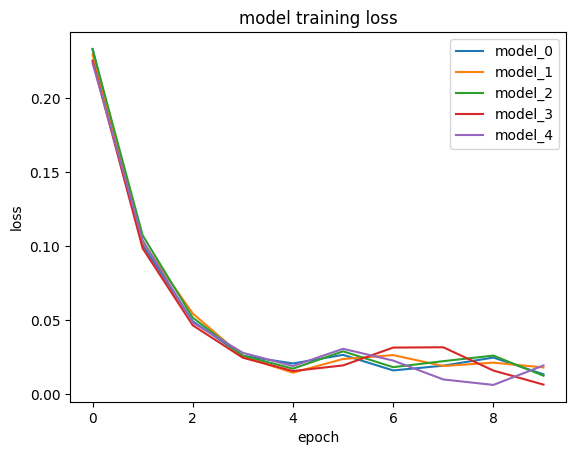

In [11]:
plt.title('model training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['loss'], label="model_{}".format(key))
plt.legend()

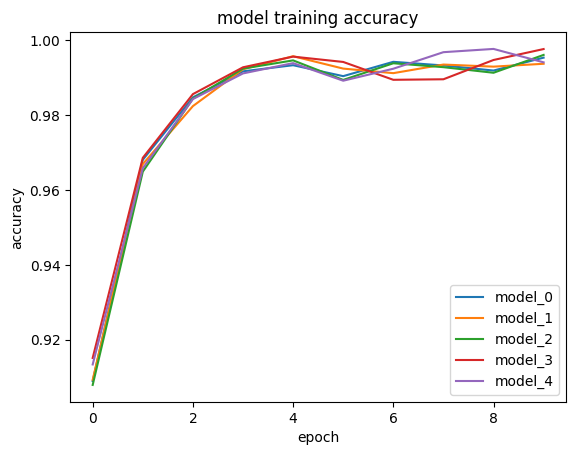

In [12]:
plt.title('model training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['accuracy'], label="model_{}".format(key))
plt.legend()

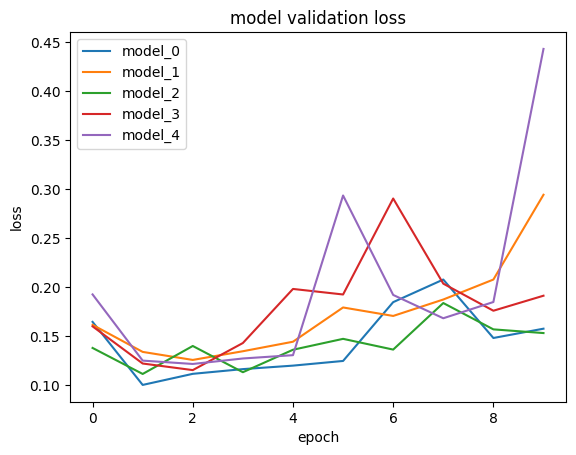

In [13]:
plt.title('model validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['val_loss'], label="model_{}".format(key))
plt.legend()

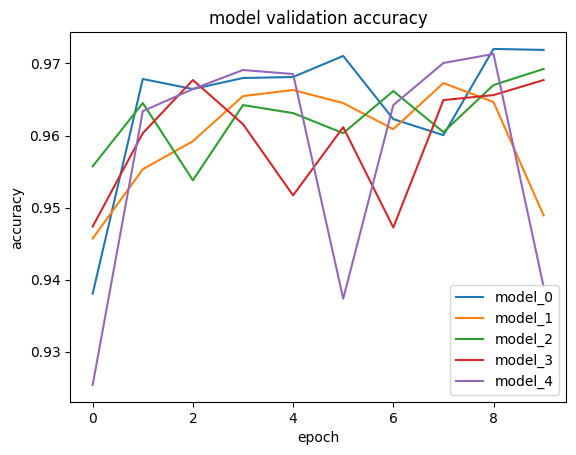

In [14]:
plt.title('model validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
for key in history.keys():
    plt.plot(history[key].history['val_accuracy'], label="model_{}".format(key))
plt.legend()

In [15]:
print("Loss: {}, Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}".format(
    np.average(loss), np.average(accuracy), np.average(precision), np.average(recall), np.average(F1)
))

Loss: 0.2566868722438812, Accuracy: 0.9557015657424927, Precision: 0.9373402833938599, Recall: 0.9724774837493897, F1 Score: 0.9540887794156753


In [16]:
best_model.save("CNN_ISOT")

INFO:tensorflow:Assets written to: CNN_ISOT\assets


INFO:tensorflow:Assets written to: CNN_ISOT\assets


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

data = [{'Loss': round(np.average(loss), 3), 'Accuracy': round(np.average(accuracy), 3), 'Precision': round(np.average(precision), 3),
         'Recall': round(np.average(recall), 3), 'F1 Score': round(np.average(F1), 3)},
        ]
df = pd.DataFrame(data)


In [18]:
dir = os.getcwd()
print(dir)

C:\Users\cobra\project\project\model


In [19]:
change_dir = os.path.dirname(dir)
subdir = "results"
dir_path = os.path.join(change_dir, subdir)
print(dir_path)

C:\Users\cobra\project\project\results


In [20]:
if not os.path.exists(dir_path):
    os.makedirs(dir_path)
    print(f"Created directory {dir_path}")
else:
    print(f"Directory {dir_path} already exists")

Directory C:\Users\cobra\project\project\results already exists


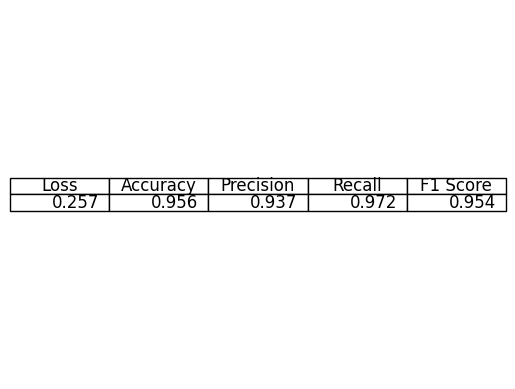

In [21]:
# Create a figure and plot the DataFrame as a table
fig, ax = plt.subplots()
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)

# Save the figure as a PNG image
plt.savefig('../results/model_cnn_isot_cross_result.png')

### Generalization

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [22]:
fakes_column_names = ["lemmatized_clean_final_article", "labels"]
fakes_data = pd.read_csv("../Preprocessed_Dataset/Fakes_Preprocessed_Data.csv", encoding='utf-8', encoding_errors='ignore')[fakes_column_names]
fnc_column_names = ["lemmatized_clean_final_article", "labels"]
fnc_data = pd.read_csv("../Preprocessed_Dataset/fnc1_Preprocessed_Data.csv", encoding='utf-8', encoding_errors='ignore')[fnc_column_names]

FileNotFoundError: [Errno 2] No such file or directory: '../Preprocessed_Dataset/Fakes_Preprocessed_Data.csv'

In [ ]:
fakes_x = token.texts_to_sequences(fakes_data[fakes_column_names[0]])
fakes_x = keras.preprocessing.sequence.pad_sequences(fakes_x, maxlen=SEQUENCE_LENGTH, padding='post', truncating="post")
fakes_y = fakes_data[fakes_column_names[1]]

fakes_loss, fakes_accuracy, fakes_precision, fakes_recall = best_model.evaluate(x=fakes_x, y=fakes_y)
fakes_F1 = 2 * (fakes_precision * fakes_recall) / (fakes_precision + fakes_recall)
print("FAKES Loss: {}, FAKES Accuracy: {}, FAKES Precision: {}, FAKES Recall: {}, FAKES F1: {}".format(fakes_loss, fakes_accuracy, fakes_precision, fakes_recall, fakes_F1))

In [ ]:
fnc_x = token.texts_to_sequences(fnc_data[fnc_column_names[0]])
fnc_x = keras.preprocessing.sequence.pad_sequences(fnc_x, maxlen=SEQUENCE_LENGTH, padding='post', truncating="post")
fnc_y = fnc_data[fnc_column_names[1]]

fnc_loss, fnc_accuracy, fnc_precision, fnc_recall = best_model.evaluate(x=fnc_x, y=fnc_y)
fnc_F1 = 2 * (fnc_precision * fnc_recall) / (fnc_precision + fnc_recall)
print("FNC Loss: {}, FNC Accuracy: {}, FNC Precision: {}, FNC Recall: {}, FNC F1: {}".format(fnc_loss, fnc_accuracy, fnc_precision, fnc_recall, fnc_F1))